In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import os
import json
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer


ruta = "F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/dataset_preprocesado/dataset_abstract_preprocesado.csv"

datos = pd.read_csv(ruta)
datos

,title,abstract,categorical,categoria,cat_one_hot,abstract_limpio,abstract_preprocesado
0,Electromagnetic neutrinos in laboratory experi...,An overview of neutrino electromagnetic proper...,astrophysics,humano,"[1, 0, 0, 0, 0]",An overview of neutrino electromagnetic proper...,"['overview', 'neutrino', 'electromagnetic', 'p..."
1,Infrared complex refractive index of astrophys...,In dense and cold regions of the interstellar ...,astrophysics,humano,"[1, 0, 0, 0, 0]",In dense and cold regions of the interstellar ...,"['dense', 'cold', 'region', 'interstellar', 'm..."
2,Gamma-ray lines in modern astrophysics,Gamma-ray astronomy provides a direct window i...,astrophysics,humano,"[1, 0, 0, 0, 0]",Gamma-ray astronomy provides a direct window i...,"['gamma-ray', 'astronomy', 'provides', 'direct..."
3,From Coulomb excitation cross sections to non-...,Coulomb and nuclear dissociation of $^{17}$Ne ...,astrophysics,humano,"[1, 0, 0, 0, 0]",Coulomb and nuclear dissociation of $^{17}$Ne ...,"['coulomb', 'nuclear', 'dissociation', 'ne', '..."
4,Astrophysical Black Holes: A Compact Pedagogic...,Black holes are among the most extreme objects...,astrophysics,humano,"[1, 0, 0, 0, 0]",Black holes are among the most extreme objects...,"['black', 'hole', 'among', 'extreme', 'object'..."
...,...,...,...,...,...,...,...
7745,Superconducting LaAlO3/SrTiO3 Nanowires,Here's a rewritten version of the text using m...,superconductivity,llama3,"[0, 0, 0, 0, 1]",\n\nWe've achieved a groundbreaking breakthrou...,"[""'ve"", 'achieved', 'groundbreaking', 'breakth..."
7746,Coupling a single Nitrogen-Vacancy center to a...,Here's a rewritten version of the text in my o...,superconductivity,llama3,"[0, 0, 0, 0, 1]",\n\nWe propose a groundbreaking idea: connecti...,"['propose', 'groundbreaking', 'idea', 'connect..."
7747,Superconducting and Anti-Ferromagnetic Phases ...,Here's a rewritten version of the text using m...,superconductivity,llama3,"[0, 0, 0, 0, 1]",\n\nThis study establishes a connection betwee...,"['study', 'establishes', 'connection', 'two', ..."
7748,New Superconductivity Dome in LaFeAsO$_{1-x}$F...,Here's the rewritten text:\n\nA fascinating ph...,superconductivity,llama3,"[0, 0, 0, 0, 1]",Here's the rewritten text:\n\nA fascinating ph...,"[""'s"", 'rewritten', 'text', 'fascinating', 'ph..."


In [3]:
texto_preprocesado = datos['abstract_preprocesado'].tolist()
lista_de_listas = [eval(cadena) for cadena in texto_preprocesado]

print(len(lista_de_listas))
print(type(lista_de_listas[0]))

7750
<class 'list'>


In [4]:
def generar_n_gramas(tokens, n):
    n_gramas = ngrams(tokens, n)
    return list(n_gramas)
    
def calculo_de_n_gramas(texto):
    #print(f"este es el texto: {type(texto)}")
    unigramas_limpios = []
    texto = eval(texto)
    # Calculo de unigramas limpios
    unigramas = generar_n_gramas(texto, 1)
    for uni in unigramas:
        unigramas_limpios.append(uni[0])
    #print(f"Unigramas: {unigramas}")
    
    bigramas_limpios = []
    bigramas = generar_n_gramas(texto, 2)
    for big in bigramas:
        bigrama_final = str(big[0]) + " " + str(big[1])
        bigramas_limpios.append(bigrama_final)
        
    #print(f"Bigramas: {bigramas}")
    #trigramas = generar_n_gramas(texto, 3)
    #print(f"Tirgramas: {trigramas}")
    n_gramas = unigramas_limpios + bigramas_limpios
    return n_gramas

def obtener_vocabulario(lista_n_gramas):
    vocabulario = set()
    for lista in lista_n_gramas:
        for token in lista:
            vocabulario.add(token)
    return vocabulario
   

In [5]:
from nltk.util import ngrams

lista_n_gramas = []

i = 0

for texto_tokens in texto_preprocesado:
        retorno = calculo_de_n_gramas(texto_tokens)
        lista_n_gramas.append(retorno)


In [6]:
vocabulario = obtener_vocabulario(lista_n_gramas)
print(len(vocabulario))
vocabulario = list(vocabulario)

277702


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convertir la lista de listas de tokens a una lista de textos
textos = [' '.join(lista) for lista in lista_de_listas]

# Inicializar el vectorizador TF-IDF
vectorizador = TfidfVectorizer(vocabulary=vocabulario)

# Aplicar TF-IDF a los textos
tfidf_matrix = vectorizador.fit_transform(textos)

# Obtener la matriz TF-IDF como una matriz densa
tfidf_matrix_dense = tfidf_matrix.todense()

print("Matriz TF-IDF:")
print(tfidf_matrix_dense)
dimensiones = tfidf_matrix.shape
# Dimensiones devuelve una tupla (número de filas, número de columnas)
numero_filas = dimensiones[0]
numero_columnas = dimensiones[1]
print("Número de filas:", numero_filas)
print("Número de columnas:", numero_columnas)
df_tfidf = pd.DataFrame(tfidf_matrix_dense, columns=vocabulario)

C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:1381: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Matriz TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Número de filas: 7750
Número de columnas: 277702


In [8]:
df_etiquetas = datos['cat_one_hot']
data = pd.concat([df_tfidf, df_etiquetas], axis=1)
data

,calculation providing,multiplier criterion,correlation polymer,approximately galaxy,regime consistency,gas method,determined two,resulting oxygen,e_6 e_7,section temperature,...,dynamic focus,describing exclusive,better also,experiment disregarded,discussed original,coefficient randomly,reverse transition,coupling two-level,right moving,cat_one_hot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0]"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0]"
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0]"
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0]"
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0, 0, 0, 0, 1]"
7746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0, 0, 0, 0, 1]"
7747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0, 0, 0, 0, 1]"
7748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0, 0, 0, 0, 1]"


In [9]:

# Visualiza las primeras filas del dataframe
# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('cat_one_hot', axis=1)  # Eliminar la columna 'cat_one_hot' para obtener las características
etiquetas = []
y = data['cat_one_hot'].tolist()
for lista in y:
    vector = eval(lista)
    indice_maximo = vector.index(max(vector)) 
    etiquetas.append(indice_maximo)

labels = pd.DataFrame()
labels['label'] = etiquetas
print(labels)

      label
0         0
1         0
2         0
3         0
4         0
...     ...
7745      4
7746      4
7747      4
7748      4
7749      4

[7750 rows x 1 columns]


In [10]:
import time
# Definir la arquitectura de la red neuronal
class SimpleClassifier(nn.Module):
    def __init__(self,input_size,output_size):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256,128)
        self.fc5 = nn.Linear(128,64)
        self.fc6 = nn.Linear(64, 5)
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(p=0.5)  # Por ejemplo, con una probabilidad de dropout del 50%

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.dropout(x)
        x = self.fc6(x)
        x = self.softmax(x)
        return x.to(device)

def crear_directorio(nombre_carpeta):
    directorio_actual = os.getcwd()
    print("El directorio actual es:", directorio_actual)
    ruta_nueva_carpeta = os.path.join(directorio_actual, nombre_carpeta)
    # Verificar si la carpeta ya existe
    if not os.path.exists(ruta_nueva_carpeta):
        # Crear la carpeta si no existe
        os.mkdir(ruta_nueva_carpeta)
        print("Se creó la carpeta", nombre_carpeta, "en", directorio_actual)
    else:
        print("La carpeta", nombre_carpeta, "ya existe en", directorio_actual)

    ruta_modificada = ruta_nueva_carpeta.replace("\\","/")
    return ruta_modificada

def RNN_model(X,labels,test_size,epochs,lr):
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)
    X_train_values = X_train.values
    X_train_tensor = torch.tensor(X_train_values,dtype=torch.float32)
    y_train_values = y_train.values
    y_train_tensor = torch.tensor(y_train_values,dtype=torch.long)
    X_test_values = X_test.values
    X_test_tensor = torch.tensor(X_test_values,dtype=torch.float32)
    y_test_values = y_test.values
    y_test_tensor = torch.tensor(y_test_values,dtype=torch.long)
    y_train_tensor_flat = torch.tensor(y_train.values.flatten(), dtype=torch.long)
    output_size = 5
    # Crear un DataLoader para manejar los datos de entrenamiento
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor_flat)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    
    input_size = X_train_values[0].shape[0]
    
    # Instanciar el modelo y definir la función de pérdida y el optimizador
    model = SimpleClassifier(input_size,output_size).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Entrenar el modelo
    losses = []
    sum_losses = 1
    #while sum_losses > error:
    for epoch in tqdm(range(epochs),desc="Procesando epocas: "):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Mover datos al dispositivo
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            #print(f"Valor de error:  {loss}")
            optimizer.step()
            running_loss += loss.item()
        sum_losses = running_loss / len(train_loader)
        print(sum_losses)
        losses.append(sum_losses)
    
    # Graficar el loss durante el entrenamiento
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    timestamp = time.strftime("%Y%m%d_%H%M%S")
    ruta_figura_incom = crear_directorio("Neural_network_classification")

    nombre_carpeta = f"RRN_{epochs}_{lr}_{test_size}"
    os.makedirs(os.path.join(ruta_figura_incom, nombre_carpeta), exist_ok=True)
    ruta_figura_incom = ruta_figura_incom + "/" + nombre_carpeta
    
    ruta_figura = f"{ruta_figura_incom}/funcion_de_perdida_{epochs}_{lr}.png"
    plt.savefig(ruta_figura)
    print("Matriz de confusión guardada en:", ruta_figura)
    plt.show()
    plt.show()
    
    # Evaluar el modelo en el conjunto de prueba
    with torch.no_grad():
        X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)
        outputs = model(X_test_tensor)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
        print('Test accuracy:', accuracy)
    
    predicted = predicted.cpu()  # Moviendo las predicciones a la CPU
    
    
    # Calcula las métricas
    accuracy = accuracy_score(y_test_tensor.cpu(), predicted.numpy())
    precision = precision_score(y_test, predicted.numpy(), average='macro', zero_division=0)
    recall = recall_score(y_test, predicted.numpy(), average='macro', zero_division=0)
    f1 = f1_score(y_test, predicted.numpy(), average='macro', zero_division=0)

    diccionario = {'accuracy':accuracy,'precision':precision,'recall':recall,'f1':f1}

    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)
    print("\n")
    # Calcular métricas
    print('Classification Report:')
    print(classification_report(y_test, predicted.numpy()))
    reporte_clasificacion = classification_report(y_test, predicted.numpy(),output_dict = True)
    report_df = pd.DataFrame(reporte_clasificacion)
    print(report_df)
    # Calcular matriz de confusión
    conf_matrix = confusion_matrix(y_test, predicted.numpy())
    
    # Crear un mapa de calor para la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title('Matriz de Confusión')
    plt.xlabel('Etiquetas Predichas')
    plt.ylabel('Etiquetas Verdaderas')
    
    timestamp = time.strftime("%Y%m%d_%H%M%S")
    ruta_figura_incom = crear_directorio("Neural_network_classification")
    
    nombre_carpeta = f"RRN_{epochs}_{lr}_{test_size}"
    os.makedirs(os.path.join(ruta_figura_incom, nombre_carpeta), exist_ok=True)
    ruta_figura_incom = ruta_figura_incom + "/" + nombre_carpeta
    
    ruta_figura = f"{ruta_figura_incom}/matriz_confusion_{epochs}_{lr}.png"
    plt.savefig(ruta_figura)
    print("Matriz de confusión guardada en:", ruta_figura)
    plt.show()

    res = f"/resultados_{epochs}_{lr}_{test_size}.json"
    res1 = f"/reporte_clasificacion_{epochs}_{lr}_{test_size}.csv"
    ruta_archivo_json = ruta_figura_incom + res
    ruta_archivo_json_report = ruta_figura_incom + res1

    # Guardar el diccionario como un archivo JSON
    with open(ruta_archivo_json, "w") as archivo_json:
        json.dump(diccionario, archivo_json)

    report_df.to_csv(ruta_archivo_json_report)
    
    print("Diccionario guardado como JSON en:", ruta_archivo_json)
    

Procesando red con 100 epocas y 0.0001 de factor de aprendizaje y conjunto de entrenamiento 0.7


Procesando epocas:   1%|▋                                                              | 1/100 [00:18<30:32, 18.51s/it]

1.609169584863326


Procesando epocas:   2%|█▎                                                             | 2/100 [00:36<29:51, 18.28s/it]

1.5275446365861332


Procesando epocas:   3%|█▉                                                             | 3/100 [00:54<29:27, 18.22s/it]

1.4140596368733573


Procesando epocas:   4%|██▌                                                            | 4/100 [01:13<29:20, 18.33s/it]

1.345925929967095


Procesando epocas:   5%|███▏                                                           | 5/100 [01:31<28:58, 18.30s/it]

1.3035228210337022


Procesando epocas:   6%|███▊                                                           | 6/100 [01:50<28:49, 18.40s/it]

1.2643334585077621


Procesando epocas:   7%|████▍                                                          | 7/100 [02:08<28:28, 18.37s/it]

1.2351107120513916


Procesando epocas:   8%|█████                                                          | 8/100 [02:26<28:08, 18.35s/it]

1.2131117343902589


Procesando epocas:   9%|█████▋                                                         | 9/100 [02:45<27:48, 18.34s/it]

1.196094244367936


Procesando epocas:  10%|██████▏                                                       | 10/100 [03:03<27:30, 18.34s/it]

1.18140071069493


Procesando epocas:  11%|██████▊                                                       | 11/100 [03:21<27:05, 18.27s/it]

1.1562494309509501


Procesando epocas:  12%|███████▍                                                      | 12/100 [03:39<26:43, 18.22s/it]

1.1350476166781258


Procesando epocas:  13%|████████                                                      | 13/100 [03:57<26:22, 18.19s/it]

1.1155494514633628


Procesando epocas:  14%|████████▋                                                     | 14/100 [04:15<26:05, 18.21s/it]

1.0978734061998479


Procesando epocas:  15%|█████████▎                                                    | 15/100 [04:34<25:50, 18.24s/it]

1.0823576334644767


Procesando epocas:  16%|█████████▉                                                    | 16/100 [04:52<25:27, 18.19s/it]

1.0675601520959068


Procesando epocas:  17%|██████████▌                                                   | 17/100 [05:10<25:06, 18.16s/it]

1.0600532468627482


Procesando epocas:  18%|███████████▏                                                  | 18/100 [05:28<24:46, 18.13s/it]

1.0518689576317282


Procesando epocas:  19%|███████████▊                                                  | 19/100 [05:46<24:27, 18.12s/it]

1.0448375495041118


Procesando epocas:  20%|████████████▍                                                 | 20/100 [06:04<24:06, 18.09s/it]

1.0464217704885146


Procesando epocas:  21%|█████████████                                                 | 21/100 [06:22<23:47, 18.07s/it]

1.041497665643692


Procesando epocas:  22%|█████████████▋                                                | 22/100 [06:40<23:28, 18.06s/it]

1.0344269703416262


Procesando epocas:  23%|██████████████▎                                               | 23/100 [06:58<23:10, 18.05s/it]

1.0367988379562603


Procesando epocas:  24%|██████████████▉                                               | 24/100 [07:16<22:53, 18.08s/it]

1.0300620531334597


Procesando epocas:  25%|███████████████▌                                              | 25/100 [07:34<22:36, 18.08s/it]

1.0339854138738969


Procesando epocas:  26%|████████████████                                              | 26/100 [07:53<22:18, 18.09s/it]

1.027995829371845


Procesando epocas:  27%|████████████████▋                                             | 27/100 [08:11<22:00, 18.09s/it]

1.026329029307646


Procesando epocas:  28%|█████████████████▎                                            | 28/100 [08:29<21:44, 18.12s/it]

1.0216691925245174


Procesando epocas:  29%|█████████████████▉                                            | 29/100 [08:47<21:26, 18.12s/it]

1.0193755437346066


Procesando epocas:  30%|██████████████████▌                                           | 30/100 [09:05<21:08, 18.12s/it]

1.020188990060021


Procesando epocas:  31%|███████████████████▏                                          | 31/100 [09:23<20:48, 18.09s/it]

1.0227723949095782


Procesando epocas:  32%|███████████████████▊                                          | 32/100 [09:41<20:30, 18.10s/it]

1.0235789249925051


Procesando epocas:  33%|████████████████████▍                                         | 33/100 [09:59<20:11, 18.09s/it]

1.0264305630150963


Procesando epocas:  34%|█████████████████████                                         | 34/100 [10:17<19:53, 18.08s/it]

1.0258345600436716


Procesando epocas:  35%|█████████████████████▋                                        | 35/100 [10:35<19:35, 18.08s/it]

1.0299892667461843


Procesando epocas:  36%|██████████████████████▎                                       | 36/100 [10:53<19:15, 18.06s/it]

1.0250598609447479


Procesando epocas:  37%|██████████████████████▉                                       | 37/100 [11:11<18:57, 18.06s/it]

1.0227227828081917


Procesando epocas:  38%|███████████████████████▌                                      | 38/100 [11:30<18:39, 18.05s/it]

1.0183743501410765


Procesando epocas:  39%|████████████████████████▏                                     | 39/100 [11:48<18:21, 18.05s/it]

1.022139859900755


Procesando epocas:  40%|████████████████████████▊                                     | 40/100 [12:06<18:03, 18.05s/it]

1.0214207554564756


Procesando epocas:  41%|█████████████████████████▍                                    | 41/100 [12:24<17:45, 18.06s/it]

1.0219184619538924


Procesando epocas:  42%|██████████████████████████                                    | 42/100 [12:42<17:27, 18.06s/it]

1.0236224728472092


Procesando epocas:  43%|██████████████████████████▋                                   | 43/100 [13:00<17:09, 18.05s/it]

1.0252219122998856


Procesando epocas:  44%|███████████████████████████▎                                  | 44/100 [13:18<16:51, 18.06s/it]

1.0222533050705405


Procesando epocas:  45%|███████████████████████████▉                                  | 45/100 [13:36<16:33, 18.06s/it]

1.0213882912607755


Procesando epocas:  46%|████████████████████████████▌                                 | 46/100 [13:54<16:14, 18.05s/it]

1.0230968636624953


Procesando epocas:  47%|█████████████████████████████▏                                | 47/100 [14:12<15:56, 18.05s/it]

1.0190253790687112


Procesando epocas:  48%|█████████████████████████████▊                                | 48/100 [14:30<15:38, 18.04s/it]

1.017976433389327


Procesando epocas:  49%|██████████████████████████████▍                               | 49/100 [14:48<15:19, 18.04s/it]

1.0159307862029356


Procesando epocas:  50%|███████████████████████████████                               | 50/100 [15:06<15:01, 18.03s/it]

1.0147167293464436


Procesando epocas:  51%|███████████████████████████████▌                              | 51/100 [15:24<14:43, 18.03s/it]

1.0165584942873787


Procesando epocas:  52%|████████████████████████████████▏                             | 52/100 [15:42<14:25, 18.03s/it]

1.0151954636854283


Procesando epocas:  53%|████████████████████████████████▊                             | 53/100 [16:00<14:06, 18.02s/it]

1.0154080625842599


Procesando epocas:  54%|█████████████████████████████████▍                            | 54/100 [16:18<13:48, 18.02s/it]

1.0137171562980203


Procesando epocas:  55%|██████████████████████████████████                            | 55/100 [16:36<13:31, 18.03s/it]

1.0122539881397696


Procesando epocas:  56%|██████████████████████████████████▋                           | 56/100 [16:54<13:13, 18.04s/it]

1.0172834245597615


Procesando epocas:  57%|███████████████████████████████████▎                          | 57/100 [17:12<12:55, 18.04s/it]

1.017741721167284


Procesando epocas:  58%|███████████████████████████████████▉                          | 58/100 [17:30<12:37, 18.05s/it]

1.0156093096031862


Procesando epocas:  59%|████████████████████████████████████▌                         | 59/100 [17:48<12:20, 18.05s/it]

1.0130467761965358


Procesando epocas:  60%|█████████████████████████████████████▏                        | 60/100 [18:06<12:01, 18.04s/it]

1.0107690821675692


Procesando epocas:  61%|█████████████████████████████████████▊                        | 61/100 [18:25<11:43, 18.05s/it]

1.0105313588591183


Procesando epocas:  62%|██████████████████████████████████████▍                       | 62/100 [18:43<11:26, 18.05s/it]

1.0106530810103698


Procesando epocas:  63%|███████████████████████████████████████                       | 63/100 [19:01<11:08, 18.05s/it]

1.0101528868955725


Procesando epocas:  64%|███████████████████████████████████████▋                      | 64/100 [19:19<10:49, 18.05s/it]

1.0096902612377616


Procesando epocas:  65%|████████████████████████████████████████▎                     | 65/100 [19:37<10:31, 18.06s/it]

1.010870943700566


Procesando epocas:  66%|████████████████████████████████████████▉                     | 66/100 [19:55<10:13, 18.05s/it]

1.009862600705203


Procesando epocas:  67%|█████████████████████████████████████████▌                    | 67/100 [20:13<09:55, 18.04s/it]

1.0129414512830621


Procesando epocas:  68%|██████████████████████████████████████████▏                   | 68/100 [20:31<09:37, 18.05s/it]

1.0153869393993826


Procesando epocas:  69%|██████████████████████████████████████████▊                   | 69/100 [20:49<09:19, 18.05s/it]

1.0136192865231457


Procesando epocas:  70%|███████████████████████████████████████████▍                  | 70/100 [21:07<09:01, 18.06s/it]

1.017079563701854


Procesando epocas:  71%|████████████████████████████████████████████                  | 71/100 [21:25<08:43, 18.06s/it]

1.0196786894517786


Procesando epocas:  72%|████████████████████████████████████████████▋                 | 72/100 [21:43<08:25, 18.06s/it]

1.0139071734512553


Procesando epocas:  73%|█████████████████████████████████████████████▎                | 73/100 [22:01<08:07, 18.05s/it]

1.0133996037875905


Procesando epocas:  74%|█████████████████████████████████████████████▉                | 74/100 [22:19<07:50, 18.09s/it]

1.0128011717515832


Procesando epocas:  75%|██████████████████████████████████████████████▌               | 75/100 [22:37<07:25, 17.83s/it]

1.0114300755893484


Procesando epocas:  76%|███████████████████████████████████████████████               | 76/100 [22:53<06:56, 17.36s/it]

1.0107151897514568


Procesando epocas:  77%|███████████████████████████████████████████████▋              | 77/100 [23:09<06:31, 17.03s/it]

1.0108976693714367


Procesando epocas:  78%|████████████████████████████████████████████████▎             | 78/100 [23:25<06:09, 16.82s/it]

1.0089510496924905


Procesando epocas:  79%|████████████████████████████████████████████████▉             | 79/100 [23:42<05:50, 16.67s/it]

1.0096310089616214


Procesando epocas:  80%|█████████████████████████████████████████████████▌            | 80/100 [23:58<05:29, 16.49s/it]

1.0047959580140955


Procesando epocas:  81%|██████████████████████████████████████████████████▏           | 81/100 [24:14<05:13, 16.50s/it]

1.0041607902330512


Procesando epocas:  82%|██████████████████████████████████████████████████▊           | 82/100 [24:31<04:56, 16.47s/it]

1.001864591065575


Procesando epocas:  83%|███████████████████████████████████████████████████▍          | 83/100 [24:47<04:39, 16.44s/it]

1.0087654709815979


Procesando epocas:  84%|████████████████████████████████████████████████████          | 84/100 [25:03<04:22, 16.41s/it]

1.011305643530453


Procesando epocas:  85%|████████████████████████████████████████████████████▋         | 85/100 [25:20<04:05, 16.36s/it]

1.0095682344015906


Procesando epocas:  86%|█████████████████████████████████████████████████████▎        | 86/100 [25:36<03:48, 16.34s/it]

1.009810885962318


Procesando epocas:  87%|█████████████████████████████████████████████████████▉        | 87/100 [25:52<03:31, 16.31s/it]

1.0109399844618405


Procesando epocas:  88%|██████████████████████████████████████████████████████▌       | 88/100 [26:09<03:15, 16.31s/it]

1.0117035161046422


Procesando epocas:  89%|███████████████████████████████████████████████████████▏      | 89/100 [26:25<02:59, 16.29s/it]

1.0076006079421325


Procesando epocas:  90%|███████████████████████████████████████████████████████▊      | 90/100 [26:41<02:42, 16.29s/it]

1.0084326540722566


Procesando epocas:  91%|████████████████████████████████████████████████████████▍     | 91/100 [26:57<02:26, 16.28s/it]

1.0065598323064693


Procesando epocas:  92%|█████████████████████████████████████████████████████████     | 92/100 [27:14<02:10, 16.28s/it]

1.0056621740846072


Procesando epocas:  93%|█████████████████████████████████████████████████████████▋    | 93/100 [27:30<01:53, 16.27s/it]

1.008152388123905


Procesando epocas:  94%|██████████████████████████████████████████████████████████▎   | 94/100 [27:46<01:37, 16.27s/it]

1.005130715229932


Procesando epocas:  95%|██████████████████████████████████████████████████████████▉   | 95/100 [28:02<01:21, 16.26s/it]

1.00470869085368


Procesando epocas:  96%|███████████████████████████████████████████████████████████▌  | 96/100 [28:19<01:05, 16.26s/it]

1.0079159754164078


Procesando epocas:  97%|████████████████████████████████████████████████████████████▏ | 97/100 [28:35<00:48, 16.26s/it]

1.004786110274932


Procesando epocas:  98%|████████████████████████████████████████████████████████████▊ | 98/100 [28:51<00:32, 16.26s/it]

1.0049150579115924


Procesando epocas:  99%|█████████████████████████████████████████████████████████████▍| 99/100 [29:07<00:16, 16.26s/it]

1.0034401069669163


Procesando epocas: 100%|█████████████████████████████████████████████████████████████| 100/100 [29:24<00:00, 17.64s/it]

1.0045727372169495
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta Neural_network_classification en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_100_0.0001_0.3/funcion_de_perdida_100_0.0001.png


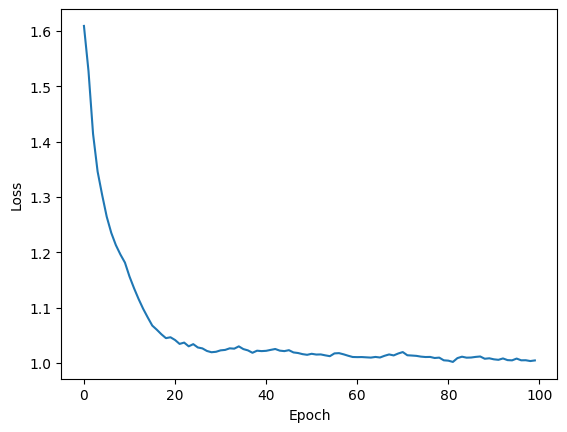

Test accuracy: 462.80172043010754
Accuracy: 0.4378494623655914
Precision: 0.5017431731240254
Recall: 0.4385931350235679
F1-score: 0.45230831382408815


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.39      0.51       495
           1       0.44      0.49      0.47       472
           2       0.30      0.41      0.34       449
           3       0.30      0.40      0.34       463
           4       0.74      0.51      0.60       446

    accuracy                           0.44      2325
   macro avg       0.50      0.44      0.45      2325
weighted avg       0.50      0.44      0.45      2325

                    0           1           2           3           4  \
precision    0.726592    0.443378    0.298851    0.296474    0.743421   
recall       0.391919    0.489407    0.405345    0.399568    0.506726   
f1-score     0.509186    0.465257    0.344045    0.340386    0.602667   
support    495.000000  472.000000  449.00000

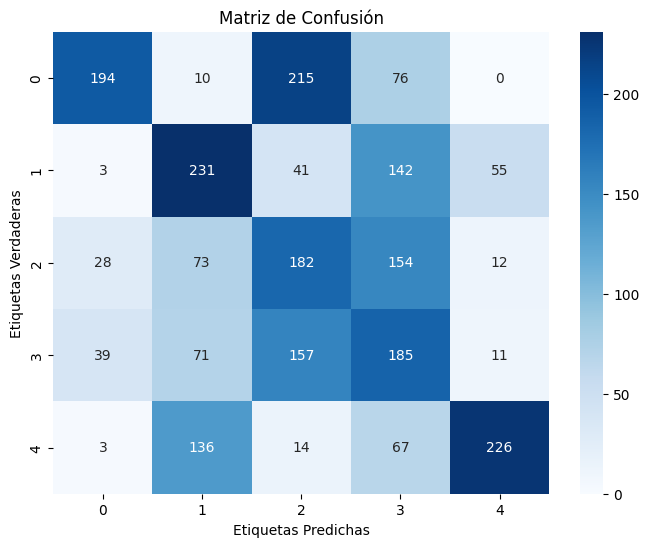

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_100_0.0001_0.3/resultados_100_0.0001_0.3.json
Procesando red con 100 epocas y 1e-05 de factor de aprendizaje y conjunto de entrenamiento 0.7


Procesando epocas:   1%|▋                                                              | 1/100 [00:16<27:40, 16.78s/it]

1.609587415526895


Procesando epocas:   2%|█▎                                                             | 2/100 [00:33<26:57, 16.51s/it]

1.6096313581747168


Procesando epocas:   3%|█▉                                                             | 3/100 [00:49<26:33, 16.42s/it]

1.6095464825630188


Procesando epocas:   4%|██▌                                                            | 4/100 [01:05<26:13, 16.39s/it]

1.6095092170378742


Procesando epocas:   5%|███▏                                                           | 5/100 [01:22<25:54, 16.36s/it]

1.6091679306591258


Procesando epocas:   6%|███▊                                                           | 6/100 [01:38<25:36, 16.34s/it]

1.6085167548235726


Procesando epocas:   7%|████▍                                                          | 7/100 [01:54<25:18, 16.33s/it]

1.6060750828069799


Procesando epocas:   8%|█████                                                          | 8/100 [02:10<25:01, 16.32s/it]

1.6002435992745792


Procesando epocas:   9%|█████▋                                                         | 9/100 [02:27<24:45, 16.32s/it]

1.5824839115142821


Procesando epocas:  10%|██████▏                                                       | 10/100 [02:43<24:29, 16.32s/it]

1.5413322448730469


Procesando epocas:  11%|██████▊                                                       | 11/100 [02:59<24:13, 16.33s/it]

1.4926211083636565


Procesando epocas:  12%|███████▍                                                      | 12/100 [03:16<23:57, 16.33s/it]

1.459966126610251


Procesando epocas:  13%|████████                                                      | 13/100 [03:32<23:40, 16.32s/it]

1.4406364027191612


Procesando epocas:  14%|████████▋                                                     | 14/100 [03:48<23:23, 16.32s/it]

1.4157166600227356


Procesando epocas:  15%|█████████▎                                                    | 15/100 [04:05<23:07, 16.32s/it]

1.4008076289120843


Procesando epocas:  16%|█████████▉                                                    | 16/100 [04:21<22:51, 16.33s/it]

1.3831170250387752


Procesando epocas:  17%|██████████▌                                                   | 17/100 [04:37<22:34, 16.32s/it]

1.3746751238318051


Procesando epocas:  18%|███████████▏                                                  | 18/100 [04:54<22:17, 16.31s/it]

1.3627861745217267


Procesando epocas:  19%|███████████▊                                                  | 19/100 [05:10<22:01, 16.31s/it]

1.3496465185109308


Procesando epocas:  20%|████████████▍                                                 | 20/100 [05:26<21:44, 16.31s/it]

1.3406918133006376


Procesando epocas:  21%|█████████████                                                 | 21/100 [05:43<21:28, 16.31s/it]

1.327242117769578


Procesando epocas:  22%|█████████████▋                                                | 22/100 [05:59<21:11, 16.31s/it]

1.3174340830129736


Procesando epocas:  23%|██████████████▎                                               | 23/100 [06:15<20:55, 16.30s/it]

1.3073145775233999


Procesando epocas:  24%|██████████████▉                                               | 24/100 [06:32<20:38, 16.30s/it]

1.298195938503041


Procesando epocas:  25%|███████████████▌                                              | 25/100 [06:48<20:22, 16.30s/it]

1.2883938929613898


Procesando epocas:  26%|████████████████                                              | 26/100 [07:04<20:06, 16.30s/it]

1.2805551893570843


Procesando epocas:  27%|████████████████▋                                             | 27/100 [07:20<19:49, 16.29s/it]

1.2656674125615288


Procesando epocas:  28%|█████████████████▎                                            | 28/100 [07:37<19:33, 16.30s/it]

1.2484803396112778


Procesando epocas:  29%|█████████████████▉                                            | 29/100 [07:53<19:17, 16.31s/it]

1.2484026151544907


Procesando epocas:  30%|██████████████████▌                                           | 30/100 [08:09<19:01, 16.31s/it]

1.2421159625053406


Procesando epocas:  31%|███████████████████▏                                          | 31/100 [08:26<18:45, 16.31s/it]

1.234158456325531


Procesando epocas:  32%|███████████████████▊                                          | 32/100 [08:42<18:28, 16.31s/it]

1.2200657585087944


Procesando epocas:  33%|████████████████████▍                                         | 33/100 [08:58<18:12, 16.31s/it]

1.2163933522561017


Procesando epocas:  34%|█████████████████████                                         | 34/100 [09:15<17:56, 16.31s/it]

1.2069014808710883


Procesando epocas:  35%|█████████████████████▋                                        | 35/100 [09:31<17:40, 16.32s/it]

1.200359655829037


Procesando epocas:  36%|██████████████████████▎                                       | 36/100 [09:47<17:24, 16.31s/it]

1.1892538568552802


Procesando epocas:  37%|██████████████████████▉                                       | 37/100 [10:03<17:06, 16.30s/it]

1.1894718604929306


Procesando epocas:  38%|███████████████████████▌                                      | 38/100 [10:20<16:50, 16.30s/it]

1.1721086586222929


Procesando epocas:  39%|████████████████████████▏                                     | 39/100 [10:36<16:34, 16.31s/it]

1.1694456465104046


Procesando epocas:  40%|████████████████████████▊                                     | 40/100 [10:52<16:18, 16.31s/it]

1.166547093671911


Procesando epocas:  41%|█████████████████████████▍                                    | 41/100 [11:09<16:02, 16.32s/it]

1.1473835945129394


Procesando epocas:  42%|██████████████████████████                                    | 42/100 [11:25<15:46, 16.31s/it]

1.1440876133301678


Procesando epocas:  43%|██████████████████████████▋                                   | 43/100 [11:41<15:29, 16.31s/it]

1.1424743385875926


Procesando epocas:  44%|███████████████████████████▎                                  | 44/100 [11:58<15:13, 16.31s/it]

1.13810855921577


Procesando epocas:  45%|███████████████████████████▉                                  | 45/100 [12:14<14:57, 16.31s/it]

1.1252647610271678


Procesando epocas:  46%|████████████████████████████▌                                 | 46/100 [12:30<14:41, 16.33s/it]

1.1253138184547424


Procesando epocas:  47%|█████████████████████████████▏                                | 47/100 [12:47<14:25, 16.32s/it]

1.1179161776514615


Procesando epocas:  48%|█████████████████████████████▊                                | 48/100 [13:03<14:08, 16.32s/it]

1.112519255806418


Procesando epocas:  49%|██████████████████████████████▍                               | 49/100 [13:19<13:52, 16.32s/it]

1.1044217306024888


Procesando epocas:  50%|███████████████████████████████                               | 50/100 [13:36<13:35, 16.32s/it]

1.0991271516856025


Procesando epocas:  51%|███████████████████████████████▌                              | 51/100 [13:52<13:19, 16.31s/it]

1.0919173261698554


Procesando epocas:  52%|████████████████████████████████▏                             | 52/100 [14:08<13:03, 16.32s/it]

1.0838596894460566


Procesando epocas:  53%|████████████████████████████████▊                             | 53/100 [14:25<12:46, 16.31s/it]

1.0861153416773852


Procesando epocas:  54%|█████████████████████████████████▍                            | 54/100 [14:41<12:30, 16.31s/it]

1.0763982737765592


Procesando epocas:  55%|██████████████████████████████████                            | 55/100 [14:57<12:14, 16.31s/it]

1.0766189203542822


Procesando epocas:  56%|██████████████████████████████████▋                           | 56/100 [15:13<11:57, 16.31s/it]

1.0715880783165201


Procesando epocas:  57%|███████████████████████████████████▎                          | 57/100 [15:30<11:41, 16.31s/it]

1.0670741032151614


Procesando epocas:  58%|███████████████████████████████████▉                          | 58/100 [15:46<11:24, 16.30s/it]

1.0645495561992422


Procesando epocas:  59%|████████████████████████████████████▌                         | 59/100 [16:02<11:08, 16.30s/it]

1.0593429537380443


Procesando epocas:  60%|█████████████████████████████████████▏                        | 60/100 [16:19<10:52, 16.30s/it]

1.0593494239975425


Procesando epocas:  61%|█████████████████████████████████████▊                        | 61/100 [16:35<10:35, 16.30s/it]

1.0528902386917787


Procesando epocas:  62%|██████████████████████████████████████▍                       | 62/100 [16:51<10:19, 16.31s/it]

1.0516128578606774


Procesando epocas:  63%|███████████████████████████████████████                       | 63/100 [17:08<10:03, 16.31s/it]

1.0455549787072573


Procesando epocas:  64%|███████████████████████████████████████▋                      | 64/100 [17:24<09:46, 16.30s/it]

1.042559939622879


Procesando epocas:  65%|████████████████████████████████████████▎                     | 65/100 [17:40<09:30, 16.31s/it]

1.0417892967953402


Procesando epocas:  66%|████████████████████████████████████████▉                     | 66/100 [17:57<09:14, 16.31s/it]

1.0373799138209399


Procesando epocas:  67%|█████████████████████████████████████████▌                    | 67/100 [18:13<08:58, 16.32s/it]

1.0348191061440637


Procesando epocas:  68%|██████████████████████████████████████████▏                   | 68/100 [18:29<08:41, 16.31s/it]

1.0314215102616477


Procesando epocas:  69%|██████████████████████████████████████████▊                   | 69/100 [18:45<08:25, 16.31s/it]

1.0347125456613653


Procesando epocas:  70%|███████████████████████████████████████████▍                  | 70/100 [19:02<08:09, 16.31s/it]

1.0279162543661453


Procesando epocas:  71%|████████████████████████████████████████████                  | 71/100 [19:18<07:53, 16.31s/it]

1.0238838644588695


Procesando epocas:  72%|████████████████████████████████████████████▋                 | 72/100 [19:34<07:36, 16.31s/it]

1.0238908189184526


Procesando epocas:  73%|█████████████████████████████████████████████▎                | 73/100 [19:51<07:20, 16.31s/it]

1.0243218614774592


Procesando epocas:  74%|█████████████████████████████████████████████▉                | 74/100 [20:07<07:04, 16.31s/it]

1.0196195020395167


Procesando epocas:  75%|██████████████████████████████████████████████▌               | 75/100 [20:23<06:47, 16.30s/it]

1.0169183762634502


Procesando epocas:  76%|███████████████████████████████████████████████               | 76/100 [20:40<06:31, 16.31s/it]

1.0166362517020282


Procesando epocas:  77%|███████████████████████████████████████████████▋              | 77/100 [20:56<06:15, 16.32s/it]

1.0159099617425134


Procesando epocas:  78%|████████████████████████████████████████████████▎             | 78/100 [21:12<05:58, 16.32s/it]

1.0129764967104968


Procesando epocas:  79%|████████████████████████████████████████████████▉             | 79/100 [21:29<05:42, 16.31s/it]

1.0083764048183665


Procesando epocas:  80%|█████████████████████████████████████████████████▌            | 80/100 [21:45<05:26, 16.31s/it]

1.0089591029812308


Procesando epocas:  81%|██████████████████████████████████████████████████▏           | 81/100 [22:01<05:09, 16.30s/it]

1.0046583242276135


Procesando epocas:  82%|██████████████████████████████████████████████████▊           | 82/100 [22:18<04:53, 16.31s/it]

1.007198532889871


Procesando epocas:  83%|███████████████████████████████████████████████████▍          | 83/100 [22:34<04:37, 16.31s/it]

1.0031929219470304


Procesando epocas:  84%|████████████████████████████████████████████████████          | 84/100 [22:50<04:20, 16.30s/it]

1.0043947949128993


Procesando epocas:  85%|████████████████████████████████████████████████████▋         | 85/100 [23:06<04:04, 16.30s/it]

1.0050055598511416


Procesando epocas:  86%|█████████████████████████████████████████████████████▎        | 86/100 [23:23<03:48, 16.30s/it]

0.9977482830776888


Procesando epocas:  87%|█████████████████████████████████████████████████████▉        | 87/100 [23:39<03:31, 16.30s/it]

1.0000782328493454


Procesando epocas:  88%|██████████████████████████████████████████████████████▌       | 88/100 [23:55<03:15, 16.30s/it]

0.9970154565923354


Procesando epocas:  89%|███████████████████████████████████████████████████████▏      | 89/100 [24:12<02:59, 16.31s/it]

0.9965822584488813


Procesando epocas:  90%|███████████████████████████████████████████████████████▊      | 90/100 [24:28<02:43, 16.31s/it]

0.9939005648388582


Procesando epocas:  91%|████████████████████████████████████████████████████████▍     | 91/100 [24:44<02:26, 16.30s/it]

0.9940523925949546


Procesando epocas:  92%|█████████████████████████████████████████████████████████     | 92/100 [25:01<02:10, 16.30s/it]

0.9941230216447045


Procesando epocas:  93%|█████████████████████████████████████████████████████████▋    | 93/100 [25:17<01:54, 16.29s/it]

0.9930442049222834


Procesando epocas:  94%|██████████████████████████████████████████████████████████▎   | 94/100 [25:33<01:37, 16.30s/it]

0.9915456449284273


Procesando epocas:  95%|██████████████████████████████████████████████████████████▉   | 95/100 [25:49<01:21, 16.31s/it]

0.9906487664755653


Procesando epocas:  96%|███████████████████████████████████████████████████████████▌  | 96/100 [26:06<01:05, 16.30s/it]

0.9901316877673654


Procesando epocas:  97%|████████████████████████████████████████████████████████████▏ | 97/100 [26:22<00:48, 16.30s/it]

0.9920764463789323


Procesando epocas:  98%|████████████████████████████████████████████████████████████▊ | 98/100 [26:38<00:32, 16.30s/it]

0.9874434436068815


Procesando epocas:  99%|█████████████████████████████████████████████████████████████▍| 99/100 [26:55<00:16, 16.30s/it]

0.9886367461260628


Procesando epocas: 100%|█████████████████████████████████████████████████████████████| 100/100 [27:11<00:00, 16.31s/it]

0.986395915816812
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Neural_network_classification ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_100_1e-05_0.3/funcion_de_perdida_100_1e-05.png


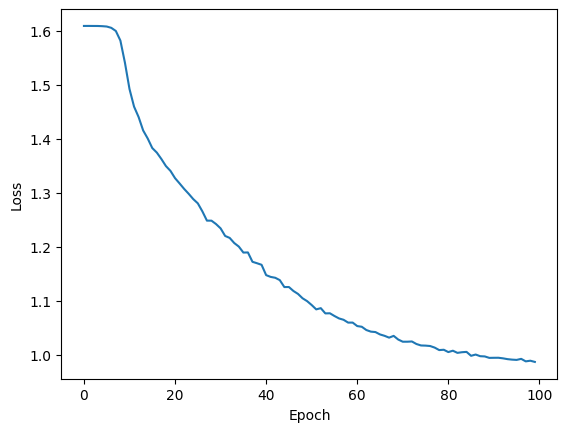

Test accuracy: 465.9010752688172
Accuracy: 0.450752688172043
Precision: 0.4438753360384796
Recall: 0.44886507077420124
F1-score: 0.4460671711633467


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       495
           1       0.40      0.37      0.38       472
           2       0.29      0.28      0.29       449
           3       0.32      0.32      0.32       463
           4       0.61      0.64      0.63       446

    accuracy                           0.45      2325
   macro avg       0.44      0.45      0.45      2325
weighted avg       0.45      0.45      0.45      2325

                    0           1           2           3           4  \
precision    0.596591    0.399543    0.287330    0.323009    0.612903   
recall       0.636364    0.370763    0.282851    0.315335    0.639013   
f1-score     0.615836    0.384615    0.285073    0.319126    0.625686   
support    495.000000  472.000000  449.000000 

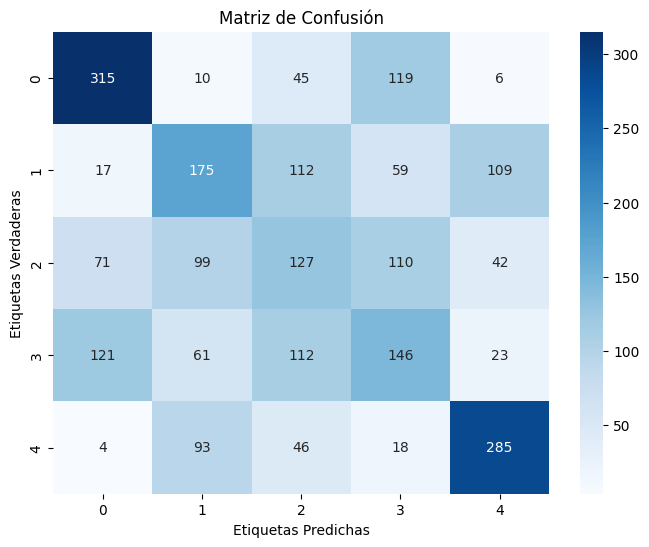

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_100_1e-05_0.3/resultados_100_1e-05_0.3.json
Procesando red con 300 epocas y 0.0001 de factor de aprendizaje y conjunto de entrenamiento 0.7


Procesando epocas:   0%|▏                                                            | 1/300 [00:16<1:21:49, 16.42s/it]

1.6079461728825288


Procesando epocas:   1%|▍                                                            | 2/300 [00:32<1:21:15, 16.36s/it]

1.4995194350971894


Procesando epocas:   1%|▌                                                            | 3/300 [00:49<1:20:58, 16.36s/it]

1.397570801482481


Procesando epocas:   1%|▊                                                            | 4/300 [01:05<1:20:34, 16.33s/it]

1.3343694462495692


Procesando epocas:   2%|█                                                            | 5/300 [01:21<1:20:16, 16.33s/it]

1.296153205983779


Procesando epocas:   2%|█▏                                                           | 6/300 [01:38<1:19:59, 16.32s/it]

1.26026011985891


Procesando epocas:   2%|█▍                                                           | 7/300 [01:54<1:19:43, 16.33s/it]

1.2287628671702218


Procesando epocas:   3%|█▋                                                           | 8/300 [02:10<1:19:26, 16.32s/it]

1.2124186803312862


Procesando epocas:   3%|█▊                                                           | 9/300 [02:26<1:19:08, 16.32s/it]

1.1915776498177473


Procesando epocas:   3%|██                                                          | 10/300 [02:43<1:18:50, 16.31s/it]

1.1806418510044323


Procesando epocas:   4%|██▏                                                         | 11/300 [02:59<1:18:33, 16.31s/it]

1.1693450212478638


Procesando epocas:   4%|██▍                                                         | 12/300 [03:15<1:18:17, 16.31s/it]

1.159046086844276


Procesando epocas:   4%|██▌                                                         | 13/300 [03:32<1:17:58, 16.30s/it]

1.1377987511017744


Procesando epocas:   5%|██▊                                                         | 14/300 [03:48<1:17:42, 16.30s/it]

1.115150272846222


Procesando epocas:   5%|███                                                         | 15/300 [04:04<1:17:25, 16.30s/it]

1.099673349717084


Procesando epocas:   5%|███▏                                                        | 16/300 [04:21<1:17:11, 16.31s/it]

1.0848963474526125


Procesando epocas:   6%|███▍                                                        | 17/300 [04:37<1:16:54, 16.30s/it]

1.071913011635051


Procesando epocas:   6%|███▌                                                        | 18/300 [04:53<1:16:38, 16.31s/it]

1.0646747245508081


Procesando epocas:   6%|███▊                                                        | 19/300 [05:10<1:16:25, 16.32s/it]

1.0550007224082947


Procesando epocas:   7%|████                                                        | 20/300 [05:26<1:16:08, 16.32s/it]

1.0475024998188018


Procesando epocas:   7%|████▏                                                       | 21/300 [05:42<1:15:53, 16.32s/it]

1.0417347985155443


Procesando epocas:   7%|████▍                                                       | 22/300 [05:59<1:15:37, 16.32s/it]

1.040343400660683


Procesando epocas:   8%|████▌                                                       | 23/300 [06:15<1:15:21, 16.32s/it]

1.0354877671774696


Procesando epocas:   8%|████▊                                                       | 24/300 [06:31<1:15:05, 16.32s/it]

1.034906517758089


Procesando epocas:   8%|█████                                                       | 25/300 [06:47<1:14:47, 16.32s/it]

1.0357085073695462


Procesando epocas:   9%|█████▏                                                      | 26/300 [07:04<1:14:33, 16.33s/it]

1.0338020615717944


Procesando epocas:   9%|█████▍                                                      | 27/300 [07:20<1:14:15, 16.32s/it]

1.0281002682798048


Procesando epocas:   9%|█████▌                                                      | 28/300 [07:36<1:13:56, 16.31s/it]

1.0258634833728566


Procesando epocas:  10%|█████▊                                                      | 29/300 [07:53<1:13:39, 16.31s/it]

1.0276951625066646


Procesando epocas:  10%|██████                                                      | 30/300 [08:09<1:13:25, 16.31s/it]

1.028810676757027


Procesando epocas:  10%|██████▏                                                     | 31/300 [08:25<1:13:07, 16.31s/it]

1.0262524738031276


Procesando epocas:  11%|██████▍                                                     | 32/300 [08:42<1:12:52, 16.32s/it]

1.0256786262287814


Procesando epocas:  11%|██████▌                                                     | 33/300 [08:58<1:12:35, 16.31s/it]

1.0256555255721598


Procesando epocas:  11%|██████▊                                                     | 34/300 [09:14<1:12:18, 16.31s/it]

1.0232931421083562


Procesando epocas:  12%|███████                                                     | 35/300 [09:31<1:12:01, 16.31s/it]

1.024741862451329


Procesando epocas:  12%|███████▏                                                    | 36/300 [09:47<1:11:45, 16.31s/it]

1.0232945498298196


Procesando epocas:  12%|███████▍                                                    | 37/300 [10:03<1:11:27, 16.30s/it]

1.0235120096627404


Procesando epocas:  13%|███████▌                                                    | 38/300 [10:20<1:11:11, 16.31s/it]

1.025864607446334


Procesando epocas:  13%|███████▊                                                    | 39/300 [10:36<1:10:55, 16.30s/it]

1.0248098983484155


Procesando epocas:  13%|████████                                                    | 40/300 [10:52<1:10:39, 16.31s/it]

1.0244343631407793


Procesando epocas:  14%|████████▏                                                   | 41/300 [11:08<1:10:22, 16.30s/it]

1.02185079034637


Procesando epocas:  14%|████████▍                                                   | 42/300 [11:25<1:10:07, 16.31s/it]

1.0230497332180248


Procesando epocas:  14%|████████▌                                                   | 43/300 [11:41<1:09:53, 16.32s/it]

1.0160879015922546


Procesando epocas:  15%|████████▊                                                   | 44/300 [11:57<1:09:38, 16.32s/it]

1.0199608753709233


Procesando epocas:  15%|█████████                                                   | 45/300 [12:14<1:09:21, 16.32s/it]

1.0169996366781346


Procesando epocas:  15%|█████████▏                                                  | 46/300 [12:30<1:09:05, 16.32s/it]

1.0194056581048405


Procesando epocas:  16%|█████████▍                                                  | 47/300 [12:46<1:08:47, 16.31s/it]

1.0206614841433133


Procesando epocas:  16%|█████████▌                                                  | 48/300 [13:03<1:08:29, 16.31s/it]

1.0251759451978346


Procesando epocas:  16%|█████████▊                                                  | 49/300 [13:19<1:08:13, 16.31s/it]

1.0187305201502408


Procesando epocas:  17%|██████████                                                  | 50/300 [13:35<1:07:57, 16.31s/it]

1.019413780815461


Procesando epocas:  17%|██████████▏                                                 | 51/300 [13:52<1:07:38, 16.30s/it]

1.0163972903700436


Procesando epocas:  17%|██████████▍                                                 | 52/300 [14:08<1:07:23, 16.30s/it]

1.0150717517908883


Procesando epocas:  18%|██████████▌                                                 | 53/300 [14:24<1:07:07, 16.31s/it]

1.0134009838104248


Procesando epocas:  18%|██████████▊                                                 | 54/300 [14:40<1:06:50, 16.30s/it]

1.013772977099699


Procesando epocas:  18%|███████████                                                 | 55/300 [14:57<1:06:34, 16.30s/it]

1.0104692483649533


Procesando epocas:  19%|███████████▏                                                | 56/300 [15:13<1:06:17, 16.30s/it]

1.0097480195410111


Procesando epocas:  19%|███████████▍                                                | 57/300 [15:29<1:05:59, 16.29s/it]

1.0129137989352732


Procesando epocas:  19%|███████████▌                                                | 58/300 [15:46<1:05:45, 16.30s/it]

1.0099689381964065


Procesando epocas:  20%|███████████▊                                                | 59/300 [16:02<1:05:28, 16.30s/it]

1.011827022889081


Procesando epocas:  20%|████████████                                                | 60/300 [16:18<1:05:13, 16.31s/it]

1.0084751539370593


Procesando epocas:  20%|████████████▏                                               | 61/300 [16:35<1:04:57, 16.31s/it]

1.0102330968660467


Procesando epocas:  21%|████████████▍                                               | 62/300 [16:51<1:04:41, 16.31s/it]

1.0110669833772323


Procesando epocas:  21%|████████████▌                                               | 63/300 [17:07<1:04:24, 16.31s/it]

1.0131814269458546


Procesando epocas:  21%|████████████▊                                               | 64/300 [17:24<1:04:11, 16.32s/it]

1.0123579772079692


Procesando epocas:  22%|█████████████                                               | 65/300 [17:40<1:03:55, 16.32s/it]

1.007211791417178


Procesando epocas:  22%|█████████████▏                                              | 66/300 [17:56<1:03:38, 16.32s/it]

1.006958897674785


Procesando epocas:  22%|█████████████▍                                              | 67/300 [18:13<1:03:22, 16.32s/it]

1.0087013521615196


Procesando epocas:  23%|█████████████▌                                              | 68/300 [18:29<1:03:05, 16.31s/it]

1.0085384218131794


Procesando epocas:  23%|█████████████▊                                              | 69/300 [18:45<1:02:47, 16.31s/it]

1.0083535825504977


Procesando epocas:  23%|██████████████                                              | 70/300 [19:01<1:02:32, 16.32s/it]

1.006390402246924


Procesando epocas:  24%|██████████████▏                                             | 71/300 [19:18<1:02:16, 16.32s/it]

1.0080276285900789


Procesando epocas:  24%|██████████████▍                                             | 72/300 [19:34<1:01:58, 16.31s/it]

1.0047816462376538


Procesando epocas:  24%|██████████████▌                                             | 73/300 [19:50<1:01:42, 16.31s/it]

1.0062697680557475


Procesando epocas:  25%|██████████████▊                                             | 74/300 [20:07<1:01:26, 16.31s/it]

1.0063645629321827


Procesando epocas:  25%|███████████████                                             | 75/300 [20:23<1:01:09, 16.31s/it]

1.0058219005079831


Procesando epocas:  25%|███████████████▏                                            | 76/300 [20:39<1:00:55, 16.32s/it]

1.004895297569387


Procesando epocas:  26%|███████████████▍                                            | 77/300 [20:56<1:00:39, 16.32s/it]

1.0069342872675728


Procesando epocas:  26%|███████████████▌                                            | 78/300 [21:12<1:00:21, 16.31s/it]

1.003246619420893


Procesando epocas:  26%|███████████████▊                                            | 79/300 [21:28<1:00:04, 16.31s/it]

1.00334194372682


Procesando epocas:  27%|████████████████▌                                             | 80/300 [21:45<59:49, 16.31s/it]

1.0041560057331533


Procesando epocas:  27%|████████████████▋                                             | 81/300 [22:01<59:33, 16.32s/it]

1.005317948145025


Procesando epocas:  27%|████████████████▉                                             | 82/300 [22:17<59:17, 16.32s/it]

1.0054878112147836


Procesando epocas:  28%|█████████████████▏                                            | 83/300 [22:34<59:00, 16.32s/it]

1.0089339224731222


Procesando epocas:  28%|█████████████████▎                                            | 84/300 [22:50<58:37, 16.28s/it]

1.0070274766753702


Procesando epocas:  28%|█████████████████▌                                            | 85/300 [23:06<58:05, 16.21s/it]

1.0023673089111553


Procesando epocas:  29%|█████████████████▊                                            | 86/300 [23:22<57:38, 16.16s/it]

1.0011871457099915


Procesando epocas:  29%|█████████████████▉                                            | 87/300 [23:38<57:16, 16.13s/it]

1.0019664171864004


Procesando epocas:  29%|██████████████████▏                                           | 88/300 [23:54<56:55, 16.11s/it]

1.0016940344782437


Procesando epocas:  30%|██████████████████▍                                           | 89/300 [24:10<56:35, 16.09s/it]

1.000991232956157


Procesando epocas:  30%|██████████████████▌                                           | 90/300 [24:26<56:15, 16.08s/it]

0.997882445419536


Procesando epocas:  30%|██████████████████▊                                           | 91/300 [24:42<55:57, 16.07s/it]

0.9978565689395456


Procesando epocas:  31%|███████████████████                                           | 92/300 [24:58<55:40, 16.06s/it]

0.9951794908327215


Procesando epocas:  31%|███████████████████▏                                          | 93/300 [25:14<55:22, 16.05s/it]

0.9947186126428492


Procesando epocas:  31%|███████████████████▍                                          | 94/300 [25:30<55:05, 16.05s/it]

0.9971791540875155


Procesando epocas:  32%|███████████████████▋                                          | 95/300 [25:46<54:50, 16.05s/it]

1.0016639996977414


Procesando epocas:  32%|███████████████████▊                                          | 96/300 [26:02<54:33, 16.05s/it]

0.9975360943990595


Procesando epocas:  32%|████████████████████                                          | 97/300 [26:19<54:28, 16.10s/it]

0.9987443850320928


Procesando epocas:  33%|████████████████████▎                                         | 98/300 [26:35<54:13, 16.10s/it]

0.9957914243726169


Procesando epocas:  33%|████████████████████▍                                         | 99/300 [26:51<54:12, 16.18s/it]

0.999773176277385


Procesando epocas:  33%|████████████████████▎                                        | 100/300 [27:07<54:04, 16.22s/it]

0.9992882430553436


Procesando epocas:  34%|████████████████████▌                                        | 101/300 [27:24<54:19, 16.38s/it]

0.9985783857457778


Procesando epocas:  34%|████████████████████▋                                        | 102/300 [27:41<54:34, 16.54s/it]

0.9992205584750457


Procesando epocas:  34%|████████████████████▉                                        | 103/300 [27:57<54:09, 16.49s/it]

0.9992745588807499


Procesando epocas:  35%|█████████████████████▏                                       | 104/300 [28:14<53:45, 16.46s/it]

0.9984035849571228


Procesando epocas:  35%|█████████████████████▎                                       | 105/300 [28:30<53:24, 16.43s/it]

0.9987886926707099


Procesando epocas:  35%|█████████████████████▌                                       | 106/300 [28:46<53:05, 16.42s/it]

0.9984034085974974


Procesando epocas:  36%|█████████████████████▊                                       | 107/300 [29:03<52:49, 16.42s/it]

0.9985227777677423


Procesando epocas:  36%|█████████████████████▉                                       | 108/300 [29:19<52:31, 16.41s/it]

0.9963092278031742


Procesando epocas:  36%|██████████████████████▏                                      | 109/300 [29:36<52:14, 16.41s/it]

0.9963579791433671


Procesando epocas:  37%|██████████████████████▎                                      | 110/300 [29:52<51:59, 16.42s/it]

0.9956696973127477


Procesando epocas:  37%|██████████████████████▌                                      | 111/300 [30:08<51:38, 16.39s/it]

0.9964700797024895


Procesando epocas:  37%|██████████████████████▊                                      | 112/300 [30:25<51:17, 16.37s/it]

0.9974786442868849


Procesando epocas:  38%|██████████████████████▉                                      | 113/300 [30:41<51:01, 16.37s/it]

0.9988997950273402


Procesando epocas:  38%|███████████████████████▏                                     | 114/300 [30:58<50:46, 16.38s/it]

1.000840206707225


Procesando epocas:  38%|███████████████████████▍                                     | 115/300 [31:14<50:36, 16.41s/it]

0.9980753309586469


Procesando epocas:  39%|███████████████████████▌                                     | 116/300 [31:30<50:19, 16.41s/it]

1.0031201583497664


Procesando epocas:  39%|███████████████████████▊                                     | 117/300 [31:47<50:06, 16.43s/it]

1.0041562844725216


Procesando epocas:  39%|███████████████████████▉                                     | 118/300 [32:03<49:47, 16.41s/it]

0.9992930892635794


Procesando epocas:  40%|████████████████████████▏                                    | 119/300 [32:20<49:31, 16.42s/it]

1.000271094195983


Procesando epocas:  40%|████████████████████████▍                                    | 120/300 [32:36<49:13, 16.41s/it]

0.9986706579432768


Procesando epocas:  40%|████████████████████████▌                                    | 121/300 [32:53<49:00, 16.43s/it]

0.9959245713318096


Procesando epocas:  41%|████████████████████████▊                                    | 122/300 [33:09<48:41, 16.41s/it]

0.9964578688144684


Procesando epocas:  41%|█████████████████████████                                    | 123/300 [33:25<48:22, 16.40s/it]

0.9946714993785409


Procesando epocas:  41%|█████████████████████████▏                                   | 124/300 [33:42<48:06, 16.40s/it]

0.9938498104319853


Procesando epocas:  42%|█████████████████████████▍                                   | 125/300 [33:58<47:51, 16.41s/it]

0.9935335457324982


Procesando epocas:  42%|█████████████████████████▌                                   | 126/300 [34:15<47:35, 16.41s/it]

0.9938249640605029


Procesando epocas:  42%|█████████████████████████▊                                   | 127/300 [34:31<47:16, 16.40s/it]

0.9927440730964436


Procesando epocas:  43%|██████████████████████████                                   | 128/300 [34:47<46:59, 16.39s/it]

0.9917173361077029


Procesando epocas:  43%|██████████████████████████▏                                  | 129/300 [35:04<46:47, 16.42s/it]

0.9935307685066672


Procesando epocas:  43%|██████████████████████████▍                                  | 130/300 [35:20<46:29, 16.41s/it]

0.9937036128605113


Procesando epocas:  44%|██████████████████████████▋                                  | 131/300 [35:37<46:11, 16.40s/it]

0.9927879968110253


Procesando epocas:  44%|██████████████████████████▊                                  | 132/300 [35:53<45:53, 16.39s/it]

0.9927017769392799


Procesando epocas:  44%|███████████████████████████                                  | 133/300 [36:09<45:36, 16.39s/it]

0.9937956490937401


Procesando epocas:  45%|███████████████████████████▏                                 | 134/300 [36:26<45:18, 16.38s/it]

0.9976674612830667


Procesando epocas:  45%|███████████████████████████▍                                 | 135/300 [36:42<45:04, 16.39s/it]

0.9940655238488141


Procesando epocas:  45%|███████████████████████████▋                                 | 136/300 [36:58<44:46, 16.38s/it]

0.9953385693185469


Procesando epocas:  46%|███████████████████████████▊                                 | 137/300 [37:15<44:27, 16.37s/it]

0.9936268578557407


Procesando epocas:  46%|████████████████████████████                                 | 138/300 [37:31<44:10, 16.36s/it]

0.9953858852386475


Procesando epocas:  46%|████████████████████████████▎                                | 139/300 [37:48<43:57, 16.38s/it]

0.9967752134098726


Procesando epocas:  47%|████████████████████████████▍                                | 140/300 [38:04<43:41, 16.39s/it]

0.9961854426299824


Procesando epocas:  47%|████████████████████████████▋                                | 141/300 [38:20<43:25, 16.39s/it]

0.9950488062465892


Procesando epocas:  47%|████████████████████████████▊                                | 142/300 [38:37<43:07, 16.38s/it]

0.9956055318608004


Procesando epocas:  48%|█████████████████████████████                                | 143/300 [38:53<42:49, 16.37s/it]

0.9932021337396958


Procesando epocas:  48%|█████████████████████████████▎                               | 144/300 [39:09<42:34, 16.38s/it]

0.9930607062928817


Procesando epocas:  48%|█████████████████████████████▍                               | 145/300 [39:26<42:18, 16.38s/it]

0.9910079444155974


Procesando epocas:  49%|█████████████████████████████▋                               | 146/300 [39:42<42:02, 16.38s/it]

0.9903600440305822


Procesando epocas:  49%|█████████████████████████████▉                               | 147/300 [39:59<41:46, 16.38s/it]

0.99090177451863


Procesando epocas:  49%|██████████████████████████████                               | 148/300 [40:15<41:46, 16.49s/it]

0.9892586027874666


Procesando epocas:  50%|██████████████████████████████▎                              | 149/300 [40:34<42:55, 17.05s/it]

0.9900650483720442


Procesando epocas:  50%|██████████████████████████████▌                              | 150/300 [40:52<43:25, 17.37s/it]

0.9943420841413386


Procesando epocas:  50%|██████████████████████████████▋                              | 151/300 [41:10<43:38, 17.57s/it]

0.9952707914745107


Procesando epocas:  51%|██████████████████████████████▉                              | 152/300 [41:28<43:41, 17.71s/it]

0.9942544008002562


Procesando epocas:  51%|███████████████████████████████                              | 153/300 [41:46<43:44, 17.85s/it]

0.9954915407825918


Procesando epocas:  51%|███████████████████████████████▎                             | 154/300 [42:04<43:34, 17.91s/it]

0.9925187419442569


Procesando epocas:  52%|███████████████████████████████▌                             | 155/300 [42:22<43:30, 18.00s/it]

0.9933306311859804


Procesando epocas:  52%|███████████████████████████████▋                             | 156/300 [42:40<43:17, 18.04s/it]

0.9941165187779595


Procesando epocas:  52%|███████████████████████████████▉                             | 157/300 [42:59<43:01, 18.05s/it]

0.997199407044579


Procesando epocas:  53%|████████████████████████████████▏                            | 158/300 [43:17<42:43, 18.05s/it]

0.9960976022131303


Procesando epocas:  53%|████████████████████████████████▎                            | 159/300 [43:35<42:27, 18.07s/it]

0.9942855165285223


Procesando epocas:  53%|████████████████████████████████▌                            | 160/300 [43:53<42:09, 18.07s/it]

0.9926725980113534


Procesando epocas:  54%|████████████████████████████████▋                            | 161/300 [44:11<41:49, 18.05s/it]

0.9920486345010645


Procesando epocas:  54%|████████████████████████████████▉                            | 162/300 [44:29<41:30, 18.04s/it]

0.9910397992414587


Procesando epocas:  54%|█████████████████████████████████▏                           | 163/300 [44:47<41:14, 18.06s/it]

0.9899489115266239


Procesando epocas:  55%|█████████████████████████████████▎                           | 164/300 [45:05<40:54, 18.05s/it]

0.9906375183778651


Procesando epocas:  55%|█████████████████████████████████▌                           | 165/300 [45:23<40:34, 18.03s/it]

0.9904084819204667


Procesando epocas:  55%|█████████████████████████████████▊                           | 166/300 [45:41<40:21, 18.07s/it]

0.9883911532514236


Procesando epocas:  56%|█████████████████████████████████▉                           | 167/300 [45:59<39:49, 17.97s/it]

0.9881044591174406


Procesando epocas:  56%|██████████████████████████████████▏                          | 168/300 [46:16<38:49, 17.65s/it]

0.9881056880249697


Procesando epocas:  56%|██████████████████████████████████▎                          | 169/300 [46:34<38:54, 17.82s/it]

0.9877624346929438


Procesando epocas:  57%|██████████████████████████████████▌                          | 170/300 [46:52<38:56, 17.97s/it]

0.987166437331368


Procesando epocas:  57%|██████████████████████████████████▊                          | 171/300 [47:10<38:37, 17.96s/it]

0.9865551576894872


Procesando epocas:  57%|██████████████████████████████████▉                          | 172/300 [47:28<38:16, 17.94s/it]

0.9871750729925493


Procesando epocas:  58%|███████████████████████████████████▏                         | 173/300 [47:46<37:59, 17.95s/it]

0.9885067788993611


Procesando epocas:  58%|███████████████████████████████████▍                         | 174/300 [48:04<37:45, 17.98s/it]

0.9874860321774203


Procesando epocas:  58%|███████████████████████████████████▌                         | 175/300 [48:22<37:25, 17.96s/it]

0.9884640581467572


Procesando epocas:  59%|███████████████████████████████████▊                         | 176/300 [48:40<37:07, 17.96s/it]

0.9874114814926597


Procesando epocas:  59%|███████████████████████████████████▉                         | 177/300 [48:58<36:47, 17.94s/it]

0.9892431616783142


Procesando epocas:  59%|████████████████████████████████████▏                        | 178/300 [49:16<36:28, 17.94s/it]

0.9947680420735303


Procesando epocas:  60%|████████████████████████████████████▍                        | 179/300 [49:34<36:11, 17.94s/it]

0.9913979642531451


Procesando epocas:  60%|████████████████████████████████████▌                        | 180/300 [49:52<35:53, 17.95s/it]

0.9918713804553537


Procesando epocas:  60%|████████████████████████████████████▊                        | 181/300 [50:10<35:40, 17.98s/it]

0.9883052899557001


Procesando epocas:  61%|█████████████████████████████████████                        | 182/300 [50:28<35:30, 18.06s/it]

0.9898010488818674


Procesando epocas:  61%|█████████████████████████████████████▏                       | 183/300 [50:46<35:11, 18.04s/it]

0.9914197564125061


Procesando epocas:  61%|█████████████████████████████████████▍                       | 184/300 [51:04<34:49, 18.02s/it]

0.990677943650414


Procesando epocas:  62%|█████████████████████████████████████▌                       | 185/300 [51:22<34:27, 17.98s/it]

0.9915793110342587


Procesando epocas:  62%|█████████████████████████████████████▊                       | 186/300 [51:40<34:08, 17.97s/it]

0.9927484477267546


Procesando epocas:  62%|██████████████████████████████████████                       | 187/300 [51:58<33:49, 17.96s/it]

0.9926438584047206


Procesando epocas:  63%|██████████████████████████████████████▏                      | 188/300 [52:16<33:34, 17.99s/it]

0.9932233396698447


Procesando epocas:  63%|██████████████████████████████████████▍                      | 189/300 [52:34<33:15, 17.98s/it]

0.9875788874485913


Procesando epocas:  63%|██████████████████████████████████████▋                      | 190/300 [52:52<32:59, 17.99s/it]

0.9897689486251158


Procesando epocas:  64%|██████████████████████████████████████▊                      | 191/300 [53:10<32:38, 17.97s/it]

0.9892918046782998


Procesando epocas:  64%|███████████████████████████████████████                      | 192/300 [53:28<32:18, 17.95s/it]

0.9887598802061642


Procesando epocas:  64%|███████████████████████████████████████▏                     | 193/300 [53:46<32:00, 17.95s/it]

0.9895250793765573


Procesando epocas:  65%|███████████████████████████████████████▍                     | 194/300 [54:04<31:42, 17.95s/it]

0.9918721181504867


Procesando epocas:  65%|███████████████████████████████████████▋                     | 195/300 [54:22<31:25, 17.95s/it]

0.9887678377768573


Procesando epocas:  65%|███████████████████████████████████████▊                     | 196/300 [54:39<31:06, 17.95s/it]

0.989656519539216


Procesando epocas:  66%|████████████████████████████████████████                     | 197/300 [54:57<30:48, 17.95s/it]

0.9882114754003637


Procesando epocas:  66%|████████████████████████████████████████▎                    | 198/300 [55:15<30:30, 17.95s/it]

0.987963949582156


Procesando epocas:  66%|████████████████████████████████████████▍                    | 199/300 [55:33<30:12, 17.95s/it]

0.9876722851220299


Procesando epocas:  67%|████████████████████████████████████████▋                    | 200/300 [55:51<29:55, 17.96s/it]

0.9863531231880188


Procesando epocas:  67%|████████████████████████████████████████▊                    | 201/300 [56:09<29:37, 17.96s/it]

0.9838950707631953


Procesando epocas:  67%|█████████████████████████████████████████                    | 202/300 [56:27<29:19, 17.95s/it]

0.9848155596676995


Procesando epocas:  68%|█████████████████████████████████████████▎                   | 203/300 [56:45<29:01, 17.95s/it]

0.9891568860586952


Procesando epocas:  68%|█████████████████████████████████████████▍                   | 204/300 [57:03<28:43, 17.95s/it]

0.9849511314840877


Procesando epocas:  68%|█████████████████████████████████████████▋                   | 205/300 [57:21<28:25, 17.95s/it]

0.9845643075073467


Procesando epocas:  69%|█████████████████████████████████████████▉                   | 206/300 [57:39<28:06, 17.94s/it]

0.984711137939902


Procesando epocas:  69%|██████████████████████████████████████████                   | 207/300 [57:57<27:47, 17.93s/it]

0.9852132253787097


Procesando epocas:  69%|██████████████████████████████████████████▎                  | 208/300 [58:15<27:29, 17.93s/it]

0.9854370839455548


Procesando epocas:  70%|██████████████████████████████████████████▍                  | 209/300 [58:33<27:12, 17.94s/it]

0.9845023621531094


Procesando epocas:  70%|██████████████████████████████████████████▋                  | 210/300 [58:51<26:53, 17.93s/it]

0.9855316954500535


Procesando epocas:  70%|██████████████████████████████████████████▉                  | 211/300 [59:09<26:36, 17.94s/it]

0.9889186915229349


Procesando epocas:  71%|███████████████████████████████████████████                  | 212/300 [59:27<26:18, 17.93s/it]

0.9848856301868663


Procesando epocas:  71%|███████████████████████████████████████████▎                 | 213/300 [59:44<25:59, 17.93s/it]

0.9891993466545553


Procesando epocas:  71%|██████████████████████████████████████████                 | 214/300 [1:00:02<25:41, 17.92s/it]

0.9858699044760536


Procesando epocas:  72%|██████████████████████████████████████████▎                | 215/300 [1:00:20<25:25, 17.94s/it]

0.9867503215284908


Procesando epocas:  72%|██████████████████████████████████████████▍                | 216/300 [1:00:38<25:08, 17.95s/it]

0.989571197944529


Procesando epocas:  72%|██████████████████████████████████████████▋                | 217/300 [1:00:57<25:01, 18.10s/it]

0.9889091870364021


Procesando epocas:  73%|██████████████████████████████████████████▊                | 218/300 [1:01:15<24:39, 18.04s/it]

0.9871072954991285


Procesando epocas:  73%|███████████████████████████████████████████                | 219/300 [1:01:33<24:18, 18.01s/it]

0.9873297782505259


Procesando epocas:  73%|███████████████████████████████████████████▎               | 220/300 [1:01:51<24:04, 18.05s/it]

0.9857719035709606


Procesando epocas:  74%|███████████████████████████████████████████▍               | 221/300 [1:02:09<23:43, 18.01s/it]

0.9851257709895863


Procesando epocas:  74%|███████████████████████████████████████████▋               | 222/300 [1:02:27<23:22, 17.98s/it]

0.9834734611651477


Procesando epocas:  74%|███████████████████████████████████████████▊               | 223/300 [1:02:45<23:03, 17.96s/it]

0.9824467094505535


Procesando epocas:  75%|████████████████████████████████████████████               | 224/300 [1:03:02<22:44, 17.96s/it]

0.982984182063271


Procesando epocas:  75%|████████████████████████████████████████████▎              | 225/300 [1:03:21<22:33, 18.04s/it]

0.9875488172559177


Procesando epocas:  75%|████████████████████████████████████████████▍              | 226/300 [1:03:39<22:12, 18.01s/it]

0.9841508549802443


Procesando epocas:  76%|████████████████████████████████████████████▋              | 227/300 [1:03:57<21:53, 17.99s/it]

0.9828989726655624


Procesando epocas:  76%|████████████████████████████████████████████▊              | 228/300 [1:04:15<21:34, 17.98s/it]

0.9864997723523308


Procesando epocas:  76%|█████████████████████████████████████████████              | 229/300 [1:04:32<21:15, 17.96s/it]

0.9869432565043954


Procesando epocas:  77%|█████████████████████████████████████████████▏             | 230/300 [1:04:50<20:56, 17.95s/it]

0.9842833575080423


Procesando epocas:  77%|█████████████████████████████████████████████▍             | 231/300 [1:05:08<20:38, 17.95s/it]

0.9844207311377806


Procesando epocas:  77%|█████████████████████████████████████████████▋             | 232/300 [1:05:26<20:19, 17.94s/it]

0.9826437283964718


Procesando epocas:  78%|█████████████████████████████████████████████▊             | 233/300 [1:05:44<20:03, 17.96s/it]

0.9831516795298633


Procesando epocas:  78%|██████████████████████████████████████████████             | 234/300 [1:06:02<19:44, 17.95s/it]

0.9830361212001127


Procesando epocas:  78%|██████████████████████████████████████████████▏            | 235/300 [1:06:20<19:26, 17.94s/it]

0.9831597913714016


Procesando epocas:  79%|██████████████████████████████████████████████▍            | 236/300 [1:06:38<19:08, 17.94s/it]

0.984734940178254


Procesando epocas:  79%|██████████████████████████████████████████████▌            | 237/300 [1:06:56<18:50, 17.95s/it]

0.9824111514231738


Procesando epocas:  79%|██████████████████████████████████████████████▊            | 238/300 [1:07:14<18:32, 17.95s/it]

0.984835800703834


Procesando epocas:  80%|███████████████████████████████████████████████            | 239/300 [1:07:32<18:14, 17.95s/it]

0.9833327209248263


Procesando epocas:  80%|███████████████████████████████████████████████▏           | 240/300 [1:07:50<17:56, 17.94s/it]

0.9844563806758208


Procesando epocas:  80%|███████████████████████████████████████████████▍           | 241/300 [1:08:08<17:38, 17.94s/it]

0.9839712798595428


Procesando epocas:  81%|███████████████████████████████████████████████▌           | 242/300 [1:08:26<17:24, 18.01s/it]

0.9857526975519517


Procesando epocas:  81%|███████████████████████████████████████████████▊           | 243/300 [1:08:44<17:11, 18.09s/it]

0.9852415568688336


Procesando epocas:  81%|███████████████████████████████████████████████▉           | 244/300 [1:09:02<16:52, 18.09s/it]

0.9836523841409123


Procesando epocas:  82%|████████████████████████████████████████████████▏          | 245/300 [1:09:20<16:28, 17.98s/it]

0.9828204838668599


Procesando epocas:  82%|████████████████████████████████████████████████▍          | 246/300 [1:09:36<15:46, 17.53s/it]

0.9824100273496964


Procesando epocas:  82%|████████████████████████████████████████████████▌          | 247/300 [1:09:53<15:10, 17.17s/it]

0.982967130576863


Procesando epocas:  83%|████████████████████████████████████████████████▊          | 248/300 [1:10:09<14:39, 16.91s/it]

0.9837760953342214


Procesando epocas:  83%|████████████████████████████████████████████████▉          | 249/300 [1:10:25<14:13, 16.74s/it]

0.9852891872910893


Procesando epocas:  83%|█████████████████████████████████████████████████▏         | 250/300 [1:10:42<13:52, 16.65s/it]

0.9820050965337193


Procesando epocas:  84%|█████████████████████████████████████████████████▎         | 251/300 [1:10:58<13:33, 16.60s/it]

0.9838927514412824


Procesando epocas:  84%|█████████████████████████████████████████████████▌         | 252/300 [1:11:15<13:12, 16.51s/it]

0.9833239916492911


Procesando epocas:  84%|█████████████████████████████████████████████████▊         | 253/300 [1:11:31<12:53, 16.45s/it]

0.9838385375107036


Procesando epocas:  85%|█████████████████████████████████████████████████▉         | 254/300 [1:11:47<12:35, 16.42s/it]

0.980379066397162


Procesando epocas:  85%|██████████████████████████████████████████████████▏        | 255/300 [1:12:04<12:19, 16.44s/it]

0.9860396511414472


Procesando epocas:  85%|██████████████████████████████████████████████████▎        | 256/300 [1:12:20<12:03, 16.44s/it]

0.984350290368585


Procesando epocas:  86%|██████████████████████████████████████████████████▌        | 257/300 [1:12:37<11:47, 16.44s/it]

0.9817441649296704


Procesando epocas:  86%|██████████████████████████████████████████████████▋        | 258/300 [1:12:53<11:30, 16.45s/it]

0.9826162362799925


Procesando epocas:  86%|██████████████████████████████████████████████████▉        | 259/300 [1:13:10<11:14, 16.44s/it]

0.9819561309674207


Procesando epocas:  87%|███████████████████████████████████████████████████▏       | 260/300 [1:13:26<10:57, 16.44s/it]

0.9809664403691011


Procesando epocas:  87%|███████████████████████████████████████████████████▎       | 261/300 [1:13:43<10:41, 16.45s/it]

0.9794293130145354


Procesando epocas:  87%|███████████████████████████████████████████████████▌       | 262/300 [1:13:59<10:25, 16.45s/it]

0.9776903934338513


Procesando epocas:  88%|███████████████████████████████████████████████████▋       | 263/300 [1:14:16<10:11, 16.53s/it]

0.9786902725696563


Procesando epocas:  88%|███████████████████████████████████████████████████▉       | 264/300 [1:14:32<09:55, 16.53s/it]

0.9781582085525289


Procesando epocas:  88%|████████████████████████████████████████████████████       | 265/300 [1:14:49<09:36, 16.48s/it]

0.9785401221583871


Procesando epocas:  89%|████████████████████████████████████████████████████▎      | 266/300 [1:15:05<09:18, 16.44s/it]

0.9779951530344346


Procesando epocas:  89%|████████████████████████████████████████████████████▌      | 267/300 [1:15:21<09:02, 16.45s/it]

0.9789090598330779


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 268/300 [1:15:38<08:45, 16.43s/it]

0.9785371920641731


Procesando epocas:  90%|████████████████████████████████████████████████████▉      | 269/300 [1:15:54<08:28, 16.40s/it]

0.980220731566934


Procesando epocas:  90%|█████████████████████████████████████████████████████      | 270/300 [1:16:11<08:12, 16.42s/it]

0.98095083026325


Procesando epocas:  90%|█████████████████████████████████████████████████████▎     | 271/300 [1:16:27<07:56, 16.43s/it]

0.9802150589578292


Procesando epocas:  91%|█████████████████████████████████████████████████████▍     | 272/300 [1:16:44<07:41, 16.50s/it]

0.9795885075541103


Procesando epocas:  91%|█████████████████████████████████████████████████████▋     | 273/300 [1:17:00<07:25, 16.51s/it]

0.9813112960142247


Procesando epocas:  91%|█████████████████████████████████████████████████████▉     | 274/300 [1:17:17<07:09, 16.53s/it]

0.9792234732824213


Procesando epocas:  92%|██████████████████████████████████████████████████████     | 275/300 [1:17:33<06:53, 16.55s/it]

0.9789472730720744


Procesando epocas:  92%|██████████████████████████████████████████████████████▎    | 276/300 [1:17:50<06:37, 16.58s/it]

0.9810888153665206


Procesando epocas:  92%|██████████████████████████████████████████████████████▍    | 277/300 [1:18:06<06:20, 16.52s/it]

0.9798527679022621


Procesando epocas:  93%|██████████████████████████████████████████████████████▋    | 278/300 [1:18:23<06:02, 16.49s/it]

0.9786513454773846


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 279/300 [1:18:40<05:48, 16.59s/it]

0.9792092600289513


Procesando epocas:  93%|███████████████████████████████████████████████████████    | 280/300 [1:18:57<05:35, 16.77s/it]

0.9839193421251634


Procesando epocas:  94%|███████████████████████████████████████████████████████▎   | 281/300 [1:19:13<05:17, 16.73s/it]

0.9804187329376445


Procesando epocas:  94%|███████████████████████████████████████████████████████▍   | 282/300 [1:19:30<05:00, 16.72s/it]

0.9801582374993493


Procesando epocas:  94%|███████████████████████████████████████████████████████▋   | 283/300 [1:19:47<04:42, 16.64s/it]

0.9823123791638543


Procesando epocas:  95%|███████████████████████████████████████████████████████▊   | 284/300 [1:20:03<04:25, 16.57s/it]

0.9808235887218925


Procesando epocas:  95%|████████████████████████████████████████████████████████   | 285/300 [1:20:19<04:08, 16.53s/it]

0.9798595824662377


Procesando epocas:  95%|████████████████████████████████████████████████████████▏  | 286/300 [1:20:36<03:51, 16.53s/it]

0.9837491231806138


Procesando epocas:  96%|████████████████████████████████████████████████████████▍  | 287/300 [1:20:52<03:34, 16.51s/it]

0.9797268537914052


Procesando epocas:  96%|████████████████████████████████████████████████████████▋  | 288/300 [1:21:09<03:17, 16.48s/it]

0.9811290176475749


Procesando epocas:  96%|████████████████████████████████████████████████████████▊  | 289/300 [1:21:25<03:01, 16.46s/it]

0.9804763664217556


Procesando epocas:  97%|█████████████████████████████████████████████████████████  | 290/300 [1:21:42<02:44, 16.45s/it]

0.979742663748124


Procesando epocas:  97%|█████████████████████████████████████████████████████████▏ | 291/300 [1:21:58<02:28, 16.47s/it]

0.9777357038329629


Procesando epocas:  97%|█████████████████████████████████████████████████████████▍ | 292/300 [1:22:15<02:12, 16.51s/it]

0.979151893713895


Procesando epocas:  98%|█████████████████████████████████████████████████████████▌ | 293/300 [1:22:31<01:55, 16.56s/it]

0.9774377801839043


Procesando epocas:  98%|█████████████████████████████████████████████████████████▊ | 294/300 [1:22:48<01:39, 16.56s/it]

0.9781933083253749


Procesando epocas:  98%|██████████████████████████████████████████████████████████ | 295/300 [1:23:05<01:22, 16.55s/it]

0.9799173677668852


Procesando epocas:  99%|██████████████████████████████████████████████████████████▏| 296/300 [1:23:21<01:06, 16.54s/it]

0.9811616136747248


Procesando epocas:  99%|██████████████████████████████████████████████████████████▍| 297/300 [1:23:38<00:49, 16.53s/it]

0.9797999080489663


Procesando epocas:  99%|██████████████████████████████████████████████████████████▌| 298/300 [1:23:54<00:33, 16.50s/it]

0.9793522165102118


Procesando epocas: 100%|██████████████████████████████████████████████████████████▊| 299/300 [1:24:10<00:16, 16.46s/it]

0.9789247547878939


Procesando epocas: 100%|███████████████████████████████████████████████████████████| 300/300 [1:24:27<00:00, 16.89s/it]

0.9793731770094704
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Neural_network_classification ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_300_0.0001_0.3/funcion_de_perdida_300_0.0001.png


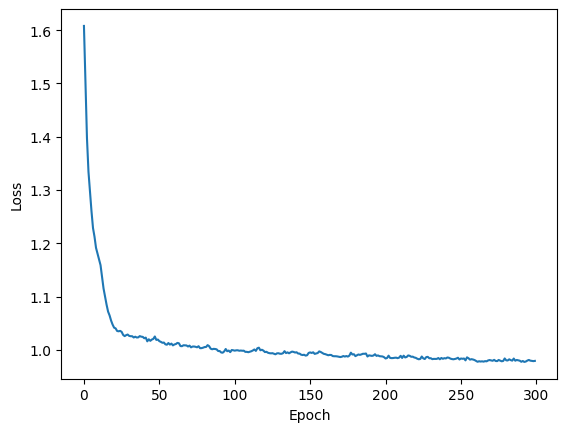

Test accuracy: 463.5939784946237
Accuracy: 0.4666666666666667
Precision: 0.5049382980335082
Recall: 0.46656638127312
F1-score: 0.47778542414698044


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.49      0.59       495
           1       0.45      0.50      0.47       472
           2       0.32      0.39      0.35       449
           3       0.32      0.38      0.35       463
           4       0.70      0.57      0.63       446

    accuracy                           0.47      2325
   macro avg       0.50      0.47      0.48      2325
weighted avg       0.51      0.47      0.48      2325

                    0           1           2           3           4  \
precision    0.735562    0.447419    0.320000    0.317291    0.704420   
recall       0.488889    0.495763    0.391982    0.384449    0.571749   
f1-score     0.587379    0.470352    0.352352    0.347656    0.631188   
support    495.000000  472.000000  449.000000  

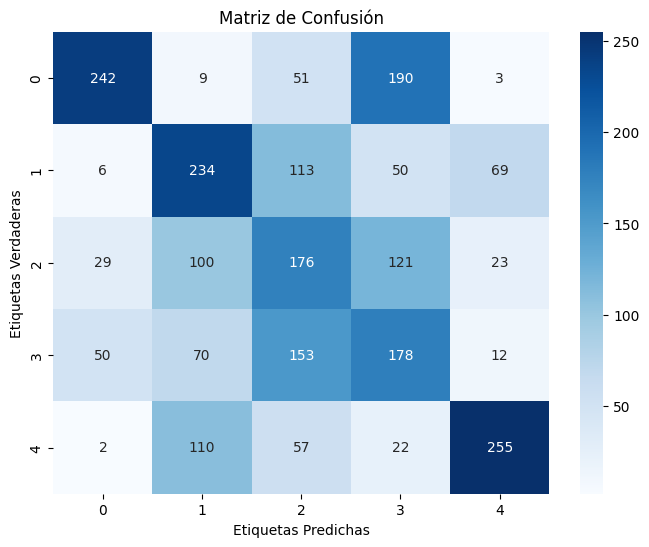

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_300_0.0001_0.3/resultados_300_0.0001_0.3.json
Procesando red con 300 epocas y 1e-05 de factor de aprendizaje y conjunto de entrenamiento 0.7


Procesando epocas:   0%|▏                                                            | 1/300 [00:16<1:22:12, 16.50s/it]

1.6096858550520505


Procesando epocas:   1%|▍                                                            | 2/300 [00:32<1:21:52, 16.49s/it]

1.609570929583381


Procesando epocas:   1%|▌                                                            | 3/300 [00:49<1:21:53, 16.54s/it]

1.6095351864309873


Procesando epocas:   1%|▊                                                            | 4/300 [01:12<1:34:08, 19.08s/it]

1.6095067024230958


Procesando epocas:   2%|█                                                            | 5/300 [01:29<1:30:28, 18.40s/it]

1.608829000416924


Procesando epocas:   2%|█▏                                                           | 6/300 [01:57<1:45:21, 21.50s/it]

1.6072318133185892


Procesando epocas:   2%|█▍                                                           | 7/300 [02:24<1:54:34, 23.46s/it]

1.602468107728397


Procesando epocas:   3%|█▋                                                           | 8/300 [02:52<2:00:01, 24.66s/it]

1.5851973849184373


Procesando epocas:   3%|█▊                                                           | 9/300 [03:19<2:03:58, 25.56s/it]

1.5373787192737356


Procesando epocas:   3%|██                                                          | 10/300 [03:47<2:06:29, 26.17s/it]

1.4948548043475431


Procesando epocas:   4%|██▏                                                         | 11/300 [04:14<2:07:49, 26.54s/it]

1.4694905547534718


Procesando epocas:   4%|██▍                                                         | 12/300 [04:41<2:08:51, 26.84s/it]

1.4504823677680072


Procesando epocas:   4%|██▌                                                         | 13/300 [05:09<2:09:18, 27.03s/it]

1.4356162365745095


Procesando epocas:   5%|██▊                                                         | 14/300 [05:37<2:09:35, 27.19s/it]

1.4201543772921843


Procesando epocas:   5%|███                                                         | 15/300 [06:04<2:09:34, 27.28s/it]

1.407080607554492


Procesando epocas:   5%|███▏                                                        | 16/300 [06:31<2:09:25, 27.34s/it]

1.3894992190248825


Procesando epocas:   6%|███▍                                                        | 17/300 [06:59<2:09:05, 27.37s/it]

1.3774891509729272


Procesando epocas:   6%|███▌                                                        | 18/300 [07:26<2:08:47, 27.40s/it]

1.3619432912153355


Procesando epocas:   6%|███▊                                                        | 19/300 [07:54<2:08:23, 27.41s/it]

1.350164550192216


Procesando epocas:   7%|████                                                        | 20/300 [08:21<2:07:40, 27.36s/it]

1.3376261598923627


Procesando epocas:   7%|████▏                                                       | 21/300 [08:49<2:07:35, 27.44s/it]

1.3319802641868592


Procesando epocas:   7%|████▍                                                       | 22/300 [09:16<2:07:17, 27.47s/it]

1.32419652447981


Procesando epocas:   8%|████▌                                                       | 23/300 [09:44<2:06:58, 27.50s/it]

1.3064284801483155


Procesando epocas:   8%|████▊                                                       | 24/300 [10:11<2:06:36, 27.52s/it]

1.3042703838909373


Procesando epocas:   8%|█████                                                       | 25/300 [10:39<2:06:10, 27.53s/it]

1.2933688332052793


Procesando epocas:   9%|█████▏                                                      | 26/300 [11:06<2:05:37, 27.51s/it]

1.2806701793390163


Procesando epocas:   9%|█████▍                                                      | 27/300 [11:34<2:05:09, 27.51s/it]

1.276121925606447


Procesando epocas:   9%|█████▌                                                      | 28/300 [12:01<2:04:18, 27.42s/it]

1.264874364348019


Procesando epocas:  10%|█████▊                                                      | 29/300 [12:29<2:03:51, 27.42s/it]

1.2574098411728354


Procesando epocas:  10%|██████                                                      | 30/300 [12:56<2:03:37, 27.47s/it]

1.2529904702130485


Procesando epocas:  10%|██████▏                                                     | 31/300 [13:23<2:02:51, 27.40s/it]

1.2409685871180367


Procesando epocas:  11%|██████▍                                                     | 32/300 [13:51<2:02:34, 27.44s/it]

1.2327608255779041


Procesando epocas:  11%|██████▌                                                     | 33/300 [14:19<2:02:20, 27.49s/it]

1.22706921451232


Procesando epocas:  11%|██████▊                                                     | 34/300 [14:46<2:01:30, 27.41s/it]

1.2179862099535326


Procesando epocas:  12%|███████                                                     | 35/300 [15:13<2:01:10, 27.44s/it]

1.2102002466426176


Procesando epocas:  12%|███████▏                                                    | 36/300 [15:41<2:00:53, 27.47s/it]

1.2002816557884217


Procesando epocas:  12%|███████▍                                                    | 37/300 [16:08<2:00:35, 27.51s/it]

1.1987888918203466


Procesando epocas:  13%|███████▌                                                    | 38/300 [16:36<2:00:11, 27.52s/it]

1.1940198926364674


Procesando epocas:  13%|███████▊                                                    | 39/300 [17:04<1:59:46, 27.53s/it]

1.1845212627859676


Procesando epocas:  13%|████████                                                    | 40/300 [17:31<1:59:20, 27.54s/it]

1.175007183411542


Procesando epocas:  14%|████████▏                                                   | 41/300 [17:59<1:58:53, 27.54s/it]

1.1678355497472426


Procesando epocas:  14%|████████▍                                                   | 42/300 [18:26<1:58:03, 27.45s/it]

1.1651775801883024


Procesando epocas:  14%|████████▌                                                   | 43/300 [18:53<1:57:34, 27.45s/it]

1.155512290842393


Procesando epocas:  15%|████████▊                                                   | 44/300 [19:21<1:57:07, 27.45s/it]

1.1497964024543763


Procesando epocas:  15%|█████████                                                   | 45/300 [19:48<1:56:44, 27.47s/it]

1.1372703012298135


Procesando epocas:  15%|█████████▏                                                  | 46/300 [20:16<1:56:27, 27.51s/it]

1.1356917682816001


Procesando epocas:  16%|█████████▍                                                  | 47/300 [20:44<1:56:14, 27.57s/it]

1.1317624716197743


Procesando epocas:  16%|█████████▌                                                  | 48/300 [21:11<1:56:07, 27.65s/it]

1.1251497591243071


Procesando epocas:  16%|█████████▊                                                  | 49/300 [21:39<1:55:55, 27.71s/it]

1.1217780414749594


Procesando epocas:  17%|██████████                                                  | 50/300 [22:07<1:55:14, 27.66s/it]

1.114750422449673


Procesando epocas:  17%|██████████▏                                                 | 51/300 [22:34<1:54:27, 27.58s/it]

1.1097293734550475


Procesando epocas:  17%|██████████▍                                                 | 52/300 [23:02<1:54:11, 27.63s/it]

1.1076322401271146


Procesando epocas:  18%|██████████▌                                                 | 53/300 [23:29<1:53:33, 27.58s/it]

1.105784751737819


Procesando epocas:  18%|██████████▊                                                 | 54/300 [23:57<1:52:53, 27.53s/it]

1.0961864015635323


Procesando epocas:  18%|███████████                                                 | 55/300 [24:24<1:52:26, 27.54s/it]

1.092257995114607


Procesando epocas:  19%|███████████▏                                                | 56/300 [24:52<1:51:35, 27.44s/it]

1.0847779891070197


Procesando epocas:  19%|███████████▍                                                | 57/300 [25:19<1:51:10, 27.45s/it]

1.0859375778366538


Procesando epocas:  19%|███████████▌                                                | 58/300 [25:47<1:50:53, 27.49s/it]

1.0813902300946854


Procesando epocas:  20%|███████████▊                                                | 59/300 [26:14<1:50:30, 27.51s/it]

1.0740720892653746


Procesando epocas:  20%|████████████                                                | 60/300 [26:42<1:50:06, 27.53s/it]

1.0710716086275438


Procesando epocas:  20%|████████████▏                                               | 61/300 [27:09<1:49:48, 27.57s/it]

1.0684704531641567


Procesando epocas:  21%|████████████▍                                               | 62/300 [27:37<1:49:14, 27.54s/it]

1.0662802443784827


Procesando epocas:  21%|████████████▌                                               | 63/300 [28:04<1:48:45, 27.53s/it]

1.0625998342738432


Procesando epocas:  21%|████████████▊                                               | 64/300 [28:32<1:48:15, 27.52s/it]

1.0598338684614967


Procesando epocas:  22%|█████████████                                               | 65/300 [28:59<1:47:39, 27.49s/it]

1.053561806678772


Procesando epocas:  22%|█████████████▏                                              | 66/300 [29:27<1:47:10, 27.48s/it]

1.0557206949766944


Procesando epocas:  22%|█████████████▍                                              | 67/300 [29:54<1:46:51, 27.52s/it]

1.052515184879303


Procesando epocas:  23%|█████████████▌                                              | 68/300 [30:22<1:46:24, 27.52s/it]

1.0515072454424466


Procesando epocas:  23%|█████████████▊                                              | 69/300 [30:49<1:46:00, 27.54s/it]

1.0505648041472715


Procesando epocas:  23%|██████████████                                              | 70/300 [31:17<1:45:33, 27.54s/it]

1.0429915985640357


Procesando epocas:  24%|██████████████▏                                             | 71/300 [31:45<1:45:03, 27.53s/it]

1.0429264331565185


Procesando epocas:  24%|██████████████▍                                             | 72/300 [32:12<1:44:42, 27.55s/it]

1.042130318809958


Procesando epocas:  24%|██████████████▌                                             | 73/300 [32:39<1:43:47, 27.43s/it]

1.0376928750206442


Procesando epocas:  25%|██████████████▊                                             | 74/300 [32:56<1:30:51, 24.12s/it]

1.0350618443068336


Procesando epocas:  25%|███████████████                                             | 75/300 [33:22<1:32:48, 24.75s/it]

1.0355438604074365


Procesando epocas:  25%|███████████████▏                                            | 76/300 [33:49<1:35:25, 25.56s/it]

1.0348448017064262


Procesando epocas:  26%|███████████████▍                                            | 77/300 [34:17<1:37:03, 26.11s/it]

1.0329137942370246


Procesando epocas:  26%|███████████████▌                                            | 78/300 [34:44<1:38:05, 26.51s/it]

1.0329702380825492


Procesando epocas:  26%|███████████████▊                                            | 79/300 [35:12<1:38:42, 26.80s/it]

1.0312317308257608


Procesando epocas:  27%|████████████████                                            | 80/300 [35:39<1:39:01, 27.01s/it]

1.0287672190105215


Procesando epocas:  27%|████████████████▏                                           | 81/300 [36:07<1:39:00, 27.13s/it]

1.0289537538500393


Procesando epocas:  27%|████████████████▍                                           | 82/300 [36:34<1:38:59, 27.25s/it]

1.026998836853925


Procesando epocas:  28%|████████████████▌                                           | 83/300 [37:02<1:38:51, 27.33s/it]

1.0247820465003743


Procesando epocas:  28%|████████████████▊                                           | 84/300 [37:29<1:38:35, 27.39s/it]

1.0244643926620483


Procesando epocas:  28%|█████████████████                                           | 85/300 [37:57<1:38:07, 27.38s/it]

1.0232768493540148


Procesando epocas:  29%|█████████████████▏                                          | 86/300 [38:24<1:37:36, 27.37s/it]

1.0239925479187686


Procesando epocas:  29%|█████████████████▍                                          | 87/300 [38:51<1:37:16, 27.40s/it]

1.0215652311549468


Procesando epocas:  29%|█████████████████▌                                          | 88/300 [39:27<1:45:58, 29.99s/it]

1.0186720374752494


Procesando epocas:  30%|█████████████████▊                                          | 89/300 [40:01<1:49:27, 31.13s/it]

1.0207222686094397


Procesando epocas:  30%|██████████████████                                          | 90/300 [40:32<1:48:09, 30.90s/it]

1.020430698815514


Procesando epocas:  30%|██████████████████▏                                         | 91/300 [40:59<1:44:04, 29.88s/it]

1.0171273413826438


Procesando epocas:  31%|██████████████████▍                                         | 92/300 [41:26<1:41:04, 29.16s/it]

1.0177040068542256


Procesando epocas:  31%|██████████████████▌                                         | 93/300 [41:54<1:38:54, 28.67s/it]

1.0166650884291706


Procesando epocas:  31%|██████████████████▊                                         | 94/300 [42:22<1:37:19, 28.35s/it]

1.0151615735362558


Procesando epocas:  32%|███████████████████                                         | 95/300 [42:49<1:35:57, 28.09s/it]

1.0120359725811903


Procesando epocas:  32%|███████████████████▏                                        | 96/300 [44:05<2:24:28, 42.49s/it]

1.0121202872079962


Procesando epocas:  32%|███████████████████▍                                        | 97/300 [45:29<3:05:45, 54.91s/it]

1.0139019471757553


Procesando epocas:  33%|███████████████████▌                                        | 98/300 [46:53<3:33:44, 63.49s/it]

1.0114653818747577


Procesando epocas:  33%|███████████████████▊                                        | 99/300 [48:16<3:52:32, 69.42s/it]

1.0096854627132417


Procesando epocas:  33%|███████████████████▋                                       | 100/300 [49:39<4:05:37, 73.69s/it]

1.0126277902547052


Procesando epocas:  34%|███████████████████▊                                       | 101/300 [51:03<4:14:27, 76.72s/it]

1.009506226637784


Procesando epocas:  34%|████████████████████                                       | 102/300 [52:27<4:19:42, 78.70s/it]

1.0092359563883613


Procesando epocas:  34%|████████████████████▎                                      | 103/300 [53:50<4:23:19, 80.20s/it]

1.0078969604828778


Procesando epocas:  35%|████████████████████▍                                      | 104/300 [55:14<4:25:48, 81.37s/it]

1.0061406352940727


Procesando epocas:  35%|████████████████████▋                                      | 105/300 [56:40<4:28:39, 82.66s/it]

1.0111924188978532


Procesando epocas:  35%|████████████████████▊                                      | 106/300 [58:06<4:30:45, 83.74s/it]

1.0100850361235


Procesando epocas:  36%|█████████████████████                                      | 107/300 [59:32<4:31:07, 84.29s/it]

1.0064819949514725


Procesando epocas:  36%|████████████████████▌                                    | 108/300 [1:00:56<4:29:15, 84.14s/it]

1.0080032720285304


Procesando epocas:  36%|████████████████████▋                                    | 109/300 [1:02:20<4:27:40, 84.09s/it]

1.0060207991039052


Procesando epocas:  37%|████████████████████▉                                    | 110/300 [1:03:43<4:25:52, 83.96s/it]

1.006986448694678


Procesando epocas:  37%|█████████████████████                                    | 111/300 [1:05:09<4:26:11, 84.51s/it]

1.0072248851551728


Procesando epocas:  37%|█████████████████████▎                                   | 112/300 [1:06:34<4:24:52, 84.53s/it]

1.003818002869101


Procesando epocas:  38%|█████████████████████▍                                   | 113/300 [1:08:04<4:28:50, 86.26s/it]

1.0057671837946949


Procesando epocas:  38%|█████████████████████▋                                   | 114/300 [1:09:28<4:25:22, 85.61s/it]

1.0043090231278364


Procesando epocas:  38%|█████████████████████▊                                   | 115/300 [1:10:54<4:24:07, 85.66s/it]

1.005320713449927


Procesando epocas:  39%|██████████████████████                                   | 116/300 [1:12:18<4:21:32, 85.29s/it]

1.0039147022892447


Procesando epocas:  39%|██████████████████████▏                                  | 117/300 [1:13:48<4:24:12, 86.63s/it]

1.0021177397054783


Procesando epocas:  39%|██████████████████████▍                                  | 118/300 [1:15:12<4:20:21, 85.83s/it]

1.002156796174891


Procesando epocas:  40%|██████████████████████▌                                  | 119/300 [1:16:37<4:18:30, 85.69s/it]

1.0023824579575482


Procesando epocas:  40%|██████████████████████▊                                  | 120/300 [1:18:01<4:15:13, 85.07s/it]

1.0052159004351673


Procesando epocas:  40%|██████████████████████▉                                  | 121/300 [1:19:25<4:12:37, 84.68s/it]

1.0024378489045536


Procesando epocas:  41%|███████████████████████▏                                 | 122/300 [1:20:49<4:10:32, 84.45s/it]

1.003898731399985


Procesando epocas:  41%|███████████████████████▎                                 | 123/300 [1:22:14<4:09:58, 84.74s/it]

1.0014265600372763


Procesando epocas:  41%|███████████████████████▌                                 | 124/300 [1:23:38<4:07:46, 84.47s/it]

1.0025199560558096


Procesando epocas:  42%|███████████████████████▊                                 | 125/300 [1:25:00<4:04:04, 83.68s/it]

1.001581899208181


Procesando epocas:  42%|███████████████████████▉                                 | 126/300 [1:26:23<4:02:38, 83.67s/it]

1.0016961816479177


Procesando epocas:  42%|████████████████████████▏                                | 127/300 [1:27:47<4:01:18, 83.69s/it]

0.9997641468749326


Procesando epocas:  43%|████████████████████████▎                                | 128/300 [1:29:11<4:00:09, 83.78s/it]

1.0018511624897228


Procesando epocas:  43%|████████████████████████▌                                | 129/300 [1:30:35<3:58:48, 83.79s/it]

1.000201876373852


Procesando epocas:  43%|████████████████████████▋                                | 130/300 [1:31:59<3:57:27, 83.81s/it]

0.9997105714152841


Procesando epocas:  44%|████████████████████████▉                                | 131/300 [1:33:23<3:55:58, 83.78s/it]

1.0002289561664357


Procesando epocas:  44%|█████████████████████████                                | 132/300 [1:34:47<3:54:51, 83.88s/it]

0.9995600696872262


Procesando epocas:  44%|█████████████████████████▎                               | 133/300 [1:36:10<3:53:08, 83.76s/it]

0.9987555738757639


Procesando epocas:  45%|█████████████████████████▍                               | 134/300 [1:37:34<3:51:44, 83.76s/it]

0.9989655210691339


Procesando epocas:  45%|█████████████████████████▋                               | 135/300 [1:38:58<3:50:32, 83.83s/it]

0.9980152193237753


Procesando epocas:  45%|█████████████████████████▊                               | 136/300 [1:40:22<3:49:19, 83.90s/it]

1.0000354542451746


Procesando epocas:  46%|██████████████████████████                               | 137/300 [1:41:46<3:48:05, 83.96s/it]

0.9991671046789955


Procesando epocas:  46%|██████████████████████████▏                              | 138/300 [1:43:10<3:46:30, 83.89s/it]

1.0003164729651284


Procesando epocas:  46%|██████████████████████████▍                              | 139/300 [1:44:34<3:45:10, 83.92s/it]

0.9999800657524782


Procesando epocas:  47%|██████████████████████████▌                              | 140/300 [1:45:58<3:43:50, 83.94s/it]

0.9980478497112498


Procesando epocas:  47%|██████████████████████████▊                              | 141/300 [1:47:21<3:42:13, 83.86s/it]

0.998192426737617


Procesando epocas:  47%|██████████████████████████▉                              | 142/300 [1:48:44<3:39:51, 83.49s/it]

0.9990794977721046


Procesando epocas:  48%|███████████████████████████▏                             | 143/300 [1:50:08<3:38:52, 83.65s/it]

0.9988441926591537


Procesando epocas:  48%|███████████████████████████▎                             | 144/300 [1:51:32<3:38:02, 83.86s/it]

0.9979829223716961


Procesando epocas:  48%|███████████████████████████▌                             | 145/300 [1:52:55<3:35:29, 83.42s/it]

0.9983870064511019


Procesando epocas:  49%|███████████████████████████▋                             | 146/300 [1:54:19<3:34:36, 83.62s/it]

0.9980169173549204


Procesando epocas:  49%|███████████████████████████▉                             | 147/300 [1:55:45<3:34:59, 84.31s/it]

0.9962294532972223


Procesando epocas:  49%|████████████████████████████                             | 148/300 [1:57:11<3:34:39, 84.73s/it]

0.9954856879570905


Procesando epocas:  50%|████████████████████████████▎                            | 149/300 [1:58:35<3:32:55, 84.61s/it]

0.9970206551692065


Procesando epocas:  50%|████████████████████████████▌                            | 150/300 [1:59:59<3:31:05, 84.43s/it]

0.9959763463805703


Procesando epocas:  50%|████████████████████████████▋                            | 151/300 [2:01:21<3:28:05, 83.80s/it]

0.9980538831037633


Procesando epocas:  51%|████████████████████████████▉                            | 152/300 [2:02:47<3:27:54, 84.29s/it]

0.9963534015066483


Procesando epocas:  51%|█████████████████████████████                            | 153/300 [2:04:11<3:26:19, 84.21s/it]

0.9945606869809768


Procesando epocas:  51%|█████████████████████████████▎                           | 154/300 [2:05:34<3:24:28, 84.03s/it]

0.9967614948749542


Procesando epocas:  52%|█████████████████████████████▍                           | 155/300 [2:06:58<3:22:56, 83.98s/it]

0.9962953556986416


Procesando epocas:  52%|█████████████████████████████▋                           | 156/300 [2:08:20<3:20:10, 83.41s/it]

0.9959171519559973


Procesando epocas:  52%|█████████████████████████████▊                           | 157/300 [2:09:45<3:20:06, 83.96s/it]

0.9961692936280194


Procesando epocas:  53%|██████████████████████████████                           | 158/300 [2:11:08<3:17:26, 83.43s/it]

0.9953922969453475


Procesando epocas:  53%|██████████████████████████████▏                          | 159/300 [2:12:31<3:16:05, 83.45s/it]

0.9955355784472297


Procesando epocas:  53%|██████████████████████████████▍                          | 160/300 [2:13:55<3:14:49, 83.50s/it]

0.9958078559707193


Procesando epocas:  54%|██████████████████████████████▌                          | 161/300 [2:15:18<3:13:27, 83.51s/it]

0.994597113833708


Procesando epocas:  54%|██████████████████████████████▊                          | 162/300 [2:16:42<3:12:12, 83.57s/it]

0.9944524211042067


Procesando epocas:  54%|██████████████████████████████▉                          | 163/300 [2:18:06<3:10:50, 83.58s/it]

0.9955714555347667


Procesando epocas:  55%|███████████████████████████████▏                         | 164/300 [2:19:31<3:10:39, 84.11s/it]

0.9952438578886145


Procesando epocas:  55%|███████████████████████████████▎                         | 165/300 [2:20:54<3:08:52, 83.94s/it]

0.99578515922322


Procesando epocas:  55%|███████████████████████████████▌                         | 166/300 [2:22:18<3:07:17, 83.86s/it]

0.9946720480918885


Procesando epocas:  56%|███████████████████████████████▋                         | 167/300 [2:23:44<3:07:06, 84.41s/it]

0.9942108841503368


Procesando epocas:  56%|███████████████████████████████▉                         | 168/300 [2:25:08<3:05:17, 84.22s/it]

0.9946322304361007


Procesando epocas:  56%|████████████████████████████████                         | 169/300 [2:26:31<3:03:33, 84.07s/it]

0.9954865508219775


Procesando epocas:  57%|████████████████████████████████▎                        | 170/300 [2:27:55<3:02:00, 84.01s/it]

0.9945889781503117


Procesando epocas:  57%|████████████████████████████████▍                        | 171/300 [2:29:22<3:02:06, 84.70s/it]

0.9944283636177287


Procesando epocas:  57%|████████████████████████████████▋                        | 172/300 [2:30:45<3:00:13, 84.48s/it]

0.9944383088280173


Procesando epocas:  58%|████████████████████████████████▊                        | 173/300 [2:32:11<2:59:27, 84.78s/it]

0.9934675199144026


Procesando epocas:  58%|█████████████████████████████████                        | 174/300 [2:33:31<2:54:55, 83.30s/it]

0.9932388631736531


Procesando epocas:  58%|█████████████████████████████████▎                       | 175/300 [2:34:54<2:53:40, 83.36s/it]

0.9944699332994573


Procesando epocas:  59%|█████████████████████████████████▍                       | 176/300 [2:36:16<2:51:11, 82.84s/it]

0.9940141113365397


Procesando epocas:  59%|█████████████████████████████████▋                       | 177/300 [2:37:40<2:50:23, 83.12s/it]

0.9955755854354186


Procesando epocas:  59%|█████████████████████████████████▊                       | 178/300 [2:39:03<2:49:19, 83.27s/it]

0.994582827652202


Procesando epocas:  60%|██████████████████████████████████                       | 179/300 [2:40:26<2:47:20, 82.98s/it]

0.993646499339272


Procesando epocas:  60%|██████████████████████████████████▏                      | 180/300 [2:41:49<2:46:24, 83.21s/it]

0.9926766872406005


Procesando epocas:  60%|██████████████████████████████████▍                      | 181/300 [2:43:13<2:45:13, 83.30s/it]

0.9921783194822423


Procesando epocas:  61%|██████████████████████████████████▌                      | 182/300 [2:44:36<2:43:51, 83.31s/it]

0.9944884163491866


Procesando epocas:  61%|██████████████████████████████████▊                      | 183/300 [2:45:56<2:40:24, 82.26s/it]

0.9945121723062852


Procesando epocas:  61%|██████████████████████████████████▉                      | 184/300 [2:47:20<2:39:56, 82.73s/it]

0.9934515630497652


Procesando epocas:  62%|███████████████████████████████████▏                     | 185/300 [2:48:42<2:37:59, 82.43s/it]

0.9933637945091023


Procesando epocas:  62%|███████████████████████████████████▎                     | 186/300 [2:50:05<2:37:23, 82.84s/it]

0.9932611830094281


Procesando epocas:  62%|███████████████████████████████████▌                     | 187/300 [2:51:27<2:35:36, 82.62s/it]

0.9930148208842559


Procesando epocas:  63%|███████████████████████████████████▋                     | 188/300 [2:52:51<2:34:50, 82.95s/it]

0.9937220278908224


Procesando epocas:  63%|███████████████████████████████████▉                     | 189/300 [2:54:13<2:32:55, 82.66s/it]

0.9937235874288223


Procesando epocas:  63%|████████████████████████████████████                     | 190/300 [2:55:35<2:30:53, 82.30s/it]

0.9933891033425051


Procesando epocas:  64%|████████████████████████████████████▎                    | 191/300 [2:56:56<2:29:06, 82.08s/it]

0.9924971517394571


Procesando epocas:  64%|████████████████████████████████████▍                    | 192/300 [2:58:18<2:27:43, 82.07s/it]

0.9924241672543919


Procesando epocas:  64%|████████████████████████████████████▋                    | 193/300 [2:59:42<2:27:09, 82.52s/it]

0.9932288425810197


Procesando epocas:  65%|████████████████████████████████████▊                    | 194/300 [3:01:06<2:26:24, 82.87s/it]

0.9914104521274567


Procesando epocas:  65%|█████████████████████████████████████                    | 195/300 [3:02:29<2:25:16, 83.02s/it]

0.9920902764095979


Procesando epocas:  65%|█████████████████████████████████████▏                   | 196/300 [3:03:54<2:24:58, 83.64s/it]

0.9929318862802842


Procesando epocas:  66%|█████████████████████████████████████▍                   | 197/300 [3:05:16<2:22:50, 83.20s/it]

0.9924419623963973


Procesando epocas:  66%|█████████████████████████████████████▌                   | 198/300 [3:06:40<2:21:38, 83.32s/it]

0.9917381882667542


Procesando epocas:  66%|█████████████████████████████████████▊                   | 199/300 [3:08:05<2:21:18, 83.94s/it]

0.9922396495061763


Procesando epocas:  67%|██████████████████████████████████████                   | 200/300 [3:09:29<2:19:48, 83.89s/it]

0.992306811318678


Procesando epocas:  67%|██████████████████████████████████████▏                  | 201/300 [3:10:53<2:18:18, 83.82s/it]

0.9942619257113513


Procesando epocas:  67%|██████████████████████████████████████▍                  | 202/300 [3:12:16<2:16:40, 83.68s/it]

0.9929219400181489


Procesando epocas:  68%|██████████████████████████████████████▌                  | 203/300 [3:13:40<2:15:17, 83.68s/it]

0.9915240722544053


Procesando epocas:  68%|██████████████████████████████████████▊                  | 204/300 [3:15:04<2:14:01, 83.76s/it]

0.9928312974817612


Procesando epocas:  68%|██████████████████████████████████████▉                  | 205/300 [3:16:27<2:12:35, 83.74s/it]

0.991461312420228


Procesando epocas:  69%|███████████████████████████████████████▏                 | 206/300 [3:17:51<2:11:14, 83.77s/it]

0.9911901400369756


Procesando epocas:  69%|███████████████████████████████████████▎                 | 207/300 [3:19:15<2:09:50, 83.77s/it]

0.9919553886441623


Procesando epocas:  69%|███████████████████████████████████████▌                 | 208/300 [3:20:40<2:09:17, 84.32s/it]

0.9929433251128478


Procesando epocas:  70%|███████████████████████████████████████▋                 | 209/300 [3:22:08<2:09:31, 85.40s/it]

0.9934433975640465


Procesando epocas:  70%|███████████████████████████████████████▉                 | 210/300 [3:23:32<2:07:24, 84.94s/it]

0.9925047131145701


Procesando epocas:  70%|████████████████████████████████████████                 | 211/300 [3:24:56<2:05:27, 84.58s/it]

0.9920428858083837


Procesando epocas:  71%|████████████████████████████████████████▎                | 212/300 [3:26:21<2:04:20, 84.78s/it]

0.9926339549176834


Procesando epocas:  71%|████████████████████████████████████████▍                | 213/300 [3:27:45<2:02:22, 84.39s/it]

0.9918019617305083


Procesando epocas:  71%|████████████████████████████████████████▋                | 214/300 [3:29:11<2:01:35, 84.83s/it]

0.9917947979534374


Procesando epocas:  72%|████████████████████████████████████████▊                | 215/300 [3:30:37<2:00:54, 85.35s/it]

0.9927515247288872


Procesando epocas:  72%|█████████████████████████████████████████                | 216/300 [3:32:01<1:58:46, 84.84s/it]

0.9918474951211144


Procesando epocas:  72%|█████████████████████████████████████████▏               | 217/300 [3:33:24<1:56:42, 84.36s/it]

0.9920594913118026


Procesando epocas:  73%|█████████████████████████████████████████▍               | 218/300 [3:34:47<1:54:52, 84.06s/it]

0.9920127342729007


Procesando epocas:  73%|█████████████████████████████████████████▌               | 219/300 [3:36:11<1:53:19, 83.95s/it]

0.992546232658274


Procesando epocas:  73%|█████████████████████████████████████████▊               | 220/300 [3:37:35<1:51:47, 83.85s/it]

0.9917782836100635


Procesando epocas:  74%|█████████████████████████████████████████▉               | 221/300 [3:39:00<1:50:56, 84.26s/it]

0.9920597342883839


Procesando epocas:  74%|██████████████████████████████████████████▏              | 222/300 [3:40:22<1:48:37, 83.56s/it]

0.9921490013599396


Procesando epocas:  74%|██████████████████████████████████████████▎              | 223/300 [3:41:43<1:46:21, 82.88s/it]

0.9913395453901852


Procesando epocas:  75%|██████████████████████████████████████████▌              | 224/300 [3:43:06<1:45:07, 83.00s/it]

0.9912706869490007


Procesando epocas:  75%|██████████████████████████████████████████▊              | 225/300 [3:44:33<1:44:59, 83.99s/it]

0.9923444572617026


Procesando epocas:  75%|██████████████████████████████████████████▉              | 226/300 [3:45:57<1:43:31, 83.94s/it]

0.991430929478477


Procesando epocas:  76%|███████████████████████████████████████████▏             | 227/300 [3:47:22<1:42:38, 84.37s/it]

0.9908505941138548


Procesando epocas:  76%|███████████████████████████████████████████▎             | 228/300 [3:48:44<1:40:27, 83.72s/it]

0.991966535764582


Procesando epocas:  76%|███████████████████████████████████████████▌             | 229/300 [3:50:08<1:39:02, 83.70s/it]

0.9915282729793997


Procesando epocas:  77%|███████████████████████████████████████████▋             | 230/300 [3:51:29<1:36:46, 82.95s/it]

0.9918717706904692


Procesando epocas:  77%|███████████████████████████████████████████▉             | 231/300 [3:52:53<1:35:38, 83.17s/it]

0.9915693212957943


Procesando epocas:  77%|████████████████████████████████████████████             | 232/300 [3:54:16<1:34:24, 83.30s/it]

0.991910433067995


Procesando epocas:  78%|████████████████████████████████████████████▎            | 233/300 [3:55:40<1:33:08, 83.41s/it]

0.9905358479303472


Procesando epocas:  78%|████████████████████████████████████████████▍            | 234/300 [3:57:04<1:31:50, 83.49s/it]

0.9920635595041163


Procesando epocas:  78%|████████████████████████████████████████████▋            | 235/300 [3:58:27<1:30:28, 83.51s/it]

0.9918177811538472


Procesando epocas:  79%|████████████████████████████████████████████▊            | 236/300 [3:59:51<1:29:04, 83.51s/it]

0.9908977582174189


Procesando epocas:  79%|█████████████████████████████████████████████            | 237/300 [4:01:14<1:27:45, 83.58s/it]

0.9908338942948509


Procesando epocas:  79%|█████████████████████████████████████████████▏           | 238/300 [4:02:39<1:26:37, 83.82s/it]

0.990382423471002


Procesando epocas:  80%|█████████████████████████████████████████████▍           | 239/300 [4:04:01<1:24:46, 83.38s/it]

0.9900771148064558


Procesando epocas:  80%|█████████████████████████████████████████████▌           | 240/300 [4:05:25<1:23:34, 83.57s/it]

0.9903722349335166


Procesando epocas:  80%|█████████████████████████████████████████████▊           | 241/300 [4:06:49<1:22:20, 83.73s/it]

0.98981333935962


Procesando epocas:  81%|█████████████████████████████████████████████▉           | 242/300 [4:08:13<1:21:00, 83.80s/it]

0.9906583761467653


Procesando epocas:  81%|██████████████████████████████████████████████▏          | 243/300 [4:09:40<1:20:21, 84.59s/it]

0.9914307177066803


Procesando epocas:  81%|██████████████████████████████████████████████▎          | 244/300 [4:11:08<1:20:04, 85.80s/it]

0.9921117323286394


Procesando epocas:  82%|██████████████████████████████████████████████▌          | 245/300 [4:12:34<1:18:39, 85.81s/it]

0.9903916022356819


Procesando epocas:  82%|██████████████████████████████████████████████▋          | 246/300 [4:13:59<1:16:51, 85.41s/it]

0.992111490053289


Procesando epocas:  82%|██████████████████████████████████████████████▉          | 247/300 [4:15:27<1:16:21, 86.44s/it]

0.9907153957030352


Procesando epocas:  83%|███████████████████████████████████████████████          | 248/300 [4:17:10<1:19:02, 91.21s/it]

0.9904447474900414


Procesando epocas:  83%|███████████████████████████████████████████████▎         | 249/300 [4:19:04<1:23:23, 98.10s/it]

0.9909817856900832


Procesando epocas:  83%|██████████████████████████████████████████████▋         | 250/300 [4:20:58<1:25:43, 102.87s/it]

0.9910839887226329


Procesando epocas:  84%|██████████████████████████████████████████████▊         | 251/300 [4:22:52<1:26:41, 106.15s/it]

0.9906083825756522


Procesando epocas:  84%|███████████████████████████████████████████████         | 252/300 [4:24:31<1:23:14, 104.06s/it]

0.990506002482246


Procesando epocas:  84%|████████████████████████████████████████████████         | 253/300 [4:25:55<1:16:51, 98.11s/it]

0.9907312393188477


Procesando epocas:  85%|████████████████████████████████████████████████▎        | 254/300 [4:27:19<1:12:00, 93.92s/it]

0.9914204930557924


Procesando epocas:  85%|████████████████████████████████████████████████▍        | 255/300 [4:28:43<1:08:08, 90.86s/it]

0.9905538934118607


Procesando epocas:  85%|████████████████████████████████████████████████▋        | 256/300 [4:30:12<1:06:13, 90.31s/it]

0.9912065632203046


Procesando epocas:  86%|████████████████████████████████████████████████▊        | 257/300 [4:31:40<1:04:16, 89.68s/it]

0.9898905031821307


Procesando epocas:  86%|█████████████████████████████████████████████████        | 258/300 [4:33:07<1:02:09, 88.80s/it]

0.9905985790140489


Procesando epocas:  86%|█████████████████████████████████████████████████▏       | 259/300 [4:34:36<1:00:43, 88.87s/it]

0.9903949940905852


Procesando epocas:  87%|███████████████████████████████████████████████████▏       | 260/300 [4:36:03<58:51, 88.28s/it]

0.9911667178658878


Procesando epocas:  87%|███████████████████████████████████████████████████▎       | 261/300 [4:37:28<56:39, 87.17s/it]

0.9919497868594002


Procesando epocas:  87%|███████████████████████████████████████████████████▌       | 262/300 [4:38:55<55:17, 87.29s/it]

0.9910458137007321


Procesando epocas:  88%|███████████████████████████████████████████████████▋       | 263/300 [4:40:19<53:10, 86.22s/it]

0.9908037140088923


Procesando epocas:  88%|███████████████████████████████████████████████████▉       | 264/300 [4:41:52<52:55, 88.22s/it]

0.9905586463563583


Procesando epocas:  88%|████████████████████████████████████████████████████       | 265/300 [4:43:15<50:32, 86.64s/it]

0.9906404032426722


Procesando epocas:  89%|████████████████████████████████████████████████████▎      | 266/300 [4:44:43<49:18, 87.00s/it]

0.9905170556376962


Procesando epocas:  89%|████████████████████████████████████████████████████▌      | 267/300 [4:46:13<48:23, 87.99s/it]

0.9902075458975399


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 268/300 [4:47:38<46:26, 87.07s/it]

0.9910260796546936


Procesando epocas:  90%|████████████████████████████████████████████████████▉      | 269/300 [4:49:08<45:27, 87.99s/it]

0.9903378244708566


Procesando epocas:  90%|█████████████████████████████████████████████████████      | 270/300 [4:50:38<44:20, 88.70s/it]

0.9901976098032559


Procesando epocas:  90%|█████████████████████████████████████████████████████▎     | 271/300 [4:52:12<43:38, 90.29s/it]

0.9918134272098541


Procesando epocas:  91%|█████████████████████████████████████████████████████▍     | 272/300 [4:53:33<40:48, 87.46s/it]

0.9904699781361748


Procesando epocas:  91%|█████████████████████████████████████████████████████▋     | 273/300 [4:54:40<36:37, 81.39s/it]

0.9914350863765268


Procesando epocas:  91%|█████████████████████████████████████████████████████▉     | 274/300 [4:55:21<29:56, 69.09s/it]

0.9897480698192821


Procesando epocas:  92%|██████████████████████████████████████████████████████     | 275/300 [4:56:03<25:22, 60.91s/it]

0.9899182624676648


Procesando epocas:  92%|██████████████████████████████████████████████████████▎    | 276/300 [4:56:44<22:00, 55.03s/it]

0.9905227878514458


Procesando epocas:  92%|██████████████████████████████████████████████████████▍    | 277/300 [4:57:24<19:24, 50.61s/it]

0.9899186797001782


Procesando epocas:  93%|██████████████████████████████████████████████████████▋    | 278/300 [4:58:06<17:33, 47.87s/it]

0.9906257965985467


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 279/300 [4:58:47<16:07, 46.05s/it]

0.9906338004504933


Procesando epocas:  93%|███████████████████████████████████████████████████████    | 280/300 [4:59:29<14:56, 44.83s/it]

0.9904997825622559


Procesando epocas:  94%|███████████████████████████████████████████████████████▎   | 281/300 [5:00:11<13:51, 43.77s/it]

0.9897796332836151


Procesando epocas:  94%|███████████████████████████████████████████████████████▍   | 282/300 [5:00:51<12:48, 42.71s/it]

0.9905878505286049


Procesando epocas:  94%|███████████████████████████████████████████████████████▋   | 283/300 [5:01:32<11:59, 42.35s/it]

0.9907073378562927


Procesando epocas:  95%|███████████████████████████████████████████████████████▊   | 284/300 [5:02:14<11:15, 42.23s/it]

0.990079479708391


Procesando epocas:  95%|████████████████████████████████████████████████████████   | 285/300 [5:02:54<10:22, 41.50s/it]

0.9898840630755705


Procesando epocas:  95%|████████████████████████████████████████████████████████▏  | 286/300 [5:03:34<09:33, 40.97s/it]

0.989964634180069


Procesando epocas:  96%|████████████████████████████████████████████████████████▍  | 287/300 [5:04:16<08:57, 41.31s/it]

0.989992590862162


Procesando epocas:  96%|████████████████████████████████████████████████████████▋  | 288/300 [5:04:58<08:17, 41.45s/it]

0.990200656301835


Procesando epocas:  96%|████████████████████████████████████████████████████████▊  | 289/300 [5:05:40<07:39, 41.74s/it]

0.9903346089755788


Procesando epocas:  97%|█████████████████████████████████████████████████████████  | 290/300 [5:06:25<07:05, 42.52s/it]

0.9895147660199334


Procesando epocas:  97%|█████████████████████████████████████████████████████████▏ | 291/300 [5:07:07<06:21, 42.43s/it]

0.9890882113400628


Procesando epocas:  97%|█████████████████████████████████████████████████████████▍ | 292/300 [5:07:47<05:34, 41.76s/it]

0.9905318814165452


Procesando epocas:  98%|█████████████████████████████████████████████████████████▌ | 293/300 [5:08:29<04:51, 41.70s/it]

0.9890742999665877


Procesando epocas:  98%|█████████████████████████████████████████████████████████▊ | 294/300 [5:09:08<04:06, 41.15s/it]

0.9896089704597697


Procesando epocas:  98%|██████████████████████████████████████████████████████████ | 295/300 [5:09:50<03:26, 41.25s/it]

0.9891704513746149


Procesando epocas:  99%|██████████████████████████████████████████████████████████▏| 296/300 [5:10:30<02:43, 40.76s/it]

0.9908043461687425


Procesando epocas:  99%|██████████████████████████████████████████████████████████▍| 297/300 [5:11:09<02:01, 40.45s/it]

0.9879524676238789


Procesando epocas:  99%|██████████████████████████████████████████████████████████▌| 298/300 [5:11:51<01:21, 40.96s/it]

0.9897838490850785


Procesando epocas: 100%|██████████████████████████████████████████████████████████▊| 299/300 [5:12:33<00:41, 41.18s/it]

0.9894139984074761


Procesando epocas: 100%|███████████████████████████████████████████████████████████| 300/300 [5:13:15<00:00, 62.65s/it]

0.9882336209802066
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Neural_network_classification ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_300_1e-05_0.3/funcion_de_perdida_300_1e-05.png


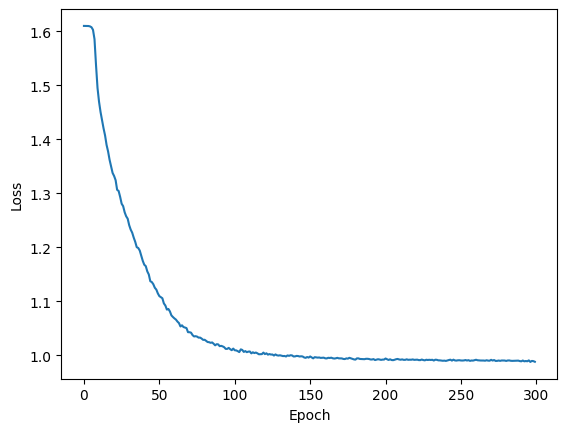

Test accuracy: 464.70236559139784
Accuracy: 0.4344086021505376
Precision: 0.4377228330354635
Recall: 0.433626289225706
F1-score: 0.43472772319760955


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       495
           1       0.40      0.34      0.37       472
           2       0.27      0.28      0.27       449
           3       0.33      0.37      0.35       463
           4       0.61      0.63      0.62       446

    accuracy                           0.43      2325
   macro avg       0.44      0.43      0.43      2325
weighted avg       0.44      0.43      0.44      2325

                    0           1           2           3           4  \
precision    0.590909    0.399504    0.265263    0.325095    0.607843   
recall       0.551515    0.341102    0.280624    0.369330    0.625561   
f1-score     0.570533    0.368000    0.272727    0.345804    0.616575   
support    495.000000  472.000000  449.000000

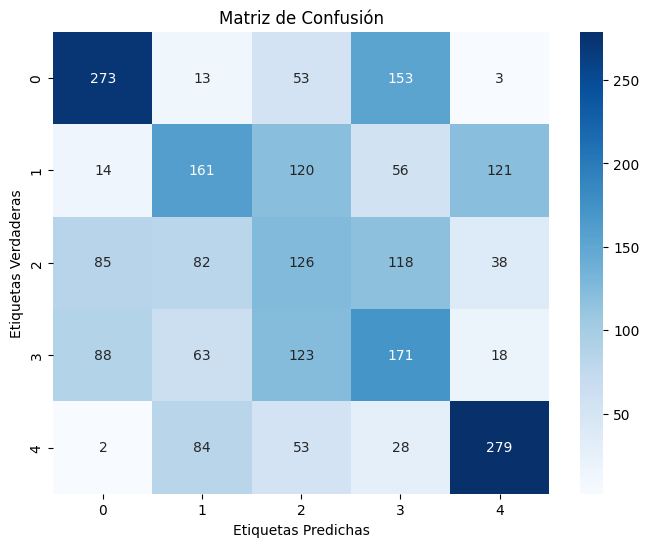

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_300_1e-05_0.3/resultados_300_1e-05_0.3.json
Procesando red con 500 epocas y 0.0001 de factor de aprendizaje y conjunto de entrenamiento 0.7


Procesando epocas:   0%|                                                             | 1/500 [00:42<5:50:27, 42.14s/it]

1.6083057922475479


Procesando epocas:   0%|▏                                                            | 2/500 [01:24<5:50:07, 42.18s/it]

1.5072006709435406


Procesando epocas:   1%|▎                                                            | 3/500 [02:06<5:49:40, 42.21s/it]

1.4075152621549718


Procesando epocas:   1%|▍                                                            | 4/500 [02:50<5:54:01, 42.83s/it]

1.340830786789165


Procesando epocas:   1%|▌                                                            | 5/500 [03:32<5:50:48, 42.52s/it]

1.2897727412336013


Procesando epocas:   1%|▋                                                            | 6/500 [04:14<5:48:09, 42.29s/it]

1.252585434212404


Procesando epocas:   1%|▊                                                            | 7/500 [04:55<5:45:34, 42.06s/it]

1.230577442926519


Procesando epocas:   2%|▉                                                            | 8/500 [05:37<5:44:54, 42.06s/it]

1.2118166944559883


Procesando epocas:   2%|█                                                            | 9/500 [06:21<5:47:27, 42.46s/it]

1.2019730252378127


Procesando epocas:   2%|█▏                                                          | 10/500 [07:04<5:50:09, 42.88s/it]

1.1839308310957517


Procesando epocas:   2%|█▎                                                          | 11/500 [07:47<5:48:06, 42.71s/it]

1.177832623790292


Procesando epocas:   2%|█▍                                                          | 12/500 [08:29<5:45:52, 42.53s/it]

1.1702717114897336


Procesando epocas:   3%|█▌                                                          | 13/500 [09:11<5:44:15, 42.41s/it]

1.1642701254171484


Procesando epocas:   3%|█▋                                                          | 14/500 [09:56<5:49:12, 43.11s/it]

1.1600366725641138


Procesando epocas:   3%|█▊                                                          | 15/500 [10:40<5:50:58, 43.42s/it]

1.142760005417992


Procesando epocas:   3%|█▉                                                          | 16/500 [11:23<5:49:46, 43.36s/it]

1.1267841896590065


Procesando epocas:   3%|██                                                          | 17/500 [12:03<5:39:56, 42.23s/it]

1.1189013579312492


Procesando epocas:   4%|██▏                                                         | 18/500 [12:45<5:38:47, 42.17s/it]

1.103028399804059


Procesando epocas:   4%|██▎                                                         | 19/500 [13:27<5:38:04, 42.17s/it]

1.0885741587947397


Procesando epocas:   4%|██▍                                                         | 20/500 [14:11<5:41:19, 42.67s/it]

1.0793919556281146


Procesando epocas:   4%|██▌                                                         | 21/500 [14:53<5:40:15, 42.62s/it]

1.066457849740982


Procesando epocas:   4%|██▋                                                         | 22/500 [15:38<5:43:28, 43.11s/it]

1.0570147682638729


Procesando epocas:   5%|██▊                                                         | 23/500 [16:20<5:40:50, 42.87s/it]

1.0525899431284735


Procesando epocas:   5%|██▉                                                         | 24/500 [17:02<5:38:48, 42.71s/it]

1.047731555560056


Procesando epocas:   5%|███                                                         | 25/500 [17:46<5:39:45, 42.92s/it]

1.0419242785257452


Procesando epocas:   5%|███                                                         | 26/500 [18:28<5:37:10, 42.68s/it]

1.0414178227677064


Procesando epocas:   5%|███▏                                                        | 27/500 [19:10<5:35:44, 42.59s/it]

1.0417821624699761


Procesando epocas:   6%|███▎                                                        | 28/500 [19:54<5:38:07, 42.98s/it]

1.0361853259451248


Procesando epocas:   6%|███▍                                                        | 29/500 [20:36<5:35:52, 42.79s/it]

1.0364598330329446


Procesando epocas:   6%|███▌                                                        | 30/500 [21:19<5:34:25, 42.69s/it]

1.0352378701462466


Procesando epocas:   6%|███▋                                                        | 31/500 [22:03<5:36:49, 43.09s/it]

1.0295798960854026


Procesando epocas:   6%|███▊                                                        | 32/500 [22:47<5:37:55, 43.32s/it]

1.0306079832946553


Procesando epocas:   7%|███▉                                                        | 33/500 [23:29<5:35:52, 43.15s/it]

1.0259262488168828


Procesando epocas:   7%|████                                                        | 34/500 [24:12<5:32:52, 42.86s/it]

1.0263256136108847


Procesando epocas:   7%|████▏                                                       | 35/500 [24:56<5:34:49, 43.20s/it]

1.0289630672510932


Procesando epocas:   7%|████▎                                                       | 36/500 [25:38<5:32:57, 43.05s/it]

1.0274290957871606


Procesando epocas:   7%|████▍                                                       | 37/500 [26:23<5:35:40, 43.50s/it]

1.0238091279478634


Procesando epocas:   8%|████▌                                                       | 38/500 [27:06<5:34:57, 43.50s/it]

1.0250686445656945


Procesando epocas:   8%|████▋                                                       | 39/500 [27:54<5:43:49, 44.75s/it]

1.0234620851628922


Procesando epocas:   8%|████▊                                                       | 40/500 [28:37<5:38:47, 44.19s/it]

1.0227860149215249


Procesando epocas:   8%|████▉                                                       | 41/500 [29:22<5:40:25, 44.50s/it]

1.0256025703514324


Procesando epocas:   8%|█████                                                       | 42/500 [30:07<5:40:01, 44.55s/it]

1.0218724860864528


Procesando epocas:   9%|█████▏                                                      | 43/500 [30:50<5:35:37, 44.06s/it]

1.027597003473955


Procesando epocas:   9%|█████▎                                                      | 44/500 [31:32<5:31:49, 43.66s/it]

1.0283826778916751


Procesando epocas:   9%|█████▍                                                      | 45/500 [32:16<5:31:39, 43.74s/it]

1.0234039082246669


Procesando epocas:   9%|█████▌                                                      | 46/500 [32:59<5:28:46, 43.45s/it]

1.0250999447177438


Procesando epocas:   9%|█████▋                                                      | 47/500 [33:42<5:26:29, 43.24s/it]

1.0246022483881783


Procesando epocas:  10%|█████▊                                                      | 48/500 [34:27<5:29:22, 43.72s/it]

1.0225542257813847


Procesando epocas:  10%|█████▉                                                      | 49/500 [35:11<5:30:07, 43.92s/it]

1.0211839156992295


Procesando epocas:  10%|██████                                                      | 50/500 [35:54<5:26:26, 43.52s/it]

1.0190793324919307


Procesando epocas:  10%|██████                                                      | 51/500 [36:38<5:27:36, 43.78s/it]

1.0165817225680631


Procesando epocas:  10%|██████▏                                                     | 52/500 [37:21<5:24:53, 43.51s/it]

1.0161792120512794


Procesando epocas:  11%|██████▎                                                     | 53/500 [38:04<5:22:20, 43.27s/it]

1.0166258079164168


Procesando epocas:  11%|██████▍                                                     | 54/500 [38:46<5:20:10, 43.07s/it]

1.014950476323857


Procesando epocas:  11%|██████▌                                                     | 55/500 [39:29<5:18:37, 42.96s/it]

1.0155969584689422


Procesando epocas:  11%|██████▋                                                     | 56/500 [40:12<5:16:55, 42.83s/it]

1.0129120963461258


Procesando epocas:  11%|██████▊                                                     | 57/500 [40:53<5:13:27, 42.45s/it]

1.012831678460626


Procesando epocas:  12%|██████▉                                                     | 58/500 [41:33<5:07:33, 41.75s/it]

1.0162723516716676


Procesando epocas:  12%|███████                                                     | 59/500 [42:15<5:06:29, 41.70s/it]

1.0204406296505648


Procesando epocas:  12%|███████▏                                                    | 60/500 [42:55<5:02:13, 41.21s/it]

1.0226414382457734


Procesando epocas:  12%|███████▎                                                    | 61/500 [43:35<4:59:23, 40.92s/it]

1.0179978798417484


Procesando epocas:  12%|███████▍                                                    | 62/500 [44:17<5:00:05, 41.11s/it]

1.0145614196272457


Procesando epocas:  13%|███████▌                                                    | 63/500 [44:57<4:56:50, 40.76s/it]

1.0142938245745265


Procesando epocas:  13%|███████▋                                                    | 64/500 [45:37<4:55:14, 40.63s/it]

1.0122691610280206


Procesando epocas:  13%|███████▊                                                    | 65/500 [46:19<4:57:18, 41.01s/it]

1.0136588373604942


Procesando epocas:  13%|███████▉                                                    | 66/500 [47:01<4:58:59, 41.34s/it]

1.0134690575739917


Procesando epocas:  13%|████████                                                    | 67/500 [47:41<4:55:07, 40.90s/it]

1.0132781936841853


Procesando epocas:  14%|████████▏                                                   | 68/500 [48:23<4:57:06, 41.26s/it]

1.0142171316287096


Procesando epocas:  14%|████████▎                                                   | 69/500 [49:03<4:54:12, 40.96s/it]

1.0111046580707326


Procesando epocas:  14%|████████▍                                                   | 70/500 [49:46<4:56:29, 41.37s/it]

1.0167083954109866


Procesando epocas:  14%|████████▌                                                   | 71/500 [50:30<5:02:16, 42.28s/it]

1.0148476916200975


Procesando epocas:  14%|████████▋                                                   | 72/500 [51:10<4:57:18, 41.68s/it]

1.013212749186684


Procesando epocas:  15%|████████▊                                                   | 73/500 [51:52<4:57:40, 41.83s/it]

1.0112025099642137


Procesando epocas:  15%|████████▉                                                   | 74/500 [52:32<4:53:21, 41.32s/it]

1.0139264106750487


Procesando epocas:  15%|█████████                                                   | 75/500 [53:15<4:54:23, 41.56s/it]

1.0156604826450348


Procesando epocas:  15%|█████████                                                   | 76/500 [53:59<5:00:01, 42.46s/it]

1.0132675847586463


Procesando epocas:  15%|█████████▏                                                  | 77/500 [54:44<5:04:03, 43.13s/it]

1.0117179488434511


Procesando epocas:  16%|█████████▎                                                  | 78/500 [55:29<5:06:49, 43.62s/it]

1.0105628458892597


Procesando epocas:  16%|█████████▍                                                  | 79/500 [56:13<5:07:28, 43.82s/it]

1.0104223346008974


Procesando epocas:  16%|█████████▌                                                  | 80/500 [56:56<5:05:33, 43.65s/it]

1.0102408637018765


Procesando epocas:  16%|█████████▋                                                  | 81/500 [57:41<5:07:18, 44.01s/it]

1.016488238993813


Procesando epocas:  16%|█████████▊                                                  | 82/500 [58:26<5:07:52, 44.19s/it]

1.01178078511182


Procesando epocas:  17%|█████████▉                                                  | 83/500 [59:10<5:07:25, 44.23s/it]

1.0179426897974575


Procesando epocas:  17%|██████████                                                  | 84/500 [59:53<5:04:18, 43.89s/it]

1.0137320395778207


Procesando epocas:  17%|█████████▊                                                | 85/500 [1:00:37<5:04:19, 44.00s/it]

1.0082912697511561


Procesando epocas:  17%|█████████▉                                                | 86/500 [1:01:20<5:01:56, 43.76s/it]

1.0053656848037944


Procesando epocas:  17%|██████████                                                | 87/500 [1:02:05<5:02:58, 44.02s/it]

1.0052485672866598


Procesando epocas:  18%|██████████▏                                               | 88/500 [1:02:44<4:50:55, 42.37s/it]

1.0058266408303205


Procesando epocas:  18%|██████████▎                                               | 89/500 [1:03:01<3:58:25, 34.81s/it]

1.004217950035544


Procesando epocas:  18%|██████████▍                                               | 90/500 [1:03:18<3:21:32, 29.49s/it]

1.0032069307916305


Procesando epocas:  18%|██████████▌                                               | 91/500 [1:03:35<2:55:31, 25.75s/it]

1.0048199888537912


Procesando epocas:  18%|██████████▋                                               | 92/500 [1:03:52<2:36:41, 23.04s/it]

1.000877205063315


Procesando epocas:  19%|██████████▊                                               | 93/500 [1:04:09<2:24:07, 21.25s/it]

1.001017070167205


Procesando epocas:  19%|██████████▉                                               | 94/500 [1:04:26<2:15:22, 20.01s/it]

1.000530546202379


Procesando epocas:  19%|███████████                                               | 95/500 [1:04:42<2:08:12, 18.99s/it]

1.0020341578651877


Procesando epocas:  19%|███████████▏                                              | 96/500 [1:04:59<2:02:54, 18.25s/it]

1.0058706150335424


Procesando epocas:  19%|███████████▎                                              | 97/500 [1:05:16<2:00:18, 17.91s/it]

1.0019648299497717


Procesando epocas:  20%|███████████▎                                              | 98/500 [1:05:33<1:58:25, 17.68s/it]

1.0028248951715582


Procesando epocas:  20%|███████████▍                                              | 99/500 [1:05:50<1:57:09, 17.53s/it]

1.0055861886809854


Procesando epocas:  20%|███████████▍                                             | 100/500 [1:06:07<1:55:57, 17.39s/it]

1.0083795252968284


Procesando epocas:  20%|███████████▌                                             | 101/500 [1:06:25<1:55:07, 17.31s/it]

1.0068852954051073


Procesando epocas:  20%|███████████▋                                             | 102/500 [1:06:42<1:54:21, 17.24s/it]

1.000556011760936


Procesando epocas:  21%|███████████▋                                             | 103/500 [1:06:59<1:53:51, 17.21s/it]

1.0010066495222203


Procesando epocas:  21%|███████████▊                                             | 104/500 [1:07:16<1:53:20, 17.17s/it]

0.9996150788138894


Procesando epocas:  21%|███████████▉                                             | 105/500 [1:07:33<1:52:47, 17.13s/it]

1.0009845926481136


Procesando epocas:  21%|████████████                                             | 106/500 [1:07:50<1:52:27, 17.12s/it]

0.9993589790428385


Procesando epocas:  21%|████████████▏                                            | 107/500 [1:08:07<1:52:03, 17.11s/it]

1.0013064700014451


Procesando epocas:  22%|████████████▎                                            | 108/500 [1:08:24<1:51:43, 17.10s/it]

0.9993027084013995


Procesando epocas:  22%|████████████▍                                            | 109/500 [1:08:41<1:51:31, 17.11s/it]

1.0009791924672968


Procesando epocas:  22%|████████████▌                                            | 110/500 [1:08:58<1:51:08, 17.10s/it]

1.0012006191646352


Procesando epocas:  22%|████████████▋                                            | 111/500 [1:09:16<1:51:02, 17.13s/it]

1.0043139022939345


Procesando epocas:  22%|████████████▊                                            | 112/500 [1:09:33<1:51:00, 17.17s/it]

1.003363616326276


Procesando epocas:  23%|████████████▉                                            | 113/500 [1:09:50<1:49:54, 17.04s/it]

1.000172382593155


Procesando epocas:  23%|████████████▉                                            | 114/500 [1:10:06<1:48:59, 16.94s/it]

0.9984790858100442


Procesando epocas:  23%|█████████████                                            | 115/500 [1:10:23<1:48:21, 16.89s/it]

0.9973168036516975


Procesando epocas:  23%|█████████████▏                                           | 116/500 [1:10:40<1:48:50, 17.01s/it]

0.997119356954799


Procesando epocas:  23%|█████████████▎                                           | 117/500 [1:10:58<1:48:52, 17.05s/it]

0.9967296758118798


Procesando epocas:  24%|█████████████▍                                           | 118/500 [1:11:15<1:48:53, 17.10s/it]

0.995199472062728


Procesando epocas:  24%|█████████████▌                                           | 119/500 [1:11:32<1:48:44, 17.12s/it]

0.9950799107551574


Procesando epocas:  24%|█████████████▋                                           | 120/500 [1:11:49<1:48:53, 17.19s/it]

0.9941760497934679


Procesando epocas:  24%|█████████████▊                                           | 121/500 [1:12:06<1:48:25, 17.16s/it]

0.9966050708995146


Procesando epocas:  24%|█████████████▉                                           | 122/500 [1:12:23<1:48:02, 17.15s/it]

0.994981083799811


Procesando epocas:  25%|██████████████                                           | 123/500 [1:12:41<1:47:54, 17.17s/it]

0.9971329468138078


Procesando epocas:  25%|██████████████▏                                          | 124/500 [1:12:58<1:47:41, 17.19s/it]

0.9978949704590966


Procesando epocas:  25%|██████████████▎                                          | 125/500 [1:13:15<1:47:23, 17.18s/it]

0.9951758167322944


Procesando epocas:  25%|██████████████▎                                          | 126/500 [1:13:32<1:47:04, 17.18s/it]

0.99338780781802


Procesando epocas:  25%|██████████████▍                                          | 127/500 [1:13:49<1:46:47, 17.18s/it]

0.9934829389347749


Procesando epocas:  26%|██████████████▌                                          | 128/500 [1:14:07<1:46:31, 17.18s/it]

0.9937832060982199


Procesando epocas:  26%|██████████████▋                                          | 129/500 [1:14:24<1:46:16, 17.19s/it]

0.9967363108606899


Procesando epocas:  26%|██████████████▊                                          | 130/500 [1:14:41<1:45:49, 17.16s/it]

0.9957728066865136


Procesando epocas:  26%|██████████████▉                                          | 131/500 [1:14:58<1:45:23, 17.14s/it]

0.9955220846568837


Procesando epocas:  26%|███████████████                                          | 132/500 [1:15:15<1:45:13, 17.16s/it]

0.9955873051110435


Procesando epocas:  27%|███████████████▏                                         | 133/500 [1:15:32<1:44:59, 17.17s/it]

0.9981768541476306


Procesando epocas:  27%|███████████████▎                                         | 134/500 [1:15:49<1:44:32, 17.14s/it]

0.9964514536016128


Procesando epocas:  27%|███████████████▍                                         | 135/500 [1:16:06<1:44:01, 17.10s/it]

0.9972012947587406


Procesando epocas:  27%|███████████████▌                                         | 136/500 [1:16:24<1:43:52, 17.12s/it]

0.9952013611793518


Procesando epocas:  27%|███████████████▌                                         | 137/500 [1:16:41<1:43:42, 17.14s/it]

0.9949265052290523


Procesando epocas:  28%|███████████████▋                                         | 138/500 [1:16:58<1:43:27, 17.15s/it]

0.9944002898300395


Procesando epocas:  28%|███████████████▊                                         | 139/500 [1:17:15<1:43:19, 17.17s/it]

0.9927853447549483


Procesando epocas:  28%|███████████████▉                                         | 140/500 [1:17:32<1:43:05, 17.18s/it]

0.9925836748936597


Procesando epocas:  28%|████████████████                                         | 141/500 [1:17:50<1:42:47, 17.18s/it]

0.9912983641904943


Procesando epocas:  28%|████████████████▏                                        | 142/500 [1:18:07<1:42:26, 17.17s/it]

0.9933328204295214


Procesando epocas:  29%|████████████████▎                                        | 143/500 [1:18:24<1:42:20, 17.20s/it]

0.995256574714885


Procesando epocas:  29%|████████████████▍                                        | 144/500 [1:18:41<1:42:01, 17.20s/it]

0.9967470379436717


Procesando epocas:  29%|████████████████▌                                        | 145/500 [1:18:58<1:41:44, 17.20s/it]

0.9963625196148368


Procesando epocas:  29%|████████████████▋                                        | 146/500 [1:19:16<1:41:39, 17.23s/it]

0.9939916817580953


Procesando epocas:  29%|████████████████▊                                        | 147/500 [1:19:33<1:41:05, 17.18s/it]

0.9944779683561886


Procesando epocas:  30%|████████████████▊                                        | 148/500 [1:19:50<1:40:37, 17.15s/it]

0.9913231776041143


Procesando epocas:  30%|████████████████▉                                        | 149/500 [1:20:07<1:40:31, 17.18s/it]

0.9932793413891512


Procesando epocas:  30%|█████████████████                                        | 150/500 [1:20:24<1:40:05, 17.16s/it]

0.9943364763961119


Procesando epocas:  30%|█████████████████▏                                       | 151/500 [1:20:41<1:39:43, 17.14s/it]

0.9938733381383559


Procesando epocas:  30%|█████████████████▎                                       | 152/500 [1:20:58<1:39:27, 17.15s/it]

0.9925795222029966


Procesando epocas:  31%|█████████████████▍                                       | 153/500 [1:21:16<1:38:58, 17.11s/it]

0.9956345831646639


Procesando epocas:  31%|█████████████████▌                                       | 154/500 [1:21:33<1:38:39, 17.11s/it]

0.9922782698098351


Procesando epocas:  31%|█████████████████▋                                       | 155/500 [1:21:50<1:38:25, 17.12s/it]

0.9917563066763037


Procesando epocas:  31%|█████████████████▊                                       | 156/500 [1:22:07<1:38:03, 17.10s/it]

0.9886643956689274


Procesando epocas:  31%|█████████████████▉                                       | 157/500 [1:22:24<1:37:43, 17.10s/it]

0.99041786719771


Procesando epocas:  32%|██████████████████                                       | 158/500 [1:22:41<1:37:15, 17.06s/it]

0.9905187911847059


Procesando epocas:  32%|██████████████████▏                                      | 159/500 [1:22:58<1:36:54, 17.05s/it]

0.9898587132201475


Procesando epocas:  32%|██████████████████▏                                      | 160/500 [1:23:15<1:36:50, 17.09s/it]

0.9939734914723565


Procesando epocas:  32%|██████████████████▎                                      | 161/500 [1:23:32<1:36:26, 17.07s/it]

0.9919427107362186


Procesando epocas:  32%|██████████████████▍                                      | 162/500 [1:23:49<1:36:02, 17.05s/it]

0.9894075200838202


Procesando epocas:  33%|██████████████████▌                                      | 163/500 [1:24:06<1:35:40, 17.04s/it]

0.9908681021017187


Procesando epocas:  33%|██████████████████▋                                      | 164/500 [1:24:23<1:35:25, 17.04s/it]

0.989011320997687


Procesando epocas:  33%|██████████████████▊                                      | 165/500 [1:24:40<1:35:06, 17.04s/it]

0.9873589207144344


Procesando epocas:  33%|██████████████████▉                                      | 166/500 [1:24:57<1:34:57, 17.06s/it]

0.988958514437956


Procesando epocas:  33%|███████████████████                                      | 167/500 [1:25:15<1:35:03, 17.13s/it]

0.9880278320873485


Procesando epocas:  34%|███████████████████▏                                     | 168/500 [1:25:32<1:34:55, 17.16s/it]

0.990116198273266


Procesando epocas:  34%|███████████████████▎                                     | 169/500 [1:25:49<1:34:30, 17.13s/it]

0.9870519494309145


Procesando epocas:  34%|███████████████████▍                                     | 170/500 [1:26:06<1:34:01, 17.09s/it]

0.9879628353259142


Procesando epocas:  34%|███████████████████▍                                     | 171/500 [1:26:23<1:33:33, 17.06s/it]

0.9858801712008084


Procesando epocas:  34%|███████████████████▌                                     | 172/500 [1:26:40<1:33:12, 17.05s/it]

0.9840810007908765


Procesando epocas:  35%|███████████████████▋                                     | 173/500 [1:26:57<1:33:03, 17.07s/it]

0.9863839773570791


Procesando epocas:  35%|███████████████████▊                                     | 174/500 [1:27:14<1:32:45, 17.07s/it]

0.9909182552029104


Procesando epocas:  35%|███████████████████▉                                     | 175/500 [1:27:31<1:32:23, 17.06s/it]

0.9891054763513453


Procesando epocas:  35%|████████████████████                                     | 176/500 [1:27:48<1:32:12, 17.08s/it]

0.9867900536340826


Procesando epocas:  35%|████████████████████▏                                    | 177/500 [1:28:05<1:31:50, 17.06s/it]

0.9871747805791743


Procesando epocas:  36%|████████████████████▎                                    | 178/500 [1:28:22<1:31:28, 17.05s/it]

0.9873959863887114


Procesando epocas:  36%|████████████████████▍                                    | 179/500 [1:28:39<1:31:07, 17.03s/it]

0.9868132777073804


Procesando epocas:  36%|████████████████████▌                                    | 180/500 [1:28:56<1:30:48, 17.03s/it]

0.9850366715122671


Procesando epocas:  36%|████████████████████▋                                    | 181/500 [1:29:13<1:30:39, 17.05s/it]

0.9858598845846512


Procesando epocas:  36%|████████████████████▋                                    | 182/500 [1:29:31<1:30:38, 17.10s/it]

0.9870219412971946


Procesando epocas:  37%|████████████████████▊                                    | 183/500 [1:29:48<1:30:21, 17.10s/it]

0.9882917979184319


Procesando epocas:  37%|████████████████████▉                                    | 184/500 [1:30:05<1:30:06, 17.11s/it]

0.9848691789542927


Procesando epocas:  37%|█████████████████████                                    | 185/500 [1:30:22<1:29:54, 17.13s/it]

0.9875084743780248


Procesando epocas:  37%|█████████████████████▏                                   | 186/500 [1:30:39<1:30:00, 17.20s/it]

0.9867009197964388


Procesando epocas:  37%|█████████████████████▎                                   | 187/500 [1:30:57<1:29:54, 17.23s/it]

0.9874764765010161


Procesando epocas:  38%|█████████████████████▍                                   | 188/500 [1:31:14<1:29:22, 17.19s/it]

0.9838728662799386


Procesando epocas:  38%|█████████████████████▌                                   | 189/500 [1:31:31<1:28:50, 17.14s/it]

0.9847875973757576


Procesando epocas:  38%|█████████████████████▋                                   | 190/500 [1:31:48<1:28:26, 17.12s/it]

0.984624185632257


Procesando epocas:  38%|█████████████████████▊                                   | 191/500 [1:32:05<1:27:58, 17.08s/it]

0.9871648911167593


Procesando epocas:  38%|█████████████████████▉                                   | 192/500 [1:32:22<1:27:26, 17.03s/it]

0.983529220609104


Procesando epocas:  39%|██████████████████████                                   | 193/500 [1:32:39<1:26:51, 16.98s/it]

0.9831113794270684


Procesando epocas:  39%|██████████████████████                                   | 194/500 [1:32:56<1:26:30, 16.96s/it]

0.9844287532217363


Procesando epocas:  39%|██████████████████████▏                                  | 195/500 [1:33:12<1:26:07, 16.94s/it]

0.9872460382826188


Procesando epocas:  39%|██████████████████████▎                                  | 196/500 [1:33:29<1:25:45, 16.93s/it]

0.9820037592859829


Procesando epocas:  39%|██████████████████████▍                                  | 197/500 [1:33:46<1:25:41, 16.97s/it]

0.9821055300095503


Procesando epocas:  40%|██████████████████████▌                                  | 198/500 [1:34:03<1:25:25, 16.97s/it]

0.9842219612177681


Procesando epocas:  40%|██████████████████████▋                                  | 199/500 [1:34:20<1:25:08, 16.97s/it]

0.9871438846868628


Procesando epocas:  40%|██████████████████████▊                                  | 200/500 [1:34:37<1:24:56, 16.99s/it]

0.983815930520787


Procesando epocas:  40%|██████████████████████▉                                  | 201/500 [1:34:54<1:24:39, 16.99s/it]

0.9844826975289513


Procesando epocas:  40%|███████████████████████                                  | 202/500 [1:35:11<1:24:23, 16.99s/it]

0.9844294327146866


Procesando epocas:  41%|███████████████████████▏                                 | 203/500 [1:35:28<1:23:59, 16.97s/it]

0.9863154281588161


Procesando epocas:  41%|███████████████████████▎                                 | 204/500 [1:35:45<1:23:50, 17.00s/it]

0.9867340890800251


Procesando epocas:  41%|███████████████████████▎                                 | 205/500 [1:36:02<1:23:36, 17.01s/it]

0.9872096394791322


Procesando epocas:  41%|███████████████████████▍                                 | 206/500 [1:36:19<1:23:20, 17.01s/it]

0.9867564513402827


Procesando epocas:  41%|███████████████████████▌                                 | 207/500 [1:36:36<1:23:05, 17.01s/it]

0.9881375575766844


Procesando epocas:  42%|███████████████████████▋                                 | 208/500 [1:36:54<1:23:04, 17.07s/it]

0.9859234806369332


Procesando epocas:  42%|███████████████████████▊                                 | 209/500 [1:37:11<1:22:41, 17.05s/it]

0.9858252988142125


Procesando epocas:  42%|███████████████████████▉                                 | 210/500 [1:37:28<1:22:26, 17.06s/it]

0.9846763176076553


Procesando epocas:  42%|████████████████████████                                 | 211/500 [1:37:45<1:22:13, 17.07s/it]

0.9833358971511617


Procesando epocas:  42%|████████████████████████▏                                | 212/500 [1:38:02<1:21:50, 17.05s/it]

0.9809893138268415


Procesando epocas:  43%|████████████████████████▎                                | 213/500 [1:38:19<1:21:37, 17.07s/it]

0.9815313184962553


Procesando epocas:  43%|████████████████████████▍                                | 214/500 [1:38:36<1:21:14, 17.05s/it]

0.9817268939579235


Procesando epocas:  43%|████████████████████████▌                                | 215/500 [1:38:53<1:20:51, 17.02s/it]

0.9805161153568941


Procesando epocas:  43%|████████████████████████▌                                | 216/500 [1:39:10<1:20:37, 17.03s/it]

0.9815187555902144


Procesando epocas:  43%|████████████████████████▋                                | 217/500 [1:39:27<1:20:26, 17.05s/it]

0.9809235621901119


Procesando epocas:  44%|████████████████████████▊                                | 218/500 [1:39:44<1:20:14, 17.07s/it]

0.9798959858277265


Procesando epocas:  44%|████████████████████████▉                                | 219/500 [1:40:01<1:20:02, 17.09s/it]

0.9798417778576122


Procesando epocas:  44%|█████████████████████████                                | 220/500 [1:40:18<1:19:37, 17.06s/it]

0.9795761767555685


Procesando epocas:  44%|█████████████████████████▏                               | 221/500 [1:40:35<1:19:24, 17.08s/it]

0.9792496379683999


Procesando epocas:  44%|█████████████████████████▎                               | 222/500 [1:40:53<1:19:21, 17.13s/it]

0.9794472894247841


Procesando epocas:  45%|█████████████████████████▍                               | 223/500 [1:41:10<1:19:00, 17.11s/it]

0.9822037300642799


Procesando epocas:  45%|█████████████████████████▌                               | 224/500 [1:41:27<1:18:40, 17.10s/it]

0.9881956373944002


Procesando epocas:  45%|█████████████████████████▋                               | 225/500 [1:41:44<1:18:25, 17.11s/it]

0.9818545544848722


Procesando epocas:  45%|█████████████████████████▊                               | 226/500 [1:42:01<1:18:12, 17.13s/it]

0.9820317478740916


Procesando epocas:  45%|█████████████████████████▉                               | 227/500 [1:42:18<1:17:43, 17.08s/it]

0.982737742802676


Procesando epocas:  46%|█████████████████████████▉                               | 228/500 [1:42:35<1:17:32, 17.10s/it]

0.9836945737109465


Procesando epocas:  46%|██████████████████████████                               | 229/500 [1:42:52<1:17:07, 17.08s/it]

0.9830881262526793


Procesando epocas:  46%|██████████████████████████▏                              | 230/500 [1:43:09<1:17:03, 17.12s/it]

0.9820801580653471


Procesando epocas:  46%|██████████████████████████▎                              | 231/500 [1:43:27<1:16:40, 17.10s/it]

0.9822375062633963


Procesando epocas:  46%|██████████████████████████▍                              | 232/500 [1:43:43<1:16:09, 17.05s/it]

0.9822158336639404


Procesando epocas:  47%|██████████████████████████▌                              | 233/500 [1:44:00<1:15:46, 17.03s/it]

0.9828292096362394


Procesando epocas:  47%|██████████████████████████▋                              | 234/500 [1:44:17<1:15:29, 17.03s/it]

0.981936462837107


Procesando epocas:  47%|██████████████████████████▊                              | 235/500 [1:44:35<1:15:15, 17.04s/it]

0.9816201616736019


Procesando epocas:  47%|██████████████████████████▉                              | 236/500 [1:44:52<1:14:53, 17.02s/it]

0.9848804684246287


Procesando epocas:  47%|███████████████████████████                              | 237/500 [1:45:08<1:14:31, 17.00s/it]

0.9858031984637765


Procesando epocas:  48%|███████████████████████████▏                             | 238/500 [1:45:26<1:14:23, 17.04s/it]

0.980044860348982


Procesando epocas:  48%|███████████████████████████▏                             | 239/500 [1:45:43<1:14:19, 17.09s/it]

0.9852136909961701


Procesando epocas:  48%|███████████████████████████▎                             | 240/500 [1:46:00<1:14:14, 17.13s/it]

0.98274025461253


Procesando epocas:  48%|███████████████████████████▍                             | 241/500 [1:46:17<1:14:03, 17.16s/it]

0.9800967304145589


Procesando epocas:  48%|███████████████████████████▌                             | 242/500 [1:46:34<1:13:42, 17.14s/it]

0.9808609198121464


Procesando epocas:  49%|███████████████████████████▋                             | 243/500 [1:46:51<1:13:05, 17.06s/it]

0.9806101188940161


Procesando epocas:  49%|███████████████████████████▊                             | 244/500 [1:47:08<1:12:39, 17.03s/it]

0.9814360348617329


Procesando epocas:  49%|███████████████████████████▉                             | 245/500 [1:47:25<1:12:17, 17.01s/it]

0.9836632977513706


Procesando epocas:  49%|████████████████████████████                             | 246/500 [1:47:42<1:11:56, 16.99s/it]

0.9803976437624763


Procesando epocas:  49%|████████████████████████████▏                            | 247/500 [1:47:59<1:11:40, 17.00s/it]

0.9806810365003698


Procesando epocas:  50%|████████████████████████████▎                            | 248/500 [1:48:16<1:11:14, 16.96s/it]

0.9781601411454818


Procesando epocas:  50%|████████████████████████████▍                            | 249/500 [1:48:33<1:10:55, 16.95s/it]

0.9807597682756536


Procesando epocas:  50%|████████████████████████████▌                            | 250/500 [1:48:50<1:10:56, 17.02s/it]

0.9793069878045251


Procesando epocas:  50%|████████████████████████████▌                            | 251/500 [1:49:07<1:10:12, 16.92s/it]

0.9804514909491819


Procesando epocas:  50%|████████████████████████████▋                            | 252/500 [1:49:24<1:10:08, 16.97s/it]

0.9782354281229131


Procesando epocas:  51%|████████████████████████████▊                            | 253/500 [1:49:41<1:10:00, 17.01s/it]

0.9817063804935007


Procesando epocas:  51%|████████████████████████████▉                            | 254/500 [1:49:58<1:09:29, 16.95s/it]

0.978958577969495


Procesando epocas:  51%|█████████████████████████████                            | 255/500 [1:50:15<1:09:13, 16.95s/it]

0.9778796455439399


Procesando epocas:  51%|█████████████████████████████▏                           | 256/500 [1:50:32<1:08:54, 16.94s/it]

0.9776475531213423


Procesando epocas:  51%|█████████████████████████████▎                           | 257/500 [1:50:49<1:08:43, 16.97s/it]

0.9787899788688211


Procesando epocas:  52%|█████████████████████████████▍                           | 258/500 [1:51:06<1:08:33, 17.00s/it]

0.979115650583716


Procesando epocas:  52%|█████████████████████████████▌                           | 259/500 [1:51:23<1:08:18, 17.00s/it]

0.9783529846107258


Procesando epocas:  52%|█████████████████████████████▋                           | 260/500 [1:51:40<1:07:54, 16.98s/it]

0.9783552860512453


Procesando epocas:  52%|█████████████████████████████▊                           | 261/500 [1:51:57<1:07:49, 17.03s/it]

0.9777390129425947


Procesando epocas:  52%|█████████████████████████████▊                           | 262/500 [1:52:14<1:07:33, 17.03s/it]

0.9785356707432691


Procesando epocas:  53%|█████████████████████████████▉                           | 263/500 [1:52:31<1:07:15, 17.03s/it]

0.9798883438110352


Procesando epocas:  53%|██████████████████████████████                           | 264/500 [1:52:48<1:07:02, 17.05s/it]

0.9805458854226505


Procesando epocas:  53%|██████████████████████████████▏                          | 265/500 [1:53:05<1:06:29, 16.98s/it]

0.9786528131541083


Procesando epocas:  53%|██████████████████████████████▎                          | 266/500 [1:53:22<1:06:20, 17.01s/it]

0.980484856226865


Procesando epocas:  53%|██████████████████████████████▍                          | 267/500 [1:53:39<1:06:06, 17.02s/it]

0.9804947660249822


Procesando epocas:  54%|██████████████████████████████▌                          | 268/500 [1:53:56<1:06:05, 17.09s/it]

0.9809347647077897


Procesando epocas:  54%|██████████████████████████████▋                          | 269/500 [1:54:13<1:05:42, 17.07s/it]

0.9810595158268424


Procesando epocas:  54%|██████████████████████████████▊                          | 270/500 [1:54:30<1:05:22, 17.06s/it]

0.9791197349043453


Procesando epocas:  54%|██████████████████████████████▉                          | 271/500 [1:54:47<1:05:07, 17.06s/it]

0.980441253676134


Procesando epocas:  54%|███████████████████████████████                          | 272/500 [1:55:05<1:05:01, 17.11s/it]

0.9795230066075045


Procesando epocas:  55%|███████████████████████████████                          | 273/500 [1:55:22<1:04:48, 17.13s/it]

0.9814865540055667


Procesando epocas:  55%|███████████████████████████████▏                         | 274/500 [1:55:39<1:04:22, 17.09s/it]

0.9815433768665089


Procesando epocas:  55%|███████████████████████████████▎                         | 275/500 [1:55:56<1:04:00, 17.07s/it]

0.9819616254638223


Procesando epocas:  55%|███████████████████████████████▍                         | 276/500 [1:56:13<1:03:45, 17.08s/it]

0.981177260945825


Procesando epocas:  55%|███████████████████████████████▌                         | 277/500 [1:56:30<1:03:20, 17.04s/it]

0.9829423213706298


Procesando epocas:  56%|███████████████████████████████▋                         | 278/500 [1:56:47<1:02:58, 17.02s/it]

0.9801688572939704


Procesando epocas:  56%|███████████████████████████████▊                         | 279/500 [1:57:03<1:02:09, 16.87s/it]

0.9783589314011967


Procesando epocas:  56%|███████████████████████████████▉                         | 280/500 [1:57:20<1:01:24, 16.75s/it]

0.9801115088603076


Procesando epocas:  56%|████████████████████████████████                         | 281/500 [1:57:36<1:00:43, 16.64s/it]

0.9803556207348318


Procesando epocas:  56%|████████████████████████████████▏                        | 282/500 [1:57:53<1:00:14, 16.58s/it]

0.9799392879009247


Procesando epocas:  57%|█████████████████████████████████▍                         | 283/500 [1:58:09<59:46, 16.53s/it]

0.9775455173324136


Procesando epocas:  57%|█████████████████████████████████▌                         | 284/500 [1:58:25<59:21, 16.49s/it]

0.9766643212122076


Procesando epocas:  57%|█████████████████████████████████▋                         | 285/500 [1:58:42<59:03, 16.48s/it]

0.9775813123759102


Procesando epocas:  57%|█████████████████████████████████▋                         | 286/500 [1:58:58<58:41, 16.46s/it]

0.9768298391033622


Procesando epocas:  57%|█████████████████████████████████▊                         | 287/500 [1:59:15<58:22, 16.44s/it]

0.9782286984079024


Procesando epocas:  58%|█████████████████████████████████▉                         | 288/500 [1:59:31<58:11, 16.47s/it]

0.9783137419644524


Procesando epocas:  58%|██████████████████████████████████                         | 289/500 [1:59:48<58:12, 16.55s/it]

0.9801167183062609


Procesando epocas:  58%|██████████████████████████████████▏                        | 290/500 [2:00:04<57:48, 16.52s/it]

0.9800306442905875


Procesando epocas:  58%|██████████████████████████████████▎                        | 291/500 [2:00:21<57:46, 16.59s/it]

0.9798607416012708


Procesando epocas:  58%|██████████████████████████████████▍                        | 292/500 [2:00:37<57:18, 16.53s/it]

0.978509881215937


Procesando epocas:  59%|██████████████████████████████████▌                        | 293/500 [2:00:54<56:52, 16.48s/it]

0.977785861492157


Procesando epocas:  59%|██████████████████████████████████▋                        | 294/500 [2:01:10<56:32, 16.47s/it]

0.9791866909055149


Procesando epocas:  59%|██████████████████████████████████▊                        | 295/500 [2:01:27<56:11, 16.45s/it]

0.9807627975940705


Procesando epocas:  59%|██████████████████████████████████▉                        | 296/500 [2:01:43<55:51, 16.43s/it]

0.9848909746198093


Procesando epocas:  59%|███████████████████████████████████                        | 297/500 [2:01:59<55:33, 16.42s/it]

0.9793243243413813


Procesando epocas:  60%|███████████████████████████████████▏                       | 298/500 [2:02:16<55:15, 16.41s/it]

0.9799771284355837


Procesando epocas:  60%|███████████████████████████████████▎                       | 299/500 [2:02:32<54:58, 16.41s/it]

0.9814784267369439


Procesando epocas:  60%|███████████████████████████████████▍                       | 300/500 [2:02:49<54:39, 16.40s/it]

0.9805038206717547


Procesando epocas:  60%|███████████████████████████████████▌                       | 301/500 [2:03:05<54:22, 16.40s/it]

0.9895875338245841


Procesando epocas:  60%|███████████████████████████████████▋                       | 302/500 [2:03:21<54:07, 16.40s/it]

0.9868055894094355


Procesando epocas:  61%|███████████████████████████████████▊                       | 303/500 [2:03:38<53:52, 16.41s/it]

0.9834564324687509


Procesando epocas:  61%|███████████████████████████████████▊                       | 304/500 [2:03:54<53:42, 16.44s/it]

0.9792815092731925


Procesando epocas:  61%|███████████████████████████████████▉                       | 305/500 [2:04:11<53:23, 16.43s/it]

0.9796194328981287


Procesando epocas:  61%|████████████████████████████████████                       | 306/500 [2:04:27<53:03, 16.41s/it]

0.9811355359414045


Procesando epocas:  61%|████████████████████████████████████▏                      | 307/500 [2:04:44<52:43, 16.39s/it]

0.9785121889675364


Procesando epocas:  62%|████████████████████████████████████▎                      | 308/500 [2:05:00<52:23, 16.37s/it]

0.9781073131982018


Procesando epocas:  62%|████████████████████████████████████▍                      | 309/500 [2:05:16<52:06, 16.37s/it]

0.9764380686423357


Procesando epocas:  62%|████████████████████████████████████▌                      | 310/500 [2:05:33<51:53, 16.38s/it]

0.9754971595371471


Procesando epocas:  62%|████████████████████████████████████▋                      | 311/500 [2:05:49<51:44, 16.43s/it]

0.9764462155454299


Procesando epocas:  62%|████████████████████████████████████▊                      | 312/500 [2:06:06<51:23, 16.40s/it]

0.9761887823834139


Procesando epocas:  63%|████████████████████████████████████▉                      | 313/500 [2:06:22<51:04, 16.39s/it]

0.9750622630119323


Procesando epocas:  63%|█████████████████████████████████████                      | 314/500 [2:06:38<50:44, 16.37s/it]

0.9742683144176707


Procesando epocas:  63%|█████████████████████████████████████▏                     | 315/500 [2:06:54<50:25, 16.35s/it]

0.9752200796323665


Procesando epocas:  63%|█████████████████████████████████████▎                     | 316/500 [2:07:11<50:07, 16.34s/it]

0.9765921284170712


Procesando epocas:  63%|█████████████████████████████████████▍                     | 317/500 [2:07:27<49:50, 16.34s/it]

0.9738820486208972


Procesando epocas:  64%|█████████████████████████████████████▌                     | 318/500 [2:07:44<49:38, 16.37s/it]

0.9752011334194857


Procesando epocas:  64%|█████████████████████████████████████▋                     | 319/500 [2:08:00<49:23, 16.37s/it]

0.9761760308462031


Procesando epocas:  64%|█████████████████████████████████████▊                     | 320/500 [2:08:16<49:08, 16.38s/it]

0.9741975608993979


Procesando epocas:  64%|█████████████████████████████████████▉                     | 321/500 [2:08:33<49:02, 16.44s/it]

0.9753807393943562


Procesando epocas:  64%|█████████████████████████████████████▉                     | 322/500 [2:08:49<48:47, 16.45s/it]

0.9744161910870496


Procesando epocas:  65%|██████████████████████████████████████                     | 323/500 [2:09:06<48:25, 16.42s/it]

0.974599917495952


Procesando epocas:  65%|██████████████████████████████████████▏                    | 324/500 [2:09:22<48:20, 16.48s/it]

0.9740785661865683


Procesando epocas:  65%|██████████████████████████████████████▎                    | 325/500 [2:09:39<48:28, 16.62s/it]

0.9735070109367371


Procesando epocas:  65%|██████████████████████████████████████▍                    | 326/500 [2:09:56<48:13, 16.63s/it]

0.9744186019196229


Procesando epocas:  65%|██████████████████████████████████████▌                    | 327/500 [2:10:13<47:59, 16.65s/it]

0.9758708722451154


Procesando epocas:  66%|██████████████████████████████████████▋                    | 328/500 [2:10:29<47:32, 16.58s/it]

0.9814679303589989


Procesando epocas:  66%|██████████████████████████████████████▊                    | 329/500 [2:10:45<47:03, 16.51s/it]

0.9842324106132283


Procesando epocas:  66%|██████████████████████████████████████▉                    | 330/500 [2:11:02<47:05, 16.62s/it]

0.9762718186658972


Procesando epocas:  66%|███████████████████████████████████████                    | 331/500 [2:11:19<46:45, 16.60s/it]

0.9768177642541773


Procesando epocas:  66%|███████████████████████████████████████▏                   | 332/500 [2:11:35<46:21, 16.56s/it]

0.9760868090040543


Procesando epocas:  67%|███████████████████████████████████████▎                   | 333/500 [2:11:52<45:58, 16.52s/it]

0.9759645928354824


Procesando epocas:  67%|███████████████████████████████████████▍                   | 334/500 [2:12:08<45:36, 16.48s/it]

0.9755130585502175


Procesando epocas:  67%|███████████████████████████████████████▌                   | 335/500 [2:12:25<45:14, 16.45s/it]

0.9768813049092012


Procesando epocas:  67%|███████████████████████████████████████▋                   | 336/500 [2:12:41<44:55, 16.44s/it]

0.9775407349362093


Procesando epocas:  67%|███████████████████████████████████████▊                   | 337/500 [2:12:57<44:37, 16.43s/it]

0.9760301895001355


Procesando epocas:  68%|███████████████████████████████████████▉                   | 338/500 [2:13:14<44:21, 16.43s/it]

0.9759397569824667


Procesando epocas:  68%|████████████████████████████████████████                   | 339/500 [2:13:30<44:04, 16.42s/it]

0.9760324050398433


Procesando epocas:  68%|████████████████████████████████████████                   | 340/500 [2:13:47<43:53, 16.46s/it]

0.9756272743729985


Procesando epocas:  68%|████████████████████████████████████████▏                  | 341/500 [2:14:03<43:37, 16.46s/it]

0.9785470278824077


Procesando epocas:  68%|████████████████████████████████████████▎                  | 342/500 [2:14:20<43:20, 16.46s/it]

0.9775304692633012


Procesando epocas:  69%|████████████████████████████████████████▍                  | 343/500 [2:14:36<43:03, 16.46s/it]

0.9743838986929725


Procesando epocas:  69%|████████████████████████████████████████▌                  | 344/500 [2:14:53<42:45, 16.44s/it]

0.9749410744975595


Procesando epocas:  69%|████████████████████████████████████████▋                  | 345/500 [2:15:09<42:24, 16.41s/it]

0.9744300540755777


Procesando epocas:  69%|████████████████████████████████████████▊                  | 346/500 [2:15:25<42:08, 16.42s/it]

0.9763369486612432


Procesando epocas:  69%|████████████████████████████████████████▉                  | 347/500 [2:15:42<41:54, 16.43s/it]

0.9752494924208697


Procesando epocas:  70%|█████████████████████████████████████████                  | 348/500 [2:15:58<41:40, 16.45s/it]

0.973195636623046


Procesando epocas:  70%|█████████████████████████████████████████▏                 | 349/500 [2:16:15<41:23, 16.45s/it]

0.9737131865585551


Procesando epocas:  70%|█████████████████████████████████████████▎                 | 350/500 [2:16:31<41:08, 16.45s/it]

0.9729029041879317


Procesando epocas:  70%|█████████████████████████████████████████▍                 | 351/500 [2:16:48<41:08, 16.56s/it]

0.9799485350356383


Procesando epocas:  70%|█████████████████████████████████████████▌                 | 352/500 [2:17:05<40:53, 16.58s/it]

0.9727646480588352


Procesando epocas:  71%|█████████████████████████████████████████▋                 | 353/500 [2:17:21<40:31, 16.54s/it]

0.9750996754449957


Procesando epocas:  71%|█████████████████████████████████████████▊                 | 354/500 [2:17:37<40:10, 16.51s/it]

0.9725837413002463


Procesando epocas:  71%|█████████████████████████████████████████▉                 | 355/500 [2:17:54<39:49, 16.48s/it]

0.9748390355530907


Procesando epocas:  71%|██████████████████████████████████████████                 | 356/500 [2:18:11<39:55, 16.63s/it]

0.9752282717648675


Procesando epocas:  71%|██████████████████████████████████████████▏                | 357/500 [2:18:28<39:48, 16.70s/it]

0.9743317712755765


Procesando epocas:  72%|██████████████████████████████████████████▏                | 358/500 [2:18:44<39:33, 16.71s/it]

0.9732035139027764


Procesando epocas:  72%|██████████████████████████████████████████▎                | 359/500 [2:19:01<39:16, 16.72s/it]

0.9734007404131048


Procesando epocas:  72%|██████████████████████████████████████████▍                | 360/500 [2:19:18<39:00, 16.72s/it]

0.973833868784063


Procesando epocas:  72%|██████████████████████████████████████████▌                | 361/500 [2:19:35<38:46, 16.74s/it]

0.9727390233208152


Procesando epocas:  72%|██████████████████████████████████████████▋                | 362/500 [2:19:51<38:29, 16.74s/it]

0.9719389943515553


Procesando epocas:  73%|██████████████████████████████████████████▊                | 363/500 [2:20:08<38:13, 16.74s/it]

0.9732882738113403


Procesando epocas:  73%|██████████████████████████████████████████▉                | 364/500 [2:20:25<37:56, 16.74s/it]

0.9741748553865096


Procesando epocas:  73%|███████████████████████████████████████████                | 365/500 [2:20:42<37:38, 16.73s/it]

0.9720278610201443


Procesando epocas:  73%|███████████████████████████████████████████▏               | 366/500 [2:20:58<37:21, 16.73s/it]

0.9756413635085611


Procesando epocas:  73%|███████████████████████████████████████████▎               | 367/500 [2:21:15<37:05, 16.73s/it]

0.9722485405557296


Procesando epocas:  74%|███████████████████████████████████████████▍               | 368/500 [2:21:32<36:49, 16.74s/it]

0.9748332153348361


Procesando epocas:  74%|███████████████████████████████████████████▌               | 369/500 [2:21:49<36:33, 16.75s/it]

0.9735885336118586


Procesando epocas:  74%|███████████████████████████████████████████▋               | 370/500 [2:22:05<36:17, 16.75s/it]

0.9741492267917184


Procesando epocas:  74%|███████████████████████████████████████████▊               | 371/500 [2:22:22<36:04, 16.78s/it]

0.973073014091043


Procesando epocas:  74%|███████████████████████████████████████████▉               | 372/500 [2:22:39<35:55, 16.84s/it]

0.9763843915041756


Procesando epocas:  75%|████████████████████████████████████████████               | 373/500 [2:22:57<35:56, 16.98s/it]

0.976227401635226


Procesando epocas:  75%|████████████████████████████████████████████▏              | 374/500 [2:23:14<36:00, 17.15s/it]

0.9780247253530165


Procesando epocas:  75%|████████████████████████████████████████████▎              | 375/500 [2:23:31<35:30, 17.05s/it]

0.9749622443143059


Procesando epocas:  75%|████████████████████████████████████████████▎              | 376/500 [2:23:48<35:21, 17.11s/it]

0.9740492971504435


Procesando epocas:  75%|████████████████████████████████████████████▍              | 377/500 [2:24:05<35:01, 17.08s/it]

0.9751455867991728


Procesando epocas:  76%|████████████████████████████████████████████▌              | 378/500 [2:24:22<34:52, 17.15s/it]

0.9756593248423409


Procesando epocas:  76%|████████████████████████████████████████████▋              | 379/500 [2:24:40<34:46, 17.24s/it]

0.9748873345992144


Procesando epocas:  76%|████████████████████████████████████████████▊              | 380/500 [2:24:57<34:13, 17.11s/it]

0.9750170157236211


Procesando epocas:  76%|████████████████████████████████████████████▉              | 381/500 [2:25:14<33:46, 17.03s/it]

0.9757596520816578


Procesando epocas:  76%|█████████████████████████████████████████████              | 382/500 [2:25:31<33:29, 17.03s/it]

0.9749224284115959


Procesando epocas:  77%|█████████████████████████████████████████████▏             | 383/500 [2:25:47<33:03, 16.95s/it]

0.9746503384674297


Procesando epocas:  77%|█████████████████████████████████████████████▎             | 384/500 [2:26:04<32:41, 16.91s/it]

0.975167202949524


Procesando epocas:  77%|█████████████████████████████████████████████▍             | 385/500 [2:26:21<32:22, 16.89s/it]

0.9748360493603875


Procesando epocas:  77%|█████████████████████████████████████████████▌             | 386/500 [2:26:38<32:10, 16.94s/it]

0.9746301447643954


Procesando epocas:  77%|█████████████████████████████████████████████▋             | 387/500 [2:26:55<31:53, 16.93s/it]

0.9740157919771532


Procesando epocas:  78%|█████████████████████████████████████████████▊             | 388/500 [2:27:11<31:20, 16.79s/it]

0.9761830477153554


Procesando epocas:  78%|█████████████████████████████████████████████▉             | 389/500 [2:27:28<31:10, 16.85s/it]

0.9749877877095167


Procesando epocas:  78%|██████████████████████████████████████████████             | 390/500 [2:27:46<31:03, 16.94s/it]

0.9733218277201933


Procesando epocas:  78%|██████████████████████████████████████████████▏            | 391/500 [2:28:02<30:38, 16.87s/it]

0.9741460365407607


Procesando epocas:  78%|██████████████████████████████████████████████▎            | 392/500 [2:28:19<30:17, 16.83s/it]

0.9739636877003838


Procesando epocas:  79%|██████████████████████████████████████████████▎            | 393/500 [2:28:36<29:55, 16.78s/it]

0.9736907138543971


Procesando epocas:  79%|██████████████████████████████████████████████▍            | 394/500 [2:28:52<29:35, 16.75s/it]

0.9733846447047065


Procesando epocas:  79%|██████████████████████████████████████████████▌            | 395/500 [2:29:09<29:17, 16.74s/it]

0.9732761495253619


Procesando epocas:  79%|██████████████████████████████████████████████▋            | 396/500 [2:29:26<28:58, 16.72s/it]

0.9721556740648606


Procesando epocas:  79%|██████████████████████████████████████████████▊            | 397/500 [2:29:42<28:41, 16.71s/it]

0.9740038784111247


Procesando epocas:  80%|██████████████████████████████████████████████▉            | 398/500 [2:29:59<28:23, 16.70s/it]

0.9748085909030016


Procesando epocas:  80%|███████████████████████████████████████████████            | 399/500 [2:30:16<28:07, 16.71s/it]

0.9731219645808725


Procesando epocas:  80%|███████████████████████████████████████████████▏           | 400/500 [2:30:33<27:50, 16.71s/it]

0.9726446656619802


Procesando epocas:  80%|███████████████████████████████████████████████▎           | 401/500 [2:30:49<27:33, 16.70s/it]

0.9721358025775236


Procesando epocas:  80%|███████████████████████████████████████████████▍           | 402/500 [2:31:06<27:15, 16.69s/it]

0.974763520675547


Procesando epocas:  81%|███████████████████████████████████████████████▌           | 403/500 [2:31:23<26:58, 16.69s/it]

0.976591088140712


Procesando epocas:  81%|███████████████████████████████████████████████▋           | 404/500 [2:31:39<26:40, 16.67s/it]

0.9766796841340907


Procesando epocas:  81%|███████████████████████████████████████████████▊           | 405/500 [2:31:56<26:23, 16.67s/it]

0.9764410537831923


Procesando epocas:  81%|███████████████████████████████████████████████▉           | 406/500 [2:32:13<26:07, 16.67s/it]

0.9739060142460991


Procesando epocas:  81%|████████████████████████████████████████████████           | 407/500 [2:32:29<25:51, 16.68s/it]

0.9760927754289964


Procesando epocas:  82%|████████████████████████████████████████████████▏          | 408/500 [2:32:46<25:34, 16.68s/it]

0.9776294000008527


Procesando epocas:  82%|████████████████████████████████████████████████▎          | 409/500 [2:33:03<25:18, 16.68s/it]

0.9777276940205518


Procesando epocas:  82%|████████████████████████████████████████████████▍          | 410/500 [2:33:20<25:10, 16.78s/it]

0.9786384477334864


Procesando epocas:  82%|████████████████████████████████████████████████▍          | 411/500 [2:33:36<24:47, 16.71s/it]

0.9754896475988276


Procesando epocas:  82%|████████████████████████████████████████████████▌          | 412/500 [2:33:53<24:29, 16.70s/it]

0.982105611001744


Procesando epocas:  83%|████████████████████████████████████████████████▋          | 413/500 [2:34:10<24:13, 16.71s/it]

0.975843022851383


Procesando epocas:  83%|████████████████████████████████████████████████▊          | 414/500 [2:34:26<23:55, 16.69s/it]

0.9745824687621173


Procesando epocas:  83%|████████████████████████████████████████████████▉          | 415/500 [2:34:43<23:38, 16.69s/it]

0.9756580373820136


Procesando epocas:  83%|█████████████████████████████████████████████████          | 416/500 [2:35:00<23:21, 16.68s/it]

0.9743803448536816


Procesando epocas:  83%|█████████████████████████████████████████████████▏         | 417/500 [2:35:17<23:10, 16.75s/it]

0.9739010277916403


Procesando epocas:  84%|█████████████████████████████████████████████████▎         | 418/500 [2:35:33<22:52, 16.74s/it]

0.9723536365172443


Procesando epocas:  84%|█████████████████████████████████████████████████▍         | 419/500 [2:35:50<22:34, 16.72s/it]

0.9753668388899635


Procesando epocas:  84%|█████████████████████████████████████████████████▌         | 420/500 [2:36:07<22:16, 16.70s/it]

0.9736482472980723


Procesando epocas:  84%|█████████████████████████████████████████████████▋         | 421/500 [2:36:23<22:02, 16.74s/it]

0.9772631336660946


Procesando epocas:  84%|█████████████████████████████████████████████████▊         | 422/500 [2:36:40<21:43, 16.71s/it]

0.9736577100613538


Procesando epocas:  85%|█████████████████████████████████████████████████▉         | 423/500 [2:36:57<21:26, 16.71s/it]

0.97328362289597


Procesando epocas:  85%|██████████████████████████████████████████████████         | 424/500 [2:37:13<21:09, 16.70s/it]

0.9724826746127184


Procesando epocas:  85%|██████████████████████████████████████████████████▏        | 425/500 [2:37:30<20:51, 16.69s/it]

0.9757005965008455


Procesando epocas:  85%|██████████████████████████████████████████████████▎        | 426/500 [2:37:47<20:34, 16.68s/it]

0.9735999272150152


Procesando epocas:  85%|██████████████████████████████████████████████████▍        | 427/500 [2:38:03<20:17, 16.67s/it]

0.9719503991744097


Procesando epocas:  86%|██████████████████████████████████████████████████▌        | 428/500 [2:38:20<19:59, 16.67s/it]

0.9723305895048029


Procesando epocas:  86%|██████████████████████████████████████████████████▌        | 429/500 [2:38:37<19:43, 16.66s/it]

0.9710268469417797


Procesando epocas:  86%|██████████████████████████████████████████████████▋        | 430/500 [2:38:53<19:27, 16.67s/it]

0.9758750280913184


Procesando epocas:  86%|██████████████████████████████████████████████████▊        | 431/500 [2:39:10<19:10, 16.67s/it]

0.9708700471064624


Procesando epocas:  86%|██████████████████████████████████████████████████▉        | 432/500 [2:39:27<18:54, 16.68s/it]

0.9697742977563073


Procesando epocas:  87%|███████████████████████████████████████████████████        | 433/500 [2:39:44<18:39, 16.71s/it]

0.9705897941308863


Procesando epocas:  87%|███████████████████████████████████████████████████▏       | 434/500 [2:40:00<18:23, 16.72s/it]

0.9726121534319485


Procesando epocas:  87%|███████████████████████████████████████████████████▎       | 435/500 [2:40:17<18:06, 16.71s/it]

0.9721606436897726


Procesando epocas:  87%|███████████████████████████████████████████████████▍       | 436/500 [2:40:34<17:48, 16.69s/it]

0.9706766496686374


Procesando epocas:  87%|███████████████████████████████████████████████████▌       | 437/500 [2:40:50<17:31, 16.69s/it]

0.9707902080872479


Procesando epocas:  88%|███████████████████████████████████████████████████▋       | 438/500 [2:41:07<17:14, 16.68s/it]

0.9708227971020866


Procesando epocas:  88%|███████████████████████████████████████████████████▊       | 439/500 [2:41:24<16:57, 16.68s/it]

0.9754387669703539


Procesando epocas:  88%|███████████████████████████████████████████████████▉       | 440/500 [2:41:40<16:40, 16.67s/it]

0.9794003016808454


Procesando epocas:  88%|████████████████████████████████████████████████████       | 441/500 [2:41:57<16:23, 16.66s/it]

0.9723387048524968


Procesando epocas:  88%|████████████████████████████████████████████████████▏      | 442/500 [2:42:14<16:06, 16.66s/it]

0.970510392329272


Procesando epocas:  89%|████████████████████████████████████████████████████▎      | 443/500 [2:42:30<15:50, 16.67s/it]

0.970068853742936


Procesando epocas:  89%|████████████████████████████████████████████████████▍      | 444/500 [2:42:47<15:33, 16.67s/it]

0.970198743834215


Procesando epocas:  89%|████████████████████████████████████████████████████▌      | 445/500 [2:43:04<15:17, 16.69s/it]

0.9695485816282384


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 446/500 [2:43:21<15:03, 16.73s/it]

0.9698218131766599


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 447/500 [2:43:37<14:48, 16.77s/it]

0.9709895730018616


Procesando epocas:  90%|████████████████████████████████████████████████████▊      | 448/500 [2:43:55<14:44, 17.01s/it]

0.9740037798881531


Procesando epocas:  90%|████████████████████████████████████████████████████▉      | 449/500 [2:44:13<14:35, 17.16s/it]

0.9712023349369273


Procesando epocas:  90%|█████████████████████████████████████████████████████      | 450/500 [2:44:30<14:22, 17.24s/it]

0.9704107491409077


Procesando epocas:  90%|█████████████████████████████████████████████████████▏     | 451/500 [2:44:47<14:05, 17.26s/it]

0.9713841164813323


Procesando epocas:  90%|█████████████████████████████████████████████████████▎     | 452/500 [2:45:04<13:44, 17.18s/it]

0.9706460447872386


Procesando epocas:  91%|█████████████████████████████████████████████████████▍     | 453/500 [2:45:21<13:24, 17.12s/it]

0.9724467407254612


Procesando epocas:  91%|█████████████████████████████████████████████████████▌     | 454/500 [2:45:38<13:05, 17.07s/it]

0.9729326914338504


Procesando epocas:  91%|█████████████████████████████████████████████████████▋     | 455/500 [2:45:55<12:49, 17.10s/it]

0.9737701780655805


Procesando epocas:  91%|█████████████████████████████████████████████████████▊     | 456/500 [2:46:12<12:27, 16.99s/it]

0.9722851925036486


Procesando epocas:  91%|█████████████████████████████████████████████████████▉     | 457/500 [2:46:29<12:06, 16.91s/it]

0.9731954732361962


Procesando epocas:  92%|██████████████████████████████████████████████████████     | 458/500 [2:46:45<11:47, 16.85s/it]

0.9722985593711628


Procesando epocas:  92%|██████████████████████████████████████████████████████▏    | 459/500 [2:47:02<11:29, 16.81s/it]

0.9718197766472312


Procesando epocas:  92%|██████████████████████████████████████████████████████▎    | 460/500 [2:47:19<11:12, 16.81s/it]

0.9721016189631294


Procesando epocas:  92%|██████████████████████████████████████████████████████▍    | 461/500 [2:47:36<10:52, 16.73s/it]

0.971339219457963


Procesando epocas:  92%|██████████████████████████████████████████████████████▌    | 462/500 [2:47:52<10:37, 16.79s/it]

0.9713755898615893


Procesando epocas:  93%|██████████████████████████████████████████████████████▋    | 463/500 [2:48:09<10:21, 16.81s/it]

0.9758301521048827


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 464/500 [2:48:26<10:04, 16.78s/it]

0.9720854138626772


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 465/500 [2:48:43<09:46, 16.75s/it]

0.9728747574722065


Procesando epocas:  93%|██████████████████████████████████████████████████████▉    | 466/500 [2:48:59<09:27, 16.70s/it]

0.9696604108109194


Procesando epocas:  93%|███████████████████████████████████████████████████████    | 467/500 [2:49:16<09:10, 16.68s/it]

0.9700024292749517


Procesando epocas:  94%|███████████████████████████████████████████████████████▏   | 468/500 [2:49:33<08:55, 16.74s/it]

0.9693132456611184


Procesando epocas:  94%|███████████████████████████████████████████████████████▎   | 469/500 [2:49:49<08:38, 16.72s/it]

0.9757431510616751


Procesando epocas:  94%|███████████████████████████████████████████████████████▍   | 470/500 [2:50:06<08:23, 16.78s/it]

0.9711767729590921


Procesando epocas:  94%|███████████████████████████████████████████████████████▌   | 471/500 [2:50:24<08:11, 16.95s/it]

0.9712731424499961


Procesando epocas:  94%|███████████████████████████████████████████████████████▋   | 472/500 [2:50:41<07:53, 16.91s/it]

0.9715198176748613


Procesando epocas:  95%|███████████████████████████████████████████████████████▊   | 473/500 [2:50:57<07:35, 16.88s/it]

0.969679106684292


Procesando epocas:  95%|███████████████████████████████████████████████████████▉   | 474/500 [2:51:14<07:18, 16.86s/it]

0.9689838381374584


Procesando epocas:  95%|████████████████████████████████████████████████████████   | 475/500 [2:51:31<07:01, 16.86s/it]

0.9709991072907167


Procesando epocas:  95%|████████████████████████████████████████████████████████▏  | 476/500 [2:51:48<06:44, 16.85s/it]

0.9689208816079532


Procesando epocas:  95%|████████████████████████████████████████████████████████▎  | 477/500 [2:52:05<06:27, 16.85s/it]

0.9733075078795937


Procesando epocas:  96%|████████████████████████████████████████████████████████▍  | 478/500 [2:52:22<06:10, 16.83s/it]

0.9707744275822359


Procesando epocas:  96%|████████████████████████████████████████████████████████▌  | 479/500 [2:52:38<05:53, 16.83s/it]

0.9697894836173339


Procesando epocas:  96%|████████████████████████████████████████████████████████▋  | 480/500 [2:52:55<05:36, 16.83s/it]

0.9690500108634724


Procesando epocas:  96%|████████████████████████████████████████████████████████▊  | 481/500 [2:53:12<05:19, 16.82s/it]

0.9698858787031734


Procesando epocas:  96%|████████████████████████████████████████████████████████▉  | 482/500 [2:53:29<05:02, 16.81s/it]

0.9692616266362807


Procesando epocas:  97%|████████████████████████████████████████████████████████▉  | 483/500 [2:53:46<04:45, 16.82s/it]

0.9721012469600229


Procesando epocas:  97%|█████████████████████████████████████████████████████████  | 484/500 [2:54:03<04:30, 16.91s/it]

0.9717088019146639


Procesando epocas:  97%|█████████████████████████████████████████████████████████▏ | 485/500 [2:54:20<04:13, 16.87s/it]

0.9708864776527181


Procesando epocas:  97%|█████████████████████████████████████████████████████████▎ | 486/500 [2:54:36<03:56, 16.90s/it]

0.9706484559704276


Procesando epocas:  97%|█████████████████████████████████████████████████████████▍ | 487/500 [2:54:53<03:39, 16.88s/it]

0.969531179526273


Procesando epocas:  98%|█████████████████████████████████████████████████████████▌ | 488/500 [2:55:10<03:22, 16.91s/it]

0.9690821879050311


Procesando epocas:  98%|█████████████████████████████████████████████████████████▋ | 489/500 [2:55:27<03:05, 16.90s/it]

0.9692954515709596


Procesando epocas:  98%|█████████████████████████████████████████████████████████▊ | 490/500 [2:55:44<02:49, 16.90s/it]

0.9696187412037569


Procesando epocas:  98%|█████████████████████████████████████████████████████████▉ | 491/500 [2:56:01<02:32, 16.93s/it]

0.9688384634606978


Procesando epocas:  98%|██████████████████████████████████████████████████████████ | 492/500 [2:56:18<02:15, 16.93s/it]

0.9686517554170945


Procesando epocas:  99%|██████████████████████████████████████████████████████████▏| 493/500 [2:56:35<01:58, 16.93s/it]

0.9690522281562581


Procesando epocas:  99%|██████████████████████████████████████████████████████████▎| 494/500 [2:56:52<01:41, 16.99s/it]

0.9675771523924435


Procesando epocas:  99%|██████████████████████████████████████████████████████████▍| 495/500 [2:57:09<01:25, 17.04s/it]

0.970078932537752


Procesando epocas:  99%|██████████████████████████████████████████████████████████▌| 496/500 [2:57:26<01:08, 17.08s/it]

0.9705914879546446


Procesando epocas:  99%|██████████████████████████████████████████████████████████▋| 497/500 [2:57:44<00:51, 17.10s/it]

0.968916227537043


Procesando epocas: 100%|██████████████████████████████████████████████████████████▊| 498/500 [2:58:01<00:34, 17.11s/it]

0.9693141085260054


Procesando epocas: 100%|██████████████████████████████████████████████████████████▉| 499/500 [2:58:18<00:17, 17.04s/it]

0.9677307037746206


Procesando epocas: 100%|███████████████████████████████████████████████████████████| 500/500 [2:58:34<00:00, 21.43s/it]

0.9691870566676645
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Neural_network_classification ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_500_0.0001_0.3/funcion_de_perdida_500_0.0001.png


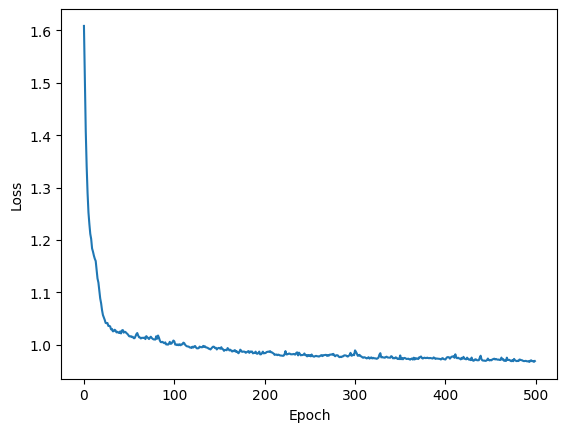

Test accuracy: 464.2718279569892
Accuracy: 0.4632258064516129
Precision: 0.5005754390030119
Recall: 0.4624928911984272
F1-score: 0.4756139567310404


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.56      0.61       495
           1       0.50      0.42      0.46       472
           2       0.31      0.40      0.35       449
           3       0.29      0.36      0.32       463
           4       0.75      0.57      0.65       446

    accuracy                           0.46      2325
   macro avg       0.50      0.46      0.48      2325
weighted avg       0.50      0.46      0.48      2325

                    0           1           2           3           4  \
precision    0.661871    0.502525    0.306897    0.285229    0.746356   
recall       0.557576    0.421610    0.396437    0.362851    0.573991   
f1-score     0.605263    0.458525    0.345967    0.319392    0.648923   
support    495.000000  472.000000  449.000000 

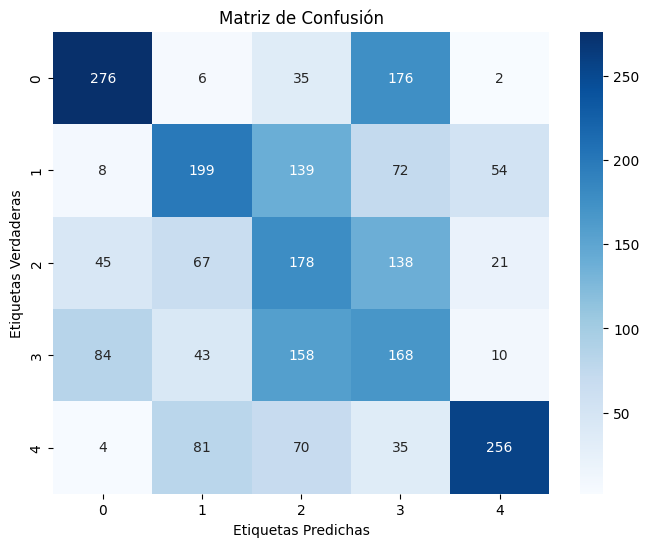

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_500_0.0001_0.3/resultados_500_0.0001_0.3.json
Procesando red con 500 epocas y 1e-05 de factor de aprendizaje y conjunto de entrenamiento 0.7


Procesando epocas:   0%|                                                             | 1/500 [00:17<2:21:49, 17.05s/it]

1.6096835550139932


Procesando epocas:   0%|▏                                                            | 2/500 [00:33<2:20:49, 16.97s/it]

1.6097044902689317


Procesando epocas:   1%|▎                                                            | 3/500 [00:51<2:22:43, 17.23s/it]

1.6097779393196106


Procesando epocas:   1%|▍                                                            | 4/500 [01:08<2:20:40, 17.02s/it]

1.6097075069651885


Procesando epocas:   1%|▌                                                            | 5/500 [01:24<2:19:30, 16.91s/it]

1.6094065406743219


Procesando epocas:   1%|▋                                                            | 6/500 [01:41<2:19:33, 16.95s/it]

1.6088734956348643


Procesando epocas:   1%|▊                                                            | 7/500 [01:59<2:19:50, 17.02s/it]

1.6070907922352062


Procesando epocas:   2%|▉                                                            | 8/500 [02:16<2:19:29, 17.01s/it]

1.6025232265977298


Procesando epocas:   2%|█                                                            | 9/500 [02:33<2:19:20, 17.03s/it]

1.5876974940299988


Procesando epocas:   2%|█▏                                                          | 10/500 [02:50<2:18:55, 17.01s/it]

1.5512256425969742


Procesando epocas:   2%|█▎                                                          | 11/500 [03:07<2:18:31, 17.00s/it]

1.5014801312895383


Procesando epocas:   2%|█▍                                                          | 12/500 [03:24<2:18:21, 17.01s/it]

1.4573363598655251


Procesando epocas:   3%|█▌                                                          | 13/500 [03:41<2:18:27, 17.06s/it]

1.4275222231360043


Procesando epocas:   3%|█▋                                                          | 14/500 [03:58<2:18:35, 17.11s/it]

1.4028709537842694


Procesando epocas:   3%|█▊                                                          | 15/500 [04:15<2:19:01, 17.20s/it]

1.3786124727305245


Procesando epocas:   3%|█▉                                                          | 16/500 [04:33<2:18:23, 17.16s/it]

1.362314620438744


Procesando epocas:   3%|██                                                          | 17/500 [04:50<2:18:07, 17.16s/it]

1.345030659787795


Procesando epocas:   4%|██▏                                                         | 18/500 [05:07<2:17:46, 17.15s/it]

1.3308360127841725


Procesando epocas:   4%|██▎                                                         | 19/500 [05:24<2:17:13, 17.12s/it]

1.315994442911709


Procesando epocas:   4%|██▍                                                         | 20/500 [05:41<2:15:56, 16.99s/it]

1.297889146384071


Procesando epocas:   4%|██▌                                                         | 21/500 [05:57<2:14:55, 16.90s/it]

1.2905276705236997


Procesando epocas:   4%|██▋                                                         | 22/500 [06:14<2:14:40, 16.90s/it]

1.2788439624449786


Procesando epocas:   5%|██▊                                                         | 23/500 [06:31<2:14:51, 16.96s/it]

1.2738703117651098


Procesando epocas:   5%|██▉                                                         | 24/500 [06:48<2:14:13, 16.92s/it]

1.2601050362867467


Procesando epocas:   5%|███                                                         | 25/500 [07:05<2:13:45, 16.90s/it]

1.2492331371587866


Procesando epocas:   5%|███                                                         | 26/500 [07:22<2:13:21, 16.88s/it]

1.244747848370496


Procesando epocas:   5%|███▏                                                        | 27/500 [07:39<2:13:12, 16.90s/it]

1.2336840685676127


Procesando epocas:   6%|███▎                                                        | 28/500 [07:55<2:12:21, 16.83s/it]

1.227617388613084


Procesando epocas:   6%|███▍                                                        | 29/500 [08:12<2:12:29, 16.88s/it]

1.2168157752822428


Procesando epocas:   6%|███▌                                                        | 30/500 [09:00<3:25:14, 26.20s/it]

1.2090163090649773


Procesando epocas:   6%|███▋                                                        | 31/500 [09:45<4:09:13, 31.88s/it]

1.2006579981130712


Procesando epocas:   6%|███▊                                                        | 32/500 [10:29<4:36:34, 35.46s/it]

1.1921665170613458


Procesando epocas:   7%|███▉                                                        | 33/500 [11:14<4:58:36, 38.37s/it]

1.1873014933922712


Procesando epocas:   7%|████                                                        | 34/500 [11:59<5:13:23, 40.35s/it]

1.1782917450456059


Procesando epocas:   7%|████▏                                                       | 35/500 [12:43<5:19:25, 41.22s/it]

1.169045700746424


Procesando epocas:   7%|████▎                                                       | 36/500 [13:26<5:23:41, 41.86s/it]

1.163735172327827


Procesando epocas:   7%|████▍                                                       | 37/500 [14:11<5:31:10, 42.92s/it]

1.1525295243543736


Procesando epocas:   8%|████▌                                                       | 38/500 [14:57<5:36:01, 43.64s/it]

1.1414056693806367


Procesando epocas:   8%|████▋                                                       | 39/500 [15:40<5:34:20, 43.52s/it]

1.1340257855022655


Procesando epocas:   8%|████▊                                                       | 40/500 [16:25<5:37:17, 43.99s/it]

1.1273079970303703


Procesando epocas:   8%|████▉                                                       | 41/500 [17:10<5:39:52, 44.43s/it]

1.1160078602678636


Procesando epocas:   8%|█████                                                       | 42/500 [17:51<5:30:38, 43.32s/it]

1.108531668957542


Procesando epocas:   9%|█████▏                                                      | 43/500 [18:33<5:26:40, 42.89s/it]

1.0970146449173197


Procesando epocas:   9%|█████▎                                                      | 44/500 [19:13<5:20:10, 42.13s/it]

1.0905522122102624


Procesando epocas:   9%|█████▍                                                      | 45/500 [19:54<5:15:32, 41.61s/it]

1.0835385455804714


Procesando epocas:   9%|█████▌                                                      | 46/500 [20:36<5:15:22, 41.68s/it]

1.0733024744426503


Procesando epocas:   9%|█████▋                                                      | 47/500 [21:16<5:12:02, 41.33s/it]

1.0637239028425778


Procesando epocas:  10%|█████▊                                                      | 48/500 [21:57<5:09:11, 41.04s/it]

1.0575843025656309


Procesando epocas:  10%|█████▉                                                      | 49/500 [22:37<5:07:00, 40.84s/it]

1.0520136493093828


Procesando epocas:  10%|██████                                                      | 50/500 [23:19<5:08:33, 41.14s/it]

1.0473825675599715


Procesando epocas:  10%|██████                                                      | 51/500 [23:59<5:06:22, 40.94s/it]

1.0422450461808372


Procesando epocas:  10%|██████▏                                                     | 52/500 [24:40<5:04:19, 40.76s/it]

1.0354868131525377


Procesando epocas:  11%|██████▎                                                     | 53/500 [25:21<5:05:58, 41.07s/it]

1.0319420491947848


Procesando epocas:  11%|██████▍                                                     | 54/500 [26:02<5:03:52, 40.88s/it]

1.025024709631415


Procesando epocas:  11%|██████▌                                                     | 55/500 [26:42<5:02:31, 40.79s/it]

1.021040457837722


Procesando epocas:  11%|██████▋                                                     | 56/500 [27:24<5:04:16, 41.12s/it]

1.0168259771431194


Procesando epocas:  11%|██████▊                                                     | 57/500 [28:05<5:02:02, 40.91s/it]

1.0172536597532384


Procesando epocas:  12%|██████▉                                                     | 58/500 [28:45<5:00:25, 40.78s/it]

1.010770240951987


Procesando epocas:  12%|███████                                                     | 59/500 [29:26<4:58:54, 40.67s/it]

1.008478249872432


Procesando epocas:  12%|███████▏                                                    | 60/500 [30:06<4:57:38, 40.59s/it]

1.0042354092878454


Procesando epocas:  12%|███████▎                                                    | 61/500 [30:48<4:59:39, 40.96s/it]

1.0017820905236636


Procesando epocas:  12%|███████▍                                                    | 62/500 [31:28<4:57:56, 40.81s/it]

0.9989811515106874


Procesando epocas:  13%|███████▌                                                    | 63/500 [32:09<4:56:13, 40.67s/it]

0.9964795105597553


Procesando epocas:  13%|███████▋                                                    | 64/500 [32:51<4:58:15, 41.05s/it]

0.9924562871456146


Procesando epocas:  13%|███████▊                                                    | 65/500 [33:31<4:56:08, 40.85s/it]

0.9922570565167596


Procesando epocas:  13%|███████▉                                                    | 66/500 [34:11<4:54:19, 40.69s/it]

0.9921819283681758


Procesando epocas:  13%|████████                                                    | 67/500 [34:53<4:56:08, 41.04s/it]

0.9876740820267621


Procesando epocas:  14%|████████▏                                                   | 68/500 [35:33<4:53:57, 40.83s/it]

0.9855936316882863


Procesando epocas:  14%|████████▎                                                   | 69/500 [36:14<4:52:32, 40.73s/it]

0.9855480940902934


Procesando epocas:  14%|████████▍                                                   | 70/500 [36:54<4:51:07, 40.62s/it]

0.9812591917374555


Procesando epocas:  14%|████████▌                                                   | 71/500 [37:36<4:53:04, 40.99s/it]

0.9806022517821368


Procesando epocas:  14%|████████▋                                                   | 72/500 [38:16<4:51:02, 40.80s/it]

0.9803494491997887


Procesando epocas:  15%|████████▊                                                   | 73/500 [38:57<4:49:24, 40.67s/it]

0.9766144335269928


Procesando epocas:  15%|████████▉                                                   | 74/500 [39:39<4:51:14, 41.02s/it]

0.976946866161683


Procesando epocas:  15%|█████████                                                   | 75/500 [40:19<4:49:21, 40.85s/it]

0.9748547978260937


Procesando epocas:  15%|█████████                                                   | 76/500 [41:00<4:47:55, 40.74s/it]

0.9730191048453836


Procesando epocas:  15%|█████████▏                                                  | 77/500 [41:42<4:49:38, 41.08s/it]

0.9722863961668575


Procesando epocas:  16%|█████████▎                                                  | 78/500 [42:22<4:47:10, 40.83s/it]

0.9718040844973396


Procesando epocas:  16%|█████████▍                                                  | 79/500 [43:02<4:45:48, 40.73s/it]

0.9711789839407977


Procesando epocas:  16%|█████████▌                                                  | 80/500 [43:43<4:44:20, 40.62s/it]

0.9684097949196311


Procesando epocas:  16%|█████████▋                                                  | 81/500 [44:23<4:42:52, 40.51s/it]

0.9669784696663127


Procesando epocas:  16%|█████████▊                                                  | 82/500 [45:05<4:45:11, 40.94s/it]

0.9696425504544202


Procesando epocas:  17%|█████████▉                                                  | 83/500 [45:45<4:43:10, 40.74s/it]

0.9665511850048514


Procesando epocas:  17%|██████████                                                  | 84/500 [46:25<4:41:35, 40.61s/it]

0.965915706578423


Procesando epocas:  17%|██████████▏                                                 | 85/500 [47:07<4:43:32, 40.99s/it]

0.9638526537839104


Procesando epocas:  17%|██████████▎                                                 | 86/500 [47:48<4:41:46, 40.84s/it]

0.9645715916858


Procesando epocas:  17%|██████████▍                                                 | 87/500 [48:28<4:40:06, 40.69s/it]

0.9633040312458487


Procesando epocas:  18%|██████████▌                                                 | 88/500 [49:08<4:38:35, 40.57s/it]

0.9624854641802171


Procesando epocas:  18%|██████████▋                                                 | 89/500 [49:50<4:40:45, 40.99s/it]

0.963151680020725


Procesando epocas:  18%|██████████▊                                                 | 90/500 [50:31<4:39:01, 40.83s/it]

0.9613620831685907


Procesando epocas:  18%|██████████▉                                                 | 91/500 [51:11<4:37:22, 40.69s/it]

0.9597157587023343


Procesando epocas:  18%|███████████                                                 | 92/500 [51:52<4:36:24, 40.65s/it]

0.9586021809016957


Procesando epocas:  19%|███████████▏                                                | 93/500 [52:34<4:38:10, 41.01s/it]

0.9613709313027999


Procesando epocas:  19%|███████████▎                                                | 94/500 [53:14<4:36:08, 40.81s/it]

0.9589752120130203


Procesando epocas:  19%|███████████▍                                                | 95/500 [53:54<4:34:47, 40.71s/it]

0.9587447601206163


Procesando epocas:  19%|███████████▌                                                | 96/500 [54:35<4:33:19, 40.59s/it]

0.9580044066204744


Procesando epocas:  19%|███████████▋                                                | 97/500 [55:15<4:32:01, 40.50s/it]

0.9559421826811397


Procesando epocas:  20%|███████████▊                                                | 98/500 [55:57<4:34:16, 40.94s/it]

0.956881490875693


Procesando epocas:  20%|███████████▉                                                | 99/500 [56:37<4:32:16, 40.74s/it]

0.9571318293319029


Procesando epocas:  20%|███████████▊                                               | 100/500 [57:18<4:30:39, 40.60s/it]

0.9553729649852304


Procesando epocas:  20%|███████████▉                                               | 101/500 [57:58<4:29:37, 40.55s/it]

0.9558089873370003


Procesando epocas:  20%|████████████                                               | 102/500 [58:38<4:28:44, 40.51s/it]

0.9552689832799575


Procesando epocas:  21%|████████████▏                                              | 103/500 [59:20<4:30:49, 40.93s/it]

0.9551605105400085


Procesando epocas:  21%|████████████▎                                              | 104/500 [59:59<4:26:06, 40.32s/it]

0.9552241525229286


Procesando epocas:  21%|███████████▉                                             | 105/500 [1:00:41<4:28:29, 40.78s/it]

0.9545380690518548


Procesando epocas:  21%|████████████                                             | 106/500 [1:01:21<4:26:58, 40.66s/it]

0.9539916003451628


Procesando epocas:  21%|████████████▏                                            | 107/500 [1:02:02<4:25:55, 40.60s/it]

0.9534141042653252


Procesando epocas:  22%|████████████▎                                            | 108/500 [1:02:42<4:24:54, 40.55s/it]

0.9527492060380823


Procesando epocas:  22%|████████████▍                                            | 109/500 [1:03:23<4:23:53, 40.50s/it]

0.9528386340421788


Procesando epocas:  22%|████████████▌                                            | 110/500 [1:04:05<4:26:00, 40.92s/it]

0.952703878809424


Procesando epocas:  22%|████████████▋                                            | 111/500 [1:04:45<4:24:23, 40.78s/it]

0.9520890337579391


Procesando epocas:  22%|████████████▊                                            | 112/500 [1:05:26<4:23:21, 40.73s/it]

0.953081891115974


Procesando epocas:  23%|████████████▉                                            | 113/500 [1:06:06<4:21:58, 40.62s/it]

0.9525432719903834


Procesando epocas:  23%|████████████▉                                            | 114/500 [1:06:46<4:20:46, 40.54s/it]

0.952562305506538


Procesando epocas:  23%|█████████████                                            | 115/500 [1:07:27<4:19:58, 40.52s/it]

0.9522533427266514


Procesando epocas:  23%|█████████████▏                                           | 116/500 [1:08:09<4:21:43, 40.89s/it]

0.9510074850390939


Procesando epocas:  23%|█████████████▎                                           | 117/500 [1:08:49<4:19:42, 40.69s/it]

0.9508007147732903


Procesando epocas:  24%|█████████████▍                                           | 118/500 [1:09:29<4:18:08, 40.55s/it]

0.9499330327791327


Procesando epocas:  24%|█████████████▌                                           | 119/500 [1:10:09<4:16:40, 40.42s/it]

0.9512028802843655


Procesando epocas:  24%|█████████████▋                                           | 120/500 [1:10:49<4:15:36, 40.36s/it]

0.9501948051592883


Procesando epocas:  24%|█████████████▊                                           | 121/500 [1:11:29<4:14:16, 40.26s/it]

0.9497886608628666


Procesando epocas:  24%|█████████████▉                                           | 122/500 [1:12:09<4:13:18, 40.21s/it]

0.9499798255808213


Procesando epocas:  25%|██████████████                                           | 123/500 [1:12:50<4:12:38, 40.21s/it]

0.9502912868471707


Procesando epocas:  25%|██████████████▏                                          | 124/500 [1:13:30<4:11:43, 40.17s/it]

0.950209885485032


Procesando epocas:  25%|██████████████▎                                          | 125/500 [1:14:10<4:10:54, 40.14s/it]

0.9495495557785034


Procesando epocas:  25%|██████████████▎                                          | 126/500 [1:14:52<4:13:18, 40.64s/it]

0.9494756589917576


Procesando epocas:  25%|██████████████▍                                          | 127/500 [1:15:32<4:11:33, 40.47s/it]

0.9494989963138805


Procesando epocas:  26%|██████████████▌                                          | 128/500 [1:16:12<4:10:19, 40.37s/it]

0.9482265219968908


Procesando epocas:  26%|██████████████▋                                          | 129/500 [1:16:52<4:09:15, 40.31s/it]

0.9486710439710057


Procesando epocas:  26%|██████████████▊                                          | 130/500 [1:17:32<4:08:39, 40.32s/it]

0.9480868479784798


Procesando epocas:  26%|██████████████▉                                          | 131/500 [1:18:12<4:07:35, 40.26s/it]

0.9480077578740962


Procesando epocas:  26%|███████████████                                          | 132/500 [1:18:54<4:09:16, 40.64s/it]

0.9477065857718973


Procesando epocas:  27%|███████████████▏                                         | 133/500 [1:19:34<4:07:54, 40.53s/it]

0.9481891944127925


Procesando epocas:  27%|███████████████▎                                         | 134/500 [1:20:14<4:06:23, 40.39s/it]

0.9475090510704938


Procesando epocas:  27%|███████████████▍                                         | 135/500 [1:20:55<4:05:21, 40.33s/it]

0.9487276410355288


Procesando epocas:  27%|███████████████▌                                         | 136/500 [1:21:36<4:07:09, 40.74s/it]

0.9479780120008132


Procesando epocas:  27%|███████████████▌                                         | 137/500 [1:22:16<4:05:09, 40.52s/it]

0.9478796096409068


Procesando epocas:  28%|███████████████▋                                         | 138/500 [1:22:56<4:03:36, 40.38s/it]

0.9464627518373377


Procesando epocas:  28%|███████████████▊                                         | 139/500 [1:23:37<4:03:14, 40.43s/it]

0.9474138722700232


Procesando epocas:  28%|███████████████▉                                         | 140/500 [1:24:17<4:02:09, 40.36s/it]

0.9470816457972807


Procesando epocas:  28%|████████████████                                         | 141/500 [1:24:58<4:03:25, 40.68s/it]

0.9470161518629859


Procesando epocas:  28%|████████████████▏                                        | 142/500 [1:25:39<4:02:21, 40.62s/it]

0.9473355451050927


Procesando epocas:  29%|████████████████▎                                        | 143/500 [1:26:19<4:00:52, 40.48s/it]

0.9465886375483344


Procesando epocas:  29%|████████████████▍                                        | 144/500 [1:26:59<3:59:38, 40.39s/it]

0.9460604618577396


Procesando epocas:  29%|████████████████▌                                        | 145/500 [1:27:41<4:01:32, 40.82s/it]

0.9467834917938008


Procesando epocas:  29%|████████████████▋                                        | 146/500 [1:28:21<3:59:32, 40.60s/it]

0.9453763716361102


Procesando epocas:  29%|████████████████▊                                        | 147/500 [1:29:01<3:57:55, 40.44s/it]

0.9446714836008409


Procesando epocas:  30%|████████████████▊                                        | 148/500 [1:29:42<3:57:02, 40.40s/it]

0.945767485744813


Procesando epocas:  30%|████████████████▉                                        | 149/500 [1:30:22<3:56:05, 40.36s/it]

0.9449070828802445


Procesando epocas:  30%|█████████████████                                        | 150/500 [1:31:02<3:54:53, 40.27s/it]

0.9448836645659279


Procesando epocas:  30%|█████████████████▏                                       | 151/500 [1:31:42<3:54:09, 40.26s/it]

0.9456532948157367


Procesando epocas:  30%|█████████████████▎                                       | 152/500 [1:32:22<3:53:15, 40.22s/it]

0.9446610675138586


Procesando epocas:  31%|█████████████████▍                                       | 153/500 [1:33:02<3:52:24, 40.18s/it]

0.9443390022305881


Procesando epocas:  31%|█████████████████▌                                       | 154/500 [1:33:44<3:54:25, 40.65s/it]

0.9443213610088124


Procesando epocas:  31%|█████████████████▋                                       | 155/500 [1:34:24<3:52:59, 40.52s/it]

0.9431428295724532


Procesando epocas:  31%|█████████████████▊                                       | 156/500 [1:35:04<3:51:27, 40.37s/it]

0.9439948811250575


Procesando epocas:  31%|█████████████████▉                                       | 157/500 [1:35:45<3:50:39, 40.35s/it]

0.9439558414851918


Procesando epocas:  32%|██████████████████                                       | 158/500 [1:36:25<3:49:39, 40.29s/it]

0.9433336860993329


Procesando epocas:  32%|██████████████████▏                                      | 159/500 [1:37:06<3:51:09, 40.67s/it]

0.943889907878988


Procesando epocas:  32%|██████████████████▏                                      | 160/500 [1:37:47<3:49:40, 40.53s/it]

0.9431328145896687


Procesando epocas:  32%|██████████████████▎                                      | 161/500 [1:38:27<3:48:16, 40.40s/it]

0.9429570916820975


Procesando epocas:  32%|██████████████████▍                                      | 162/500 [1:39:07<3:46:56, 40.29s/it]

0.9422037001918344


Procesando epocas:  33%|██████████████████▌                                      | 163/500 [1:39:48<3:48:24, 40.67s/it]

0.9429222713498508


Procesando epocas:  33%|██████████████████▋                                      | 164/500 [1:40:28<3:47:02, 40.54s/it]

0.9427013074650484


Procesando epocas:  33%|██████████████████▊                                      | 165/500 [1:41:09<3:45:34, 40.40s/it]

0.9425955134279588


Procesando epocas:  33%|██████████████████▉                                      | 166/500 [1:41:49<3:44:34, 40.34s/it]

0.9431379907271441


Procesando epocas:  33%|███████████████████                                      | 167/500 [1:42:31<3:46:27, 40.80s/it]

0.9427045709946577


Procesando epocas:  34%|███████████████████▏                                     | 168/500 [1:43:11<3:44:46, 40.62s/it]

0.9423030607840595


Procesando epocas:  34%|███████████████████▎                                     | 169/500 [1:43:51<3:43:22, 40.49s/it]

0.9419765672262977


Procesando epocas:  34%|███████████████████▍                                     | 170/500 [1:44:31<3:42:30, 40.45s/it]

0.9420881327460794


Procesando epocas:  34%|███████████████████▍                                     | 171/500 [1:45:12<3:41:17, 40.36s/it]

0.942269614163567


Procesando epocas:  34%|███████████████████▌                                     | 172/500 [1:45:53<3:42:38, 40.73s/it]

0.9415885623763589


Procesando epocas:  35%|███████████████████▋                                     | 173/500 [1:46:33<3:41:21, 40.62s/it]

0.9416206706972683


Procesando epocas:  35%|███████████████████▊                                     | 174/500 [1:47:14<3:40:00, 40.49s/it]

0.9420330149285934


Procesando epocas:  35%|███████████████████▉                                     | 175/500 [1:47:54<3:38:42, 40.38s/it]

0.9423519604346331


Procesando epocas:  35%|████████████████████                                     | 176/500 [1:48:34<3:37:53, 40.35s/it]

0.9419772092033835


Procesando epocas:  35%|████████████████████▏                                    | 177/500 [1:49:14<3:36:58, 40.31s/it]

0.9415830380776349


Procesando epocas:  36%|████████████████████▎                                    | 178/500 [1:49:56<3:38:21, 40.69s/it]

0.9413268103319056


Procesando epocas:  36%|████████████████████▍                                    | 179/500 [1:50:36<3:37:28, 40.65s/it]

0.9412756432505215


Procesando epocas:  36%|████████████████████▌                                    | 180/500 [1:51:16<3:35:54, 40.48s/it]

0.9412961532087887


Procesando epocas:  36%|████████████████████▋                                    | 181/500 [1:51:57<3:34:33, 40.36s/it]

0.9414323747158051


Procesando epocas:  36%|████████████████████▋                                    | 182/500 [1:52:39<3:36:29, 40.85s/it]

0.9411939775242525


Procesando epocas:  37%|████████████████████▊                                    | 183/500 [1:53:19<3:34:43, 40.64s/it]

0.9409246027469635


Procesando epocas:  37%|████████████████████▉                                    | 184/500 [1:53:59<3:33:14, 40.49s/it]

0.9403545639094184


Procesando epocas:  37%|█████████████████████                                    | 185/500 [1:54:39<3:32:19, 40.44s/it]

0.9403532694367801


Procesando epocas:  37%|█████████████████████▏                                   | 186/500 [1:55:19<3:31:26, 40.40s/it]

0.9398784328909481


Procesando epocas:  37%|█████████████████████▎                                   | 187/500 [1:56:00<3:30:11, 40.29s/it]

0.9409670829772949


Procesando epocas:  38%|█████████████████████▍                                   | 188/500 [1:56:40<3:29:25, 40.27s/it]

0.9402785883230321


Procesando epocas:  38%|█████████████████████▌                                   | 189/500 [1:57:20<3:28:37, 40.25s/it]

0.9403103902059443


Procesando epocas:  38%|█████████████████████▋                                   | 190/500 [1:58:00<3:27:34, 40.18s/it]

0.9396073569269742


Procesando epocas:  38%|█████████████████████▊                                   | 191/500 [1:58:40<3:26:44, 40.14s/it]

0.9402035899022047


Procesando epocas:  38%|█████████████████████▉                                   | 192/500 [1:59:22<3:28:30, 40.62s/it]

0.9402307415709776


Procesando epocas:  39%|██████████████████████                                   | 193/500 [2:00:00<3:24:39, 40.00s/it]

0.9401783508412979


Procesando epocas:  39%|██████████████████████                                   | 194/500 [2:00:42<3:26:18, 40.45s/it]

0.9396289737785564


Procesando epocas:  39%|██████████████████████▏                                  | 195/500 [2:01:22<3:25:24, 40.41s/it]

0.939487614701776


Procesando epocas:  39%|██████████████████████▎                                  | 196/500 [2:02:02<3:24:20, 40.33s/it]

0.9389429137987249


Procesando epocas:  39%|██████████████████████▍                                  | 197/500 [2:02:42<3:23:16, 40.25s/it]

0.9391660343198215


Procesando epocas:  40%|██████████████████████▌                                  | 198/500 [2:03:22<3:22:21, 40.20s/it]

0.9389321442912607


Procesando epocas:  40%|██████████████████████▋                                  | 199/500 [2:04:04<3:24:08, 40.69s/it]

0.9395176708698273


Procesando epocas:  40%|██████████████████████▊                                  | 200/500 [2:04:44<3:22:42, 40.54s/it]

0.9387281828066882


Procesando epocas:  40%|██████████████████████▉                                  | 201/500 [2:05:25<3:21:18, 40.40s/it]

0.9383823615663192


Procesando epocas:  40%|███████████████████████                                  | 202/500 [2:06:05<3:20:19, 40.33s/it]

0.9399420706664815


Procesando epocas:  41%|███████████████████████▏                                 | 203/500 [2:06:45<3:19:35, 40.32s/it]

0.939868889135473


Procesando epocas:  41%|███████████████████████▎                                 | 204/500 [2:07:25<3:18:38, 40.26s/it]

0.9394496745922987


Procesando epocas:  41%|███████████████████████▎                                 | 205/500 [2:08:05<3:17:34, 40.18s/it]

0.9393215298652648


Procesando epocas:  41%|███████████████████████▍                                 | 206/500 [2:08:47<3:19:15, 40.66s/it]

0.9395502952968373


Procesando epocas:  41%|███████████████████████▌                                 | 207/500 [2:09:27<3:17:44, 40.49s/it]

0.9392642059746911


Procesando epocas:  42%|███████████████████████▋                                 | 208/500 [2:10:06<3:14:21, 39.94s/it]

0.9385533911340377


Procesando epocas:  42%|███████████████████████▊                                 | 209/500 [2:10:47<3:16:22, 40.49s/it]

0.9385476319228901


Procesando epocas:  42%|███████████████████████▉                                 | 210/500 [2:11:28<3:15:11, 40.38s/it]

0.9393483554615694


Procesando epocas:  42%|████████████████████████                                 | 211/500 [2:12:07<3:13:52, 40.25s/it]

0.9394225713084726


Procesando epocas:  42%|████████████████████████▏                                | 212/500 [2:12:48<3:12:51, 40.18s/it]

0.9384703211924609


Procesando epocas:  43%|████████████████████████▎                                | 213/500 [2:13:28<3:12:19, 40.21s/it]

0.9384141988614026


Procesando epocas:  43%|████████████████████████▍                                | 214/500 [2:14:08<3:11:24, 40.16s/it]

0.9393153187106638


Procesando epocas:  43%|████████████████████████▌                                | 215/500 [2:14:48<3:10:42, 40.15s/it]

0.9390402779859655


Procesando epocas:  43%|████████████████████████▌                                | 216/500 [2:15:30<3:12:29, 40.67s/it]

0.9390172281685998


Procesando epocas:  43%|████████████████████████▋                                | 217/500 [2:16:10<3:10:48, 40.45s/it]

0.9384087930707371


Procesando epocas:  44%|████████████████████████▊                                | 218/500 [2:16:50<3:09:32, 40.33s/it]

0.9384077524437624


Procesando epocas:  44%|████████████████████████▉                                | 219/500 [2:17:29<3:06:43, 39.87s/it]

0.9380295616738936


Procesando epocas:  44%|█████████████████████████                                | 220/500 [2:18:09<3:06:24, 39.94s/it]

0.9376783083466923


Procesando epocas:  44%|█████████████████████████▏                               | 221/500 [2:18:49<3:05:49, 39.96s/it]

0.9386215904179741


Procesando epocas:  44%|█████████████████████████▎                               | 222/500 [2:19:29<3:05:28, 40.03s/it]

0.9384990863940295


Procesando epocas:  45%|█████████████████████████▍                               | 223/500 [2:20:11<3:07:10, 40.54s/it]

0.9384556114673615


Procesando epocas:  45%|█████████████████████████▌                               | 224/500 [2:20:49<3:03:41, 39.93s/it]

0.938366446424933


Procesando epocas:  45%|█████████████████████████▋                               | 225/500 [2:21:31<3:05:23, 40.45s/it]

0.9382403654210708


Procesando epocas:  45%|█████████████████████████▊                               | 226/500 [2:22:11<3:04:32, 40.41s/it]

0.9379870295524597


Procesando epocas:  45%|█████████████████████████▉                               | 227/500 [2:22:51<3:03:29, 40.33s/it]

0.9375683230512283


Procesando epocas:  46%|█████████████████████████▉                               | 228/500 [2:23:33<3:05:19, 40.88s/it]

0.9380440172027139


Procesando epocas:  46%|██████████████████████████                               | 229/500 [2:24:17<3:07:57, 41.61s/it]

0.9378569192746107


Procesando epocas:  46%|██████████████████████████▏                              | 230/500 [2:24:57<3:05:19, 41.18s/it]

0.9378960896940792


Procesando epocas:  46%|██████████████████████████▎                              | 231/500 [2:25:37<3:03:27, 40.92s/it]

0.9377793070148019


Procesando epocas:  46%|██████████████████████████▍                              | 232/500 [2:26:17<3:01:50, 40.71s/it]

0.9375527353847728


Procesando epocas:  47%|██████████████████████████▌                              | 233/500 [2:26:59<3:02:17, 40.96s/it]

0.9386304988580592


Procesando epocas:  47%|██████████████████████████▋                              | 234/500 [2:27:39<3:00:40, 40.75s/it]

0.9375405553509207


Procesando epocas:  47%|██████████████████████████▊                              | 235/500 [2:28:19<2:59:12, 40.58s/it]

0.9382935590603773


Procesando epocas:  47%|██████████████████████████▉                              | 236/500 [2:29:00<2:58:01, 40.46s/it]

0.9371394055731156


Procesando epocas:  47%|███████████████████████████                              | 237/500 [2:29:40<2:57:02, 40.39s/it]

0.9378153124276329


Procesando epocas:  48%|███████████████████████████▏                             | 238/500 [2:30:21<2:57:54, 40.74s/it]

0.9375832228099599


Procesando epocas:  48%|███████████████████████████▏                             | 239/500 [2:31:01<2:56:20, 40.54s/it]

0.9378919285886428


Procesando epocas:  48%|███████████████████████████▎                             | 240/500 [2:31:42<2:55:17, 40.45s/it]

0.937453863550635


Procesando epocas:  48%|███████████████████████████▍                             | 241/500 [2:32:22<2:54:14, 40.36s/it]

0.9371540157233967


Procesando epocas:  48%|███████████████████████████▌                             | 242/500 [2:33:02<2:53:15, 40.29s/it]

0.9379103327498717


Procesando epocas:  49%|███████████████████████████▋                             | 243/500 [2:33:43<2:52:52, 40.36s/it]

0.9373625576496124


Procesando epocas:  49%|███████████████████████████▊                             | 244/500 [2:34:24<2:54:01, 40.79s/it]

0.9374749039902407


Procesando epocas:  49%|███████████████████████████▉                             | 245/500 [2:35:04<2:52:27, 40.58s/it]

0.9365043920629165


Procesando epocas:  49%|████████████████████████████                             | 246/500 [2:35:45<2:51:24, 40.49s/it]

0.9368132282705868


Procesando epocas:  49%|████████████████████████████▏                            | 247/500 [2:36:25<2:50:25, 40.42s/it]

0.9367280486752005


Procesando epocas:  50%|████████████████████████████▎                            | 248/500 [2:37:07<2:51:23, 40.81s/it]

0.9357151049024919


Procesando epocas:  50%|████████████████████████████▍                            | 249/500 [2:37:47<2:50:01, 40.64s/it]

0.9365591729388517


Procesando epocas:  50%|████████████████████████████▌                            | 250/500 [2:38:27<2:48:53, 40.53s/it]

0.935902248060002


Procesando epocas:  50%|████████████████████████████▌                            | 251/500 [2:39:07<2:47:48, 40.44s/it]

0.9362826838212854


Procesando epocas:  50%|████████████████████████████▋                            | 252/500 [2:39:49<2:48:53, 40.86s/it]

0.9366046348038841


Procesando epocas:  51%|████████████████████████████▊                            | 253/500 [2:40:29<2:47:17, 40.64s/it]

0.9366422165842617


Procesando epocas:  51%|████████████████████████████▉                            | 254/500 [2:41:10<2:46:03, 40.50s/it]

0.9367516468552982


Procesando epocas:  51%|█████████████████████████████                            | 255/500 [2:41:50<2:45:06, 40.44s/it]

0.9362135434851927


Procesando epocas:  51%|█████████████████████████████▏                           | 256/500 [2:42:30<2:44:07, 40.36s/it]

0.9363500279538771


Procesando epocas:  51%|█████████████████████████████▎                           | 257/500 [2:43:12<2:45:10, 40.78s/it]

0.9360535733840045


Procesando epocas:  52%|█████████████████████████████▍                           | 258/500 [2:43:52<2:43:54, 40.64s/it]

0.9360151087536531


Procesando epocas:  52%|█████████████████████████████▌                           | 259/500 [2:44:32<2:42:48, 40.53s/it]

0.9370817254571354


Procesando epocas:  52%|█████████████████████████████▋                           | 260/500 [2:45:14<2:43:31, 40.88s/it]

0.9357470505377825


Procesando epocas:  52%|█████████████████████████████▊                           | 261/500 [2:45:55<2:42:17, 40.74s/it]

0.9363025942269494


Procesando epocas:  52%|█████████████████████████████▊                           | 262/500 [2:46:35<2:40:56, 40.58s/it]

0.9360932409763336


Procesando epocas:  53%|█████████████████████████████▉                           | 263/500 [2:47:15<2:39:51, 40.47s/it]

0.9356598506955539


Procesando epocas:  53%|██████████████████████████████                           | 264/500 [2:47:55<2:39:03, 40.44s/it]

0.9357239158714519


Procesando epocas:  53%|██████████████████████████████▏                          | 265/500 [2:48:37<2:39:53, 40.83s/it]

0.9363511074991787


Procesando epocas:  53%|██████████████████████████████▎                          | 266/500 [2:49:17<2:38:33, 40.66s/it]

0.9362765305182513


Procesando epocas:  53%|██████████████████████████████▍                          | 267/500 [2:49:58<2:37:25, 40.54s/it]

0.935736882686615


Procesando epocas:  54%|██████████████████████████████▌                          | 268/500 [2:50:38<2:36:19, 40.43s/it]

0.9363515426130856


Procesando epocas:  54%|██████████████████████████████▋                          | 269/500 [2:51:19<2:37:07, 40.81s/it]

0.9364638437243069


Procesando epocas:  54%|██████████████████████████████▊                          | 270/500 [2:52:00<2:35:47, 40.64s/it]

0.936031025648117


Procesando epocas:  54%|██████████████████████████████▉                          | 271/500 [2:52:40<2:34:38, 40.52s/it]

0.9356809496879578


Procesando epocas:  54%|███████████████████████████████                          | 272/500 [2:53:20<2:33:38, 40.43s/it]

0.9355042324346654


Procesando epocas:  55%|███████████████████████████████                          | 273/500 [2:54:00<2:32:48, 40.39s/it]

0.9361084682099959


Procesando epocas:  55%|███████████████████████████████▏                         | 274/500 [2:54:42<2:33:25, 40.73s/it]

0.9356759222114788


Procesando epocas:  55%|███████████████████████████████▎                         | 275/500 [2:55:22<2:32:07, 40.57s/it]

0.9364026862032273


Procesando epocas:  55%|███████████████████████████████▍                         | 276/500 [2:56:02<2:31:06, 40.48s/it]

0.9351834637277266


Procesando epocas:  55%|███████████████████████████████▌                         | 277/500 [2:56:43<2:30:11, 40.41s/it]

0.9357224667773527


Procesando epocas:  56%|███████████████████████████████▋                         | 278/500 [2:57:24<2:31:02, 40.82s/it]

0.9355658934396855


Procesando epocas:  56%|███████████████████████████████▊                         | 279/500 [2:58:05<2:29:31, 40.60s/it]

0.9362367121612325


Procesando epocas:  56%|███████████████████████████████▉                         | 280/500 [2:58:45<2:28:19, 40.45s/it]

0.9362003557822284


Procesando epocas:  56%|████████████████████████████████                         | 281/500 [2:59:25<2:27:44, 40.48s/it]

0.9360783601508421


Procesando epocas:  56%|████████████████████████████████▏                        | 282/500 [3:00:05<2:26:50, 40.42s/it]

0.9356064074179705


Procesando epocas:  57%|████████████████████████████████▎                        | 283/500 [3:00:46<2:25:55, 40.35s/it]

0.936038427843767


Procesando epocas:  57%|████████████████████████████████▍                        | 284/500 [3:01:27<2:26:50, 40.79s/it]

0.9359593387912302


Procesando epocas:  57%|████████████████████████████████▍                        | 285/500 [3:02:08<2:25:28, 40.60s/it]

0.935464218784781


Procesando epocas:  57%|████████████████████████████████▌                        | 286/500 [3:02:48<2:24:16, 40.45s/it]

0.9352876095210805


Procesando epocas:  57%|████████████████████████████████▋                        | 287/500 [3:03:28<2:23:29, 40.42s/it]

0.9356893581502578


Procesando epocas:  58%|████████████████████████████████▊                        | 288/500 [3:04:10<2:24:07, 40.79s/it]

0.935284207498326


Procesando epocas:  58%|████████████████████████████████▉                        | 289/500 [3:04:50<2:22:40, 40.57s/it]

0.9358733731157639


Procesando epocas:  58%|█████████████████████████████████                        | 290/500 [3:05:30<2:21:49, 40.52s/it]

0.9352225117823657


Procesando epocas:  58%|█████████████████████████████████▏                       | 291/500 [3:06:10<2:20:40, 40.38s/it]

0.9351273876779219


Procesando epocas:  58%|█████████████████████████████████▎                       | 292/500 [3:06:50<2:19:35, 40.27s/it]

0.9351802278967465


Procesando epocas:  59%|█████████████████████████████████▍                       | 293/500 [3:07:30<2:18:52, 40.26s/it]

0.934836162889705


Procesando epocas:  59%|█████████████████████████████████▌                       | 294/500 [3:08:12<2:19:39, 40.68s/it]

0.9354498456506168


Procesando epocas:  59%|█████████████████████████████████▋                       | 295/500 [3:08:52<2:18:30, 40.54s/it]

0.9347812017973731


Procesando epocas:  59%|█████████████████████████████████▋                       | 296/500 [3:09:33<2:17:28, 40.43s/it]

0.9349671791581546


Procesando epocas:  59%|█████████████████████████████████▊                       | 297/500 [3:10:13<2:16:28, 40.34s/it]

0.9353710444534526


Procesando epocas:  60%|█████████████████████████████████▉                       | 298/500 [3:10:53<2:15:46, 40.33s/it]

0.9344155118745916


Procesando epocas:  60%|██████████████████████████████████                       | 299/500 [3:11:35<2:16:26, 40.73s/it]

0.9345323780003716


Procesando epocas:  60%|██████████████████████████████████▏                      | 300/500 [3:12:15<2:15:13, 40.57s/it]

0.9351281954961664


Procesando epocas:  60%|██████████████████████████████████▎                      | 301/500 [3:12:55<2:14:09, 40.45s/it]

0.9346829877180212


Procesando epocas:  60%|██████████████████████████████████▍                      | 302/500 [3:13:35<2:13:08, 40.35s/it]

0.9343571683939765


Procesando epocas:  61%|██████████████████████████████████▌                      | 303/500 [3:14:17<2:13:45, 40.74s/it]

0.9340771436691284


Procesando epocas:  61%|██████████████████████████████████▋                      | 304/500 [3:14:57<2:12:45, 40.64s/it]

0.9345678879934198


Procesando epocas:  61%|██████████████████████████████████▊                      | 305/500 [3:15:37<2:11:35, 40.49s/it]

0.9344445263638216


Procesando epocas:  61%|██████████████████████████████████▉                      | 306/500 [3:16:18<2:10:41, 40.42s/it]

0.9343127681928522


Procesando epocas:  61%|██████████████████████████████████▉                      | 307/500 [3:16:58<2:09:42, 40.33s/it]

0.9342066996237811


Procesando epocas:  62%|███████████████████████████████████                      | 308/500 [3:17:39<2:10:09, 40.68s/it]

0.9344285919385797


Procesando epocas:  62%|███████████████████████████████████▏                     | 309/500 [3:18:19<2:09:09, 40.57s/it]

0.9342451667084414


Procesando epocas:  62%|███████████████████████████████████▎                     | 310/500 [3:19:00<2:08:17, 40.52s/it]

0.9342855688403634


Procesando epocas:  62%|███████████████████████████████████▍                     | 311/500 [3:19:40<2:07:12, 40.39s/it]

0.933894391971476


Procesando epocas:  62%|███████████████████████████████████▌                     | 312/500 [3:20:20<2:06:22, 40.33s/it]

0.9344487488269806


Procesando epocas:  63%|███████████████████████████████████▋                     | 313/500 [3:21:01<2:05:44, 40.35s/it]

0.9338298503090353


Procesando epocas:  63%|███████████████████████████████████▊                     | 314/500 [3:21:41<2:04:55, 40.30s/it]

0.9341938807683833


Procesando epocas:  63%|███████████████████████████████████▉                     | 315/500 [3:22:21<2:04:14, 40.30s/it]

0.9342815248405232


Procesando epocas:  63%|████████████████████████████████████                     | 316/500 [3:23:03<2:04:59, 40.76s/it]

0.9336254288168514


Procesando epocas:  63%|████████████████████████████████████▏                    | 317/500 [3:23:43<2:03:46, 40.58s/it]

0.9340649510131163


Procesando epocas:  64%|████████████████████████████████████▎                    | 318/500 [3:24:23<2:02:44, 40.47s/it]

0.9343664621605593


Procesando epocas:  64%|████████████████████████████████████▎                    | 319/500 [3:25:04<2:01:59, 40.44s/it]

0.9344023679985719


Procesando epocas:  64%|████████████████████████████████████▍                    | 320/500 [3:25:44<2:01:00, 40.33s/it]

0.933790001448463


Procesando epocas:  64%|████████████████████████████████████▌                    | 321/500 [3:26:24<2:00:21, 40.34s/it]

0.9336230411249049


Procesando epocas:  64%|████████████████████████████████████▋                    | 322/500 [3:27:06<2:00:53, 40.75s/it]

0.9335932899923886


Procesando epocas:  65%|████████████████████████████████████▊                    | 323/500 [3:27:46<1:59:42, 40.58s/it]

0.9342123981784372


Procesando epocas:  65%|████████████████████████████████████▉                    | 324/500 [3:28:26<1:58:49, 40.51s/it]

0.9338597150409923


Procesando epocas:  65%|█████████████████████████████████████                    | 325/500 [3:29:07<1:58:00, 40.46s/it]

0.9336905167383306


Procesando epocas:  65%|█████████████████████████████████████▏                   | 326/500 [3:29:48<1:58:20, 40.81s/it]

0.9338608759291032


Procesando epocas:  65%|█████████████████████████████████████▎                   | 327/500 [3:30:28<1:57:06, 40.61s/it]

0.9342340346644906


Procesando epocas:  66%|█████████████████████████████████████▍                   | 328/500 [3:31:09<1:56:05, 40.50s/it]

0.9342722075826981


Procesando epocas:  66%|█████████████████████████████████████▌                   | 329/500 [3:31:49<1:55:05, 40.38s/it]

0.9338198802050423


Procesando epocas:  66%|█████████████████████████████████████▌                   | 330/500 [3:32:29<1:54:18, 40.35s/it]

0.9339061281260322


Procesando epocas:  66%|█████████████████████████████████████▋                   | 331/500 [3:33:11<1:54:52, 40.78s/it]

0.9341731513247771


Procesando epocas:  66%|█████████████████████████████████████▊                   | 332/500 [3:33:51<1:53:44, 40.62s/it]

0.9335981256821576


Procesando epocas:  67%|█████████████████████████████████████▉                   | 333/500 [3:34:31<1:52:44, 40.51s/it]

0.9345487661221448


Procesando epocas:  67%|██████████████████████████████████████                   | 334/500 [3:35:11<1:51:49, 40.42s/it]

0.9335268655244042


Procesando epocas:  67%|██████████████████████████████████████▏                  | 335/500 [3:35:52<1:50:58, 40.36s/it]

0.9335766161189359


Procesando epocas:  67%|██████████████████████████████████████▎                  | 336/500 [3:36:32<1:50:16, 40.34s/it]

0.9336570816881516


Procesando epocas:  67%|██████████████████████████████████████▍                  | 337/500 [3:37:14<1:50:43, 40.76s/it]

0.9337364996180815


Procesando epocas:  68%|██████████████████████████████████████▌                  | 338/500 [3:37:54<1:49:36, 40.60s/it]

0.9341214898754568


Procesando epocas:  68%|██████████████████████████████████████▋                  | 339/500 [3:38:34<1:48:42, 40.51s/it]

0.9335305231459


Procesando epocas:  68%|██████████████████████████████████████▊                  | 340/500 [3:39:15<1:47:49, 40.43s/it]

0.9342843350242166


Procesando epocas:  68%|██████████████████████████████████████▊                  | 341/500 [3:39:56<1:48:04, 40.78s/it]

0.9341839551925659


Procesando epocas:  68%|██████████████████████████████████████▉                  | 342/500 [3:40:36<1:46:56, 40.61s/it]

0.9339044847909141


Procesando epocas:  69%|███████████████████████████████████████                  | 343/500 [3:41:17<1:46:01, 40.52s/it]

0.9344060031806721


Procesando epocas:  69%|███████████████████████████████████████▏                 | 344/500 [3:41:57<1:44:56, 40.36s/it]

0.9340477683964897


Procesando epocas:  69%|███████████████████████████████████████▎                 | 345/500 [3:42:37<1:44:04, 40.29s/it]

0.9341398032272563


Procesando epocas:  69%|███████████████████████████████████████▍                 | 346/500 [3:43:19<1:44:33, 40.74s/it]

0.9335226760191075


Procesando epocas:  69%|███████████████████████████████████████▌                 | 347/500 [3:43:58<1:43:15, 40.50s/it]

0.9334286020082586


Procesando epocas:  70%|███████████████████████████████████████▋                 | 348/500 [3:44:39<1:42:24, 40.42s/it]

0.933605441976996


Procesando epocas:  70%|███████████████████████████████████████▊                 | 349/500 [3:45:19<1:41:40, 40.40s/it]

0.9335265752147226


Procesando epocas:  70%|███████████████████████████████████████▉                 | 350/500 [3:46:01<1:41:53, 40.76s/it]

0.9337262917967404


Procesando epocas:  70%|████████████████████████████████████████                 | 351/500 [3:46:41<1:40:48, 40.59s/it]

0.9333976686000824


Procesando epocas:  70%|████████████████████████████████████████▏                | 352/500 [3:47:21<1:39:57, 40.52s/it]

0.9333836345111622


Procesando epocas:  71%|████████████████████████████████████████▏                | 353/500 [3:48:03<1:40:09, 40.88s/it]

0.9334095856722664


Procesando epocas:  71%|████████████████████████████████████████▎                | 354/500 [3:48:43<1:38:56, 40.66s/it]

0.9330136225504033


Procesando epocas:  71%|████████████████████████████████████████▍                | 355/500 [3:49:23<1:38:02, 40.57s/it]

0.933825250934152


Procesando epocas:  71%|████████████████████████████████████████▌                | 356/500 [3:50:04<1:37:00, 40.42s/it]

0.9338628740871654


Procesando epocas:  71%|████████████████████████████████████████▋                | 357/500 [3:50:45<1:37:20, 40.85s/it]

0.9334894727258122


Procesando epocas:  72%|████████████████████████████████████████▊                | 358/500 [3:51:26<1:36:18, 40.69s/it]

0.93380246442907


Procesando epocas:  72%|████████████████████████████████████████▉                | 359/500 [3:52:06<1:35:17, 40.55s/it]

0.9331244125085718


Procesando epocas:  72%|█████████████████████████████████████████                | 360/500 [3:52:48<1:35:24, 40.89s/it]

0.9337611331659205


Procesando epocas:  72%|█████████████████████████████████████████▏               | 361/500 [3:53:28<1:34:25, 40.76s/it]

0.9336359504391165


Procesando epocas:  72%|█████████████████████████████████████████▎               | 362/500 [3:54:08<1:33:12, 40.52s/it]

0.9333293893757988


Procesando epocas:  73%|█████████████████████████████████████████▍               | 363/500 [3:54:50<1:33:22, 40.90s/it]

0.933332351025413


Procesando epocas:  73%|█████████████████████████████████████████▍               | 364/500 [3:55:30<1:32:18, 40.72s/it]

0.9333903568632462


Procesando epocas:  73%|█████████████████████████████████████████▌               | 365/500 [3:56:10<1:31:16, 40.57s/it]

0.9332954326096703


Procesando epocas:  73%|█████████████████████████████████████████▋               | 366/500 [3:56:51<1:30:26, 40.50s/it]

0.9333311505177442


Procesando epocas:  73%|█████████████████████████████████████████▊               | 367/500 [3:57:32<1:30:35, 40.87s/it]

0.9335883238736321


Procesando epocas:  74%|█████████████████████████████████████████▉               | 368/500 [3:58:12<1:29:20, 40.61s/it]

0.9336741976878222


Procesando epocas:  74%|██████████████████████████████████████████               | 369/500 [3:58:53<1:28:22, 40.47s/it]

0.9335290852714987


Procesando epocas:  74%|██████████████████████████████████████████▏              | 370/500 [3:59:35<1:28:47, 40.98s/it]

0.9333974414012012


Procesando epocas:  74%|██████████████████████████████████████████▎              | 371/500 [4:00:15<1:27:30, 40.70s/it]

0.9339775593841777


Procesando epocas:  74%|██████████████████████████████████████████▍              | 372/500 [4:00:55<1:26:26, 40.52s/it]

0.9332917925189523


Procesando epocas:  75%|██████████████████████████████████████████▌              | 373/500 [4:01:35<1:25:42, 40.49s/it]

0.9337544893517213


Procesando epocas:  75%|██████████████████████████████████████████▋              | 374/500 [4:02:15<1:24:48, 40.38s/it]

0.9333620102966533


Procesando epocas:  75%|██████████████████████████████████████████▊              | 375/500 [4:02:57<1:24:53, 40.75s/it]

0.9337190340547


Procesando epocas:  75%|██████████████████████████████████████████▊              | 376/500 [4:03:37<1:23:53, 40.59s/it]

0.9332423669450424


Procesando epocas:  75%|██████████████████████████████████████████▉              | 377/500 [4:04:17<1:22:54, 40.44s/it]

0.9336420851595262


Procesando epocas:  76%|███████████████████████████████████████████              | 378/500 [4:04:57<1:22:03, 40.36s/it]

0.9335966716794407


Procesando epocas:  76%|███████████████████████████████████████████▏             | 379/500 [4:05:38<1:21:20, 40.33s/it]

0.9333931561778573


Procesando epocas:  76%|███████████████████████████████████████████▎             | 380/500 [4:06:20<1:21:38, 40.82s/it]

0.9338085349868326


Procesando epocas:  76%|███████████████████████████████████████████▍             | 381/500 [4:07:00<1:20:31, 40.60s/it]

0.9333915335290572


Procesando epocas:  76%|███████████████████████████████████████████▌             | 382/500 [4:07:40<1:19:35, 40.47s/it]

0.9332530698355507


Procesando epocas:  77%|███████████████████████████████████████████▋             | 383/500 [4:08:23<1:20:07, 41.09s/it]

0.933238432337256


Procesando epocas:  77%|███████████████████████████████████████████▊             | 384/500 [4:09:03<1:18:53, 40.81s/it]

0.9328896228004905


Procesando epocas:  77%|███████████████████████████████████████████▉             | 385/500 [4:09:43<1:17:53, 40.64s/it]

0.9334019261247971


Procesando epocas:  77%|████████████████████████████████████████████             | 386/500 [4:10:23<1:17:04, 40.57s/it]

0.9333614822696237


Procesando epocas:  77%|████████████████████████████████████████████             | 387/500 [4:11:03<1:16:11, 40.45s/it]

0.9328894594136407


Procesando epocas:  78%|████████████████████████████████████████████▏            | 388/500 [4:11:45<1:16:07, 40.78s/it]

0.9330111727995031


Procesando epocas:  78%|████████████████████████████████████████████▎            | 389/500 [4:12:25<1:15:11, 40.65s/it]

0.9332982571686015


Procesando epocas:  78%|████████████████████████████████████████████▍            | 390/500 [4:13:06<1:14:24, 40.58s/it]

0.9328302926876966


Procesando epocas:  78%|████████████████████████████████████████████▌            | 391/500 [4:13:46<1:13:24, 40.41s/it]

0.9331459830789005


Procesando epocas:  78%|████████████████████████████████████████████▋            | 392/500 [4:14:26<1:12:33, 40.31s/it]

0.9332004480502185


Procesando epocas:  79%|████████████████████████████████████████████▊            | 393/500 [4:15:08<1:12:43, 40.78s/it]

0.9327448385603287


Procesando epocas:  79%|████████████████████████████████████████████▉            | 394/500 [4:15:48<1:11:41, 40.58s/it]

0.9326069344492519


Procesando epocas:  79%|█████████████████████████████████████████████            | 395/500 [4:16:28<1:10:52, 40.50s/it]

0.9329316205838147


Procesando epocas:  79%|█████████████████████████████████████████████▏           | 396/500 [4:17:09<1:10:07, 40.45s/it]

0.9330003244035384


Procesando epocas:  79%|█████████████████████████████████████████████▎           | 397/500 [4:17:49<1:09:15, 40.35s/it]

0.9329630588783937


Procesando epocas:  80%|█████████████████████████████████████████████▎           | 398/500 [4:18:29<1:08:33, 40.33s/it]

0.9329190717023962


Procesando epocas:  80%|█████████████████████████████████████████████▍           | 399/500 [4:19:09<1:07:52, 40.32s/it]

0.9329278970465941


Procesando epocas:  80%|█████████████████████████████████████████████▌           | 400/500 [4:19:51<1:07:55, 40.75s/it]

0.9330827102941626


Procesando epocas:  80%|█████████████████████████████████████████████▋           | 401/500 [4:20:31<1:06:57, 40.58s/it]

0.9327205454601961


Procesando epocas:  80%|█████████████████████████████████████████████▊           | 402/500 [4:21:11<1:06:07, 40.49s/it]

0.932694530136445


Procesando epocas:  81%|█████████████████████████████████████████████▉           | 403/500 [4:21:53<1:06:07, 40.90s/it]

0.9328866979655097


Procesando epocas:  81%|██████████████████████████████████████████████           | 404/500 [4:22:33<1:05:05, 40.68s/it]

0.9328419825609993


Procesando epocas:  81%|██████████████████████████████████████████████▏          | 405/500 [4:23:14<1:04:07, 40.50s/it]

0.9326206179226146


Procesando epocas:  81%|██████████████████████████████████████████████▎          | 406/500 [4:23:54<1:03:22, 40.46s/it]

0.9326553421861985


Procesando epocas:  81%|██████████████████████████████████████████████▍          | 407/500 [4:24:34<1:02:33, 40.36s/it]

0.932336150898653


Procesando epocas:  82%|██████████████████████████████████████████████▌          | 408/500 [4:25:16<1:02:27, 40.73s/it]

0.9325216237236472


Procesando epocas:  82%|██████████████████████████████████████████████▋          | 409/500 [4:25:56<1:01:33, 40.59s/it]

0.9325006337726818


Procesando epocas:  82%|██████████████████████████████████████████████▋          | 410/500 [4:26:36<1:00:41, 40.46s/it]

0.9327293080442092


Procesando epocas:  82%|████████████████████████████████████████████████▍          | 411/500 [4:27:16<59:53, 40.37s/it]

0.9328713164610021


Procesando epocas:  82%|████████████████████████████████████████████████▌          | 412/500 [4:27:56<59:07, 40.32s/it]

0.9322909993283889


Procesando epocas:  83%|████████████████████████████████████████████████▋          | 413/500 [4:28:38<59:06, 40.76s/it]

0.9323898778242223


Procesando epocas:  83%|████████████████████████████████████████████████▊          | 414/500 [4:29:18<58:09, 40.57s/it]

0.932821383896996


Procesando epocas:  83%|████████████████████████████████████████████████▉          | 415/500 [4:29:59<57:20, 40.48s/it]

0.9319580540937535


Procesando epocas:  83%|█████████████████████████████████████████████████          | 416/500 [4:30:39<56:34, 40.41s/it]

0.9323271271060495


Procesando epocas:  83%|█████████████████████████████████████████████████▏         | 417/500 [4:31:19<55:50, 40.37s/it]

0.9326694863684037


Procesando epocas:  84%|█████████████████████████████████████████████████▎         | 418/500 [4:31:59<55:06, 40.32s/it]

0.9323114514350891


Procesando epocas:  84%|█████████████████████████████████████████████████▍         | 419/500 [4:32:41<55:02, 40.77s/it]

0.9322292927433463


Procesando epocas:  84%|█████████████████████████████████████████████████▌         | 420/500 [4:33:21<54:06, 40.58s/it]

0.9318528662709629


Procesando epocas:  84%|█████████████████████████████████████████████████▋         | 421/500 [4:34:02<53:21, 40.53s/it]

0.9325019187787


Procesando epocas:  84%|█████████████████████████████████████████████████▊         | 422/500 [4:34:44<53:13, 40.94s/it]

0.9321372586138108


Procesando epocas:  85%|█████████████████████████████████████████████████▉         | 423/500 [4:35:24<52:15, 40.72s/it]

0.9322203790440279


Procesando epocas:  85%|██████████████████████████████████████████████████         | 424/500 [4:36:04<51:23, 40.57s/it]

0.9326139267753152


Procesando epocas:  85%|██████████████████████████████████████████████████▏        | 425/500 [4:36:44<50:35, 40.47s/it]

0.9323034356622135


Procesando epocas:  85%|██████████████████████████████████████████████████▎        | 426/500 [4:37:26<50:29, 40.93s/it]

0.9326117981882657


Procesando epocas:  85%|██████████████████████████████████████████████████▍        | 427/500 [4:38:06<49:30, 40.70s/it]

0.9322540013229146


Procesando epocas:  86%|██████████████████████████████████████████████████▌        | 428/500 [4:38:47<48:42, 40.59s/it]

0.9323726008920109


Procesando epocas:  86%|██████████████████████████████████████████████████▌        | 429/500 [4:39:27<47:57, 40.52s/it]

0.9321820522055907


Procesando epocas:  86%|██████████████████████████████████████████████████▋        | 430/500 [4:40:07<47:10, 40.43s/it]

0.9324192846522612


Procesando epocas:  86%|██████████████████████████████████████████████████▊        | 431/500 [4:40:48<46:25, 40.37s/it]

0.93238365650177


Procesando epocas:  86%|██████████████████████████████████████████████████▉        | 432/500 [4:41:30<46:18, 40.86s/it]

0.9325089363490834


Procesando epocas:  87%|███████████████████████████████████████████████████        | 433/500 [4:42:10<45:25, 40.68s/it]

0.9319335415082819


Procesando epocas:  87%|███████████████████████████████████████████████████▏       | 434/500 [4:42:50<44:36, 40.55s/it]

0.9323721703361062


Procesando epocas:  87%|███████████████████████████████████████████████████▎       | 435/500 [4:43:30<43:50, 40.46s/it]

0.9325481460374945


Procesando epocas:  87%|███████████████████████████████████████████████████▍       | 436/500 [4:44:12<43:38, 40.92s/it]

0.9320354097029742


Procesando epocas:  87%|███████████████████████████████████████████████████▌       | 437/500 [4:44:52<42:42, 40.67s/it]

0.9320707741905662


Procesando epocas:  88%|███████████████████████████████████████████████████▋       | 438/500 [4:45:33<41:54, 40.56s/it]

0.9322267493780921


Procesando epocas:  88%|███████████████████████████████████████████████████▊       | 439/500 [4:46:13<41:10, 40.51s/it]

0.9319392758257249


Procesando epocas:  88%|███████████████████████████████████████████████████▉       | 440/500 [4:46:53<40:22, 40.38s/it]

0.9325995017500485


Procesando epocas:  88%|████████████████████████████████████████████████████       | 441/500 [4:47:35<40:05, 40.76s/it]

0.9319811919156242


Procesando epocas:  88%|████████████████████████████████████████████████████▏      | 442/500 [4:48:15<39:18, 40.66s/it]

0.9325164959711187


Procesando epocas:  89%|████████████████████████████████████████████████████▎      | 443/500 [4:48:56<38:30, 40.54s/it]

0.9318093580358169


Procesando epocas:  89%|████████████████████████████████████████████████████▍      | 444/500 [4:49:36<37:41, 40.39s/it]

0.9315873885855955


Procesando epocas:  89%|████████████████████████████████████████████████████▌      | 445/500 [4:50:16<36:57, 40.31s/it]

0.9322911613127765


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 446/500 [4:50:58<36:44, 40.82s/it]

0.9321412391522351


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 447/500 [4:51:38<35:52, 40.62s/it]

0.9317350682090311


Procesando epocas:  90%|████████████████████████████████████████████████████▊      | 448/500 [4:52:18<35:05, 40.50s/it]

0.9319302639540504


Procesando epocas:  90%|████████████████████████████████████████████████████▉      | 449/500 [4:52:58<34:18, 40.37s/it]

0.9322497914819157


Procesando epocas:  90%|█████████████████████████████████████████████████████      | 450/500 [4:53:40<34:01, 40.82s/it]

0.9319656287922579


Procesando epocas:  90%|█████████████████████████████████████████████████████▏     | 451/500 [4:54:20<33:12, 40.66s/it]

0.9322400208781747


Procesando epocas:  90%|█████████████████████████████████████████████████████▎     | 452/500 [4:55:00<32:24, 40.51s/it]

0.9321564158972572


Procesando epocas:  91%|█████████████████████████████████████████████████████▍     | 453/500 [4:55:41<31:42, 40.49s/it]

0.9316977227435392


Procesando epocas:  91%|█████████████████████████████████████████████████████▌     | 454/500 [4:56:21<30:58, 40.40s/it]

0.9320365551640005


Procesando epocas:  91%|█████████████████████████████████████████████████████▋     | 455/500 [4:57:03<30:36, 40.82s/it]

0.9318535471663756


Procesando epocas:  91%|█████████████████████████████████████████████████████▊     | 456/500 [4:57:43<29:50, 40.70s/it]

0.9318792904124541


Procesando epocas:  91%|█████████████████████████████████████████████████████▉     | 457/500 [4:58:24<29:05, 40.59s/it]

0.9315926986582139


Procesando epocas:  92%|██████████████████████████████████████████████████████     | 458/500 [4:59:04<28:19, 40.47s/it]

0.9322060136234059


Procesando epocas:  92%|██████████████████████████████████████████████████████▏    | 459/500 [4:59:46<27:57, 40.91s/it]

0.9321547308388878


Procesando epocas:  92%|██████████████████████████████████████████████████████▎    | 460/500 [5:00:26<27:08, 40.72s/it]

0.9314613356309779


Procesando epocas:  92%|██████████████████████████████████████████████████████▍    | 461/500 [5:01:06<26:20, 40.53s/it]

0.9321635747657103


Procesando epocas:  92%|██████████████████████████████████████████████████████▌    | 462/500 [5:01:46<25:37, 40.45s/it]

0.93153917649213


Procesando epocas:  93%|██████████████████████████████████████████████████████▋    | 463/500 [5:02:28<25:12, 40.88s/it]

0.9315913256476908


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 464/500 [5:03:09<24:25, 40.72s/it]

0.9317649666000815


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 465/500 [5:03:49<23:40, 40.58s/it]

0.9319000174017513


Procesando epocas:  93%|██████████████████████████████████████████████████████▉    | 466/500 [5:04:30<23:00, 40.62s/it]

0.9315814982442295


Procesando epocas:  93%|███████████████████████████████████████████████████████    | 467/500 [5:05:10<22:16, 40.50s/it]

0.9325529109029209


Procesando epocas:  94%|███████████████████████████████████████████████████████▏   | 468/500 [5:05:52<21:48, 40.88s/it]

0.931905554673251


Procesando epocas:  94%|███████████████████████████████████████████████████████▎   | 469/500 [5:06:32<21:02, 40.71s/it]

0.9319299887208378


Procesando epocas:  94%|███████████████████████████████████████████████████████▍   | 470/500 [5:07:12<20:17, 40.57s/it]

0.931474961603389


Procesando epocas:  94%|███████████████████████████████████████████████████████▌   | 471/500 [5:07:52<19:33, 40.47s/it]

0.9316463491495918


Procesando epocas:  94%|███████████████████████████████████████████████████████▋   | 472/500 [5:08:33<18:51, 40.40s/it]

0.9319252932772917


Procesando epocas:  95%|███████████████████████████████████████████████████████▊   | 473/500 [5:09:13<18:11, 40.42s/it]

0.9317583490820492


Procesando epocas:  95%|███████████████████████████████████████████████████████▉   | 474/500 [5:09:55<17:40, 40.80s/it]

0.9319798606283525


Procesando epocas:  95%|████████████████████████████████████████████████████████   | 475/500 [5:10:35<16:55, 40.60s/it]

0.9322198923896341


Procesando epocas:  95%|████████████████████████████████████████████████████████▏  | 476/500 [5:11:15<16:12, 40.53s/it]

0.9314492320313174


Procesando epocas:  95%|████████████████████████████████████████████████████████▎  | 477/500 [5:11:56<15:30, 40.44s/it]

0.931257286492516


Procesando epocas:  96%|████████████████████████████████████████████████████████▍  | 478/500 [5:12:36<14:48, 40.37s/it]

0.9314813596360824


Procesando epocas:  96%|████████████████████████████████████████████████████████▌  | 479/500 [5:13:18<14:16, 40.81s/it]

0.9312235169550952


Procesando epocas:  96%|████████████████████████████████████████████████████████▋  | 480/500 [5:13:58<13:32, 40.64s/it]

0.9315453655579511


Procesando epocas:  96%|████████████████████████████████████████████████████████▊  | 481/500 [5:14:38<12:49, 40.51s/it]

0.9313928891630734


Procesando epocas:  96%|████████████████████████████████████████████████████████▉  | 482/500 [5:15:18<12:06, 40.38s/it]

0.9311094981782576


Procesando epocas:  97%|████████████████████████████████████████████████████████▉  | 483/500 [5:15:59<11:26, 40.39s/it]

0.9311418459695928


Procesando epocas:  97%|█████████████████████████████████████████████████████████  | 484/500 [5:16:39<10:45, 40.32s/it]

0.9307367784135482


Procesando epocas:  97%|█████████████████████████████████████████████████████████▏ | 485/500 [5:17:20<10:10, 40.73s/it]

0.9313420390381533


Procesando epocas:  97%|█████████████████████████████████████████████████████████▎ | 486/500 [5:18:01<09:28, 40.59s/it]

0.9312667713445776


Procesando epocas:  97%|█████████████████████████████████████████████████████████▍ | 487/500 [5:18:41<08:46, 40.51s/it]

0.9310195372385137


Procesando epocas:  98%|█████████████████████████████████████████████████████████▌ | 488/500 [5:19:21<08:05, 40.45s/it]

0.9308069965418647


Procesando epocas:  98%|█████████████████████████████████████████████████████████▋ | 489/500 [5:20:01<07:24, 40.37s/it]

0.9311344406184028


Procesando epocas:  98%|█████████████████████████████████████████████████████████▊ | 490/500 [5:20:43<06:48, 40.84s/it]

0.931258558175143


Procesando epocas:  98%|█████████████████████████████████████████████████████████▉ | 491/500 [5:21:23<06:05, 40.63s/it]

0.9313967441811281


Procesando epocas:  98%|██████████████████████████████████████████████████████████ | 492/500 [5:22:04<05:24, 40.52s/it]

0.9310181870180018


Procesando epocas:  99%|██████████████████████████████████████████████████████████▏| 493/500 [5:22:44<04:43, 40.46s/it]

0.9313116659136379


Procesando epocas:  99%|██████████████████████████████████████████████████████████▎| 494/500 [5:23:25<04:02, 40.46s/it]

0.9308937770478866


Procesando epocas:  99%|██████████████████████████████████████████████████████████▍| 495/500 [5:24:06<03:24, 40.86s/it]

0.9309623031055226


Procesando epocas:  99%|██████████████████████████████████████████████████████████▌| 496/500 [5:24:46<02:42, 40.64s/it]

0.9307718382162207


Procesando epocas:  99%|██████████████████████████████████████████████████████████▋| 497/500 [5:25:27<02:01, 40.59s/it]

0.9307823647471035


Procesando epocas: 100%|██████████████████████████████████████████████████████████▊| 498/500 [5:26:07<01:20, 40.46s/it]

0.9308338771848118


Procesando epocas: 100%|██████████████████████████████████████████████████████████▉| 499/500 [5:26:47<00:40, 40.41s/it]

0.93132383332533


Procesando epocas: 100%|███████████████████████████████████████████████████████████| 500/500 [5:27:28<00:00, 39.30s/it]

0.9307327579049504
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Neural_network_classification ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_500_1e-05_0.3/funcion_de_perdida_500_1e-05.png


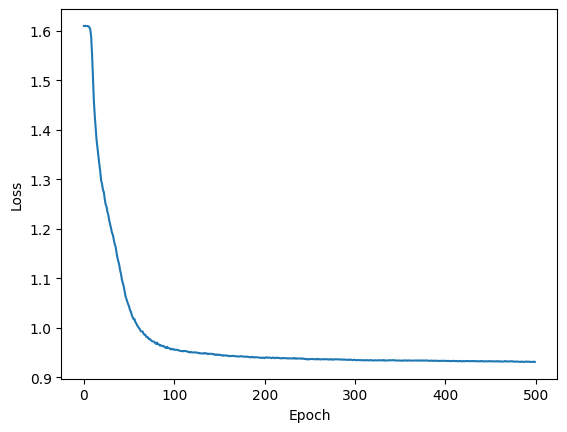

Test accuracy: 464.3630107526882
Accuracy: 0.5062365591397849
Precision: 0.5141690026786598
Recall: 0.5062893116580334
F1-score: 0.507170633613917


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       495
           1       0.56      0.43      0.49       472
           2       0.45      0.44      0.45       449
           3       0.33      0.40      0.36       463
           4       0.60      0.67      0.63       446

    accuracy                           0.51      2325
   macro avg       0.51      0.51      0.51      2325
weighted avg       0.52      0.51      0.51      2325

                    0           1           2           3           4  \
precision    0.633188    0.560773    0.452273    0.328571    0.596040   
recall       0.585859    0.430085    0.443207    0.397408    0.674888   
f1-score     0.608604    0.486811    0.447694    0.359726    0.633018   
support    495.000000  472.000000  449.000000  

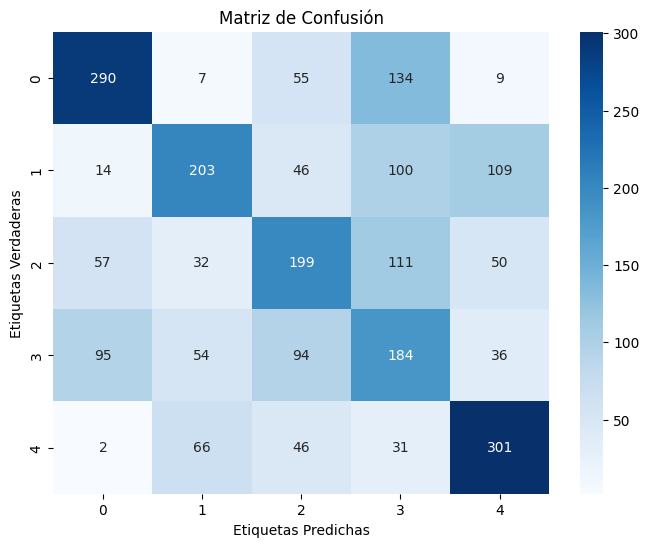

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_500_1e-05_0.3/resultados_500_1e-05_0.3.json
Procesando red con 100 epocas y 0.0001 de factor de aprendizaje y conjunto de entrenamiento 0.8


Procesando epocas:   1%|▌                                                            | 1/100 [00:40<1:06:37, 40.38s/it]

1.6075667851111468


Procesando epocas:   2%|█▏                                                           | 2/100 [01:20<1:05:37, 40.18s/it]

1.4968686938285827


Procesando epocas:   3%|█▊                                                           | 3/100 [02:00<1:04:59, 40.20s/it]

1.3897648537860197


Procesando epocas:   4%|██▍                                                          | 4/100 [02:40<1:04:23, 40.25s/it]

1.337295517500709


Procesando epocas:   5%|███                                                          | 5/100 [03:21<1:03:41, 40.23s/it]

1.2882960950627047


Procesando epocas:   6%|███▋                                                         | 6/100 [04:01<1:02:59, 40.21s/it]

1.2537568365826326


Procesando epocas:   7%|████▍                                                          | 7/100 [04:25<54:12, 34.97s/it]

1.2254000411314123


Procesando epocas:   8%|█████                                                          | 8/100 [04:42<44:46, 29.21s/it]

1.2049048805938047


Procesando epocas:   9%|█████▋                                                         | 9/100 [04:58<38:12, 25.19s/it]

1.1911136998849756


Procesando epocas:  10%|██████▏                                                       | 10/100 [05:15<33:41, 22.46s/it]

1.182055163383484


Procesando epocas:  11%|██████▊                                                       | 11/100 [05:31<30:32, 20.59s/it]

1.169872351253734


Procesando epocas:  12%|███████▍                                                      | 12/100 [05:47<28:16, 19.28s/it]

1.1508961674045115


Procesando epocas:  13%|████████                                                      | 13/100 [06:03<26:37, 18.36s/it]

1.1381507880547468


Procesando epocas:  14%|████████▋                                                     | 14/100 [06:20<25:25, 17.74s/it]

1.1209333563552184


Procesando epocas:  15%|█████████▎                                                    | 15/100 [06:36<24:30, 17.30s/it]

1.1019275353235356


Procesando epocas:  16%|█████████▉                                                    | 16/100 [06:53<23:52, 17.05s/it]

1.084281474351883


Procesando epocas:  17%|██████████▌                                                   | 17/100 [07:09<23:15, 16.82s/it]

1.0794564829153173


Procesando epocas:  18%|███████████▏                                                  | 18/100 [07:25<22:45, 16.65s/it]

1.0699290748904733


Procesando epocas:  19%|███████████▊                                                  | 19/100 [07:41<22:19, 16.54s/it]

1.0594286848517025


Procesando epocas:  20%|████████████▍                                                 | 20/100 [07:58<21:56, 16.46s/it]

1.056497825945125


Procesando epocas:  21%|█████████████                                                 | 21/100 [08:14<21:36, 16.41s/it]

1.049097402306164


Procesando epocas:  22%|█████████████▋                                                | 22/100 [08:30<21:16, 16.36s/it]

1.045193378013723


Procesando epocas:  23%|██████████████▎                                               | 23/100 [08:46<20:57, 16.33s/it]

1.0441286648021024


Procesando epocas:  24%|██████████████▉                                               | 24/100 [09:03<20:39, 16.31s/it]

1.0380892848267276


Procesando epocas:  25%|███████████████▌                                              | 25/100 [09:19<20:23, 16.31s/it]

1.0358794794363133


Procesando epocas:  26%|████████████████                                              | 26/100 [09:35<20:04, 16.28s/it]

1.0343439968193278


Procesando epocas:  27%|████████████████▋                                             | 27/100 [09:51<19:47, 16.26s/it]

1.0299498740364523


Procesando epocas:  28%|█████████████████▎                                            | 28/100 [10:08<19:30, 16.26s/it]

1.028741768879049


Procesando epocas:  29%|█████████████████▉                                            | 29/100 [10:24<19:13, 16.25s/it]

1.0296413028941436


Procesando epocas:  30%|██████████████████▌                                           | 30/100 [10:40<18:57, 16.25s/it]

1.0321484793634976


Procesando epocas:  31%|███████████████████▏                                          | 31/100 [10:56<18:40, 16.24s/it]

1.0294546968796674


Procesando epocas:  32%|███████████████████▊                                          | 32/100 [11:13<18:24, 16.24s/it]

1.0306053466656628


Procesando epocas:  33%|████████████████████▍                                         | 33/100 [11:29<18:07, 16.24s/it]

1.0310851914041184


Procesando epocas:  34%|█████████████████████                                         | 34/100 [11:45<17:51, 16.24s/it]

1.0345823803368737


Procesando epocas:  35%|█████████████████████▋                                        | 35/100 [12:01<17:35, 16.24s/it]

1.0369471883072572


Procesando epocas:  36%|██████████████████████▎                                       | 36/100 [12:18<17:19, 16.24s/it]

1.0304472492021672


Procesando epocas:  37%|██████████████████████▉                                       | 37/100 [12:34<17:02, 16.23s/it]

1.027877271526


Procesando epocas:  38%|███████████████████████▌                                      | 38/100 [12:50<16:46, 16.23s/it]

1.0289943621439093


Procesando epocas:  39%|████████████████████████▏                                     | 39/100 [13:06<16:29, 16.23s/it]

1.0268472089486964


Procesando epocas:  40%|████████████████████████▊                                     | 40/100 [13:22<16:13, 16.23s/it]

1.0268694789970623


Procesando epocas:  41%|█████████████████████████▍                                    | 41/100 [13:39<15:57, 16.23s/it]

1.0223642945289613


Procesando epocas:  42%|██████████████████████████                                    | 42/100 [13:55<15:41, 16.23s/it]

1.021533089174944


Procesando epocas:  43%|██████████████████████████▋                                   | 43/100 [14:11<15:24, 16.23s/it]

1.0215104755233315


Procesando epocas:  44%|███████████████████████████▎                                  | 44/100 [14:27<15:08, 16.23s/it]

1.0282680171377518


Procesando epocas:  45%|███████████████████████████▉                                  | 45/100 [14:44<14:56, 16.30s/it]

1.0253070645472582


Procesando epocas:  46%|████████████████████████████▌                                 | 46/100 [15:00<14:44, 16.37s/it]

1.022296311224208


Procesando epocas:  47%|█████████████████████████████▏                                | 47/100 [15:17<14:25, 16.33s/it]

1.023589146487853


Procesando epocas:  48%|█████████████████████████████▊                                | 48/100 [15:33<14:07, 16.30s/it]

1.0237974819015054


Procesando epocas:  49%|██████████████████████████████▍                               | 49/100 [15:49<13:51, 16.30s/it]

1.02052121758461


Procesando epocas:  50%|███████████████████████████████                               | 50/100 [16:05<13:33, 16.28s/it]

1.0209389556856716


Procesando epocas:  51%|███████████████████████████████▌                              | 51/100 [16:22<13:17, 16.27s/it]

1.0261567571583916


Procesando epocas:  52%|████████████████████████████████▏                             | 52/100 [16:38<13:00, 16.25s/it]

1.027282597738154


Procesando epocas:  53%|████████████████████████████████▊                             | 53/100 [16:54<12:43, 16.24s/it]

1.0272505549823536


Procesando epocas:  54%|█████████████████████████████████▍                            | 54/100 [17:10<12:26, 16.23s/it]

1.0245018811786877


Procesando epocas:  55%|██████████████████████████████████                            | 55/100 [17:26<12:10, 16.23s/it]

1.0213692605495452


Procesando epocas:  56%|██████████████████████████████████▋                           | 56/100 [17:43<11:54, 16.23s/it]

1.019766528115553


Procesando epocas:  57%|███████████████████████████████████▎                          | 57/100 [17:59<11:37, 16.23s/it]

1.021334588177064


Procesando epocas:  58%|███████████████████████████████████▉                          | 58/100 [18:15<11:21, 16.23s/it]

1.0236606811775881


Procesando epocas:  59%|████████████████████████████████████▌                         | 59/100 [18:31<11:05, 16.22s/it]

1.023322648861829


Procesando epocas:  60%|█████████████████████████████████████▏                        | 60/100 [18:48<10:48, 16.22s/it]

1.0230681720901937


Procesando epocas:  61%|█████████████████████████████████████▊                        | 61/100 [19:04<10:32, 16.21s/it]

1.02061645563911


Procesando epocas:  62%|██████████████████████████████████████▍                       | 62/100 [19:20<10:16, 16.22s/it]

1.0204398162224713


Procesando epocas:  63%|███████████████████████████████████████                       | 63/100 [19:36<09:59, 16.21s/it]

1.0189078018945805


Procesando epocas:  64%|███████████████████████████████████████▋                      | 64/100 [19:52<09:43, 16.22s/it]

1.0206537022310145


Procesando epocas:  65%|████████████████████████████████████████▎                     | 65/100 [20:09<09:27, 16.21s/it]

1.015990167505601


Procesando epocas:  66%|████████████████████████████████████████▉                     | 66/100 [20:25<09:11, 16.22s/it]

1.0153599500656127


Procesando epocas:  67%|█████████████████████████████████████████▌                    | 67/100 [20:41<08:55, 16.22s/it]

1.0131368314518647


Procesando epocas:  68%|██████████████████████████████████████████▏                   | 68/100 [20:57<08:38, 16.22s/it]

1.014150384945028


Procesando epocas:  69%|██████████████████████████████████████████▊                   | 69/100 [21:14<08:23, 16.23s/it]

1.0157738895977244


Procesando epocas:  70%|███████████████████████████████████████████▍                  | 70/100 [21:30<08:06, 16.23s/it]

1.015680296982036


Procesando epocas:  71%|████████████████████████████████████████████                  | 71/100 [21:46<07:50, 16.23s/it]

1.0168158285758075


Procesando epocas:  72%|████████████████████████████████████████████▋                 | 72/100 [22:02<07:34, 16.23s/it]

1.0173288005239822


Procesando epocas:  73%|█████████████████████████████████████████████▎                | 73/100 [22:18<07:18, 16.22s/it]

1.0166535419576308


Procesando epocas:  74%|█████████████████████████████████████████████▉                | 74/100 [22:35<07:01, 16.23s/it]

1.016264274190454


Procesando epocas:  75%|██████████████████████████████████████████████▌               | 75/100 [22:51<06:45, 16.24s/it]

1.014495416248546


Procesando epocas:  76%|███████████████████████████████████████████████               | 76/100 [23:07<06:29, 16.23s/it]

1.0153002763495727


Procesando epocas:  77%|███████████████████████████████████████████████▋              | 77/100 [23:23<06:13, 16.23s/it]

1.0107580577625948


Procesando epocas:  78%|████████████████████████████████████████████████▎             | 78/100 [23:40<05:56, 16.22s/it]

1.015660706688376


Procesando epocas:  79%|████████████████████████████████████████████████▉             | 79/100 [23:56<05:40, 16.22s/it]

1.0109398820820976


Procesando epocas:  80%|█████████████████████████████████████████████████▌            | 80/100 [24:12<05:24, 16.22s/it]

1.0103566092603347


Procesando epocas:  81%|██████████████████████████████████████████████████▏           | 81/100 [24:28<05:08, 16.22s/it]

1.0129051040200625


Procesando epocas:  82%|██████████████████████████████████████████████████▊           | 82/100 [24:44<04:52, 16.22s/it]

1.0081394952886245


Procesando epocas:  83%|███████████████████████████████████████████████████▍          | 83/100 [25:01<04:35, 16.23s/it]

1.0101944912882412


Procesando epocas:  84%|████████████████████████████████████████████████████          | 84/100 [25:17<04:19, 16.23s/it]

1.0055470599847682


Procesando epocas:  85%|████████████████████████████████████████████████████▋         | 85/100 [25:33<04:03, 16.22s/it]

1.0044301653609555


Procesando epocas:  86%|█████████████████████████████████████████████████████▎        | 86/100 [25:49<03:47, 16.22s/it]

1.0062487111372107


Procesando epocas:  87%|█████████████████████████████████████████████████████▉        | 87/100 [26:06<03:30, 16.22s/it]

1.0056305583785563


Procesando epocas:  88%|██████████████████████████████████████████████████████▌       | 88/100 [26:22<03:14, 16.22s/it]

1.0069473764475654


Procesando epocas:  89%|███████████████████████████████████████████████████████▏      | 89/100 [26:38<02:58, 16.22s/it]

1.0058883509215186


Procesando epocas:  90%|███████████████████████████████████████████████████████▊      | 90/100 [26:54<02:42, 16.22s/it]

1.006219393014908


Procesando epocas:  91%|████████████████████████████████████████████████████████▍     | 91/100 [27:10<02:25, 16.22s/it]

1.0074268681161545


Procesando epocas:  92%|█████████████████████████████████████████████████████████     | 92/100 [27:27<02:09, 16.22s/it]

1.0060994754819308


Procesando epocas:  93%|█████████████████████████████████████████████████████████▋    | 93/100 [27:43<01:53, 16.22s/it]

1.0120962500572204


Procesando epocas:  94%|██████████████████████████████████████████████████████████▎   | 94/100 [27:59<01:37, 16.22s/it]

1.0050170688068165


Procesando epocas:  95%|██████████████████████████████████████████████████████████▉   | 95/100 [28:15<01:21, 16.22s/it]

1.007867322949802


Procesando epocas:  96%|███████████████████████████████████████████████████████████▌  | 96/100 [28:32<01:04, 16.21s/it]

1.0061827529879177


Procesando epocas:  97%|████████████████████████████████████████████████████████████▏ | 97/100 [28:48<00:48, 16.22s/it]

1.0082799757228178


Procesando epocas:  98%|████████████████████████████████████████████████████████████▊ | 98/100 [29:04<00:32, 16.21s/it]

1.005756088915993


Procesando epocas:  99%|█████████████████████████████████████████████████████████████▍| 99/100 [29:20<00:16, 16.20s/it]

1.0038466674440047


Procesando epocas: 100%|█████████████████████████████████████████████████████████████| 100/100 [29:36<00:00, 17.77s/it]

1.0045534400378957
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Neural_network_classification ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_100_0.0001_0.2/funcion_de_perdida_100_0.0001.png


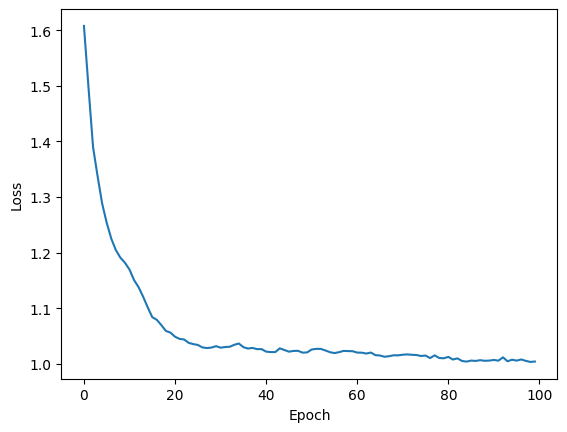

Test accuracy: 463.91483870967744
Accuracy: 0.4486021505376344
Precision: 0.4860781368814068
Recall: 0.44769455617876924
F1-score: 0.4606004390577404


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.55      0.62       495
           1       0.41      0.39      0.40       472
           2       0.29      0.37      0.32       449
           3       0.31      0.39      0.35       463
           4       0.70      0.54      0.61       446

    accuracy                           0.45      2325
   macro avg       0.49      0.45      0.46      2325
weighted avg       0.49      0.45      0.46      2325

                    0           1           2           3           4  \
precision    0.720000    0.407982    0.285217    0.314879    0.702312   
recall       0.545455    0.389831    0.365256    0.393089    0.544843   
f1-score     0.620690    0.398700    0.320312    0.349664    0.613636   
support    495.000000  472.000000  449.00000

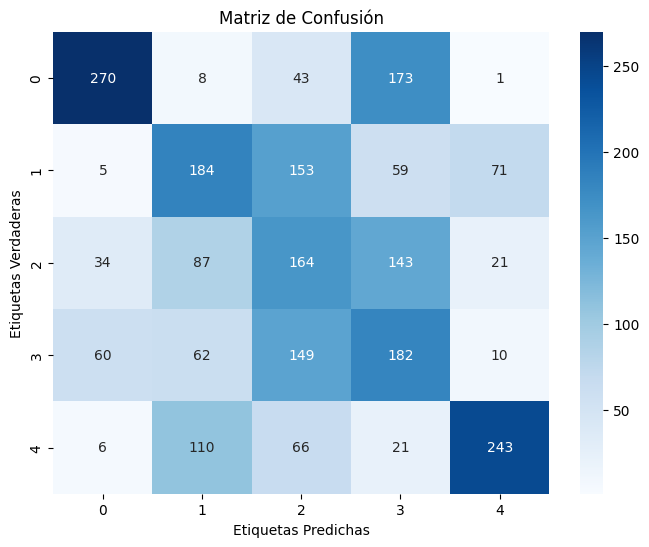

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_100_0.0001_0.2/resultados_100_0.0001_0.2.json
Procesando red con 100 epocas y 1e-05 de factor de aprendizaje y conjunto de entrenamiento 0.8


Procesando epocas:   1%|▋                                                              | 1/100 [00:16<26:48, 16.24s/it]

1.6096498496392193


Procesando epocas:   2%|█▎                                                             | 2/100 [00:32<26:32, 16.25s/it]

1.6095757393275991


Procesando epocas:   3%|█▉                                                             | 3/100 [00:48<26:15, 16.24s/it]

1.6096341385560877


Procesando epocas:   4%|██▌                                                            | 4/100 [01:04<25:57, 16.22s/it]

1.6095400684020098


Procesando epocas:   5%|███▏                                                           | 5/100 [01:21<25:40, 16.22s/it]

1.609315318921033


Procesando epocas:   6%|███▊                                                           | 6/100 [01:37<25:24, 16.21s/it]

1.6086349669624778


Procesando epocas:   7%|████▍                                                          | 7/100 [01:53<25:08, 16.22s/it]

1.6064065049676335


Procesando epocas:   8%|█████                                                          | 8/100 [02:09<24:51, 16.21s/it]

1.600172873805551


Procesando epocas:   9%|█████▋                                                         | 9/100 [02:25<24:35, 16.21s/it]

1.5767454392769757


Procesando epocas:  10%|██████▏                                                       | 10/100 [02:42<24:18, 16.21s/it]

1.5236584053320044


Procesando epocas:  11%|██████▊                                                       | 11/100 [02:58<24:02, 16.21s/it]

1.4783393411075367


Procesando epocas:  12%|███████▍                                                      | 12/100 [03:14<23:46, 16.21s/it]

1.4493007828207578


Procesando epocas:  13%|████████                                                      | 13/100 [03:30<23:30, 16.22s/it]

1.423606307366315


Procesando epocas:  14%|████████▋                                                     | 14/100 [03:47<23:13, 16.21s/it]

1.3989389559801888


Procesando epocas:  15%|█████████▎                                                    | 15/100 [04:03<22:57, 16.21s/it]

1.3863840110161725


Procesando epocas:  16%|█████████▉                                                    | 16/100 [04:19<22:41, 16.21s/it]

1.3654643549638636


Procesando epocas:  17%|██████████▌                                                   | 17/100 [04:35<22:25, 16.21s/it]

1.3464681225664474


Procesando epocas:  18%|███████████▏                                                  | 18/100 [04:51<22:09, 16.22s/it]

1.332961234625648


Procesando epocas:  19%|███████████▊                                                  | 19/100 [05:08<21:53, 16.21s/it]

1.3180831888142754


Procesando epocas:  20%|████████████▍                                                 | 20/100 [05:24<21:37, 16.21s/it]

1.3038646017803865


Procesando epocas:  21%|█████████████                                                 | 21/100 [05:40<21:21, 16.22s/it]

1.2922843463280622


Procesando epocas:  22%|█████████████▋                                                | 22/100 [05:56<21:05, 16.23s/it]

1.2806987524032594


Procesando epocas:  23%|██████████████▎                                               | 23/100 [06:12<20:49, 16.22s/it]

1.2678804671063142


Procesando epocas:  24%|██████████████▉                                               | 24/100 [06:29<20:32, 16.22s/it]

1.25823572102715


Procesando epocas:  25%|███████████████▌                                              | 25/100 [06:45<20:16, 16.22s/it]

1.248499839446124


Procesando epocas:  26%|████████████████                                              | 26/100 [07:01<20:00, 16.22s/it]

1.2406953573226929


Procesando epocas:  27%|████████████████▋                                             | 27/100 [07:17<19:44, 16.22s/it]

1.2338422831367044


Procesando epocas:  28%|█████████████████▎                                            | 28/100 [07:34<19:27, 16.22s/it]

1.2255552319919363


Procesando epocas:  29%|█████████████████▉                                            | 29/100 [07:50<19:11, 16.22s/it]

1.2158159760867848


Procesando epocas:  30%|██████████████████▌                                           | 30/100 [08:06<18:55, 16.23s/it]

1.2136789889896618


Procesando epocas:  31%|███████████████████▏                                          | 31/100 [08:22<18:39, 16.22s/it]

1.2042167909005108


Procesando epocas:  32%|███████████████████▊                                          | 32/100 [08:38<18:22, 16.22s/it]

1.1988468275350683


Procesando epocas:  33%|████████████████████▍                                         | 33/100 [08:55<18:06, 16.21s/it]

1.1970724603709053


Procesando epocas:  34%|█████████████████████                                         | 34/100 [09:11<17:50, 16.22s/it]

1.1927807639626895


Procesando epocas:  35%|█████████████████████▋                                        | 35/100 [09:27<17:33, 16.21s/it]

1.1884012152166927


Procesando epocas:  36%|██████████████████████▎                                       | 36/100 [09:43<17:17, 16.21s/it]

1.1828193236799802


Procesando epocas:  37%|██████████████████████▉                                       | 37/100 [10:00<17:01, 16.22s/it]

1.1821610471781563


Procesando epocas:  38%|███████████████████████▌                                      | 38/100 [10:16<16:45, 16.22s/it]

1.1761456174008986


Procesando epocas:  39%|████████████████████████▏                                     | 39/100 [10:32<16:29, 16.22s/it]

1.1725000444580527


Procesando epocas:  40%|████████████████████████▊                                     | 40/100 [10:48<16:14, 16.23s/it]

1.1673506554435282


Procesando epocas:  41%|█████████████████████████▍                                    | 41/100 [11:04<15:57, 16.23s/it]

1.1626920875381022


Procesando epocas:  42%|██████████████████████████                                    | 42/100 [11:21<15:41, 16.23s/it]

1.1665031853844137


Procesando epocas:  43%|██████████████████████████▋                                   | 43/100 [11:37<15:24, 16.22s/it]

1.1590252013767466


Procesando epocas:  44%|███████████████████████████▎                                  | 44/100 [11:53<15:08, 16.22s/it]

1.1578745309044334


Procesando epocas:  45%|███████████████████████████▉                                  | 45/100 [12:09<14:52, 16.22s/it]

1.1551548442419837


Procesando epocas:  46%|████████████████████████████▌                                 | 46/100 [12:26<14:35, 16.22s/it]

1.15113304011962


Procesando epocas:  47%|█████████████████████████████▏                                | 47/100 [12:42<14:19, 16.22s/it]

1.145216332463657


Procesando epocas:  48%|█████████████████████████████▊                                | 48/100 [12:58<14:03, 16.23s/it]

1.1410943658912882


Procesando epocas:  49%|██████████████████████████████▍                               | 49/100 [13:14<13:47, 16.22s/it]

1.1395620289970847


Procesando epocas:  50%|███████████████████████████████                               | 50/100 [13:30<13:30, 16.22s/it]

1.1332447462222155


Procesando epocas:  51%|███████████████████████████████▌                              | 51/100 [13:47<13:14, 16.22s/it]

1.1320862563217386


Procesando epocas:  52%|████████████████████████████████▏                             | 52/100 [14:03<12:58, 16.22s/it]

1.1301113721202403


Procesando epocas:  53%|████████████████████████████████▊                             | 53/100 [14:19<12:42, 16.22s/it]

1.1245026553378386


Procesando epocas:  54%|█████████████████████████████████▍                            | 54/100 [14:35<12:25, 16.21s/it]

1.1184625264476327


Procesando epocas:  55%|██████████████████████████████████                            | 55/100 [14:52<12:09, 16.22s/it]

1.11468106508255


Procesando epocas:  56%|██████████████████████████████████▋                           | 56/100 [15:08<11:53, 16.22s/it]

1.111309091834461


Procesando epocas:  57%|███████████████████████████████████▎                          | 57/100 [15:24<11:37, 16.22s/it]

1.1042781987610986


Procesando epocas:  58%|███████████████████████████████████▉                          | 58/100 [15:40<11:21, 16.22s/it]

1.1008849498103648


Procesando epocas:  59%|████████████████████████████████████▌                         | 59/100 [15:56<11:05, 16.23s/it]

1.095890059190638


Procesando epocas:  60%|█████████████████████████████████████▏                        | 60/100 [16:13<10:48, 16.22s/it]

1.0948488245992098


Procesando epocas:  61%|█████████████████████████████████████▊                        | 61/100 [16:29<10:32, 16.23s/it]

1.0933228738167706


Procesando epocas:  62%|██████████████████████████████████████▍                       | 62/100 [16:45<10:16, 16.23s/it]

1.0882918364861431


Procesando epocas:  63%|███████████████████████████████████████                       | 63/100 [17:01<10:00, 16.23s/it]

1.085441346028272


Procesando epocas:  64%|███████████████████████████████████████▋                      | 64/100 [17:18<09:44, 16.23s/it]

1.082620803047629


Procesando epocas:  65%|████████████████████████████████████████▎                     | 65/100 [17:34<09:27, 16.23s/it]

1.0758319325306835


Procesando epocas:  66%|████████████████████████████████████████▉                     | 66/100 [17:50<09:11, 16.23s/it]

1.0723072556888356


Procesando epocas:  67%|█████████████████████████████████████████▌                    | 67/100 [18:06<08:55, 16.23s/it]

1.0713993759716258


Procesando epocas:  68%|██████████████████████████████████████████▏                   | 68/100 [18:22<08:39, 16.23s/it]

1.0729307027424082


Procesando epocas:  69%|██████████████████████████████████████████▊                   | 69/100 [18:39<08:22, 16.22s/it]

1.065819738892948


Procesando epocas:  70%|███████████████████████████████████████████▍                  | 70/100 [18:55<08:06, 16.22s/it]

1.0654468336526086


Procesando epocas:  71%|████████████████████████████████████████████                  | 71/100 [19:11<07:50, 16.21s/it]

1.064081024422365


Procesando epocas:  72%|████████████████████████████████████████████▋                 | 72/100 [19:27<07:34, 16.22s/it]

1.0590604978449205


Procesando epocas:  73%|█████████████████████████████████████████████▎                | 73/100 [19:44<07:17, 16.22s/it]

1.0570994580493254


Procesando epocas:  74%|█████████████████████████████████████████████▉                | 74/100 [20:00<07:01, 16.22s/it]

1.0579228551948772


Procesando epocas:  75%|██████████████████████████████████████████████▌               | 75/100 [20:16<06:45, 16.22s/it]

1.053696462687324


Procesando epocas:  76%|███████████████████████████████████████████████               | 76/100 [20:32<06:29, 16.22s/it]

1.0507679644752952


Procesando epocas:  77%|███████████████████████████████████████████████▋              | 77/100 [20:48<06:13, 16.23s/it]

1.0529562126187717


Procesando epocas:  78%|████████████████████████████████████████████████▎             | 78/100 [21:05<05:56, 16.23s/it]

1.0488626532694874


Procesando epocas:  79%|████████████████████████████████████████████████▉             | 79/100 [21:21<05:40, 16.23s/it]

1.0464046962120954


Procesando epocas:  80%|█████████████████████████████████████████████████▌            | 80/100 [21:37<05:24, 16.22s/it]

1.0442282764350668


Procesando epocas:  81%|██████████████████████████████████████████████████▏           | 81/100 [21:53<05:08, 16.22s/it]

1.0456896508441251


Procesando epocas:  82%|██████████████████████████████████████████████████▊           | 82/100 [22:10<04:52, 16.22s/it]

1.0449223809382495


Procesando epocas:  83%|███████████████████████████████████████████████████▍          | 83/100 [22:26<04:35, 16.22s/it]

1.0415918427355149


Procesando epocas:  84%|████████████████████████████████████████████████████          | 84/100 [22:42<04:19, 16.21s/it]

1.043468243935529


Procesando epocas:  85%|████████████████████████████████████████████████████▋         | 85/100 [22:58<04:03, 16.21s/it]

1.0410158970776726


Procesando epocas:  86%|█████████████████████████████████████████████████████▎        | 86/100 [23:14<03:46, 16.21s/it]

1.0393303467946895


Procesando epocas:  87%|█████████████████████████████████████████████████████▉        | 87/100 [23:31<03:30, 16.21s/it]

1.0377194709637585


Procesando epocas:  88%|██████████████████████████████████████████████████████▌       | 88/100 [23:47<03:14, 16.21s/it]

1.0363731605165145


Procesando epocas:  89%|███████████████████████████████████████████████████████▏      | 89/100 [24:03<02:58, 16.21s/it]

1.0373004867750055


Procesando epocas:  90%|███████████████████████████████████████████████████████▊      | 90/100 [24:19<02:42, 16.22s/it]

1.0363100072916815


Procesando epocas:  91%|████████████████████████████████████████████████████████▍     | 91/100 [24:35<02:25, 16.21s/it]

1.0340771015952614


Procesando epocas:  92%|█████████████████████████████████████████████████████████     | 92/100 [24:52<02:09, 16.22s/it]

1.0321543854825637


Procesando epocas:  93%|█████████████████████████████████████████████████████████▋    | 93/100 [25:08<01:54, 16.31s/it]

1.0324927168733933


Procesando epocas:  94%|██████████████████████████████████████████████████████████▎   | 94/100 [25:24<01:37, 16.29s/it]

1.034608412139556


Procesando epocas:  95%|██████████████████████████████████████████████████████████▉   | 95/100 [25:41<01:21, 16.30s/it]

1.0329392247340259


Procesando epocas:  96%|███████████████████████████████████████████████████████████▌  | 96/100 [25:57<01:05, 16.28s/it]

1.0295473736875198


Procesando epocas:  97%|████████████████████████████████████████████████████████████▏ | 97/100 [26:13<00:48, 16.26s/it]

1.029525774717331


Procesando epocas:  98%|████████████████████████████████████████████████████████████▊ | 98/100 [26:29<00:32, 16.26s/it]

1.0295487621251274


Procesando epocas:  99%|█████████████████████████████████████████████████████████████▍| 99/100 [26:46<00:16, 16.25s/it]

1.0300219553358414


Procesando epocas: 100%|█████████████████████████████████████████████████████████████| 100/100 [27:02<00:00, 16.23s/it]

1.026121788515764
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Neural_network_classification ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_100_1e-05_0.2/funcion_de_perdida_100_1e-05.png


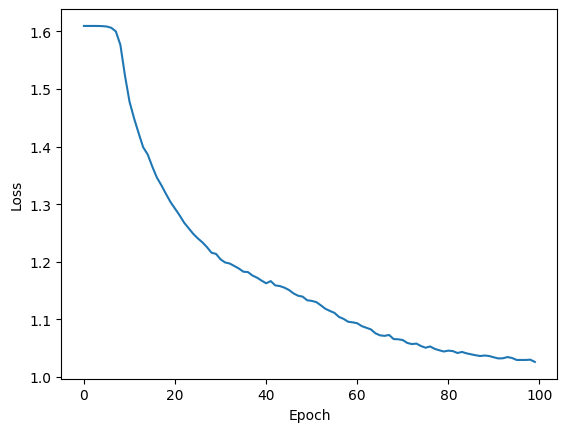

Test accuracy: 466.1956989247312
Accuracy: 0.4511827956989247
Precision: 0.4381383186522516
Recall: 0.44912056987382015
F1-score: 0.44180165321349973


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.67      0.62       495
           1       0.39      0.31      0.35       472
           2       0.29      0.28      0.29       449
           3       0.33      0.32      0.32       463
           4       0.60      0.66      0.63       446

    accuracy                           0.45      2325
   macro avg       0.44      0.45      0.44      2325
weighted avg       0.44      0.45      0.44      2325

                    0           1           2           3           4  \
precision    0.579861    0.388451    0.290618    0.332579    0.599182   
recall       0.674747    0.313559    0.282851    0.317495    0.656951   
f1-score     0.623716    0.347011    0.286682    0.324862    0.626738   
support    495.000000  472.000000  449.00000

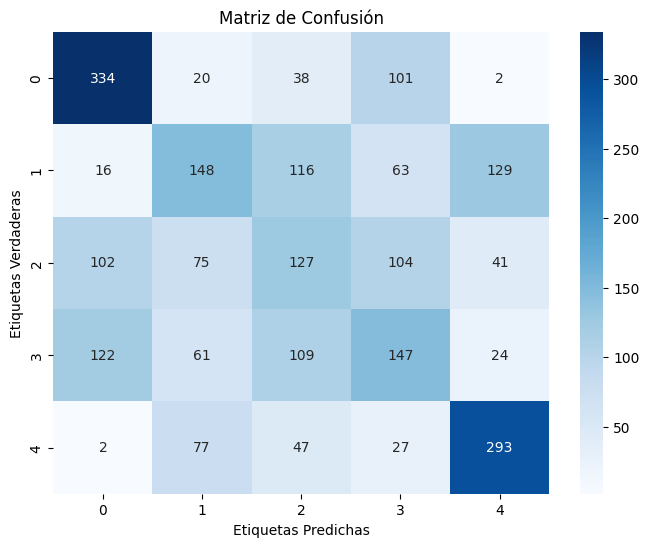

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_100_1e-05_0.2/resultados_100_1e-05_0.2.json
Procesando red con 300 epocas y 0.0001 de factor de aprendizaje y conjunto de entrenamiento 0.8


Procesando epocas:   0%|▏                                                            | 1/300 [00:16<1:20:55, 16.24s/it]

1.608685497676625


Procesando epocas:   1%|▍                                                            | 2/300 [00:32<1:20:37, 16.23s/it]

1.5180068689234116


Procesando epocas:   1%|▌                                                            | 3/300 [00:48<1:20:20, 16.23s/it]

1.408065123417798


Procesando epocas:   1%|▊                                                            | 4/300 [01:04<1:20:04, 16.23s/it]

1.3387979304089266


Procesando epocas:   2%|█                                                            | 5/300 [01:21<1:19:47, 16.23s/it]

1.2910409317297094


Procesando epocas:   2%|█▏                                                           | 6/300 [01:37<1:19:29, 16.22s/it]

1.2527433696915122


Procesando epocas:   2%|█▍                                                           | 7/300 [01:53<1:19:12, 16.22s/it]

1.222782569773057


Procesando epocas:   3%|█▋                                                           | 8/300 [02:09<1:18:53, 16.21s/it]

1.197915061081157


Procesando epocas:   3%|█▊                                                           | 9/300 [02:25<1:18:37, 16.21s/it]

1.180445116407731


Procesando epocas:   3%|██                                                          | 10/300 [02:42<1:18:22, 16.21s/it]

1.162671764457927


Procesando epocas:   4%|██▏                                                         | 11/300 [02:58<1:18:05, 16.21s/it]

1.1426137699800378


Procesando epocas:   4%|██▍                                                         | 12/300 [03:14<1:17:50, 16.22s/it]

1.1224446976886076


Procesando epocas:   4%|██▌                                                         | 13/300 [03:30<1:17:35, 16.22s/it]

1.0969006657600402


Procesando epocas:   5%|██▊                                                         | 14/300 [03:47<1:17:16, 16.21s/it]

1.0843999129884383


Procesando epocas:   5%|███                                                         | 15/300 [04:03<1:16:59, 16.21s/it]

1.074955790533739


Procesando epocas:   5%|███▏                                                        | 16/300 [04:19<1:16:42, 16.21s/it]

1.0578160980168512


Procesando epocas:   6%|███▍                                                        | 17/300 [04:35<1:16:29, 16.22s/it]

1.055032287976321


Procesando epocas:   6%|███▌                                                        | 18/300 [04:51<1:16:16, 16.23s/it]

1.0466020563069511


Procesando epocas:   6%|███▊                                                        | 19/300 [05:08<1:15:58, 16.22s/it]

1.0426677188452553


Procesando epocas:   7%|████                                                        | 20/300 [05:24<1:15:41, 16.22s/it]

1.036310847015942


Procesando epocas:   7%|████▏                                                       | 21/300 [05:40<1:15:26, 16.22s/it]

1.0338167264181024


Procesando epocas:   7%|████▍                                                       | 22/300 [05:56<1:15:09, 16.22s/it]

1.0276465903310215


Procesando epocas:   8%|████▌                                                       | 23/300 [06:13<1:14:53, 16.22s/it]

1.0311982161858502


Procesando epocas:   8%|████▊                                                       | 24/300 [06:29<1:14:36, 16.22s/it]

1.026661464396645


Procesando epocas:   8%|█████                                                       | 25/300 [06:45<1:14:20, 16.22s/it]

1.0257119319018195


Procesando epocas:   9%|█████▏                                                      | 26/300 [07:01<1:14:03, 16.22s/it]

1.0256768861237695


Procesando epocas:   9%|█████▍                                                      | 27/300 [07:17<1:13:45, 16.21s/it]

1.0282632989041947


Procesando epocas:   9%|█████▌                                                      | 28/300 [07:34<1:13:30, 16.21s/it]

1.0262873723226436


Procesando epocas:  10%|█████▊                                                      | 29/300 [07:50<1:13:16, 16.22s/it]

1.02435700823279


Procesando epocas:  10%|██████                                                      | 30/300 [08:06<1:12:58, 16.22s/it]

1.0242381004726187


Procesando epocas:  10%|██████▏                                                     | 31/300 [08:22<1:12:43, 16.22s/it]

1.025491445204791


Procesando epocas:  11%|██████▍                                                     | 32/300 [08:39<1:12:26, 16.22s/it]

1.0243182255941279


Procesando epocas:  11%|██████▌                                                     | 33/300 [08:55<1:12:08, 16.21s/it]

1.0275059675469118


Procesando epocas:  11%|██████▊                                                     | 34/300 [09:11<1:11:55, 16.22s/it]

1.022153044798795


Procesando epocas:  12%|███████                                                     | 35/300 [09:27<1:11:38, 16.22s/it]

1.0222152475048514


Procesando epocas:  12%|███████▏                                                    | 36/300 [09:43<1:11:22, 16.22s/it]

1.0183894581654493


Procesando epocas:  12%|███████▍                                                    | 37/300 [10:00<1:11:08, 16.23s/it]

1.014763962170657


Procesando epocas:  13%|███████▌                                                    | 38/300 [10:16<1:10:49, 16.22s/it]

1.0149093904915978


Procesando epocas:  13%|███████▊                                                    | 39/300 [10:32<1:10:31, 16.21s/it]

1.0121258626965914


Procesando epocas:  13%|████████                                                    | 40/300 [10:48<1:10:15, 16.21s/it]

1.0158969844088834


Procesando epocas:  14%|████████▏                                                   | 41/300 [11:04<1:09:58, 16.21s/it]

1.0169564464512992


Procesando epocas:  14%|████████▍                                                   | 42/300 [11:21<1:09:42, 16.21s/it]

1.0179679495446823


Procesando epocas:  14%|████████▌                                                   | 43/300 [11:37<1:09:26, 16.21s/it]

1.0166624212966247


Procesando epocas:  15%|████████▊                                                   | 44/300 [11:53<1:09:09, 16.21s/it]

1.0152173073852764


Procesando epocas:  15%|█████████                                                   | 45/300 [12:09<1:08:54, 16.21s/it]

1.0160756342551287


Procesando epocas:  15%|█████████▏                                                  | 46/300 [12:25<1:08:36, 16.21s/it]

1.0138110472875483


Procesando epocas:  16%|█████████▍                                                  | 47/300 [12:42<1:08:22, 16.22s/it]

1.0139623259796815


Procesando epocas:  16%|█████████▌                                                  | 48/300 [12:58<1:08:05, 16.21s/it]

1.0136263377526227


Procesando epocas:  16%|█████████▊                                                  | 49/300 [13:14<1:07:49, 16.21s/it]

1.012005304588991


Procesando epocas:  17%|██████████                                                  | 50/300 [13:30<1:07:35, 16.22s/it]

1.011505785409142


Procesando epocas:  17%|██████████▏                                                 | 51/300 [13:47<1:07:18, 16.22s/it]

1.0114807668854209


Procesando epocas:  17%|██████████▍                                                 | 52/300 [14:03<1:07:02, 16.22s/it]

1.0152656144955579


Procesando epocas:  18%|██████████▌                                                 | 53/300 [14:19<1:06:47, 16.23s/it]

1.0116434416350197


Procesando epocas:  18%|██████████▊                                                 | 54/300 [14:35<1:06:30, 16.22s/it]

1.0179557484738968


Procesando epocas:  18%|███████████                                                 | 55/300 [14:52<1:06:14, 16.22s/it]

1.0167354636332568


Procesando epocas:  19%|███████████▏                                                | 56/300 [15:08<1:05:57, 16.22s/it]

1.0141922631684472


Procesando epocas:  19%|███████████▍                                                | 57/300 [15:24<1:05:41, 16.22s/it]

1.0132482150021722


Procesando epocas:  19%|███████████▌                                                | 58/300 [15:40<1:05:26, 16.23s/it]

1.010967493758482


Procesando epocas:  20%|███████████▊                                                | 59/300 [15:56<1:05:13, 16.24s/it]

1.0125775971833397


Procesando epocas:  20%|████████████                                                | 60/300 [16:13<1:04:56, 16.24s/it]

1.0092006153920117


Procesando epocas:  20%|████████████▏                                               | 61/300 [16:29<1:04:39, 16.23s/it]

1.0098873198032379


Procesando epocas:  21%|████████████▍                                               | 62/300 [16:45<1:04:22, 16.23s/it]

1.0085306118516362


Procesando epocas:  21%|████████████▌                                               | 63/300 [17:01<1:04:06, 16.23s/it]

1.0082661832080169


Procesando epocas:  21%|████████████▊                                               | 64/300 [17:18<1:03:48, 16.22s/it]

1.0099816494128284


Procesando epocas:  22%|█████████████                                               | 65/300 [17:34<1:03:35, 16.24s/it]

1.0047956494724049


Procesando epocas:  22%|█████████████▏                                              | 66/300 [17:50<1:03:16, 16.23s/it]

1.0055408067563


Procesando epocas:  22%|█████████████▍                                              | 67/300 [18:06<1:03:00, 16.23s/it]

1.0059049438027774


Procesando epocas:  23%|█████████████▌                                              | 68/300 [18:22<1:02:44, 16.22s/it]

1.0061559189768399


Procesando epocas:  23%|█████████████▊                                              | 69/300 [18:39<1:02:29, 16.23s/it]

1.0045671939849854


Procesando epocas:  23%|██████████████                                              | 70/300 [18:55<1:02:12, 16.23s/it]

1.0082870385226081


Procesando epocas:  24%|██████████████▏                                             | 71/300 [19:11<1:01:56, 16.23s/it]

1.0067246205666487


Procesando epocas:  24%|██████████████▍                                             | 72/300 [19:27<1:01:39, 16.23s/it]

1.0030607823063344


Procesando epocas:  24%|██████████████▌                                             | 73/300 [19:44<1:01:23, 16.23s/it]

1.00300373785636


Procesando epocas:  25%|██████████████▊                                             | 74/300 [20:00<1:01:07, 16.23s/it]

1.0032660796361812


Procesando epocas:  25%|███████████████                                             | 75/300 [20:16<1:00:51, 16.23s/it]

1.0052035408861497


Procesando epocas:  25%|███████████████▏                                            | 76/300 [20:32<1:00:33, 16.22s/it]

1.0029655119952035


Procesando epocas:  26%|███████████████▍                                            | 77/300 [20:49<1:00:20, 16.24s/it]

1.0026805625242345


Procesando epocas:  26%|███████████████▌                                            | 78/300 [21:05<1:00:04, 16.24s/it]

1.0031455341507407


Procesando epocas:  26%|████████████████▎                                             | 79/300 [21:21<59:46, 16.23s/it]

1.0001670718193054


Procesando epocas:  27%|████████████████▌                                             | 80/300 [21:37<59:30, 16.23s/it]

1.0004908544175766


Procesando epocas:  27%|████████████████▋                                             | 81/300 [21:53<59:14, 16.23s/it]

1.0014396499185


Procesando epocas:  27%|████████████████▉                                             | 82/300 [22:10<58:57, 16.23s/it]

1.0058731531395633


Procesando epocas:  28%|█████████████████▏                                            | 83/300 [22:26<58:40, 16.22s/it]

1.004748790404376


Procesando epocas:  28%|█████████████████▎                                            | 84/300 [22:42<58:24, 16.22s/it]

1.001393071342917


Procesando epocas:  28%|█████████████████▌                                            | 85/300 [22:58<58:09, 16.23s/it]

0.9996121911441579


Procesando epocas:  29%|█████████████████▊                                            | 86/300 [23:15<57:52, 16.23s/it]

0.9983178489348468


Procesando epocas:  29%|█████████████████▉                                            | 87/300 [23:31<57:35, 16.22s/it]

0.997211251188727


Procesando epocas:  29%|██████████████████▏                                           | 88/300 [23:47<57:19, 16.22s/it]

1.0004563412245582


Procesando epocas:  30%|██████████████████▍                                           | 89/300 [24:03<57:02, 16.22s/it]

0.9991611883920781


Procesando epocas:  30%|██████████████████▌                                           | 90/300 [24:19<56:46, 16.22s/it]

1.001265281088212


Procesando epocas:  30%|██████████████████▊                                           | 91/300 [24:36<56:30, 16.22s/it]

1.0032678702298332


Procesando epocas:  31%|███████████████████                                           | 92/300 [24:52<56:13, 16.22s/it]

1.0008149203132182


Procesando epocas:  31%|███████████████████▏                                          | 93/300 [25:08<55:58, 16.23s/it]

0.9996046220555025


Procesando epocas:  31%|███████████████████▍                                          | 94/300 [25:24<55:42, 16.23s/it]

0.9989003328716054


Procesando epocas:  32%|███████████████████▋                                          | 95/300 [25:41<55:28, 16.24s/it]

1.0009060067289015


Procesando epocas:  32%|███████████████████▊                                          | 96/300 [25:57<55:10, 16.23s/it]

1.0001618669313543


Procesando epocas:  32%|████████████████████                                          | 97/300 [26:13<54:54, 16.23s/it]

0.9995586395263671


Procesando epocas:  33%|████████████████████▎                                         | 98/300 [26:29<54:37, 16.22s/it]

0.9981291953255148


Procesando epocas:  33%|████████████████████▍                                         | 99/300 [26:46<54:22, 16.23s/it]

1.0000069327214185


Procesando epocas:  33%|████████████████████▎                                        | 100/300 [27:02<54:05, 16.23s/it]

1.0013135545394


Procesando epocas:  34%|████████████████████▌                                        | 101/300 [27:18<53:47, 16.22s/it]

0.9984680961160098


Procesando epocas:  34%|████████████████████▋                                        | 102/300 [27:34<53:33, 16.23s/it]

0.9980809723629671


Procesando epocas:  34%|████████████████████▉                                        | 103/300 [27:51<53:27, 16.28s/it]

0.9966933660647448


Procesando epocas:  35%|█████████████████████▏                                       | 104/300 [28:07<53:10, 16.28s/it]

0.9958596408367157


Procesando epocas:  35%|█████████████████████▎                                       | 105/300 [28:23<52:51, 16.27s/it]

0.9961295278633342


Procesando epocas:  35%|█████████████████████▌                                       | 106/300 [28:39<52:34, 16.26s/it]

0.9966488161507775


Procesando epocas:  36%|█████████████████████▊                                       | 107/300 [28:56<52:17, 16.26s/it]

0.9981423420064589


Procesando epocas:  36%|█████████████████████▉                                       | 108/300 [29:12<52:01, 16.26s/it]

0.9963351007770089


Procesando epocas:  36%|██████████████████████▏                                      | 109/300 [29:28<51:44, 16.26s/it]

0.9989395509747898


Procesando epocas:  37%|██████████████████████▎                                      | 110/300 [29:44<51:26, 16.25s/it]

0.9987301703761605


Procesando epocas:  37%|██████████████████████▌                                      | 111/300 [30:01<51:09, 16.24s/it]

0.9974787785726436


Procesando epocas:  37%|██████████████████████▊                                      | 112/300 [30:17<50:51, 16.23s/it]

0.9953639735193813


Procesando epocas:  38%|██████████████████████▉                                      | 113/300 [30:33<50:34, 16.23s/it]

0.9977620482444763


Procesando epocas:  38%|███████████████████████▏                                     | 114/300 [30:49<50:20, 16.24s/it]

0.9948790066382465


Procesando epocas:  38%|███████████████████████▍                                     | 115/300 [31:06<50:05, 16.24s/it]

0.9989932701868169


Procesando epocas:  39%|███████████████████████▌                                     | 116/300 [31:22<49:47, 16.24s/it]

0.9998615380595712


Procesando epocas:  39%|███████████████████████▊                                     | 117/300 [31:38<49:31, 16.24s/it]

0.9987833503414603


Procesando epocas:  39%|███████████████████████▉                                     | 118/300 [31:54<49:14, 16.24s/it]

0.9976655139642603


Procesando epocas:  40%|████████████████████████▏                                    | 119/300 [32:10<48:58, 16.23s/it]

0.9989692505668192


Procesando epocas:  40%|████████████████████████▍                                    | 120/300 [32:27<48:42, 16.24s/it]

0.9980013892931097


Procesando epocas:  40%|████████████████████████▌                                    | 121/300 [32:43<48:26, 16.24s/it]

0.994483882188797


Procesando epocas:  41%|████████████████████████▊                                    | 122/300 [32:59<48:10, 16.24s/it]

0.9938834299059475


Procesando epocas:  41%|█████████████████████████                                    | 123/300 [33:15<47:53, 16.23s/it]

0.9917480125146754


Procesando epocas:  41%|█████████████████████████▏                                   | 124/300 [33:32<47:39, 16.25s/it]

0.9935152509633233


Procesando epocas:  42%|█████████████████████████▍                                   | 125/300 [33:48<47:22, 16.24s/it]

0.9915831635980045


Procesando epocas:  42%|█████████████████████████▌                                   | 126/300 [34:04<47:06, 16.25s/it]

0.9926902813069961


Procesando epocas:  42%|█████████████████████████▊                                   | 127/300 [34:20<46:49, 16.24s/it]

0.9962064434500302


Procesando epocas:  43%|██████████████████████████                                   | 128/300 [34:37<46:33, 16.24s/it]

0.9952557441066293


Procesando epocas:  43%|██████████████████████████▏                                  | 129/300 [34:53<46:15, 16.23s/it]

0.9939100311082952


Procesando epocas:  43%|██████████████████████████▍                                  | 130/300 [35:09<45:59, 16.23s/it]

0.9923388926421894


Procesando epocas:  44%|██████████████████████████▋                                  | 131/300 [35:25<45:44, 16.24s/it]

0.9921866785077488


Procesando epocas:  44%|██████████████████████████▊                                  | 132/300 [35:42<45:40, 16.31s/it]

0.9921725560637081


Procesando epocas:  44%|███████████████████████████                                  | 133/300 [35:58<45:20, 16.29s/it]

0.9930761459995718


Procesando epocas:  45%|███████████████████████████▏                                 | 134/300 [36:14<45:02, 16.28s/it]

0.9906586131628822


Procesando epocas:  45%|███████████████████████████▍                                 | 135/300 [36:31<44:46, 16.28s/it]

0.9933836768655216


Procesando epocas:  45%|███████████████████████████▋                                 | 136/300 [36:47<44:30, 16.28s/it]

0.991303498955334


Procesando epocas:  46%|███████████████████████████▊                                 | 137/300 [37:03<44:12, 16.27s/it]

0.9909320680534138


Procesando epocas:  46%|████████████████████████████                                 | 138/300 [37:19<43:53, 16.25s/it]

0.9926570664433872


Procesando epocas:  46%|████████████████████████████▎                                | 139/300 [37:36<43:36, 16.25s/it]

0.9891027608338524


Procesando epocas:  47%|████████████████████████████▍                                | 140/300 [37:52<43:19, 16.25s/it]

0.9889574391000411


Procesando epocas:  47%|████████████████████████████▋                                | 141/300 [38:08<43:01, 16.24s/it]

0.9879402332446154


Procesando epocas:  47%|████████████████████████████▊                                | 142/300 [38:24<42:44, 16.23s/it]

0.9890039601746727


Procesando epocas:  48%|█████████████████████████████                                | 143/300 [38:41<42:30, 16.25s/it]

0.9885810757384581


Procesando epocas:  48%|█████████████████████████████▎                               | 144/300 [38:57<42:14, 16.25s/it]

0.9884022239376516


Procesando epocas:  48%|█████████████████████████████▍                               | 145/300 [39:13<41:59, 16.26s/it]

0.989544146902421


Procesando epocas:  49%|█████████████████████████████▋                               | 146/300 [39:29<41:41, 16.24s/it]

0.9872653764836928


Procesando epocas:  49%|█████████████████████████████▉                               | 147/300 [39:46<41:32, 16.29s/it]

0.9895524480763603


Procesando epocas:  49%|██████████████████████████████                               | 148/300 [40:02<41:14, 16.28s/it]

0.9883621349054225


Procesando epocas:  50%|██████████████████████████████▎                              | 149/300 [40:18<40:56, 16.27s/it]

0.9877167912090525


Procesando epocas:  50%|██████████████████████████████▌                              | 150/300 [40:35<40:49, 16.33s/it]

0.9881229516337899


Procesando epocas:  50%|██████████████████████████████▋                              | 151/300 [40:51<40:28, 16.30s/it]

0.9890801405205446


Procesando epocas:  51%|██████████████████████████████▉                              | 152/300 [41:07<40:08, 16.27s/it]

0.988575667142868


Procesando epocas:  51%|███████████████████████████████                              | 153/300 [41:23<39:49, 16.26s/it]

0.988666109828388


Procesando epocas:  51%|███████████████████████████████▎                             | 154/300 [41:40<39:31, 16.24s/it]

0.9880018195685218


Procesando epocas:  52%|███████████████████████████████▌                             | 155/300 [41:56<39:15, 16.24s/it]

0.9887736569432651


Procesando epocas:  52%|███████████████████████████████▋                             | 156/300 [42:12<38:58, 16.24s/it]

0.9882402732091792


Procesando epocas:  52%|███████████████████████████████▉                             | 157/300 [42:28<38:40, 16.23s/it]

0.9891124357195461


Procesando epocas:  53%|████████████████████████████████▏                            | 158/300 [42:44<38:24, 16.23s/it]

0.9870127772583681


Procesando epocas:  53%|████████████████████████████████▎                            | 159/300 [43:01<38:09, 16.24s/it]

0.9873071912456961


Procesando epocas:  53%|████████████████████████████████▌                            | 160/300 [43:17<37:53, 16.24s/it]

0.9880257210310768


Procesando epocas:  54%|████████████████████████████████▋                            | 161/300 [43:33<37:36, 16.24s/it]

0.9855527348378126


Procesando epocas:  54%|████████████████████████████████▉                            | 162/300 [43:49<37:20, 16.23s/it]

0.9893211995854098


Procesando epocas:  54%|█████████████████████████████████▏                           | 163/300 [44:06<37:04, 16.24s/it]

0.9867832162800957


Procesando epocas:  55%|█████████████████████████████████▎                           | 164/300 [44:22<36:48, 16.24s/it]

0.9902978174826678


Procesando epocas:  55%|█████████████████████████████████▌                           | 165/300 [44:38<36:31, 16.24s/it]

0.9874134554582483


Procesando epocas:  55%|█████████████████████████████████▊                           | 166/300 [44:54<36:15, 16.24s/it]

0.986717670805314


Procesando epocas:  56%|█████████████████████████████████▉                           | 167/300 [45:11<36:00, 16.24s/it]

0.9846049477072323


Procesando epocas:  56%|██████████████████████████████████▏                          | 168/300 [45:27<35:43, 16.24s/it]

0.9836771751151365


Procesando epocas:  56%|██████████████████████████████████▎                          | 169/300 [45:43<35:26, 16.24s/it]

0.9842407240587122


Procesando epocas:  57%|██████████████████████████████████▌                          | 170/300 [45:59<35:10, 16.24s/it]

0.9858854384983287


Procesando epocas:  57%|██████████████████████████████████▊                          | 171/300 [46:16<34:54, 16.24s/it]

0.9845058981110067


Procesando epocas:  57%|██████████████████████████████████▉                          | 172/300 [46:32<34:37, 16.23s/it]

0.9842253008309533


Procesando epocas:  58%|███████████████████████████████████▏                         | 173/300 [46:48<34:20, 16.22s/it]

0.9887053447611192


Procesando epocas:  58%|███████████████████████████████████▍                         | 174/300 [47:04<34:04, 16.23s/it]

0.984037059545517


Procesando epocas:  58%|███████████████████████████████████▌                         | 175/300 [47:20<33:47, 16.22s/it]

0.9850369544590221


Procesando epocas:  59%|███████████████████████████████████▊                         | 176/300 [47:37<33:31, 16.22s/it]

0.9820642022525563


Procesando epocas:  59%|███████████████████████████████████▉                         | 177/300 [47:53<33:15, 16.23s/it]

0.9820451375316172


Procesando epocas:  59%|████████████████████████████████████▏                        | 178/300 [48:09<33:00, 16.24s/it]

0.9823682949823491


Procesando epocas:  60%|████████████████████████████████████▍                        | 179/300 [48:25<32:44, 16.24s/it]

0.9830653067897348


Procesando epocas:  60%|████████████████████████████████████▌                        | 180/300 [48:42<32:29, 16.24s/it]

0.9825088490458096


Procesando epocas:  60%|████████████████████████████████████▊                        | 181/300 [48:58<32:13, 16.24s/it]

0.9822103384663077


Procesando epocas:  61%|█████████████████████████████████████                        | 182/300 [49:14<31:56, 16.25s/it]

0.9837352153132943


Procesando epocas:  61%|█████████████████████████████████████▏                       | 183/300 [49:30<31:40, 16.24s/it]

0.9820337369161494


Procesando epocas:  61%|█████████████████████████████████████▍                       | 184/300 [49:47<31:23, 16.24s/it]

0.9824534924591288


Procesando epocas:  62%|█████████████████████████████████████▌                       | 185/300 [50:03<31:06, 16.23s/it]

0.9831272679216722


Procesando epocas:  62%|█████████████████████████████████████▊                       | 186/300 [50:19<30:50, 16.23s/it]

0.9809842793380513


Procesando epocas:  62%|██████████████████████████████████████                       | 187/300 [50:35<30:33, 16.22s/it]

0.9815717879463645


Procesando epocas:  63%|██████████████████████████████████████▏                      | 188/300 [50:51<30:17, 16.23s/it]

0.9832380946944742


Procesando epocas:  63%|██████████████████████████████████████▍                      | 189/300 [51:08<30:02, 16.24s/it]

0.9839950505424948


Procesando epocas:  63%|██████████████████████████████████████▋                      | 190/300 [51:24<29:46, 16.24s/it]

0.9845681425403147


Procesando epocas:  64%|██████████████████████████████████████▊                      | 191/300 [51:40<29:28, 16.23s/it]

0.984235229211695


Procesando epocas:  64%|███████████████████████████████████████                      | 192/300 [51:56<29:12, 16.23s/it]

0.9827224198509665


Procesando epocas:  64%|███████████████████████████████████████▏                     | 193/300 [52:13<28:57, 16.23s/it]

0.9824099232168758


Procesando epocas:  65%|███████████████████████████████████████▍                     | 194/300 [52:29<28:40, 16.23s/it]

0.9816496158347411


Procesando epocas:  65%|███████████████████████████████████████▋                     | 195/300 [52:45<28:23, 16.23s/it]

0.9825817697188434


Procesando epocas:  65%|███████████████████████████████████████▊                     | 196/300 [53:01<28:08, 16.23s/it]

0.9843846398241379


Procesando epocas:  66%|████████████████████████████████████████                     | 197/300 [53:18<27:51, 16.23s/it]

0.9857927876360276


Procesando epocas:  66%|████████████████████████████████████████▎                    | 198/300 [53:34<27:35, 16.23s/it]

0.9820049980107476


Procesando epocas:  66%|████████████████████████████████████████▍                    | 199/300 [53:50<27:19, 16.23s/it]

0.981066354933907


Procesando epocas:  67%|████████████████████████████████████████▋                    | 200/300 [54:06<27:03, 16.23s/it]

0.9841739345999325


Procesando epocas:  67%|████████████████████████████████████████▊                    | 201/300 [54:22<26:46, 16.23s/it]

0.9824884355068206


Procesando epocas:  67%|█████████████████████████████████████████                    | 202/300 [54:39<26:30, 16.23s/it]

0.9814841000472798


Procesando epocas:  68%|█████████████████████████████████████████▎                   | 203/300 [54:55<26:14, 16.23s/it]

0.9822996984509861


Procesando epocas:  68%|█████████████████████████████████████████▍                   | 204/300 [55:11<25:58, 16.23s/it]

0.9846771590849932


Procesando epocas:  68%|█████████████████████████████████████████▋                   | 205/300 [55:27<25:41, 16.23s/it]

0.9853502035140991


Procesando epocas:  69%|█████████████████████████████████████████▉                   | 206/300 [55:44<25:25, 16.23s/it]

0.9841845389674692


Procesando epocas:  69%|██████████████████████████████████████████                   | 207/300 [56:00<25:09, 16.23s/it]

0.9835709319395177


Procesando epocas:  69%|██████████████████████████████████████████▎                  | 208/300 [56:16<24:53, 16.23s/it]

0.9833990717635436


Procesando epocas:  70%|██████████████████████████████████████████▍                  | 209/300 [56:32<24:36, 16.22s/it]

0.9836166802574606


Procesando epocas:  70%|██████████████████████████████████████████▋                  | 210/300 [56:49<24:20, 16.23s/it]

0.9823281473973218


Procesando epocas:  70%|██████████████████████████████████████████▉                  | 211/300 [57:05<24:04, 16.23s/it]

0.9816528418484856


Procesando epocas:  71%|███████████████████████████████████████████                  | 212/300 [57:21<23:48, 16.23s/it]

0.9794484717004439


Procesando epocas:  71%|███████████████████████████████████████████▎                 | 213/300 [57:37<23:32, 16.23s/it]

0.9793714183218339


Procesando epocas:  71%|███████████████████████████████████████████▌                 | 214/300 [57:54<23:16, 16.24s/it]

0.9810801432413213


Procesando epocas:  72%|███████████████████████████████████████████▋                 | 215/300 [58:10<23:01, 16.25s/it]

0.9788112142506767


Procesando epocas:  72%|███████████████████████████████████████████▉                 | 216/300 [58:26<22:44, 16.25s/it]

0.978816916662104


Procesando epocas:  72%|████████████████████████████████████████████                 | 217/300 [58:42<22:28, 16.25s/it]

0.9826132430749781


Procesando epocas:  73%|████████████████████████████████████████████▎                | 218/300 [58:59<22:11, 16.24s/it]

0.9836893281515907


Procesando epocas:  73%|████████████████████████████████████████████▌                | 219/300 [59:15<21:55, 16.25s/it]

0.9827556683736689


Procesando epocas:  73%|████████████████████████████████████████████▋                | 220/300 [59:31<21:39, 16.25s/it]

0.9825800566112294


Procesando epocas:  74%|████████████████████████████████████████████▉                | 221/300 [59:47<21:23, 16.25s/it]

0.982950463365106


Procesando epocas:  74%|███████████████████████████████████████████▋               | 222/300 [1:00:04<21:07, 16.25s/it]

0.9816731691360474


Procesando epocas:  74%|███████████████████████████████████████████▊               | 223/300 [1:00:20<20:51, 16.25s/it]

0.981031169610865


Procesando epocas:  75%|████████████████████████████████████████████               | 224/300 [1:00:36<20:34, 16.25s/it]

0.980140190965989


Procesando epocas:  75%|████████████████████████████████████████████▎              | 225/300 [1:00:52<20:18, 16.25s/it]

0.9783621952814214


Procesando epocas:  75%|████████████████████████████████████████████▍              | 226/300 [1:01:09<20:02, 16.25s/it]

0.9809285970295176


Procesando epocas:  76%|████████████████████████████████████████████▋              | 227/300 [1:01:25<19:45, 16.24s/it]

0.9795015233404496


Procesando epocas:  76%|████████████████████████████████████████████▊              | 228/300 [1:01:41<19:28, 16.24s/it]

0.9773666101343491


Procesando epocas:  76%|█████████████████████████████████████████████              | 229/300 [1:01:57<19:12, 16.23s/it]

0.9771586719681234


Procesando epocas:  77%|█████████████████████████████████████████████▏             | 230/300 [1:02:13<18:56, 16.24s/it]

0.9769763652016135


Procesando epocas:  77%|█████████████████████████████████████████████▍             | 231/300 [1:02:30<18:40, 16.24s/it]

0.9769592201008516


Procesando epocas:  77%|█████████████████████████████████████████████▋             | 232/300 [1:02:46<18:24, 16.24s/it]

0.9758722252705518


Procesando epocas:  78%|█████████████████████████████████████████████▊             | 233/300 [1:03:02<18:07, 16.23s/it]

0.9753660237087923


Procesando epocas:  78%|██████████████████████████████████████████████             | 234/300 [1:03:18<17:51, 16.24s/it]

0.9762976197635427


Procesando epocas:  78%|██████████████████████████████████████████████▏            | 235/300 [1:03:35<17:35, 16.24s/it]

0.9754588765256546


Procesando epocas:  79%|██████████████████████████████████████████████▍            | 236/300 [1:03:51<17:19, 16.24s/it]

0.9739696551771725


Procesando epocas:  79%|██████████████████████████████████████████████▌            | 237/300 [1:04:07<17:03, 16.24s/it]

0.9740299245890449


Procesando epocas:  79%|██████████████████████████████████████████████▊            | 238/300 [1:04:23<16:46, 16.24s/it]

0.9742224093745736


Procesando epocas:  80%|███████████████████████████████████████████████            | 239/300 [1:04:40<16:30, 16.23s/it]

0.9744541841394762


Procesando epocas:  80%|███████████████████████████████████████████████▏           | 240/300 [1:04:56<16:14, 16.24s/it]

0.9751932021449594


Procesando epocas:  80%|███████████████████████████████████████████████▍           | 241/300 [1:05:12<15:57, 16.24s/it]

0.9761347062447492


Procesando epocas:  81%|███████████████████████████████████████████████▌           | 242/300 [1:05:28<15:41, 16.23s/it]

0.9800407742752748


Procesando epocas:  81%|███████████████████████████████████████████████▊           | 243/300 [1:05:44<15:24, 16.23s/it]

0.9805236413198359


Procesando epocas:  81%|███████████████████████████████████████████████▉           | 244/300 [1:06:01<15:08, 16.23s/it]

0.9807501705253825


Procesando epocas:  82%|████████████████████████████████████████████████▏          | 245/300 [1:06:17<14:52, 16.23s/it]

0.9777142552768483


Procesando epocas:  82%|████████████████████████████████████████████████▍          | 246/300 [1:06:33<14:36, 16.23s/it]

0.9786944999414332


Procesando epocas:  82%|████████████████████████████████████████████████▌          | 247/300 [1:06:49<14:20, 16.24s/it]

0.9789701591519748


Procesando epocas:  83%|████████████████████████████████████████████████▊          | 248/300 [1:07:06<14:04, 16.24s/it]

0.9793110374142142


Procesando epocas:  83%|████████████████████████████████████████████████▉          | 249/300 [1:07:22<13:48, 16.24s/it]

0.9776471989996293


Procesando epocas:  83%|█████████████████████████████████████████████████▏         | 250/300 [1:07:38<13:32, 16.24s/it]

0.9770007606814889


Procesando epocas:  84%|█████████████████████████████████████████████████▎         | 251/300 [1:07:54<13:15, 16.24s/it]

0.9789728774743922


Procesando epocas:  84%|█████████████████████████████████████████████████▌         | 252/300 [1:08:11<12:59, 16.24s/it]

0.9776122633148642


Procesando epocas:  84%|█████████████████████████████████████████████████▊         | 253/300 [1:08:27<12:43, 16.25s/it]

0.9759262744118186


Procesando epocas:  85%|█████████████████████████████████████████████████▉         | 254/300 [1:08:43<12:27, 16.25s/it]

0.9772710670443142


Procesando epocas:  85%|██████████████████████████████████████████████████▏        | 255/300 [1:08:59<12:11, 16.25s/it]

0.9815605738583733


Procesando epocas:  85%|██████████████████████████████████████████████████▎        | 256/300 [1:09:16<11:55, 16.25s/it]

0.9782509744167328


Procesando epocas:  86%|██████████████████████████████████████████████████▌        | 257/300 [1:09:32<11:38, 16.25s/it]

0.9776024271460141


Procesando epocas:  86%|██████████████████████████████████████████████████▋        | 258/300 [1:09:48<11:22, 16.25s/it]

0.9753917259328505


Procesando epocas:  86%|██████████████████████████████████████████████████▉        | 259/300 [1:10:04<11:05, 16.24s/it]

0.9765429735183716


Procesando epocas:  87%|███████████████████████████████████████████████████▏       | 260/300 [1:10:21<10:49, 16.24s/it]

0.9762017663787393


Procesando epocas:  87%|███████████████████████████████████████████████████▎       | 261/300 [1:10:37<10:33, 16.25s/it]

0.9756990814910216


Procesando epocas:  87%|███████████████████████████████████████████████████▌       | 262/300 [1:10:53<10:17, 16.25s/it]

0.9778051337775062


Procesando epocas:  88%|███████████████████████████████████████████████████▋       | 263/300 [1:11:09<10:01, 16.25s/it]

0.9828957834664513


Procesando epocas:  88%|███████████████████████████████████████████████████▉       | 264/300 [1:11:26<09:44, 16.25s/it]

0.9803034785915824


Procesando epocas:  88%|████████████████████████████████████████████████████       | 265/300 [1:11:42<09:28, 16.24s/it]

0.9783488841617809


Procesando epocas:  89%|████████████████████████████████████████████████████▎      | 266/300 [1:11:58<09:11, 16.23s/it]

0.97715504730449


Procesando epocas:  89%|████████████████████████████████████████████████████▌      | 267/300 [1:12:14<08:55, 16.23s/it]

0.9778791147119859


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 268/300 [1:12:30<08:39, 16.23s/it]

0.9767827942090876


Procesando epocas:  90%|████████████████████████████████████████████████████▉      | 269/300 [1:12:47<08:23, 16.23s/it]

0.9777158270863926


Procesando epocas:  90%|█████████████████████████████████████████████████████      | 270/300 [1:13:03<08:07, 16.24s/it]

0.9772806942462922


Procesando epocas:  90%|█████████████████████████████████████████████████████▎     | 271/300 [1:13:19<07:50, 16.24s/it]

0.9775775835794561


Procesando epocas:  91%|█████████████████████████████████████████████████████▍     | 272/300 [1:13:35<07:34, 16.24s/it]

0.9756726801395417


Procesando epocas:  91%|█████████████████████████████████████████████████████▋     | 273/300 [1:13:52<07:18, 16.23s/it]

0.9767788546926836


Procesando epocas:  91%|█████████████████████████████████████████████████████▉     | 274/300 [1:14:08<07:02, 16.24s/it]

0.9772212158231174


Procesando epocas:  92%|██████████████████████████████████████████████████████     | 275/300 [1:14:24<06:45, 16.24s/it]

0.9765231574282927


Procesando epocas:  92%|██████████████████████████████████████████████████████▎    | 276/300 [1:14:40<06:29, 16.23s/it]

0.9763868707067827


Procesando epocas:  92%|██████████████████████████████████████████████████████▍    | 277/300 [1:14:57<06:13, 16.24s/it]

0.9774109482765198


Procesando epocas:  93%|██████████████████████████████████████████████████████▋    | 278/300 [1:15:13<05:57, 16.24s/it]

0.9757225250496584


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 279/300 [1:15:29<05:40, 16.23s/it]

0.978199574176003


Procesando epocas:  93%|███████████████████████████████████████████████████████    | 280/300 [1:15:45<05:24, 16.23s/it]

0.9773159426801344


Procesando epocas:  94%|███████████████████████████████████████████████████████▎   | 281/300 [1:16:02<05:08, 16.23s/it]

0.9757040248197668


Procesando epocas:  94%|███████████████████████████████████████████████████████▍   | 282/300 [1:16:18<04:52, 16.24s/it]

0.9783140883726232


Procesando epocas:  94%|███████████████████████████████████████████████████████▋   | 283/300 [1:16:34<04:36, 16.24s/it]

0.9752288779791664


Procesando epocas:  95%|███████████████████████████████████████████████████████▊   | 284/300 [1:16:50<04:19, 16.24s/it]

0.9742290016482859


Procesando epocas:  95%|████████████████████████████████████████████████████████   | 285/300 [1:17:07<04:03, 16.24s/it]

0.9723887464579414


Procesando epocas:  95%|████████████████████████████████████████████████████████▏  | 286/300 [1:17:23<03:47, 16.23s/it]

0.9732751527253319


Procesando epocas:  96%|████████████████████████████████████████████████████████▍  | 287/300 [1:17:39<03:31, 16.23s/it]

0.975816121522118


Procesando epocas:  96%|████████████████████████████████████████████████████████▋  | 288/300 [1:17:55<03:14, 16.23s/it]

0.9739252795191372


Procesando epocas:  96%|████████████████████████████████████████████████████████▊  | 289/300 [1:18:11<02:58, 16.24s/it]

0.9736960354973289


Procesando epocas:  97%|█████████████████████████████████████████████████████████  | 290/300 [1:18:28<02:42, 16.24s/it]

0.9729325035039116


Procesando epocas:  97%|█████████████████████████████████████████████████████████▏ | 291/300 [1:18:44<02:26, 16.26s/it]

0.9739902598016402


Procesando epocas:  97%|█████████████████████████████████████████████████████████▍ | 292/300 [1:19:00<02:10, 16.26s/it]

0.9748151316362269


Procesando epocas:  98%|█████████████████████████████████████████████████████████▌ | 293/300 [1:19:17<01:53, 16.25s/it]

0.9760085004217485


Procesando epocas:  98%|█████████████████████████████████████████████████████████▊ | 294/300 [1:19:33<01:37, 16.25s/it]

0.9732006388552049


Procesando epocas:  98%|██████████████████████████████████████████████████████████ | 295/300 [1:19:49<01:21, 16.25s/it]

0.9718448972000795


Procesando epocas:  99%|██████████████████████████████████████████████████████████▏| 296/300 [1:20:05<01:04, 16.24s/it]

0.9715075577006621


Procesando epocas:  99%|██████████████████████████████████████████████████████████▍| 297/300 [1:20:21<00:48, 16.24s/it]

0.9710456280147328


Procesando epocas:  99%|██████████████████████████████████████████████████████████▌| 298/300 [1:20:38<00:32, 16.24s/it]

0.9711283652221455


Procesando epocas: 100%|██████████████████████████████████████████████████████████▊| 299/300 [1:20:54<00:16, 16.25s/it]

0.9720914872253642


Procesando epocas: 100%|███████████████████████████████████████████████████████████| 300/300 [1:21:10<00:00, 16.24s/it]

0.9716270629097433
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Neural_network_classification ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_300_0.0001_0.2/funcion_de_perdida_300_0.0001.png


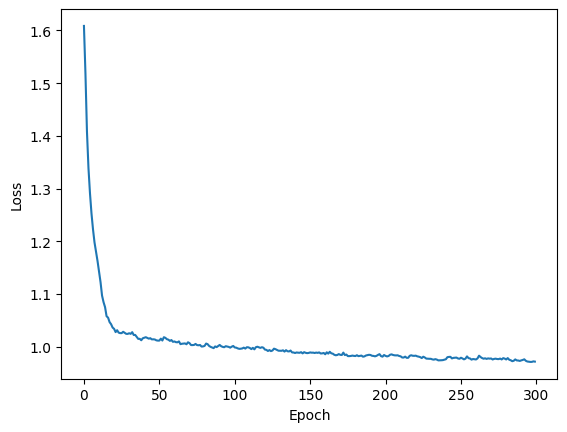

Test accuracy: 464.301935483871
Accuracy: 0.4778494623655914
Precision: 0.5081619477794396
Recall: 0.47691949952819057
F1-score: 0.48685692339894127


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.57      0.63       495
           1       0.46      0.46      0.46       472
           2       0.33      0.45      0.38       449
           3       0.33      0.35      0.34       463
           4       0.72      0.54      0.62       446

    accuracy                           0.48      2325
   macro avg       0.51      0.48      0.49      2325
weighted avg       0.51      0.48      0.49      2325

                    0           1           2           3           4  \
precision    0.694377    0.463830    0.332248    0.327968    0.722388   
recall       0.573737    0.461864    0.454343    0.352052    0.542601   
f1-score     0.628319    0.462845    0.383819    0.339583    0.619718   
support    495.000000  472.000000  449.000000

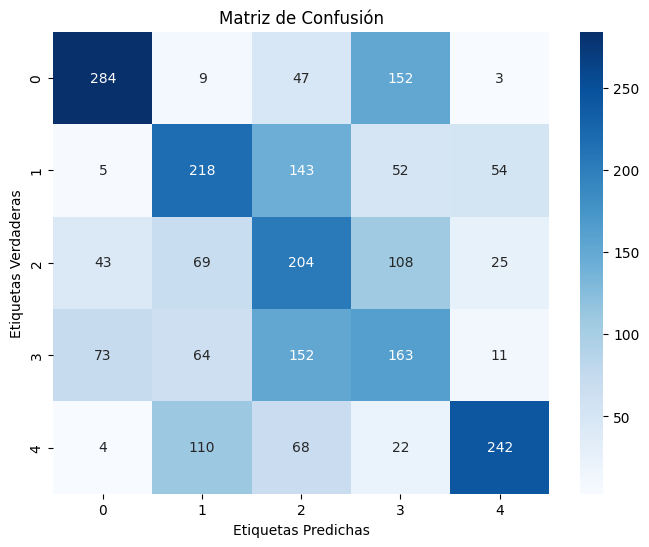

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_300_0.0001_0.2/resultados_300_0.0001_0.2.json
Procesando red con 300 epocas y 1e-05 de factor de aprendizaje y conjunto de entrenamiento 0.8


Procesando epocas:   0%|▏                                                            | 1/300 [00:16<1:21:07, 16.28s/it]

1.6094165584620308


Procesando epocas:   1%|▍                                                            | 2/300 [00:32<1:20:46, 16.26s/it]

1.6095035531941582


Procesando epocas:   1%|▌                                                            | 3/300 [00:48<1:20:29, 16.26s/it]

1.609460187659544


Procesando epocas:   1%|▊                                                            | 4/300 [01:05<1:20:09, 16.25s/it]

1.609285307631773


Procesando epocas:   2%|█                                                            | 5/300 [01:21<1:19:52, 16.25s/it]

1.6091501867069917


Procesando epocas:   2%|█▏                                                           | 6/300 [01:37<1:19:37, 16.25s/it]

1.608738027600681


Procesando epocas:   2%|█▍                                                           | 7/300 [01:53<1:19:17, 16.24s/it]

1.6080272064489476


Procesando epocas:   3%|█▋                                                           | 8/300 [02:09<1:19:01, 16.24s/it]

1.6059709857491886


Procesando epocas:   3%|█▊                                                           | 9/300 [02:26<1:18:42, 16.23s/it]

1.6020365946433124


Procesando epocas:   3%|██                                                          | 10/300 [02:42<1:18:25, 16.22s/it]

1.5924171854467952


Procesando epocas:   4%|██▏                                                         | 11/300 [02:58<1:18:07, 16.22s/it]

1.5676347725531634


Procesando epocas:   4%|██▍                                                         | 12/300 [03:14<1:17:50, 16.22s/it]

1.5131625904756434


Procesando epocas:   4%|██▌                                                         | 13/300 [03:31<1:17:36, 16.23s/it]

1.439373645361732


Procesando epocas:   5%|██▊                                                         | 14/300 [03:47<1:17:19, 16.22s/it]

1.3789707134751712


Procesando epocas:   5%|███                                                         | 15/300 [04:03<1:17:03, 16.22s/it]

1.3369929643238292


Procesando epocas:   5%|███▏                                                        | 16/300 [04:19<1:16:46, 16.22s/it]

1.3051935960264767


Procesando epocas:   6%|███▍                                                        | 17/300 [04:35<1:16:32, 16.23s/it]

1.2679605827612035


Procesando epocas:   6%|███▌                                                        | 18/300 [04:52<1:16:14, 16.22s/it]

1.241833941375508


Procesando epocas:   6%|███▊                                                        | 19/300 [05:08<1:15:55, 16.21s/it]

1.2178771446732914


Procesando epocas:   7%|████                                                        | 20/300 [05:24<1:15:38, 16.21s/it]

1.1887700901311986


Procesando epocas:   7%|████▏                                                       | 21/300 [05:40<1:15:24, 16.22s/it]

1.1715782130465788


Procesando epocas:   7%|████▍                                                       | 22/300 [05:57<1:15:09, 16.22s/it]

1.1530687851064345


Procesando epocas:   8%|████▌                                                       | 23/300 [06:13<1:14:51, 16.21s/it]

1.1315690054613001


Procesando epocas:   8%|████▊                                                       | 24/300 [06:29<1:14:36, 16.22s/it]

1.11732800357482


Procesando epocas:   8%|█████                                                       | 25/300 [06:45<1:14:22, 16.23s/it]

1.1033923689056846


Procesando epocas:   9%|█████▏                                                      | 26/300 [07:01<1:14:07, 16.23s/it]

1.0901348278802985


Procesando epocas:   9%|█████▍                                                      | 27/300 [07:18<1:13:52, 16.24s/it]

1.08212990936111


Procesando epocas:   9%|█████▌                                                      | 28/300 [07:34<1:13:38, 16.24s/it]

1.071051854245803


Procesando epocas:  10%|█████▊                                                      | 29/300 [07:50<1:13:22, 16.25s/it]

1.0602835129289065


Procesando epocas:  10%|██████                                                      | 30/300 [08:06<1:13:05, 16.24s/it]

1.0520374368218814


Procesando epocas:  10%|██████▏                                                     | 31/300 [08:23<1:12:47, 16.24s/it]

1.048573103021173


Procesando epocas:  11%|██████▍                                                     | 32/300 [08:39<1:12:29, 16.23s/it]

1.037097373078851


Procesando epocas:  11%|██████▌                                                     | 33/300 [08:55<1:12:13, 16.23s/it]

1.0323270436595469


Procesando epocas:  11%|██████▊                                                     | 34/300 [09:11<1:11:55, 16.22s/it]

1.026163606783923


Procesando epocas:  12%|███████                                                     | 35/300 [09:28<1:11:39, 16.23s/it]

1.019879449816311


Procesando epocas:  12%|███████▏                                                    | 36/300 [09:44<1:11:25, 16.23s/it]

1.0142205925548777


Procesando epocas:  12%|███████▍                                                    | 37/300 [10:00<1:11:10, 16.24s/it]

1.0093750305035536


Procesando epocas:  13%|███████▌                                                    | 38/300 [10:16<1:10:53, 16.23s/it]

1.0061615488108466


Procesando epocas:  13%|███████▊                                                    | 39/300 [10:32<1:10:35, 16.23s/it]

1.000247558074839


Procesando epocas:  13%|████████                                                    | 40/300 [10:49<1:10:17, 16.22s/it]

0.9988866511513205


Procesando epocas:  14%|████████▏                                                   | 41/300 [11:05<1:10:03, 16.23s/it]

0.9947995073655073


Procesando epocas:  14%|████████▍                                                   | 42/300 [11:21<1:09:46, 16.22s/it]

0.9889966179342831


Procesando epocas:  14%|████████▌                                                   | 43/300 [11:37<1:09:26, 16.21s/it]

0.9887080536169164


Procesando epocas:  15%|████████▊                                                   | 44/300 [11:54<1:09:10, 16.21s/it]

0.9832026993527132


Procesando epocas:  15%|█████████                                                   | 45/300 [12:10<1:08:55, 16.22s/it]

0.9810611241004046


Procesando epocas:  15%|█████████▏                                                  | 46/300 [12:26<1:08:40, 16.22s/it]

0.9807282801936654


Procesando epocas:  16%|█████████▍                                                  | 47/300 [12:42<1:08:25, 16.23s/it]

0.9768756410654853


Procesando epocas:  16%|█████████▌                                                  | 48/300 [12:58<1:08:08, 16.22s/it]

0.974142007968005


Procesando epocas:  16%|█████████▊                                                  | 49/300 [13:15<1:07:52, 16.22s/it]

0.9734302671516643


Procesando epocas:  17%|██████████                                                  | 50/300 [13:31<1:07:34, 16.22s/it]

0.9707346888149486


Procesando epocas:  17%|██████████▏                                                 | 51/300 [13:47<1:07:18, 16.22s/it]

0.9674245129613316


Procesando epocas:  17%|██████████▍                                                 | 52/300 [14:03<1:07:02, 16.22s/it]

0.965750616087633


Procesando epocas:  18%|██████████▌                                                 | 53/300 [14:20<1:06:47, 16.22s/it]

0.9664645429919748


Procesando epocas:  18%|██████████▊                                                 | 54/300 [14:36<1:06:32, 16.23s/it]

0.9653613255304448


Procesando epocas:  18%|███████████                                                 | 55/300 [14:52<1:06:16, 16.23s/it]

0.9633758639588076


Procesando epocas:  19%|███████████▏                                                | 56/300 [15:08<1:05:58, 16.22s/it]

0.9617237129632165


Procesando epocas:  19%|███████████▍                                                | 57/300 [15:24<1:05:41, 16.22s/it]

0.9614031483145321


Procesando epocas:  19%|███████████▌                                                | 58/300 [15:41<1:05:23, 16.21s/it]

0.9605425617274116


Procesando epocas:  20%|███████████▊                                                | 59/300 [15:57<1:05:08, 16.22s/it]

0.9609939035247353


Procesando epocas:  20%|████████████                                                | 60/300 [16:13<1:04:52, 16.22s/it]

0.9589366891804864


Procesando epocas:  20%|████████████▏                                               | 61/300 [16:30<1:05:46, 16.51s/it]

0.9573207027771894


Procesando epocas:  21%|████████████▍                                               | 62/300 [16:47<1:05:27, 16.50s/it]

0.9565189466756933


Procesando epocas:  21%|████████████▌                                               | 63/300 [17:03<1:04:58, 16.45s/it]

0.9563490411814521


Procesando epocas:  21%|████████████▊                                               | 64/300 [17:20<1:04:42, 16.45s/it]

0.9551735471276676


Procesando epocas:  22%|█████████████                                               | 65/300 [17:36<1:04:33, 16.48s/it]

0.9560649759629194


Procesando epocas:  22%|█████████████▏                                              | 66/300 [17:53<1:04:12, 16.46s/it]

0.9545355870443232


Procesando epocas:  22%|█████████████▍                                              | 67/300 [18:09<1:03:54, 16.46s/it]

0.9528404383098378


Procesando epocas:  23%|█████████████▌                                              | 68/300 [18:25<1:03:37, 16.46s/it]

0.9532949486199547


Procesando epocas:  23%|█████████████▊                                              | 69/300 [18:56<1:19:50, 20.74s/it]

0.952679223874036


Procesando epocas:  23%|██████████████                                              | 70/300 [19:23<1:26:36, 22.59s/it]

0.9534580279799069


Procesando epocas:  24%|██████████████▏                                             | 71/300 [20:05<1:48:37, 28.46s/it]

0.9527922703939325


Procesando epocas:  24%|██████████████▍                                             | 72/300 [20:46<2:02:11, 32.15s/it]

0.951136567662744


Procesando epocas:  24%|██████████████▌                                             | 73/300 [21:26<2:10:48, 34.57s/it]

0.9513785695328432


Procesando epocas:  25%|██████████████▊                                             | 74/300 [22:07<2:16:49, 36.32s/it]

0.9493964675594778


Procesando epocas:  25%|███████████████                                             | 75/300 [22:48<2:22:19, 37.95s/it]

0.9488601719631868


Procesando epocas:  25%|███████████████▏                                            | 76/300 [23:29<2:24:13, 38.63s/it]

0.9493413802455454


Procesando epocas:  26%|███████████████▍                                            | 77/300 [24:09<2:25:27, 39.14s/it]

0.9497727057513069


Procesando epocas:  26%|███████████████▌                                            | 78/300 [24:49<2:26:16, 39.53s/it]

0.9481598994311164


Procesando epocas:  26%|███████████████▊                                            | 79/300 [25:31<2:28:05, 40.21s/it]

0.94870466800297


Procesando epocas:  27%|████████████████                                            | 80/300 [26:12<2:27:39, 40.27s/it]

0.9474005825379316


Procesando epocas:  27%|████████████████▏                                           | 81/300 [26:52<2:26:58, 40.27s/it]

0.9474629710702335


Procesando epocas:  27%|████████████████▍                                           | 82/300 [27:32<2:26:34, 40.34s/it]

0.9475381490062265


Procesando epocas:  28%|████████████████▌                                           | 83/300 [28:13<2:25:58, 40.36s/it]

0.9473569421207204


Procesando epocas:  28%|████████████████▊                                           | 84/300 [28:53<2:25:24, 40.39s/it]

0.9458288837881649


Procesando epocas:  28%|█████████████████                                           | 85/300 [29:35<2:26:20, 40.84s/it]

0.946060753920499


Procesando epocas:  29%|█████████████████▏                                          | 86/300 [30:15<2:25:00, 40.66s/it]

0.9454172818099751


Procesando epocas:  29%|█████████████████▍                                          | 87/300 [30:56<2:24:18, 40.65s/it]

0.9451798856258392


Procesando epocas:  29%|█████████████████▌                                          | 88/300 [31:36<2:23:14, 40.54s/it]

0.9466475346509148


Procesando epocas:  30%|█████████████████▊                                          | 89/300 [32:17<2:22:21, 40.48s/it]

0.9443577713826123


Procesando epocas:  30%|██████████████████                                          | 90/300 [32:59<2:23:22, 40.96s/it]

0.9452942343319164


Procesando epocas:  30%|██████████████████▏                                         | 91/300 [33:39<2:21:59, 40.76s/it]

0.9437436044216156


Procesando epocas:  31%|██████████████████▍                                         | 92/300 [34:20<2:21:06, 40.71s/it]

0.9446283568354213


Procesando epocas:  31%|██████████████████▌                                         | 93/300 [35:01<2:21:36, 41.04s/it]

0.9440946729744182


Procesando epocas:  31%|██████████████████▊                                         | 94/300 [35:42<2:20:04, 40.80s/it]

0.9431988446151509


Procesando epocas:  32%|███████████████████                                         | 95/300 [36:22<2:19:11, 40.74s/it]

0.9436481749310213


Procesando epocas:  32%|███████████████████▏                                        | 96/300 [37:04<2:19:43, 41.09s/it]

0.9436951795045068


Procesando epocas:  32%|███████████████████▍                                        | 97/300 [37:45<2:18:31, 40.94s/it]

0.943463774989633


Procesando epocas:  33%|███████████████████▌                                        | 98/300 [38:26<2:18:26, 41.12s/it]

0.9425643626381369


Procesando epocas:  33%|███████████████████▊                                        | 99/300 [39:09<2:19:12, 41.55s/it]

0.9431141867357142


Procesando epocas:  33%|███████████████████▋                                       | 100/300 [39:53<2:21:09, 42.35s/it]

0.9437082311686348


Procesando epocas:  34%|███████████████████▊                                       | 101/300 [40:38<2:23:28, 43.26s/it]

0.9429216251653784


Procesando epocas:  34%|████████████████████                                       | 102/300 [41:22<2:22:51, 43.29s/it]

0.9427376782192903


Procesando epocas:  34%|████████████████████▎                                      | 103/300 [42:04<2:21:33, 43.12s/it]

0.9430559382719153


Procesando epocas:  35%|████████████████████▍                                      | 104/300 [42:48<2:21:37, 43.35s/it]

0.9420151117969962


Procesando epocas:  35%|████████████████████▋                                      | 105/300 [43:32<2:21:04, 43.41s/it]

0.9418382532456342


Procesando epocas:  35%|████████████████████▊                                      | 106/300 [44:15<2:20:27, 43.44s/it]

0.9428607421762804


Procesando epocas:  36%|█████████████████████                                      | 107/300 [44:59<2:20:04, 43.54s/it]

0.9418144825626822


Procesando epocas:  36%|█████████████████████▏                                     | 108/300 [45:44<2:20:40, 43.96s/it]

0.942103782120873


Procesando epocas:  36%|█████████████████████▍                                     | 109/300 [46:27<2:19:20, 43.77s/it]

0.942069316962186


Procesando epocas:  37%|█████████████████████▋                                     | 110/300 [47:11<2:18:21, 43.69s/it]

0.9412556059220258


Procesando epocas:  37%|█████████████████████▊                                     | 111/300 [47:57<2:19:23, 44.25s/it]

0.9412305021987242


Procesando epocas:  37%|██████████████████████                                     | 112/300 [48:39<2:16:45, 43.65s/it]

0.9413730179562289


Procesando epocas:  38%|██████████████████████▏                                    | 113/300 [49:22<2:15:25, 43.45s/it]

0.9409602123148301


Procesando epocas:  38%|██████████████████████▍                                    | 114/300 [50:03<2:12:30, 42.74s/it]

0.9423009073033052


Procesando epocas:  38%|██████████████████████▌                                    | 115/300 [50:45<2:11:33, 42.66s/it]

0.940895618060056


Procesando epocas:  39%|██████████████████████▊                                    | 116/300 [51:28<2:10:51, 42.67s/it]

0.9410832317436443


Procesando epocas:  39%|███████████████████████                                    | 117/300 [52:11<2:10:50, 42.90s/it]

0.9405161973308115


Procesando epocas:  39%|███████████████████████▏                                   | 118/300 [52:53<2:09:09, 42.58s/it]

0.9409476872752695


Procesando epocas:  40%|███████████████████████▍                                   | 119/300 [53:34<2:06:41, 42.00s/it]

0.9404548886944266


Procesando epocas:  40%|███████████████████████▌                                   | 120/300 [54:14<2:04:31, 41.51s/it]

0.9393285400727216


Procesando epocas:  40%|███████████████████████▊                                   | 121/300 [54:55<2:02:52, 41.19s/it]

0.9401801407337189


Procesando epocas:  41%|███████████████████████▉                                   | 122/300 [55:37<2:02:49, 41.40s/it]

0.9403102103401633


Procesando epocas:  41%|████████████████████████▏                                  | 123/300 [56:17<2:01:14, 41.10s/it]

0.9397619328078102


Procesando epocas:  41%|████████████████████████▍                                  | 124/300 [56:57<1:59:58, 40.90s/it]

0.9400312735753901


Procesando epocas:  42%|████████████████████████▌                                  | 125/300 [57:38<1:58:44, 40.71s/it]

0.9401528621421141


Procesando epocas:  42%|████████████████████████▊                                  | 126/300 [58:18<1:57:49, 40.63s/it]

0.9403666615486145


Procesando epocas:  42%|████████████████████████▉                                  | 127/300 [58:59<1:56:54, 40.55s/it]

0.9402014599126928


Procesando epocas:  43%|█████████████████████████▏                                 | 128/300 [59:39<1:56:06, 40.50s/it]

0.9407199407325072


Procesando epocas:  43%|████████████████████████▌                                | 129/300 [1:00:21<1:56:33, 40.90s/it]

0.9401790334897883


Procesando epocas:  43%|████████████████████████▋                                | 130/300 [1:01:00<1:54:08, 40.29s/it]

0.9403235256671906


Procesando epocas:  44%|████████████████████████▉                                | 131/300 [1:01:42<1:54:51, 40.78s/it]

0.9396608054637909


Procesando epocas:  44%|█████████████████████████                                | 132/300 [1:02:22<1:53:48, 40.65s/it]

0.9393137490048128


Procesando epocas:  44%|█████████████████████████▎                               | 133/300 [1:03:02<1:53:02, 40.61s/it]

0.9389792607111089


Procesando epocas:  45%|█████████████████████████▍                               | 134/300 [1:03:43<1:52:10, 40.55s/it]

0.9390909464920268


Procesando epocas:  45%|█████████████████████████▋                               | 135/300 [1:04:23<1:51:25, 40.52s/it]

0.9397830616025363


Procesando epocas:  45%|█████████████████████████▊                               | 136/300 [1:05:04<1:50:40, 40.49s/it]

0.9391500662354862


Procesando epocas:  46%|██████████████████████████                               | 137/300 [1:05:44<1:49:52, 40.45s/it]

0.9392770956544315


Procesando epocas:  46%|██████████████████████████▏                              | 138/300 [1:06:25<1:49:13, 40.46s/it]

0.9393528100322275


Procesando epocas:  46%|██████████████████████████▍                              | 139/300 [1:07:05<1:48:31, 40.44s/it]

0.9394875445786645


Procesando epocas:  47%|██████████████████████████▌                              | 140/300 [1:07:47<1:49:01, 40.88s/it]

0.9386372646864722


Procesando epocas:  47%|██████████████████████████▊                              | 141/300 [1:08:27<1:47:58, 40.75s/it]

0.9397663905340082


Procesando epocas:  47%|██████████████████████████▉                              | 142/300 [1:09:08<1:47:05, 40.67s/it]

0.9400576405665454


Procesando epocas:  48%|███████████████████████████▏                             | 143/300 [1:09:48<1:46:17, 40.62s/it]

0.9387496190912583


Procesando epocas:  48%|███████████████████████████▎                             | 144/300 [1:10:29<1:45:29, 40.57s/it]

0.9385068732149461


Procesando epocas:  48%|███████████████████████████▌                             | 145/300 [1:11:09<1:44:43, 40.54s/it]

0.9387183564550736


Procesando epocas:  49%|███████████████████████████▋                             | 146/300 [1:11:50<1:43:56, 40.50s/it]

0.9384454849888296


Procesando epocas:  49%|███████████████████████████▉                             | 147/300 [1:12:30<1:43:11, 40.47s/it]

0.9388935520368464


Procesando epocas:  49%|████████████████████████████                             | 148/300 [1:13:10<1:42:28, 40.45s/it]

0.9381192249410293


Procesando epocas:  50%|████████████████████████████▎                            | 149/300 [1:13:51<1:41:52, 40.48s/it]

0.9390236623146955


Procesando epocas:  50%|████████████████████████████▌                            | 150/300 [1:14:33<1:42:20, 40.94s/it]

0.9386397880666396


Procesando epocas:  50%|████████████████████████████▋                            | 151/300 [1:15:13<1:41:20, 40.81s/it]

0.938115848863826


Procesando epocas:  51%|████████████████████████████▉                            | 152/300 [1:15:54<1:40:26, 40.72s/it]

0.937712403605966


Procesando epocas:  51%|█████████████████████████████                            | 153/300 [1:16:34<1:39:33, 40.64s/it]

0.9381474109256969


Procesando epocas:  51%|█████████████████████████████▎                           | 154/300 [1:17:15<1:38:44, 40.58s/it]

0.9382471607011907


Procesando epocas:  52%|█████████████████████████████▍                           | 155/300 [1:17:55<1:37:59, 40.55s/it]

0.9386635440237382


Procesando epocas:  52%|█████████████████████████████▋                           | 156/300 [1:18:36<1:37:20, 40.56s/it]

0.9382412198711844


Procesando epocas:  52%|█████████████████████████████▊                           | 157/300 [1:19:18<1:37:45, 41.01s/it]

0.9385437323766597


Procesando epocas:  53%|██████████████████████████████                           | 158/300 [1:19:58<1:36:39, 40.84s/it]

0.9381407201290131


Procesando epocas:  53%|██████████████████████████████▏                          | 159/300 [1:20:39<1:35:43, 40.73s/it]

0.9391445573638467


Procesando epocas:  53%|██████████████████████████████▍                          | 160/300 [1:21:19<1:34:45, 40.61s/it]

0.938805109613082


Procesando epocas:  54%|██████████████████████████████▌                          | 161/300 [1:22:00<1:33:58, 40.57s/it]

0.9383464388987597


Procesando epocas:  54%|██████████████████████████████▊                          | 162/300 [1:22:40<1:33:18, 40.57s/it]

0.937609284064349


Procesando epocas:  54%|██████████████████████████████▉                          | 163/300 [1:23:21<1:32:32, 40.53s/it]

0.9378446757793426


Procesando epocas:  55%|███████████████████████████████▏                         | 164/300 [1:24:01<1:31:49, 40.51s/it]

0.9376769928371205


Procesando epocas:  55%|███████████████████████████████▎                         | 165/300 [1:24:43<1:32:09, 40.96s/it]

0.9389354011591743


Procesando epocas:  55%|███████████████████████████████▌                         | 166/300 [1:25:24<1:31:07, 40.80s/it]

0.9381480725372539


Procesando epocas:  56%|███████████████████████████████▋                         | 167/300 [1:26:04<1:30:12, 40.69s/it]

0.9375095037853016


Procesando epocas:  56%|███████████████████████████████▉                         | 168/300 [1:26:44<1:29:20, 40.61s/it]

0.9386017196318682


Procesando epocas:  56%|████████████████████████████████                         | 169/300 [1:27:25<1:28:31, 40.54s/it]

0.9385013818740845


Procesando epocas:  57%|████████████████████████████████▎                        | 170/300 [1:28:07<1:28:46, 40.97s/it]

0.9377419135149787


Procesando epocas:  57%|████████████████████████████████▍                        | 171/300 [1:28:47<1:27:43, 40.80s/it]

0.9379248794387368


Procesando epocas:  57%|████████████████████████████████▋                        | 172/300 [1:29:28<1:26:50, 40.71s/it]

0.9377363247029922


Procesando epocas:  58%|████████████████████████████████▊                        | 173/300 [1:30:08<1:26:02, 40.65s/it]

0.937090790271759


Procesando epocas:  58%|█████████████████████████████████                        | 174/300 [1:30:49<1:25:16, 40.61s/it]

0.9379638349308687


Procesando epocas:  58%|█████████████████████████████████▎                       | 175/300 [1:31:31<1:25:24, 41.00s/it]

0.9380041315275081


Procesando epocas:  59%|█████████████████████████████████▍                       | 176/300 [1:32:11<1:24:24, 40.85s/it]

0.9382275157115039


Procesando epocas:  59%|█████████████████████████████████▋                       | 177/300 [1:32:52<1:23:31, 40.74s/it]

0.9380056076190051


Procesando epocas:  59%|█████████████████████████████████▊                       | 178/300 [1:33:32<1:22:41, 40.67s/it]

0.937539331001394


Procesando epocas:  60%|██████████████████████████████████                       | 179/300 [1:34:13<1:21:54, 40.62s/it]

0.9377958508098827


Procesando epocas:  60%|██████████████████████████████████▏                      | 180/300 [1:34:53<1:21:12, 40.60s/it]

0.9378911298864028


Procesando epocas:  60%|██████████████████████████████████▍                      | 181/300 [1:35:35<1:21:23, 41.04s/it]

0.9380057033370522


Procesando epocas:  61%|██████████████████████████████████▌                      | 182/300 [1:36:16<1:20:22, 40.87s/it]

0.9378468411810258


Procesando epocas:  61%|██████████████████████████████████▊                      | 183/300 [1:36:56<1:19:23, 40.72s/it]

0.9374263065702775


Procesando epocas:  61%|██████████████████████████████████▉                      | 184/300 [1:37:37<1:18:32, 40.63s/it]

0.9375092643148759


Procesando epocas:  62%|███████████████████████████████████▏                     | 185/300 [1:38:17<1:17:49, 40.60s/it]

0.9374895793550154


Procesando epocas:  62%|███████████████████████████████████▎                     | 186/300 [1:38:59<1:17:53, 41.00s/it]

0.9372228692559635


Procesando epocas:  62%|███████████████████████████████████▌                     | 187/300 [1:39:39<1:16:54, 40.83s/it]

0.9370303935864392


Procesando epocas:  63%|███████████████████████████████████▋                     | 188/300 [1:40:20<1:16:04, 40.75s/it]

0.9370978046866024


Procesando epocas:  63%|███████████████████████████████████▉                     | 189/300 [1:41:00<1:15:13, 40.66s/it]

0.9373000053798451


Procesando epocas:  63%|████████████████████████████████████                     | 190/300 [1:41:41<1:14:27, 40.62s/it]

0.9367500301669626


Procesando epocas:  64%|████████████████████████████████████▎                    | 191/300 [1:42:22<1:13:46, 40.61s/it]

0.9377114664105808


Procesando epocas:  64%|████████████████████████████████████▍                    | 192/300 [1:43:03<1:13:47, 40.99s/it]

0.937033559294308


Procesando epocas:  64%|████████████████████████████████████▋                    | 193/300 [1:43:44<1:12:44, 40.79s/it]

0.9372072254910189


Procesando epocas:  65%|████████████████████████████████████▊                    | 194/300 [1:44:24<1:11:55, 40.71s/it]

0.9369441106038935


Procesando epocas:  65%|█████████████████████████████████████                    | 195/300 [1:45:05<1:11:05, 40.62s/it]

0.9367742966203129


Procesando epocas:  65%|█████████████████████████████████████▏                   | 196/300 [1:45:45<1:10:18, 40.56s/it]

0.9367543785011068


Procesando epocas:  66%|█████████████████████████████████████▍                   | 197/300 [1:46:27<1:10:23, 41.00s/it]

0.9368763650164885


Procesando epocas:  66%|█████████████████████████████████████▌                   | 198/300 [1:47:08<1:09:26, 40.85s/it]

0.9369324771796956


Procesando epocas:  66%|█████████████████████████████████████▊                   | 199/300 [1:47:48<1:08:32, 40.72s/it]

0.9368167168953839


Procesando epocas:  67%|██████████████████████████████████████                   | 200/300 [1:48:29<1:07:45, 40.66s/it]

0.9368952312890221


Procesando epocas:  67%|██████████████████████████████████████▏                  | 201/300 [1:49:11<1:07:46, 41.07s/it]

0.9373112927464878


Procesando epocas:  67%|██████████████████████████████████████▍                  | 202/300 [1:49:51<1:06:48, 40.90s/it]

0.9367857228307163


Procesando epocas:  68%|██████████████████████████████████████▌                  | 203/300 [1:50:32<1:05:57, 40.80s/it]

0.9369707917465883


Procesando epocas:  68%|██████████████████████████████████████▊                  | 204/300 [1:51:12<1:05:10, 40.73s/it]

0.9370197601178113


Procesando epocas:  68%|██████████████████████████████████████▉                  | 205/300 [1:51:53<1:04:23, 40.67s/it]

0.9362339002244613


Procesando epocas:  69%|███████████████████████████████████████▏                 | 206/300 [1:52:33<1:03:37, 40.61s/it]

0.937007837786394


Procesando epocas:  69%|███████████████████████████████████████▎                 | 207/300 [1:53:15<1:03:32, 40.99s/it]

0.9364206131766825


Procesando epocas:  69%|███████████████████████████████████████▌                 | 208/300 [1:53:55<1:02:31, 40.78s/it]

0.936936104998869


Procesando epocas:  70%|███████████████████████████████████████▋                 | 209/300 [1:54:36<1:01:42, 40.69s/it]

0.936605984323165


Procesando epocas:  70%|███████████████████████████████████████▉                 | 210/300 [1:55:16<1:00:56, 40.62s/it]

0.9370015992837794


Procesando epocas:  70%|████████████████████████████████████████                 | 211/300 [1:55:57<1:00:13, 40.60s/it]

0.9368633932927075


Procesando epocas:  71%|████████████████████████████████████████▎                | 212/300 [1:56:39<1:00:06, 40.99s/it]

0.9373719008529887


Procesando epocas:  71%|█████████████████████████████████████████▉                 | 213/300 [1:57:19<59:13, 40.84s/it]

0.9371949578032774


Procesando epocas:  71%|██████████████████████████████████████████                 | 214/300 [1:58:00<58:24, 40.75s/it]

0.9368334033909966


Procesando epocas:  72%|██████████████████████████████████████████▎                | 215/300 [1:58:40<57:36, 40.67s/it]

0.9370369490455178


Procesando epocas:  72%|██████████████████████████████████████████▍                | 216/300 [1:59:22<57:26, 41.03s/it]

0.9364832864088171


Procesando epocas:  72%|██████████████████████████████████████████▋                | 217/300 [2:00:03<56:31, 40.86s/it]

0.937526923418045


Procesando epocas:  73%|██████████████████████████████████████████▊                | 218/300 [2:00:43<55:40, 40.74s/it]

0.936473136439043


Procesando epocas:  73%|███████████████████████████████████████████                | 219/300 [2:01:24<54:54, 40.67s/it]

0.937336964116377


Procesando epocas:  73%|███████████████████████████████████████████▎               | 220/300 [2:02:04<54:07, 40.60s/it]

0.9363762385704938


Procesando epocas:  74%|███████████████████████████████████████████▍               | 221/300 [2:02:46<53:59, 41.01s/it]

0.9365076710196102


Procesando epocas:  74%|███████████████████████████████████████████▋               | 222/300 [2:03:26<53:05, 40.85s/it]

0.9364206002039068


Procesando epocas:  74%|███████████████████████████████████████████▊               | 223/300 [2:04:07<52:17, 40.74s/it]

0.9367630565867705


Procesando epocas:  75%|████████████████████████████████████████████               | 224/300 [2:04:48<51:31, 40.68s/it]

0.9366899872527403


Procesando epocas:  75%|████████████████████████████████████████████▎              | 225/300 [2:05:28<50:44, 40.59s/it]

0.9364401021424462


Procesando epocas:  75%|████████████████████████████████████████████▍              | 226/300 [2:06:08<49:58, 40.51s/it]

0.9362507676377015


Procesando epocas:  76%|████████████████████████████████████████████▋              | 227/300 [2:06:49<49:16, 40.50s/it]

0.9365973206127391


Procesando epocas:  76%|████████████████████████████████████████████▊              | 228/300 [2:07:31<49:08, 40.95s/it]

0.936681287428912


Procesando epocas:  76%|█████████████████████████████████████████████              | 229/300 [2:08:11<48:18, 40.83s/it]

0.9365663223406848


Procesando epocas:  77%|█████████████████████████████████████████████▏             | 230/300 [2:08:52<47:30, 40.72s/it]

0.9363908651997062


Procesando epocas:  77%|█████████████████████████████████████████████▍             | 231/300 [2:09:32<46:44, 40.65s/it]

0.9365344114163343


Procesando epocas:  77%|█████████████████████████████████████████████▋             | 232/300 [2:10:13<46:00, 40.59s/it]

0.93608137754833


Procesando epocas:  78%|█████████████████████████████████████████████▊             | 233/300 [2:10:53<45:17, 40.55s/it]

0.9362703737090615


Procesando epocas:  78%|██████████████████████████████████████████████             | 234/300 [2:11:34<44:34, 40.52s/it]

0.9365330303416532


Procesando epocas:  78%|██████████████████████████████████████████████▏            | 235/300 [2:12:14<43:51, 40.48s/it]

0.936386325078852


Procesando epocas:  79%|██████████████████████████████████████████████▍            | 236/300 [2:12:56<43:42, 40.97s/it]

0.9362731568953571


Procesando epocas:  79%|██████████████████████████████████████████████▌            | 237/300 [2:13:37<42:53, 40.85s/it]

0.9360796893344207


Procesando epocas:  79%|██████████████████████████████████████████████▊            | 238/300 [2:14:17<42:05, 40.73s/it]

0.9367770514067482


Procesando epocas:  80%|███████████████████████████████████████████████            | 239/300 [2:14:58<41:19, 40.65s/it]

0.9360550785765929


Procesando epocas:  80%|███████████████████████████████████████████████▏           | 240/300 [2:15:38<40:36, 40.61s/it]

0.9359928029425004


Procesando epocas:  80%|███████████████████████████████████████████████▍           | 241/300 [2:16:18<39:50, 40.52s/it]

0.9358557953554041


Procesando epocas:  81%|███████████████████████████████████████████████▌           | 242/300 [2:17:00<39:36, 40.97s/it]

0.9366728961467743


Procesando epocas:  81%|███████████████████████████████████████████████▊           | 243/300 [2:17:41<38:44, 40.78s/it]

0.9364147638573366


Procesando epocas:  81%|███████████████████████████████████████████████▉           | 244/300 [2:18:21<37:59, 40.70s/it]

0.9365935178364024


Procesando epocas:  82%|████████████████████████████████████████████████▏          | 245/300 [2:19:02<37:13, 40.62s/it]

0.9359429934445549


Procesando epocas:  82%|████████████████████████████████████████████████▍          | 246/300 [2:19:42<36:30, 40.56s/it]

0.9367507710176356


Procesando epocas:  82%|████████████████████████████████████████████████▌          | 247/300 [2:20:23<35:48, 40.53s/it]

0.9367308655205895


Procesando epocas:  83%|████████████████████████████████████████████████▊          | 248/300 [2:21:04<35:29, 40.94s/it]

0.935947042353013


Procesando epocas:  83%|████████████████████████████████████████████████▉          | 249/300 [2:21:43<34:17, 40.35s/it]

0.9365550749442156


Procesando epocas:  83%|█████████████████████████████████████████████████▏         | 250/300 [2:22:25<34:03, 40.86s/it]

0.9366834444158217


Procesando epocas:  84%|█████████████████████████████████████████████████▎         | 251/300 [2:23:06<33:14, 40.71s/it]

0.9365499503472272


Procesando epocas:  84%|█████████████████████████████████████████████████▌         | 252/300 [2:23:46<32:30, 40.63s/it]

0.9361839455716751


Procesando epocas:  84%|█████████████████████████████████████████████████▊         | 253/300 [2:24:27<31:48, 40.61s/it]

0.9359404886470122


Procesando epocas:  85%|█████████████████████████████████████████████████▉         | 254/300 [2:25:07<31:07, 40.59s/it]

0.9362219056662391


Procesando epocas:  85%|██████████████████████████████████████████████████▏        | 255/300 [2:25:48<30:24, 40.55s/it]

0.9359420211876139


Procesando epocas:  85%|██████████████████████████████████████████████████▎        | 256/300 [2:26:28<29:44, 40.55s/it]

0.9361626831924215


Procesando epocas:  86%|██████████████████████████████████████████████████▌        | 257/300 [2:27:10<29:22, 40.99s/it]

0.9360802194651435


Procesando epocas:  86%|██████████████████████████████████████████████████▋        | 258/300 [2:27:51<28:34, 40.83s/it]

0.9364401049473706


Procesando epocas:  86%|██████████████████████████████████████████████████▉        | 259/300 [2:28:31<27:48, 40.70s/it]

0.9361050609280082


Procesando epocas:  87%|███████████████████████████████████████████████████▏       | 260/300 [2:29:12<27:04, 40.62s/it]

0.936376093415653


Procesando epocas:  87%|███████████████████████████████████████████████████▎       | 261/300 [2:29:52<26:22, 40.58s/it]

0.9361658366287455


Procesando epocas:  87%|███████████████████████████████████████████████████▌       | 262/300 [2:30:33<25:39, 40.53s/it]

0.9360499329426709


Procesando epocas:  88%|███████████████████████████████████████████████████▋       | 263/300 [2:31:13<24:58, 40.50s/it]

0.9362344173824086


Procesando epocas:  88%|███████████████████████████████████████████████████▉       | 264/300 [2:31:55<24:33, 40.93s/it]

0.9363853321355932


Procesando epocas:  88%|████████████████████████████████████████████████████       | 265/300 [2:32:35<23:47, 40.79s/it]

0.9369456634801977


Procesando epocas:  89%|████████████████████████████████████████████████████▎      | 266/300 [2:33:16<23:04, 40.71s/it]

0.9365677332176882


Procesando epocas:  89%|████████████████████████████████████████████████████▌      | 267/300 [2:33:56<22:20, 40.62s/it]

0.9357718215269201


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 268/300 [2:34:37<21:39, 40.60s/it]

0.9366423175615423


Procesando epocas:  90%|████████████████████████████████████████████████████▉      | 269/300 [2:35:19<21:11, 41.02s/it]

0.9363394747762119


Procesando epocas:  90%|█████████████████████████████████████████████████████      | 270/300 [2:35:59<20:25, 40.86s/it]

0.9361431051703061


Procesando epocas:  90%|█████████████████████████████████████████████████████▎     | 271/300 [2:36:40<19:41, 40.74s/it]

0.935972550686668


Procesando epocas:  91%|█████████████████████████████████████████████████████▍     | 272/300 [2:37:21<19:00, 40.73s/it]

0.9360793730791878


Procesando epocas:  91%|█████████████████████████████████████████████████████▋     | 273/300 [2:38:04<18:37, 41.38s/it]

0.9360277740394368


Procesando epocas:  91%|█████████████████████████████████████████████████████▉     | 274/300 [2:38:45<17:53, 41.27s/it]

0.9365029510329751


Procesando epocas:  92%|██████████████████████████████████████████████████████     | 275/300 [2:39:27<17:19, 41.57s/it]

0.9365551019416136


Procesando epocas:  92%|██████████████████████████████████████████████████████▎    | 276/300 [2:40:07<16:29, 41.21s/it]

0.9361029596889721


Procesando epocas:  92%|██████████████████████████████████████████████████████▍    | 277/300 [2:40:48<15:42, 40.97s/it]

0.9359804083319271


Procesando epocas:  93%|██████████████████████████████████████████████████████▋    | 278/300 [2:41:28<14:56, 40.74s/it]

0.9360350980478175


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 279/300 [2:42:08<14:13, 40.65s/it]

0.9356899790904101


Procesando epocas:  93%|███████████████████████████████████████████████████████    | 280/300 [2:42:50<13:40, 41.04s/it]

0.9361318139468923


Procesando epocas:  94%|███████████████████████████████████████████████████████▎   | 281/300 [2:43:31<12:56, 40.88s/it]

0.9362144491251777


Procesando epocas:  94%|███████████████████████████████████████████████████████▍   | 282/300 [2:44:11<12:14, 40.78s/it]

0.9363408130757949


Procesando epocas:  94%|███████████████████████████████████████████████████████▋   | 283/300 [2:44:52<11:31, 40.69s/it]

0.936045681027805


Procesando epocas:  95%|███████████████████████████████████████████████████████▊   | 284/300 [2:45:32<10:49, 40.62s/it]

0.9356852170299081


Procesando epocas:  95%|████████████████████████████████████████████████████████   | 285/300 [2:46:13<10:08, 40.57s/it]

0.9359748303890228


Procesando epocas:  95%|████████████████████████████████████████████████████████▏  | 286/300 [2:46:55<09:34, 41.04s/it]

0.9360801402260276


Procesando epocas:  96%|████████████████████████████████████████████████████████▍  | 287/300 [2:47:35<08:50, 40.83s/it]

0.9360726174186258


Procesando epocas:  96%|████████████████████████████████████████████████████████▋  | 288/300 [2:48:16<08:08, 40.72s/it]

0.9363879599991967


Procesando epocas:  96%|████████████████████████████████████████████████████████▊  | 289/300 [2:48:58<07:34, 41.34s/it]

0.9356444099370171


Procesando epocas:  97%|█████████████████████████████████████████████████████████  | 290/300 [2:49:39<06:52, 41.28s/it]

0.9367903148426729


Procesando epocas:  97%|█████████████████████████████████████████████████████████▏ | 291/300 [2:50:22<06:15, 41.76s/it]

0.9364618788747227


Procesando epocas:  97%|█████████████████████████████████████████████████████████▍ | 292/300 [2:51:05<05:35, 42.00s/it]

0.9356598380733939


Procesando epocas:  98%|█████████████████████████████████████████████████████████▌ | 293/300 [2:51:45<04:51, 41.57s/it]

0.9362600119674906


Procesando epocas:  98%|█████████████████████████████████████████████████████████▊ | 294/300 [2:52:26<04:07, 41.30s/it]

0.9364632480284747


Procesando epocas:  98%|██████████████████████████████████████████████████████████ | 295/300 [2:53:07<03:25, 41.08s/it]

0.9354734420776367


Procesando epocas:  99%|██████████████████████████████████████████████████████████▏| 296/300 [2:53:47<02:43, 40.93s/it]

0.9356060413753285


Procesando epocas:  99%|██████████████████████████████████████████████████████████▍| 297/300 [2:54:30<02:04, 41.34s/it]

0.9360626396010904


Procesando epocas:  99%|██████████████████████████████████████████████████████████▌| 298/300 [2:55:10<01:22, 41.13s/it]

0.9351899851770962


Procesando epocas: 100%|██████████████████████████████████████████████████████████▊| 299/300 [2:55:51<00:40, 40.99s/it]

0.9355321025147157


Procesando epocas: 100%|███████████████████████████████████████████████████████████| 300/300 [2:56:32<00:00, 35.31s/it]

0.935641790488187
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Neural_network_classification ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_300_1e-05_0.2/funcion_de_perdida_300_1e-05.png


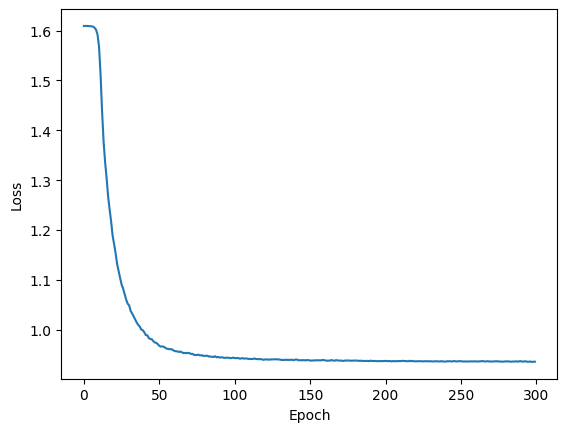

Test accuracy: 464.752688172043
Accuracy: 0.4946236559139785
Precision: 0.49634784886782707
Recall: 0.49507425022551155
F1-score: 0.49405253672230404


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.54      0.57       495
           1       0.47      0.42      0.44       472
           2       0.48      0.43      0.45       449
           3       0.36      0.42      0.39       463
           4       0.58      0.66      0.62       446

    accuracy                           0.49      2325
   macro avg       0.50      0.50      0.49      2325
weighted avg       0.50      0.49      0.49      2325

                    0           1           2           3           4  \
precision    0.588621    0.472554    0.475369    0.364486    0.580709   
recall       0.543434    0.419492    0.429844    0.421166    0.661435   
f1-score     0.565126    0.444444    0.451462    0.390782    0.618449   
support    495.000000  472.000000  449.00000

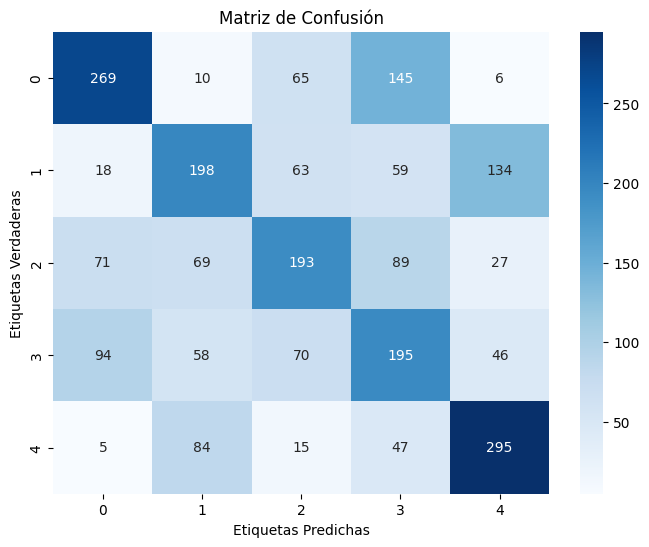

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_300_1e-05_0.2/resultados_300_1e-05_0.2.json
Procesando red con 500 epocas y 0.0001 de factor de aprendizaje y conjunto de entrenamiento 0.8


Procesando epocas:   0%|                                                             | 1/500 [00:41<5:43:39, 41.32s/it]

1.6087762657333822


Procesando epocas:   0%|▏                                                            | 2/500 [01:23<5:48:50, 42.03s/it]

1.5130001551964705


Procesando epocas:   1%|▎                                                            | 3/500 [02:04<5:44:04, 41.54s/it]

1.3918072377934176


Procesando epocas:   1%|▍                                                            | 4/500 [02:45<5:41:22, 41.29s/it]

1.3338632534531987


Procesando epocas:   1%|▌                                                            | 5/500 [03:26<5:38:46, 41.06s/it]

1.2874430172583635


Procesando epocas:   1%|▋                                                            | 6/500 [04:08<5:41:34, 41.49s/it]

1.2558230498257805


Procesando epocas:   1%|▊                                                            | 7/500 [04:49<5:38:51, 41.24s/it]

1.22760331770953


Procesando epocas:   2%|▉                                                            | 8/500 [05:31<5:41:03, 41.59s/it]

1.21231671221116


Procesando epocas:   2%|█                                                            | 9/500 [06:12<5:39:00, 41.43s/it]

1.1940248419256771


Procesando epocas:   2%|█▏                                                          | 10/500 [06:55<5:42:20, 41.92s/it]

1.1859286918359644


Procesando epocas:   2%|█▎                                                          | 11/500 [07:38<5:44:28, 42.27s/it]

1.169857254449059


Procesando epocas:   2%|█▍                                                          | 12/500 [08:22<5:46:27, 42.60s/it]

1.1515516435398776


Procesando epocas:   3%|█▌                                                          | 13/500 [09:04<5:46:00, 42.63s/it]

1.1308022246641272


Procesando epocas:   3%|█▋                                                          | 14/500 [09:45<5:40:20, 42.02s/it]

1.1117430094410392


Procesando epocas:   3%|█▊                                                          | 15/500 [10:27<5:40:21, 42.11s/it]

1.1023602457607493


Procesando epocas:   3%|█▉                                                          | 16/500 [11:09<5:37:23, 41.83s/it]

1.0799344220582177


Procesando epocas:   3%|██                                                          | 17/500 [11:49<5:33:41, 41.45s/it]

1.0667211227557238


Procesando epocas:   4%|██▏                                                         | 18/500 [12:30<5:31:34, 41.28s/it]

1.0546609605059905


Procesando epocas:   4%|██▎                                                         | 19/500 [13:11<5:29:37, 41.12s/it]

1.0493843173279482


Procesando epocas:   4%|██▍                                                         | 20/500 [13:53<5:31:32, 41.44s/it]

1.04530070809757


Procesando epocas:   4%|██▌                                                         | 21/500 [14:34<5:28:49, 41.19s/it]

1.0411773611517514


Procesando epocas:   4%|██▋                                                         | 22/500 [15:15<5:27:48, 41.15s/it]

1.0383016035837285


Procesando epocas:   5%|██▊                                                         | 23/500 [15:56<5:26:50, 41.11s/it]

1.030586670777377


Procesando epocas:   5%|██▉                                                         | 24/500 [16:38<5:29:10, 41.49s/it]

1.0265234456342809


Procesando epocas:   5%|███                                                         | 25/500 [17:19<5:26:46, 41.28s/it]

1.0269375548643225


Procesando epocas:   5%|███                                                         | 26/500 [17:59<5:24:44, 41.11s/it]

1.0209385275840759


Procesando epocas:   5%|███▏                                                        | 27/500 [18:42<5:26:56, 41.47s/it]

1.0211483036770541


Procesando epocas:   6%|███▎                                                        | 28/500 [19:22<5:24:07, 41.20s/it]

1.029502339222852


Procesando epocas:   6%|███▍                                                        | 29/500 [20:05<5:26:37, 41.61s/it]

1.0280352908022263


Procesando epocas:   6%|███▌                                                        | 30/500 [20:46<5:23:52, 41.35s/it]

1.026716898469364


Procesando epocas:   6%|███▋                                                        | 31/500 [21:26<5:21:21, 41.11s/it]

1.0270704949603362


Procesando epocas:   6%|███▊                                                        | 32/500 [22:07<5:19:51, 41.01s/it]

1.024191135518691


Procesando epocas:   7%|███▉                                                        | 33/500 [22:48<5:18:36, 40.93s/it]

1.02318575908156


Procesando epocas:   7%|████                                                        | 34/500 [23:30<5:21:15, 41.36s/it]

1.0198620698031258


Procesando epocas:   7%|████▏                                                       | 35/500 [24:11<5:19:12, 41.19s/it]

1.0194532709963182


Procesando epocas:   7%|████▎                                                       | 36/500 [24:52<5:17:23, 41.04s/it]

1.0206668597810409


Procesando epocas:   7%|████▍                                                       | 37/500 [25:34<5:19:23, 41.39s/it]

1.0234189520863926


Procesando epocas:   8%|████▌                                                       | 38/500 [26:14<5:16:46, 41.14s/it]

1.0236728517448201


Procesando epocas:   8%|████▋                                                       | 39/500 [26:55<5:14:46, 40.97s/it]

1.0263127719654757


Procesando epocas:   8%|████▊                                                       | 40/500 [27:36<5:13:26, 40.88s/it]

1.024826424262103


Procesando epocas:   8%|████▉                                                       | 41/500 [28:18<5:15:22, 41.23s/it]

1.0264109299463384


Procesando epocas:   8%|█████                                                       | 42/500 [28:58<5:13:22, 41.05s/it]

1.0220054927994222


Procesando epocas:   9%|█████▏                                                      | 43/500 [29:39<5:12:49, 41.07s/it]

1.026264519551221


Procesando epocas:   9%|█████▎                                                      | 44/500 [30:22<5:14:47, 41.42s/it]

1.0230387379141415


Procesando epocas:   9%|█████▍                                                      | 45/500 [31:02<5:12:27, 41.20s/it]

1.0216225908083074


Procesando epocas:   9%|█████▌                                                      | 46/500 [31:43<5:10:46, 41.07s/it]

1.0172549335395589


Procesando epocas:   9%|█████▋                                                      | 47/500 [32:25<5:12:37, 41.41s/it]

1.013490107830833


Procesando epocas:  10%|█████▊                                                      | 48/500 [33:06<5:10:06, 41.17s/it]

1.0120144430328817


Procesando epocas:  10%|█████▉                                                      | 49/500 [33:47<5:08:27, 41.04s/it]

1.013179818321677


Procesando epocas:  10%|██████                                                      | 50/500 [34:28<5:07:25, 40.99s/it]

1.0143679934389451


Procesando epocas:  10%|██████                                                      | 51/500 [35:10<5:09:44, 41.39s/it]

1.012969115902396


Procesando epocas:  10%|██████▏                                                     | 52/500 [35:51<5:07:37, 41.20s/it]

1.0156183723141166


Procesando epocas:  11%|██████▎                                                     | 53/500 [36:31<5:06:10, 41.10s/it]

1.0151627996388604


Procesando epocas:  11%|██████▍                                                     | 54/500 [37:14<5:08:26, 41.49s/it]

1.0208298816400416


Procesando epocas:  11%|██████▌                                                     | 55/500 [37:55<5:05:53, 41.24s/it]

1.0205102191251867


Procesando epocas:  11%|██████▋                                                     | 56/500 [38:35<5:04:00, 41.08s/it]

1.0158911014304441


Procesando epocas:  11%|██████▊                                                     | 57/500 [39:18<5:06:07, 41.46s/it]

1.013659808916204


Procesando epocas:  12%|██████▉                                                     | 58/500 [40:00<5:08:10, 41.83s/it]

1.0121636790387771


Procesando epocas:  12%|███████                                                     | 59/500 [40:41<5:05:21, 41.54s/it]

1.014507429038777


Procesando epocas:  12%|███████▏                                                    | 60/500 [41:23<5:06:23, 41.78s/it]

1.0084970923031078


Procesando epocas:  12%|███████▎                                                    | 61/500 [42:04<5:03:45, 41.52s/it]

1.0080308546038235


Procesando epocas:  12%|███████▍                                                    | 62/500 [42:47<5:05:09, 41.80s/it]

1.0102476828238542


Procesando epocas:  13%|███████▌                                                    | 63/500 [43:28<5:02:33, 41.54s/it]

1.014024370908737


Procesando epocas:  13%|███████▋                                                    | 64/500 [44:10<5:03:52, 41.82s/it]

1.01234848744729


Procesando epocas:  13%|███████▊                                                    | 65/500 [44:51<5:00:52, 41.50s/it]

1.01237395510954


Procesando epocas:  13%|███████▉                                                    | 66/500 [45:32<4:58:37, 41.28s/it]

1.0136541180750902


Procesando epocas:  13%|████████                                                    | 67/500 [46:14<5:00:14, 41.60s/it]

1.0138665511327631


Procesando epocas:  14%|████████▏                                                   | 68/500 [46:58<5:04:25, 42.28s/it]

1.0128651846857633


Procesando epocas:  14%|████████▎                                                   | 69/500 [47:40<5:04:02, 42.33s/it]

1.0164533029584324


Procesando epocas:  14%|████████▍                                                   | 70/500 [48:23<5:04:29, 42.49s/it]

1.0152029987643747


Procesando epocas:  14%|████████▌                                                   | 71/500 [49:05<5:01:13, 42.13s/it]

1.021700534399818


Procesando epocas:  14%|████████▋                                                   | 72/500 [49:47<5:01:24, 42.25s/it]

1.0201312503393958


Procesando epocas:  15%|████████▊                                                   | 73/500 [50:28<4:58:06, 41.89s/it]

1.019081341869691


Procesando epocas:  15%|████████▉                                                   | 74/500 [51:11<4:58:48, 42.09s/it]

1.016783530221266


Procesando epocas:  15%|█████████                                                   | 75/500 [51:52<4:55:52, 41.77s/it]

1.013575474654927


Procesando epocas:  15%|█████████                                                   | 76/500 [52:35<4:57:34, 42.11s/it]

1.0112378723481121


Procesando epocas:  15%|█████████▏                                                  | 77/500 [53:16<4:55:21, 41.89s/it]

1.009949958675048


Procesando epocas:  16%|█████████▎                                                  | 78/500 [53:59<4:56:34, 42.17s/it]

1.011301393368665


Procesando epocas:  16%|█████████▍                                                  | 79/500 [54:40<4:53:45, 41.87s/it]

1.013144536228741


Procesando epocas:  16%|█████████▌                                                  | 80/500 [55:23<4:54:29, 42.07s/it]

1.0092472581302419


Procesando epocas:  16%|█████████▋                                                  | 81/500 [56:05<4:55:19, 42.29s/it]

1.0077035009860993


Procesando epocas:  16%|█████████▊                                                  | 82/500 [56:47<4:52:25, 41.97s/it]

1.0053285514607149


Procesando epocas:  17%|█████████▉                                                  | 83/500 [57:29<4:52:42, 42.12s/it]

1.0041766843375037


Procesando epocas:  17%|██████████                                                  | 84/500 [58:10<4:49:50, 41.80s/it]

1.0030556804993573


Procesando epocas:  17%|██████████▏                                                 | 85/500 [58:51<4:47:38, 41.59s/it]

1.0051693811136133


Procesando epocas:  17%|██████████▎                                                 | 86/500 [59:34<4:49:29, 41.95s/it]

1.005210957106422


Procesando epocas:  17%|██████████                                                | 87/500 [1:00:15<4:46:28, 41.62s/it]

1.003538210251752


Procesando epocas:  18%|██████████▏                                               | 88/500 [1:00:58<4:47:59, 41.94s/it]

1.0080223795245675


Procesando epocas:  18%|██████████▎                                               | 89/500 [1:01:40<4:48:11, 42.07s/it]

1.0067588991978589


Procesando epocas:  18%|██████████▍                                               | 90/500 [1:02:21<4:45:19, 41.76s/it]

1.0050320141455706


Procesando epocas:  18%|██████████▌                                               | 91/500 [1:03:02<4:43:09, 41.54s/it]

1.0025412703261656


Procesando epocas:  18%|██████████▋                                               | 92/500 [1:03:44<4:44:17, 41.81s/it]

1.000911311191671


Procesando epocas:  19%|██████████▊                                               | 93/500 [1:04:25<4:41:51, 41.55s/it]

1.0027747725739198


Procesando epocas:  19%|██████████▉                                               | 94/500 [1:05:08<4:43:36, 41.91s/it]

1.0029888328383951


Procesando epocas:  19%|███████████                                               | 95/500 [1:05:51<4:44:39, 42.17s/it]

1.0060469126000124


Procesando epocas:  19%|███████████▏                                              | 96/500 [1:06:32<4:41:41, 41.84s/it]

1.0069542001275456


Procesando epocas:  19%|███████████▎                                              | 97/500 [1:07:13<4:39:30, 41.61s/it]

1.0060545118416058


Procesando epocas:  20%|███████████▎                                              | 98/500 [1:07:56<4:40:46, 41.91s/it]

1.0065143886734458


Procesando epocas:  20%|███████████▍                                              | 99/500 [1:08:37<4:38:19, 41.64s/it]

1.0037032449946683


Procesando epocas:  20%|███████████▍                                             | 100/500 [1:09:20<4:40:33, 42.08s/it]

1.0053993351319257


Procesando epocas:  20%|███████████▌                                             | 101/500 [1:10:03<4:41:32, 42.34s/it]

1.0043628538356109


Procesando epocas:  20%|███████████▋                                             | 102/500 [1:10:44<4:38:59, 42.06s/it]

1.003354613570606


Procesando epocas:  21%|███████████▋                                             | 103/500 [1:11:27<4:40:03, 42.33s/it]

1.0023497865480535


Procesando epocas:  21%|███████████▊                                             | 104/500 [1:12:10<4:40:08, 42.45s/it]

1.002585330430199


Procesando epocas:  21%|███████████▉                                             | 105/500 [1:12:53<4:40:11, 42.56s/it]

1.00272754500894


Procesando epocas:  21%|████████████                                             | 106/500 [1:13:34<4:36:57, 42.18s/it]

1.0033706647508285


Procesando epocas:  21%|████████████▏                                            | 107/500 [1:14:17<4:37:37, 42.38s/it]

1.0051734079332912


Procesando epocas:  22%|████████████▎                                            | 108/500 [1:15:00<4:37:39, 42.50s/it]

1.001428555390414


Procesando epocas:  22%|████████████▍                                            | 109/500 [1:15:41<4:34:17, 42.09s/it]

1.0006733126500074


Procesando epocas:  22%|████████████▌                                            | 110/500 [1:16:23<4:34:44, 42.27s/it]

0.9962477066937615


Procesando epocas:  22%|████████████▋                                            | 111/500 [1:17:06<4:34:47, 42.39s/it]

0.9948576976271236


Procesando epocas:  22%|████████████▊                                            | 112/500 [1:17:47<4:31:38, 42.01s/it]

0.9945264798753402


Procesando epocas:  23%|████████████▉                                            | 113/500 [1:18:28<4:28:58, 41.70s/it]

0.9926619144047008


Procesando epocas:  23%|████████████▉                                            | 114/500 [1:19:11<4:30:22, 42.03s/it]

0.9943740161026225


Procesando epocas:  23%|█████████████                                            | 115/500 [1:19:54<4:30:57, 42.23s/it]

0.9919410004335292


Procesando epocas:  23%|█████████████▏                                           | 116/500 [1:20:35<4:28:29, 41.95s/it]

0.9934436377357034


Procesando epocas:  23%|█████████████▎                                           | 117/500 [1:21:18<4:29:15, 42.18s/it]

0.9976733077974881


Procesando epocas:  24%|█████████████▍                                           | 118/500 [1:21:59<4:26:44, 41.90s/it]

0.9944962042219498


Procesando epocas:  24%|█████████████▌                                           | 119/500 [1:22:41<4:27:13, 42.08s/it]

0.9983076726689059


Procesando epocas:  24%|█████████████▋                                           | 120/500 [1:23:23<4:24:49, 41.81s/it]

0.9967729035545798


Procesando epocas:  24%|█████████████▊                                           | 121/500 [1:24:05<4:25:52, 42.09s/it]

0.9952569901943207


Procesando epocas:  24%|█████████████▉                                           | 122/500 [1:24:48<4:26:25, 42.29s/it]

0.9943347545231089


Procesando epocas:  25%|██████████████                                           | 123/500 [1:25:29<4:23:35, 41.95s/it]

0.9949964754721697


Procesando epocas:  25%|██████████████▏                                          | 124/500 [1:26:12<4:24:31, 42.21s/it]

0.9963520179776585


Procesando epocas:  25%|██████████████▎                                          | 125/500 [1:26:55<4:24:39, 42.35s/it]

0.9949372701785144


Procesando epocas:  25%|██████████████▎                                          | 126/500 [1:27:36<4:22:07, 42.05s/it]

0.9958370902959038


Procesando epocas:  25%|██████████████▍                                          | 127/500 [1:28:19<4:22:32, 42.23s/it]

0.9948396128766677


Procesando epocas:  26%|██████████████▌                                          | 128/500 [1:29:02<4:23:08, 42.44s/it]

0.9938663647455328


Procesando epocas:  26%|██████████████▋                                          | 129/500 [1:29:43<4:20:11, 42.08s/it]

0.9970753680257236


Procesando epocas:  26%|██████████████▊                                          | 130/500 [1:30:26<4:20:50, 42.30s/it]

0.9946965526132022


Procesando epocas:  26%|██████████████▉                                          | 131/500 [1:31:07<4:18:11, 41.98s/it]

0.9958444013315089


Procesando epocas:  26%|███████████████                                          | 132/500 [1:31:50<4:18:50, 42.20s/it]

0.9966502810225767


Procesando epocas:  27%|███████████████▏                                         | 133/500 [1:32:31<4:16:33, 41.94s/it]

0.9971300346009871


Procesando epocas:  27%|███████████████▎                                         | 134/500 [1:33:14<4:17:11, 42.16s/it]

0.9971929872737212


Procesando epocas:  27%|███████████████▍                                         | 135/500 [1:33:56<4:17:31, 42.33s/it]

0.9943802013116725


Procesando epocas:  27%|███████████████▌                                         | 136/500 [1:34:38<4:14:43, 41.99s/it]

0.9965964625863468


Procesando epocas:  27%|███████████████▌                                         | 137/500 [1:35:20<4:15:29, 42.23s/it]

0.9961366113494424


Procesando epocas:  28%|███████████████▋                                         | 138/500 [1:36:02<4:12:58, 41.93s/it]

0.9986484439934001


Procesando epocas:  28%|███████████████▊                                         | 139/500 [1:36:44<4:13:07, 42.07s/it]

0.995818939629723


Procesando epocas:  28%|███████████████▉                                         | 140/500 [1:37:25<4:10:18, 41.72s/it]

0.9942206519491532


Procesando epocas:  28%|████████████████                                         | 141/500 [1:38:06<4:07:56, 41.44s/it]

0.9929621819187613


Procesando epocas:  28%|████████████████▏                                        | 142/500 [1:38:48<4:08:45, 41.69s/it]

0.9925311923027038


Procesando epocas:  29%|████████████████▎                                        | 143/500 [1:39:29<4:06:23, 41.41s/it]

0.9940596005495856


Procesando epocas:  29%|████████████████▍                                        | 144/500 [1:40:11<4:07:04, 41.64s/it]

0.994356827174916


Procesando epocas:  29%|████████████████▌                                        | 145/500 [1:40:52<4:04:36, 41.34s/it]

0.9962675217319937


Procesando epocas:  29%|████████████████▋                                        | 146/500 [1:41:32<4:03:00, 41.19s/it]

0.998148890803842


Procesando epocas:  29%|████████████████▊                                        | 147/500 [1:42:15<4:04:08, 41.50s/it]

0.9979410525630502


Procesando epocas:  30%|████████████████▊                                        | 148/500 [1:42:55<4:02:14, 41.29s/it]

0.9960364646771375


Procesando epocas:  30%|████████████████▉                                        | 149/500 [1:43:39<4:05:12, 41.92s/it]

0.9978145090972677


Procesando epocas:  30%|█████████████████                                        | 150/500 [1:44:22<4:06:39, 42.28s/it]

0.9979948818683624


Procesando epocas:  30%|█████████████████▏                                       | 151/500 [1:45:05<4:07:14, 42.51s/it]

0.9947904919876772


Procesando epocas:  30%|█████████████████▎                                       | 152/500 [1:45:48<4:07:38, 42.70s/it]

0.9938315679045284


Procesando epocas:  31%|█████████████████▍                                       | 153/500 [1:46:31<4:07:37, 42.82s/it]

0.9923158361631281


Procesando epocas:  31%|█████████████████▌                                       | 154/500 [1:47:14<4:07:34, 42.93s/it]

0.994707240076626


Procesando epocas:  31%|█████████████████▋                                       | 155/500 [1:47:57<4:06:56, 42.95s/it]

0.9954589314320508


Procesando epocas:  31%|█████████████████▊                                       | 156/500 [1:48:40<4:06:11, 42.94s/it]

0.9931745893814985


Procesando epocas:  31%|█████████████████▉                                       | 157/500 [1:49:23<4:05:25, 42.93s/it]

0.9940789531258976


Procesando epocas:  32%|██████████████████                                       | 158/500 [1:50:06<4:04:44, 42.94s/it]

0.9932562775471632


Procesando epocas:  32%|██████████████████▏                                      | 159/500 [1:50:47<4:01:18, 42.46s/it]

0.9927294692572426


Procesando epocas:  32%|██████████████████▏                                      | 160/500 [1:51:30<4:01:14, 42.57s/it]

0.9926456903710085


Procesando epocas:  32%|██████████████████▎                                      | 161/500 [1:52:13<4:00:43, 42.61s/it]

0.9930503284229951


Procesando epocas:  32%|██████████████████▍                                      | 162/500 [1:52:56<4:00:18, 42.66s/it]

0.9953072810874266


Procesando epocas:  33%|██████████████████▌                                      | 163/500 [1:53:39<3:59:46, 42.69s/it]

0.9937355441205642


Procesando epocas:  33%|██████████████████▋                                      | 164/500 [1:54:20<3:56:38, 42.26s/it]

0.9936726699857151


Procesando epocas:  33%|██████████████████▊                                      | 165/500 [1:55:03<3:56:51, 42.42s/it]

0.9983639142092536


Procesando epocas:  33%|██████████████████▉                                      | 166/500 [1:55:45<3:56:47, 42.54s/it]

0.997424898778691


Procesando epocas:  33%|███████████████████                                      | 167/500 [1:56:28<3:56:19, 42.58s/it]

0.9957115632646224


Procesando epocas:  34%|███████████████████▏                                     | 168/500 [1:57:11<3:55:57, 42.64s/it]

0.9970436408239253


Procesando epocas:  34%|███████████████████▎                                     | 169/500 [1:57:54<3:55:35, 42.71s/it]

0.996098573067609


Procesando epocas:  34%|███████████████████▍                                     | 170/500 [1:58:35<3:52:31, 42.28s/it]

0.9928057817851796


Procesando epocas:  34%|███████████████████▍                                     | 171/500 [1:59:18<3:52:48, 42.46s/it]

0.9925884362529306


Procesando epocas:  34%|███████████████████▌                                     | 172/500 [2:00:01<3:52:34, 42.54s/it]

0.9920570720644558


Procesando epocas:  35%|███████████████████▋                                     | 173/500 [2:00:43<3:52:19, 42.63s/it]

0.9920196873300215


Procesando epocas:  35%|███████████████████▊                                     | 174/500 [2:01:26<3:51:55, 42.69s/it]

0.9893763387904447


Procesando epocas:  35%|███████████████████▉                                     | 175/500 [2:02:08<3:48:52, 42.25s/it]

0.9894112608012031


Procesando epocas:  35%|████████████████████                                     | 176/500 [2:02:50<3:48:56, 42.40s/it]

0.9925233073094312


Procesando epocas:  35%|████████████████████▏                                    | 177/500 [2:03:33<3:48:40, 42.48s/it]

0.9916298122966991


Procesando epocas:  36%|████████████████████▎                                    | 178/500 [2:04:16<3:48:54, 42.65s/it]

0.9927567962337943


Procesando epocas:  36%|████████████████████▍                                    | 179/500 [2:04:59<3:48:55, 42.79s/it]

0.9898264948059531


Procesando epocas:  36%|████████████████████▌                                    | 180/500 [2:05:42<3:48:43, 42.89s/it]

0.9911947846412659


Procesando epocas:  36%|████████████████████▋                                    | 181/500 [2:06:25<3:47:51, 42.86s/it]

0.9893739721354317


Procesando epocas:  36%|████████████████████▋                                    | 182/500 [2:07:08<3:46:49, 42.80s/it]

0.991655524337993


Procesando epocas:  37%|████████████████████▊                                    | 183/500 [2:07:49<3:43:35, 42.32s/it]

0.9906503933317521


Procesando epocas:  37%|████████████████████▉                                    | 184/500 [2:08:32<3:43:29, 42.43s/it]

0.9893721065100501


Procesando epocas:  37%|█████████████████████                                    | 185/500 [2:09:14<3:43:07, 42.50s/it]

0.9889518225894255


Procesando epocas:  37%|█████████████████████▏                                   | 186/500 [2:09:55<3:40:11, 42.07s/it]

0.9884059169713189


Procesando epocas:  37%|█████████████████████▎                                   | 187/500 [2:10:38<3:40:23, 42.25s/it]

0.9867023313746733


Procesando epocas:  38%|█████████████████████▍                                   | 188/500 [2:11:20<3:40:07, 42.33s/it]

0.9898628364591038


Procesando epocas:  38%|█████████████████████▌                                   | 189/500 [2:12:02<3:37:26, 41.95s/it]

0.9877916679662817


Procesando epocas:  38%|█████████████████████▋                                   | 190/500 [2:12:44<3:37:50, 42.16s/it]

0.9872261026326348


Procesando epocas:  38%|█████████████████████▊                                   | 191/500 [2:13:27<3:37:51, 42.30s/it]

0.9872010195956511


Procesando epocas:  38%|█████████████████████▉                                   | 192/500 [2:14:08<3:35:23, 41.96s/it]

0.9868744397864623


Procesando epocas:  39%|██████████████████████                                   | 193/500 [2:14:51<3:35:43, 42.16s/it]

0.985645509818021


Procesando epocas:  39%|██████████████████████                                   | 194/500 [2:15:33<3:35:44, 42.30s/it]

0.9874192956615897


Procesando epocas:  39%|██████████████████████▏                                  | 195/500 [2:16:14<3:33:19, 41.96s/it]

0.9864993053324083


Procesando epocas:  39%|██████████████████████▎                                  | 196/500 [2:16:57<3:33:50, 42.20s/it]

0.9876113881083096


Procesando epocas:  39%|██████████████████████▍                                  | 197/500 [2:17:40<3:33:45, 42.33s/it]

0.98700329766554


Procesando epocas:  40%|██████████████████████▌                                  | 198/500 [2:18:22<3:33:23, 42.40s/it]

0.9862676711643443


Procesando epocas:  40%|██████████████████████▋                                  | 199/500 [2:19:03<3:30:46, 42.01s/it]

0.9856192648410798


Procesando epocas:  40%|██████████████████████▊                                  | 200/500 [2:19:46<3:31:06, 42.22s/it]

0.9852730421458974


Procesando epocas:  40%|██████████████████████▉                                  | 201/500 [2:20:27<3:28:49, 41.91s/it]

0.9884643628316767


Procesando epocas:  40%|███████████████████████                                  | 202/500 [2:21:10<3:29:15, 42.13s/it]

0.9857927886878743


Procesando epocas:  41%|███████████████████████▏                                 | 203/500 [2:21:53<3:29:25, 42.31s/it]

0.9869008120368509


Procesando epocas:  41%|███████████████████████▎                                 | 204/500 [2:22:34<3:27:04, 41.97s/it]

0.9881813224624185


Procesando epocas:  41%|███████████████████████▎                                 | 205/500 [2:23:17<3:27:27, 42.20s/it]

0.9873215443947736


Procesando epocas:  41%|███████████████████████▍                                 | 206/500 [2:23:59<3:27:25, 42.33s/it]

0.9857972257277545


Procesando epocas:  41%|███████████████████████▌                                 | 207/500 [2:24:41<3:25:04, 42.00s/it]

0.9834179166485282


Procesando epocas:  42%|███████████████████████▋                                 | 208/500 [2:25:23<3:25:23, 42.20s/it]

0.9861027016359217


Procesando epocas:  42%|███████████████████████▊                                 | 209/500 [2:26:06<3:25:29, 42.37s/it]

0.9853861482704387


Procesando epocas:  42%|███████████████████████▉                                 | 210/500 [2:26:47<3:23:14, 42.05s/it]

0.9836391820627101


Procesando epocas:  42%|████████████████████████                                 | 211/500 [2:27:30<3:23:44, 42.30s/it]

0.984079293643727


Procesando epocas:  42%|████████████████████████▏                                | 212/500 [2:28:13<3:24:11, 42.54s/it]

0.9842563885099748


Procesando epocas:  43%|████████████████████████▎                                | 213/500 [2:28:56<3:24:23, 42.73s/it]

0.9823754829518935


Procesando epocas:  43%|████████████████████████▍                                | 214/500 [2:29:40<3:24:12, 42.84s/it]

0.9816281823550954


Procesando epocas:  43%|████████████████████████▌                                | 215/500 [2:30:21<3:21:43, 42.47s/it]

0.9832885665052077


Procesando epocas:  43%|████████████████████████▌                                | 216/500 [2:31:04<3:21:57, 42.67s/it]

0.9826628579812892


Procesando epocas:  43%|████████████████████████▋                                | 217/500 [2:31:47<3:21:36, 42.74s/it]

0.9832552811678719


Procesando epocas:  44%|████████████████████████▊                                | 218/500 [2:32:36<3:29:08, 44.50s/it]

0.9840949756257674


Procesando epocas:  44%|████████████████████████▉                                | 219/500 [2:33:34<3:48:12, 48.73s/it]

0.9831678986549377


Procesando epocas:  44%|█████████████████████████                                | 220/500 [2:34:32<3:59:30, 51.32s/it]

0.9856295126325944


Procesando epocas:  44%|█████████████████████████▏                               | 221/500 [2:35:34<4:14:24, 54.71s/it]

0.9850309077431174


Procesando epocas:  44%|█████████████████████████▎                               | 222/500 [2:36:25<4:07:37, 53.44s/it]

0.9882274824030259


Procesando epocas:  45%|█████████████████████████▍                               | 223/500 [2:37:08<3:52:54, 50.45s/it]

0.9836942550014047


Procesando epocas:  45%|█████████████████████████▌                               | 224/500 [2:37:53<3:44:08, 48.73s/it]

0.9844593489871306


Procesando epocas:  45%|█████████████████████████▋                               | 225/500 [2:38:35<3:33:39, 46.62s/it]

0.9829720865277684


Procesando epocas:  45%|█████████████████████████▊                               | 226/500 [2:39:22<3:33:13, 46.69s/it]

0.9801021618001601


Procesando epocas:  45%|█████████████████████████▉                               | 227/500 [2:40:09<3:32:47, 46.77s/it]

0.9805333123487585


Procesando epocas:  46%|█████████████████████████▉                               | 228/500 [2:40:52<3:27:33, 45.79s/it]

0.9824612799812765


Procesando epocas:  46%|██████████████████████████                               | 229/500 [2:41:35<3:23:08, 44.98s/it]

0.9822941478560953


Procesando epocas:  46%|██████████████████████████▏                              | 230/500 [2:42:18<3:19:47, 44.40s/it]

0.9812561901176677


Procesando epocas:  46%|██████████████████████████▎                              | 231/500 [2:43:00<3:15:00, 43.50s/it]

0.9851074446650112


Procesando epocas:  46%|██████████████████████████▍                              | 232/500 [2:43:42<3:13:25, 43.30s/it]

0.9837641751064974


Procesando epocas:  47%|██████████████████████████▌                              | 233/500 [2:44:25<3:12:01, 43.15s/it]

0.9803064307745766


Procesando epocas:  47%|██████████████████████████▋                              | 234/500 [2:45:08<3:11:22, 43.17s/it]

0.9793095494017882


Procesando epocas:  47%|██████████████████████████▊                              | 235/500 [2:45:51<3:10:31, 43.14s/it]

0.9807420551776886


Procesando epocas:  47%|██████████████████████████▉                              | 236/500 [2:46:33<3:07:33, 42.63s/it]

0.9781872065628276


Procesando epocas:  47%|███████████████████████████                              | 237/500 [2:47:16<3:07:14, 42.72s/it]

0.9783049187239479


Procesando epocas:  48%|███████████████████████████▏                             | 238/500 [2:47:59<3:06:52, 42.80s/it]

0.9839259361519533


Procesando epocas:  48%|███████████████████████████▏                             | 239/500 [2:48:42<3:06:25, 42.86s/it]

0.9789421344504637


Procesando epocas:  48%|███████████████████████████▎                             | 240/500 [2:49:25<3:05:53, 42.90s/it]

0.9800300145850462


Procesando epocas:  48%|███████████████████████████▍                             | 241/500 [2:49:42<2:31:35, 35.12s/it]

0.9799652671112734


Procesando epocas:  48%|███████████████████████████▌                             | 242/500 [2:49:59<2:07:27, 29.64s/it]

0.9796124889570124


Procesando epocas:  49%|███████████████████████████▋                             | 243/500 [2:50:15<1:50:16, 25.74s/it]

0.9807772650438197


Procesando epocas:  49%|███████████████████████████▊                             | 244/500 [2:50:32<1:38:12, 23.02s/it]

0.9805857851224787


Procesando epocas:  49%|███████████████████████████▉                             | 245/500 [2:50:49<1:29:43, 21.11s/it]

0.9800556764883154


Procesando epocas:  49%|████████████████████████████                             | 246/500 [2:51:05<1:23:41, 19.77s/it]

0.9792185927138609


Procesando epocas:  49%|████████████████████████████▏                            | 247/500 [2:51:22<1:19:23, 18.83s/it]

0.9809404324082768


Procesando epocas:  50%|████████████████████████████▎                            | 248/500 [2:51:39<1:16:21, 18.18s/it]

0.9847630034474766


Procesando epocas:  50%|████████████████████████████▍                            | 249/500 [2:51:55<1:14:19, 17.77s/it]

0.9830542101579554


Procesando epocas:  50%|████████████████████████████▌                            | 250/500 [2:52:12<1:12:49, 17.48s/it]

0.9820540017941419


Procesando epocas:  50%|████████████████████████████▌                            | 251/500 [2:52:29<1:11:34, 17.25s/it]

0.9804078109124128


Procesando epocas:  50%|████████████████████████████▋                            | 252/500 [2:52:45<1:10:31, 17.06s/it]

0.9822408868986018


Procesando epocas:  51%|████████████████████████████▊                            | 253/500 [2:53:02<1:09:43, 16.94s/it]

0.983403915868086


Procesando epocas:  51%|████████████████████████████▉                            | 254/500 [2:53:19<1:09:05, 16.85s/it]

0.9825591483536888


Procesando epocas:  51%|█████████████████████████████                            | 255/500 [2:53:35<1:08:32, 16.79s/it]

0.9848875838167527


Procesando epocas:  51%|█████████████████████████████▏                           | 256/500 [2:53:52<1:08:03, 16.74s/it]

0.9866744500749252


Procesando epocas:  51%|█████████████████████████████▎                           | 257/500 [2:54:09<1:07:39, 16.71s/it]

0.9833619349143085


Procesando epocas:  52%|█████████████████████████████▍                           | 258/500 [2:54:25<1:07:23, 16.71s/it]

0.982031786441803


Procesando epocas:  52%|█████████████████████████████▌                           | 259/500 [2:54:42<1:07:01, 16.69s/it]

0.9809806939433603


Procesando epocas:  52%|█████████████████████████████▋                           | 260/500 [2:54:59<1:06:39, 16.66s/it]

0.981809800863266


Procesando epocas:  52%|█████████████████████████████▊                           | 261/500 [2:55:15<1:06:21, 16.66s/it]

0.9808073285747977


Procesando epocas:  52%|█████████████████████████████▊                           | 262/500 [2:55:32<1:06:01, 16.65s/it]

0.9820801191470202


Procesando epocas:  53%|█████████████████████████████▉                           | 263/500 [2:55:49<1:05:44, 16.64s/it]

0.9806706393466277


Procesando epocas:  53%|██████████████████████████████                           | 264/500 [2:56:05<1:05:25, 16.63s/it]

0.9817697458407458


Procesando epocas:  53%|██████████████████████████████▏                          | 265/500 [2:56:22<1:05:07, 16.63s/it]

0.9811364328160005


Procesando epocas:  53%|██████████████████████████████▎                          | 266/500 [2:56:38<1:04:52, 16.63s/it]

0.9830342703005847


Procesando epocas:  53%|██████████████████████████████▍                          | 267/500 [2:56:55<1:04:34, 16.63s/it]

0.9836754122201135


Procesando epocas:  54%|██████████████████████████████▌                          | 268/500 [2:57:12<1:04:17, 16.63s/it]

0.9809270529186025


Procesando epocas:  54%|██████████████████████████████▋                          | 269/500 [2:57:28<1:04:00, 16.63s/it]

0.9804025807801415


Procesando epocas:  54%|██████████████████████████████▊                          | 270/500 [2:57:45<1:03:42, 16.62s/it]

0.9797559440135956


Procesando epocas:  54%|██████████████████████████████▉                          | 271/500 [2:58:01<1:03:26, 16.62s/it]

0.9808633408125709


Procesando epocas:  54%|███████████████████████████████                          | 272/500 [2:58:18<1:03:09, 16.62s/it]

0.9827897780081805


Procesando epocas:  55%|███████████████████████████████                          | 273/500 [2:58:35<1:02:55, 16.63s/it]

0.9812602800481459


Procesando epocas:  55%|███████████████████████████████▏                         | 274/500 [2:58:51<1:02:37, 16.62s/it]

0.9865058534285601


Procesando epocas:  55%|███████████████████████████████▎                         | 275/500 [2:59:08<1:02:21, 16.63s/it]

0.9815268961822285


Procesando epocas:  55%|███████████████████████████████▍                         | 276/500 [2:59:25<1:02:06, 16.63s/it]

0.9826202865909127


Procesando epocas:  55%|███████████████████████████████▌                         | 277/500 [2:59:41<1:01:49, 16.64s/it]

0.9835157941369449


Procesando epocas:  56%|███████████████████████████████▋                         | 278/500 [2:59:58<1:01:32, 16.63s/it]

0.9843586052165312


Procesando epocas:  56%|███████████████████████████████▊                         | 279/500 [3:00:15<1:01:18, 16.64s/it]

0.9832099588478312


Procesando epocas:  56%|███████████████████████████████▉                         | 280/500 [3:00:31<1:01:00, 16.64s/it]

0.9821669957217048


Procesando epocas:  56%|████████████████████████████████                         | 281/500 [3:00:48<1:00:43, 16.64s/it]

0.982027152706595


Procesando epocas:  56%|████████████████████████████████▏                        | 282/500 [3:01:04<1:00:25, 16.63s/it]

0.9811542647726396


Procesando epocas:  57%|████████████████████████████████▎                        | 283/500 [3:01:21<1:00:09, 16.64s/it]

0.9818742429508882


Procesando epocas:  57%|█████████████████████████████████▌                         | 284/500 [3:01:38<59:53, 16.64s/it]

0.9855795923401328


Procesando epocas:  57%|█████████████████████████████████▋                         | 285/500 [3:01:54<59:35, 16.63s/it]

0.9801804079728968


Procesando epocas:  57%|█████████████████████████████████▋                         | 286/500 [3:02:11<59:18, 16.63s/it]

0.9804272721795475


Procesando epocas:  57%|█████████████████████████████████▊                         | 287/500 [3:02:28<59:07, 16.66s/it]

0.9802246360217823


Procesando epocas:  58%|█████████████████████████████████▉                         | 288/500 [3:02:44<58:54, 16.67s/it]

0.9771544393371133


Procesando epocas:  58%|██████████████████████████████████                         | 289/500 [3:03:01<58:41, 16.69s/it]

0.9768604457378387


Procesando epocas:  58%|██████████████████████████████████▏                        | 290/500 [3:03:18<58:24, 16.69s/it]

0.9783417379154878


Procesando epocas:  58%|██████████████████████████████████▎                        | 291/500 [3:03:35<58:06, 16.68s/it]

0.9783783607623157


Procesando epocas:  58%|██████████████████████████████████▍                        | 292/500 [3:03:51<57:50, 16.69s/it]

0.9774183476672453


Procesando epocas:  59%|██████████████████████████████████▌                        | 293/500 [3:04:08<57:28, 16.66s/it]

0.9768428613157834


Procesando epocas:  59%|██████████████████████████████████▋                        | 294/500 [3:04:24<57:01, 16.61s/it]

0.9776647956932292


Procesando epocas:  59%|██████████████████████████████████▊                        | 295/500 [3:04:41<56:50, 16.64s/it]

0.9785927015192368


Procesando epocas:  59%|██████████████████████████████████▉                        | 296/500 [3:04:58<56:32, 16.63s/it]

0.9827932782032911


Procesando epocas:  59%|███████████████████████████████████                        | 297/500 [3:05:14<56:19, 16.65s/it]

0.978137962958392


Procesando epocas:  60%|███████████████████████████████████▏                       | 298/500 [3:05:31<55:58, 16.63s/it]

0.9797039782299715


Procesando epocas:  60%|███████████████████████████████████▎                       | 299/500 [3:05:48<55:55, 16.69s/it]

0.9797290791483486


Procesando epocas:  60%|███████████████████████████████████▍                       | 300/500 [3:06:04<55:41, 16.71s/it]

0.9817626241375418


Procesando epocas:  60%|███████████████████████████████████▌                       | 301/500 [3:06:21<55:26, 16.72s/it]

0.9788401870166554


Procesando epocas:  60%|███████████████████████████████████▋                       | 302/500 [3:06:38<55:17, 16.75s/it]

0.9819229171556585


Procesando epocas:  61%|███████████████████████████████████▊                       | 303/500 [3:06:55<54:51, 16.71s/it]

0.9785693371997161


Procesando epocas:  61%|███████████████████████████████████▊                       | 304/500 [3:07:11<54:33, 16.70s/it]

0.9764050715109881


Procesando epocas:  61%|███████████████████████████████████▉                       | 305/500 [3:07:28<54:22, 16.73s/it]

0.97621790451162


Procesando epocas:  61%|████████████████████████████████████                       | 306/500 [3:07:45<54:28, 16.85s/it]

0.9750649084063138


Procesando epocas:  61%|████████████████████████████████████▏                      | 307/500 [3:08:02<54:06, 16.82s/it]

0.9763824760913848


Procesando epocas:  62%|████████████████████████████████████▎                      | 308/500 [3:08:19<53:58, 16.87s/it]

0.9753763545961941


Procesando epocas:  62%|████████████████████████████████████▍                      | 309/500 [3:08:36<53:43, 16.88s/it]

0.9742117447011611


Procesando epocas:  62%|████████████████████████████████████▌                      | 310/500 [3:08:53<53:25, 16.87s/it]

0.9771715882946463


Procesando epocas:  62%|████████████████████████████████████▋                      | 311/500 [3:09:10<53:07, 16.86s/it]

0.9779631677795859


Procesando epocas:  62%|████████████████████████████████████▊                      | 312/500 [3:09:26<52:51, 16.87s/it]

0.980897340003182


Procesando epocas:  63%|████████████████████████████████████▉                      | 313/500 [3:09:44<52:48, 16.94s/it]

0.9807068207684685


Procesando epocas:  63%|█████████████████████████████████████                      | 314/500 [3:10:01<52:44, 17.02s/it]

0.9811850540778216


Procesando epocas:  63%|█████████████████████████████████████▏                     | 315/500 [3:10:18<52:18, 16.97s/it]

0.9768984829678254


Procesando epocas:  63%|█████████████████████████████████████▎                     | 316/500 [3:10:35<52:01, 16.96s/it]

0.9761793634470771


Procesando epocas:  63%|█████████████████████████████████████▍                     | 317/500 [3:10:51<51:36, 16.92s/it]

0.9762329220771789


Procesando epocas:  64%|█████████████████████████████████████▌                     | 318/500 [3:11:08<51:12, 16.88s/it]

0.9748072455911075


Procesando epocas:  64%|█████████████████████████████████████▋                     | 319/500 [3:11:25<50:47, 16.84s/it]

0.9745020494741552


Procesando epocas:  64%|█████████████████████████████████████▊                     | 320/500 [3:11:42<50:25, 16.81s/it]

0.9777424514293671


Procesando epocas:  64%|█████████████████████████████████████▉                     | 321/500 [3:11:58<50:09, 16.81s/it]

0.9756423908121445


Procesando epocas:  64%|█████████████████████████████████████▉                     | 322/500 [3:12:16<50:07, 16.89s/it]

0.9775609191726236


Procesando epocas:  65%|██████████████████████████████████████                     | 323/500 [3:12:32<49:50, 16.89s/it]

0.9759170623386607


Procesando epocas:  65%|██████████████████████████████████████▏                    | 324/500 [3:12:49<49:23, 16.84s/it]

0.97690668982618


Procesando epocas:  65%|██████████████████████████████████████▎                    | 325/500 [3:13:06<49:01, 16.81s/it]

0.9788729320554173


Procesando epocas:  65%|██████████████████████████████████████▍                    | 326/500 [3:13:22<48:23, 16.69s/it]

0.9769648464287028


Procesando epocas:  65%|██████████████████████████████████████▌                    | 327/500 [3:13:39<47:51, 16.60s/it]

0.9767087147516362


Procesando epocas:  66%|██████████████████████████████████████▋                    | 328/500 [3:13:55<47:28, 16.56s/it]

0.9754740196115831


Procesando epocas:  66%|██████████████████████████████████████▊                    | 329/500 [3:14:12<47:07, 16.54s/it]

0.9777913426651674


Procesando epocas:  66%|██████████████████████████████████████▉                    | 330/500 [3:14:28<46:43, 16.49s/it]

0.9759577958022847


Procesando epocas:  66%|███████████████████████████████████████                    | 331/500 [3:14:44<46:21, 16.46s/it]

0.9770675929153667


Procesando epocas:  66%|███████████████████████████████████████▏                   | 332/500 [3:15:01<46:03, 16.45s/it]

0.977493161313674


Procesando epocas:  67%|███████████████████████████████████████▎                   | 333/500 [3:15:17<45:42, 16.42s/it]

0.9768206529757556


Procesando epocas:  67%|███████████████████████████████████████▍                   | 334/500 [3:15:34<45:36, 16.49s/it]

0.9755586785428664


Procesando epocas:  67%|███████████████████████████████████████▌                   | 335/500 [3:15:51<45:30, 16.55s/it]

0.977169418334961


Procesando epocas:  67%|███████████████████████████████████████▋                   | 336/500 [3:16:07<45:19, 16.59s/it]

0.9790448546409607


Procesando epocas:  67%|███████████████████████████████████████▊                   | 337/500 [3:16:24<45:14, 16.65s/it]

0.9755190810736488


Procesando epocas:  68%|███████████████████████████████████████▉                   | 338/500 [3:16:41<44:58, 16.66s/it]

0.9774852405576145


Procesando epocas:  68%|████████████████████████████████████████                   | 339/500 [3:16:57<44:46, 16.69s/it]

0.9788902706959668


Procesando epocas:  68%|████████████████████████████████████████                   | 340/500 [3:17:14<44:28, 16.68s/it]

0.9765234687749077


Procesando epocas:  68%|████████████████████████████████████████▏                  | 341/500 [3:17:31<44:13, 16.69s/it]

0.9766686793635874


Procesando epocas:  68%|████████████████████████████████████████▎                  | 342/500 [3:17:48<43:59, 16.71s/it]

0.9755504839560565


Procesando epocas:  69%|████████████████████████████████████████▍                  | 343/500 [3:18:04<43:44, 16.72s/it]

0.9755342841148377


Procesando epocas:  69%|████████████████████████████████████████▌                  | 344/500 [3:18:21<43:31, 16.74s/it]

0.9764659303076128


Procesando epocas:  69%|████████████████████████████████████████▋                  | 345/500 [3:18:38<43:17, 16.76s/it]

0.9799312538960401


Procesando epocas:  69%|████████████████████████████████████████▊                  | 346/500 [3:18:55<43:00, 16.76s/it]

0.9780316703459796


Procesando epocas:  69%|████████████████████████████████████████▉                  | 347/500 [3:19:11<42:39, 16.73s/it]

0.9755330443382263


Procesando epocas:  70%|█████████████████████████████████████████                  | 348/500 [3:19:28<42:22, 16.73s/it]

0.9742285111371208


Procesando epocas:  70%|█████████████████████████████████████████▏                 | 349/500 [3:19:45<42:08, 16.75s/it]

0.9785225829657387


Procesando epocas:  70%|█████████████████████████████████████████▎                 | 350/500 [3:20:01<41:45, 16.71s/it]

0.9778205850545097


Procesando epocas:  70%|█████████████████████████████████████████▍                 | 351/500 [3:20:18<41:27, 16.70s/it]

0.9763315186781042


Procesando epocas:  70%|█████████████████████████████████████████▌                 | 352/500 [3:20:35<41:11, 16.70s/it]

0.9758448926841512


Procesando epocas:  71%|█████████████████████████████████████████▋                 | 353/500 [3:20:52<40:54, 16.70s/it]

0.9765005788382362


Procesando epocas:  71%|█████████████████████████████████████████▊                 | 354/500 [3:21:08<40:35, 16.68s/it]

0.9771799637990839


Procesando epocas:  71%|█████████████████████████████████████████▉                 | 355/500 [3:21:25<40:15, 16.66s/it]

0.9791482487145592


Procesando epocas:  71%|██████████████████████████████████████████                 | 356/500 [3:21:41<39:58, 16.65s/it]

0.9788052993662217


Procesando epocas:  71%|██████████████████████████████████████████▏                | 357/500 [3:21:58<39:39, 16.64s/it]

0.9754058995667626


Procesando epocas:  72%|██████████████████████████████████████████▏                | 358/500 [3:22:15<39:20, 16.62s/it]

0.9747683363802293


Procesando epocas:  72%|██████████████████████████████████████████▎                | 359/500 [3:22:31<39:05, 16.64s/it]

0.9758779960520128


Procesando epocas:  72%|██████████████████████████████████████████▍                | 360/500 [3:22:48<38:48, 16.64s/it]

0.9748692912213942


Procesando epocas:  72%|██████████████████████████████████████████▌                | 361/500 [3:23:05<38:33, 16.64s/it]

0.9772198463187498


Procesando epocas:  72%|██████████████████████████████████████████▋                | 362/500 [3:23:21<38:16, 16.64s/it]

0.9754144205766566


Procesando epocas:  73%|██████████████████████████████████████████▊                | 363/500 [3:23:38<37:57, 16.63s/it]

0.973737843247021


Procesando epocas:  73%|██████████████████████████████████████████▉                | 364/500 [3:23:54<37:39, 16.62s/it]

0.9730738194549785


Procesando epocas:  73%|███████████████████████████████████████████                | 365/500 [3:24:11<37:22, 16.61s/it]

0.9735424350289738


Procesando epocas:  73%|███████████████████████████████████████████▏               | 366/500 [3:24:27<37:02, 16.59s/it]

0.9755106631447287


Procesando epocas:  73%|███████████████████████████████████████████▎               | 367/500 [3:24:44<36:46, 16.59s/it]

0.9736042597714593


Procesando epocas:  74%|███████████████████████████████████████████▍               | 368/500 [3:25:01<36:31, 16.60s/it]

0.9745152862632975


Procesando epocas:  74%|███████████████████████████████████████████▌               | 369/500 [3:25:17<36:16, 16.62s/it]

0.9746040435398327


Procesando epocas:  74%|███████████████████████████████████████████▋               | 370/500 [3:25:34<36:05, 16.66s/it]

0.9730613736545338


Procesando epocas:  74%|███████████████████████████████████████████▊               | 371/500 [3:25:51<35:51, 16.68s/it]

0.9744389060665579


Procesando epocas:  74%|███████████████████████████████████████████▉               | 372/500 [3:26:08<35:40, 16.73s/it]

0.9745949124588685


Procesando epocas:  75%|████████████████████████████████████████████               | 373/500 [3:26:24<35:25, 16.74s/it]

0.9778627339531394


Procesando epocas:  75%|████████████████████████████████████████████▏              | 374/500 [3:26:41<35:06, 16.72s/it]

0.974297247914707


Procesando epocas:  75%|████████████████████████████████████████████▎              | 375/500 [3:26:58<34:50, 16.72s/it]

0.9734860830447253


Procesando epocas:  75%|████████████████████████████████████████████▎              | 376/500 [3:27:15<34:34, 16.73s/it]

0.9738857886370491


Procesando epocas:  75%|████████████████████████████████████████████▍              | 377/500 [3:27:31<34:12, 16.69s/it]

0.9743270712740281


Procesando epocas:  76%|████████████████████████████████████████████▌              | 378/500 [3:27:48<34:02, 16.74s/it]

0.9777000094161314


Procesando epocas:  76%|████████████████████████████████████████████▋              | 379/500 [3:28:05<34:05, 16.90s/it]

0.9773957455859464


Procesando epocas:  76%|████████████████████████████████████████████▊              | 380/500 [3:28:22<33:40, 16.84s/it]

0.9781251483103808


Procesando epocas:  76%|████████████████████████████████████████████▉              | 381/500 [3:28:39<33:17, 16.78s/it]

0.9819095713250777


Procesando epocas:  76%|█████████████████████████████████████████████              | 382/500 [3:28:55<33:01, 16.79s/it]

0.9780461318352643


Procesando epocas:  77%|█████████████████████████████████████████████▏             | 383/500 [3:29:12<32:40, 16.75s/it]

0.9794203239328721


Procesando epocas:  77%|█████████████████████████████████████████████▎             | 384/500 [3:29:29<32:20, 16.73s/it]

0.978292032550363


Procesando epocas:  77%|█████████████████████████████████████████████▍             | 385/500 [3:29:46<32:02, 16.72s/it]

0.9757505529067095


Procesando epocas:  77%|█████████████████████████████████████████████▌             | 386/500 [3:30:03<32:07, 16.91s/it]

0.9776975821046269


Procesando epocas:  77%|█████████████████████████████████████████████▋             | 387/500 [3:30:20<31:44, 16.85s/it]

0.976274393937167


Procesando epocas:  78%|█████████████████████████████████████████████▊             | 388/500 [3:30:36<31:27, 16.85s/it]

0.973832209671245


Procesando epocas:  78%|█████████████████████████████████████████████▉             | 389/500 [3:30:53<31:08, 16.83s/it]

0.9729698132066166


Procesando epocas:  78%|██████████████████████████████████████████████             | 390/500 [3:31:10<30:53, 16.85s/it]

0.9731321660911336


Procesando epocas:  78%|██████████████████████████████████████████████▏            | 391/500 [3:31:27<30:38, 16.87s/it]

0.9718879612053142


Procesando epocas:  78%|██████████████████████████████████████████████▎            | 392/500 [3:31:44<30:16, 16.82s/it]

0.9721307624788845


Procesando epocas:  79%|██████████████████████████████████████████████▎            | 393/500 [3:32:00<29:53, 16.76s/it]

0.9715355957255644


Procesando epocas:  79%|██████████████████████████████████████████████▍            | 394/500 [3:32:17<29:32, 16.72s/it]

0.9720546343747307


Procesando epocas:  79%|██████████████████████████████████████████████▌            | 395/500 [3:32:34<29:13, 16.70s/it]

0.9754716603194966


Procesando epocas:  79%|██████████████████████████████████████████████▋            | 396/500 [3:32:50<28:55, 16.69s/it]

0.972206416200189


Procesando epocas:  79%|██████████████████████████████████████████████▊            | 397/500 [3:33:07<28:36, 16.66s/it]

0.9736154731582193


Procesando epocas:  80%|██████████████████████████████████████████████▉            | 398/500 [3:33:24<28:18, 16.65s/it]

0.975212693565032


Procesando epocas:  80%|███████████████████████████████████████████████            | 399/500 [3:33:40<28:00, 16.64s/it]

0.972996409149731


Procesando epocas:  80%|███████████████████████████████████████████████▏           | 400/500 [3:33:57<27:42, 16.63s/it]

0.9736553651445052


Procesando epocas:  80%|███████████████████████████████████████████████▎           | 401/500 [3:34:13<27:25, 16.62s/it]

0.973684505855336


Procesando epocas:  80%|███████████████████████████████████████████████▍           | 402/500 [3:34:30<27:08, 16.62s/it]

0.9742027798119713


Procesando epocas:  81%|███████████████████████████████████████████████▌           | 403/500 [3:34:47<26:52, 16.62s/it]

0.9753963186460383


Procesando epocas:  81%|███████████████████████████████████████████████▋           | 404/500 [3:35:03<26:36, 16.63s/it]

0.9737058814834146


Procesando epocas:  81%|███████████████████████████████████████████████▊           | 405/500 [3:35:20<26:20, 16.63s/it]

0.9784880880047293


Procesando epocas:  81%|███████████████████████████████████████████████▉           | 406/500 [3:35:37<26:03, 16.63s/it]

0.9760290538563448


Procesando epocas:  81%|████████████████████████████████████████████████           | 407/500 [3:35:53<25:46, 16.63s/it]

0.9779212176799774


Procesando epocas:  82%|████████████████████████████████████████████████▏          | 408/500 [3:36:10<25:29, 16.62s/it]

0.9758475454414592


Procesando epocas:  82%|████████████████████████████████████████████████▎          | 409/500 [3:36:26<25:12, 16.62s/it]

0.9785217705894919


Procesando epocas:  82%|████████████████████████████████████████████████▍          | 410/500 [3:36:43<24:56, 16.62s/it]

0.9735211828175713


Procesando epocas:  82%|████████████████████████████████████████████████▍          | 411/500 [3:37:00<24:39, 16.63s/it]

0.9741816492641673


Procesando epocas:  82%|████████████████████████████████████████████████▌          | 412/500 [3:37:16<24:23, 16.63s/it]

0.9732040987295263


Procesando epocas:  83%|████████████████████████████████████████████████▋          | 413/500 [3:37:33<24:06, 16.62s/it]

0.9752558781820185


Procesando epocas:  83%|████████████████████████████████████████████████▊          | 414/500 [3:37:49<23:49, 16.62s/it]

0.9740596736178678


Procesando epocas:  83%|████████████████████████████████████████████████▉          | 415/500 [3:38:06<23:32, 16.62s/it]

0.9740088231423322


Procesando epocas:  83%|█████████████████████████████████████████████████          | 416/500 [3:38:23<23:16, 16.62s/it]

0.9732601404190063


Procesando epocas:  83%|█████████████████████████████████████████████████▏         | 417/500 [3:38:39<22:58, 16.61s/it]

0.9735790350857902


Procesando epocas:  84%|█████████████████████████████████████████████████▎         | 418/500 [3:38:56<22:42, 16.61s/it]

0.9734742532758152


Procesando epocas:  84%|█████████████████████████████████████████████████▍         | 419/500 [3:39:13<22:25, 16.61s/it]

0.9737268521505243


Procesando epocas:  84%|█████████████████████████████████████████████████▌         | 420/500 [3:39:29<22:09, 16.62s/it]

0.9742469415945165


Procesando epocas:  84%|█████████████████████████████████████████████████▋         | 421/500 [3:39:46<21:53, 16.63s/it]

0.9769174207659329


Procesando epocas:  84%|█████████████████████████████████████████████████▊         | 422/500 [3:40:02<21:37, 16.63s/it]

0.9737627495737636


Procesando epocas:  85%|█████████████████████████████████████████████████▉         | 423/500 [3:40:19<21:20, 16.63s/it]

0.9739660967798794


Procesando epocas:  85%|██████████████████████████████████████████████████         | 424/500 [3:40:36<21:03, 16.63s/it]

0.9713794476845685


Procesando epocas:  85%|██████████████████████████████████████████████████▏        | 425/500 [3:40:52<20:47, 16.63s/it]

0.9719847826396718


Procesando epocas:  85%|██████████████████████████████████████████████████▎        | 426/500 [3:41:09<20:30, 16.63s/it]

0.9738111643230214


Procesando epocas:  85%|██████████████████████████████████████████████████▍        | 427/500 [3:41:26<20:12, 16.62s/it]

0.9732659578323364


Procesando epocas:  86%|██████████████████████████████████████████████████▌        | 428/500 [3:41:42<19:56, 16.62s/it]

0.9716313158764559


Procesando epocas:  86%|██████████████████████████████████████████████████▌        | 429/500 [3:41:59<19:39, 16.62s/it]

0.971319603919983


Procesando epocas:  86%|██████████████████████████████████████████████████▋        | 430/500 [3:42:15<19:23, 16.62s/it]

0.9719244283788344


Procesando epocas:  86%|██████████████████████████████████████████████████▊        | 431/500 [3:42:32<19:06, 16.62s/it]

0.9729564042652354


Procesando epocas:  86%|██████████████████████████████████████████████████▉        | 432/500 [3:42:49<18:50, 16.62s/it]

0.9703948893967796


Procesando epocas:  87%|███████████████████████████████████████████████████        | 433/500 [3:43:05<18:33, 16.62s/it]

0.9705978603924021


Procesando epocas:  87%|███████████████████████████████████████████████████▏       | 434/500 [3:43:22<18:16, 16.61s/it]

0.9691294694648069


Procesando epocas:  87%|███████████████████████████████████████████████████▎       | 435/500 [3:43:38<17:59, 16.61s/it]

0.9681765584384694


Procesando epocas:  87%|███████████████████████████████████████████████████▍       | 436/500 [3:43:55<17:43, 16.62s/it]

0.9679960604976205


Procesando epocas:  87%|███████████████████████████████████████████████████▌       | 437/500 [3:44:12<17:26, 16.62s/it]

0.9721752412178937


Procesando epocas:  88%|███████████████████████████████████████████████████▋       | 438/500 [3:44:28<17:10, 16.61s/it]

0.9697085471714244


Procesando epocas:  88%|███████████████████████████████████████████████████▊       | 439/500 [3:44:45<16:53, 16.62s/it]

0.9727598540923175


Procesando epocas:  88%|███████████████████████████████████████████████████▉       | 440/500 [3:45:02<16:37, 16.62s/it]

0.9746224547133726


Procesando epocas:  88%|████████████████████████████████████████████████████       | 441/500 [3:45:18<16:21, 16.64s/it]

0.9731471854097703


Procesando epocas:  88%|████████████████████████████████████████████████████▏      | 442/500 [3:45:35<16:05, 16.64s/it]

0.971190576693591


Procesando epocas:  89%|████████████████████████████████████████████████████▎      | 443/500 [3:45:52<15:48, 16.63s/it]

0.9705405196722816


Procesando epocas:  89%|████████████████████████████████████████████████████▍      | 444/500 [3:46:08<15:31, 16.64s/it]

0.9729152255198534


Procesando epocas:  89%|████████████████████████████████████████████████████▌      | 445/500 [3:46:25<15:15, 16.64s/it]

0.970372410030926


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 446/500 [3:46:41<14:58, 16.63s/it]

0.9706340004416073


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 447/500 [3:46:58<14:41, 16.63s/it]

0.9710673675817602


Procesando epocas:  90%|████████████████████████████████████████████████████▊      | 448/500 [3:47:15<14:24, 16.63s/it]

0.9701685772222631


Procesando epocas:  90%|████████████████████████████████████████████████████▉      | 449/500 [3:47:31<14:07, 16.62s/it]

0.9705093934255488


Procesando epocas:  90%|█████████████████████████████████████████████████████      | 450/500 [3:47:48<13:51, 16.62s/it]

0.9712080783703748


Procesando epocas:  90%|█████████████████████████████████████████████████████▏     | 451/500 [3:48:05<13:34, 16.61s/it]

0.9682572673348819


Procesando epocas:  90%|█████████████████████████████████████████████████████▎     | 452/500 [3:48:21<13:17, 16.61s/it]

0.9682041031472823


Procesando epocas:  91%|█████████████████████████████████████████████████████▍     | 453/500 [3:48:38<13:00, 16.60s/it]

0.9688377983429852


Procesando epocas:  91%|█████████████████████████████████████████████████████▌     | 454/500 [3:48:54<12:43, 16.60s/it]

0.9706299602985382


Procesando epocas:  91%|█████████████████████████████████████████████████████▋     | 455/500 [3:49:11<12:27, 16.61s/it]

0.970740660499124


Procesando epocas:  91%|█████████████████████████████████████████████████████▊     | 456/500 [3:49:28<12:10, 16.60s/it]

0.9699849577511058


Procesando epocas:  91%|█████████████████████████████████████████████████████▉     | 457/500 [3:49:44<11:54, 16.61s/it]

0.9696323903167949


Procesando epocas:  92%|██████████████████████████████████████████████████████     | 458/500 [3:50:01<11:37, 16.61s/it]

0.9693847694817711


Procesando epocas:  92%|██████████████████████████████████████████████████████▏    | 459/500 [3:50:17<11:20, 16.61s/it]

0.9686486503657172


Procesando epocas:  92%|██████████████████████████████████████████████████████▎    | 460/500 [3:50:34<11:04, 16.62s/it]

0.9693017682608436


Procesando epocas:  92%|██████████████████████████████████████████████████████▍    | 461/500 [3:50:51<10:47, 16.61s/it]

0.9692837178707123


Procesando epocas:  92%|██████████████████████████████████████████████████████▌    | 462/500 [3:51:07<10:31, 16.61s/it]

0.9698195776518653


Procesando epocas:  93%|██████████████████████████████████████████████████████▋    | 463/500 [3:51:24<10:14, 16.62s/it]

0.9732301750603845


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 464/500 [3:51:40<09:58, 16.62s/it]

0.9717258004581227


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 465/500 [3:51:57<09:41, 16.61s/it]

0.9726407955674564


Procesando epocas:  93%|██████████████████████████████████████████████████████▉    | 466/500 [3:52:14<09:25, 16.62s/it]

0.9744897302459268


Procesando epocas:  93%|███████████████████████████████████████████████████████    | 467/500 [3:52:30<09:08, 16.63s/it]

0.9738639337175032


Procesando epocas:  94%|███████████████████████████████████████████████████████▏   | 468/500 [3:52:47<08:51, 16.62s/it]

0.9718122405164382


Procesando epocas:  94%|███████████████████████████████████████████████████████▎   | 469/500 [3:53:04<08:35, 16.62s/it]

0.9713094195898841


Procesando epocas:  94%|███████████████████████████████████████████████████████▍   | 470/500 [3:53:20<08:18, 16.62s/it]

0.9739769858472488


Procesando epocas:  94%|███████████████████████████████████████████████████████▌   | 471/500 [3:53:37<08:01, 16.62s/it]

0.9719726804424734


Procesando epocas:  94%|███████████████████████████████████████████████████████▋   | 472/500 [3:53:53<07:45, 16.61s/it]

0.9719724620089811


Procesando epocas:  95%|███████████████████████████████████████████████████████▊   | 473/500 [3:54:10<07:28, 16.62s/it]

0.97052720469587


Procesando epocas:  95%|███████████████████████████████████████████████████████▉   | 474/500 [3:54:27<07:12, 16.62s/it]

0.9697575229055742


Procesando epocas:  95%|████████████████████████████████████████████████████████   | 475/500 [3:54:43<06:55, 16.63s/it]

0.968858558290145


Procesando epocas:  95%|████████████████████████████████████████████████████████▏  | 476/500 [3:55:00<06:39, 16.63s/it]

0.9730021532844094


Procesando epocas:  95%|████████████████████████████████████████████████████████▎  | 477/500 [3:55:17<06:22, 16.63s/it]

0.9697906304808224


Procesando epocas:  96%|████████████████████████████████████████████████████████▍  | 478/500 [3:55:33<06:05, 16.63s/it]

0.9709135455243728


Procesando epocas:  96%|████████████████████████████████████████████████████████▌  | 479/500 [3:55:50<05:49, 16.63s/it]

0.9729968653005712


Procesando epocas:  96%|████████████████████████████████████████████████████████▋  | 480/500 [3:56:06<05:32, 16.63s/it]

0.9726119227269117


Procesando epocas:  96%|████████████████████████████████████████████████████████▊  | 481/500 [3:56:23<05:17, 16.71s/it]

0.9698727492023916


Procesando epocas:  96%|████████████████████████████████████████████████████████▉  | 482/500 [3:56:40<05:01, 16.75s/it]

0.9728128173772026


Procesando epocas:  97%|████████████████████████████████████████████████████████▉  | 483/500 [3:56:57<04:44, 16.72s/it]

0.9770441574208877


Procesando epocas:  97%|█████████████████████████████████████████████████████████  | 484/500 [3:57:14<04:27, 16.70s/it]

0.9706012606620789


Procesando epocas:  97%|█████████████████████████████████████████████████████████▏ | 485/500 [3:57:30<04:09, 16.66s/it]

0.9701856995330137


Procesando epocas:  97%|█████████████████████████████████████████████████████████▎ | 486/500 [3:57:47<03:52, 16.63s/it]

0.9695873372695025


Procesando epocas:  97%|█████████████████████████████████████████████████████████▍ | 487/500 [3:58:03<03:35, 16.60s/it]

0.9693161733010236


Procesando epocas:  98%|█████████████████████████████████████████████████████████▌ | 488/500 [3:58:20<03:19, 16.58s/it]

0.9689335654763614


Procesando epocas:  98%|█████████████████████████████████████████████████████████▋ | 489/500 [3:58:36<03:02, 16.58s/it]

0.970107208630618


Procesando epocas:  98%|█████████████████████████████████████████████████████████▊ | 490/500 [3:58:53<02:45, 16.57s/it]

0.9689984749345218


Procesando epocas:  98%|█████████████████████████████████████████████████████████▉ | 491/500 [3:59:09<02:29, 16.57s/it]

0.9668847347007078


Procesando epocas:  98%|██████████████████████████████████████████████████████████ | 492/500 [3:59:26<02:12, 16.57s/it]

0.9669548879651463


Procesando epocas:  99%|██████████████████████████████████████████████████████████▏| 493/500 [3:59:43<01:56, 16.58s/it]

0.9672379872378181


Procesando epocas:  99%|██████████████████████████████████████████████████████████▎| 494/500 [3:59:59<01:39, 16.59s/it]

0.9670529488254996


Procesando epocas:  99%|██████████████████████████████████████████████████████████▍| 495/500 [4:00:16<01:22, 16.57s/it]

0.9668692858780131


Procesando epocas:  99%|██████████████████████████████████████████████████████████▌| 496/500 [4:00:32<01:06, 16.57s/it]

0.967435109615326


Procesando epocas:  99%|██████████████████████████████████████████████████████████▋| 497/500 [4:00:49<00:49, 16.59s/it]

0.9691882810171912


Procesando epocas: 100%|██████████████████████████████████████████████████████████▊| 498/500 [4:01:06<00:33, 16.65s/it]

0.9678702021346373


Procesando epocas: 100%|██████████████████████████████████████████████████████████▉| 499/500 [4:01:23<00:16, 16.70s/it]

0.9671686982407289


Procesando epocas: 100%|███████████████████████████████████████████████████████████| 500/500 [4:01:39<00:00, 29.00s/it]

0.9671523248448092
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Neural_network_classification ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_500_0.0001_0.2/funcion_de_perdida_500_0.0001.png


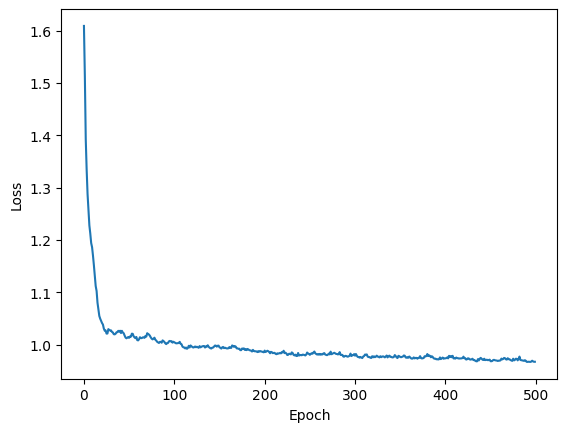

Test accuracy: 463.5101075268817
Accuracy: 0.4675268817204301
Precision: 0.4988894514782907
Recall: 0.46676959854729166
F1-score: 0.4769128098975095


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.59      0.64       495
           1       0.47      0.39      0.43       472
           2       0.31      0.45      0.37       449
           3       0.31      0.34      0.33       463
           4       0.69      0.56      0.62       446

    accuracy                           0.47      2325
   macro avg       0.50      0.47      0.48      2325
weighted avg       0.50      0.47      0.48      2325

                    0           1           2           3           4  \
precision    0.716049    0.468514    0.309342    0.312871    0.687671   
recall       0.585859    0.394068    0.449889    0.341253    0.562780   
f1-score     0.644444    0.428078    0.366606    0.326446    0.618989   
support    495.000000  472.000000  449.000000

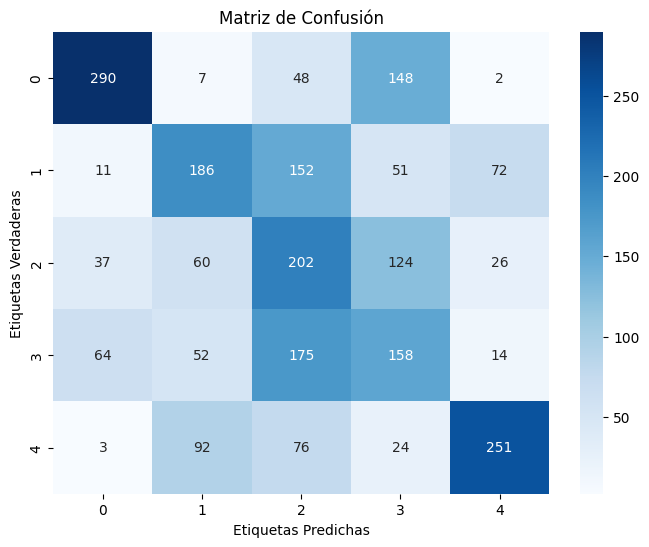

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_500_0.0001_0.2/resultados_500_0.0001_0.2.json
Procesando red con 500 epocas y 1e-05 de factor de aprendizaje y conjunto de entrenamiento 0.8


Procesando epocas:   0%|                                                             | 1/500 [00:16<2:19:42, 16.80s/it]

1.609814983255723


Procesando epocas:   0%|▏                                                            | 2/500 [00:33<2:19:01, 16.75s/it]

1.6097922914168414


Procesando epocas:   1%|▎                                                            | 3/500 [00:50<2:18:26, 16.71s/it]

1.6096587657928467


Procesando epocas:   1%|▍                                                            | 4/500 [01:07<2:18:39, 16.77s/it]

1.6096967655069687


Procesando epocas:   1%|▌                                                            | 5/500 [01:23<2:18:10, 16.75s/it]

1.609377548975103


Procesando epocas:   1%|▋                                                            | 6/500 [01:42<2:23:36, 17.44s/it]

1.6086564723183128


Procesando epocas:   1%|▊                                                            | 7/500 [02:02<2:29:26, 18.19s/it]

1.6072299936238457


Procesando epocas:   2%|▉                                                            | 8/500 [02:23<2:35:58, 19.02s/it]

1.602819995319142


Procesando epocas:   2%|█                                                            | 9/500 [02:43<2:39:43, 19.52s/it]

1.5898849690661712


Procesando epocas:   2%|█▏                                                          | 10/500 [03:03<2:41:23, 19.76s/it]

1.5546638776274289


Procesando epocas:   2%|█▎                                                          | 11/500 [03:24<2:43:08, 20.02s/it]

1.5054311240420621


Procesando epocas:   2%|█▍                                                          | 12/500 [03:45<2:45:05, 20.30s/it]

1.4679212675375097


Procesando epocas:   3%|█▌                                                          | 13/500 [04:06<2:45:48, 20.43s/it]

1.4400574557921466


Procesando epocas:   3%|█▋                                                          | 14/500 [04:26<2:45:59, 20.49s/it]

1.4171555035254535


Procesando epocas:   3%|█▊                                                          | 15/500 [04:43<2:37:20, 19.46s/it]

1.3934535349116606


Procesando epocas:   3%|█▉                                                          | 16/500 [05:00<2:29:56, 18.59s/it]

1.373573246422936


Procesando epocas:   3%|██                                                          | 17/500 [05:17<2:25:02, 18.02s/it]

1.356796761821298


Procesando epocas:   4%|██▏                                                         | 18/500 [05:33<2:21:14, 17.58s/it]

1.3416182076229768


Procesando epocas:   4%|██▎                                                         | 19/500 [05:50<2:18:34, 17.29s/it]

1.3276019552174736


Procesando epocas:   4%|██▍                                                         | 20/500 [06:07<2:16:44, 17.09s/it]

1.3152096748352051


Procesando epocas:   4%|██▌                                                         | 21/500 [06:23<2:15:07, 16.93s/it]

1.3014959272216349


Procesando epocas:   4%|██▋                                                         | 22/500 [06:40<2:14:23, 16.87s/it]

1.2934884162510143


Procesando epocas:   5%|██▊                                                         | 23/500 [06:56<2:13:30, 16.79s/it]

1.284112378428964


Procesando epocas:   5%|██▉                                                         | 24/500 [07:13<2:13:03, 16.77s/it]

1.269370058704825


Procesando epocas:   5%|███                                                         | 25/500 [07:30<2:12:33, 16.74s/it]

1.2610771957565756


Procesando epocas:   5%|███                                                         | 26/500 [07:46<2:11:54, 16.70s/it]

1.2456060023868785


Procesando epocas:   5%|███▏                                                        | 27/500 [08:03<2:11:39, 16.70s/it]

1.240861446717206


Procesando epocas:   6%|███▎                                                        | 28/500 [08:20<2:10:58, 16.65s/it]

1.2311917641583612


Procesando epocas:   6%|███▍                                                        | 29/500 [08:36<2:10:46, 16.66s/it]

1.2192318257163552


Procesando epocas:   6%|███▌                                                        | 30/500 [08:53<2:10:28, 16.66s/it]

1.2122959817157073


Procesando epocas:   6%|███▋                                                        | 31/500 [09:10<2:10:12, 16.66s/it]

1.2055656040416045


Procesando epocas:   6%|███▊                                                        | 32/500 [09:26<2:09:48, 16.64s/it]

1.2021284874747782


Procesando epocas:   7%|███▉                                                        | 33/500 [09:43<2:09:40, 16.66s/it]

1.186164396650651


Procesando epocas:   7%|████                                                        | 34/500 [10:00<2:09:28, 16.67s/it]

1.183341926686904


Procesando epocas:   7%|████▏                                                       | 35/500 [10:16<2:09:15, 16.68s/it]

1.1680311553618488


Procesando epocas:   7%|████▎                                                       | 36/500 [10:33<2:08:47, 16.65s/it]

1.1635354014003978


Procesando epocas:   7%|████▍                                                       | 37/500 [10:50<2:08:31, 16.66s/it]

1.1615910978878246


Procesando epocas:   8%|████▌                                                       | 38/500 [11:06<2:08:16, 16.66s/it]

1.145954009364633


Procesando epocas:   8%|████▋                                                       | 39/500 [11:23<2:07:58, 16.66s/it]

1.1416592408629025


Procesando epocas:   8%|████▊                                                       | 40/500 [11:40<2:07:38, 16.65s/it]

1.1390136543442222


Procesando epocas:   8%|████▉                                                       | 41/500 [11:56<2:07:49, 16.71s/it]

1.125148960422067


Procesando epocas:   8%|█████                                                       | 42/500 [12:13<2:07:47, 16.74s/it]

1.1159891058416929


Procesando epocas:   9%|█████▏                                                      | 43/500 [12:30<2:07:31, 16.74s/it]

1.1126859089907477


Procesando epocas:   9%|█████▎                                                      | 44/500 [12:47<2:07:19, 16.75s/it]

1.1055705252815695


Procesando epocas:   9%|█████▍                                                      | 45/500 [13:04<2:07:38, 16.83s/it]

1.0932725587311913


Procesando epocas:   9%|█████▌                                                      | 46/500 [13:21<2:08:59, 17.05s/it]

1.0893456788624034


Procesando epocas:   9%|█████▋                                                      | 47/500 [13:39<2:10:32, 17.29s/it]

1.0868448397692512


Procesando epocas:  10%|█████▊                                                      | 48/500 [13:57<2:11:23, 17.44s/it]

1.0804945353199453


Procesando epocas:  10%|█████▉                                                      | 49/500 [14:15<2:12:18, 17.60s/it]

1.0717674430678872


Procesando epocas:  10%|██████                                                      | 50/500 [14:33<2:12:45, 17.70s/it]

1.07045997170841


Procesando epocas:  10%|██████                                                      | 51/500 [14:51<2:13:22, 17.82s/it]

1.0631717275170718


Procesando epocas:  10%|██████▏                                                     | 52/500 [15:09<2:14:00, 17.95s/it]

1.060496324300766


Procesando epocas:  11%|██████▎                                                     | 53/500 [15:27<2:14:04, 18.00s/it]

1.0529958868727964


Procesando epocas:  11%|██████▍                                                     | 54/500 [15:45<2:13:47, 18.00s/it]

1.0471652981112984


Procesando epocas:  11%|██████▌                                                     | 55/500 [16:03<2:13:19, 17.98s/it]

1.0449804730275098


Procesando epocas:  11%|██████▋                                                     | 56/500 [16:21<2:12:53, 17.96s/it]

1.0378209548837998


Procesando epocas:  11%|██████▊                                                     | 57/500 [16:39<2:12:43, 17.98s/it]

1.0359318680622998


Procesando epocas:  12%|██████▉                                                     | 58/500 [16:57<2:12:01, 17.92s/it]

1.033512663490632


Procesando epocas:  12%|███████                                                     | 59/500 [17:16<2:14:20, 18.28s/it]

1.0273663864416234


Procesando epocas:  12%|███████▏                                                    | 60/500 [17:34<2:13:03, 18.15s/it]

1.0226974908043356


Procesando epocas:  12%|███████▎                                                    | 61/500 [17:52<2:12:34, 18.12s/it]

1.0229673757272608


Procesando epocas:  12%|███████▍                                                    | 62/500 [18:09<2:10:23, 17.86s/it]

1.0196470786543455


Procesando epocas:  13%|███████▌                                                    | 63/500 [18:26<2:08:18, 17.62s/it]

1.0140543706276837


Procesando epocas:  13%|███████▋                                                    | 64/500 [18:43<2:06:12, 17.37s/it]

1.0140062468893387


Procesando epocas:  13%|███████▊                                                    | 65/500 [19:00<2:04:33, 17.18s/it]

1.0113637047655442


Procesando epocas:  13%|███████▉                                                    | 66/500 [19:17<2:03:18, 17.05s/it]

1.0081836826661055


Procesando epocas:  13%|████████                                                    | 67/500 [19:33<2:02:37, 16.99s/it]

1.0069389862172744


Procesando epocas:  14%|████████▏                                                   | 68/500 [19:50<2:01:55, 16.93s/it]

1.005124455690384


Procesando epocas:  14%|████████▎                                                   | 69/500 [20:07<2:01:36, 16.93s/it]

1.0007718657746034


Procesando epocas:  14%|████████▍                                                   | 70/500 [20:24<2:00:56, 16.88s/it]

0.9998944198384004


Procesando epocas:  14%|████████▌                                                   | 71/500 [20:41<2:00:22, 16.84s/it]

0.9994738098453073


Procesando epocas:  14%|████████▋                                                   | 72/500 [20:58<2:00:20, 16.87s/it]

0.9954843419439653


Procesando epocas:  15%|████████▊                                                   | 73/500 [21:15<2:00:27, 16.93s/it]

0.9945004214258755


Procesando epocas:  15%|████████▉                                                   | 74/500 [21:32<2:00:22, 16.95s/it]

0.9919340354554793


Procesando epocas:  15%|█████████                                                   | 75/500 [21:49<2:00:35, 17.03s/it]

0.9875720942721647


Procesando epocas:  15%|█████████                                                   | 76/500 [22:06<2:01:16, 17.16s/it]

0.9878119798267588


Procesando epocas:  15%|█████████▏                                                  | 77/500 [22:24<2:01:03, 17.17s/it]

0.9878798744257759


Procesando epocas:  16%|█████████▎                                                  | 78/500 [22:41<2:01:12, 17.23s/it]

0.9857473538202398


Procesando epocas:  16%|█████████▍                                                  | 79/500 [22:58<2:00:48, 17.22s/it]

0.9852732546189252


Procesando epocas:  16%|█████████▌                                                  | 80/500 [23:15<2:00:25, 17.20s/it]

0.9830404162406922


Procesando epocas:  16%|█████████▋                                                  | 81/500 [23:32<1:59:50, 17.16s/it]

0.9816805986797108


Procesando epocas:  16%|█████████▊                                                  | 82/500 [23:50<1:59:53, 17.21s/it]

0.9787873092819662


Procesando epocas:  17%|█████████▉                                                  | 83/500 [24:07<1:59:39, 17.22s/it]

0.9783537685871124


Procesando epocas:  17%|██████████                                                  | 84/500 [24:24<1:58:25, 17.08s/it]

0.9775931772063761


Procesando epocas:  17%|██████████▏                                                 | 85/500 [24:41<1:57:50, 17.04s/it]

0.9773822956225451


Procesando epocas:  17%|██████████▎                                                 | 86/500 [24:57<1:57:03, 16.96s/it]

0.9766852427931393


Procesando epocas:  17%|██████████▍                                                 | 87/500 [25:14<1:56:40, 16.95s/it]

0.9753371035351472


Procesando epocas:  18%|██████████▌                                                 | 88/500 [25:31<1:55:59, 16.89s/it]

0.9746660926762749


Procesando epocas:  18%|██████████▋                                                 | 89/500 [25:48<1:55:20, 16.84s/it]

0.9754740385448232


Procesando epocas:  18%|██████████▊                                                 | 90/500 [26:04<1:54:49, 16.80s/it]

0.9747471669140984


Procesando epocas:  18%|██████████▉                                                 | 91/500 [26:21<1:54:20, 16.77s/it]

0.9726098621592802


Procesando epocas:  18%|███████████                                                 | 92/500 [26:38<1:54:16, 16.81s/it]

0.970391815550187


Procesando epocas:  19%|███████████▏                                                | 93/500 [26:55<1:54:59, 16.95s/it]

0.9704029991346247


Procesando epocas:  19%|███████████▎                                                | 94/500 [27:12<1:54:58, 16.99s/it]

0.9708415515282575


Procesando epocas:  19%|███████████▍                                                | 95/500 [27:29<1:54:18, 16.93s/it]

0.969340224125806


Procesando epocas:  19%|███████████▌                                                | 96/500 [27:46<1:53:50, 16.91s/it]

0.9679960801320917


Procesando epocas:  19%|███████████▋                                                | 97/500 [28:03<1:53:31, 16.90s/it]

0.9667232506415423


Procesando epocas:  20%|███████████▊                                                | 98/500 [28:20<1:52:57, 16.86s/it]

0.968577428074444


Procesando epocas:  20%|███████████▉                                                | 99/500 [28:36<1:52:22, 16.81s/it]

0.9672674049349392


Procesando epocas:  20%|███████████▊                                               | 100/500 [28:53<1:52:27, 16.87s/it]

0.9665498119943282


Procesando epocas:  20%|███████████▉                                               | 101/500 [29:11<1:52:51, 16.97s/it]

0.9672389405615189


Procesando epocas:  20%|████████████                                               | 102/500 [29:27<1:52:09, 16.91s/it]

0.9668288329068352


Procesando epocas:  21%|████████████▏                                              | 103/500 [29:44<1:51:24, 16.84s/it]

0.9661858011694515


Procesando epocas:  21%|████████████▎                                              | 104/500 [30:01<1:50:50, 16.79s/it]

0.9666968461345223


Procesando epocas:  21%|████████████▍                                              | 105/500 [30:17<1:50:17, 16.75s/it]

0.9658246681970708


Procesando epocas:  21%|████████████▌                                              | 106/500 [30:34<1:49:52, 16.73s/it]

0.9642540693283081


Procesando epocas:  21%|████████████▋                                              | 107/500 [30:51<1:49:32, 16.72s/it]

0.9636338549501756


Procesando epocas:  22%|████████████▋                                              | 108/500 [31:08<1:49:21, 16.74s/it]

0.9638480631744161


Procesando epocas:  22%|████████████▊                                              | 109/500 [31:24<1:48:58, 16.72s/it]

0.9633685753625982


Procesando epocas:  22%|████████████▉                                              | 110/500 [31:41<1:48:35, 16.71s/it]

0.9628440586959615


Procesando epocas:  22%|█████████████                                              | 111/500 [31:58<1:48:19, 16.71s/it]

0.961491761488073


Procesando epocas:  22%|█████████████▏                                             | 112/500 [32:14<1:48:01, 16.70s/it]

0.9623915097292732


Procesando epocas:  23%|█████████████▎                                             | 113/500 [32:31<1:47:44, 16.71s/it]

0.9614386435817269


Procesando epocas:  23%|█████████████▍                                             | 114/500 [32:48<1:48:05, 16.80s/it]

0.9612584573381088


Procesando epocas:  23%|█████████████▌                                             | 115/500 [33:05<1:47:32, 16.76s/it]

0.9609601935919594


Procesando epocas:  23%|█████████████▋                                             | 116/500 [33:21<1:47:11, 16.75s/it]

0.9586848111713634


Procesando epocas:  23%|█████████████▊                                             | 117/500 [33:39<1:47:39, 16.87s/it]

0.9607688837191638


Procesando epocas:  24%|█████████████▉                                             | 118/500 [33:56<1:47:41, 16.91s/it]

0.9600552134654101


Procesando epocas:  24%|██████████████                                             | 119/500 [34:13<1:47:30, 16.93s/it]

0.9610138798461241


Procesando epocas:  24%|██████████████▏                                            | 120/500 [34:29<1:46:53, 16.88s/it]

0.9597193255144008


Procesando epocas:  24%|██████████████▎                                            | 121/500 [34:46<1:46:12, 16.82s/it]

0.9605016981854159


Procesando epocas:  24%|██████████████▍                                            | 122/500 [35:03<1:45:40, 16.77s/it]

0.9599076832042021


Procesando epocas:  25%|██████████████▌                                            | 123/500 [35:19<1:45:08, 16.73s/it]

0.9587296163334565


Procesando epocas:  25%|██████████████▋                                            | 124/500 [35:36<1:45:09, 16.78s/it]

0.9587428236708921


Procesando epocas:  25%|██████████████▊                                            | 125/500 [35:53<1:44:51, 16.78s/it]

0.9573837837752174


Procesando epocas:  25%|██████████████▊                                            | 126/500 [36:10<1:44:36, 16.78s/it]

0.9585804038188037


Procesando epocas:  25%|██████████████▉                                            | 127/500 [36:27<1:45:00, 16.89s/it]

0.9583670083214255


Procesando epocas:  26%|███████████████                                            | 128/500 [36:44<1:44:23, 16.84s/it]

0.9585228555342731


Procesando epocas:  26%|███████████████▏                                           | 129/500 [37:00<1:43:47, 16.79s/it]

0.9580580325687633


Procesando epocas:  26%|███████████████▎                                           | 130/500 [37:17<1:43:19, 16.76s/it]

0.9581383266869713


Procesando epocas:  26%|███████████████▍                                           | 131/500 [37:34<1:43:09, 16.77s/it]

0.9561131813946893


Procesando epocas:  26%|███████████████▌                                           | 132/500 [37:51<1:43:15, 16.84s/it]

0.9588128857752856


Procesando epocas:  27%|███████████████▋                                           | 133/500 [38:07<1:42:41, 16.79s/it]

0.9575189997168149


Procesando epocas:  27%|███████████████▊                                           | 134/500 [38:24<1:42:12, 16.76s/it]

0.9567425619153416


Procesando epocas:  27%|███████████████▉                                           | 135/500 [38:41<1:41:54, 16.75s/it]

0.9571889730060802


Procesando epocas:  27%|████████████████                                           | 136/500 [38:58<1:41:56, 16.80s/it]

0.9568474201595082


Procesando epocas:  27%|████████████████▏                                          | 137/500 [39:15<1:41:40, 16.81s/it]

0.9564905128058265


Procesando epocas:  28%|████████████████▎                                          | 138/500 [39:31<1:41:07, 16.76s/it]

0.9555816096418044


Procesando epocas:  28%|████████████████▍                                          | 139/500 [39:48<1:40:58, 16.78s/it]

0.9558451940031613


Procesando epocas:  28%|████████████████▌                                          | 140/500 [40:05<1:40:22, 16.73s/it]

0.955640779172673


Procesando epocas:  28%|████████████████▋                                          | 141/500 [40:21<1:39:58, 16.71s/it]

0.9558766147669624


Procesando epocas:  28%|████████████████▊                                          | 142/500 [40:38<1:39:24, 16.66s/it]

0.9549021096790538


Procesando epocas:  29%|████████████████▊                                          | 143/500 [40:55<1:38:56, 16.63s/it]

0.9546577166108524


Procesando epocas:  29%|████████████████▉                                          | 144/500 [41:11<1:38:46, 16.65s/it]

0.9547114253044129


Procesando epocas:  29%|█████████████████                                          | 145/500 [41:28<1:38:42, 16.68s/it]

0.9548994958400726


Procesando epocas:  29%|█████████████████▏                                         | 146/500 [41:45<1:38:54, 16.76s/it]

0.9542065837804009


Procesando epocas:  29%|█████████████████▎                                         | 147/500 [42:02<1:39:40, 16.94s/it]

0.953639734843198


Procesando epocas:  30%|█████████████████▍                                         | 148/500 [42:19<1:38:46, 16.84s/it]

0.9534924475585713


Procesando epocas:  30%|█████████████████▌                                         | 149/500 [42:36<1:38:38, 16.86s/it]

0.9531128841287949


Procesando epocas:  30%|█████████████████▋                                         | 150/500 [42:53<1:38:09, 16.83s/it]

0.9527434566441704


Procesando epocas:  30%|█████████████████▊                                         | 151/500 [43:10<1:38:24, 16.92s/it]

0.9521401054718915


Procesando epocas:  30%|█████████████████▉                                         | 152/500 [43:26<1:37:56, 16.89s/it]

0.9529380805352154


Procesando epocas:  31%|██████████████████                                         | 153/500 [43:43<1:37:16, 16.82s/it]

0.9520300672334783


Procesando epocas:  31%|██████████████████▏                                        | 154/500 [43:59<1:36:10, 16.68s/it]

0.9538883300388561


Procesando epocas:  31%|██████████████████▎                                        | 155/500 [44:16<1:35:08, 16.55s/it]

0.9527434860958772


Procesando epocas:  31%|██████████████████▍                                        | 156/500 [44:32<1:34:21, 16.46s/it]

0.9527674506692325


Procesando epocas:  31%|██████████████████▌                                        | 157/500 [44:48<1:33:40, 16.39s/it]

0.9528636395931244


Procesando epocas:  32%|██████████████████▋                                        | 158/500 [45:04<1:33:12, 16.35s/it]

0.9526593906037948


Procesando epocas:  32%|██████████████████▊                                        | 159/500 [45:21<1:32:44, 16.32s/it]

0.9516567107509164


Procesando epocas:  32%|██████████████████▉                                        | 160/500 [45:37<1:32:20, 16.30s/it]

0.9512599229812622


Procesando epocas:  32%|██████████████████▉                                        | 161/500 [45:53<1:31:56, 16.27s/it]

0.9514776506844689


Procesando epocas:  32%|███████████████████                                        | 162/500 [46:09<1:31:37, 16.26s/it]

0.9512780988917632


Procesando epocas:  33%|███████████████████▏                                       | 163/500 [46:26<1:31:16, 16.25s/it]

0.9510700709679547


Procesando epocas:  33%|███████████████████▎                                       | 164/500 [46:42<1:30:56, 16.24s/it]

0.950981047223596


Procesando epocas:  33%|███████████████████▍                                       | 165/500 [46:58<1:30:41, 16.24s/it]

0.9500593921717475


Procesando epocas:  33%|███████████████████▌                                       | 166/500 [47:14<1:30:24, 16.24s/it]

0.9500169950373033


Procesando epocas:  33%|███████████████████▋                                       | 167/500 [47:31<1:30:07, 16.24s/it]

0.9508887231349945


Procesando epocas:  34%|███████████████████▊                                       | 168/500 [47:47<1:29:51, 16.24s/it]

0.95159632563591


Procesando epocas:  34%|███████████████████▉                                       | 169/500 [48:03<1:30:03, 16.32s/it]

0.9501110076904297


Procesando epocas:  34%|████████████████████                                       | 170/500 [48:20<1:30:23, 16.43s/it]

0.9495447400738212


Procesando epocas:  34%|████████████████████▏                                      | 171/500 [48:38<1:33:00, 16.96s/it]

0.9492703269509708


Procesando epocas:  34%|████████████████████▎                                      | 172/500 [48:58<1:37:08, 17.77s/it]

0.950032362166573


Procesando epocas:  35%|████████████████████▍                                      | 173/500 [49:18<1:41:01, 18.54s/it]

0.9497115822399363


Procesando epocas:  35%|████████████████████▌                                      | 174/500 [49:39<1:43:46, 19.10s/it]

0.9498524153933806


Procesando epocas:  35%|████████████████████▋                                      | 175/500 [49:59<1:45:40, 19.51s/it]

0.9494178582640255


Procesando epocas:  35%|████████████████████▊                                      | 176/500 [50:20<1:47:03, 19.83s/it]

0.9486855997758753


Procesando epocas:  35%|████████████████████▉                                      | 177/500 [50:40<1:47:56, 20.05s/it]

0.9492769532343921


Procesando epocas:  36%|█████████████████████                                      | 178/500 [51:01<1:48:22, 20.19s/it]

0.9492869983701145


Procesando epocas:  36%|█████████████████████                                      | 179/500 [51:21<1:48:23, 20.26s/it]

0.9490830442484688


Procesando epocas:  36%|█████████████████████▏                                     | 180/500 [51:40<1:45:40, 19.81s/it]

0.9490756753612967


Procesando epocas:  36%|█████████████████████▎                                     | 181/500 [51:56<1:40:09, 18.84s/it]

0.9484711086048799


Procesando epocas:  36%|█████████████████████▍                                     | 182/500 [52:13<1:36:08, 18.14s/it]

0.9480729944565717


Procesando epocas:  37%|█████████████████████▌                                     | 183/500 [52:30<1:33:15, 17.65s/it]

0.9486648710335002


Procesando epocas:  37%|█████████████████████▋                                     | 184/500 [52:46<1:31:08, 17.30s/it]

0.9474816665929906


Procesando epocas:  37%|█████████████████████▊                                     | 185/500 [53:03<1:29:37, 17.07s/it]

0.9483789521105149


Procesando epocas:  37%|█████████████████████▉                                     | 186/500 [53:19<1:28:40, 16.94s/it]

0.948289296206306


Procesando epocas:  37%|██████████████████████                                     | 187/500 [53:36<1:27:52, 16.84s/it]

0.9477893194731544


Procesando epocas:  38%|██████████████████████▏                                    | 188/500 [53:53<1:27:40, 16.86s/it]

0.9475834636127247


Procesando epocas:  38%|██████████████████████▎                                    | 189/500 [54:09<1:27:17, 16.84s/it]

0.9479378633639391


Procesando epocas:  38%|██████████████████████▍                                    | 190/500 [54:26<1:26:44, 16.79s/it]

0.9478206992149353


Procesando epocas:  38%|██████████████████████▌                                    | 191/500 [54:43<1:26:14, 16.74s/it]

0.9468950474963469


Procesando epocas:  38%|██████████████████████▋                                    | 192/500 [55:00<1:25:58, 16.75s/it]

0.9470741489354302


Procesando epocas:  39%|██████████████████████▊                                    | 193/500 [55:17<1:26:45, 16.96s/it]

0.946140919713413


Procesando epocas:  39%|██████████████████████▉                                    | 194/500 [55:35<1:27:41, 17.19s/it]

0.9472648354137645


Procesando epocas:  39%|███████████████████████                                    | 195/500 [55:53<1:28:18, 17.37s/it]

0.9466891327325035


Procesando epocas:  39%|███████████████████████▏                                   | 196/500 [56:10<1:28:34, 17.48s/it]

0.9465776646838469


Procesando epocas:  39%|███████████████████████▏                                   | 197/500 [56:28<1:28:55, 17.61s/it]

0.9469834099797642


Procesando epocas:  40%|███████████████████████▎                                   | 198/500 [56:46<1:28:29, 17.58s/it]

0.9459441391860738


Procesando epocas:  40%|███████████████████████▍                                   | 199/500 [57:04<1:28:40, 17.68s/it]

0.9470395214417402


Procesando epocas:  40%|███████████████████████▌                                   | 200/500 [57:22<1:28:56, 17.79s/it]

0.9458344305262846


Procesando epocas:  40%|███████████████████████▋                                   | 201/500 [57:39<1:28:24, 17.74s/it]

0.946421985766467


Procesando epocas:  40%|███████████████████████▊                                   | 202/500 [57:57<1:28:31, 17.83s/it]

0.9466047953156864


Procesando epocas:  41%|███████████████████████▉                                   | 203/500 [58:15<1:28:03, 17.79s/it]

0.9462809247129104


Procesando epocas:  41%|████████████████████████                                   | 204/500 [58:33<1:27:56, 17.83s/it]

0.9462445571142084


Procesando epocas:  41%|████████████████████████▏                                  | 205/500 [58:51<1:27:42, 17.84s/it]

0.9462126128813799


Procesando epocas:  41%|████████████████████████▎                                  | 206/500 [59:08<1:27:07, 17.78s/it]

0.9455211853279787


Procesando epocas:  41%|████████████████████████▍                                  | 207/500 [59:26<1:26:36, 17.74s/it]

0.9455397938980775


Procesando epocas:  42%|████████████████████████▌                                  | 208/500 [59:44<1:26:07, 17.70s/it]

0.9447659951799056


Procesando epocas:  42%|███████████████████████▊                                 | 209/500 [1:00:01<1:24:40, 17.46s/it]

0.9455165522940019


Procesando epocas:  42%|███████████████████████▉                                 | 210/500 [1:00:17<1:23:10, 17.21s/it]

0.9447176926276263


Procesando epocas:  42%|████████████████████████                                 | 211/500 [1:00:34<1:22:01, 17.03s/it]

0.9457315735957201


Procesando epocas:  42%|████████████████████████▏                                | 212/500 [1:00:50<1:21:08, 16.90s/it]

0.9446658320286695


Procesando epocas:  43%|████████████████████████▎                                | 213/500 [1:01:07<1:20:38, 16.86s/it]

0.944574026851093


Procesando epocas:  43%|████████████████████████▍                                | 214/500 [1:01:24<1:20:09, 16.82s/it]

0.9448683002415825


Procesando epocas:  43%|████████████████████████▌                                | 215/500 [1:01:41<1:19:37, 16.76s/it]

0.9450117721277125


Procesando epocas:  43%|████████████████████████▌                                | 216/500 [1:01:57<1:19:11, 16.73s/it]

0.9444386682089637


Procesando epocas:  43%|████████████████████████▋                                | 217/500 [1:02:14<1:18:44, 16.69s/it]

0.944982464874492


Procesando epocas:  44%|████████████████████████▊                                | 218/500 [1:02:31<1:18:30, 16.71s/it]

0.944335644385394


Procesando epocas:  44%|████████████████████████▉                                | 219/500 [1:02:47<1:18:25, 16.74s/it]

0.9447808497092303


Procesando epocas:  44%|█████████████████████████                                | 220/500 [1:03:04<1:18:05, 16.73s/it]

0.9437950695262236


Procesando epocas:  44%|█████████████████████████▏                               | 221/500 [1:03:21<1:18:00, 16.78s/it]

0.944471187100691


Procesando epocas:  44%|█████████████████████████▎                               | 222/500 [1:03:38<1:18:02, 16.84s/it]

0.9443786557982949


Procesando epocas:  45%|█████████████████████████▍                               | 223/500 [1:03:55<1:17:57, 16.89s/it]

0.9441577869303086


Procesando epocas:  45%|█████████████████████████▌                               | 224/500 [1:04:12<1:17:46, 16.91s/it]

0.9436165897285237


Procesando epocas:  45%|█████████████████████████▋                               | 225/500 [1:04:29<1:17:21, 16.88s/it]

0.943958320687799


Procesando epocas:  45%|█████████████████████████▊                               | 226/500 [1:04:46<1:16:58, 16.86s/it]

0.9437785870888654


Procesando epocas:  45%|█████████████████████████▉                               | 227/500 [1:05:02<1:16:45, 16.87s/it]

0.9434976570746478


Procesando epocas:  46%|█████████████████████████▉                               | 228/500 [1:05:19<1:16:20, 16.84s/it]

0.943694909881143


Procesando epocas:  46%|██████████████████████████                               | 229/500 [1:05:36<1:15:54, 16.81s/it]

0.9442053966662463


Procesando epocas:  46%|██████████████████████████▏                              | 230/500 [1:05:53<1:15:31, 16.78s/it]

0.9437113498940187


Procesando epocas:  46%|██████████████████████████▎                              | 231/500 [1:06:09<1:15:17, 16.79s/it]

0.9437418548499836


Procesando epocas:  46%|██████████████████████████▍                              | 232/500 [1:06:26<1:14:53, 16.77s/it]

0.9440343905897701


Procesando epocas:  47%|██████████████████████████▌                              | 233/500 [1:06:43<1:14:33, 16.75s/it]

0.9422504340901094


Procesando epocas:  47%|██████████████████████████▋                              | 234/500 [1:07:00<1:14:21, 16.77s/it]

0.9432131037992589


Procesando epocas:  47%|██████████████████████████▊                              | 235/500 [1:07:16<1:13:59, 16.75s/it]

0.9433640809620127


Procesando epocas:  47%|██████████████████████████▉                              | 236/500 [1:07:33<1:13:53, 16.79s/it]

0.9428667597910937


Procesando epocas:  47%|███████████████████████████                              | 237/500 [1:07:50<1:13:29, 16.77s/it]

0.9425630825407365


Procesando epocas:  48%|███████████████████████████▏                             | 238/500 [1:08:07<1:13:09, 16.75s/it]

0.9427759962923387


Procesando epocas:  48%|███████████████████████████▏                             | 239/500 [1:08:24<1:13:13, 16.83s/it]

0.942998014127507


Procesando epocas:  48%|███████████████████████████▎                             | 240/500 [1:08:41<1:13:04, 16.86s/it]

0.9437266433940215


Procesando epocas:  48%|███████████████████████████▍                             | 241/500 [1:08:57<1:12:34, 16.81s/it]

0.9427838528857512


Procesando epocas:  48%|███████████████████████████▌                             | 242/500 [1:09:14<1:12:24, 16.84s/it]

0.9432624126181883


Procesando epocas:  49%|███████████████████████████▋                             | 243/500 [1:09:31<1:12:15, 16.87s/it]

0.9431570312556099


Procesando epocas:  49%|███████████████████████████▊                             | 244/500 [1:09:48<1:11:49, 16.83s/it]

0.9423433310845319


Procesando epocas:  49%|███████████████████████████▉                             | 245/500 [1:10:05<1:11:21, 16.79s/it]

0.9427620645831613


Procesando epocas:  49%|████████████████████████████                             | 246/500 [1:10:21<1:10:58, 16.76s/it]

0.9424648670589223


Procesando epocas:  49%|████████████████████████████▏                            | 247/500 [1:10:38<1:10:36, 16.75s/it]

0.9426189576878267


Procesando epocas:  50%|████████████████████████████▎                            | 248/500 [1:10:55<1:10:23, 16.76s/it]

0.9418033428051893


Procesando epocas:  50%|████████████████████████████▍                            | 249/500 [1:11:12<1:10:07, 16.76s/it]

0.9419917884994956


Procesando epocas:  50%|████████████████████████████▌                            | 250/500 [1:11:28<1:09:47, 16.75s/it]

0.9427842140197754


Procesando epocas:  50%|████████████████████████████▌                            | 251/500 [1:11:45<1:09:29, 16.74s/it]

0.9415507519946379


Procesando epocas:  50%|████████████████████████████▋                            | 252/500 [1:12:02<1:09:05, 16.71s/it]

0.9417183507891262


Procesando epocas:  51%|████████████████████████████▊                            | 253/500 [1:12:18<1:08:45, 16.70s/it]

0.9423384428024292


Procesando epocas:  51%|████████████████████████████▉                            | 254/500 [1:12:35<1:08:29, 16.71s/it]

0.9422318335841684


Procesando epocas:  51%|█████████████████████████████                            | 255/500 [1:12:52<1:08:08, 16.69s/it]

0.9408984370091382


Procesando epocas:  51%|█████████████████████████████▏                           | 256/500 [1:13:08<1:07:50, 16.68s/it]

0.9414160788059235


Procesando epocas:  51%|█████████████████████████████▎                           | 257/500 [1:13:25<1:07:34, 16.69s/it]

0.9412469751694623


Procesando epocas:  52%|█████████████████████████████▍                           | 258/500 [1:13:42<1:07:24, 16.71s/it]

0.9404672805000754


Procesando epocas:  52%|█████████████████████████████▌                           | 259/500 [1:13:59<1:07:04, 16.70s/it]

0.9405682395486271


Procesando epocas:  52%|█████████████████████████████▋                           | 260/500 [1:14:15<1:06:46, 16.69s/it]

0.9410274761564591


Procesando epocas:  52%|█████████████████████████████▊                           | 261/500 [1:14:32<1:06:28, 16.69s/it]

0.940795983987696


Procesando epocas:  52%|█████████████████████████████▊                           | 262/500 [1:14:49<1:06:13, 16.69s/it]

0.940752774477005


Procesando epocas:  53%|█████████████████████████████▉                           | 263/500 [1:15:05<1:05:53, 16.68s/it]

0.94134301052374


Procesando epocas:  53%|██████████████████████████████                           | 264/500 [1:15:22<1:05:33, 16.67s/it]

0.9408476668245652


Procesando epocas:  53%|██████████████████████████████▏                          | 265/500 [1:15:39<1:05:16, 16.67s/it]

0.940816261137233


Procesando epocas:  53%|██████████████████████████████▎                          | 266/500 [1:15:55<1:04:58, 16.66s/it]

0.9400689402047325


Procesando epocas:  53%|██████████████████████████████▍                          | 267/500 [1:16:12<1:04:47, 16.69s/it]

0.9405789750463822


Procesando epocas:  54%|██████████████████████████████▌                          | 268/500 [1:16:29<1:04:30, 16.68s/it]

0.9410757408422582


Procesando epocas:  54%|██████████████████████████████▋                          | 269/500 [1:16:45<1:04:09, 16.67s/it]

0.9402587455861708


Procesando epocas:  54%|██████████████████████████████▊                          | 270/500 [1:17:02<1:03:53, 16.67s/it]

0.9402243736912222


Procesando epocas:  54%|██████████████████████████████▉                          | 271/500 [1:17:19<1:03:33, 16.65s/it]

0.940066245022942


Procesando epocas:  54%|███████████████████████████████                          | 272/500 [1:17:35<1:03:15, 16.65s/it]

0.9398124575614929


Procesando epocas:  55%|███████████████████████████████                          | 273/500 [1:17:52<1:02:58, 16.64s/it]

0.9402753051589517


Procesando epocas:  55%|███████████████████████████████▏                         | 274/500 [1:18:08<1:02:38, 16.63s/it]

0.9391394183916204


Procesando epocas:  55%|███████████████████████████████▎                         | 275/500 [1:18:25<1:02:21, 16.63s/it]

0.9395324696512783


Procesando epocas:  55%|███████████████████████████████▍                         | 276/500 [1:18:42<1:02:07, 16.64s/it]

0.93998962430393


Procesando epocas:  55%|███████████████████████████████▌                         | 277/500 [1:18:58<1:01:54, 16.66s/it]

0.9391357204493355


Procesando epocas:  56%|███████████████████████████████▋                         | 278/500 [1:19:15<1:01:42, 16.68s/it]

0.9391982110107646


Procesando epocas:  56%|███████████████████████████████▊                         | 279/500 [1:19:32<1:01:24, 16.67s/it]

0.9386625601964839


Procesando epocas:  56%|███████████████████████████████▉                         | 280/500 [1:19:48<1:01:05, 16.66s/it]

0.9393827171886668


Procesando epocas:  56%|████████████████████████████████                         | 281/500 [1:20:05<1:00:50, 16.67s/it]

0.9390769800719093


Procesando epocas:  56%|████████████████████████████████▏                        | 282/500 [1:20:22<1:00:32, 16.66s/it]

0.939250910282135


Procesando epocas:  57%|████████████████████████████████▎                        | 283/500 [1:20:38<1:00:14, 16.66s/it]

0.9390864410821129


Procesando epocas:  57%|█████████████████████████████████▌                         | 284/500 [1:20:55<59:57, 16.66s/it]

0.9398144967415754


Procesando epocas:  57%|█████████████████████████████████▋                         | 285/500 [1:21:12<59:38, 16.64s/it]

0.9399109945577734


Procesando epocas:  57%|█████████████████████████████████▋                         | 286/500 [1:21:28<59:28, 16.67s/it]

0.9391818043063669


Procesando epocas:  57%|█████████████████████████████████▊                         | 287/500 [1:21:45<59:22, 16.72s/it]

0.9392644440426546


Procesando epocas:  58%|█████████████████████████████████▉                         | 288/500 [1:22:02<58:53, 16.67s/it]

0.9387225817231571


Procesando epocas:  58%|██████████████████████████████████                         | 289/500 [1:22:18<58:26, 16.62s/it]

0.9392121251891641


Procesando epocas:  58%|██████████████████████████████████▏                        | 290/500 [1:22:35<58:04, 16.59s/it]

0.9389903822365929


Procesando epocas:  58%|██████████████████████████████████▎                        | 291/500 [1:22:51<57:41, 16.56s/it]

0.9392487666186164


Procesando epocas:  58%|██████████████████████████████████▍                        | 292/500 [1:23:08<57:22, 16.55s/it]

0.9395247073734507


Procesando epocas:  59%|██████████████████████████████████▌                        | 293/500 [1:23:24<57:04, 16.55s/it]

0.9390334721873789


Procesando epocas:  59%|██████████████████████████████████▋                        | 294/500 [1:23:41<56:55, 16.58s/it]

0.9395173816119924


Procesando epocas:  59%|██████████████████████████████████▊                        | 295/500 [1:23:58<56:43, 16.60s/it]

0.9390537780873915


Procesando epocas:  59%|██████████████████████████████████▉                        | 296/500 [1:24:14<56:35, 16.64s/it]

0.9389393056140226


Procesando epocas:  59%|███████████████████████████████████                        | 297/500 [1:24:31<56:16, 16.63s/it]

0.9392166383126203


Procesando epocas:  60%|███████████████████████████████████▏                       | 298/500 [1:24:48<56:01, 16.64s/it]

0.9386543168741114


Procesando epocas:  60%|███████████████████████████████████▎                       | 299/500 [1:25:04<55:54, 16.69s/it]

0.9392275424564586


Procesando epocas:  60%|███████████████████████████████████▍                       | 300/500 [1:25:21<55:41, 16.71s/it]

0.9395652364282047


Procesando epocas:  60%|███████████████████████████████████▌                       | 301/500 [1:25:38<55:27, 16.72s/it]

0.9387318916180555


Procesando epocas:  60%|███████████████████████████████████▋                       | 302/500 [1:25:55<55:11, 16.73s/it]

0.93924819967326


Procesando epocas:  61%|███████████████████████████████████▊                       | 303/500 [1:26:12<55:01, 16.76s/it]

0.9392562939840204


Procesando epocas:  61%|███████████████████████████████████▊                       | 304/500 [1:26:28<54:41, 16.74s/it]

0.9389206339331234


Procesando epocas:  61%|███████████████████████████████████▉                       | 305/500 [1:26:45<54:25, 16.75s/it]

0.939238303899765


Procesando epocas:  61%|████████████████████████████████████                       | 306/500 [1:27:02<54:04, 16.72s/it]

0.9386488307924832


Procesando epocas:  61%|████████████████████████████████████▏                      | 307/500 [1:27:18<53:49, 16.73s/it]

0.9387217069373411


Procesando epocas:  62%|████████████████████████████████████▎                      | 308/500 [1:27:36<54:03, 16.89s/it]

0.9392656634835636


Procesando epocas:  62%|████████████████████████████████████▍                      | 309/500 [1:27:53<53:47, 16.90s/it]

0.9389591157436371


Procesando epocas:  62%|████████████████████████████████████▌                      | 310/500 [1:28:09<53:26, 16.87s/it]

0.9395461422555587


Procesando epocas:  62%|████████████████████████████████████▋                      | 311/500 [1:28:26<52:57, 16.81s/it]

0.9387342751026153


Procesando epocas:  62%|████████████████████████████████████▊                      | 312/500 [1:28:43<52:34, 16.78s/it]

0.9395281854797812


Procesando epocas:  63%|████████████████████████████████████▉                      | 313/500 [1:28:59<52:11, 16.74s/it]

0.9387304702225854


Procesando epocas:  63%|█████████████████████████████████████                      | 314/500 [1:29:16<51:53, 16.74s/it]

0.9391706582377939


Procesando epocas:  63%|█████████████████████████████████████▏                     | 315/500 [1:29:33<51:42, 16.77s/it]

0.9385992986314436


Procesando epocas:  63%|█████████████████████████████████████▎                     | 316/500 [1:29:50<51:19, 16.74s/it]

0.9385749687166774


Procesando epocas:  63%|█████████████████████████████████████▍                     | 317/500 [1:30:06<50:52, 16.68s/it]

0.9395894906100105


Procesando epocas:  64%|█████████████████████████████████████▌                     | 318/500 [1:30:23<50:30, 16.65s/it]

0.9384154922821942


Procesando epocas:  64%|█████████████████████████████████████▋                     | 319/500 [1:30:39<50:08, 16.62s/it]

0.9388571164187263


Procesando epocas:  64%|█████████████████████████████████████▊                     | 320/500 [1:30:56<49:48, 16.60s/it]

0.9389113226357628


Procesando epocas:  64%|█████████████████████████████████████▉                     | 321/500 [1:31:13<49:30, 16.59s/it]

0.9387649655342102


Procesando epocas:  64%|█████████████████████████████████████▉                     | 322/500 [1:31:29<49:19, 16.63s/it]

0.938591087215087


Procesando epocas:  65%|██████████████████████████████████████                     | 323/500 [1:31:46<49:05, 16.64s/it]

0.9382990255075343


Procesando epocas:  65%|██████████████████████████████████████▏                    | 324/500 [1:32:03<48:51, 16.66s/it]

0.9387444376945495


Procesando epocas:  65%|██████████████████████████████████████▎                    | 325/500 [1:32:19<48:40, 16.69s/it]

0.9386324871988857


Procesando epocas:  65%|██████████████████████████████████████▍                    | 326/500 [1:32:36<48:30, 16.73s/it]

0.9380519102601445


Procesando epocas:  65%|██████████████████████████████████████▌                    | 327/500 [1:32:53<48:15, 16.74s/it]

0.9384220435338861


Procesando epocas:  66%|██████████████████████████████████████▋                    | 328/500 [1:33:10<47:57, 16.73s/it]

0.9378882089081932


Procesando epocas:  66%|██████████████████████████████████████▊                    | 329/500 [1:33:26<47:35, 16.70s/it]

0.9387143050923067


Procesando epocas:  66%|██████████████████████████████████████▉                    | 330/500 [1:33:43<47:15, 16.68s/it]

0.9382683185970082


Procesando epocas:  66%|███████████████████████████████████████                    | 331/500 [1:34:00<46:55, 16.66s/it]

0.9382245488026563


Procesando epocas:  66%|███████████████████████████████████████▏                   | 332/500 [1:34:16<46:36, 16.64s/it]

0.9383277949164895


Procesando epocas:  67%|███████████████████████████████████████▎                   | 333/500 [1:34:33<46:17, 16.63s/it]

0.9379293420735527


Procesando epocas:  67%|███████████████████████████████████████▍                   | 334/500 [1:34:49<45:59, 16.62s/it]

0.9384914257947137


Procesando epocas:  67%|███████████████████████████████████████▌                   | 335/500 [1:35:06<45:43, 16.63s/it]

0.9385714464327868


Procesando epocas:  67%|███████████████████████████████████████▋                   | 336/500 [1:35:23<45:25, 16.62s/it]

0.9379009720157174


Procesando epocas:  67%|███████████████████████████████████████▊                   | 337/500 [1:35:39<45:09, 16.62s/it]

0.9381703892174889


Procesando epocas:  68%|███████████████████████████████████████▉                   | 338/500 [1:35:56<44:52, 16.62s/it]

0.9379308016861186


Procesando epocas:  68%|████████████████████████████████████████                   | 339/500 [1:36:12<44:35, 16.62s/it]

0.9376601043869467


Procesando epocas:  68%|████████████████████████████████████████                   | 340/500 [1:36:29<44:19, 16.62s/it]

0.9383288102991441


Procesando epocas:  68%|████████████████████████████████████████▏                  | 341/500 [1:36:46<44:03, 16.62s/it]

0.9380627046613133


Procesando epocas:  68%|████████████████████████████████████████▎                  | 342/500 [1:37:02<43:45, 16.62s/it]

0.9381746677791372


Procesando epocas:  69%|████████████████████████████████████████▍                  | 343/500 [1:37:19<43:30, 16.63s/it]

0.9375409206923316


Procesando epocas:  69%|████████████████████████████████████████▌                  | 344/500 [1:37:36<43:14, 16.63s/it]

0.9373581945896149


Procesando epocas:  69%|████████████████████████████████████████▋                  | 345/500 [1:37:52<42:58, 16.64s/it]

0.9385503810994765


Procesando epocas:  69%|████████████████████████████████████████▊                  | 346/500 [1:38:09<42:41, 16.63s/it]

0.9372135022107293


Procesando epocas:  69%|████████████████████████████████████████▉                  | 347/500 [1:38:25<42:22, 16.62s/it]

0.9378032158402836


Procesando epocas:  70%|█████████████████████████████████████████                  | 348/500 [1:38:42<42:07, 16.63s/it]

0.9377620872329263


Procesando epocas:  70%|█████████████████████████████████████████▏                 | 349/500 [1:38:59<41:51, 16.63s/it]

0.937265938871047


Procesando epocas:  70%|█████████████████████████████████████████▎                 | 350/500 [1:39:15<41:34, 16.63s/it]

0.9381266583414639


Procesando epocas:  70%|█████████████████████████████████████████▍                 | 351/500 [1:39:32<41:18, 16.63s/it]

0.937518274082857


Procesando epocas:  70%|█████████████████████████████████████████▌                 | 352/500 [1:39:49<41:01, 16.63s/it]

0.93787540863542


Procesando epocas:  71%|█████████████████████████████████████████▋                 | 353/500 [1:40:05<40:45, 16.64s/it]

0.9377987346228431


Procesando epocas:  71%|█████████████████████████████████████████▊                 | 354/500 [1:40:22<40:28, 16.63s/it]

0.9373708093867582


Procesando epocas:  71%|█████████████████████████████████████████▉                 | 355/500 [1:40:39<40:11, 16.63s/it]

0.9376405393376069


Procesando epocas:  71%|██████████████████████████████████████████                 | 356/500 [1:40:55<39:54, 16.63s/it]

0.9370975115719964


Procesando epocas:  71%|██████████████████████████████████████████▏                | 357/500 [1:41:12<39:37, 16.63s/it]

0.9373115339699913


Procesando epocas:  72%|██████████████████████████████████████████▏                | 358/500 [1:41:28<39:20, 16.62s/it]

0.9372680751716389


Procesando epocas:  72%|██████████████████████████████████████████▎                | 359/500 [1:41:45<39:03, 16.62s/it]

0.937137465617236


Procesando epocas:  72%|██████████████████████████████████████████▍                | 360/500 [1:42:02<38:46, 16.62s/it]

0.9374885222491096


Procesando epocas:  72%|██████████████████████████████████████████▌                | 361/500 [1:42:18<38:30, 16.62s/it]

0.9370883264962364


Procesando epocas:  72%|██████████████████████████████████████████▋                | 362/500 [1:42:35<38:13, 16.62s/it]

0.9373153164106257


Procesando epocas:  73%|██████████████████████████████████████████▊                | 363/500 [1:42:52<37:58, 16.63s/it]

0.9374071562991423


Procesando epocas:  73%|██████████████████████████████████████████▉                | 364/500 [1:43:08<37:41, 16.63s/it]

0.9373868630212896


Procesando epocas:  73%|███████████████████████████████████████████                | 365/500 [1:43:25<37:24, 16.63s/it]

0.9370010281310363


Procesando epocas:  73%|███████████████████████████████████████████▏               | 366/500 [1:43:41<37:07, 16.63s/it]

0.9371398231562447


Procesando epocas:  73%|███████████████████████████████████████████▎               | 367/500 [1:43:58<36:52, 16.64s/it]

0.937505146335153


Procesando epocas:  74%|███████████████████████████████████████████▍               | 368/500 [1:44:15<36:36, 16.64s/it]

0.9373973765793968


Procesando epocas:  74%|███████████████████████████████████████████▌               | 369/500 [1:44:31<36:19, 16.63s/it]

0.9367940741426805


Procesando epocas:  74%|███████████████████████████████████████████▋               | 370/500 [1:44:48<36:01, 16.63s/it]

0.9369211161837858


Procesando epocas:  74%|███████████████████████████████████████████▊               | 371/500 [1:45:05<35:45, 16.63s/it]

0.9370713721303379


Procesando epocas:  74%|███████████████████████████████████████████▉               | 372/500 [1:45:21<35:28, 16.63s/it]

0.9367115350330577


Procesando epocas:  75%|████████████████████████████████████████████               | 373/500 [1:45:38<35:15, 16.66s/it]

0.9370844472857083


Procesando epocas:  75%|████████████████████████████████████████████▏              | 374/500 [1:45:55<34:57, 16.65s/it]

0.9365563326022204


Procesando epocas:  75%|████████████████████████████████████████████▎              | 375/500 [1:46:11<34:40, 16.64s/it]

0.9372147437404184


Procesando epocas:  75%|████████████████████████████████████████████▎              | 376/500 [1:46:28<34:22, 16.64s/it]

0.9370281506987179


Procesando epocas:  75%|████████████████████████████████████████████▍              | 377/500 [1:46:44<34:05, 16.63s/it]

0.9370337654562557


Procesando epocas:  76%|████████████████████████████████████████████▌              | 378/500 [1:47:01<33:49, 16.64s/it]

0.9368418339420768


Procesando epocas:  76%|████████████████████████████████████████████▋              | 379/500 [1:47:18<33:32, 16.64s/it]

0.936782330975813


Procesando epocas:  76%|████████████████████████████████████████████▊              | 380/500 [1:47:34<33:17, 16.64s/it]

0.9366815872052137


Procesando epocas:  76%|████████████████████████████████████████████▉              | 381/500 [1:47:51<33:00, 16.65s/it]

0.9367190048975103


Procesando epocas:  76%|█████████████████████████████████████████████              | 382/500 [1:48:08<32:44, 16.65s/it]

0.9366832501748029


Procesando epocas:  77%|█████████████████████████████████████████████▏             | 383/500 [1:48:24<32:27, 16.65s/it]

0.9367205237641054


Procesando epocas:  77%|█████████████████████████████████████████████▎             | 384/500 [1:48:41<32:10, 16.65s/it]

0.9365595999886008


Procesando epocas:  77%|█████████████████████████████████████████████▍             | 385/500 [1:48:58<31:54, 16.65s/it]

0.9364477283814374


Procesando epocas:  77%|█████████████████████████████████████████████▌             | 386/500 [1:49:14<31:36, 16.63s/it]

0.93747758900418


Procesando epocas:  77%|█████████████████████████████████████████████▋             | 387/500 [1:49:31<31:18, 16.63s/it]

0.9369788913165822


Procesando epocas:  78%|█████████████████████████████████████████████▊             | 388/500 [1:49:47<31:02, 16.63s/it]

0.9368640520993401


Procesando epocas:  78%|█████████████████████████████████████████████▉             | 389/500 [1:50:04<30:45, 16.62s/it]

0.9362848250304951


Procesando epocas:  78%|██████████████████████████████████████████████             | 390/500 [1:50:21<30:28, 16.62s/it]

0.936509392191382


Procesando epocas:  78%|██████████████████████████████████████████████▏            | 391/500 [1:50:37<30:12, 16.63s/it]

0.9367918957682216


Procesando epocas:  78%|██████████████████████████████████████████████▎            | 392/500 [1:50:54<29:58, 16.65s/it]

0.9369630925795611


Procesando epocas:  79%|██████████████████████████████████████████████▎            | 393/500 [1:51:11<29:49, 16.72s/it]

0.9370567823157591


Procesando epocas:  79%|██████████████████████████████████████████████▍            | 394/500 [1:51:28<29:40, 16.79s/it]

0.9369722324259141


Procesando epocas:  79%|██████████████████████████████████████████████▌            | 395/500 [1:51:45<29:45, 17.01s/it]

0.9366467794951271


Procesando epocas:  79%|██████████████████████████████████████████████▋            | 396/500 [1:52:02<29:17, 16.90s/it]

0.9363936329589171


Procesando epocas:  79%|██████████████████████████████████████████████▊            | 397/500 [1:52:19<28:54, 16.84s/it]

0.935748635670718


Procesando epocas:  80%|██████████████████████████████████████████████▉            | 398/500 [1:52:36<28:47, 16.93s/it]

0.9362316166653353


Procesando epocas:  80%|███████████████████████████████████████████████            | 399/500 [1:52:53<28:48, 17.12s/it]

0.9361058505142437


Procesando epocas:  80%|███████████████████████████████████████████████▏           | 400/500 [1:53:10<28:24, 17.04s/it]

0.9358482935849358


Procesando epocas:  80%|███████████████████████████████████████████████▎           | 401/500 [1:53:27<27:57, 16.95s/it]

0.9361160281826468


Procesando epocas:  80%|███████████████████████████████████████████████▍           | 402/500 [1:53:44<27:38, 16.92s/it]

0.9364560081678278


Procesando epocas:  81%|███████████████████████████████████████████████▌           | 403/500 [1:54:01<27:41, 17.13s/it]

0.9366852416711695


Procesando epocas:  81%|███████████████████████████████████████████████▋           | 404/500 [1:54:21<28:40, 17.92s/it]

0.9366206877371844


Procesando epocas:  81%|███████████████████████████████████████████████▊           | 405/500 [1:54:42<29:38, 18.72s/it]

0.9364360584932215


Procesando epocas:  81%|███████████████████████████████████████████████▉           | 406/500 [1:55:02<30:11, 19.28s/it]

0.9364161046112285


Procesando epocas:  81%|████████████████████████████████████████████████           | 407/500 [1:55:23<30:30, 19.69s/it]

0.9363121485008913


Procesando epocas:  82%|████████████████████████████████████████████████▏          | 408/500 [1:55:44<30:38, 19.99s/it]

0.9359092147911297


Procesando epocas:  82%|████████████████████████████████████████████████▎          | 409/500 [1:56:04<30:32, 20.14s/it]

0.9365425975883708


Procesando epocas:  82%|████████████████████████████████████████████████▍          | 410/500 [1:56:25<30:26, 20.30s/it]

0.9363096920882954


Procesando epocas:  82%|████████████████████████████████████████████████▍          | 411/500 [1:56:42<28:38, 19.31s/it]

0.9356665264157688


Procesando epocas:  82%|████████████████████████████████████████████████▌          | 412/500 [1:56:59<27:12, 18.55s/it]

0.9361996422795689


Procesando epocas:  83%|████████████████████████████████████████████████▋          | 413/500 [1:57:15<26:08, 18.02s/it]

0.9361676826196559


Procesando epocas:  83%|████████████████████████████████████████████████▊          | 414/500 [1:57:32<25:18, 17.66s/it]

0.9359509282252367


Procesando epocas:  83%|████████████████████████████████████████████████▉          | 415/500 [1:57:49<24:39, 17.40s/it]

0.9353947674526888


Procesando epocas:  83%|█████████████████████████████████████████████████          | 416/500 [1:58:06<24:08, 17.24s/it]

0.9356257463202757


Procesando epocas:  83%|█████████████████████████████████████████████████▏         | 417/500 [1:58:23<23:44, 17.16s/it]

0.9355821048512178


Procesando epocas:  84%|█████████████████████████████████████████████████▎         | 418/500 [1:58:40<23:33, 17.24s/it]

0.9360230943735908


Procesando epocas:  84%|█████████████████████████████████████████████████▍         | 419/500 [1:58:58<23:14, 17.22s/it]

0.935765272729537


Procesando epocas:  84%|█████████████████████████████████████████████████▌         | 420/500 [1:59:15<22:59, 17.24s/it]

0.9360140537514406


Procesando epocas:  84%|█████████████████████████████████████████████████▋         | 421/500 [1:59:32<22:36, 17.18s/it]

0.9359500348567963


Procesando epocas:  84%|█████████████████████████████████████████████████▊         | 422/500 [1:59:49<22:13, 17.10s/it]

0.935829566857394


Procesando epocas:  85%|█████████████████████████████████████████████████▉         | 423/500 [2:00:06<22:02, 17.18s/it]

0.9359253834275638


Procesando epocas:  85%|██████████████████████████████████████████████████         | 424/500 [2:00:23<21:43, 17.15s/it]

0.9356978616293739


Procesando epocas:  85%|██████████████████████████████████████████████████▏        | 425/500 [2:00:40<21:23, 17.11s/it]

0.9361263457466574


Procesando epocas:  85%|██████████████████████████████████████████████████▎        | 426/500 [2:00:57<21:01, 17.05s/it]

0.9359867499155157


Procesando epocas:  85%|██████████████████████████████████████████████████▍        | 427/500 [2:01:15<20:52, 17.15s/it]

0.9356594821986031


Procesando epocas:  86%|██████████████████████████████████████████████████▌        | 428/500 [2:01:31<20:30, 17.09s/it]

0.9351353084339815


Procesando epocas:  86%|██████████████████████████████████████████████████▌        | 429/500 [2:01:49<20:12, 17.07s/it]

0.9355293407159693


Procesando epocas:  86%|██████████████████████████████████████████████████▋        | 430/500 [2:02:06<19:59, 17.13s/it]

0.935595328316969


Procesando epocas:  86%|██████████████████████████████████████████████████▊        | 431/500 [2:02:23<19:38, 17.07s/it]

0.9357048448394326


Procesando epocas:  86%|██████████████████████████████████████████████████▉        | 432/500 [2:02:40<19:17, 17.02s/it]

0.9361267777050243


Procesando epocas:  87%|███████████████████████████████████████████████████        | 433/500 [2:02:57<18:58, 17.00s/it]

0.9352504088598139


Procesando epocas:  87%|███████████████████████████████████████████████████▏       | 434/500 [2:03:14<18:48, 17.10s/it]

0.9357216989292818


Procesando epocas:  87%|███████████████████████████████████████████████████▎       | 435/500 [2:03:31<18:24, 16.99s/it]

0.9354855116675882


Procesando epocas:  87%|███████████████████████████████████████████████████▍       | 436/500 [2:03:47<18:02, 16.92s/it]

0.9353123293203466


Procesando epocas:  87%|███████████████████████████████████████████████████▌       | 437/500 [2:04:04<17:41, 16.86s/it]

0.9353484392166138


Procesando epocas:  88%|███████████████████████████████████████████████████▋       | 438/500 [2:04:21<17:24, 16.84s/it]

0.9356632933897131


Procesando epocas:  88%|███████████████████████████████████████████████████▊       | 439/500 [2:04:38<17:06, 16.82s/it]

0.935477574783213


Procesando epocas:  88%|███████████████████████████████████████████████████▉       | 440/500 [2:04:54<16:47, 16.79s/it]

0.9354211915941799


Procesando epocas:  88%|████████████████████████████████████████████████████       | 441/500 [2:05:11<16:29, 16.77s/it]

0.9354422288782457


Procesando epocas:  88%|████████████████████████████████████████████████████▏      | 442/500 [2:05:28<16:11, 16.75s/it]

0.9356368520680596


Procesando epocas:  89%|████████████████████████████████████████████████████▎      | 443/500 [2:05:45<15:54, 16.74s/it]

0.9355109698632185


Procesando epocas:  89%|████████████████████████████████████████████████████▍      | 444/500 [2:06:01<15:37, 16.74s/it]

0.9356297398314757


Procesando epocas:  89%|████████████████████████████████████████████████████▌      | 445/500 [2:06:18<15:21, 16.75s/it]

0.9357578782474294


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 446/500 [2:06:35<15:06, 16.78s/it]

0.9354317963123322


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 447/500 [2:06:52<14:48, 16.77s/it]

0.9360202308963327


Procesando epocas:  90%|████████████████████████████████████████████████████▊      | 448/500 [2:07:08<14:32, 16.77s/it]

0.93502675855861


Procesando epocas:  90%|████████████████████████████████████████████████████▉      | 449/500 [2:07:25<14:14, 16.75s/it]

0.935363885234384


Procesando epocas:  90%|█████████████████████████████████████████████████████      | 450/500 [2:07:42<13:56, 16.74s/it]

0.9355573156300713


Procesando epocas:  90%|█████████████████████████████████████████████████████▏     | 451/500 [2:07:58<13:39, 16.72s/it]

0.9351271099904004


Procesando epocas:  90%|█████████████████████████████████████████████████████▎     | 452/500 [2:08:15<13:22, 16.72s/it]

0.9354318401392768


Procesando epocas:  91%|█████████████████████████████████████████████████████▍     | 453/500 [2:08:32<13:05, 16.72s/it]

0.9354512446066913


Procesando epocas:  91%|█████████████████████████████████████████████████████▌     | 454/500 [2:08:49<12:50, 16.75s/it]

0.9357918939169716


Procesando epocas:  91%|█████████████████████████████████████████████████████▋     | 455/500 [2:09:05<12:33, 16.74s/it]

0.935676728627261


Procesando epocas:  91%|█████████████████████████████████████████████████████▊     | 456/500 [2:09:22<12:16, 16.73s/it]

0.9355025501812205


Procesando epocas:  91%|█████████████████████████████████████████████████████▉     | 457/500 [2:09:39<11:59, 16.72s/it]

0.9354355731431175


Procesando epocas:  92%|██████████████████████████████████████████████████████     | 458/500 [2:09:56<11:42, 16.72s/it]

0.9351248527274413


Procesando epocas:  92%|██████████████████████████████████████████████████████▏    | 459/500 [2:10:12<11:25, 16.73s/it]

0.9350799907656276


Procesando epocas:  92%|██████████████████████████████████████████████████████▎    | 460/500 [2:10:29<11:08, 16.72s/it]

0.9349288870306576


Procesando epocas:  92%|██████████████████████████████████████████████████████▍    | 461/500 [2:10:46<10:51, 16.71s/it]

0.9349332848015953


Procesando epocas:  92%|██████████████████████████████████████████████████████▌    | 462/500 [2:11:02<10:34, 16.71s/it]

0.9346000390894272


Procesando epocas:  93%|██████████████████████████████████████████████████████▋    | 463/500 [2:11:19<10:19, 16.73s/it]

0.9350281883688534


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 464/500 [2:11:36<10:02, 16.73s/it]

0.934907593797235


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 465/500 [2:11:53<09:45, 16.72s/it]

0.9347243309020996


Procesando epocas:  93%|██████████████████████████████████████████████████████▉    | 466/500 [2:12:09<09:28, 16.71s/it]

0.9352924241739161


Procesando epocas:  93%|███████████████████████████████████████████████████████    | 467/500 [2:12:26<09:11, 16.70s/it]

0.9343803780920366


Procesando epocas:  94%|███████████████████████████████████████████████████████▏   | 468/500 [2:12:43<08:54, 16.70s/it]

0.9345345465575947


Procesando epocas:  94%|███████████████████████████████████████████████████████▎   | 469/500 [2:12:59<08:37, 16.71s/it]

0.9345477907096639


Procesando epocas:  94%|███████████████████████████████████████████████████████▍   | 470/500 [2:13:16<08:21, 16.71s/it]

0.9343515981646145


Procesando epocas:  94%|███████████████████████████████████████████████████████▌   | 471/500 [2:13:33<08:04, 16.71s/it]

0.9346407301285687


Procesando epocas:  94%|███████████████████████████████████████████████████████▋   | 472/500 [2:13:50<07:47, 16.71s/it]

0.9348501699812272


Procesando epocas:  95%|███████████████████████████████████████████████████████▊   | 473/500 [2:14:06<07:31, 16.73s/it]

0.9345316410064697


Procesando epocas:  95%|███████████████████████████████████████████████████████▉   | 474/500 [2:14:23<07:15, 16.76s/it]

0.9344176106593188


Procesando epocas:  95%|████████████████████████████████████████████████████████   | 475/500 [2:14:40<06:59, 16.78s/it]

0.934650347513311


Procesando epocas:  95%|████████████████████████████████████████████████████████▏  | 476/500 [2:14:57<06:42, 16.77s/it]

0.9344397232812993


Procesando epocas:  95%|████████████████████████████████████████████████████████▎  | 477/500 [2:15:14<06:25, 16.78s/it]

0.9347107424455531


Procesando epocas:  96%|████████████████████████████████████████████████████████▍  | 478/500 [2:15:30<06:08, 16.77s/it]

0.9348169270683737


Procesando epocas:  96%|████████████████████████████████████████████████████████▌  | 479/500 [2:15:47<05:53, 16.81s/it]

0.9343666048610911


Procesando epocas:  96%|████████████████████████████████████████████████████████▋  | 480/500 [2:16:04<05:35, 16.80s/it]

0.9343706884804894


Procesando epocas:  96%|████████████████████████████████████████████████████████▊  | 481/500 [2:16:21<05:18, 16.78s/it]

0.9343541387249442


Procesando epocas:  96%|████████████████████████████████████████████████████████▉  | 482/500 [2:16:38<05:03, 16.84s/it]

0.9339670458260705


Procesando epocas:  97%|████████████████████████████████████████████████████████▉  | 483/500 [2:16:55<04:46, 16.84s/it]

0.9342117288533379


Procesando epocas:  97%|█████████████████████████████████████████████████████████  | 484/500 [2:17:12<04:30, 16.88s/it]

0.9336794691927293


Procesando epocas:  97%|█████████████████████████████████████████████████████████▏ | 485/500 [2:17:28<04:13, 16.87s/it]

0.9341538653654211


Procesando epocas:  97%|█████████████████████████████████████████████████████████▎ | 486/500 [2:17:45<03:56, 16.89s/it]

0.9347190520342659


Procesando epocas:  97%|█████████████████████████████████████████████████████████▍ | 487/500 [2:18:02<03:38, 16.84s/it]

0.9347309526275186


Procesando epocas:  98%|█████████████████████████████████████████████████████████▌ | 488/500 [2:18:18<03:20, 16.69s/it]

0.9340730866965126


Procesando epocas:  98%|█████████████████████████████████████████████████████████▋ | 489/500 [2:18:35<03:02, 16.59s/it]

0.9338153979357551


Procesando epocas:  98%|█████████████████████████████████████████████████████████▊ | 490/500 [2:18:51<02:45, 16.52s/it]

0.934035660238827


Procesando epocas:  98%|█████████████████████████████████████████████████████████▉ | 491/500 [2:19:07<02:28, 16.47s/it]

0.9343539213432985


Procesando epocas:  98%|██████████████████████████████████████████████████████████ | 492/500 [2:19:24<02:11, 16.43s/it]

0.93393934544395


Procesando epocas:  99%|██████████████████████████████████████████████████████████▏| 493/500 [2:19:40<01:54, 16.41s/it]

0.9337860181051142


Procesando epocas:  99%|██████████████████████████████████████████████████████████▎| 494/500 [2:19:56<01:38, 16.38s/it]

0.9341772461638731


Procesando epocas:  99%|██████████████████████████████████████████████████████████▍| 495/500 [2:20:13<01:21, 16.38s/it]

0.9341905579847448


Procesando epocas:  99%|██████████████████████████████████████████████████████████▌| 496/500 [2:20:29<01:05, 16.36s/it]

0.933986313904033


Procesando epocas:  99%|██████████████████████████████████████████████████████████▋| 497/500 [2:20:45<00:49, 16.36s/it]

0.9343208498814527


Procesando epocas: 100%|██████████████████████████████████████████████████████████▊| 498/500 [2:21:02<00:32, 16.40s/it]

0.9349592475330128


Procesando epocas: 100%|██████████████████████████████████████████████████████████▉| 499/500 [2:21:19<00:16, 16.48s/it]

0.9342944390633527


Procesando epocas: 100%|███████████████████████████████████████████████████████████| 500/500 [2:21:35<00:00, 16.99s/it]

0.9342689692974091
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Neural_network_classification ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_500_1e-05_0.2/funcion_de_perdida_500_1e-05.png


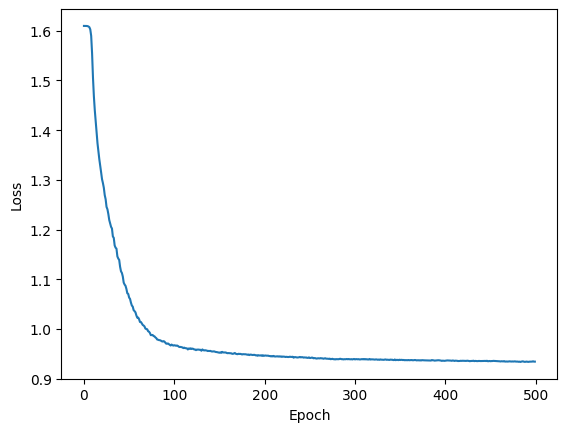

Test accuracy: 465.8227956989247
Accuracy: 0.49376344086021506
Precision: 0.4960407037631457
Recall: 0.4930443756131176
F1-score: 0.49274125945433483


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       495
           1       0.47      0.46      0.46       472
           2       0.48      0.38      0.42       449
           3       0.34      0.40      0.36       463
           4       0.60      0.65      0.62       446

    accuracy                           0.49      2325
   macro avg       0.50      0.49      0.49      2325
weighted avg       0.50      0.49      0.49      2325

                    0           1           2           3           4  \
precision    0.592668    0.474614    0.478992    0.338889    0.595041   
recall       0.587879    0.455508    0.380846    0.395248    0.645740   
f1-score     0.590264    0.464865    0.424318    0.364905    0.619355   
support    495.000000  472.000000  449.00000

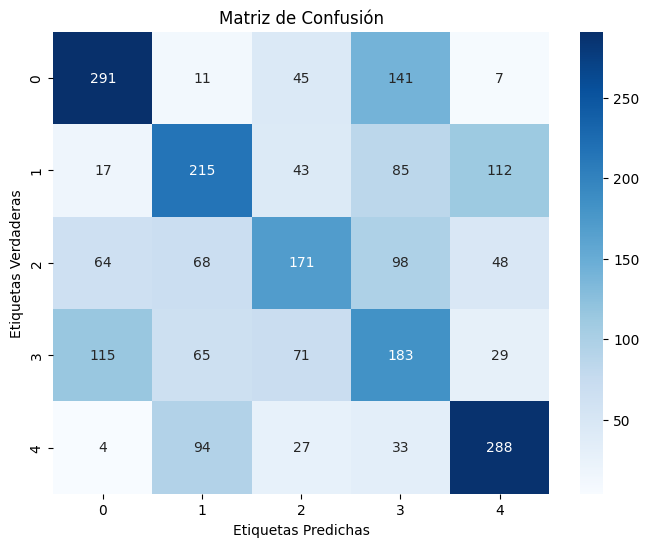

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_500_1e-05_0.2/resultados_500_1e-05_0.2.json
Procesando red con 100 epocas y 0.0001 de factor de aprendizaje y conjunto de entrenamiento 0.9


Procesando epocas:   1%|▋                                                              | 1/100 [00:16<27:32, 16.70s/it]

1.6093762818504782


Procesando epocas:   2%|█▎                                                             | 2/100 [00:33<27:13, 16.67s/it]

1.5096927593736087


Procesando epocas:   3%|█▉                                                             | 3/100 [00:49<26:56, 16.66s/it]

1.2753734216970556


Procesando epocas:   4%|██▌                                                            | 4/100 [01:06<26:40, 16.67s/it]

1.1723604924538555


Procesando epocas:   5%|███▏                                                           | 5/100 [01:23<26:22, 16.66s/it]

1.10467349746648


Procesando epocas:   6%|███▊                                                           | 6/100 [01:39<26:06, 16.66s/it]

1.0649829489343308


Procesando epocas:   7%|████▍                                                          | 7/100 [01:56<25:49, 16.66s/it]

1.0402634399778703


Procesando epocas:   8%|█████                                                          | 8/100 [02:13<25:31, 16.65s/it]

1.0256899700445288


Procesando epocas:   9%|█████▋                                                         | 9/100 [02:29<25:14, 16.64s/it]

1.0110929976491367


Procesando epocas:  10%|██████▏                                                       | 10/100 [02:46<24:56, 16.63s/it]

1.0067226273172043


Procesando epocas:  11%|██████▊                                                       | 11/100 [03:03<24:39, 16.62s/it]

0.999175147449269


Procesando epocas:  12%|███████▍                                                      | 12/100 [03:19<24:22, 16.62s/it]

0.995869837438359


Procesando epocas:  13%|████████                                                      | 13/100 [03:36<24:11, 16.69s/it]

0.9926466503564049


Procesando epocas:  14%|████████▋                                                     | 14/100 [03:53<24:03, 16.78s/it]

0.9890029539080227


Procesando epocas:  15%|█████████▎                                                    | 15/100 [04:10<23:46, 16.78s/it]

0.9845556003205916


Procesando epocas:  16%|█████████▉                                                    | 16/100 [04:27<23:32, 16.82s/it]

0.9832039594650268


Procesando epocas:  17%|██████████▌                                                   | 17/100 [04:44<23:27, 16.96s/it]

0.9846440508085139


Procesando epocas:  18%|███████████▏                                                  | 18/100 [05:02<23:40, 17.32s/it]

0.9815103096120498


Procesando epocas:  19%|███████████▊                                                  | 19/100 [05:21<24:01, 17.80s/it]

0.9811094953733333


Procesando epocas:  20%|████████████▍                                                 | 20/100 [05:40<24:04, 18.06s/it]

0.9822460300782148


Procesando epocas:  21%|█████████████                                                 | 21/100 [05:58<23:52, 18.13s/it]

0.9807627362363479


Procesando epocas:  22%|█████████████▋                                                | 22/100 [06:16<23:32, 18.10s/it]

0.9838745057582855


Procesando epocas:  23%|██████████████▎                                               | 23/100 [06:34<23:02, 17.96s/it]

0.98381786942482


Procesando epocas:  24%|██████████████▉                                               | 24/100 [06:51<22:37, 17.87s/it]

0.9810345635694616


Procesando epocas:  25%|███████████████▌                                              | 25/100 [07:09<22:22, 17.89s/it]

0.9792409931912142


Procesando epocas:  26%|████████████████                                              | 26/100 [07:27<21:56, 17.79s/it]

0.9785975126659169


Procesando epocas:  27%|████████████████▋                                             | 27/100 [07:45<21:37, 17.78s/it]

0.9774477243423462


Procesando epocas:  28%|█████████████████▎                                            | 28/100 [08:02<21:15, 17.72s/it]

0.9768657905213973


Procesando epocas:  29%|█████████████████▉                                            | 29/100 [08:20<20:56, 17.69s/it]

0.9759134369737962


Procesando epocas:  30%|██████████████████▌                                           | 30/100 [08:37<20:35, 17.65s/it]

0.9772129342836492


Procesando epocas:  31%|███████████████████▏                                          | 31/100 [08:55<20:15, 17.62s/it]

0.9778695246752571


Procesando epocas:  32%|███████████████████▊                                          | 32/100 [09:13<19:57, 17.61s/it]

0.9777546493446125


Procesando epocas:  33%|████████████████████▍                                         | 33/100 [09:30<19:39, 17.60s/it]

0.9773009254651911


Procesando epocas:  34%|█████████████████████                                         | 34/100 [09:47<19:00, 17.28s/it]

0.9757745301022249


Procesando epocas:  35%|█████████████████████▋                                        | 35/100 [10:03<18:29, 17.07s/it]

0.974032681128558


Procesando epocas:  36%|██████████████████████▎                                       | 36/100 [10:20<18:03, 16.92s/it]

0.9767398434526781


Procesando epocas:  37%|██████████████████████▉                                       | 37/100 [10:36<17:39, 16.82s/it]

0.9746165636707754


Procesando epocas:  38%|███████████████████████▌                                      | 38/100 [10:53<17:17, 16.73s/it]

0.9767978549003601


Procesando epocas:  39%|████████████████████████▏                                     | 39/100 [11:10<16:59, 16.71s/it]

0.9757215657654931


Procesando epocas:  40%|████████████████████████▊                                     | 40/100 [11:26<16:39, 16.66s/it]

0.973731539179297


Procesando epocas:  41%|█████████████████████████▍                                    | 41/100 [11:43<16:21, 16.64s/it]

0.9752257143749911


Procesando epocas:  42%|██████████████████████████                                    | 42/100 [11:59<16:03, 16.61s/it]

0.9719330437043134


Procesando epocas:  43%|██████████████████████████▋                                   | 43/100 [12:16<15:45, 16.58s/it]

0.971321720235488


Procesando epocas:  44%|███████████████████████████▎                                  | 44/100 [12:32<15:27, 16.57s/it]

0.972133210476707


Procesando epocas:  45%|███████████████████████████▉                                  | 45/100 [12:49<15:10, 16.56s/it]

0.9694047507117777


Procesando epocas:  46%|████████████████████████████▌                                 | 46/100 [13:05<14:53, 16.55s/it]

0.9682321194340201


Procesando epocas:  47%|█████████████████████████████▏                                | 47/100 [13:22<14:36, 16.54s/it]

0.9674406353165121


Procesando epocas:  48%|█████████████████████████████▊                                | 48/100 [13:38<14:19, 16.53s/it]

0.968357182600919


Procesando epocas:  49%|██████████████████████████████▍                               | 49/100 [13:55<14:03, 16.53s/it]

0.9691407284315895


Procesando epocas:  50%|███████████████████████████████                               | 50/100 [14:11<13:46, 16.54s/it]

0.9706438867484822


Procesando epocas:  51%|███████████████████████████████▌                              | 51/100 [14:28<13:29, 16.53s/it]

0.9727784665191874


Procesando epocas:  52%|████████████████████████████████▏                             | 52/100 [14:45<13:15, 16.57s/it]

0.9735602512079127


Procesando epocas:  53%|████████████████████████████████▊                             | 53/100 [15:01<13:00, 16.61s/it]

0.9701912992140826


Procesando epocas:  54%|█████████████████████████████████▍                            | 54/100 [15:18<12:45, 16.64s/it]

0.969092498106115


Procesando epocas:  55%|██████████████████████████████████                            | 55/100 [15:35<12:30, 16.67s/it]

0.9695273129379048


Procesando epocas:  56%|██████████████████████████████████▋                           | 56/100 [15:52<12:14, 16.69s/it]

0.9688695486854104


Procesando epocas:  57%|███████████████████████████████████▎                          | 57/100 [16:09<12:01, 16.78s/it]

0.9667089746278875


Procesando epocas:  58%|███████████████████████████████████▉                          | 58/100 [16:25<11:45, 16.79s/it]

0.9651973692809834


Procesando epocas:  59%|████████████████████████████████████▌                         | 59/100 [16:44<11:45, 17.22s/it]

0.9664835340836468


Procesando epocas:  60%|█████████████████████████████████████▏                        | 60/100 [17:03<11:55, 17.89s/it]

0.9689821502741646


Procesando epocas:  61%|█████████████████████████████████████▊                        | 61/100 [17:20<11:25, 17.57s/it]

0.9682418423540452


Procesando epocas:  62%|██████████████████████████████████████▍                       | 62/100 [17:37<10:58, 17.33s/it]

0.9694313210599562


Procesando epocas:  63%|███████████████████████████████████████                       | 63/100 [17:53<10:34, 17.14s/it]

0.9711787704159232


Procesando epocas:  64%|███████████████████████████████████████▋                      | 64/100 [18:10<10:12, 17.01s/it]

0.9699895743061514


Procesando epocas:  65%|████████████████████████████████████████▎                     | 65/100 [18:27<09:54, 16.98s/it]

0.9666196823120117


Procesando epocas:  66%|████████████████████████████████████████▉                     | 66/100 [18:45<09:44, 17.19s/it]

0.9684704566703123


Procesando epocas:  67%|█████████████████████████████████████████▌                    | 67/100 [19:02<09:32, 17.34s/it]

0.9700523856808158


Procesando epocas:  68%|██████████████████████████████████████████▏                   | 68/100 [19:20<09:15, 17.37s/it]

0.9691208064556122


Procesando epocas:  69%|██████████████████████████████████████████▊                   | 69/100 [19:37<08:57, 17.34s/it]

0.9671293693430284


Procesando epocas:  70%|███████████████████████████████████████████▍                  | 70/100 [19:54<08:39, 17.33s/it]

0.9667700360803043


Procesando epocas:  71%|████████████████████████████████████████████                  | 71/100 [20:11<08:20, 17.28s/it]

0.9692975216052111


Procesando epocas:  72%|████████████████████████████████████████████▋                 | 72/100 [20:28<08:01, 17.19s/it]

0.9678204585524166


Procesando epocas:  73%|█████████████████████████████████████████████▎                | 73/100 [20:46<07:42, 17.14s/it]

0.9655799851698034


Procesando epocas:  74%|█████████████████████████████████████████████▉                | 74/100 [21:02<07:24, 17.08s/it]

0.9659513207042918


Procesando epocas:  75%|██████████████████████████████████████████████▌               | 75/100 [21:19<07:06, 17.04s/it]

0.9660838432171766


Procesando epocas:  76%|███████████████████████████████████████████████               | 76/100 [21:36<06:48, 17.02s/it]

0.9665350731681375


Procesando epocas:  77%|███████████████████████████████████████████████▋              | 77/100 [21:53<06:30, 16.96s/it]

0.9674518087330987


Procesando epocas:  78%|████████████████████████████████████████████████▎             | 78/100 [22:10<06:11, 16.91s/it]

0.9651629661812502


Procesando epocas:  79%|████████████████████████████████████████████████▉             | 79/100 [22:27<05:53, 16.85s/it]

0.9646725058555603


Procesando epocas:  80%|█████████████████████████████████████████████████▌            | 80/100 [22:43<05:36, 16.82s/it]

0.9638459114467397


Procesando epocas:  81%|██████████████████████████████████████████████████▏           | 81/100 [23:00<05:18, 16.79s/it]

0.9631094806334551


Procesando epocas:  82%|██████████████████████████████████████████████████▊           | 82/100 [23:17<05:01, 16.76s/it]

0.9628311739248387


Procesando epocas:  83%|███████████████████████████████████████████████████▍          | 83/100 [23:34<04:44, 16.75s/it]

0.9620380976620843


Procesando epocas:  84%|████████████████████████████████████████████████████          | 84/100 [23:50<04:27, 16.72s/it]

0.9627249931587892


Procesando epocas:  85%|████████████████████████████████████████████████████▋         | 85/100 [24:07<04:10, 16.71s/it]

0.962818958829431


Procesando epocas:  86%|█████████████████████████████████████████████████████▎        | 86/100 [24:24<03:53, 16.69s/it]

0.9635937252465416


Procesando epocas:  87%|█████████████████████████████████████████████████████▉        | 87/100 [24:40<03:37, 16.72s/it]

0.963921378289952


Procesando epocas:  88%|██████████████████████████████████████████████████████▌       | 88/100 [24:57<03:20, 16.69s/it]

0.9669324215720682


Procesando epocas:  89%|███████████████████████████████████████████████████████▏      | 89/100 [25:13<03:02, 16.62s/it]

0.9670288089443656


Procesando epocas:  90%|███████████████████████████████████████████████████████▊      | 90/100 [25:30<02:45, 16.58s/it]

0.9641609542510089


Procesando epocas:  91%|████████████████████████████████████████████████████████▍     | 91/100 [25:46<02:29, 16.56s/it]

0.9625967797111062


Procesando epocas:  92%|█████████████████████████████████████████████████████████     | 92/100 [26:03<02:12, 16.53s/it]

0.9631277950371013


Procesando epocas:  93%|█████████████████████████████████████████████████████████▋    | 93/100 [26:19<01:55, 16.52s/it]

0.9616354497040019


Procesando epocas:  94%|██████████████████████████████████████████████████████████▎   | 94/100 [26:36<01:39, 16.53s/it]

0.960538101196289


Procesando epocas:  95%|██████████████████████████████████████████████████████████▉   | 95/100 [26:52<01:22, 16.53s/it]

0.9628794708672692


Procesando epocas:  96%|███████████████████████████████████████████████████████████▌  | 96/100 [27:09<01:06, 16.52s/it]

0.9610458409084993


Procesando epocas:  97%|████████████████████████████████████████████████████████████▏ | 97/100 [27:25<00:49, 16.50s/it]

0.9597049877924078


Procesando epocas:  98%|████████████████████████████████████████████████████████████▊ | 98/100 [27:42<00:32, 16.50s/it]

0.9602521486142103


Procesando epocas:  99%|█████████████████████████████████████████████████████████████▍| 99/100 [27:58<00:16, 16.48s/it]

0.9602308248772341


Procesando epocas: 100%|█████████████████████████████████████████████████████████████| 100/100 [28:15<00:00, 16.95s/it]

0.963768897337072
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Neural_network_classification ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_100_0.0001_0.1/funcion_de_perdida_100_0.0001.png


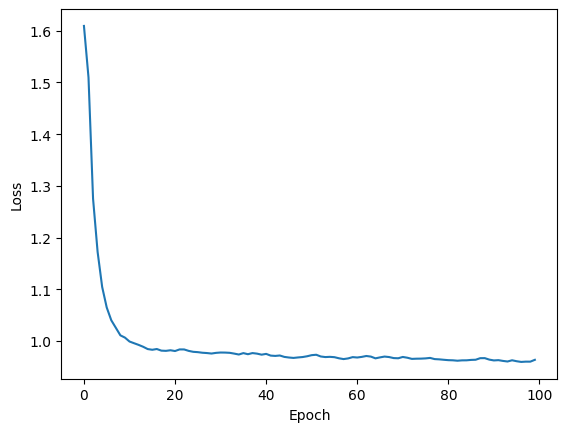

Test accuracy: 465.5397849462366
Accuracy: 0.5191397849462366
Precision: 0.5235725066557241
Recall: 0.5179725934577902
F1-score: 0.5195880908861986


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       495
           1       0.56      0.53      0.54       472
           2       0.48      0.41      0.44       449
           3       0.33      0.39      0.36       463
           4       0.61      0.64      0.62       446

    accuracy                           0.52      2325
   macro avg       0.52      0.52      0.52      2325
weighted avg       0.52      0.52      0.52      2325

                    0           1           2           3           4  \
precision    0.639583    0.562077    0.480620    0.329650    0.605932   
recall       0.620202    0.527542    0.414254    0.386609    0.641256   
f1-score     0.629744    0.544262    0.444976    0.355865    0.623094   
support    495.000000  472.000000  449.000000 

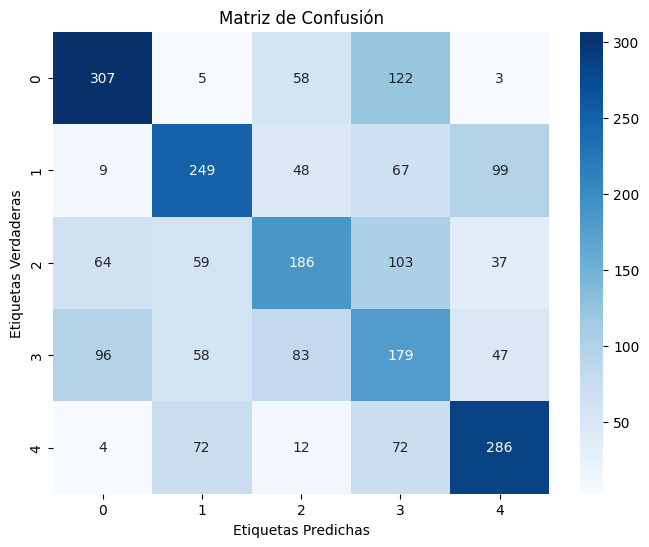

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_100_0.0001_0.1/resultados_100_0.0001_0.1.json
Procesando red con 100 epocas y 1e-05 de factor de aprendizaje y conjunto de entrenamiento 0.9


Procesando epocas:   1%|▋                                                              | 1/100 [00:16<27:03, 16.40s/it]

1.6094913910416995


Procesando epocas:   2%|█▎                                                             | 2/100 [00:32<26:47, 16.40s/it]

1.6095052052946652


Procesando epocas:   3%|█▉                                                             | 3/100 [00:49<26:31, 16.41s/it]

1.6094653487205506


Procesando epocas:   4%|██▌                                                            | 4/100 [01:05<26:15, 16.41s/it]

1.6094189356355106


Procesando epocas:   5%|███▏                                                           | 5/100 [01:21<25:53, 16.36s/it]

1.6091960647526908


Procesando epocas:   6%|███▊                                                           | 6/100 [01:38<25:34, 16.32s/it]

1.6086934314054602


Procesando epocas:   7%|████▍                                                          | 7/100 [01:54<25:18, 16.33s/it]

1.607396674156189


Procesando epocas:   8%|█████                                                          | 8/100 [02:11<25:19, 16.51s/it]

1.604250180721283


Procesando epocas:   9%|█████▋                                                         | 9/100 [02:28<25:07, 16.56s/it]

1.5947025586577024


Procesando epocas:  10%|██████▏                                                       | 10/100 [02:44<24:54, 16.61s/it]

1.5558259697521435


Procesando epocas:  11%|██████▊                                                       | 11/100 [03:01<24:39, 16.63s/it]

1.4978066100793725


Procesando epocas:  12%|███████▍                                                      | 12/100 [03:18<24:27, 16.67s/it]

1.465186857475954


Procesando epocas:  13%|████████                                                      | 13/100 [03:34<24:09, 16.67s/it]

1.4445956096929662


Procesando epocas:  14%|████████▋                                                     | 14/100 [03:51<23:49, 16.62s/it]

1.4312199080691619


Procesando epocas:  15%|█████████▎                                                    | 15/100 [04:07<23:30, 16.59s/it]

1.4137228713316077


Procesando epocas:  16%|█████████▉                                                    | 16/100 [04:24<23:10, 16.55s/it]

1.3976603451897116


Procesando epocas:  17%|██████████▌                                                   | 17/100 [04:40<22:52, 16.54s/it]

1.3782862593145933


Procesando epocas:  18%|███████████▏                                                  | 18/100 [04:57<22:35, 16.53s/it]

1.357121547530679


Procesando epocas:  19%|███████████▊                                                  | 19/100 [05:13<22:17, 16.51s/it]

1.3438453562119428


Procesando epocas:  20%|████████████▍                                                 | 20/100 [05:30<21:59, 16.50s/it]

1.3292047353351817


Procesando epocas:  21%|█████████████                                                 | 21/100 [05:46<21:42, 16.49s/it]

1.3165345318177166


Procesando epocas:  22%|█████████████▋                                                | 22/100 [06:03<21:26, 16.49s/it]

1.3050175112836502


Procesando epocas:  23%|██████████████▎                                               | 23/100 [06:19<21:08, 16.48s/it]

1.2968922692186693


Procesando epocas:  24%|██████████████▉                                               | 24/100 [06:36<20:51, 16.47s/it]

1.2824555032393512


Procesando epocas:  25%|███████████████▌                                              | 25/100 [06:52<20:35, 16.47s/it]

1.2738939818213968


Procesando epocas:  26%|████████████████                                              | 26/100 [07:09<20:19, 16.47s/it]

1.263173728129443


Procesando epocas:  27%|████████████████▋                                             | 27/100 [07:25<20:02, 16.48s/it]

1.2546585714115817


Procesando epocas:  28%|█████████████████▎                                            | 28/100 [07:42<19:46, 16.48s/it]

1.245951386760263


Procesando epocas:  29%|█████████████████▉                                            | 29/100 [07:58<19:29, 16.47s/it]

1.2346003034535575


Procesando epocas:  30%|██████████████████▌                                           | 30/100 [08:15<19:13, 16.48s/it]

1.2249874276273391


Procesando epocas:  31%|███████████████████▏                                          | 31/100 [08:31<19:00, 16.53s/it]

1.222305885483237


Procesando epocas:  32%|███████████████████▊                                          | 32/100 [08:48<18:43, 16.52s/it]

1.2131213174146764


Procesando epocas:  33%|████████████████████▍                                         | 33/100 [09:04<18:30, 16.57s/it]

1.2095256763346054


Procesando epocas:  34%|█████████████████████                                         | 34/100 [09:21<18:12, 16.56s/it]

1.2055012955385096


Procesando epocas:  35%|█████████████████████▋                                        | 35/100 [09:37<17:55, 16.54s/it]

1.1987794083707473


Procesando epocas:  36%|██████████████████████▎                                       | 36/100 [09:54<17:38, 16.53s/it]

1.191256064527175


Procesando epocas:  37%|██████████████████████▉                                       | 37/100 [10:11<17:23, 16.56s/it]

1.1890428276622997


Procesando epocas:  38%|███████████████████████▌                                      | 38/100 [10:27<17:07, 16.57s/it]

1.1851951963761274


Procesando epocas:  39%|████████████████████████▏                                     | 39/100 [10:44<16:51, 16.59s/it]

1.1805338291560903


Procesando epocas:  40%|████████████████████████▊                                     | 40/100 [11:00<16:36, 16.60s/it]

1.1765409420518314


Procesando epocas:  41%|█████████████████████████▍                                    | 41/100 [11:17<16:20, 16.62s/it]

1.177031817856957


Procesando epocas:  42%|██████████████████████████                                    | 42/100 [11:34<16:04, 16.63s/it]

1.1730838733560898


Procesando epocas:  43%|██████████████████████████▋                                   | 43/100 [11:50<15:47, 16.63s/it]

1.1704615831375123


Procesando epocas:  44%|███████████████████████████▎                                  | 44/100 [12:07<15:30, 16.62s/it]

1.1699531569200403


Procesando epocas:  45%|███████████████████████████▉                                  | 45/100 [12:24<15:14, 16.62s/it]

1.1668445930761449


Procesando epocas:  46%|████████████████████████████▌                                 | 46/100 [12:40<14:57, 16.63s/it]

1.158082600551493


Procesando epocas:  47%|█████████████████████████████▏                                | 47/100 [12:57<14:40, 16.61s/it]

1.1599239110946655


Procesando epocas:  48%|█████████████████████████████▊                                | 48/100 [13:13<14:23, 16.61s/it]

1.1568304700009964


Procesando epocas:  49%|██████████████████████████████▍                               | 49/100 [13:30<14:06, 16.61s/it]

1.1537825128611396


Procesando epocas:  50%|███████████████████████████████                               | 50/100 [13:47<13:50, 16.60s/it]

1.153999119646409


Procesando epocas:  51%|███████████████████████████████▌                              | 51/100 [14:03<13:33, 16.61s/it]

1.1550129918491139


Procesando epocas:  52%|████████████████████████████████▏                             | 52/100 [14:20<13:16, 16.60s/it]

1.1511898770051845


Procesando epocas:  53%|████████████████████████████████▊                             | 53/100 [14:36<13:00, 16.60s/it]

1.1460934337447672


Procesando epocas:  54%|█████████████████████████████████▍                            | 54/100 [14:53<12:43, 16.61s/it]

1.1452481802772074


Procesando epocas:  55%|██████████████████████████████████                            | 55/100 [15:10<12:27, 16.61s/it]

1.1430456676903893


Procesando epocas:  56%|██████████████████████████████████▋                           | 56/100 [15:26<12:10, 16.60s/it]

1.1386970740907332


Procesando epocas:  57%|███████████████████████████████████▎                          | 57/100 [15:43<11:53, 16.59s/it]

1.1379612410769744


Procesando epocas:  58%|███████████████████████████████████▉                          | 58/100 [15:59<11:36, 16.58s/it]

1.1361784510752735


Procesando epocas:  59%|████████████████████████████████████▌                         | 59/100 [16:16<11:20, 16.59s/it]

1.1305031096234042


Procesando epocas:  60%|█████████████████████████████████████▏                        | 60/100 [16:33<11:03, 16.59s/it]

1.132437692670261


Procesando epocas:  61%|█████████████████████████████████████▊                        | 61/100 [16:49<10:46, 16.59s/it]

1.1248892636860117


Procesando epocas:  62%|██████████████████████████████████████▍                       | 62/100 [17:06<10:29, 16.58s/it]

1.1198637674836551


Procesando epocas:  63%|███████████████████████████████████████                       | 63/100 [17:22<10:12, 16.57s/it]

1.1205448522287256


Procesando epocas:  64%|███████████████████████████████████████▋                      | 64/100 [17:39<09:56, 16.58s/it]

1.114073936027639


Procesando epocas:  65%|████████████████████████████████████████▎                     | 65/100 [17:55<09:40, 16.57s/it]

1.1112773446475759


Procesando epocas:  66%|████████████████████████████████████████▉                     | 66/100 [18:12<09:26, 16.65s/it]

1.1090585203731762


Procesando epocas:  67%|█████████████████████████████████████████▌                    | 67/100 [18:29<09:11, 16.70s/it]

1.0991935961386736


Procesando epocas:  68%|██████████████████████████████████████████▏                   | 68/100 [18:46<08:55, 16.74s/it]

1.1036056388826931


Procesando epocas:  69%|██████████████████████████████████████████▊                   | 69/100 [19:03<08:39, 16.75s/it]

1.101000506737653


Procesando epocas:  70%|███████████████████████████████████████████▍                  | 70/100 [19:19<08:21, 16.73s/it]

1.0959932541145998


Procesando epocas:  71%|████████████████████████████████████████████                  | 71/100 [19:36<08:05, 16.73s/it]

1.0945819335825302


Procesando epocas:  72%|████████████████████████████████████████████▋                 | 72/100 [19:53<07:49, 16.76s/it]

1.0925354477237252


Procesando epocas:  73%|█████████████████████████████████████████████▎                | 73/100 [20:10<07:32, 16.77s/it]

1.088240268651177


Procesando epocas:  74%|█████████████████████████████████████████████▉                | 74/100 [20:26<07:15, 16.76s/it]

1.0866362049299128


Procesando epocas:  75%|██████████████████████████████████████████████▌               | 75/100 [20:43<06:59, 16.78s/it]

1.081464513610391


Procesando epocas:  76%|███████████████████████████████████████████████               | 76/100 [21:00<06:42, 16.78s/it]

1.079619721805348


Procesando epocas:  77%|███████████████████████████████████████████████▋              | 77/100 [21:17<06:25, 16.77s/it]

1.0812730817233815


Procesando epocas:  78%|████████████████████████████████████████████████▎             | 78/100 [21:34<06:08, 16.77s/it]

1.0779931043877322


Procesando epocas:  79%|████████████████████████████████████████████████▉             | 79/100 [21:50<05:52, 16.77s/it]

1.0729402156437144


Procesando epocas:  80%|█████████████████████████████████████████████████▌            | 80/100 [22:07<05:34, 16.73s/it]

1.0695192158222198


Procesando epocas:  81%|██████████████████████████████████████████████████▏           | 81/100 [22:24<05:17, 16.69s/it]

1.066333919763565


Procesando epocas:  82%|██████████████████████████████████████████████████▊           | 82/100 [22:40<05:01, 16.73s/it]

1.066984321790583


Procesando epocas:  83%|███████████████████████████████████████████████████▍          | 83/100 [22:57<04:44, 16.75s/it]

1.0641972724129172


Procesando epocas:  84%|████████████████████████████████████████████████████          | 84/100 [23:14<04:28, 16.75s/it]

1.0611447243129506


Procesando epocas:  85%|████████████████████████████████████████████████████▋         | 85/100 [23:31<04:11, 16.76s/it]

1.0620254456996918


Procesando epocas:  86%|█████████████████████████████████████████████████████▎        | 86/100 [23:47<03:54, 16.75s/it]

1.0558920278268702


Procesando epocas:  87%|█████████████████████████████████████████████████████▉        | 87/100 [24:04<03:37, 16.76s/it]

1.0562652223250446


Procesando epocas:  88%|██████████████████████████████████████████████████████▌       | 88/100 [24:21<03:21, 16.77s/it]

1.0547252605943118


Procesando epocas:  89%|███████████████████████████████████████████████████████▏      | 89/100 [24:38<03:04, 16.78s/it]

1.0517173195586484


Procesando epocas:  90%|███████████████████████████████████████████████████████▊      | 90/100 [24:54<02:47, 16.72s/it]

1.052817385336932


Procesando epocas:  91%|████████████████████████████████████████████████████████▍     | 91/100 [25:11<02:30, 16.70s/it]

1.0498423183665555


Procesando epocas:  92%|█████████████████████████████████████████████████████████     | 92/100 [25:28<02:13, 16.72s/it]

1.0503037708647112


Procesando epocas:  93%|█████████████████████████████████████████████████████████▋    | 93/100 [25:45<01:57, 16.75s/it]

1.0474957199657664


Procesando epocas:  94%|██████████████████████████████████████████████████████████▎   | 94/100 [26:01<01:40, 16.76s/it]

1.0459005566204296


Procesando epocas:  95%|██████████████████████████████████████████████████████████▉   | 95/100 [26:18<01:23, 16.77s/it]

1.04428191149936


Procesando epocas:  96%|███████████████████████████████████████████████████████████▌  | 96/100 [26:35<01:07, 16.77s/it]

1.0439523342777701


Procesando epocas:  97%|████████████████████████████████████████████████████████████▏ | 97/100 [26:52<00:50, 16.78s/it]

1.0444760087658378


Procesando epocas:  98%|████████████████████████████████████████████████████████████▊ | 98/100 [27:09<00:33, 16.78s/it]

1.0434172931839438


Procesando epocas:  99%|█████████████████████████████████████████████████████████████▍| 99/100 [27:25<00:16, 16.78s/it]

1.0421846046167262


Procesando epocas: 100%|█████████████████████████████████████████████████████████████| 100/100 [27:42<00:00, 16.63s/it]

1.0432220792069156
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Neural_network_classification ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_100_1e-05_0.1/funcion_de_perdida_100_1e-05.png


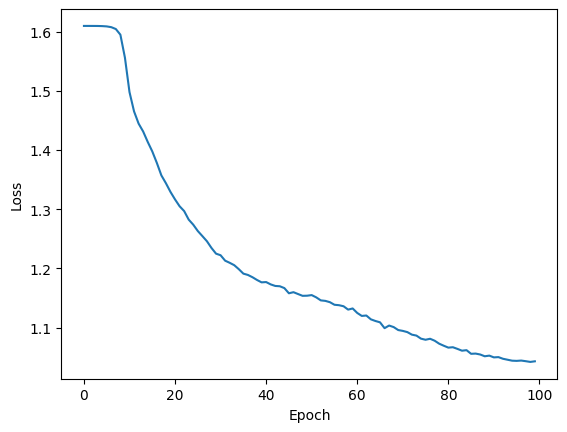

Test accuracy: 465.9647311827957
Accuracy: 0.4206451612903226
Precision: 0.4080763239287838
Recall: 0.4187524384538658
F1-score: 0.412312587691404


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.62      0.59       495
           1       0.38      0.35      0.36       472
           2       0.27      0.27      0.27       449
           3       0.26      0.22      0.24       463
           4       0.58      0.63      0.60       446

    accuracy                           0.42      2325
   macro avg       0.41      0.42      0.41      2325
weighted avg       0.41      0.42      0.41      2325

                    0           1           2           3           4  \
precision    0.556757    0.383178    0.265217    0.258228    0.577002   
recall       0.624242    0.347458    0.271715    0.220302    0.630045   
f1-score     0.588571    0.364444    0.268427    0.237762    0.602358   
support    495.000000  472.000000  449.000000  

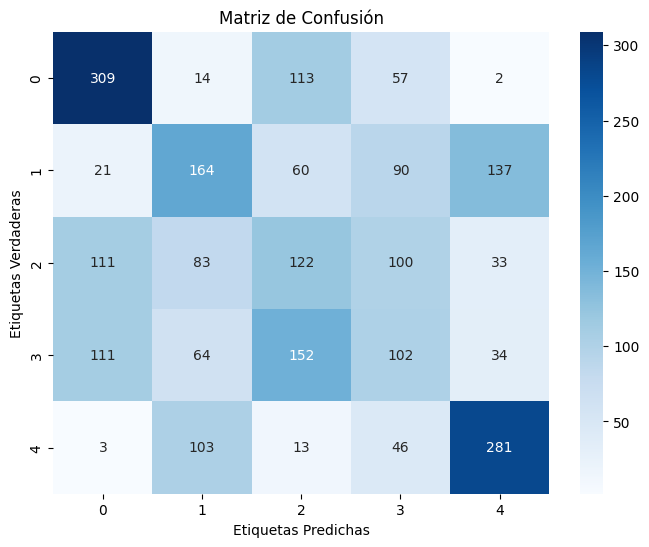

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_100_1e-05_0.1/resultados_100_1e-05_0.1.json
Procesando red con 300 epocas y 0.0001 de factor de aprendizaje y conjunto de entrenamiento 0.9


Procesando epocas:   0%|▏                                                            | 1/300 [00:16<1:22:22, 16.53s/it]

1.6090005657252144


Procesando epocas:   1%|▍                                                            | 2/300 [00:33<1:22:50, 16.68s/it]

1.5180208241238313


Procesando epocas:   1%|▌                                                            | 3/300 [00:50<1:22:44, 16.71s/it]

1.4067058282739975


Procesando epocas:   1%|▊                                                            | 4/300 [01:06<1:22:32, 16.73s/it]

1.3470704506425297


Procesando epocas:   2%|█                                                            | 5/300 [01:23<1:22:15, 16.73s/it]

1.3068606068106259


Procesando epocas:   2%|█▏                                                           | 6/300 [01:40<1:21:59, 16.73s/it]

1.2678628297413097


Procesando epocas:   2%|█▍                                                           | 7/300 [01:57<1:21:47, 16.75s/it]

1.234733491084155


Procesando epocas:   3%|█▋                                                           | 8/300 [02:13<1:21:30, 16.75s/it]

1.2020917576902053


Procesando epocas:   3%|█▊                                                           | 9/300 [02:30<1:21:13, 16.75s/it]

1.1797994508462795


Procesando epocas:   3%|██                                                          | 10/300 [02:47<1:20:36, 16.68s/it]

1.1578550678842208


Procesando epocas:   4%|██▏                                                         | 11/300 [03:03<1:20:37, 16.74s/it]

1.142213377531837


Procesando epocas:   4%|██▍                                                         | 12/300 [03:20<1:20:05, 16.69s/it]

1.1246103079879985


Procesando epocas:   4%|██▌                                                         | 13/300 [03:37<1:19:35, 16.64s/it]

1.1024127192357007


Procesando epocas:   5%|██▊                                                         | 14/300 [03:53<1:19:13, 16.62s/it]

1.0959790899473079


Procesando epocas:   5%|███                                                         | 15/300 [04:10<1:18:46, 16.58s/it]

1.0862418283434476


Procesando epocas:   5%|███▏                                                        | 16/300 [04:26<1:18:23, 16.56s/it]

1.075472049853381


Procesando epocas:   6%|███▍                                                        | 17/300 [04:43<1:17:58, 16.53s/it]

1.0712323220337139


Procesando epocas:   6%|███▌                                                        | 18/300 [04:59<1:17:44, 16.54s/it]

1.0663096024709589


Procesando epocas:   6%|███▊                                                        | 19/300 [05:16<1:17:26, 16.53s/it]

1.06148642652175


Procesando epocas:   7%|████                                                        | 20/300 [05:32<1:17:02, 16.51s/it]

1.058162574557697


Procesando epocas:   7%|████▏                                                       | 21/300 [05:49<1:16:42, 16.50s/it]

1.0553762428900775


Procesando epocas:   7%|████▍                                                       | 22/300 [06:05<1:16:21, 16.48s/it]

1.0504544528091655


Procesando epocas:   8%|████▌                                                       | 23/300 [06:22<1:16:03, 16.47s/it]

1.0506050705909729


Procesando epocas:   8%|████▊                                                       | 24/300 [06:38<1:15:46, 16.47s/it]

1.0493984148782842


Procesando epocas:   8%|█████                                                       | 25/300 [06:54<1:15:26, 16.46s/it]

1.054165746534572


Procesando epocas:   9%|█████▏                                                      | 26/300 [07:11<1:15:07, 16.45s/it]

1.0501236049567952


Procesando epocas:   9%|█████▍                                                      | 27/300 [07:27<1:14:50, 16.45s/it]

1.0446880922597996


Procesando epocas:   9%|█████▌                                                      | 28/300 [07:44<1:14:32, 16.44s/it]

1.044339415956946


Procesando epocas:  10%|█████▊                                                      | 29/300 [08:00<1:14:18, 16.45s/it]

1.0432703260113212


Procesando epocas:  10%|██████                                                      | 30/300 [08:17<1:14:02, 16.45s/it]

1.037804144971511


Procesando epocas:  10%|██████▏                                                     | 31/300 [08:33<1:13:50, 16.47s/it]

1.0406299913630765


Procesando epocas:  11%|██████▍                                                     | 32/300 [08:50<1:13:37, 16.48s/it]

1.0413669060258304


Procesando epocas:  11%|██████▌                                                     | 33/300 [09:06<1:13:18, 16.47s/it]

1.037960021986681


Procesando epocas:  11%|██████▊                                                     | 34/300 [09:23<1:13:04, 16.48s/it]

1.036952421244453


Procesando epocas:  12%|███████                                                     | 35/300 [09:39<1:12:45, 16.47s/it]

1.0350571744582233


Procesando epocas:  12%|███████▏                                                    | 36/300 [09:56<1:12:31, 16.48s/it]

1.0354139261385973


Procesando epocas:  12%|███████▍                                                    | 37/300 [10:12<1:12:12, 16.47s/it]

1.033983069307664


Procesando epocas:  13%|███████▌                                                    | 38/300 [10:29<1:11:57, 16.48s/it]

1.0377794104463913


Procesando epocas:  13%|███████▊                                                    | 39/300 [10:45<1:11:39, 16.47s/it]

1.0318249898798326


Procesando epocas:  13%|████████                                                    | 40/300 [11:01<1:11:22, 16.47s/it]

1.027129132607404


Procesando epocas:  14%|████████▏                                                   | 41/300 [11:18<1:11:04, 16.47s/it]

1.0265262789586012


Procesando epocas:  14%|████████▍                                                   | 42/300 [11:34<1:10:47, 16.46s/it]

1.032150838655584


Procesando epocas:  14%|████████▌                                                   | 43/300 [11:51<1:10:30, 16.46s/it]

1.0286669857361737


Procesando epocas:  15%|████████▊                                                   | 44/300 [12:07<1:10:14, 16.46s/it]

1.0285215686349307


Procesando epocas:  15%|█████████                                                   | 45/300 [12:24<1:09:57, 16.46s/it]

1.027552959498237


Procesando epocas:  15%|█████████▏                                                  | 46/300 [12:40<1:09:42, 16.47s/it]

1.0266193361843334


Procesando epocas:  16%|█████████▍                                                  | 47/300 [12:57<1:09:21, 16.45s/it]

1.026472910712747


Procesando epocas:  16%|█████████▌                                                  | 48/300 [13:13<1:09:05, 16.45s/it]

1.0267594421611113


Procesando epocas:  16%|█████████▊                                                  | 49/300 [13:30<1:08:50, 16.46s/it]

1.0270073035184075


Procesando epocas:  17%|██████████                                                  | 50/300 [13:46<1:08:34, 16.46s/it]

1.0275981398189769


Procesando epocas:  17%|██████████▏                                                 | 51/300 [14:03<1:08:21, 16.47s/it]

1.025561861781513


Procesando epocas:  17%|██████████▍                                                 | 52/300 [14:19<1:08:07, 16.48s/it]

1.027486133224824


Procesando epocas:  18%|██████████▌                                                 | 53/300 [14:36<1:07:52, 16.49s/it]

1.0238992424572215


Procesando epocas:  18%|██████████▊                                                 | 54/300 [14:52<1:07:35, 16.48s/it]

1.0239654954741984


Procesando epocas:  18%|███████████                                                 | 55/300 [15:08<1:07:18, 16.48s/it]

1.0210340706741108


Procesando epocas:  19%|███████████▏                                                | 56/300 [15:25<1:06:58, 16.47s/it]

1.0201525551431319


Procesando epocas:  19%|███████████▍                                                | 57/300 [15:41<1:06:40, 16.46s/it]

1.0220615162568933


Procesando epocas:  19%|███████████▌                                                | 58/300 [15:58<1:06:22, 16.46s/it]

1.0206657188780168


Procesando epocas:  20%|███████████▊                                                | 59/300 [16:14<1:06:05, 16.45s/it]

1.0183265864849091


Procesando epocas:  20%|████████████                                                | 60/300 [16:31<1:05:48, 16.45s/it]

1.0210985832354602


Procesando epocas:  20%|████████████▏                                               | 61/300 [16:47<1:05:32, 16.45s/it]

1.0246769989238065


Procesando epocas:  21%|████████████▍                                               | 62/300 [17:04<1:05:13, 16.44s/it]

1.0263986363130457


Procesando epocas:  21%|████████████▌                                               | 63/300 [17:20<1:04:56, 16.44s/it]

1.0254011694122762


Procesando epocas:  21%|████████████▊                                               | 64/300 [17:36<1:04:39, 16.44s/it]

1.0219569367520949


Procesando epocas:  22%|█████████████                                               | 65/300 [17:53<1:04:23, 16.44s/it]

1.0213164192788742


Procesando epocas:  22%|█████████████▏                                              | 66/300 [18:09<1:04:09, 16.45s/it]

1.019209925918018


Procesando epocas:  22%|█████████████▍                                              | 67/300 [18:26<1:03:52, 16.45s/it]

1.0157983204897711


Procesando epocas:  23%|█████████████▌                                              | 68/300 [18:42<1:03:35, 16.45s/it]

1.0158628923051498


Procesando epocas:  23%|█████████████▊                                              | 69/300 [18:59<1:03:20, 16.45s/it]

1.0150645213968614


Procesando epocas:  23%|██████████████                                              | 70/300 [19:15<1:03:03, 16.45s/it]

1.0134936437887303


Procesando epocas:  24%|██████████████▏                                             | 71/300 [19:32<1:02:53, 16.48s/it]

1.01272935516694


Procesando epocas:  24%|██████████████▍                                             | 72/300 [19:48<1:02:36, 16.48s/it]

1.0141991303247564


Procesando epocas:  24%|██████████████▌                                             | 73/300 [20:05<1:02:18, 16.47s/it]

1.0119319992906908


Procesando epocas:  25%|██████████████▊                                             | 74/300 [20:21<1:02:00, 16.46s/it]

1.012213224172592


Procesando epocas:  25%|███████████████                                             | 75/300 [20:38<1:01:44, 16.46s/it]

1.01338010430336


Procesando epocas:  25%|███████████████▏                                            | 76/300 [20:54<1:01:27, 16.46s/it]

1.0121524088522966


Procesando epocas:  26%|███████████████▍                                            | 77/300 [21:10<1:01:12, 16.47s/it]

1.0132626666742213


Procesando epocas:  26%|███████████████▌                                            | 78/300 [21:27<1:00:55, 16.47s/it]

1.0111119705087999


Procesando epocas:  26%|███████████████▊                                            | 79/300 [21:43<1:00:39, 16.47s/it]

1.0119422747808344


Procesando epocas:  27%|████████████████                                            | 80/300 [22:00<1:00:25, 16.48s/it]

1.012297980224385


Procesando epocas:  27%|████████████████▏                                           | 81/300 [22:16<1:00:09, 16.48s/it]

1.0105071723461152


Procesando epocas:  27%|████████████████▉                                             | 82/300 [22:33<59:51, 16.48s/it]

1.0141281920320848


Procesando epocas:  28%|█████████████████▏                                            | 83/300 [22:49<59:35, 16.48s/it]

1.013862045021618


Procesando epocas:  28%|█████████████████▎                                            | 84/300 [23:06<59:17, 16.47s/it]

1.0102139087284312


Procesando epocas:  28%|█████████████████▌                                            | 85/300 [23:22<59:01, 16.47s/it]

1.0082793172668008


Procesando epocas:  29%|█████████████████▊                                            | 86/300 [23:39<58:44, 16.47s/it]

1.0142349702470443


Procesando epocas:  29%|█████████████████▉                                            | 87/300 [23:55<58:27, 16.47s/it]

1.0124332529657027


Procesando epocas:  29%|██████████████████▏                                           | 88/300 [24:12<58:12, 16.47s/it]

1.0123137379393858


Procesando epocas:  30%|██████████████████▍                                           | 89/300 [24:28<57:56, 16.47s/it]

1.0082186667358175


Procesando epocas:  30%|██████████████████▌                                           | 90/300 [24:45<57:40, 16.48s/it]

1.0088291259372935


Procesando epocas:  30%|██████████████████▊                                           | 91/300 [25:01<57:23, 16.48s/it]

1.005969381683013


Procesando epocas:  31%|███████████████████                                           | 92/300 [25:18<57:08, 16.48s/it]

1.0066520890768837


Procesando epocas:  31%|███████████████████▏                                          | 93/300 [25:34<56:52, 16.49s/it]

1.0094906053122352


Procesando epocas:  31%|███████████████████▍                                          | 94/300 [25:51<56:35, 16.48s/it]

1.0106551201904521


Procesando epocas:  32%|███████████████████▋                                          | 95/300 [26:07<56:16, 16.47s/it]

1.009585019420175


Procesando epocas:  32%|███████████████████▊                                          | 96/300 [26:24<56:01, 16.48s/it]

1.0087364330011255


Procesando epocas:  32%|████████████████████                                          | 97/300 [26:40<55:48, 16.49s/it]

1.0100626188166002


Procesando epocas:  33%|████████████████████▎                                         | 98/300 [26:57<55:29, 16.48s/it]

1.0061669535496656


Procesando epocas:  33%|████████████████████▍                                         | 99/300 [27:13<55:13, 16.48s/it]

1.0027522223837235


Procesando epocas:  33%|████████████████████▎                                        | 100/300 [27:29<54:56, 16.48s/it]

1.0014732297729043


Procesando epocas:  34%|████████████████████▌                                        | 101/300 [27:46<54:41, 16.49s/it]

1.0007368368261


Procesando epocas:  34%|████████████████████▋                                        | 102/300 [28:02<54:23, 16.48s/it]

1.0025927547146292


Procesando epocas:  34%|████████████████████▉                                        | 103/300 [28:19<54:05, 16.47s/it]

1.0036805976839627


Procesando epocas:  35%|█████████████████████▏                                       | 104/300 [28:35<53:49, 16.48s/it]

1.0011569952263553


Procesando epocas:  35%|█████████████████████▎                                       | 105/300 [28:52<53:32, 16.48s/it]

1.0009542661554673


Procesando epocas:  35%|█████████████████████▌                                       | 106/300 [29:08<53:15, 16.47s/it]

0.9983662191559287


Procesando epocas:  36%|█████████████████████▊                                       | 107/300 [29:25<52:59, 16.47s/it]

0.9991677256191478


Procesando epocas:  36%|█████████████████████▉                                       | 108/300 [29:41<52:43, 16.48s/it]

0.9959371934918796


Procesando epocas:  36%|██████████████████████▏                                      | 109/300 [29:58<52:25, 16.47s/it]

0.9971296671558829


Procesando epocas:  37%|██████████████████████▎                                      | 110/300 [30:14<52:08, 16.47s/it]

0.997506790301379


Procesando epocas:  37%|██████████████████████▌                                      | 111/300 [30:31<51:51, 16.46s/it]

0.9988840457271128


Procesando epocas:  37%|██████████████████████▊                                      | 112/300 [30:47<51:34, 16.46s/it]

0.9987732648849488


Procesando epocas:  38%|██████████████████████▉                                      | 113/300 [31:04<51:18, 16.46s/it]

0.9982078885330873


Procesando epocas:  38%|███████████████████████▏                                     | 114/300 [31:20<51:02, 16.47s/it]

0.9980812058729284


Procesando epocas:  38%|███████████████████████▍                                     | 115/300 [31:37<50:46, 16.47s/it]

0.9974533147671644


Procesando epocas:  39%|███████████████████████▌                                     | 116/300 [31:53<50:30, 16.47s/it]

0.9993341133875006


Procesando epocas:  39%|███████████████████████▊                                     | 117/300 [32:09<50:14, 16.47s/it]

0.9987932040410883


Procesando epocas:  39%|███████████████████████▉                                     | 118/300 [32:26<49:58, 16.47s/it]

0.9959534599500544


Procesando epocas:  40%|████████████████████████▏                                    | 119/300 [32:42<49:41, 16.47s/it]

0.9962039081489339


Procesando epocas:  40%|████████████████████████▍                                    | 120/300 [32:59<49:24, 16.47s/it]

0.9966499132268569


Procesando epocas:  40%|████████████████████████▌                                    | 121/300 [33:15<49:08, 16.47s/it]

0.9960196025231305


Procesando epocas:  41%|████████████████████████▊                                    | 122/300 [33:32<48:51, 16.47s/it]

0.9946282053695006


Procesando epocas:  41%|█████████████████████████                                    | 123/300 [33:48<48:35, 16.47s/it]

0.9962670715416179


Procesando epocas:  41%|█████████████████████████▏                                   | 124/300 [34:05<48:19, 16.48s/it]

0.9947783393018386


Procesando epocas:  42%|█████████████████████████▍                                   | 125/300 [34:21<48:02, 16.47s/it]

0.9957425376948188


Procesando epocas:  42%|█████████████████████████▌                                   | 126/300 [34:38<47:46, 16.48s/it]

0.9941894874853247


Procesando epocas:  42%|█████████████████████████▊                                   | 127/300 [34:54<47:30, 16.48s/it]

0.9950116795652053


Procesando epocas:  43%|██████████████████████████                                   | 128/300 [35:11<47:13, 16.47s/it]

0.9951136014040779


Procesando epocas:  43%|██████████████████████████▏                                  | 129/300 [35:27<46:57, 16.48s/it]

0.9951093238942763


Procesando epocas:  43%|██████████████████████████▍                                  | 130/300 [35:44<46:40, 16.47s/it]

0.9948183333172518


Procesando epocas:  44%|██████████████████████████▋                                  | 131/300 [36:00<46:24, 16.48s/it]

0.9955922999802758


Procesando epocas:  44%|██████████████████████████▊                                  | 132/300 [36:17<46:07, 16.47s/it]

0.9972124871085671


Procesando epocas:  44%|███████████████████████████                                  | 133/300 [36:33<45:52, 16.48s/it]

0.9971144395716051


Procesando epocas:  45%|███████████████████████████▏                                 | 134/300 [36:50<45:35, 16.48s/it]

0.9949533168007346


Procesando epocas:  45%|███████████████████████████▍                                 | 135/300 [37:06<45:19, 16.48s/it]

0.994483311737285


Procesando epocas:  45%|███████████████████████████▋                                 | 136/300 [37:23<45:01, 16.47s/it]

0.9943542035186992


Procesando epocas:  46%|███████████████████████████▊                                 | 137/300 [37:39<44:44, 16.47s/it]

0.9970757270560545


Procesando epocas:  46%|████████████████████████████                                 | 138/300 [37:55<44:26, 16.46s/it]

0.9935789844569038


Procesando epocas:  46%|████████████████████████████▎                                | 139/300 [38:12<44:10, 16.46s/it]

0.9932051216854768


Procesando epocas:  47%|████████████████████████████▍                                | 140/300 [38:28<43:53, 16.46s/it]

0.9909835794392754


Procesando epocas:  47%|████████████████████████████▋                                | 141/300 [38:45<43:39, 16.47s/it]

0.9896809802335851


Procesando epocas:  47%|████████████████████████████▊                                | 142/300 [39:01<43:22, 16.47s/it]

0.98999904534396


Procesando epocas:  48%|█████████████████████████████                                | 143/300 [39:18<43:05, 16.47s/it]

0.9914481271715725


Procesando epocas:  48%|█████████████████████████████▎                               | 144/300 [39:34<42:47, 16.46s/it]

0.9911572740358465


Procesando epocas:  48%|█████████████████████████████▍                               | 145/300 [39:51<42:32, 16.46s/it]

0.989043930348228


Procesando epocas:  49%|█████████████████████████████▋                               | 146/300 [40:07<42:16, 16.47s/it]

0.9910432990859537


Procesando epocas:  49%|█████████████████████████████▉                               | 147/300 [40:24<42:01, 16.48s/it]

0.9894000463625964


Procesando epocas:  49%|██████████████████████████████                               | 148/300 [40:40<41:44, 16.48s/it]

0.9887229432077969


Procesando epocas:  50%|██████████████████████████████▎                              | 149/300 [40:57<41:27, 16.48s/it]

0.9937375903129577


Procesando epocas:  50%|██████████████████████████████▌                              | 150/300 [41:13<41:10, 16.47s/it]

0.9882822475012611


Procesando epocas:  50%|██████████████████████████████▋                              | 151/300 [41:30<40:53, 16.47s/it]

0.9922658506561728


Procesando epocas:  51%|██████████████████████████████▉                              | 152/300 [41:46<40:36, 16.46s/it]

0.9955631147412692


Procesando epocas:  51%|███████████████████████████████                              | 153/300 [42:02<40:20, 16.46s/it]

0.9940713118104374


Procesando epocas:  51%|███████████████████████████████▎                             | 154/300 [42:19<40:03, 16.46s/it]

0.99322489324738


Procesando epocas:  52%|███████████████████████████████▌                             | 155/300 [42:35<39:49, 16.48s/it]

0.9919790271450492


Procesando epocas:  52%|███████████████████████████████▋                             | 156/300 [42:52<39:32, 16.47s/it]

0.9910040943061604


Procesando epocas:  52%|███████████████████████████████▉                             | 157/300 [43:08<39:15, 16.47s/it]

0.9902004262980293


Procesando epocas:  53%|████████████████████████████████▏                            | 158/300 [43:25<38:59, 16.47s/it]

0.9905717748052933


Procesando epocas:  53%|████████████████████████████████▎                            | 159/300 [43:41<38:41, 16.47s/it]

0.9888475723126355


Procesando epocas:  53%|████████████████████████████████▌                            | 160/300 [43:58<38:24, 16.46s/it]

0.9912906520506914


Procesando epocas:  54%|████████████████████████████████▋                            | 161/300 [44:14<38:08, 16.46s/it]

0.9910541513386895


Procesando epocas:  54%|████████████████████████████████▉                            | 162/300 [44:31<37:52, 16.47s/it]

0.9902551121571485


Procesando epocas:  54%|█████████████████████████████████▏                           | 163/300 [44:47<37:37, 16.48s/it]

0.9910674698212567


Procesando epocas:  55%|█████████████████████████████████▎                           | 164/300 [45:04<37:20, 16.47s/it]

0.9892109877922955


Procesando epocas:  55%|█████████████████████████████████▌                           | 165/300 [45:20<37:03, 16.47s/it]

0.9888428319902981


Procesando epocas:  55%|█████████████████████████████████▊                           | 166/300 [45:37<36:47, 16.47s/it]

0.9879316771731658


Procesando epocas:  56%|█████████████████████████████████▉                           | 167/300 [45:53<36:29, 16.46s/it]

0.9901756451410406


Procesando epocas:  56%|██████████████████████████████████▏                          | 168/300 [46:09<36:12, 16.46s/it]

0.9884069179787355


Procesando epocas:  56%|██████████████████████████████████▎                          | 169/300 [46:26<35:56, 16.46s/it]

0.9893780301598941


Procesando epocas:  57%|██████████████████████████████████▌                          | 170/300 [46:42<35:39, 16.46s/it]

0.9898252788711996


Procesando epocas:  57%|██████████████████████████████████▊                          | 171/300 [46:59<35:23, 16.46s/it]

0.9906517877298243


Procesando epocas:  57%|██████████████████████████████████▉                          | 172/300 [47:15<35:06, 16.46s/it]

0.9901187868679271


Procesando epocas:  58%|███████████████████████████████████▏                         | 173/300 [47:32<34:50, 16.46s/it]

0.9878387766725877


Procesando epocas:  58%|███████████████████████████████████▍                         | 174/300 [47:48<34:33, 16.45s/it]

0.9878347144407384


Procesando epocas:  58%|███████████████████████████████████▌                         | 175/300 [48:05<34:17, 16.46s/it]

0.9870574123719159


Procesando epocas:  59%|███████████████████████████████████▊                         | 176/300 [48:21<34:00, 16.45s/it]

0.9870274915414698


Procesando epocas:  59%|███████████████████████████████████▉                         | 177/300 [48:38<33:44, 16.46s/it]

0.9945272841874291


Procesando epocas:  59%|████████████████████████████████████▏                        | 178/300 [48:54<33:27, 16.46s/it]

0.9884050411336562


Procesando epocas:  60%|████████████████████████████████████▍                        | 179/300 [49:11<33:11, 16.46s/it]

0.9880269555484548


Procesando epocas:  60%|████████████████████████████████████▌                        | 180/300 [49:27<32:55, 16.46s/it]

0.9880309753558215


Procesando epocas:  60%|████████████████████████████████████▊                        | 181/300 [49:43<32:38, 16.46s/it]

0.9883610644761254


Procesando epocas:  61%|█████████████████████████████████████                        | 182/300 [50:00<32:21, 16.46s/it]

0.9870833772070268


Procesando epocas:  61%|█████████████████████████████████████▏                       | 183/300 [50:16<32:07, 16.47s/it]

0.9885946414049934


Procesando epocas:  61%|█████████████████████████████████████▍                       | 184/300 [50:33<31:50, 16.47s/it]

0.9903206663973191


Procesando epocas:  62%|█████████████████████████████████████▌                       | 185/300 [50:49<31:35, 16.48s/it]

0.9860373963327969


Procesando epocas:  62%|█████████████████████████████████████▊                       | 186/300 [51:06<31:18, 16.48s/it]

0.9872585412333993


Procesando epocas:  62%|██████████████████████████████████████                       | 187/300 [51:22<31:02, 16.48s/it]

0.9872563888044918


Procesando epocas:  63%|██████████████████████████████████████▏                      | 188/300 [51:39<30:46, 16.49s/it]

0.9923865164027494


Procesando epocas:  63%|██████████████████████████████████████▍                      | 189/300 [51:55<30:30, 16.49s/it]

0.9884875883074368


Procesando epocas:  63%|██████████████████████████████████████▋                      | 190/300 [52:12<30:13, 16.49s/it]

0.9878926704911625


Procesando epocas:  64%|██████████████████████████████████████▊                      | 191/300 [52:28<29:57, 16.49s/it]

0.9874361259095809


Procesando epocas:  64%|███████████████████████████████████████                      | 192/300 [52:45<29:40, 16.49s/it]

0.9877584867617664


Procesando epocas:  64%|███████████████████████████████████████▏                     | 193/300 [53:01<29:24, 16.49s/it]

0.9865327701849096


Procesando epocas:  65%|███████████████████████████████████████▍                     | 194/300 [53:18<29:07, 16.49s/it]

0.9878207662526299


Procesando epocas:  65%|███████████████████████████████████████▋                     | 195/300 [53:34<28:51, 16.49s/it]

0.9849763775573057


Procesando epocas:  65%|███████████████████████████████████████▊                     | 196/300 [53:51<28:34, 16.49s/it]

0.9843360140043147


Procesando epocas:  66%|████████████████████████████████████████                     | 197/300 [54:07<28:18, 16.49s/it]

0.9840327448704663


Procesando epocas:  66%|████████████████████████████████████████▎                    | 198/300 [54:24<28:02, 16.50s/it]

0.9872773412395927


Procesando epocas:  66%|████████████████████████████████████████▍                    | 199/300 [54:40<27:46, 16.50s/it]

0.9840841847307542


Procesando epocas:  67%|████████████████████████████████████████▋                    | 200/300 [54:57<27:29, 16.50s/it]

0.9851927224327536


Procesando epocas:  67%|████████████████████████████████████████▊                    | 201/300 [55:13<27:13, 16.50s/it]

0.9835935431368211


Procesando epocas:  67%|█████████████████████████████████████████                    | 202/300 [55:30<26:56, 16.49s/it]

0.9840153785312877


Procesando epocas:  68%|█████████████████████████████████████████▎                   | 203/300 [55:46<26:39, 16.49s/it]

0.982257424733218


Procesando epocas:  68%|█████████████████████████████████████████▍                   | 204/300 [56:03<26:22, 16.49s/it]

0.9820440018878264


Procesando epocas:  68%|█████████████████████████████████████████▋                   | 205/300 [56:19<26:05, 16.48s/it]

0.9839408941128674


Procesando epocas:  69%|█████████████████████████████████████████▉                   | 206/300 [56:36<25:48, 16.48s/it]

0.9856887845432057


Procesando epocas:  69%|██████████████████████████████████████████                   | 207/300 [56:52<25:32, 16.48s/it]

0.9850327365538654


Procesando epocas:  69%|██████████████████████████████████████████▎                  | 208/300 [57:09<25:16, 16.49s/it]

0.9835752830785863


Procesando epocas:  70%|██████████████████████████████████████████▍                  | 209/300 [57:25<25:00, 16.49s/it]

0.9822814850246205


Procesando epocas:  70%|██████████████████████████████████████████▋                  | 210/300 [57:42<24:43, 16.49s/it]

0.9820606996031368


Procesando epocas:  70%|██████████████████████████████████████████▉                  | 211/300 [57:58<24:27, 16.48s/it]

0.9825334650628706


Procesando epocas:  71%|███████████████████████████████████████████                  | 212/300 [58:15<24:10, 16.48s/it]

0.9820107849205242


Procesando epocas:  71%|███████████████████████████████████████████▎                 | 213/300 [58:31<23:55, 16.50s/it]

0.9804789890261257


Procesando epocas:  71%|███████████████████████████████████████████▌                 | 214/300 [58:48<23:40, 16.52s/it]

0.9804057461373946


Procesando epocas:  72%|███████████████████████████████████████████▋                 | 215/300 [59:04<23:23, 16.51s/it]

0.9809934780878179


Procesando epocas:  72%|███████████████████████████████████████████▉                 | 216/300 [59:21<23:06, 16.51s/it]

0.9847942201530232


Procesando epocas:  72%|████████████████████████████████████████████                 | 217/300 [59:37<22:49, 16.51s/it]

0.9810400180956896


Procesando epocas:  73%|████████████████████████████████████████████▎                | 218/300 [59:54<22:33, 16.50s/it]

0.9827713682371028


Procesando epocas:  73%|███████████████████████████████████████████                | 219/300 [1:00:10<22:16, 16.50s/it]

0.9863996193689458


Procesando epocas:  73%|███████████████████████████████████████████▎               | 220/300 [1:00:27<21:59, 16.50s/it]

0.9851106868070715


Procesando epocas:  74%|███████████████████████████████████████████▍               | 221/300 [1:00:43<21:43, 16.50s/it]

0.9859299253014957


Procesando epocas:  74%|███████████████████████████████████████████▋               | 222/300 [1:01:00<21:26, 16.50s/it]

0.9863909304141998


Procesando epocas:  74%|███████████████████████████████████████████▊               | 223/300 [1:01:16<21:10, 16.50s/it]

0.9821717458612779


Procesando epocas:  75%|████████████████████████████████████████████               | 224/300 [1:01:33<20:54, 16.50s/it]

0.9808945768019732


Procesando epocas:  75%|████████████████████████████████████████████▎              | 225/300 [1:01:49<20:37, 16.51s/it]

0.9797575691167046


Procesando epocas:  75%|████████████████████████████████████████████▍              | 226/300 [1:02:06<20:21, 16.50s/it]

0.9784097973038168


Procesando epocas:  76%|████████████████████████████████████████████▋              | 227/300 [1:02:22<20:04, 16.50s/it]

0.9803803247563979


Procesando epocas:  76%|████████████████████████████████████████████▊              | 228/300 [1:02:39<19:47, 16.50s/it]

0.9794860317426569


Procesando epocas:  76%|█████████████████████████████████████████████              | 229/300 [1:02:55<19:31, 16.50s/it]

0.9802416931180393


Procesando epocas:  77%|█████████████████████████████████████████████▏             | 230/300 [1:03:12<19:15, 16.50s/it]

0.9784218230668236


Procesando epocas:  77%|█████████████████████████████████████████████▍             | 231/300 [1:03:28<18:58, 16.50s/it]

0.9784563201315263


Procesando epocas:  77%|█████████████████████████████████████████████▋             | 232/300 [1:03:45<18:41, 16.49s/it]

0.978950953132966


Procesando epocas:  78%|█████████████████████████████████████████████▊             | 233/300 [1:04:01<18:25, 16.50s/it]

0.9794141303090488


Procesando epocas:  78%|██████████████████████████████████████████████             | 234/300 [1:04:18<18:08, 16.49s/it]

0.9779941001359154


Procesando epocas:  78%|██████████████████████████████████████████████▏            | 235/300 [1:04:34<17:52, 16.50s/it]

0.9789241871413062


Procesando epocas:  79%|██████████████████████████████████████████████▍            | 236/300 [1:04:51<17:35, 16.50s/it]

0.9778949208119336


Procesando epocas:  79%|██████████████████████████████████████████████▌            | 237/300 [1:05:07<17:19, 16.50s/it]

0.9792833976885852


Procesando epocas:  79%|██████████████████████████████████████████████▊            | 238/300 [1:05:24<17:03, 16.50s/it]

0.9806952073293573


Procesando epocas:  80%|███████████████████████████████████████████████            | 239/300 [1:05:40<16:46, 16.50s/it]

0.9809961571412928


Procesando epocas:  80%|███████████████████████████████████████████████▏           | 240/300 [1:05:57<16:30, 16.50s/it]

0.9808473152272842


Procesando epocas:  80%|███████████████████████████████████████████████▍           | 241/300 [1:06:13<16:13, 16.50s/it]

0.9811369313913233


Procesando epocas:  81%|███████████████████████████████████████████████▌           | 242/300 [1:06:30<15:57, 16.50s/it]

0.9790377595845391


Procesando epocas:  81%|███████████████████████████████████████████████▊           | 243/300 [1:06:46<15:40, 16.51s/it]

0.9802644396529478


Procesando epocas:  81%|███████████████████████████████████████████████▉           | 244/300 [1:07:03<15:23, 16.50s/it]

0.9805466357399436


Procesando epocas:  82%|████████████████████████████████████████████████▏          | 245/300 [1:07:19<15:06, 16.49s/it]

0.9798754541312947


Procesando epocas:  82%|████████████████████████████████████████████████▍          | 246/300 [1:07:36<14:50, 16.48s/it]

0.9817735349430757


Procesando epocas:  82%|████████████████████████████████████████████████▌          | 247/300 [1:07:52<14:33, 16.49s/it]

0.9835531785207636


Procesando epocas:  83%|████████████████████████████████████████████████▊          | 248/300 [1:08:08<14:16, 16.48s/it]

0.9817408221609453


Procesando epocas:  83%|████████████████████████████████████████████████▉          | 249/300 [1:08:25<14:00, 16.48s/it]

0.9798731200835284


Procesando epocas:  83%|█████████████████████████████████████████████████▏         | 250/300 [1:08:41<13:44, 16.49s/it]

0.9810812525889453


Procesando epocas:  84%|█████████████████████████████████████████████████▎         | 251/300 [1:08:58<13:28, 16.49s/it]

0.9799491805188796


Procesando epocas:  84%|█████████████████████████████████████████████████▌         | 252/300 [1:09:14<13:11, 16.49s/it]

0.9805591513128842


Procesando epocas:  84%|█████████████████████████████████████████████████▊         | 253/300 [1:09:31<12:54, 16.49s/it]

0.9799308654140023


Procesando epocas:  85%|█████████████████████████████████████████████████▉         | 254/300 [1:09:47<12:38, 16.49s/it]

0.9805798856651082


Procesando epocas:  85%|██████████████████████████████████████████████████▏        | 255/300 [1:10:04<12:22, 16.49s/it]

0.980448796118007


Procesando epocas:  85%|██████████████████████████████████████████████████▎        | 256/300 [1:10:20<12:05, 16.49s/it]

0.9809973008492414


Procesando epocas:  86%|██████████████████████████████████████████████████▌        | 257/300 [1:10:37<11:49, 16.49s/it]

0.9776525599115035


Procesando epocas:  86%|██████████████████████████████████████████████████▋        | 258/300 [1:10:53<11:32, 16.49s/it]

0.9784369503750521


Procesando epocas:  86%|██████████████████████████████████████████████████▉        | 259/300 [1:11:10<11:16, 16.49s/it]

0.977147571479573


Procesando epocas:  87%|███████████████████████████████████████████████████▏       | 260/300 [1:11:26<10:59, 16.49s/it]

0.9763550281524658


Procesando epocas:  87%|███████████████████████████████████████████████████▎       | 261/300 [1:11:43<10:43, 16.49s/it]

0.9751822965986588


Procesando epocas:  87%|███████████████████████████████████████████████████▌       | 262/300 [1:11:59<10:26, 16.49s/it]

0.9756089357768788


Procesando epocas:  88%|███████████████████████████████████████████████████▋       | 263/300 [1:12:16<10:10, 16.49s/it]

0.9771971502724816


Procesando epocas:  88%|███████████████████████████████████████████████████▉       | 264/300 [1:12:32<09:53, 16.49s/it]

0.9815396596403683


Procesando epocas:  88%|████████████████████████████████████████████████████       | 265/300 [1:12:49<09:37, 16.50s/it]

0.9767414050943711


Procesando epocas:  89%|████████████████████████████████████████████████████▎      | 266/300 [1:13:05<09:20, 16.49s/it]

0.9759855410631966


Procesando epocas:  89%|████████████████████████████████████████████████████▌      | 267/300 [1:13:22<09:04, 16.49s/it]

0.974397001546972


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 268/300 [1:13:38<08:47, 16.49s/it]

0.9747824048294741


Procesando epocas:  90%|████████████████████████████████████████████████████▉      | 269/300 [1:13:55<08:31, 16.49s/it]

0.9771110941382015


Procesando epocas:  90%|█████████████████████████████████████████████████████      | 270/300 [1:14:11<08:14, 16.48s/it]

0.9749949697185966


Procesando epocas:  90%|█████████████████████████████████████████████████████▎     | 271/300 [1:14:28<07:57, 16.48s/it]

0.9754595149965847


Procesando epocas:  91%|█████████████████████████████████████████████████████▍     | 272/300 [1:14:44<07:41, 16.49s/it]

0.9747269539272084


Procesando epocas:  91%|█████████████████████████████████████████████████████▋     | 273/300 [1:15:01<07:25, 16.49s/it]

0.974726344907985


Procesando epocas:  91%|█████████████████████████████████████████████████████▉     | 274/300 [1:15:17<07:08, 16.50s/it]

0.9749102006940281


Procesando epocas:  92%|██████████████████████████████████████████████████████     | 275/300 [1:15:34<06:52, 16.49s/it]

0.9767315079184139


Procesando epocas:  92%|██████████████████████████████████████████████████████▎    | 276/300 [1:15:50<06:35, 16.49s/it]

0.9759066693923053


Procesando epocas:  92%|██████████████████████████████████████████████████████▍    | 277/300 [1:16:07<06:19, 16.49s/it]

0.9753233267980463


Procesando epocas:  93%|██████████████████████████████████████████████████████▋    | 278/300 [1:16:23<06:02, 16.49s/it]

0.9750309646129608


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 279/300 [1:16:40<05:46, 16.50s/it]

0.9744731759323794


Procesando epocas:  93%|███████████████████████████████████████████████████████    | 280/300 [1:16:56<05:30, 16.50s/it]

0.9758633147267735


Procesando epocas:  94%|███████████████████████████████████████████████████████▎   | 281/300 [1:17:13<05:13, 16.50s/it]

0.9744855624787948


Procesando epocas:  94%|███████████████████████████████████████████████████████▍   | 282/300 [1:17:29<04:56, 16.50s/it]

0.9746557786184199


Procesando epocas:  94%|███████████████████████████████████████████████████████▋   | 283/300 [1:17:46<04:40, 16.49s/it]

0.9779930770397186


Procesando epocas:  95%|███████████████████████████████████████████████████████▊   | 284/300 [1:18:02<04:23, 16.49s/it]

0.9752218611100141


Procesando epocas:  95%|████████████████████████████████████████████████████████   | 285/300 [1:18:19<04:07, 16.49s/it]

0.9747871171025669


Procesando epocas:  95%|████████████████████████████████████████████████████████▏  | 286/300 [1:18:35<03:50, 16.49s/it]

0.9745580634650062


Procesando epocas:  96%|████████████████████████████████████████████████████████▍  | 287/300 [1:18:52<03:34, 16.49s/it]

0.9735682634746328


Procesando epocas:  96%|████████████████████████████████████████████████████████▋  | 288/300 [1:19:08<03:17, 16.49s/it]

0.9736214546596302


Procesando epocas:  96%|████████████████████████████████████████████████████████▊  | 289/300 [1:19:25<03:02, 16.59s/it]

0.9732648176305434


Procesando epocas:  97%|█████████████████████████████████████████████████████████  | 290/300 [1:19:41<02:45, 16.55s/it]

0.9735332113855025


Procesando epocas:  97%|█████████████████████████████████████████████████████████▏ | 291/300 [1:19:58<02:28, 16.53s/it]

0.9750709474086762


Procesando epocas:  97%|█████████████████████████████████████████████████████████▍ | 292/300 [1:20:14<02:12, 16.51s/it]

0.9762669654453502


Procesando epocas:  98%|█████████████████████████████████████████████████████████▌ | 293/300 [1:20:31<01:55, 16.51s/it]

0.9764603656880996


Procesando epocas:  98%|█████████████████████████████████████████████████████████▊ | 294/300 [1:20:47<01:39, 16.50s/it]

0.9755248746451209


Procesando epocas:  98%|██████████████████████████████████████████████████████████ | 295/300 [1:21:04<01:22, 16.49s/it]

0.9778574617470012


Procesando epocas:  99%|██████████████████████████████████████████████████████████▏| 296/300 [1:21:20<01:05, 16.49s/it]

0.9803989936323727


Procesando epocas:  99%|██████████████████████████████████████████████████████████▍| 297/300 [1:21:37<00:49, 16.49s/it]

0.9758983303518857


Procesando epocas:  99%|██████████████████████████████████████████████████████████▌| 298/300 [1:21:53<00:32, 16.48s/it]

0.9751203813973595


Procesando epocas: 100%|██████████████████████████████████████████████████████████▊| 299/300 [1:22:10<00:16, 16.47s/it]

0.976362196487539


Procesando epocas: 100%|███████████████████████████████████████████████████████████| 300/300 [1:22:26<00:00, 16.49s/it]

0.9750109588398653
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Neural_network_classification ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_300_0.0001_0.1/funcion_de_perdida_300_0.0001.png


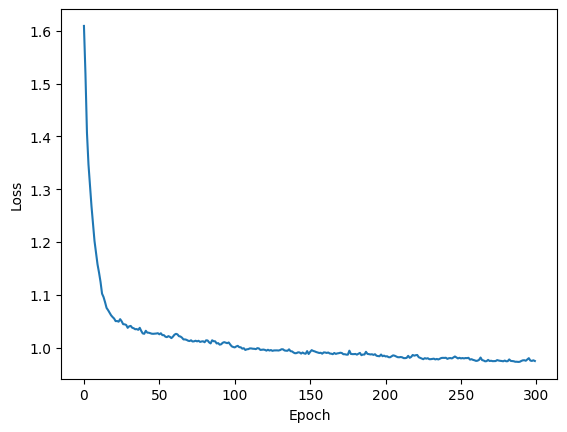

Test accuracy: 464.7255913978495
Accuracy: 0.48
Precision: 0.5189475561352284
Recall: 0.47875490491338013
F1-score: 0.4906023805004491


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.56      0.62       495
           1       0.46      0.49      0.48       472
           2       0.33      0.43      0.37       449
           3       0.34      0.39      0.36       463
           4       0.77      0.51      0.61       446

    accuracy                           0.48      2325
   macro avg       0.52      0.48      0.49      2325
weighted avg       0.52      0.48      0.49      2325

                    0           1           2           3           4  \
precision    0.697500    0.461233    0.329932    0.340187    0.765886   
recall       0.563636    0.491525    0.432071    0.393089    0.513453   
f1-score     0.623464    0.475897    0.374156    0.364729    0.614765   
support    495.000000  472.000000  449.000000  463.000000  

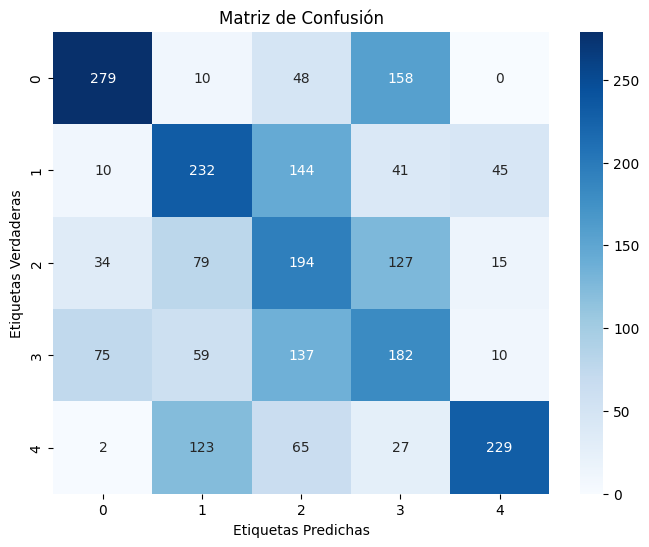

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_300_0.0001_0.1/resultados_300_0.0001_0.1.json
Procesando red con 300 epocas y 1e-05 de factor de aprendizaje y conjunto de entrenamiento 0.9


Procesando epocas:   0%|▏                                                            | 1/300 [00:16<1:22:00, 16.46s/it]

1.609632408618927


Procesando epocas:   1%|▍                                                            | 2/300 [00:32<1:21:39, 16.44s/it]

1.609621556366191


Procesando epocas:   1%|▌                                                            | 3/300 [00:49<1:21:25, 16.45s/it]

1.6095569568521837


Procesando epocas:   1%|▊                                                            | 4/300 [01:05<1:21:11, 16.46s/it]

1.609338036705466


Procesando epocas:   2%|█                                                            | 5/300 [01:22<1:20:54, 16.46s/it]

1.6083901587654563


Procesando epocas:   2%|█▏                                                           | 6/300 [01:38<1:20:39, 16.46s/it]

1.6047848350861493


Procesando epocas:   2%|█▍                                                           | 7/300 [01:55<1:20:22, 16.46s/it]

1.595326378064997


Procesando epocas:   3%|█▋                                                           | 8/300 [02:11<1:20:04, 16.45s/it]

1.568445104711196


Procesando epocas:   3%|█▊                                                           | 9/300 [02:28<1:19:49, 16.46s/it]

1.523619258403778


Procesando epocas:   3%|██                                                          | 10/300 [02:44<1:19:32, 16.46s/it]

1.4789341814377728


Procesando epocas:   4%|██▏                                                         | 11/300 [03:01<1:19:16, 16.46s/it]

1.4492789149284362


Procesando epocas:   4%|██▍                                                         | 12/300 [03:17<1:19:03, 16.47s/it]

1.4278214075986078


Procesando epocas:   4%|██▌                                                         | 13/300 [03:33<1:18:44, 16.46s/it]

1.410762675369487


Procesando epocas:   5%|██▊                                                         | 14/300 [03:50<1:18:28, 16.46s/it]

1.3911375648835127


Procesando epocas:   5%|███                                                         | 15/300 [04:06<1:18:14, 16.47s/it]

1.3746494244126712


Procesando epocas:   5%|███▏                                                        | 16/300 [04:23<1:18:02, 16.49s/it]

1.361625843188342


Procesando epocas:   6%|███▍                                                        | 17/300 [04:39<1:17:44, 16.48s/it]

1.3491179122644312


Procesando epocas:   6%|███▌                                                        | 18/300 [04:56<1:17:26, 16.48s/it]

1.3334911143078523


Procesando epocas:   6%|███▊                                                        | 19/300 [05:12<1:17:08, 16.47s/it]

1.3215963020044215


Procesando epocas:   7%|████                                                        | 20/300 [05:29<1:16:49, 16.46s/it]

1.3094936483046589


Procesando epocas:   7%|████▏                                                       | 21/300 [05:45<1:16:32, 16.46s/it]

1.2985401581315432


Procesando epocas:   7%|████▍                                                       | 22/300 [06:02<1:16:14, 16.45s/it]

1.295384571131538


Procesando epocas:   8%|████▌                                                       | 23/300 [06:18<1:15:57, 16.45s/it]

1.277255050575032


Procesando epocas:   8%|████▊                                                       | 24/300 [06:35<1:15:41, 16.46s/it]

1.2670068278032192


Procesando epocas:   8%|█████                                                       | 25/300 [06:51<1:15:26, 16.46s/it]

1.2592105563949136


Procesando epocas:   9%|█████▏                                                      | 26/300 [07:08<1:15:10, 16.46s/it]

1.2541086498428793


Procesando epocas:   9%|█████▍                                                      | 27/300 [07:24<1:14:53, 16.46s/it]

1.2369534653775833


Procesando epocas:   9%|█████▌                                                      | 28/300 [07:40<1:14:36, 16.46s/it]

1.23096484226339


Procesando epocas:  10%|█████▊                                                      | 29/300 [07:57<1:14:19, 16.46s/it]

1.2212808938587414


Procesando epocas:  10%|██████                                                      | 30/300 [08:13<1:14:03, 16.46s/it]

1.2172990616630106


Procesando epocas:  10%|██████▏                                                     | 31/300 [08:30<1:13:47, 16.46s/it]

1.2008817567544825


Procesando epocas:  11%|██████▍                                                     | 32/300 [08:46<1:13:31, 16.46s/it]

1.1945441189934225


Procesando epocas:  11%|██████▌                                                     | 33/300 [09:03<1:13:16, 16.47s/it]

1.190194395009209


Procesando epocas:  11%|██████▊                                                     | 34/300 [09:19<1:12:59, 16.47s/it]

1.179275596141815


Procesando epocas:  12%|███████                                                     | 35/300 [09:36<1:12:42, 16.46s/it]

1.1665931298452266


Procesando epocas:  12%|███████▏                                                    | 36/300 [09:52<1:12:26, 16.46s/it]

1.1672376422321096


Procesando epocas:  12%|███████▍                                                    | 37/300 [10:09<1:12:12, 16.47s/it]

1.1570761252852046


Procesando epocas:  13%|███████▌                                                    | 38/300 [10:25<1:11:55, 16.47s/it]

1.1503439745482276


Procesando epocas:  13%|███████▊                                                    | 39/300 [10:42<1:11:36, 16.46s/it]

1.146950162158293


Procesando epocas:  13%|████████                                                    | 40/300 [10:58<1:11:20, 16.46s/it]

1.1369434787946588


Procesando epocas:  14%|████████▏                                                   | 41/300 [11:14<1:11:05, 16.47s/it]

1.133466551584356


Procesando epocas:  14%|████████▍                                                   | 42/300 [11:31<1:10:49, 16.47s/it]

1.1229657681549297


Procesando epocas:  14%|████████▌                                                   | 43/300 [11:47<1:10:32, 16.47s/it]

1.1168242713984322


Procesando epocas:  15%|████████▊                                                   | 44/300 [12:04<1:10:20, 16.49s/it]

1.1087988380123588


Procesando epocas:  15%|█████████                                                   | 45/300 [12:20<1:10:03, 16.49s/it]

1.1080870992997114


Procesando epocas:  15%|█████████▏                                                  | 46/300 [12:37<1:09:47, 16.48s/it]

1.0979428887367249


Procesando epocas:  16%|█████████▍                                                  | 47/300 [12:53<1:09:30, 16.48s/it]

1.0969592132989099


Procesando epocas:  16%|█████████▌                                                  | 48/300 [13:10<1:09:13, 16.48s/it]

1.0949671836460337


Procesando epocas:  16%|█████████▊                                                  | 49/300 [13:26<1:08:57, 16.48s/it]

1.0847136946285472


Procesando epocas:  17%|██████████                                                  | 50/300 [13:43<1:08:39, 16.48s/it]

1.083009745794184


Procesando epocas:  17%|██████████▏                                                 | 51/300 [13:59<1:08:24, 16.48s/it]

1.0798946889007792


Procesando epocas:  17%|██████████▍                                                 | 52/300 [14:16<1:08:07, 16.48s/it]

1.0713754092945773


Procesando epocas:  18%|██████████▌                                                 | 53/300 [14:32<1:07:50, 16.48s/it]

1.0678720312960008


Procesando epocas:  18%|██████████▊                                                 | 54/300 [14:49<1:07:32, 16.47s/it]

1.0643989359631258


Procesando epocas:  18%|███████████                                                 | 55/300 [15:05<1:07:14, 16.47s/it]

1.066411283086328


Procesando epocas:  19%|███████████▏                                                | 56/300 [15:22<1:06:57, 16.47s/it]

1.0591367837260752


Procesando epocas:  19%|███████████▍                                                | 57/300 [15:38<1:06:38, 16.46s/it]

1.0532693522817949


Procesando epocas:  19%|███████████▌                                                | 58/300 [15:55<1:06:22, 16.46s/it]

1.050573885791442


Procesando epocas:  20%|███████████▊                                                | 59/300 [16:11<1:06:08, 16.46s/it]

1.0510230376439935


Procesando epocas:  20%|████████████                                                | 60/300 [16:28<1:05:53, 16.47s/it]

1.0454660717178794


Procesando epocas:  20%|████████████▏                                               | 61/300 [16:44<1:05:36, 16.47s/it]

1.0458326518535614


Procesando epocas:  21%|████████████▍                                               | 62/300 [17:00<1:05:20, 16.47s/it]

1.0393489276661592


Procesando epocas:  21%|████████████▌                                               | 63/300 [17:17<1:05:00, 16.46s/it]

1.0399917031035704


Procesando epocas:  21%|████████████▊                                               | 64/300 [17:33<1:04:44, 16.46s/it]

1.036805018607308


Procesando epocas:  22%|█████████████                                               | 65/300 [17:50<1:04:28, 16.46s/it]

1.0337093065766727


Procesando epocas:  22%|█████████████▏                                              | 66/300 [18:06<1:04:10, 16.46s/it]

1.0290272470782784


Procesando epocas:  22%|█████████████▍                                              | 67/300 [18:23<1:03:53, 16.45s/it]

1.028678076056873


Procesando epocas:  23%|█████████████▌                                              | 68/300 [18:39<1:03:37, 16.46s/it]

1.0262877793873058


Procesando epocas:  23%|█████████████▊                                              | 69/300 [18:56<1:03:21, 16.46s/it]

1.0267507244558896


Procesando epocas:  23%|██████████████                                              | 70/300 [19:12<1:03:05, 16.46s/it]

1.0205372663105234


Procesando epocas:  24%|██████████████▏                                             | 71/300 [19:29<1:02:50, 16.46s/it]

1.0217931172427008


Procesando epocas:  24%|██████████████▍                                             | 72/300 [19:45<1:02:33, 16.46s/it]

1.0196859731393701


Procesando epocas:  24%|██████████████▌                                             | 73/300 [20:01<1:02:18, 16.47s/it]

1.0181796967983245


Procesando epocas:  25%|██████████████▊                                             | 74/300 [20:18<1:02:00, 16.46s/it]

1.0169922940871294


Procesando epocas:  25%|███████████████                                             | 75/300 [20:34<1:01:43, 16.46s/it]

1.0141715817591723


Procesando epocas:  25%|███████████████▏                                            | 76/300 [20:51<1:01:26, 16.46s/it]

1.0142981974517598


Procesando epocas:  26%|███████████████▍                                            | 77/300 [21:07<1:01:09, 16.46s/it]

1.015803809376324


Procesando epocas:  26%|███████████████▌                                            | 78/300 [21:24<1:00:52, 16.45s/it]

1.0118188097196468


Procesando epocas:  26%|███████████████▊                                            | 79/300 [21:40<1:00:36, 16.45s/it]

1.0085550455486074


Procesando epocas:  27%|████████████████                                            | 80/300 [21:57<1:00:18, 16.45s/it]

1.009806952756994


Procesando epocas:  27%|████████████████▏                                           | 81/300 [22:13<1:00:03, 16.45s/it]

1.0089234962182887


Procesando epocas:  27%|████████████████▉                                             | 82/300 [22:30<59:46, 16.45s/it]

1.005900541824453


Procesando epocas:  28%|█████████████████▏                                            | 83/300 [22:46<59:30, 16.45s/it]

1.0052696424372056


Procesando epocas:  28%|█████████████████▎                                            | 84/300 [23:02<59:14, 16.46s/it]

1.0033018091145685


Procesando epocas:  28%|█████████████████▌                                            | 85/300 [23:19<58:58, 16.46s/it]

1.0021360435906579


Procesando epocas:  29%|█████████████████▊                                            | 86/300 [23:35<58:40, 16.45s/it]

1.003847090286367


Procesando epocas:  29%|█████████████████▉                                            | 87/300 [23:52<58:25, 16.46s/it]

0.9990497448865105


Procesando epocas:  29%|██████████████████▏                                           | 88/300 [24:08<58:10, 16.47s/it]

1.0013678957434262


Procesando epocas:  30%|██████████████████▍                                           | 89/300 [24:25<57:54, 16.47s/it]

0.9981106470612918


Procesando epocas:  30%|██████████████████▌                                           | 90/300 [24:41<57:37, 16.46s/it]

0.9999789658714743


Procesando epocas:  30%|██████████████████▊                                           | 91/300 [24:58<57:20, 16.46s/it]

0.9987328378593221


Procesando epocas:  31%|███████████████████                                           | 92/300 [25:14<57:03, 16.46s/it]

0.9963143653729383


Procesando epocas:  31%|███████████████████▏                                          | 93/300 [25:31<56:45, 16.45s/it]

0.9989456180263968


Procesando epocas:  31%|███████████████████▍                                          | 94/300 [25:47<56:29, 16.46s/it]

0.9969095300225651


Procesando epocas:  32%|███████████████████▋                                          | 95/300 [26:04<56:13, 16.46s/it]

0.9977819218355066


Procesando epocas:  32%|███████████████████▊                                          | 96/300 [26:20<55:56, 16.45s/it]

0.995532070538577


Procesando epocas:  32%|████████████████████                                          | 97/300 [26:36<55:41, 16.46s/it]

0.9941377874682932


Procesando epocas:  33%|████████████████████▎                                         | 98/300 [26:53<55:24, 16.46s/it]

0.9937165425104253


Procesando epocas:  33%|████████████████████▍                                         | 99/300 [27:09<55:09, 16.47s/it]

0.9923493479981141


Procesando epocas:  33%|████████████████████▎                                        | 100/300 [27:26<54:54, 16.47s/it]

0.993632164772819


Procesando epocas:  34%|████████████████████▌                                        | 101/300 [27:42<54:37, 16.47s/it]

0.99157695665079


Procesando epocas:  34%|████████████████████▋                                        | 102/300 [27:59<54:21, 16.47s/it]

0.9945511200848748


Procesando epocas:  34%|████████████████████▉                                        | 103/300 [28:15<54:04, 16.47s/it]

0.9901998674168306


Procesando epocas:  35%|█████████████████████▏                                       | 104/300 [28:32<53:48, 16.47s/it]

0.9892765157362994


Procesando epocas:  35%|█████████████████████▎                                       | 105/300 [28:48<53:31, 16.47s/it]

0.9896130516248591


Procesando epocas:  35%|█████████████████████▌                                       | 106/300 [29:05<53:14, 16.47s/it]

0.9879079678479363


Procesando epocas:  36%|█████████████████████▊                                       | 107/300 [29:21<52:59, 16.47s/it]

0.9895078567897573


Procesando epocas:  36%|█████████████████████▉                                       | 108/300 [29:38<52:44, 16.48s/it]

0.9877031550687903


Procesando epocas:  36%|██████████████████████▏                                      | 109/300 [29:54<52:28, 16.48s/it]

0.9874339987249935


Procesando epocas:  37%|██████████████████████▎                                      | 110/300 [30:11<52:12, 16.49s/it]

0.9872488207676832


Procesando epocas:  37%|██████████████████████▌                                      | 111/300 [30:27<51:53, 16.47s/it]

0.9892971806666431


Procesando epocas:  37%|██████████████████████▊                                      | 112/300 [30:44<51:36, 16.47s/it]

0.9861719979959376


Procesando epocas:  38%|██████████████████████▉                                      | 113/300 [31:00<51:20, 16.47s/it]

0.9874802287887124


Procesando epocas:  38%|███████████████████████▏                                     | 114/300 [31:17<51:04, 16.48s/it]

0.9867554005454569


Procesando epocas:  38%|███████████████████████▍                                     | 115/300 [31:33<50:47, 16.47s/it]

0.9877696643857395


Procesando epocas:  39%|███████████████████████▌                                     | 116/300 [31:49<50:29, 16.47s/it]

0.9872194244581111


Procesando epocas:  39%|███████████████████████▊                                     | 117/300 [32:06<50:12, 16.46s/it]

0.9857850043212666


Procesando epocas:  39%|███████████████████████▉                                     | 118/300 [32:22<49:57, 16.47s/it]

0.9865873862715329


Procesando epocas:  40%|████████████████████████▏                                    | 119/300 [32:39<49:40, 16.47s/it]

0.9846794398391948


Procesando epocas:  40%|████████████████████████▍                                    | 120/300 [32:55<49:25, 16.48s/it]

0.9853498062666725


Procesando epocas:  40%|████████████████████████▌                                    | 121/300 [33:12<49:08, 16.47s/it]

0.9857519447803498


Procesando epocas:  41%|████████████████████████▊                                    | 122/300 [33:28<48:51, 16.47s/it]

0.9841078085057876


Procesando epocas:  41%|█████████████████████████                                    | 123/300 [33:45<48:35, 16.47s/it]

0.9853955591426177


Procesando epocas:  41%|█████████████████████████▏                                   | 124/300 [34:01<48:19, 16.48s/it]

0.9834209606927984


Procesando epocas:  42%|█████████████████████████▍                                   | 125/300 [34:18<48:03, 16.48s/it]

0.9823714203694287


Procesando epocas:  42%|█████████████████████████▌                                   | 126/300 [34:34<47:45, 16.47s/it]

0.9842606502420762


Procesando epocas:  42%|█████████████████████████▊                                   | 127/300 [34:51<47:29, 16.47s/it]

0.982980459577897


Procesando epocas:  43%|██████████████████████████                                   | 128/300 [35:07<47:12, 16.47s/it]

0.983663677818635


Procesando epocas:  43%|██████████████████████████▏                                  | 129/300 [35:24<46:55, 16.46s/it]

0.9817428869359633


Procesando epocas:  43%|██████████████████████████▍                                  | 130/300 [35:40<46:38, 16.46s/it]

0.9820160378428067


Procesando epocas:  44%|██████████████████████████▋                                  | 131/300 [35:56<46:21, 16.46s/it]

0.9829229232142953


Procesando epocas:  44%|██████████████████████████▊                                  | 132/300 [36:13<46:07, 16.47s/it]

0.9825811961117913


Procesando epocas:  44%|███████████████████████████                                  | 133/300 [36:29<45:50, 16.47s/it]

0.9812602470902836


Procesando epocas:  45%|███████████████████████████▏                                 | 134/300 [36:46<45:33, 16.47s/it]

0.9820070305291344


Procesando epocas:  45%|███████████████████████████▍                                 | 135/300 [37:02<45:17, 16.47s/it]

0.9813852222526774


Procesando epocas:  45%|███████████████████████████▋                                 | 136/300 [37:19<45:01, 16.47s/it]

0.981857418312746


Procesando epocas:  46%|███████████████████████████▊                                 | 137/300 [37:35<44:45, 16.47s/it]

0.9812146951170528


Procesando epocas:  46%|████████████████████████████                                 | 138/300 [37:52<44:27, 16.47s/it]

0.9821883713497835


Procesando epocas:  46%|████████████████████████████▎                                | 139/300 [38:08<44:10, 16.46s/it]

0.9806329821839052


Procesando epocas:  47%|████████████████████████████▍                                | 140/300 [38:25<43:54, 16.47s/it]

0.9807252470184775


Procesando epocas:  47%|████████████████████████████▋                                | 141/300 [38:41<43:38, 16.47s/it]

0.9822752398603103


Procesando epocas:  47%|████████████████████████████▊                                | 142/300 [38:58<43:21, 16.47s/it]

0.9814064695554621


Procesando epocas:  48%|█████████████████████████████                                | 143/300 [39:14<43:07, 16.48s/it]

0.9805040419101715


Procesando epocas:  48%|█████████████████████████████▎                               | 144/300 [39:31<42:50, 16.48s/it]

0.9812007185290842


Procesando epocas:  48%|█████████████████████████████▍                               | 145/300 [39:47<42:34, 16.48s/it]

0.980728646586923


Procesando epocas:  49%|█████████████████████████████▋                               | 146/300 [40:04<42:17, 16.48s/it]

0.9808311960276436


Procesando epocas:  49%|█████████████████████████████▉                               | 147/300 [40:20<42:01, 16.48s/it]

0.9802688248017255


Procesando epocas:  49%|██████████████████████████████                               | 148/300 [40:36<41:43, 16.47s/it]

0.9813295262701371


Procesando epocas:  50%|██████████████████████████████▎                              | 149/300 [40:53<41:27, 16.47s/it]

0.979394113666871


Procesando epocas:  50%|██████████████████████████████▌                              | 150/300 [41:09<41:11, 16.47s/it]

0.9803130304112154


Procesando epocas:  50%|██████████████████████████████▋                              | 151/300 [41:26<40:55, 16.48s/it]

0.9822417290771709


Procesando epocas:  51%|██████████████████████████████▉                              | 152/300 [41:42<40:38, 16.48s/it]

0.9802106731078204


Procesando epocas:  51%|███████████████████████████████                              | 153/300 [41:59<40:23, 16.49s/it]

0.9800538704675786


Procesando epocas:  51%|███████████████████████████████▎                             | 154/300 [42:15<40:07, 16.49s/it]

0.9786690820665921


Procesando epocas:  52%|███████████████████████████████▌                             | 155/300 [42:32<39:50, 16.49s/it]

0.9798740884836983


Procesando epocas:  52%|███████████████████████████████▋                             | 156/300 [42:48<39:33, 16.48s/it]

0.9787687967805302


Procesando epocas:  52%|███████████████████████████████▉                             | 157/300 [43:05<39:15, 16.47s/it]

0.9783963736365823


Procesando epocas:  53%|████████████████████████████████▏                            | 158/300 [43:21<38:57, 16.46s/it]

0.9787926056805779


Procesando epocas:  53%|████████████████████████████████▎                            | 159/300 [43:38<38:41, 16.46s/it]

0.9791567101198084


Procesando epocas:  53%|████████████████████████████████▌                            | 160/300 [43:54<38:25, 16.47s/it]

0.9778072202906889


Procesando epocas:  54%|████████████████████████████████▋                            | 161/300 [44:11<38:09, 16.47s/it]

0.979321386533625


Procesando epocas:  54%|████████████████████████████████▉                            | 162/300 [44:27<37:52, 16.47s/it]

0.9788618627716513


Procesando epocas:  54%|█████████████████████████████████▏                           | 163/300 [44:44<37:35, 16.46s/it]

0.9793625919257893


Procesando epocas:  55%|█████████████████████████████████▎                           | 164/300 [45:00<37:18, 16.46s/it]

0.9796792191617629


Procesando epocas:  55%|█████████████████████████████████▌                           | 165/300 [45:16<37:01, 16.46s/it]

0.9775074874653535


Procesando epocas:  55%|█████████████████████████████████▊                           | 166/300 [45:33<36:44, 16.45s/it]

0.9782169650582706


Procesando epocas:  56%|█████████████████████████████████▉                           | 167/300 [45:49<36:28, 16.46s/it]

0.9782426062752219


Procesando epocas:  56%|██████████████████████████████████▏                          | 168/300 [46:06<36:12, 16.46s/it]

0.9765618071836584


Procesando epocas:  56%|██████████████████████████████████▎                          | 169/300 [46:22<35:56, 16.46s/it]

0.9797647560344023


Procesando epocas:  57%|██████████████████████████████████▌                          | 170/300 [46:39<35:39, 16.46s/it]

0.9781648996998282


Procesando epocas:  57%|██████████████████████████████████▊                          | 171/300 [46:55<35:24, 16.47s/it]

0.9766723776564878


Procesando epocas:  57%|██████████████████████████████████▉                          | 172/300 [47:12<35:08, 16.47s/it]

0.9772550228764029


Procesando epocas:  58%|███████████████████████████████████▏                         | 173/300 [47:28<34:50, 16.46s/it]

0.976523992243935


Procesando epocas:  58%|███████████████████████████████████▍                         | 174/300 [47:45<34:35, 16.47s/it]

0.9779080145499286


Procesando epocas:  58%|███████████████████████████████████▌                         | 175/300 [48:01<34:19, 16.47s/it]

0.9776921854299657


Procesando epocas:  59%|███████████████████████████████████▊                         | 176/300 [48:18<34:02, 16.48s/it]

0.9774333491044886


Procesando epocas:  59%|███████████████████████████████████▉                         | 177/300 [48:34<33:45, 16.47s/it]

0.9777739258373485


Procesando epocas:  59%|████████████████████████████████████▏                        | 178/300 [48:51<33:27, 16.46s/it]

0.9773247978266548


Procesando epocas:  60%|████████████████████████████████████▍                        | 179/300 [49:07<33:11, 16.46s/it]

0.9770940430024091


Procesando epocas:  60%|████████████████████████████████████▌                        | 180/300 [49:23<32:55, 16.46s/it]

0.976012094932444


Procesando epocas:  60%|████████████████████████████████████▊                        | 181/300 [49:40<32:38, 16.46s/it]

0.9795554890352137


Procesando epocas:  61%|█████████████████████████████████████                        | 182/300 [49:56<32:23, 16.47s/it]

0.9774264654692482


Procesando epocas:  61%|█████████████████████████████████████▏                       | 183/300 [50:13<32:07, 16.47s/it]

0.97864710373037


Procesando epocas:  61%|█████████████████████████████████████▍                       | 184/300 [50:29<31:50, 16.47s/it]

0.9773296363213483


Procesando epocas:  62%|█████████████████████████████████████▌                       | 185/300 [50:46<31:33, 16.46s/it]

0.9770978717242971


Procesando epocas:  62%|█████████████████████████████████████▊                       | 186/300 [51:02<31:17, 16.47s/it]

0.9757070586961858


Procesando epocas:  62%|██████████████████████████████████████                       | 187/300 [51:19<31:00, 16.46s/it]

0.9763578172992258


Procesando epocas:  63%|██████████████████████████████████████▏                      | 188/300 [51:35<30:43, 16.46s/it]

0.9770277440547943


Procesando epocas:  63%|██████████████████████████████████████▍                      | 189/300 [51:52<30:27, 16.46s/it]

0.9762607427204356


Procesando epocas:  63%|██████████████████████████████████████▋                      | 190/300 [52:08<30:11, 16.46s/it]

0.9774316405548769


Procesando epocas:  64%|██████████████████████████████████████▊                      | 191/300 [52:25<29:55, 16.47s/it]

0.9764432430267334


Procesando epocas:  64%|███████████████████████████████████████                      | 192/300 [52:41<29:38, 16.47s/it]

0.9773133824853336


Procesando epocas:  64%|███████████████████████████████████████▏                     | 193/300 [52:57<29:20, 16.46s/it]

0.9762711893109715


Procesando epocas:  65%|███████████████████████████████████████▍                     | 194/300 [53:14<29:03, 16.45s/it]

0.9762350513654596


Procesando epocas:  65%|███████████████████████████████████████▋                     | 195/300 [53:30<28:47, 16.45s/it]

0.9753743666059831


Procesando epocas:  65%|███████████████████████████████████████▊                     | 196/300 [53:47<28:31, 16.46s/it]

0.9751386270803564


Procesando epocas:  66%|████████████████████████████████████████                     | 197/300 [54:03<28:14, 16.45s/it]

0.9757102889173171


Procesando epocas:  66%|████████████████████████████████████████▎                    | 198/300 [54:20<27:58, 16.46s/it]

0.9762674608651329


Procesando epocas:  66%|████████████████████████████████████████▍                    | 199/300 [54:36<27:42, 16.46s/it]

0.9754081989035887


Procesando epocas:  67%|████████████████████████████████████████▋                    | 200/300 [54:53<27:26, 16.46s/it]

0.9775238840019002


Procesando epocas:  67%|████████████████████████████████████████▊                    | 201/300 [55:09<27:09, 16.46s/it]

0.9754456229069653


Procesando epocas:  67%|█████████████████████████████████████████                    | 202/300 [55:26<26:53, 16.46s/it]

0.975693956192802


Procesando epocas:  68%|█████████████████████████████████████████▎                   | 203/300 [55:42<26:36, 16.46s/it]

0.9767880769336925


Procesando epocas:  68%|█████████████████████████████████████████▍                   | 204/300 [55:59<26:20, 16.46s/it]

0.9758793234825134


Procesando epocas:  68%|█████████████████████████████████████████▋                   | 205/300 [56:15<26:03, 16.46s/it]

0.9757233745911542


Procesando epocas:  69%|█████████████████████████████████████████▉                   | 206/300 [56:31<25:47, 16.46s/it]

0.9754743046620313


Procesando epocas:  69%|██████████████████████████████████████████                   | 207/300 [56:48<25:31, 16.47s/it]

0.9756402902743395


Procesando epocas:  69%|██████████████████████████████████████████▎                  | 208/300 [57:04<25:15, 16.47s/it]

0.9748258808079888


Procesando epocas:  70%|██████████████████████████████████████████▍                  | 209/300 [57:21<24:58, 16.47s/it]

0.9764110831653371


Procesando epocas:  70%|██████████████████████████████████████████▋                  | 210/300 [57:37<24:42, 16.47s/it]

0.9750579241444083


Procesando epocas:  70%|██████████████████████████████████████████▉                  | 211/300 [57:54<24:26, 16.47s/it]

0.9756253298591165


Procesando epocas:  71%|███████████████████████████████████████████                  | 212/300 [58:10<24:10, 16.48s/it]

0.9750668718534358


Procesando epocas:  71%|███████████████████████████████████████████▎                 | 213/300 [58:27<23:53, 16.48s/it]

0.9758738868376788


Procesando epocas:  71%|███████████████████████████████████████████▌                 | 214/300 [58:43<23:36, 16.47s/it]

0.9756763854447533


Procesando epocas:  72%|███████████████████████████████████████████▋                 | 215/300 [59:00<23:20, 16.47s/it]

0.974180686824462


Procesando epocas:  72%|███████████████████████████████████████████▉                 | 216/300 [59:16<23:04, 16.48s/it]

0.9749108268934138


Procesando epocas:  72%|████████████████████████████████████████████                 | 217/300 [59:33<22:47, 16.48s/it]

0.9760778935516582


Procesando epocas:  73%|████████████████████████████████████████████▎                | 218/300 [59:49<22:31, 16.48s/it]

0.9749562263488769


Procesando epocas:  73%|███████████████████████████████████████████                | 219/300 [1:00:06<22:14, 16.47s/it]

0.9751104533672332


Procesando epocas:  73%|███████████████████████████████████████████▎               | 220/300 [1:00:22<21:57, 16.47s/it]

0.9753090606016271


Procesando epocas:  74%|███████████████████████████████████████████▍               | 221/300 [1:00:39<21:41, 16.47s/it]

0.9749930441379547


Procesando epocas:  74%|███████████████████████████████████████████▋               | 222/300 [1:00:55<21:25, 16.47s/it]

0.9755023349733913


Procesando epocas:  74%|███████████████████████████████████████████▊               | 223/300 [1:01:12<21:08, 16.48s/it]

0.9747171598322252


Procesando epocas:  75%|████████████████████████████████████████████               | 224/300 [1:01:28<20:51, 16.47s/it]

0.9745561084326576


Procesando epocas:  75%|████████████████████████████████████████████▎              | 225/300 [1:01:44<20:34, 16.46s/it]

0.9746710314470179


Procesando epocas:  75%|████████████████████████████████████████████▍              | 226/300 [1:02:01<20:18, 16.47s/it]

0.9751758210799273


Procesando epocas:  76%|████████████████████████████████████████████▋              | 227/300 [1:02:17<20:02, 16.48s/it]

0.975736449395909


Procesando epocas:  76%|████████████████████████████████████████████▊              | 228/300 [1:02:34<19:46, 16.48s/it]

0.9747173505670884


Procesando epocas:  76%|█████████████████████████████████████████████              | 229/300 [1:02:50<19:29, 16.47s/it]

0.9750066055971034


Procesando epocas:  77%|█████████████████████████████████████████████▏             | 230/300 [1:03:07<19:12, 16.47s/it]

0.9746861257973839


Procesando epocas:  77%|█████████████████████████████████████████████▍             | 231/300 [1:03:23<18:55, 16.46s/it]

0.9756127105039709


Procesando epocas:  77%|█████████████████████████████████████████████▋             | 232/300 [1:03:40<18:38, 16.45s/it]

0.9748353621538948


Procesando epocas:  78%|█████████████████████████████████████████████▊             | 233/300 [1:03:56<18:22, 16.45s/it]

0.9752373197499443


Procesando epocas:  78%|██████████████████████████████████████████████             | 234/300 [1:04:13<18:06, 16.47s/it]

0.9738682802985696


Procesando epocas:  78%|██████████████████████████████████████████████▏            | 235/300 [1:04:29<17:50, 16.46s/it]

0.9736697494983673


Procesando epocas:  79%|██████████████████████████████████████████████▍            | 236/300 [1:04:46<17:33, 16.46s/it]

0.9742961199844584


Procesando epocas:  79%|██████████████████████████████████████████████▌            | 237/300 [1:05:02<17:17, 16.47s/it]

0.9746476229499368


Procesando epocas:  79%|██████████████████████████████████████████████▊            | 238/300 [1:05:19<17:00, 16.46s/it]

0.9746968132608077


Procesando epocas:  80%|███████████████████████████████████████████████            | 239/300 [1:05:35<16:44, 16.46s/it]

0.9744758521809297


Procesando epocas:  80%|███████████████████████████████████████████████▏           | 240/300 [1:05:51<16:27, 16.46s/it]

0.973742831103942


Procesando epocas:  80%|███████████████████████████████████████████████▍           | 241/300 [1:06:08<16:11, 16.47s/it]

0.9753497421741486


Procesando epocas:  81%|███████████████████████████████████████████████▌           | 242/300 [1:06:24<15:54, 16.46s/it]

0.9745177360141979


Procesando epocas:  81%|███████████████████████████████████████████████▊           | 243/300 [1:06:41<15:37, 16.46s/it]

0.9741567671298981


Procesando epocas:  81%|███████████████████████████████████████████████▉           | 244/300 [1:06:57<15:21, 16.45s/it]

0.9745893604615156


Procesando epocas:  82%|████████████████████████████████████████████████▏          | 245/300 [1:07:14<15:05, 16.45s/it]

0.9735104438136606


Procesando epocas:  82%|████████████████████████████████████████████████▍          | 246/300 [1:07:30<14:49, 16.46s/it]

0.9741218503783731


Procesando epocas:  82%|████████████████████████████████████████████████▌          | 247/300 [1:07:47<14:32, 16.46s/it]

0.9737697355887469


Procesando epocas:  83%|████████████████████████████████████████████████▊          | 248/300 [1:08:03<14:16, 16.47s/it]

0.9742182090001947


Procesando epocas:  83%|████████████████████████████████████████████████▉          | 249/300 [1:08:20<13:59, 16.47s/it]

0.9738846961189719


Procesando epocas:  83%|█████████████████████████████████████████████████▏         | 250/300 [1:08:36<13:43, 16.46s/it]

0.9736415849012487


Procesando epocas:  84%|█████████████████████████████████████████████████▎         | 251/300 [1:08:53<13:26, 16.46s/it]

0.9747499104808358


Procesando epocas:  84%|█████████████████████████████████████████████████▌         | 252/300 [1:09:09<13:10, 16.46s/it]

0.9755994702086729


Procesando epocas:  84%|█████████████████████████████████████████████████▊         | 253/300 [1:09:25<12:54, 16.47s/it]

0.9739481722607332


Procesando epocas:  85%|█████████████████████████████████████████████████▉         | 254/300 [1:09:42<12:37, 16.47s/it]

0.9742321372032166


Procesando epocas:  85%|██████████████████████████████████████████████████▏        | 255/300 [1:09:58<12:21, 16.47s/it]

0.974322394062491


Procesando epocas:  85%|██████████████████████████████████████████████████▎        | 256/300 [1:10:15<12:04, 16.48s/it]

0.9733298484016867


Procesando epocas:  86%|██████████████████████████████████████████████████▌        | 257/300 [1:10:31<11:48, 16.48s/it]

0.9748582545448752


Procesando epocas:  86%|██████████████████████████████████████████████████▋        | 258/300 [1:10:48<11:32, 16.48s/it]

0.974278776435291


Procesando epocas:  86%|██████████████████████████████████████████████████▉        | 259/300 [1:11:04<11:15, 16.48s/it]

0.9745454356950872


Procesando epocas:  87%|███████████████████████████████████████████████████▏       | 260/300 [1:11:21<10:59, 16.48s/it]

0.9740150791757247


Procesando epocas:  87%|███████████████████████████████████████████████████▎       | 261/300 [1:11:37<10:42, 16.48s/it]

0.9740816579145544


Procesando epocas:  87%|███████████████████████████████████████████████████▌       | 262/300 [1:11:54<10:26, 16.48s/it]

0.9739818874527426


Procesando epocas:  88%|███████████████████████████████████████████████████▋       | 263/300 [1:12:10<10:09, 16.48s/it]

0.9734120354932897


Procesando epocas:  88%|███████████████████████████████████████████████████▉       | 264/300 [1:12:27<09:53, 16.49s/it]

0.9752211234148811


Procesando epocas:  88%|████████████████████████████████████████████████████       | 265/300 [1:12:43<09:36, 16.48s/it]

0.9742882472627303


Procesando epocas:  89%|████████████████████████████████████████████████████▎      | 266/300 [1:13:00<09:20, 16.47s/it]

0.9741456831202787


Procesando epocas:  89%|████████████████████████████████████████████████████▌      | 267/300 [1:13:16<09:03, 16.47s/it]

0.9733797241659725


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 268/300 [1:13:33<08:47, 16.47s/it]

0.9743378618184257


Procesando epocas:  90%|████████████████████████████████████████████████████▉      | 269/300 [1:13:49<08:30, 16.47s/it]

0.9746616854387171


Procesando epocas:  90%|█████████████████████████████████████████████████████      | 270/300 [1:14:06<08:14, 16.47s/it]

0.9737895674565259


Procesando epocas:  90%|█████████████████████████████████████████████████████▎     | 271/300 [1:14:22<07:57, 16.46s/it]

0.9730437710004695


Procesando epocas:  91%|█████████████████████████████████████████████████████▍     | 272/300 [1:14:38<07:40, 16.46s/it]

0.9735608788097606


Procesando epocas:  91%|█████████████████████████████████████████████████████▋     | 273/300 [1:14:55<07:24, 16.46s/it]

0.9721707684152266


Procesando epocas:  91%|█████████████████████████████████████████████████████▉     | 274/300 [1:15:11<07:07, 16.45s/it]

0.9742537091760074


Procesando epocas:  92%|██████████████████████████████████████████████████████     | 275/300 [1:15:28<06:51, 16.45s/it]

0.9744136943536647


Procesando epocas:  92%|██████████████████████████████████████████████████████▎    | 276/300 [1:15:44<06:34, 16.45s/it]

0.9730580961003022


Procesando epocas:  92%|██████████████████████████████████████████████████████▍    | 277/300 [1:16:01<06:18, 16.45s/it]

0.9735805844559389


Procesando epocas:  93%|██████████████████████████████████████████████████████▋    | 278/300 [1:16:17<06:01, 16.45s/it]

0.9750296091332155


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 279/300 [1:16:34<05:45, 16.45s/it]

0.973882784913568


Procesando epocas:  93%|███████████████████████████████████████████████████████    | 280/300 [1:16:50<05:29, 16.45s/it]

0.9730124417473288


Procesando epocas:  94%|███████████████████████████████████████████████████████▎   | 281/300 [1:17:07<05:12, 16.45s/it]

0.9741491023231955


Procesando epocas:  94%|███████████████████████████████████████████████████████▍   | 282/300 [1:17:23<04:56, 16.45s/it]

0.9738514861639809


Procesando epocas:  94%|███████████████████████████████████████████████████████▋   | 283/300 [1:17:39<04:39, 16.46s/it]

0.9726282270515666


Procesando epocas:  95%|███████████████████████████████████████████████████████▊   | 284/300 [1:17:56<04:23, 16.47s/it]

0.9736877935774186


Procesando epocas:  95%|████████████████████████████████████████████████████████   | 285/300 [1:18:12<04:07, 16.47s/it]

0.97344070112004


Procesando epocas:  95%|████████████████████████████████████████████████████████▏  | 286/300 [1:18:29<03:50, 16.48s/it]

0.9741039377801558


Procesando epocas:  96%|████████████████████████████████████████████████████████▍  | 287/300 [1:18:45<03:34, 16.47s/it]

0.973180420258466


Procesando epocas:  96%|████████████████████████████████████████████████████████▋  | 288/300 [1:19:02<03:17, 16.47s/it]

0.9739717841148376


Procesando epocas:  96%|████████████████████████████████████████████████████████▊  | 289/300 [1:19:18<03:01, 16.48s/it]

0.9733363807201385


Procesando epocas:  97%|█████████████████████████████████████████████████████████  | 290/300 [1:19:35<02:44, 16.48s/it]

0.9730216667932623


Procesando epocas:  97%|█████████████████████████████████████████████████████████▏ | 291/300 [1:19:51<02:28, 16.48s/it]

0.9728664177305558


Procesando epocas:  97%|█████████████████████████████████████████████████████████▍ | 292/300 [1:20:08<02:11, 16.48s/it]

0.9728409339399898


Procesando epocas:  98%|█████████████████████████████████████████████████████████▌ | 293/300 [1:20:24<01:55, 16.47s/it]

0.9734167617910049


Procesando epocas:  98%|█████████████████████████████████████████████████████████▊ | 294/300 [1:20:41<01:38, 16.47s/it]

0.9733308802632724


Procesando epocas:  98%|██████████████████████████████████████████████████████████ | 295/300 [1:20:57<01:22, 16.46s/it]

0.9729728148264043


Procesando epocas:  99%|██████████████████████████████████████████████████████████▏| 296/300 [1:21:14<01:05, 16.45s/it]

0.9728875637054444


Procesando epocas:  99%|██████████████████████████████████████████████████████████▍| 297/300 [1:21:30<00:49, 16.46s/it]

0.9727390078937306


Procesando epocas:  99%|██████████████████████████████████████████████████████████▌| 298/300 [1:21:46<00:32, 16.45s/it]

0.9731543053598964


Procesando epocas: 100%|██████████████████████████████████████████████████████████▊| 299/300 [1:22:03<00:16, 16.46s/it]

0.9729628874975093


Procesando epocas: 100%|███████████████████████████████████████████████████████████| 300/300 [1:22:19<00:00, 16.47s/it]

0.9739823264234206
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Neural_network_classification ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_300_1e-05_0.1/funcion_de_perdida_300_1e-05.png


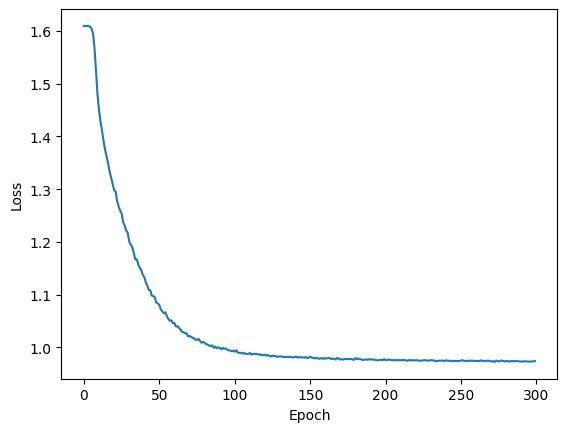

Test accuracy: 464.8632258064516
Accuracy: 0.4511827956989247
Precision: 0.44473123877758935
Recall: 0.44951674443452816
F1-score: 0.4456867976886487


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       495
           1       0.40      0.32      0.36       472
           2       0.27      0.29      0.28       449
           3       0.34      0.34      0.34       463
           4       0.58      0.66      0.62       446

    accuracy                           0.45      2325
   macro avg       0.44      0.45      0.45      2325
weighted avg       0.45      0.45      0.45      2325

                    0           1           2           3           4  \
precision    0.631164    0.400531    0.266112    0.341357    0.584493   
recall       0.646465    0.319915    0.285078    0.336933    0.659193   
f1-score     0.638723    0.355713    0.275269    0.339130    0.619600   
support    495.000000  472.000000  449.00000

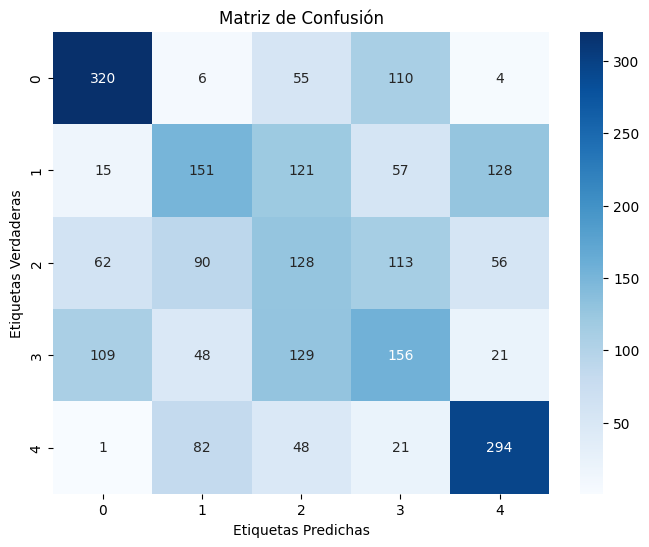

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_300_1e-05_0.1/resultados_300_1e-05_0.1.json
Procesando red con 500 epocas y 0.0001 de factor de aprendizaje y conjunto de entrenamiento 0.9


Procesando epocas:   0%|                                                             | 1/500 [00:16<2:16:49, 16.45s/it]

1.6085813199772554


Procesando epocas:   0%|▏                                                            | 2/500 [00:32<2:16:30, 16.45s/it]

1.5099072274039773


Procesando epocas:   1%|▎                                                            | 3/500 [00:49<2:16:07, 16.43s/it]

1.4017490968984716


Procesando epocas:   1%|▍                                                            | 4/500 [01:05<2:15:52, 16.44s/it]

1.346159761092242


Procesando epocas:   1%|▌                                                            | 5/500 [01:22<2:15:40, 16.45s/it]

1.2908988377627204


Procesando epocas:   1%|▋                                                            | 6/500 [01:38<2:15:26, 16.45s/it]

1.2548768976155449


Procesando epocas:   1%|▊                                                            | 7/500 [01:55<2:15:09, 16.45s/it]

1.2227194330271554


Procesando epocas:   2%|▉                                                            | 8/500 [02:11<2:14:51, 16.45s/it]

1.1981019784422482


Procesando epocas:   2%|█                                                            | 9/500 [02:28<2:14:34, 16.45s/it]

1.1628778443616978


Procesando epocas:   2%|█▏                                                          | 10/500 [02:44<2:14:15, 16.44s/it]

1.137466250447666


Procesando epocas:   2%|█▎                                                          | 11/500 [03:00<2:14:02, 16.45s/it]

1.1175216285621419


Procesando epocas:   2%|█▍                                                          | 12/500 [03:17<2:13:45, 16.44s/it]

1.102609811109655


Procesando epocas:   3%|█▌                                                          | 13/500 [03:33<2:13:38, 16.47s/it]

1.0820949484320248


Procesando epocas:   3%|█▋                                                          | 14/500 [03:50<2:13:20, 16.46s/it]

1.0724742072470048


Procesando epocas:   3%|█▊                                                          | 15/500 [04:06<2:13:06, 16.47s/it]

1.0693302985499886


Procesando epocas:   3%|█▉                                                          | 16/500 [04:23<2:12:46, 16.46s/it]

1.0614871708785787


Procesando epocas:   3%|██                                                          | 17/500 [04:39<2:12:27, 16.45s/it]

1.050621415236417


Procesando epocas:   4%|██▏                                                         | 18/500 [04:56<2:12:10, 16.45s/it]

1.044780966464211


Procesando epocas:   4%|██▎                                                         | 19/500 [05:12<2:11:55, 16.46s/it]

1.0403986972921035


Procesando epocas:   4%|██▍                                                         | 20/500 [05:29<2:11:37, 16.45s/it]

1.0386646330356597


Procesando epocas:   4%|██▌                                                         | 21/500 [05:45<2:11:20, 16.45s/it]

1.035994495013181


Procesando epocas:   4%|██▋                                                         | 22/500 [06:01<2:11:05, 16.45s/it]

1.037449245593127


Procesando epocas:   5%|██▊                                                         | 23/500 [06:18<2:10:54, 16.47s/it]

1.0345111264902003


Procesando epocas:   5%|██▉                                                         | 24/500 [06:35<2:11:15, 16.55s/it]

1.0298530876636505


Procesando epocas:   5%|███                                                         | 25/500 [06:52<2:12:12, 16.70s/it]

1.034354741082472


Procesando epocas:   5%|███                                                         | 26/500 [07:09<2:12:28, 16.77s/it]

1.031257180256002


Procesando epocas:   5%|███▏                                                        | 27/500 [07:25<2:12:15, 16.78s/it]

1.034257255932864


Procesando epocas:   6%|███▎                                                        | 28/500 [07:42<2:12:01, 16.78s/it]

1.0328259401461657


Procesando epocas:   6%|███▍                                                        | 29/500 [07:59<2:11:44, 16.78s/it]

1.0287861049175262


Procesando epocas:   6%|███▌                                                        | 30/500 [08:16<2:11:31, 16.79s/it]

1.0269136274562163


Procesando epocas:   6%|███▋                                                        | 31/500 [08:33<2:11:18, 16.80s/it]

1.0287046625333673


Procesando epocas:   6%|███▊                                                        | 32/500 [08:50<2:11:14, 16.83s/it]

1.0263875284615684


Procesando epocas:   7%|███▉                                                        | 33/500 [09:07<2:11:17, 16.87s/it]

1.0297664691420163


Procesando epocas:   7%|████                                                        | 34/500 [09:23<2:11:15, 16.90s/it]

1.0311435418970445


Procesando epocas:   7%|████▏                                                       | 35/500 [09:40<2:10:58, 16.90s/it]

1.0318630993366242


Procesando epocas:   7%|████▎                                                       | 36/500 [09:57<2:10:54, 16.93s/it]

1.0291223550544066


Procesando epocas:   7%|████▍                                                       | 37/500 [10:15<2:11:51, 17.09s/it]

1.0269280629999498


Procesando epocas:   8%|████▌                                                       | 38/500 [10:32<2:12:05, 17.15s/it]

1.0322441577911377


Procesando epocas:   8%|████▋                                                       | 39/500 [10:49<2:11:37, 17.13s/it]

1.0320096050991732


Procesando epocas:   8%|████▊                                                       | 40/500 [11:06<2:10:47, 17.06s/it]

1.0340404580621159


Procesando epocas:   8%|████▉                                                       | 41/500 [11:23<2:09:56, 16.99s/it]

1.0303913950920105


Procesando epocas:   8%|█████                                                       | 42/500 [11:40<2:09:57, 17.03s/it]

1.0296645262662103


Procesando epocas:   9%|█████▏                                                      | 43/500 [11:57<2:09:36, 17.02s/it]

1.0250263322802151


Procesando epocas:   9%|█████▎                                                      | 44/500 [12:14<2:09:34, 17.05s/it]

1.0233524550409878


Procesando epocas:   9%|█████▍                                                      | 45/500 [12:31<2:08:06, 16.89s/it]

1.0246831764193143


Procesando epocas:   9%|█████▌                                                      | 46/500 [12:47<2:06:55, 16.77s/it]

1.0227731504861046


Procesando epocas:   9%|█████▋                                                      | 47/500 [13:04<2:06:01, 16.69s/it]

1.020734263868893


Procesando epocas:  10%|█████▊                                                      | 48/500 [13:20<2:05:23, 16.64s/it]

1.0214800263152404


Procesando epocas:  10%|█████▉                                                      | 49/500 [13:37<2:05:35, 16.71s/it]

1.024329708253636


Procesando epocas:  10%|██████                                                      | 50/500 [13:54<2:04:55, 16.66s/it]

1.0219301037928636


Procesando epocas:  10%|██████                                                      | 51/500 [14:10<2:04:36, 16.65s/it]

1.0180874421316035


Procesando epocas:  10%|██████▏                                                     | 52/500 [14:27<2:05:00, 16.74s/it]

1.0178161782376907


Procesando epocas:  11%|██████▎                                                     | 53/500 [14:44<2:04:34, 16.72s/it]

1.0193580073468826


Procesando epocas:  11%|██████▍                                                     | 54/500 [15:01<2:05:08, 16.83s/it]

1.020130387474509


Procesando epocas:  11%|██████▌                                                     | 55/500 [15:18<2:05:34, 16.93s/it]

1.020214354991913


Procesando epocas:  11%|██████▋                                                     | 56/500 [15:35<2:05:42, 16.99s/it]

1.0199937648632946


Procesando epocas:  11%|██████▊                                                     | 57/500 [15:52<2:05:26, 16.99s/it]

1.0171291863217073


Procesando epocas:  12%|██████▉                                                     | 58/500 [16:10<2:05:43, 17.07s/it]

1.0150480084559497


Procesando epocas:  12%|███████                                                     | 59/500 [16:27<2:06:19, 17.19s/it]

1.018436716935214


Procesando epocas:  12%|███████▏                                                    | 60/500 [16:44<2:06:35, 17.26s/it]

1.0148664120365591


Procesando epocas:  12%|███████▎                                                    | 61/500 [17:02<2:06:23, 17.27s/it]

1.0147188197163974


Procesando epocas:  12%|███████▍                                                    | 62/500 [17:19<2:05:54, 17.25s/it]

1.0132593123351827


Procesando epocas:  13%|███████▌                                                    | 63/500 [17:36<2:04:51, 17.14s/it]

1.0193629601422478


Procesando epocas:  13%|███████▋                                                    | 64/500 [17:53<2:04:30, 17.13s/it]

1.0164527938646428


Procesando epocas:  13%|███████▊                                                    | 65/500 [18:10<2:04:03, 17.11s/it]

1.015240023767247


Procesando epocas:  13%|███████▉                                                    | 66/500 [18:27<2:03:31, 17.08s/it]

1.0157453975256752


Procesando epocas:  13%|████████                                                    | 67/500 [18:44<2:03:21, 17.09s/it]

1.013713425397873


Procesando epocas:  14%|████████▏                                                   | 68/500 [19:01<2:03:01, 17.09s/it]

1.0128833493765663


Procesando epocas:  14%|████████▎                                                   | 69/500 [19:18<2:02:37, 17.07s/it]

1.0146268462433534


Procesando epocas:  14%|████████▍                                                   | 70/500 [19:35<2:02:06, 17.04s/it]

1.0115775914753184


Procesando epocas:  14%|████████▌                                                   | 71/500 [19:52<2:02:18, 17.11s/it]

1.0115889237207525


Procesando epocas:  14%|████████▋                                                   | 72/500 [20:10<2:01:57, 17.10s/it]

1.011034720434862


Procesando epocas:  15%|████████▊                                                   | 73/500 [20:27<2:02:20, 17.19s/it]

1.0088283114573535


Procesando epocas:  15%|████████▉                                                   | 74/500 [20:44<2:02:18, 17.23s/it]

1.009708428733489


Procesando epocas:  15%|█████████                                                   | 75/500 [21:01<2:01:18, 17.12s/it]

1.0086602498503292


Procesando epocas:  15%|█████████                                                   | 76/500 [21:18<2:00:59, 17.12s/it]

1.0107724301955279


Procesando epocas:  15%|█████████▏                                                  | 77/500 [21:35<2:00:17, 17.06s/it]

1.013120713304071


Procesando epocas:  16%|█████████▎                                                  | 78/500 [21:52<1:59:53, 17.05s/it]

1.0125767297604504


Procesando epocas:  16%|█████████▍                                                  | 79/500 [22:09<1:59:28, 17.03s/it]

1.0108890813939713


Procesando epocas:  16%|█████████▌                                                  | 80/500 [22:26<1:58:56, 16.99s/it]

1.0073044187882367


Procesando epocas:  16%|█████████▋                                                  | 81/500 [22:43<1:58:23, 16.95s/it]

1.0057880594449884


Procesando epocas:  16%|█████████▊                                                  | 82/500 [23:00<1:58:18, 16.98s/it]

1.00617294977693


Procesando epocas:  17%|█████████▉                                                  | 83/500 [23:17<1:57:58, 16.98s/it]

1.0076786461998435


Procesando epocas:  17%|██████████                                                  | 84/500 [23:34<1:57:48, 16.99s/it]

1.005541336185792


Procesando epocas:  17%|██████████▏                                                 | 85/500 [23:51<1:57:09, 16.94s/it]

1.0046842340160818


Procesando epocas:  17%|██████████▎                                                 | 86/500 [24:08<1:57:09, 16.98s/it]

1.0045402028981376


Procesando epocas:  17%|██████████▍                                                 | 87/500 [24:25<1:56:52, 16.98s/it]

1.0057676697478575


Procesando epocas:  18%|██████████▌                                                 | 88/500 [24:42<1:56:23, 16.95s/it]

1.0061018989366644


Procesando epocas:  18%|██████████▋                                                 | 89/500 [24:59<1:56:05, 16.95s/it]

1.0061790122705347


Procesando epocas:  18%|██████████▊                                                 | 90/500 [25:16<1:56:00, 16.98s/it]

1.0036503763759836


Procesando epocas:  18%|██████████▉                                                 | 91/500 [25:33<1:55:32, 16.95s/it]

1.0042012053377487


Procesando epocas:  18%|███████████                                                 | 92/500 [25:50<1:55:46, 17.02s/it]

1.0061616396202762


Procesando epocas:  19%|███████████▏                                                | 93/500 [26:07<1:55:59, 17.10s/it]

1.0061176061630248


Procesando epocas:  19%|███████████▎                                                | 94/500 [26:24<1:55:51, 17.12s/it]

1.0065289301030775


Procesando epocas:  19%|███████████▍                                                | 95/500 [26:42<1:57:07, 17.35s/it]

1.0046474597033332


Procesando epocas:  19%|███████████▌                                                | 96/500 [27:00<1:57:59, 17.52s/it]

1.0032901777940637


Procesando epocas:  19%|███████████▋                                                | 97/500 [27:18<1:58:39, 17.67s/it]

1.0048999095664304


Procesando epocas:  20%|███████████▊                                                | 98/500 [27:35<1:57:29, 17.54s/it]

1.0063659601351793


Procesando epocas:  20%|███████████▉                                                | 99/500 [27:53<1:56:36, 17.45s/it]

1.0079896267722634


Procesando epocas:  20%|███████████▊                                               | 100/500 [28:09<1:55:14, 17.29s/it]

1.005556799033109


Procesando epocas:  20%|███████████▉                                               | 101/500 [28:26<1:54:12, 17.17s/it]

1.0067474326666663


Procesando epocas:  20%|████████████                                               | 102/500 [28:43<1:53:46, 17.15s/it]

1.0065456653342528


Procesando epocas:  21%|████████████▏                                              | 103/500 [29:00<1:53:12, 17.11s/it]

1.007060962564805


Procesando epocas:  21%|████████████▎                                              | 104/500 [29:17<1:52:43, 17.08s/it]

1.0090678365791546


Procesando epocas:  21%|████████████▍                                              | 105/500 [29:34<1:52:17, 17.06s/it]

1.007627046809477


Procesando epocas:  21%|████████████▌                                              | 106/500 [29:52<1:52:02, 17.06s/it]

1.0072766826433295


Procesando epocas:  21%|████████████▋                                              | 107/500 [30:08<1:51:32, 17.03s/it]

1.0089595626382266


Procesando epocas:  22%|████████████▋                                              | 108/500 [30:25<1:50:52, 16.97s/it]

1.0058604682193082


Procesando epocas:  22%|████████████▊                                              | 109/500 [30:42<1:50:51, 17.01s/it]

1.0052034195731667


Procesando epocas:  22%|████████████▉                                              | 110/500 [31:00<1:50:45, 17.04s/it]

1.0033777307061589


Procesando epocas:  22%|█████████████                                              | 111/500 [31:16<1:50:18, 17.01s/it]

1.0011447762741763


Procesando epocas:  22%|█████████████▏                                             | 112/500 [31:33<1:49:51, 16.99s/it]

1.001158222731422


Procesando epocas:  23%|█████████████▎                                             | 113/500 [31:50<1:49:14, 16.94s/it]

1.0018402148695553


Procesando epocas:  23%|█████████████▍                                             | 114/500 [32:07<1:48:48, 16.91s/it]

1.0007099905434778


Procesando epocas:  23%|█████████████▌                                             | 115/500 [32:24<1:48:54, 16.97s/it]

0.9987913769834181


Procesando epocas:  23%|█████████████▋                                             | 116/500 [32:41<1:49:04, 17.04s/it]

0.9992930222960079


Procesando epocas:  23%|█████████████▊                                             | 117/500 [32:58<1:48:46, 17.04s/it]

0.9994929580127492


Procesando epocas:  24%|█████████████▉                                             | 118/500 [33:16<1:49:05, 17.14s/it]

0.9998194182620329


Procesando epocas:  24%|██████████████                                             | 119/500 [33:33<1:49:02, 17.17s/it]

1.001583389674916


Procesando epocas:  24%|██████████████▏                                            | 120/500 [33:50<1:48:10, 17.08s/it]

1.000192471111522


Procesando epocas:  24%|██████████████▎                                            | 121/500 [34:07<1:47:29, 17.02s/it]

1.0008078718886655


Procesando epocas:  24%|██████████████▍                                            | 122/500 [34:24<1:46:47, 16.95s/it]

1.000148255334181


Procesando epocas:  25%|██████████████▌                                            | 123/500 [34:40<1:46:18, 16.92s/it]

0.9994341916897718


Procesando epocas:  25%|██████████████▋                                            | 124/500 [34:57<1:46:02, 16.92s/it]

1.00014409142382


Procesando epocas:  25%|██████████████▊                                            | 125/500 [35:14<1:45:40, 16.91s/it]

1.0054916799068452


Procesando epocas:  25%|██████████████▊                                            | 126/500 [35:31<1:45:24, 16.91s/it]

1.0049126291976256


Procesando epocas:  25%|██████████████▉                                            | 127/500 [35:48<1:44:59, 16.89s/it]

1.0030527819605435


Procesando epocas:  26%|███████████████                                            | 128/500 [36:05<1:44:43, 16.89s/it]

1.0020949784447164


Procesando epocas:  26%|███████████████▏                                           | 129/500 [36:22<1:44:16, 16.86s/it]

1.002577326928868


Procesando epocas:  26%|███████████████▎                                           | 130/500 [36:39<1:44:11, 16.90s/it]

1.0000562345280366


Procesando epocas:  26%|███████████████▍                                           | 131/500 [36:56<1:43:50, 16.89s/it]

1.000291502125123


Procesando epocas:  26%|███████████████▌                                           | 132/500 [37:13<1:43:50, 16.93s/it]

0.9992086996050442


Procesando epocas:  27%|███████████████▋                                           | 133/500 [37:30<1:43:48, 16.97s/it]

0.9990827956620385


Procesando epocas:  27%|███████████████▊                                           | 134/500 [37:47<1:43:45, 17.01s/it]

0.9990756150554209


Procesando epocas:  27%|███████████████▉                                           | 135/500 [38:04<1:43:23, 17.00s/it]

0.9997150463216445


Procesando epocas:  27%|████████████████                                           | 136/500 [38:21<1:43:07, 17.00s/it]

0.9988288921468398


Procesando epocas:  27%|████████████████▏                                          | 137/500 [38:37<1:42:30, 16.94s/it]

0.997689166840385


Procesando epocas:  28%|████████████████▎                                          | 138/500 [38:55<1:42:43, 17.03s/it]

0.9998419407536002


Procesando epocas:  28%|████████████████▍                                          | 139/500 [39:12<1:43:11, 17.15s/it]

1.0029344130964841


Procesando epocas:  28%|████████████████▌                                          | 140/500 [39:29<1:42:28, 17.08s/it]

1.00096954703331


Procesando epocas:  28%|████████████████▋                                          | 141/500 [39:46<1:42:01, 17.05s/it]

1.0015542496653165


Procesando epocas:  28%|████████████████▊                                          | 142/500 [40:03<1:41:33, 17.02s/it]

1.0002928449827082


Procesando epocas:  29%|████████████████▊                                          | 143/500 [40:20<1:41:00, 16.98s/it]

1.0003903203150806


Procesando epocas:  29%|████████████████▉                                          | 144/500 [40:37<1:40:24, 16.92s/it]

1.0020635503179887


Procesando epocas:  29%|█████████████████                                          | 145/500 [40:53<1:39:54, 16.89s/it]

0.998729392009623


Procesando epocas:  29%|█████████████████▏                                         | 146/500 [41:10<1:39:36, 16.88s/it]

0.9997499458930071


Procesando epocas:  29%|█████████████████▎                                         | 147/500 [41:27<1:39:14, 16.87s/it]

1.003699261300704


Procesando epocas:  30%|█████████████████▍                                         | 148/500 [41:44<1:38:51, 16.85s/it]

1.0023688793182373


Procesando epocas:  30%|█████████████████▌                                         | 149/500 [42:01<1:38:37, 16.86s/it]

1.0022543307612923


Procesando epocas:  30%|█████████████████▋                                         | 150/500 [42:18<1:38:22, 16.86s/it]

0.999398343002095


Procesando epocas:  30%|█████████████████▊                                         | 151/500 [42:35<1:38:02, 16.85s/it]

0.9985719147850486


Procesando epocas:  30%|█████████████████▉                                         | 152/500 [42:51<1:37:50, 16.87s/it]

0.997809649215025


Procesando epocas:  31%|██████████████████                                         | 153/500 [43:08<1:37:34, 16.87s/it]

0.9979022453812992


Procesando epocas:  31%|██████████████████▏                                        | 154/500 [43:25<1:37:20, 16.88s/it]

0.9957049134899588


Procesando epocas:  31%|██████████████████▎                                        | 155/500 [43:42<1:37:01, 16.87s/it]

0.9969554094707265


Procesando epocas:  31%|██████████████████▍                                        | 156/500 [43:59<1:36:47, 16.88s/it]

0.9967184806571288


Procesando epocas:  31%|██████████████████▌                                        | 157/500 [44:16<1:36:30, 16.88s/it]

0.9967728432487039


Procesando epocas:  32%|██████████████████▋                                        | 158/500 [44:33<1:36:14, 16.88s/it]

0.9960066318511963


Procesando epocas:  32%|██████████████████▊                                        | 159/500 [44:50<1:36:03, 16.90s/it]

0.9959711078335257


Procesando epocas:  32%|██████████████████▉                                        | 160/500 [45:07<1:35:45, 16.90s/it]

0.9987147226053126


Procesando epocas:  32%|██████████████████▉                                        | 161/500 [45:24<1:35:31, 16.91s/it]

0.9966970285948585


Procesando epocas:  32%|███████████████████                                        | 162/500 [45:40<1:35:15, 16.91s/it]

0.9983444603050456


Procesando epocas:  33%|███████████████████▏                                       | 163/500 [45:57<1:35:10, 16.94s/it]

0.9975785525406108


Procesando epocas:  33%|███████████████████▎                                       | 164/500 [46:15<1:35:04, 16.98s/it]

0.9982513287488152


Procesando epocas:  33%|███████████████████▍                                       | 165/500 [46:32<1:34:55, 17.00s/it]

0.9965915227637572


Procesando epocas:  33%|███████████████████▌                                       | 166/500 [46:49<1:34:38, 17.00s/it]

0.9955077676212086


Procesando epocas:  33%|███████████████████▋                                       | 167/500 [47:06<1:34:19, 17.00s/it]

0.9950726347811082


Procesando epocas:  34%|███████████████████▊                                       | 168/500 [47:23<1:33:59, 16.99s/it]

0.9955159636104808


Procesando epocas:  34%|███████████████████▉                                       | 169/500 [47:39<1:33:35, 16.97s/it]

0.9951801429776584


Procesando epocas:  34%|████████████████████                                       | 170/500 [47:56<1:33:10, 16.94s/it]

0.9942036092281341


Procesando epocas:  34%|████████████████████▏                                      | 171/500 [48:14<1:33:23, 17.03s/it]

0.9947295662234811


Procesando epocas:  34%|████████████████████▎                                      | 172/500 [48:31<1:33:30, 17.10s/it]

0.9974078953266143


Procesando epocas:  35%|████████████████████▍                                      | 173/500 [48:48<1:33:01, 17.07s/it]

0.9967792791478775


Procesando epocas:  35%|████████████████████▌                                      | 174/500 [49:05<1:32:58, 17.11s/it]

0.9963612156755784


Procesando epocas:  35%|████████████████████▋                                      | 175/500 [49:22<1:32:52, 17.15s/it]

0.998110568523407


Procesando epocas:  35%|████████████████████▊                                      | 176/500 [49:39<1:32:28, 17.13s/it]

0.9969060392940745


Procesando epocas:  35%|████████████████████▉                                      | 177/500 [49:56<1:32:01, 17.09s/it]

0.9981453313547022


Procesando epocas:  36%|█████████████████████                                      | 178/500 [50:14<1:31:57, 17.14s/it]

1.0011623172199025


Procesando epocas:  36%|█████████████████████                                      | 179/500 [50:31<1:31:58, 17.19s/it]

0.9988522445454316


Procesando epocas:  36%|█████████████████████▏                                     | 180/500 [50:48<1:31:49, 17.22s/it]

0.9984032806228189


Procesando epocas:  36%|█████████████████████▎                                     | 181/500 [51:05<1:31:16, 17.17s/it]

0.9970003331408781


Procesando epocas:  36%|█████████████████████▍                                     | 182/500 [51:23<1:31:23, 17.24s/it]

0.9967693016809576


Procesando epocas:  37%|█████████████████████▌                                     | 183/500 [51:40<1:31:06, 17.24s/it]

0.9973698587978588


Procesando epocas:  37%|█████████████████████▋                                     | 184/500 [51:57<1:30:27, 17.18s/it]

0.9991158033118529


Procesando epocas:  37%|█████████████████████▊                                     | 185/500 [52:14<1:30:24, 17.22s/it]

0.9983641193193548


Procesando epocas:  37%|█████████████████████▉                                     | 186/500 [52:31<1:29:54, 17.18s/it]

0.9965820820892558


Procesando epocas:  37%|██████████████████████                                     | 187/500 [52:48<1:29:32, 17.16s/it]

0.9971257851404303


Procesando epocas:  38%|██████████████████████▏                                    | 188/500 [53:06<1:29:07, 17.14s/it]

0.9991103084648356


Procesando epocas:  38%|██████████████████████▎                                    | 189/500 [53:23<1:29:21, 17.24s/it]

0.9981588822953841


Procesando epocas:  38%|██████████████████████▍                                    | 190/500 [53:40<1:29:10, 17.26s/it]

0.9951563056777505


Procesando epocas:  38%|██████████████████████▌                                    | 191/500 [53:57<1:28:30, 17.19s/it]

0.9957267782267403


Procesando epocas:  38%|██████████████████████▋                                    | 192/500 [54:15<1:28:15, 17.19s/it]

0.9948116537402658


Procesando epocas:  39%|██████████████████████▊                                    | 193/500 [54:32<1:28:37, 17.32s/it]

0.9964495672899134


Procesando epocas:  39%|██████████████████████▉                                    | 194/500 [54:50<1:28:32, 17.36s/it]

0.996877479202607


Procesando epocas:  39%|███████████████████████                                    | 195/500 [55:07<1:28:15, 17.36s/it]

0.9946429876720204


Procesando epocas:  39%|███████████████████████▏                                   | 196/500 [55:24<1:27:37, 17.30s/it]

0.9965292071594911


Procesando epocas:  39%|███████████████████████▏                                   | 197/500 [55:41<1:26:57, 17.22s/it]

0.9957889911006479


Procesando epocas:  40%|███████████████████████▎                                   | 198/500 [55:58<1:26:22, 17.16s/it]

0.9943232213749605


Procesando epocas:  40%|███████████████████████▍                                   | 199/500 [56:15<1:26:00, 17.15s/it]

0.9978928825434517


Procesando epocas:  40%|███████████████████████▌                                   | 200/500 [56:33<1:26:21, 17.27s/it]

0.9938624224242042


Procesando epocas:  40%|███████████████████████▋                                   | 201/500 [56:50<1:26:04, 17.27s/it]

0.9944787137648639


Procesando epocas:  40%|███████████████████████▊                                   | 202/500 [57:07<1:25:20, 17.18s/it]

0.9947070184875937


Procesando epocas:  41%|███████████████████████▉                                   | 203/500 [57:24<1:24:48, 17.13s/it]

0.9991522042190327


Procesando epocas:  41%|████████████████████████                                   | 204/500 [57:41<1:24:37, 17.16s/it]

0.997461290920482


Procesando epocas:  41%|████████████████████████▏                                  | 205/500 [57:59<1:24:29, 17.19s/it]

0.9934390324003556


Procesando epocas:  41%|████████████████████████▎                                  | 206/500 [58:16<1:24:11, 17.18s/it]

0.9905276491361505


Procesando epocas:  41%|████████████████████████▍                                  | 207/500 [58:33<1:24:02, 17.21s/it]

0.9918923479669234


Procesando epocas:  42%|████████████████████████▌                                  | 208/500 [58:51<1:24:13, 17.31s/it]

0.9911148467484643


Procesando epocas:  42%|████████████████████████▋                                  | 209/500 [59:08<1:23:52, 17.29s/it]

0.9907397263190325


Procesando epocas:  42%|████████████████████████▊                                  | 210/500 [59:25<1:23:25, 17.26s/it]

0.9897959334008833


Procesando epocas:  42%|████████████████████████▉                                  | 211/500 [59:42<1:23:00, 17.23s/it]

0.9900396655587589


Procesando epocas:  42%|█████████████████████████                                  | 212/500 [59:59<1:22:20, 17.15s/it]

0.9913821953184464


Procesando epocas:  43%|████████████████████████▎                                | 213/500 [1:00:16<1:21:44, 17.09s/it]

0.9897511759225059


Procesando epocas:  43%|████████████████████████▍                                | 214/500 [1:00:33<1:21:44, 17.15s/it]

0.990976952454623


Procesando epocas:  43%|████████████████████████▌                                | 215/500 [1:00:50<1:21:04, 17.07s/it]

0.9895275575273177


Procesando epocas:  43%|████████████████████████▌                                | 216/500 [1:01:07<1:20:42, 17.05s/it]

0.9893000967362348


Procesando epocas:  43%|████████████████████████▋                                | 217/500 [1:01:24<1:20:30, 17.07s/it]

0.9880753457546234


Procesando epocas:  44%|████████████████████████▊                                | 218/500 [1:01:42<1:20:37, 17.16s/it]

0.9902172362103182


Procesando epocas:  44%|████████████████████████▉                                | 219/500 [1:01:59<1:20:28, 17.18s/it]

0.9926484377945171


Procesando epocas:  44%|█████████████████████████                                | 220/500 [1:02:16<1:19:59, 17.14s/it]

0.9896422568489524


Procesando epocas:  44%|█████████████████████████▏                               | 221/500 [1:02:33<1:19:38, 17.13s/it]

0.9912533433998332


Procesando epocas:  44%|█████████████████████████▎                               | 222/500 [1:02:51<1:19:45, 17.21s/it]

0.9920978051774642


Procesando epocas:  45%|█████████████████████████▍                               | 223/500 [1:03:08<1:19:38, 17.25s/it]

0.9926064943566042


Procesando epocas:  45%|█████████████████████████▌                               | 224/500 [1:03:25<1:19:33, 17.30s/it]

0.9915079225512112


Procesando epocas:  45%|█████████████████████████▋                               | 225/500 [1:03:43<1:19:38, 17.37s/it]

0.9905642902149874


Procesando epocas:  45%|█████████████████████████▊                               | 226/500 [1:04:00<1:19:37, 17.43s/it]

0.9899514752275803


Procesando epocas:  45%|█████████████████████████▉                               | 227/500 [1:04:18<1:19:21, 17.44s/it]

0.9885605566641864


Procesando epocas:  46%|█████████████████████████▉                               | 228/500 [1:04:35<1:18:58, 17.42s/it]

0.988554496975506


Procesando epocas:  46%|██████████████████████████                               | 229/500 [1:04:53<1:18:46, 17.44s/it]

0.9890417340923758


Procesando epocas:  46%|██████████████████████████▏                              | 230/500 [1:05:10<1:18:08, 17.37s/it]

0.9876099407672883


Procesando epocas:  46%|██████████████████████████▎                              | 231/500 [1:05:27<1:17:45, 17.34s/it]

0.9877928519950193


Procesando epocas:  46%|██████████████████████████▍                              | 232/500 [1:05:45<1:17:32, 17.36s/it]

0.9881580373820137


Procesando epocas:  47%|██████████████████████████▌                              | 233/500 [1:06:02<1:17:13, 17.35s/it]

0.9890533138723935


Procesando epocas:  47%|██████████████████████████▋                              | 234/500 [1:06:19<1:16:51, 17.33s/it]

0.9917489703963784


Procesando epocas:  47%|██████████████████████████▊                              | 235/500 [1:06:37<1:16:30, 17.32s/it]

0.9910535342553083


Procesando epocas:  47%|██████████████████████████▉                              | 236/500 [1:06:54<1:16:00, 17.27s/it]

0.994344233414706


Procesando epocas:  47%|███████████████████████████                              | 237/500 [1:07:11<1:15:43, 17.27s/it]

0.9908982273410348


Procesando epocas:  48%|███████████████████████████▏                             | 238/500 [1:07:28<1:15:10, 17.21s/it]

0.9910844901028801


Procesando epocas:  48%|███████████████████████████▏                             | 239/500 [1:07:45<1:14:58, 17.24s/it]

0.9875495328622705


Procesando epocas:  48%|███████████████████████████▎                             | 240/500 [1:08:03<1:15:03, 17.32s/it]

0.9878939867019654


Procesando epocas:  48%|███████████████████████████▍                             | 241/500 [1:08:20<1:14:44, 17.31s/it]

0.9864419060594896


Procesando epocas:  48%|███████████████████████████▌                             | 242/500 [1:08:38<1:14:37, 17.35s/it]

0.9883325878311606


Procesando epocas:  49%|███████████████████████████▋                             | 243/500 [1:08:55<1:14:26, 17.38s/it]

0.9873973334536833


Procesando epocas:  49%|███████████████████████████▊                             | 244/500 [1:09:13<1:14:20, 17.42s/it]

0.9867814481258392


Procesando epocas:  49%|███████████████████████████▉                             | 245/500 [1:09:30<1:13:41, 17.34s/it]

0.9897551413844613


Procesando epocas:  49%|████████████████████████████                             | 246/500 [1:09:47<1:13:24, 17.34s/it]

0.9865818069261663


Procesando epocas:  49%|████████████████████████████▏                            | 247/500 [1:10:04<1:13:11, 17.36s/it]

0.9887478772331687


Procesando epocas:  50%|████████████████████████████▎                            | 248/500 [1:10:22<1:13:07, 17.41s/it]

0.9889838194145876


Procesando epocas:  50%|████████████████████████████▍                            | 249/500 [1:10:40<1:12:58, 17.44s/it]

0.9889847587136661


Procesando epocas:  50%|████████████████████████████▌                            | 250/500 [1:10:57<1:12:30, 17.40s/it]

0.990916490204194


Procesando epocas:  50%|████████████████████████████▌                            | 251/500 [1:11:14<1:12:05, 17.37s/it]

0.9904501525794759


Procesando epocas:  50%|████████████████████████████▋                            | 252/500 [1:11:31<1:11:43, 17.35s/it]

0.9912098572534673


Procesando epocas:  51%|████████████████████████████▊                            | 253/500 [1:11:49<1:11:07, 17.28s/it]

0.9875909489743849


Procesando epocas:  51%|████████████████████████████▉                            | 254/500 [1:12:06<1:10:50, 17.28s/it]

0.9884495342479033


Procesando epocas:  51%|█████████████████████████████                            | 255/500 [1:12:23<1:10:28, 17.26s/it]

0.9879648429505965


Procesando epocas:  51%|█████████████████████████████▏                           | 256/500 [1:12:40<1:10:10, 17.26s/it]

0.9873736781232497


Procesando epocas:  51%|█████████████████████████████▎                           | 257/500 [1:12:58<1:10:00, 17.29s/it]

0.9864452989662394


Procesando epocas:  52%|█████████████████████████████▍                           | 258/500 [1:13:15<1:09:43, 17.29s/it]

0.9881313678096323


Procesando epocas:  52%|█████████████████████████████▌                           | 259/500 [1:13:32<1:09:38, 17.34s/it]

0.9894496107802672


Procesando epocas:  52%|█████████████████████████████▋                           | 260/500 [1:13:50<1:09:21, 17.34s/it]

0.9880091583027559


Procesando epocas:  52%|█████████████████████████████▊                           | 261/500 [1:14:07<1:08:55, 17.30s/it]

0.9858381965581109


Procesando epocas:  52%|█████████████████████████████▊                           | 262/500 [1:14:24<1:08:22, 17.24s/it]

0.9871520869872149


Procesando epocas:  53%|█████████████████████████████▉                           | 263/500 [1:14:41<1:07:59, 17.21s/it]

0.98658067093176


Procesando epocas:  53%|██████████████████████████████                           | 264/500 [1:14:58<1:07:33, 17.17s/it]

0.9917544585817001


Procesando epocas:  53%|██████████████████████████████▏                          | 265/500 [1:15:16<1:07:20, 17.19s/it]

0.9862370298189276


Procesando epocas:  53%|██████████████████████████████▎                          | 266/500 [1:15:33<1:07:15, 17.25s/it]

0.9867893005118651


Procesando epocas:  53%|██████████████████████████████▍                          | 267/500 [1:15:51<1:07:23, 17.35s/it]

0.9865713399999282


Procesando epocas:  54%|██████████████████████████████▌                          | 268/500 [1:16:08<1:07:02, 17.34s/it]

0.9865546037169064


Procesando epocas:  54%|██████████████████████████████▋                          | 269/500 [1:16:25<1:07:00, 17.40s/it]

0.9857943482258741


Procesando epocas:  54%|██████████████████████████████▊                          | 270/500 [1:16:43<1:07:04, 17.50s/it]

0.9864039147601408


Procesando epocas:  54%|██████████████████████████████▉                          | 271/500 [1:17:00<1:06:30, 17.43s/it]

0.9875894108239343


Procesando epocas:  54%|███████████████████████████████                          | 272/500 [1:17:17<1:05:43, 17.30s/it]

0.9859062605044421


Procesando epocas:  55%|███████████████████████████████                          | 273/500 [1:17:34<1:04:59, 17.18s/it]

0.9849661960321314


Procesando epocas:  55%|███████████████████████████████▏                         | 274/500 [1:17:51<1:04:23, 17.09s/it]

0.9857580535552081


Procesando epocas:  55%|███████████████████████████████▎                         | 275/500 [1:18:08<1:03:47, 17.01s/it]

0.9879354357719421


Procesando epocas:  55%|███████████████████████████████▍                         | 276/500 [1:18:25<1:03:36, 17.04s/it]

0.9875477422686184


Procesando epocas:  55%|███████████████████████████████▌                         | 277/500 [1:18:43<1:04:02, 17.23s/it]

0.988707020703484


Procesando epocas:  56%|███████████████████████████████▋                         | 278/500 [1:19:00<1:04:06, 17.33s/it]

0.9903167626437019


Procesando epocas:  56%|███████████████████████████████▊                         | 279/500 [1:19:18<1:04:05, 17.40s/it]

0.9873286212191862


Procesando epocas:  56%|███████████████████████████████▉                         | 280/500 [1:19:35<1:03:57, 17.44s/it]

0.9869273718665628


Procesando epocas:  56%|████████████████████████████████                         | 281/500 [1:19:53<1:03:47, 17.48s/it]

0.9875880262430976


Procesando epocas:  56%|████████████████████████████████▏                        | 282/500 [1:20:11<1:03:38, 17.52s/it]

0.9865500394035788


Procesando epocas:  57%|████████████████████████████████▎                        | 283/500 [1:20:28<1:03:35, 17.58s/it]

0.9856220960617066


Procesando epocas:  57%|████████████████████████████████▍                        | 284/500 [1:20:46<1:03:11, 17.55s/it]

0.9877884486142327


Procesando epocas:  57%|████████████████████████████████▍                        | 285/500 [1:21:03<1:02:51, 17.54s/it]

0.9888860309825224


Procesando epocas:  57%|████████████████████████████████▌                        | 286/500 [1:21:21<1:02:29, 17.52s/it]

0.9890661513104159


Procesando epocas:  57%|████████████████████████████████▋                        | 287/500 [1:21:38<1:02:08, 17.50s/it]

0.9852930118055905


Procesando epocas:  58%|████████████████████████████████▊                        | 288/500 [1:21:56<1:01:51, 17.51s/it]

0.9843664800419527


Procesando epocas:  58%|████████████████████████████████▉                        | 289/500 [1:22:13<1:01:36, 17.52s/it]

0.9845289868466994


Procesando epocas:  58%|█████████████████████████████████                        | 290/500 [1:22:31<1:01:18, 17.52s/it]

0.9842204381437862


Procesando epocas:  58%|█████████████████████████████████▏                       | 291/500 [1:22:48<1:00:59, 17.51s/it]

0.9842276839648976


Procesando epocas:  58%|█████████████████████████████████▎                       | 292/500 [1:23:06<1:00:47, 17.54s/it]

0.9878222770550672


Procesando epocas:  59%|█████████████████████████████████▍                       | 293/500 [1:23:23<1:00:23, 17.51s/it]

0.9869895728195415


Procesando epocas:  59%|█████████████████████████████████▌                       | 294/500 [1:23:41<1:00:02, 17.49s/it]

0.9866391458932091


Procesando epocas:  59%|██████████████████████████████████▊                        | 295/500 [1:23:58<59:39, 17.46s/it]

0.985922994333155


Procesando epocas:  59%|██████████████████████████████████▉                        | 296/500 [1:24:16<59:24, 17.47s/it]

0.9871319367605097


Procesando epocas:  59%|███████████████████████████████████                        | 297/500 [1:24:33<59:06, 17.47s/it]

0.9850676827570971


Procesando epocas:  60%|███████████████████████████████████▏                       | 298/500 [1:24:51<58:51, 17.48s/it]

0.9856309824130114


Procesando epocas:  60%|███████████████████████████████████▎                       | 299/500 [1:25:08<58:37, 17.50s/it]

0.9859702541547664


Procesando epocas:  60%|███████████████████████████████████▍                       | 300/500 [1:25:26<58:19, 17.50s/it]

0.988747852339464


Procesando epocas:  60%|███████████████████████████████████▌                       | 301/500 [1:25:43<57:48, 17.43s/it]

0.9900819760911604


Procesando epocas:  60%|███████████████████████████████████▋                       | 302/500 [1:26:00<57:22, 17.38s/it]

0.9883276452036465


Procesando epocas:  61%|███████████████████████████████████▊                       | 303/500 [1:26:18<57:15, 17.44s/it]

0.9870391800123103


Procesando epocas:  61%|███████████████████████████████████▊                       | 304/500 [1:26:35<56:21, 17.25s/it]

0.9886926854358


Procesando epocas:  61%|███████████████████████████████████▉                       | 305/500 [1:26:51<55:40, 17.13s/it]

0.9863912796272951


Procesando epocas:  61%|████████████████████████████████████                       | 306/500 [1:27:09<55:27, 17.15s/it]

0.9849738489179051


Procesando epocas:  61%|████████████████████████████████████▏                      | 307/500 [1:27:26<55:15, 17.18s/it]

0.9848062546814189


Procesando epocas:  62%|████████████████████████████████████▎                      | 308/500 [1:27:43<54:56, 17.17s/it]

0.9833668077693266


Procesando epocas:  62%|████████████████████████████████████▍                      | 309/500 [1:28:00<54:38, 17.16s/it]

0.9853008277275983


Procesando epocas:  62%|████████████████████████████████████▌                      | 310/500 [1:28:18<54:32, 17.22s/it]

0.9846171263386222


Procesando epocas:  62%|████████████████████████████████████▋                      | 311/500 [1:28:35<54:19, 17.24s/it]

0.9844328778631547


Procesando epocas:  62%|████████████████████████████████████▊                      | 312/500 [1:28:52<53:58, 17.23s/it]

0.9849659484975478


Procesando epocas:  63%|████████████████████████████████████▉                      | 313/500 [1:29:09<53:36, 17.20s/it]

0.9830607628121095


Procesando epocas:  63%|█████████████████████████████████████                      | 314/500 [1:29:27<53:29, 17.25s/it]

0.982894300362643


Procesando epocas:  63%|█████████████████████████████████████▏                     | 315/500 [1:29:44<53:04, 17.22s/it]

0.9819862975793726


Procesando epocas:  63%|█████████████████████████████████████▎                     | 316/500 [1:30:01<53:07, 17.32s/it]

0.9822361455244176


Procesando epocas:  63%|█████████████████████████████████████▍                     | 317/500 [1:30:19<53:17, 17.47s/it]

0.9837773547453039


Procesando epocas:  64%|█████████████████████████████████████▌                     | 318/500 [1:30:36<52:35, 17.34s/it]

0.9838616609573364


Procesando epocas:  64%|█████████████████████████████████████▋                     | 319/500 [1:30:54<52:25, 17.38s/it]

0.9820119300309349


Procesando epocas:  64%|█████████████████████████████████████▊                     | 320/500 [1:31:11<52:19, 17.44s/it]

0.9818431023289176


Procesando epocas:  64%|█████████████████████████████████████▉                     | 321/500 [1:31:28<51:50, 17.38s/it]

0.9835153418428758


Procesando epocas:  64%|█████████████████████████████████████▉                     | 322/500 [1:31:46<51:31, 17.37s/it]

0.9837975982357474


Procesando epocas:  65%|██████████████████████████████████████                     | 323/500 [1:32:03<51:07, 17.33s/it]

0.9833543433862574


Procesando epocas:  65%|██████████████████████████████████████▏                    | 324/500 [1:32:20<50:35, 17.25s/it]

0.9838291368063758


Procesando epocas:  65%|██████████████████████████████████████▎                    | 325/500 [1:32:37<50:27, 17.30s/it]

0.9833150639253504


Procesando epocas:  65%|██████████████████████████████████████▍                    | 326/500 [1:32:55<50:24, 17.39s/it]

0.9815236452747794


Procesando epocas:  65%|██████████████████████████████████████▌                    | 327/500 [1:33:13<50:15, 17.43s/it]

0.9817692511221942


Procesando epocas:  66%|██████████████████████████████████████▋                    | 328/500 [1:33:30<50:00, 17.45s/it]

0.9826370744144215


Procesando epocas:  66%|██████████████████████████████████████▊                    | 329/500 [1:33:48<49:58, 17.53s/it]

0.9816673096488504


Procesando epocas:  66%|██████████████████████████████████████▉                    | 330/500 [1:34:05<49:14, 17.38s/it]

0.9848754703998566


Procesando epocas:  66%|███████████████████████████████████████                    | 331/500 [1:34:22<48:53, 17.36s/it]

0.9890876748982598


Procesando epocas:  66%|███████████████████████████████████████▏                   | 332/500 [1:34:39<48:31, 17.33s/it]

0.9894303363912246


Procesando epocas:  67%|███████████████████████████████████████▎                   | 333/500 [1:34:57<48:19, 17.36s/it]

0.9852742258240195


Procesando epocas:  67%|███████████████████████████████████████▍                   | 334/500 [1:35:14<48:13, 17.43s/it]

0.9856961779734668


Procesando epocas:  67%|███████████████████████████████████████▌                   | 335/500 [1:35:32<48:24, 17.60s/it]

0.9821631606887369


Procesando epocas:  67%|███████████████████████████████████████▋                   | 336/500 [1:35:50<48:03, 17.58s/it]

0.9860808502225314


Procesando epocas:  67%|███████████████████████████████████████▊                   | 337/500 [1:36:07<47:27, 17.47s/it]

0.983674244670307


Procesando epocas:  68%|███████████████████████████████████████▉                   | 338/500 [1:36:24<46:57, 17.39s/it]

0.9829316609046038


Procesando epocas:  68%|████████████████████████████████████████                   | 339/500 [1:36:42<46:34, 17.36s/it]

0.9824877809075748


Procesando epocas:  68%|████████████████████████████████████████                   | 340/500 [1:36:59<46:10, 17.31s/it]

0.9835103178725523


Procesando epocas:  68%|████████████████████████████████████████▏                  | 341/500 [1:37:16<45:41, 17.24s/it]

0.9837443144882426


Procesando epocas:  68%|████████████████████████████████████████▎                  | 342/500 [1:37:33<45:25, 17.25s/it]

0.9835075729033527


Procesando epocas:  69%|████████████████████████████████████████▍                  | 343/500 [1:37:51<45:15, 17.29s/it]

0.9817152594818789


Procesando epocas:  69%|████████████████████████████████████████▌                  | 344/500 [1:38:08<44:58, 17.30s/it]

0.982141070506152


Procesando epocas:  69%|████████████████████████████████████████▋                  | 345/500 [1:38:25<44:39, 17.29s/it]

0.981950184878181


Procesando epocas:  69%|████████████████████████████████████████▊                  | 346/500 [1:38:42<44:23, 17.30s/it]

0.983163278243121


Procesando epocas:  69%|████████████████████████████████████████▉                  | 347/500 [1:39:00<44:00, 17.26s/it]

0.9809107542037964


Procesando epocas:  70%|█████████████████████████████████████████                  | 348/500 [1:39:17<43:38, 17.23s/it]

0.9809747268171871


Procesando epocas:  70%|█████████████████████████████████████████▏                 | 349/500 [1:39:34<43:18, 17.21s/it]

0.9830866862745846


Procesando epocas:  70%|█████████████████████████████████████████▎                 | 350/500 [1:39:52<43:17, 17.31s/it]

0.9822801961618312


Procesando epocas:  70%|█████████████████████████████████████████▍                 | 351/500 [1:40:09<43:11, 17.39s/it]

0.9833068335757537


Procesando epocas:  70%|█████████████████████████████████████████▌                 | 352/500 [1:40:27<43:02, 17.45s/it]

0.9818120402448317


Procesando epocas:  71%|█████████████████████████████████████████▋                 | 353/500 [1:40:44<42:48, 17.47s/it]

0.9824728888623855


Procesando epocas:  71%|█████████████████████████████████████████▊                 | 354/500 [1:41:02<42:33, 17.49s/it]

0.9819305374341852


Procesando epocas:  71%|█████████████████████████████████████████▉                 | 355/500 [1:41:19<42:18, 17.50s/it]

0.9836116457686704


Procesando epocas:  71%|██████████████████████████████████████████                 | 356/500 [1:41:37<42:04, 17.53s/it]

0.9820027547724107


Procesando epocas:  71%|██████████████████████████████████████████▏                | 357/500 [1:41:54<41:39, 17.48s/it]

0.9816365210448994


Procesando epocas:  72%|██████████████████████████████████████████▏                | 358/500 [1:42:11<41:12, 17.41s/it]

0.9824148255236008


Procesando epocas:  72%|██████████████████████████████████████████▎                | 359/500 [1:42:29<40:52, 17.39s/it]

0.9836964018204633


Procesando epocas:  72%|██████████████████████████████████████████▍                | 360/500 [1:42:46<40:28, 17.34s/it]

0.9825032434042762


Procesando epocas:  72%|██████████████████████████████████████████▌                | 361/500 [1:43:03<40:09, 17.33s/it]

0.9810725836192861


Procesando epocas:  72%|██████████████████████████████████████████▋                | 362/500 [1:43:21<39:48, 17.31s/it]

0.9840782105922699


Procesando epocas:  73%|██████████████████████████████████████████▊                | 363/500 [1:43:38<39:31, 17.31s/it]

0.9823068723959081


Procesando epocas:  73%|██████████████████████████████████████████▉                | 364/500 [1:43:55<39:16, 17.33s/it]

0.9815256588599262


Procesando epocas:  73%|███████████████████████████████████████████                | 365/500 [1:44:13<39:09, 17.40s/it]

0.9820500181001776


Procesando epocas:  73%|███████████████████████████████████████████▏               | 366/500 [1:44:30<38:42, 17.33s/it]

0.9832284278729383


Procesando epocas:  73%|███████████████████████████████████████████▎               | 367/500 [1:44:47<38:15, 17.26s/it]

0.9824053136741414


Procesando epocas:  74%|███████████████████████████████████████████▍               | 368/500 [1:45:04<37:49, 17.20s/it]

0.9818134469144485


Procesando epocas:  74%|███████████████████████████████████████████▌               | 369/500 [1:45:22<37:42, 17.27s/it]

0.9797078756725087


Procesando epocas:  74%|███████████████████████████████████████████▋               | 370/500 [1:45:39<37:37, 17.37s/it]

0.9819643248529996


Procesando epocas:  74%|███████████████████████████████████████████▊               | 371/500 [1:45:56<37:15, 17.33s/it]

0.9816247133647694


Procesando epocas:  74%|███████████████████████████████████████████▉               | 372/500 [1:46:14<36:54, 17.30s/it]

0.9790839749224046


Procesando epocas:  75%|████████████████████████████████████████████               | 373/500 [1:46:31<36:38, 17.31s/it]

0.9802308860947104


Procesando epocas:  75%|████████████████████████████████████████████▏              | 374/500 [1:46:48<36:20, 17.31s/it]

0.9800082438132343


Procesando epocas:  75%|████████████████████████████████████████████▎              | 375/500 [1:47:06<36:03, 17.31s/it]

0.9790377280291389


Procesando epocas:  75%|████████████████████████████████████████████▎              | 376/500 [1:47:23<35:55, 17.39s/it]

0.9811027362066157


Procesando epocas:  75%|████████████████████████████████████████████▍              | 377/500 [1:47:41<35:34, 17.36s/it]

0.9812956038643332


Procesando epocas:  76%|████████████████████████████████████████████▌              | 378/500 [1:47:58<35:15, 17.34s/it]

0.9804127889520982


Procesando epocas:  76%|████████████████████████████████████████████▋              | 379/500 [1:48:15<34:55, 17.32s/it]

0.9864634941605961


Procesando epocas:  76%|████████████████████████████████████████████▊              | 380/500 [1:48:33<34:46, 17.39s/it]

0.9820341906126808


Procesando epocas:  76%|████████████████████████████████████████████▉              | 381/500 [1:48:51<34:51, 17.58s/it]

0.9812289564048543


Procesando epocas:  76%|█████████████████████████████████████████████              | 382/500 [1:49:08<34:30, 17.55s/it]

0.9814116169424618


Procesando epocas:  77%|█████████████████████████████████████████████▏             | 383/500 [1:49:26<34:07, 17.50s/it]

0.982463361936457


Procesando epocas:  77%|█████████████████████████████████████████████▎             | 384/500 [1:49:43<33:42, 17.43s/it]

0.9802943717030917


Procesando epocas:  77%|█████████████████████████████████████████████▍             | 385/500 [1:50:00<33:20, 17.39s/it]

0.9791933946749743


Procesando epocas:  77%|█████████████████████████████████████████████▌             | 386/500 [1:50:17<32:37, 17.17s/it]

0.9800250333898207


Procesando epocas:  77%|█████████████████████████████████████████████▋             | 387/500 [1:50:33<32:03, 17.02s/it]

0.9802710922325358


Procesando epocas:  78%|█████████████████████████████████████████████▊             | 388/500 [1:50:51<31:50, 17.06s/it]

0.9802067753146676


Procesando epocas:  78%|█████████████████████████████████████████████▉             | 389/500 [1:51:08<31:36, 17.09s/it]

0.9802597280810861


Procesando epocas:  78%|██████████████████████████████████████████████             | 390/500 [1:51:25<31:21, 17.10s/it]

0.981249774203581


Procesando epocas:  78%|██████████████████████████████████████████████▏            | 391/500 [1:51:42<31:03, 17.10s/it]

0.980954537672155


Procesando epocas:  78%|██████████████████████████████████████████████▎            | 392/500 [1:51:59<30:39, 17.03s/it]

0.9805382991538328


Procesando epocas:  79%|██████████████████████████████████████████████▎            | 393/500 [1:52:16<30:18, 17.00s/it]

0.9811693822636324


Procesando epocas:  79%|██████████████████████████████████████████████▍            | 394/500 [1:52:33<30:13, 17.11s/it]

0.9826559466474196


Procesando epocas:  79%|██████████████████████████████████████████████▌            | 395/500 [1:52:50<29:56, 17.11s/it]

0.981916740361382


Procesando epocas:  79%|██████████████████████████████████████████████▋            | 396/500 [1:53:07<29:36, 17.08s/it]

0.9807174623012542


Procesando epocas:  79%|██████████████████████████████████████████████▊            | 397/500 [1:53:24<29:16, 17.06s/it]

0.9802714645862579


Procesando epocas:  80%|██████████████████████████████████████████████▉            | 398/500 [1:53:41<28:56, 17.02s/it]

0.9806824473773732


Procesando epocas:  80%|███████████████████████████████████████████████            | 399/500 [1:53:58<28:35, 16.98s/it]

0.98224538249128


Procesando epocas:  80%|███████████████████████████████████████████████▏           | 400/500 [1:54:15<28:18, 16.99s/it]

0.9849799250855166


Procesando epocas:  80%|███████████████████████████████████████████████▎           | 401/500 [1:54:32<28:02, 17.00s/it]

0.9824697536580703


Procesando epocas:  80%|███████████████████████████████████████████████▍           | 402/500 [1:54:49<27:45, 17.00s/it]

0.9801241394351511


Procesando epocas:  81%|███████████████████████████████████████████████▌           | 403/500 [1:55:06<27:25, 16.97s/it]

0.9802240014076233


Procesando epocas:  81%|███████████████████████████████████████████████▋           | 404/500 [1:55:23<27:10, 16.99s/it]

0.9823054197956534


Procesando epocas:  81%|███████████████████████████████████████████████▊           | 405/500 [1:55:40<26:52, 16.97s/it]

0.9807437086806577


Procesando epocas:  81%|███████████████████████████████████████████████▉           | 406/500 [1:55:57<26:38, 17.00s/it]

0.9799200850374559


Procesando epocas:  81%|████████████████████████████████████████████████           | 407/500 [1:56:14<26:22, 17.02s/it]

0.980848384254119


Procesando epocas:  82%|████████████████████████████████████████████████▏          | 408/500 [1:56:31<26:08, 17.04s/it]

0.9838719150599311


Procesando epocas:  82%|████████████████████████████████████████████████▎          | 409/500 [1:56:48<25:53, 17.07s/it]

0.9819895632126752


Procesando epocas:  82%|████████████████████████████████████████████████▍          | 410/500 [1:57:05<25:38, 17.09s/it]

0.9814127771293416


Procesando epocas:  82%|████████████████████████████████████████████████▍          | 411/500 [1:57:23<25:19, 17.08s/it]

0.9825583237058976


Procesando epocas:  82%|████████████████████████████████████████████████▌          | 412/500 [1:57:39<25:00, 17.05s/it]

0.9819001541418187


Procesando epocas:  83%|████████████████████████████████████████████████▋          | 413/500 [1:57:57<24:42, 17.04s/it]

0.9808222079978269


Procesando epocas:  83%|████████████████████████████████████████████████▊          | 414/500 [1:58:14<24:27, 17.06s/it]

0.9806040953187382


Procesando epocas:  83%|████████████████████████████████████████████████▉          | 415/500 [1:58:31<24:10, 17.07s/it]

0.9788871691507451


Procesando epocas:  83%|█████████████████████████████████████████████████          | 416/500 [1:58:48<23:54, 17.08s/it]

0.9805094589205349


Procesando epocas:  83%|█████████████████████████████████████████████████▏         | 417/500 [1:59:05<23:34, 17.04s/it]

0.9853967010974884


Procesando epocas:  84%|█████████████████████████████████████████████████▎         | 418/500 [1:59:22<23:12, 16.98s/it]

0.9846616990426007


Procesando epocas:  84%|█████████████████████████████████████████████████▍         | 419/500 [1:59:39<22:54, 16.97s/it]

0.9810595407205469


Procesando epocas:  84%|█████████████████████████████████████████████████▌         | 420/500 [1:59:56<22:39, 17.00s/it]

0.9812243174104129


Procesando epocas:  84%|█████████████████████████████████████████████████▋         | 421/500 [2:00:13<22:21, 16.99s/it]

0.981170595744077


Procesando epocas:  84%|█████████████████████████████████████████████████▊         | 422/500 [2:00:30<22:05, 17.00s/it]

0.9804496309336495


Procesando epocas:  85%|█████████████████████████████████████████████████▉         | 423/500 [2:00:47<21:54, 17.08s/it]

0.9805490739205305


Procesando epocas:  85%|██████████████████████████████████████████████████         | 424/500 [2:01:04<21:45, 17.18s/it]

0.9782795636092916


Procesando epocas:  85%|██████████████████████████████████████████████████▏        | 425/500 [2:01:21<21:22, 17.10s/it]

0.9777574300765991


Procesando epocas:  85%|██████████████████████████████████████████████████▎        | 426/500 [2:01:39<21:10, 17.17s/it]

0.9774387380656074


Procesando epocas:  85%|██████████████████████████████████████████████████▍        | 427/500 [2:01:56<20:57, 17.22s/it]

0.9789107515531428


Procesando epocas:  86%|██████████████████████████████████████████████████▌        | 428/500 [2:02:13<20:41, 17.25s/it]

0.9787635214188519


Procesando epocas:  86%|██████████████████████████████████████████████████▌        | 429/500 [2:02:30<20:25, 17.26s/it]

0.9788765753016753


Procesando epocas:  86%|██████████████████████████████████████████████████▋        | 430/500 [2:02:48<20:10, 17.30s/it]

0.9779004679006689


Procesando epocas:  86%|██████████████████████████████████████████████████▊        | 431/500 [2:03:05<19:47, 17.21s/it]

0.9779682099819184


Procesando epocas:  86%|██████████████████████████████████████████████████▉        | 432/500 [2:03:22<19:33, 17.25s/it]

0.9784734038745656


Procesando epocas:  87%|███████████████████████████████████████████████████        | 433/500 [2:03:40<19:23, 17.37s/it]

0.9794613950392779


Procesando epocas:  87%|███████████████████████████████████████████████████▏       | 434/500 [2:03:57<19:10, 17.44s/it]

0.9805289966218612


Procesando epocas:  87%|███████████████████████████████████████████████████▎       | 435/500 [2:04:15<18:54, 17.46s/it]

0.9798264959279228


Procesando epocas:  87%|███████████████████████████████████████████████████▍       | 436/500 [2:04:32<18:34, 17.42s/it]

0.979086035490036


Procesando epocas:  87%|███████████████████████████████████████████████████▌       | 437/500 [2:04:50<18:13, 17.36s/it]

0.9787045019514421


Procesando epocas:  88%|███████████████████████████████████████████████████▋       | 438/500 [2:05:07<17:54, 17.34s/it]

0.9780630574506872


Procesando epocas:  88%|███████████████████████████████████████████████████▊       | 439/500 [2:05:24<17:36, 17.33s/it]

0.9779232442378998


Procesando epocas:  88%|███████████████████████████████████████████████████▉       | 440/500 [2:05:41<17:17, 17.29s/it]

0.9770729597877054


Procesando epocas:  88%|████████████████████████████████████████████████████       | 441/500 [2:05:59<16:58, 17.27s/it]

0.9807835452696856


Procesando epocas:  88%|████████████████████████████████████████████████████▏      | 442/500 [2:06:16<16:41, 17.26s/it]

0.9792722908889546


Procesando epocas:  89%|████████████████████████████████████████████████████▎      | 443/500 [2:06:33<16:28, 17.34s/it]

0.9777514377061058


Procesando epocas:  89%|████████████████████████████████████████████████████▍      | 444/500 [2:06:51<16:09, 17.32s/it]

0.9777611336287331


Procesando epocas:  89%|████████████████████████████████████████████████████▌      | 445/500 [2:07:08<15:53, 17.33s/it]

0.9770817938972922


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 446/500 [2:07:25<15:35, 17.33s/it]

0.9773699791992412


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 447/500 [2:07:42<15:16, 17.30s/it]

0.9788279242375317


Procesando epocas:  90%|████████████████████████████████████████████████████▊      | 448/500 [2:08:00<14:58, 17.27s/it]

0.9821374900200788


Procesando epocas:  90%|████████████████████████████████████████████████████▉      | 449/500 [2:08:17<14:40, 17.26s/it]

0.9825462449999417


Procesando epocas:  90%|█████████████████████████████████████████████████████      | 450/500 [2:08:34<14:20, 17.21s/it]

0.980647886500639


Procesando epocas:  90%|█████████████████████████████████████████████████████▏     | 451/500 [2:08:51<14:03, 17.21s/it]

0.9802516432369457


Procesando epocas:  90%|█████████████████████████████████████████████████████▎     | 452/500 [2:09:09<13:49, 17.28s/it]

0.9784752922899583


Procesando epocas:  91%|█████████████████████████████████████████████████████▍     | 453/500 [2:09:26<13:35, 17.35s/it]

0.9786617180880378


Procesando epocas:  91%|█████████████████████████████████████████████████████▌     | 454/500 [2:09:43<13:17, 17.33s/it]

0.9774585355730617


Procesando epocas:  91%|█████████████████████████████████████████████████████▋     | 455/500 [2:10:01<12:59, 17.33s/it]

0.9786948912283954


Procesando epocas:  91%|█████████████████████████████████████████████████████▊     | 456/500 [2:10:18<12:41, 17.30s/it]

0.9794880533919615


Procesando epocas:  91%|█████████████████████████████████████████████████████▉     | 457/500 [2:10:35<12:22, 17.28s/it]

0.976869170104756


Procesando epocas:  92%|██████████████████████████████████████████████████████     | 458/500 [2:10:53<12:06, 17.30s/it]

0.9775094880777246


Procesando epocas:  92%|██████████████████████████████████████████████████████▏    | 459/500 [2:11:10<11:49, 17.31s/it]

0.978378950848299


Procesando epocas:  92%|██████████████████████████████████████████████████████▎    | 460/500 [2:11:27<11:32, 17.31s/it]

0.9774413249071907


Procesando epocas:  92%|██████████████████████████████████████████████████████▍    | 461/500 [2:11:45<11:15, 17.33s/it]

0.9783936472500072


Procesando epocas:  92%|██████████████████████████████████████████████████████▌    | 462/500 [2:12:02<10:58, 17.32s/it]

0.9768595558755538


Procesando epocas:  93%|██████████████████████████████████████████████████████▋    | 463/500 [2:12:19<10:40, 17.32s/it]

0.9768302160150865


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 464/500 [2:12:37<10:26, 17.41s/it]

0.9781466200071223


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 465/500 [2:12:54<10:11, 17.47s/it]

0.9764444708824158


Procesando epocas:  93%|██████████████████████████████████████████████████████▉    | 466/500 [2:13:12<09:55, 17.51s/it]

0.9766150660374585


Procesando epocas:  93%|███████████████████████████████████████████████████████    | 467/500 [2:13:29<09:36, 17.48s/it]

0.9763374847524307


Procesando epocas:  94%|███████████████████████████████████████████████████████▏   | 468/500 [2:13:46<09:12, 17.26s/it]

0.976625885332332


Procesando epocas:  94%|███████████████████████████████████████████████████████▎   | 469/500 [2:14:03<08:49, 17.07s/it]

0.9762075354071225


Procesando epocas:  94%|███████████████████████████████████████████████████████▍   | 470/500 [2:14:19<08:28, 16.95s/it]

0.976257244979634


Procesando epocas:  94%|███████████████████████████████████████████████████████▌   | 471/500 [2:14:36<08:08, 16.86s/it]

0.9751775499652414


Procesando epocas:  94%|███████████████████████████████████████████████████████▋   | 472/500 [2:14:53<07:50, 16.81s/it]

0.9746504341854768


Procesando epocas:  95%|███████████████████████████████████████████████████████▊   | 473/500 [2:15:09<07:32, 16.76s/it]

0.9756090185221504


Procesando epocas:  95%|███████████████████████████████████████████████████████▉   | 474/500 [2:15:26<07:14, 16.71s/it]

0.9740840158041786


Procesando epocas:  95%|████████████████████████████████████████████████████████   | 475/500 [2:15:43<06:57, 16.69s/it]

0.9739911002271315


Procesando epocas:  95%|████████████████████████████████████████████████████████▏  | 476/500 [2:15:59<06:40, 16.70s/it]

0.9737744071904351


Procesando epocas:  95%|████████████████████████████████████████████████████████▎  | 477/500 [2:16:16<06:25, 16.77s/it]

0.9730304076391108


Procesando epocas:  96%|████████████████████████████████████████████████████████▍  | 478/500 [2:16:33<06:08, 16.74s/it]

0.9732883165864383


Procesando epocas:  96%|████████████████████████████████████████████████████████▌  | 479/500 [2:16:50<05:50, 16.71s/it]

0.9730056864373824


Procesando epocas:  96%|████████████████████████████████████████████████████████▋  | 480/500 [2:17:06<05:33, 16.70s/it]

0.9735195762970869


Procesando epocas:  96%|████████████████████████████████████████████████████████▊  | 481/500 [2:17:23<05:16, 16.68s/it]

0.9728493364418254


Procesando epocas:  96%|████████████████████████████████████████████████████████▉  | 482/500 [2:17:40<04:59, 16.67s/it]

0.972936566436992


Procesando epocas:  97%|████████████████████████████████████████████████████████▉  | 483/500 [2:17:56<04:43, 16.66s/it]

0.9736105336862452


Procesando epocas:  97%|█████████████████████████████████████████████████████████  | 484/500 [2:18:13<04:26, 16.66s/it]

0.9759899104342741


Procesando epocas:  97%|█████████████████████████████████████████████████████████▏ | 485/500 [2:18:30<04:09, 16.66s/it]

0.9777015608899734


Procesando epocas:  97%|█████████████████████████████████████████████████████████▎ | 486/500 [2:18:46<03:53, 16.66s/it]

0.9767279547803542


Procesando epocas:  97%|█████████████████████████████████████████████████████████▍ | 487/500 [2:19:03<03:36, 16.65s/it]

0.9752013143371133


Procesando epocas:  98%|█████████████████████████████████████████████████████████▌ | 488/500 [2:19:20<03:19, 16.66s/it]

0.9739729492103353


Procesando epocas:  98%|█████████████████████████████████████████████████████████▋ | 489/500 [2:19:36<03:03, 16.65s/it]

0.9778890686876633


Procesando epocas:  98%|█████████████████████████████████████████████████████████▊ | 490/500 [2:19:53<02:46, 16.65s/it]

0.9748355024001177


Procesando epocas:  98%|█████████████████████████████████████████████████████████▉ | 491/500 [2:20:09<02:29, 16.65s/it]

0.9768200460602255


Procesando epocas:  98%|██████████████████████████████████████████████████████████ | 492/500 [2:20:26<02:13, 16.65s/it]

0.9762972533702851


Procesando epocas:  99%|██████████████████████████████████████████████████████████▏| 493/500 [2:20:43<01:56, 16.65s/it]

0.9738234579563141


Procesando epocas:  99%|██████████████████████████████████████████████████████████▎| 494/500 [2:20:59<01:39, 16.65s/it]

0.9733017690041486


Procesando epocas:  99%|██████████████████████████████████████████████████████████▍| 495/500 [2:21:16<01:23, 16.65s/it]

0.9728170443983639


Procesando epocas:  99%|██████████████████████████████████████████████████████████▌| 496/500 [2:21:33<01:06, 16.65s/it]

0.9727407346753513


Procesando epocas:  99%|██████████████████████████████████████████████████████████▋| 497/500 [2:21:49<00:49, 16.64s/it]

0.9729025903870078


Procesando epocas: 100%|██████████████████████████████████████████████████████████▊| 498/500 [2:22:06<00:33, 16.64s/it]

0.9737380616805132


Procesando epocas: 100%|██████████████████████████████████████████████████████████▉| 499/500 [2:22:23<00:16, 16.64s/it]

0.973683277649038


Procesando epocas: 100%|███████████████████████████████████████████████████████████| 500/500 [2:22:39<00:00, 17.12s/it]

0.9762100244269651
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Neural_network_classification ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_500_0.0001_0.1/funcion_de_perdida_500_0.0001.png


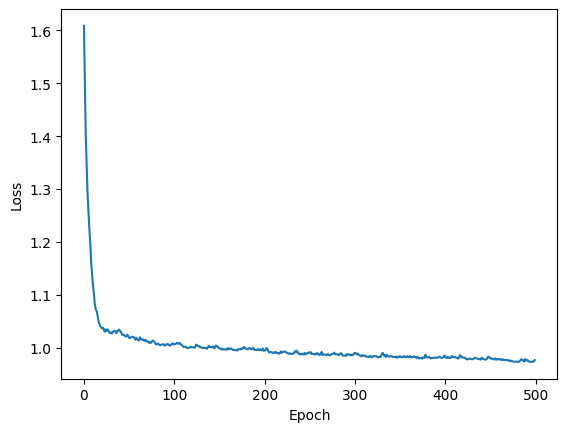

Test accuracy: 464.72903225806454
Accuracy: 0.4752688172043011
Precision: 0.5072608387070001
Recall: 0.47405964071720097
F1-score: 0.4856345197124738


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       495
           1       0.46      0.46      0.46       472
           2       0.32      0.41      0.36       449
           3       0.31      0.36      0.33       463
           4       0.75      0.56      0.64       446

    accuracy                           0.48      2325
   macro avg       0.51      0.47      0.49      2325
weighted avg       0.51      0.48      0.49      2325

                    0           1           2           3           4  \
precision    0.692308    0.459119    0.321555    0.309568    0.753754   
recall       0.581818    0.463983    0.405345    0.356371    0.562780   
f1-score     0.632272    0.461538    0.358621    0.331325    0.644416   
support    495.000000  472.000000  449.00000

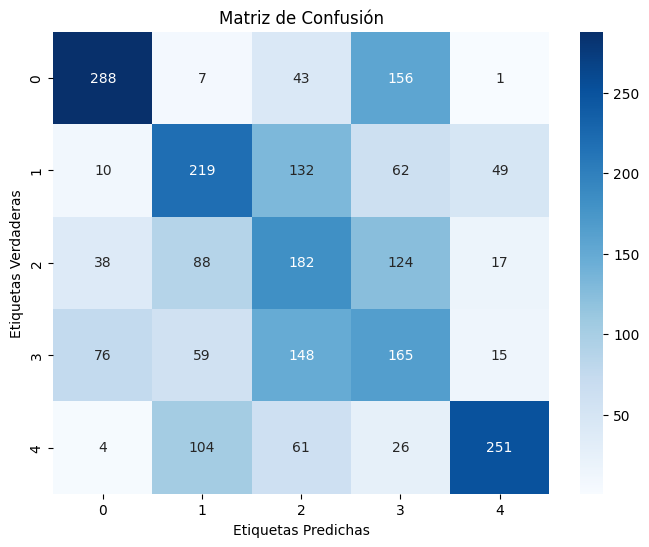

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_500_0.0001_0.1/resultados_500_0.0001_0.1.json
Procesando red con 500 epocas y 1e-05 de factor de aprendizaje y conjunto de entrenamiento 0.9


Procesando epocas:   0%|                                                             | 1/500 [00:17<2:21:40, 17.04s/it]

1.6093225044362685


Procesando epocas:   0%|▏                                                            | 2/500 [00:34<2:21:10, 17.01s/it]

1.6094368114190942


Procesando epocas:   1%|▎                                                            | 3/500 [00:51<2:20:50, 17.00s/it]

1.6093835143481985


Procesando epocas:   1%|▍                                                            | 4/500 [01:08<2:20:33, 17.00s/it]

1.6091239038635703


Procesando epocas:   1%|▌                                                            | 5/500 [01:25<2:21:13, 17.12s/it]

1.6083118424696081


Procesando epocas:   1%|▋                                                            | 6/500 [01:42<2:20:37, 17.08s/it]

1.606202514031354


Procesando epocas:   1%|▊                                                            | 7/500 [01:59<2:20:10, 17.06s/it]

1.6009120373164907


Procesando epocas:   2%|▉                                                            | 8/500 [02:16<2:20:03, 17.08s/it]

1.5839194788652309


Procesando epocas:   2%|█                                                            | 9/500 [02:33<2:19:38, 17.06s/it]

1.538129777768079


Procesando epocas:   2%|█▏                                                          | 10/500 [02:50<2:19:10, 17.04s/it]

1.491992296892054


Procesando epocas:   2%|█▎                                                          | 11/500 [03:07<2:18:47, 17.03s/it]

1.4657366661464466


Procesando epocas:   2%|█▍                                                          | 12/500 [03:24<2:18:30, 17.03s/it]

1.4451223976471845


Procesando epocas:   3%|█▌                                                          | 13/500 [03:41<2:18:15, 17.03s/it]

1.4297433874186347


Procesando epocas:   3%|█▋                                                          | 14/500 [03:58<2:18:06, 17.05s/it]

1.4129013615496018


Procesando epocas:   3%|█▊                                                          | 15/500 [04:15<2:17:43, 17.04s/it]

1.399418929043938


Procesando epocas:   3%|█▉                                                          | 16/500 [04:32<2:17:25, 17.04s/it]

1.3857850264100466


Procesando epocas:   3%|██                                                          | 17/500 [04:49<2:17:04, 17.03s/it]

1.3727094846613266


Procesando epocas:   4%|██▏                                                         | 18/500 [05:06<2:16:44, 17.02s/it]

1.3613970125422759


Procesando epocas:   4%|██▎                                                         | 19/500 [05:23<2:16:30, 17.03s/it]

1.3510625628864064


Procesando epocas:   4%|██▍                                                         | 20/500 [05:40<2:16:11, 17.02s/it]

1.3402095184606664


Procesando epocas:   4%|██▌                                                         | 21/500 [05:57<2:15:51, 17.02s/it]

1.329209742826574


Procesando epocas:   4%|██▋                                                         | 22/500 [06:14<2:15:34, 17.02s/it]

1.3163835693808164


Procesando epocas:   5%|██▊                                                         | 23/500 [06:31<2:15:15, 17.01s/it]

1.309396541118622


Procesando epocas:   5%|██▉                                                         | 24/500 [06:48<2:14:58, 17.01s/it]

1.299715513341567


Procesando epocas:   5%|███                                                         | 25/500 [07:05<2:14:48, 17.03s/it]

1.2852464668891008


Procesando epocas:   5%|███                                                         | 26/500 [07:22<2:14:32, 17.03s/it]

1.2816441171309527


Procesando epocas:   5%|███▏                                                        | 27/500 [07:39<2:14:11, 17.02s/it]

1.2754011154174805


Procesando epocas:   6%|███▎                                                        | 28/500 [07:56<2:13:51, 17.02s/it]

1.2653764703694512


Procesando epocas:   6%|███▍                                                        | 29/500 [08:13<2:13:33, 17.01s/it]

1.2537200682303484


Procesando epocas:   6%|███▌                                                        | 30/500 [08:30<2:13:19, 17.02s/it]

1.2452722766820121


Procesando epocas:   6%|███▋                                                        | 31/500 [08:48<2:13:04, 17.02s/it]

1.2393182593233445


Procesando epocas:   6%|███▊                                                        | 32/500 [09:05<2:12:46, 17.02s/it]

1.233191485264722


Procesando epocas:   7%|███▉                                                        | 33/500 [09:22<2:12:28, 17.02s/it]

1.2257857505012961


Procesando epocas:   7%|████                                                        | 34/500 [09:39<2:12:09, 17.02s/it]

1.2185334472095266


Procesando epocas:   7%|████▏                                                       | 35/500 [09:56<2:11:51, 17.01s/it]

1.2183768637040082


Procesando epocas:   7%|████▎                                                       | 36/500 [10:13<2:11:29, 17.00s/it]

1.204062411364387


Procesando epocas:   7%|████▍                                                       | 37/500 [10:30<2:11:17, 17.02s/it]

1.2021831442328061


Procesando epocas:   8%|████▌                                                       | 38/500 [10:47<2:10:57, 17.01s/it]

1.1937868139323067


Procesando epocas:   8%|████▋                                                       | 39/500 [11:04<2:11:25, 17.11s/it]

1.192216896309572


Procesando epocas:   8%|████▊                                                       | 40/500 [11:21<2:10:59, 17.09s/it]

1.183770026880152


Procesando epocas:   8%|████▉                                                       | 41/500 [11:38<2:10:33, 17.07s/it]

1.1757565898053786


Procesando epocas:   8%|█████                                                       | 42/500 [11:55<2:10:07, 17.05s/it]

1.1742648938122917


Procesando epocas:   9%|█████▏                                                      | 43/500 [12:12<2:09:50, 17.05s/it]

1.1690317413386178


Procesando epocas:   9%|█████▎                                                      | 44/500 [12:29<2:09:29, 17.04s/it]

1.1626723303514368


Procesando epocas:   9%|█████▍                                                      | 45/500 [12:46<2:09:08, 17.03s/it]

1.1538524298106922


Procesando epocas:   9%|█████▌                                                      | 46/500 [13:03<2:08:46, 17.02s/it]

1.1431566662648145


Procesando epocas:   9%|█████▋                                                      | 47/500 [13:20<2:08:27, 17.01s/it]

1.1438944494023042


Procesando epocas:  10%|█████▊                                                      | 48/500 [13:37<2:08:07, 17.01s/it]

1.1373062596601597


Procesando epocas:  10%|█████▉                                                      | 49/500 [13:54<2:07:51, 17.01s/it]

1.1346509049920475


Procesando epocas:  10%|██████                                                      | 50/500 [14:11<2:07:31, 17.00s/it]

1.130467082823024


Procesando epocas:  10%|██████                                                      | 51/500 [14:28<2:07:13, 17.00s/it]

1.1231163578874925


Procesando epocas:  10%|██████▏                                                     | 52/500 [14:45<2:06:56, 17.00s/it]

1.1204822610406315


Procesando epocas:  11%|██████▎                                                     | 53/500 [15:02<2:06:39, 17.00s/it]

1.1140821165898267


Procesando epocas:  11%|██████▍                                                     | 54/500 [15:19<2:06:22, 17.00s/it]

1.111041098833084


Procesando epocas:  11%|██████▌                                                     | 55/500 [15:36<2:06:06, 17.00s/it]

1.1054978668689728


Procesando epocas:  11%|██████▋                                                     | 56/500 [15:53<2:05:47, 17.00s/it]

1.1019489828278037


Procesando epocas:  11%|██████▊                                                     | 57/500 [16:10<2:05:30, 17.00s/it]

1.0945173270562116


Procesando epocas:  12%|██████▉                                                     | 58/500 [16:27<2:05:13, 17.00s/it]

1.095321859331692


Procesando epocas:  12%|███████                                                     | 59/500 [16:44<2:04:55, 17.00s/it]

1.0876755339257858


Procesando epocas:  12%|███████▏                                                    | 60/500 [17:01<2:04:39, 17.00s/it]

1.084692876479205


Procesando epocas:  12%|███████▎                                                    | 61/500 [17:18<2:04:23, 17.00s/it]

1.079451551507501


Procesando epocas:  12%|███████▍                                                    | 62/500 [17:35<2:04:06, 17.00s/it]

1.0767990540055667


Procesando epocas:  13%|███████▌                                                    | 63/500 [17:52<2:03:49, 17.00s/it]

1.0770537085392895


Procesando epocas:  13%|███████▋                                                    | 64/500 [18:09<2:03:34, 17.01s/it]

1.0743447997990776


Procesando epocas:  13%|███████▊                                                    | 65/500 [18:26<2:03:16, 17.00s/it]

1.0692761221352745


Procesando epocas:  13%|███████▉                                                    | 66/500 [18:43<2:02:59, 17.00s/it]

1.0646008705391603


Procesando epocas:  13%|████████                                                    | 67/500 [19:00<2:02:41, 17.00s/it]

1.065526292253943


Procesando epocas:  14%|████████▏                                                   | 68/500 [19:17<2:02:22, 17.00s/it]

1.0585199608522302


Procesando epocas:  14%|████████▎                                                   | 69/500 [19:34<2:02:04, 16.99s/it]

1.058911364919999


Procesando epocas:  14%|████████▍                                                   | 70/500 [19:51<2:01:49, 17.00s/it]

1.0548275880953846


Procesando epocas:  14%|████████▌                                                   | 71/500 [20:08<2:01:32, 17.00s/it]

1.046815062270445


Procesando epocas:  14%|████████▋                                                   | 72/500 [20:25<2:01:14, 17.00s/it]

1.0469059000996983


Procesando epocas:  15%|████████▊                                                   | 73/500 [20:42<2:00:59, 17.00s/it]

1.046934764174854


Procesando epocas:  15%|████████▉                                                   | 74/500 [20:59<2:00:55, 17.03s/it]

1.0455003079246072


Procesando epocas:  15%|█████████                                                   | 75/500 [21:16<2:01:04, 17.09s/it]

1.0469572382814745


Procesando epocas:  15%|█████████                                                   | 76/500 [21:33<2:00:47, 17.09s/it]

1.0408723087871776


Procesando epocas:  15%|█████████▏                                                  | 77/500 [21:51<2:00:55, 17.15s/it]

1.0397334807059344


Procesando epocas:  16%|█████████▎                                                  | 78/500 [22:08<2:01:13, 17.24s/it]

1.0366330735823688


Procesando epocas:  16%|█████████▍                                                  | 79/500 [22:26<2:01:52, 17.37s/it]

1.0352034326861888


Procesando epocas:  16%|█████████▌                                                  | 80/500 [22:44<2:02:13, 17.46s/it]

1.0346509162117452


Procesando epocas:  16%|█████████▋                                                  | 81/500 [23:01<2:01:31, 17.40s/it]

1.0303457417908837


Procesando epocas:  16%|█████████▊                                                  | 82/500 [23:18<2:00:27, 17.29s/it]

1.0329306202776292


Procesando epocas:  17%|█████████▉                                                  | 83/500 [23:35<1:59:32, 17.20s/it]

1.0291610717773438


Procesando epocas:  17%|██████████                                                  | 84/500 [23:52<1:58:33, 17.10s/it]

1.027389307933695


Procesando epocas:  17%|██████████▏                                                 | 85/500 [24:08<1:57:26, 16.98s/it]

1.0255719928180471


Procesando epocas:  17%|██████████▎                                                 | 86/500 [24:25<1:56:35, 16.90s/it]

1.0229617774486541


Procesando epocas:  17%|██████████▍                                                 | 87/500 [24:42<1:56:57, 16.99s/it]

1.0262071613003225


Procesando epocas:  18%|██████████▌                                                 | 88/500 [25:00<1:57:47, 17.15s/it]

1.0177569368306327


Procesando epocas:  18%|██████████▋                                                 | 89/500 [25:17<1:57:33, 17.16s/it]

1.0180036681539872


Procesando epocas:  18%|██████████▊                                                 | 90/500 [25:34<1:57:25, 17.18s/it]

1.018161522991517


Procesando epocas:  18%|██████████▉                                                 | 91/500 [25:52<1:57:57, 17.30s/it]

1.0183415458482854


Procesando epocas:  18%|███████████                                                 | 92/500 [26:12<2:02:57, 18.08s/it]

1.0146112077376421


Procesando epocas:  19%|███████████▏                                                | 93/500 [26:37<2:16:15, 20.09s/it]

1.0165270062053904


Procesando epocas:  19%|███████████▎                                                | 94/500 [27:03<2:29:44, 22.13s/it]

1.0142025007921107


Procesando epocas:  19%|███████████▍                                                | 95/500 [27:29<2:36:28, 23.18s/it]

1.0136984551654142


Procesando epocas:  19%|███████████▌                                                | 96/500 [27:54<2:38:53, 23.60s/it]

1.0122306992025936


Procesando epocas:  19%|███████████▋                                                | 97/500 [28:17<2:38:28, 23.59s/it]

1.0097437637693742


Procesando epocas:  20%|███████████▊                                                | 98/500 [28:40<2:36:22, 23.34s/it]

1.0100549817085267


Procesando epocas:  20%|███████████▉                                                | 99/500 [29:03<2:35:40, 23.29s/it]

1.0080863265430227


Procesando epocas:  20%|███████████▊                                               | 100/500 [29:26<2:34:29, 23.17s/it]

1.0081985179115744


Procesando epocas:  20%|███████████▉                                               | 101/500 [29:49<2:32:55, 23.00s/it]

1.0069661887253032


Procesando epocas:  20%|████████████                                               | 102/500 [30:12<2:33:12, 23.10s/it]

1.0056939233751858


Procesando epocas:  21%|████████████▏                                              | 103/500 [30:34<2:31:29, 22.90s/it]

1.003683633664075


Procesando epocas:  21%|████████████▎                                              | 104/500 [30:57<2:30:42, 22.83s/it]

1.0051281848374536


Procesando epocas:  21%|████████████▍                                              | 105/500 [31:20<2:29:53, 22.77s/it]

1.0055671811103821


Procesando epocas:  21%|████████████▌                                              | 106/500 [31:43<2:30:39, 22.94s/it]

1.0006907045841218


Procesando epocas:  21%|████████████▋                                              | 107/500 [32:05<2:29:18, 22.80s/it]

1.0001298175138587


Procesando epocas:  22%|████████████▋                                              | 108/500 [32:26<2:24:16, 22.08s/it]

1.0005815179908977


Procesando epocas:  22%|████████████▊                                              | 109/500 [32:47<2:21:01, 21.64s/it]

1.0015555188936345


Procesando epocas:  22%|████████████▉                                              | 110/500 [33:09<2:21:43, 21.80s/it]

0.9997711388503804


Procesando epocas:  22%|█████████████                                              | 111/500 [33:30<2:19:42, 21.55s/it]

1.0004582250819487


Procesando epocas:  22%|█████████████▏                                             | 112/500 [33:52<2:20:21, 21.70s/it]

0.9978190930450663


Procesando epocas:  23%|█████████████▎                                             | 113/500 [34:12<2:17:16, 21.28s/it]

0.9988554509247051


Procesando epocas:  23%|█████████████▍                                             | 114/500 [34:33<2:15:47, 21.11s/it]

0.99828720443389


Procesando epocas:  23%|█████████████▌                                             | 115/500 [34:52<2:11:55, 20.56s/it]

0.9962843113085803


Procesando epocas:  23%|█████████████▋                                             | 116/500 [35:12<2:10:54, 20.45s/it]

0.9956020264064565


Procesando epocas:  23%|█████████████▊                                             | 117/500 [35:33<2:11:27, 20.59s/it]

0.9954069375991821


Procesando epocas:  24%|█████████████▉                                             | 118/500 [35:55<2:13:24, 20.95s/it]

0.9954216259367326


Procesando epocas:  24%|██████████████                                             | 119/500 [36:16<2:14:09, 21.13s/it]

0.9947450167992535


Procesando epocas:  24%|██████████████▏                                            | 120/500 [36:37<2:12:48, 20.97s/it]

0.9964948264991536


Procesando epocas:  24%|██████████████▎                                            | 121/500 [36:57<2:10:28, 20.65s/it]

0.9955450587412891


Procesando epocas:  24%|██████████████▍                                            | 122/500 [37:16<2:06:55, 20.15s/it]

0.9938800313893487


Procesando epocas:  25%|██████████████▌                                            | 123/500 [37:36<2:06:37, 20.15s/it]

0.9931247195776771


Procesando epocas:  25%|██████████████▋                                            | 124/500 [37:55<2:03:52, 19.77s/it]

0.9935025155544281


Procesando epocas:  25%|██████████████▊                                            | 125/500 [38:14<2:01:59, 19.52s/it]

0.9935119022341335


Procesando epocas:  25%|██████████████▊                                            | 126/500 [38:32<1:59:23, 19.15s/it]

0.9916726960855372


Procesando epocas:  25%|██████████████▉                                            | 127/500 [38:50<1:56:52, 18.80s/it]

0.9916681826114655


Procesando epocas:  26%|███████████████                                            | 128/500 [39:08<1:55:10, 18.58s/it]

0.9937216204755447


Procesando epocas:  26%|███████████████▏                                           | 129/500 [39:27<1:54:28, 18.51s/it]

0.9914317078450147


Procesando epocas:  26%|███████████████▎                                           | 130/500 [39:45<1:54:45, 18.61s/it]

0.9935331071124357


Procesando epocas:  26%|███████████████▍                                           | 131/500 [40:05<1:55:26, 18.77s/it]

0.9927010658909293


Procesando epocas:  26%|███████████████▌                                           | 132/500 [40:24<1:56:21, 18.97s/it]

0.9917009448303896


Procesando epocas:  27%|███████████████▋                                           | 133/500 [40:43<1:56:22, 19.03s/it]

0.9916760630467358


Procesando epocas:  27%|███████████████▊                                           | 134/500 [41:01<1:54:30, 18.77s/it]

0.9906826983479893


Procesando epocas:  27%|███████████████▉                                           | 135/500 [41:19<1:52:41, 18.52s/it]

0.988619199219872


Procesando epocas:  27%|████████████████                                           | 136/500 [41:37<1:51:18, 18.35s/it]

0.9900719046592712


Procesando epocas:  27%|████████████████▏                                          | 137/500 [41:55<1:50:26, 18.25s/it]

0.987881658708348


Procesando epocas:  28%|████████████████▎                                          | 138/500 [42:13<1:49:22, 18.13s/it]

0.9902892119744244


Procesando epocas:  28%|████████████████▍                                          | 139/500 [42:31<1:48:36, 18.05s/it]

0.9880430803579443


Procesando epocas:  28%|████████████████▌                                          | 140/500 [42:49<1:47:57, 17.99s/it]

0.9886877957512351


Procesando epocas:  28%|████████████████▋                                          | 141/500 [43:07<1:47:41, 18.00s/it]

0.9887361663229325


Procesando epocas:  28%|████████████████▊                                          | 142/500 [43:25<1:46:55, 17.92s/it]

0.9887242219027351


Procesando epocas:  29%|████████████████▊                                          | 143/500 [43:43<1:47:56, 18.14s/it]

0.9874771332039552


Procesando epocas:  29%|████████████████▉                                          | 144/500 [44:01<1:47:01, 18.04s/it]

0.9884715402827543


Procesando epocas:  29%|█████████████████                                          | 145/500 [44:19<1:46:44, 18.04s/it]

0.986090429390178


Procesando epocas:  29%|█████████████████▏                                         | 146/500 [44:37<1:47:05, 18.15s/it]

0.986777702850454


Procesando epocas:  29%|█████████████████▎                                         | 147/500 [44:57<1:48:50, 18.50s/it]

0.9866780042648315


Procesando epocas:  30%|█████████████████▍                                         | 148/500 [45:16<1:49:57, 18.74s/it]

0.9860792100429535


Procesando epocas:  30%|█████████████████▌                                         | 149/500 [45:35<1:49:31, 18.72s/it]

0.987466366852031


Procesando epocas:  30%|█████████████████▋                                         | 150/500 [45:53<1:48:19, 18.57s/it]

0.9866426741375642


Procesando epocas:  30%|█████████████████▊                                         | 151/500 [46:13<1:49:50, 18.88s/it]

0.9863771901411169


Procesando epocas:  30%|█████████████████▉                                         | 152/500 [46:31<1:48:52, 18.77s/it]

0.9856788151404436


Procesando epocas:  31%|██████████████████                                         | 153/500 [46:49<1:47:50, 18.65s/it]

0.9862185825319851


Procesando epocas:  31%|██████████████████▏                                        | 154/500 [47:08<1:46:26, 18.46s/it]

0.9850348055362701


Procesando epocas:  31%|██████████████████▎                                        | 155/500 [47:25<1:45:09, 18.29s/it]

0.9851853703751283


Procesando epocas:  31%|██████████████████▍                                        | 156/500 [47:43<1:43:51, 18.12s/it]

0.9857823887292076


Procesando epocas:  31%|██████████████████▌                                        | 157/500 [48:01<1:42:37, 17.95s/it]

0.9840381506611319


Procesando epocas:  32%|██████████████████▋                                        | 158/500 [48:18<1:41:43, 17.85s/it]

0.983845869583242


Procesando epocas:  32%|██████████████████▊                                        | 159/500 [48:36<1:41:02, 17.78s/it]

0.9845116920330945


Procesando epocas:  32%|██████████████████▉                                        | 160/500 [48:54<1:40:30, 17.74s/it]

0.9856836311957415


Procesando epocas:  32%|██████████████████▉                                        | 161/500 [49:11<1:40:13, 17.74s/it]

0.982997093481176


Procesando epocas:  32%|███████████████████                                        | 162/500 [49:29<1:39:48, 17.72s/it]

0.9847656663726357


Procesando epocas:  33%|███████████████████▏                                       | 163/500 [49:47<1:39:31, 17.72s/it]

0.9846331298351287


Procesando epocas:  33%|███████████████████▎                                       | 164/500 [50:05<1:40:29, 17.94s/it]

0.9845388938398922


Procesando epocas:  33%|███████████████████▍                                       | 165/500 [50:23<1:39:33, 17.83s/it]

0.9838451266288757


Procesando epocas:  33%|███████████████████▌                                       | 166/500 [50:40<1:38:45, 17.74s/it]

0.9845868149224449


Procesando epocas:  33%|███████████████████▋                                       | 167/500 [50:58<1:38:16, 17.71s/it]

0.9834261312204249


Procesando epocas:  34%|███████████████████▊                                       | 168/500 [51:16<1:37:51, 17.69s/it]

0.9837157596560085


Procesando epocas:  34%|███████████████████▉                                       | 169/500 [51:33<1:37:14, 17.63s/it]

0.983112313116298


Procesando epocas:  34%|████████████████████                                       | 170/500 [51:51<1:38:24, 17.89s/it]

0.983244858419194


Procesando epocas:  34%|████████████████████▏                                      | 171/500 [52:11<1:40:08, 18.26s/it]

0.9820818687186522


Procesando epocas:  34%|████████████████████▎                                      | 172/500 [52:29<1:39:51, 18.27s/it]

0.9834481127121869


Procesando epocas:  35%|████████████████████▍                                      | 173/500 [52:47<1:38:46, 18.12s/it]

0.9841439415426815


Procesando epocas:  35%|████████████████████▌                                      | 174/500 [53:04<1:37:47, 18.00s/it]

0.9823496078743654


Procesando epocas:  35%|████████████████████▋                                      | 175/500 [53:22<1:36:55, 17.89s/it]

0.9811785336802987


Procesando epocas:  35%|████████████████████▊                                      | 176/500 [53:40<1:36:23, 17.85s/it]

0.9823502519551446


Procesando epocas:  35%|████████████████████▉                                      | 177/500 [53:58<1:36:13, 17.88s/it]

0.9810355880681206


Procesando epocas:  36%|█████████████████████                                      | 178/500 [54:16<1:36:45, 18.03s/it]

0.980307070647969


Procesando epocas:  36%|█████████████████████                                      | 179/500 [54:34<1:36:12, 17.98s/it]

0.9809199981829699


Procesando epocas:  36%|█████████████████████▏                                     | 180/500 [54:52<1:35:26, 17.90s/it]

0.9821716922170975


Procesando epocas:  36%|█████████████████████▎                                     | 181/500 [55:09<1:34:33, 17.78s/it]

0.9816159469239852


Procesando epocas:  36%|█████████████████████▍                                     | 182/500 [55:27<1:34:02, 17.74s/it]

0.9815242570989272


Procesando epocas:  37%|█████████████████████▌                                     | 183/500 [55:45<1:33:48, 17.76s/it]

0.97917921332752


Procesando epocas:  37%|█████████████████████▋                                     | 184/500 [56:03<1:33:41, 17.79s/it]

0.9810829537756303


Procesando epocas:  37%|█████████████████████▊                                     | 185/500 [56:21<1:34:00, 17.91s/it]

0.9801311563043034


Procesando epocas:  37%|█████████████████████▉                                     | 186/500 [56:40<1:35:15, 18.20s/it]

0.9800763088114122


Procesando epocas:  37%|██████████████████████                                     | 187/500 [56:58<1:35:54, 18.38s/it]

0.9800345210468068


Procesando epocas:  38%|██████████████████████▏                                    | 188/500 [57:16<1:34:03, 18.09s/it]

0.9798845298150006


Procesando epocas:  38%|██████████████████████▎                                    | 189/500 [57:33<1:33:00, 17.94s/it]

0.9807430751183454


Procesando epocas:  38%|██████████████████████▍                                    | 190/500 [57:51<1:31:59, 17.81s/it]

0.9795722477576312


Procesando epocas:  38%|██████████████████████▌                                    | 191/500 [58:08<1:31:07, 17.69s/it]

0.9801115323515499


Procesando epocas:  38%|██████████████████████▋                                    | 192/500 [58:26<1:30:30, 17.63s/it]

0.9796489757650039


Procesando epocas:  39%|██████████████████████▊                                    | 193/500 [58:43<1:29:48, 17.55s/it]

0.980216921077055


Procesando epocas:  39%|██████████████████████▉                                    | 194/500 [59:01<1:29:42, 17.59s/it]

0.9790587418219623


Procesando epocas:  39%|███████████████████████                                    | 195/500 [59:18<1:29:16, 17.56s/it]

0.9792469073744381


Procesando epocas:  39%|███████████████████████▏                                   | 196/500 [59:36<1:28:36, 17.49s/it]

0.978227765419904


Procesando epocas:  39%|███████████████████████▏                                   | 197/500 [59:53<1:28:05, 17.44s/it]

0.9798805573407341


Procesando epocas:  40%|██████████████████████▌                                  | 198/500 [1:00:10<1:27:46, 17.44s/it]

0.9794325172901154


Procesando epocas:  40%|██████████████████████▋                                  | 199/500 [1:00:28<1:27:29, 17.44s/it]

0.978458483429516


Procesando epocas:  40%|██████████████████████▊                                  | 200/500 [1:00:45<1:27:16, 17.46s/it]

0.9796359731870539


Procesando epocas:  40%|██████████████████████▉                                  | 201/500 [1:01:03<1:27:07, 17.48s/it]

0.9793293760103338


Procesando epocas:  40%|███████████████████████                                  | 202/500 [1:01:20<1:26:36, 17.44s/it]

0.9789288184222054


Procesando epocas:  41%|███████████████████████▏                                 | 203/500 [1:01:39<1:27:54, 17.76s/it]

0.9797156232244828


Procesando epocas:  41%|███████████████████████▎                                 | 204/500 [1:01:56<1:26:36, 17.55s/it]

0.9781865414451151


Procesando epocas:  41%|███████████████████████▎                                 | 205/500 [1:02:13<1:26:01, 17.50s/it]

0.9777115359025843


Procesando epocas:  41%|███████████████████████▍                                 | 206/500 [1:02:30<1:24:45, 17.30s/it]

0.9782138624612022


Procesando epocas:  41%|███████████████████████▌                                 | 207/500 [1:02:47<1:24:09, 17.24s/it]

0.978022697392632


Procesando epocas:  42%|███████████████████████▋                                 | 208/500 [1:03:04<1:23:11, 17.09s/it]

0.9785125003141515


Procesando epocas:  42%|███████████████████████▊                                 | 209/500 [1:03:21<1:22:24, 16.99s/it]

0.9772681842832004


Procesando epocas:  42%|███████████████████████▉                                 | 210/500 [1:03:37<1:21:50, 16.93s/it]

0.9775072623701656


Procesando epocas:  42%|████████████████████████                                 | 211/500 [1:03:54<1:21:15, 16.87s/it]

0.9789017186445348


Procesando epocas:  42%|████████████████████████▏                                | 212/500 [1:04:11<1:20:47, 16.83s/it]

0.9765524201533373


Procesando epocas:  43%|████████████████████████▎                                | 213/500 [1:04:28<1:20:29, 16.83s/it]

0.9775571963366341


Procesando epocas:  43%|████████████████████████▍                                | 214/500 [1:04:44<1:20:03, 16.79s/it]

0.977113974795622


Procesando epocas:  43%|████████████████████████▌                                | 215/500 [1:05:01<1:19:41, 16.78s/it]

0.9767581845031065


Procesando epocas:  43%|████████████████████████▌                                | 216/500 [1:05:18<1:19:28, 16.79s/it]

0.977300360623528


Procesando epocas:  43%|████████████████████████▋                                | 217/500 [1:05:35<1:19:13, 16.80s/it]

0.9755958564141217


Procesando epocas:  44%|████████████████████████▊                                | 218/500 [1:05:52<1:18:57, 16.80s/it]

0.9757781333783093


Procesando epocas:  44%|████████████████████████▉                                | 219/500 [1:06:08<1:18:45, 16.82s/it]

0.9763839889975156


Procesando epocas:  44%|█████████████████████████                                | 220/500 [1:06:26<1:19:04, 16.94s/it]

0.9764793978017919


Procesando epocas:  44%|█████████████████████████▏                               | 221/500 [1:06:43<1:18:47, 16.94s/it]

0.9764091617920819


Procesando epocas:  44%|█████████████████████████▎                               | 222/500 [1:07:00<1:18:33, 16.96s/it]

0.9753711279700784


Procesando epocas:  45%|█████████████████████████▍                               | 223/500 [1:07:17<1:18:21, 16.97s/it]

0.9752748471849105


Procesando epocas:  45%|█████████████████████████▌                               | 224/500 [1:07:34<1:17:57, 16.95s/it]

0.9763121871387257


Procesando epocas:  45%|█████████████████████████▋                               | 225/500 [1:07:51<1:17:52, 16.99s/it]

0.9749810281921836


Procesando epocas:  45%|█████████████████████████▊                               | 226/500 [1:08:08<1:17:36, 16.99s/it]

0.9751016189070308


Procesando epocas:  45%|█████████████████████████▉                               | 227/500 [1:08:25<1:17:34, 17.05s/it]

0.9756162092966192


Procesando epocas:  46%|█████████████████████████▉                               | 228/500 [1:08:42<1:17:44, 17.15s/it]

0.9756477355957032


Procesando epocas:  46%|██████████████████████████                               | 229/500 [1:08:59<1:17:27, 17.15s/it]

0.9759500103838303


Procesando epocas:  46%|██████████████████████████▏                              | 230/500 [1:09:16<1:17:10, 17.15s/it]

0.9754639047033646


Procesando epocas:  46%|██████████████████████████▎                              | 231/500 [1:09:34<1:16:50, 17.14s/it]

0.9767301657620598


Procesando epocas:  46%|██████████████████████████▍                              | 232/500 [1:09:51<1:16:33, 17.14s/it]

0.9753946647924535


Procesando epocas:  47%|██████████████████████████▌                              | 233/500 [1:10:08<1:16:06, 17.10s/it]

0.9759239926057703


Procesando epocas:  47%|██████████████████████████▋                              | 234/500 [1:10:25<1:16:01, 17.15s/it]

0.9756697093739229


Procesando epocas:  47%|██████████████████████████▊                              | 235/500 [1:10:42<1:15:38, 17.13s/it]

0.9749895074788262


Procesando epocas:  47%|██████████████████████████▉                              | 236/500 [1:10:59<1:15:16, 17.11s/it]

0.9738236939205843


Procesando epocas:  47%|███████████████████████████                              | 237/500 [1:11:16<1:14:59, 17.11s/it]

0.9740819857401006


Procesando epocas:  48%|███████████████████████████▏                             | 238/500 [1:11:33<1:14:38, 17.09s/it]

0.9751527516280903


Procesando epocas:  48%|███████████████████████████▏                             | 239/500 [1:11:50<1:14:18, 17.08s/it]

0.9756289068390341


Procesando epocas:  48%|███████████████████████████▎                             | 240/500 [1:12:07<1:14:00, 17.08s/it]

0.9742985269602608


Procesando epocas:  48%|███████████████████████████▍                             | 241/500 [1:12:25<1:13:42, 17.08s/it]

0.9755604757982141


Procesando epocas:  48%|███████████████████████████▌                             | 242/500 [1:12:42<1:13:23, 17.07s/it]

0.9745543160859276


Procesando epocas:  49%|███████████████████████████▋                             | 243/500 [1:12:59<1:13:12, 17.09s/it]

0.974861658671323


Procesando epocas:  49%|███████████████████████████▊                             | 244/500 [1:13:16<1:13:10, 17.15s/it]

0.974830281383851


Procesando epocas:  49%|███████████████████████████▉                             | 245/500 [1:13:33<1:12:57, 17.17s/it]

0.9739187734968522


Procesando epocas:  49%|████████████████████████████                             | 246/500 [1:13:50<1:12:31, 17.13s/it]

0.9736807321800905


Procesando epocas:  49%|████████████████████████████▏                            | 247/500 [1:14:07<1:12:09, 17.11s/it]

0.974998381207971


Procesando epocas:  50%|████████████████████████████▎                            | 248/500 [1:14:24<1:11:49, 17.10s/it]

0.9740724318167743


Procesando epocas:  50%|████████████████████████████▍                            | 249/500 [1:14:42<1:11:39, 17.13s/it]

0.9746494114398956


Procesando epocas:  50%|████████████████████████████▌                            | 250/500 [1:14:59<1:11:19, 17.12s/it]

0.975523088609471


Procesando epocas:  50%|████████████████████████████▌                            | 251/500 [1:15:16<1:10:55, 17.09s/it]

0.9750869873692007


Procesando epocas:  50%|████████████████████████████▋                            | 252/500 [1:15:33<1:10:36, 17.08s/it]

0.9751415382413303


Procesando epocas:  51%|████████████████████████████▊                            | 253/500 [1:15:50<1:10:12, 17.06s/it]

0.9739139802315656


Procesando epocas:  51%|████████████████████████████▉                            | 254/500 [1:16:07<1:09:55, 17.05s/it]

0.9750156714635737


Procesando epocas:  51%|█████████████████████████████                            | 255/500 [1:16:24<1:09:38, 17.06s/it]

0.9738086994956522


Procesando epocas:  51%|█████████████████████████████▏                           | 256/500 [1:16:41<1:09:19, 17.05s/it]

0.9745116665082819


Procesando epocas:  51%|█████████████████████████████▎                           | 257/500 [1:16:58<1:09:23, 17.13s/it]

0.9741629986202016


Procesando epocas:  52%|█████████████████████████████▍                           | 258/500 [1:17:16<1:09:20, 17.19s/it]

0.9737366195987253


Procesando epocas:  52%|█████████████████████████████▌                           | 259/500 [1:17:33<1:08:53, 17.15s/it]

0.9734718477024752


Procesando epocas:  52%|█████████████████████████████▋                           | 260/500 [1:17:50<1:08:32, 17.13s/it]

0.9735956686384538


Procesando epocas:  52%|█████████████████████████████▊                           | 261/500 [1:18:07<1:08:10, 17.12s/it]

0.9728771304382997


Procesando epocas:  52%|█████████████████████████████▊                           | 262/500 [1:18:24<1:07:47, 17.09s/it]

0.9732623222996207


Procesando epocas:  53%|█████████████████████████████▉                           | 263/500 [1:18:41<1:07:28, 17.08s/it]

0.9733809842782862


Procesando epocas:  53%|██████████████████████████████                           | 264/500 [1:18:58<1:07:10, 17.08s/it]

0.9749850101330702


Procesando epocas:  53%|██████████████████████████████▏                          | 265/500 [1:19:15<1:06:50, 17.06s/it]

0.9738081069553599


Procesando epocas:  53%|██████████████████████████████▎                          | 266/500 [1:19:32<1:06:48, 17.13s/it]

0.973457536276649


Procesando epocas:  53%|██████████████████████████████▍                          | 267/500 [1:19:50<1:06:42, 17.18s/it]

0.9731140290989595


Procesando epocas:  54%|██████████████████████████████▌                          | 268/500 [1:20:07<1:06:18, 17.15s/it]

0.9751270406386432


Procesando epocas:  54%|██████████████████████████████▋                          | 269/500 [1:20:24<1:05:57, 17.13s/it]

0.9741012324305142


Procesando epocas:  54%|██████████████████████████████▊                          | 270/500 [1:20:41<1:05:34, 17.11s/it]

0.9744718853165122


Procesando epocas:  54%|██████████████████████████████▉                          | 271/500 [1:20:58<1:05:13, 17.09s/it]

0.973501199834487


Procesando epocas:  54%|███████████████████████████████                          | 272/500 [1:21:15<1:04:52, 17.07s/it]

0.9743730681784013


Procesando epocas:  55%|███████████████████████████████                          | 273/500 [1:21:32<1:04:37, 17.08s/it]

0.9733633718069862


Procesando epocas:  55%|███████████████████████████████▏                         | 274/500 [1:21:49<1:04:21, 17.08s/it]

0.9738610229071449


Procesando epocas:  55%|███████████████████████████████▎                         | 275/500 [1:22:06<1:03:58, 17.06s/it]

0.9740166958640604


Procesando epocas:  55%|███████████████████████████████▍                         | 276/500 [1:22:23<1:03:57, 17.13s/it]

0.974993713463054


Procesando epocas:  55%|███████████████████████████████▌                         | 277/500 [1:22:41<1:03:46, 17.16s/it]

0.9738942237461314


Procesando epocas:  56%|███████████████████████████████▋                         | 278/500 [1:22:58<1:03:32, 17.17s/it]

0.9738592105753282


Procesando epocas:  56%|███████████████████████████████▊                         | 279/500 [1:23:15<1:03:09, 17.15s/it]

0.9736427664756775


Procesando epocas:  56%|███████████████████████████████▉                         | 280/500 [1:23:32<1:02:47, 17.12s/it]

0.9733039487810696


Procesando epocas:  56%|████████████████████████████████                         | 281/500 [1:23:49<1:02:26, 17.11s/it]

0.9737348384716932


Procesando epocas:  56%|████████████████████████████████▏                        | 282/500 [1:24:06<1:02:05, 17.09s/it]

0.9733736886697657


Procesando epocas:  57%|████████████████████████████████▎                        | 283/500 [1:24:23<1:01:43, 17.07s/it]

0.9740327992860008


Procesando epocas:  57%|████████████████████████████████▍                        | 284/500 [1:24:40<1:01:22, 17.05s/it]

0.9732929685536553


Procesando epocas:  57%|████████████████████████████████▍                        | 285/500 [1:24:57<1:01:10, 17.07s/it]

0.9737083056393792


Procesando epocas:  57%|████████████████████████████████▌                        | 286/500 [1:25:14<1:01:06, 17.13s/it]

0.9739961340146907


Procesando epocas:  57%|████████████████████████████████▋                        | 287/500 [1:25:32<1:00:55, 17.16s/it]

0.973564197736628


Procesando epocas:  58%|████████████████████████████████▊                        | 288/500 [1:25:49<1:00:33, 17.14s/it]

0.9722840775461757


Procesando epocas:  58%|████████████████████████████████▉                        | 289/500 [1:26:06<1:00:10, 17.11s/it]

0.9737246544922099


Procesando epocas:  58%|██████████████████████████████████▏                        | 290/500 [1:26:23<59:49, 17.09s/it]

0.9733652044745053


Procesando epocas:  58%|██████████████████████████████████▎                        | 291/500 [1:26:40<59:30, 17.08s/it]

0.9728498038123635


Procesando epocas:  58%|██████████████████████████████████▍                        | 292/500 [1:26:57<59:13, 17.08s/it]

0.9733845696729773


Procesando epocas:  59%|██████████████████████████████████▌                        | 293/500 [1:27:14<58:54, 17.07s/it]

0.9726356183781343


Procesando epocas:  59%|██████████████████████████████████▋                        | 294/500 [1:27:31<58:32, 17.05s/it]

0.9727983078535866


Procesando epocas:  59%|██████████████████████████████████▊                        | 295/500 [1:27:48<58:18, 17.07s/it]

0.9731163389542523


Procesando epocas:  59%|██████████████████████████████████▉                        | 296/500 [1:28:05<58:00, 17.06s/it]

0.972716244879891


Procesando epocas:  59%|███████████████████████████████████                        | 297/500 [1:28:22<57:43, 17.06s/it]

0.9730265841764563


Procesando epocas:  60%|███████████████████████████████████▏                       | 298/500 [1:28:39<57:27, 17.07s/it]

0.9744547591489904


Procesando epocas:  60%|███████████████████████████████████▎                       | 299/500 [1:28:57<57:23, 17.13s/it]

0.9725602335789625


Procesando epocas:  60%|███████████████████████████████████▍                       | 300/500 [1:29:14<57:16, 17.18s/it]

0.9731169125613044


Procesando epocas:  60%|███████████████████████████████████▌                       | 301/500 [1:29:31<56:52, 17.15s/it]

0.9725699852494633


Procesando epocas:  60%|███████████████████████████████████▋                       | 302/500 [1:29:48<56:29, 17.12s/it]

0.9714705628507277


Procesando epocas:  61%|███████████████████████████████████▊                       | 303/500 [1:30:05<56:10, 17.11s/it]

0.9730106567635256


Procesando epocas:  61%|███████████████████████████████████▊                       | 304/500 [1:30:22<55:53, 17.11s/it]

0.9734401527573081


Procesando epocas:  61%|███████████████████████████████████▉                       | 305/500 [1:30:39<55:33, 17.10s/it]

0.9723317181362825


Procesando epocas:  61%|████████████████████████████████████                       | 306/500 [1:30:56<55:16, 17.09s/it]

0.9730647613020504


Procesando epocas:  61%|████████████████████████████████████▏                      | 307/500 [1:31:13<54:57, 17.09s/it]

0.9732111688922434


Procesando epocas:  62%|████████████████████████████████████▎                      | 308/500 [1:31:31<54:39, 17.08s/it]

0.9731817256001866


Procesando epocas:  62%|████████████████████████████████████▍                      | 309/500 [1:31:48<54:22, 17.08s/it]

0.9723321486921871


Procesando epocas:  62%|████████████████████████████████████▌                      | 310/500 [1:32:05<54:01, 17.06s/it]

0.9717698426807628


Procesando epocas:  62%|████████████████████████████████████▋                      | 311/500 [1:32:22<53:45, 17.06s/it]

0.9730816816582399


Procesando epocas:  62%|████████████████████████████████████▊                      | 312/500 [1:32:39<53:27, 17.06s/it]

0.9720791683477514


Procesando epocas:  63%|████████████████████████████████████▉                      | 313/500 [1:32:56<53:09, 17.06s/it]

0.9717513158040888


Procesando epocas:  63%|█████████████████████████████████████                      | 314/500 [1:33:13<52:51, 17.05s/it]

0.9726837091586169


Procesando epocas:  63%|█████████████████████████████████████▏                     | 315/500 [1:33:30<52:35, 17.06s/it]

0.9726501342128305


Procesando epocas:  63%|█████████████████████████████████████▎                     | 316/500 [1:33:47<52:30, 17.12s/it]

0.9726630841984468


Procesando epocas:  63%|█████████████████████████████████████▍                     | 317/500 [1:34:04<52:14, 17.13s/it]

0.9714863430051243


Procesando epocas:  64%|█████████████████████████████████████▌                     | 318/500 [1:34:21<51:55, 17.12s/it]

0.9720753182383145


Procesando epocas:  64%|█████████████████████████████████████▋                     | 319/500 [1:34:39<51:37, 17.11s/it]

0.9722851350026972


Procesando epocas:  64%|█████████████████████████████████████▊                     | 320/500 [1:34:56<51:21, 17.12s/it]

0.9729834030656254


Procesando epocas:  64%|█████████████████████████████████████▉                     | 321/500 [1:35:13<51:01, 17.10s/it]

0.9718358839259428


Procesando epocas:  64%|█████████████████████████████████████▉                     | 322/500 [1:35:30<50:44, 17.11s/it]

0.9726027064463671


Procesando epocas:  65%|██████████████████████████████████████                     | 323/500 [1:35:47<50:26, 17.10s/it]

0.9723596124088063


Procesando epocas:  65%|██████████████████████████████████████▏                    | 324/500 [1:36:04<50:09, 17.10s/it]

0.9721775437102599


Procesando epocas:  65%|██████████████████████████████████████▎                    | 325/500 [1:36:21<49:52, 17.10s/it]

0.9730131075662725


Procesando epocas:  65%|██████████████████████████████████████▍                    | 326/500 [1:36:38<49:32, 17.08s/it]

0.9728581053369185


Procesando epocas:  65%|██████████████████████████████████████▌                    | 327/500 [1:36:55<49:16, 17.09s/it]

0.9713910225559683


Procesando epocas:  66%|██████████████████████████████████████▋                    | 328/500 [1:37:12<48:57, 17.08s/it]

0.9721221990445081


Procesando epocas:  66%|██████████████████████████████████████▊                    | 329/500 [1:37:29<48:39, 17.07s/it]

0.9720389702740837


Procesando epocas:  66%|██████████████████████████████████████▉                    | 330/500 [1:37:46<48:22, 17.07s/it]

0.9718191837563234


Procesando epocas:  66%|███████████████████████████████████████                    | 331/500 [1:38:04<48:06, 17.08s/it]

0.9709358425701365


Procesando epocas:  66%|███████████████████████████████████████▏                   | 332/500 [1:38:21<47:58, 17.13s/it]

0.9718469475998598


Procesando epocas:  67%|███████████████████████████████████████▎                   | 333/500 [1:38:38<47:40, 17.13s/it]

0.9724177560385536


Procesando epocas:  67%|███████████████████████████████████████▍                   | 334/500 [1:38:55<47:21, 17.12s/it]

0.9725421972134534


Procesando epocas:  67%|███████████████████████████████████████▌                   | 335/500 [1:39:12<47:00, 17.09s/it]

0.9716955784489126


Procesando epocas:  67%|███████████████████████████████████████▋                   | 336/500 [1:39:29<46:42, 17.09s/it]

0.9720054331947775


Procesando epocas:  67%|███████████████████████████████████████▊                   | 337/500 [1:39:46<46:23, 17.08s/it]

0.9713817266856923


Procesando epocas:  68%|███████████████████████████████████████▉                   | 338/500 [1:40:03<46:05, 17.07s/it]

0.9725117490572088


Procesando epocas:  68%|████████████████████████████████████████                   | 339/500 [1:40:20<45:49, 17.07s/it]

0.9719950563767377


Procesando epocas:  68%|████████████████████████████████████████                   | 340/500 [1:40:37<45:30, 17.07s/it]

0.97304308274213


Procesando epocas:  68%|████████████████████████████████████████▏                  | 341/500 [1:40:54<45:14, 17.07s/it]

0.9719317187281216


Procesando epocas:  68%|████████████████████████████████████████▎                  | 342/500 [1:41:12<44:58, 17.08s/it]

0.9720466354314019


Procesando epocas:  69%|████████████████████████████████████████▍                  | 343/500 [1:41:29<44:40, 17.07s/it]

0.9724077932974872


Procesando epocas:  69%|████████████████████████████████████████▌                  | 344/500 [1:41:46<44:22, 17.06s/it]

0.97150598413804


Procesando epocas:  69%|████████████████████████████████████████▋                  | 345/500 [1:42:03<44:07, 17.08s/it]

0.9714619072044597


Procesando epocas:  69%|████████████████████████████████████████▊                  | 346/500 [1:42:20<43:49, 17.08s/it]

0.9718803188380073


Procesando epocas:  69%|████████████████████████████████████████▉                  | 347/500 [1:42:37<43:32, 17.07s/it]

0.9715208902078516


Procesando epocas:  70%|█████████████████████████████████████████                  | 348/500 [1:42:54<43:16, 17.08s/it]

0.9717516566024107


Procesando epocas:  70%|█████████████████████████████████████████▏                 | 349/500 [1:43:11<42:56, 17.06s/it]

0.9715983064735637


Procesando epocas:  70%|█████████████████████████████████████████▎                 | 350/500 [1:43:28<42:39, 17.06s/it]

0.9718628213686101


Procesando epocas:  70%|█████████████████████████████████████████▍                 | 351/500 [1:43:45<42:21, 17.06s/it]

0.9720118771581089


Procesando epocas:  70%|█████████████████████████████████████████▌                 | 352/500 [1:44:02<42:07, 17.08s/it]

0.9708645473508274


Procesando epocas:  71%|█████████████████████████████████████████▋                 | 353/500 [1:44:19<41:49, 17.07s/it]

0.972048626577153


Procesando epocas:  71%|█████████████████████████████████████████▊                 | 354/500 [1:44:36<41:30, 17.06s/it]

0.9715475236668306


Procesando epocas:  71%|█████████████████████████████████████████▉                 | 355/500 [1:44:53<41:14, 17.07s/it]

0.9724538214066449


Procesando epocas:  71%|██████████████████████████████████████████                 | 356/500 [1:45:10<40:55, 17.05s/it]

0.9723048627376556


Procesando epocas:  71%|██████████████████████████████████████████▏                | 357/500 [1:45:28<40:38, 17.06s/it]

0.9720976002076093


Procesando epocas:  72%|██████████████████████████████████████████▏                | 358/500 [1:45:45<40:20, 17.05s/it]

0.9723111064995036


Procesando epocas:  72%|██████████████████████████████████████████▎                | 359/500 [1:46:02<40:04, 17.05s/it]

0.9714100343339583


Procesando epocas:  72%|██████████████████████████████████████████▍                | 360/500 [1:46:19<39:46, 17.05s/it]

0.9707515169592464


Procesando epocas:  72%|██████████████████████████████████████████▌                | 361/500 [1:46:36<39:30, 17.06s/it]

0.9712923014865202


Procesando epocas:  72%|██████████████████████████████████████████▋                | 362/500 [1:46:53<39:15, 17.07s/it]

0.9711327405536876


Procesando epocas:  73%|██████████████████████████████████████████▊                | 363/500 [1:47:10<38:58, 17.07s/it]

0.9721555040163152


Procesando epocas:  73%|██████████████████████████████████████████▉                | 364/500 [1:47:27<38:40, 17.06s/it]

0.9711697340011597


Procesando epocas:  73%|███████████████████████████████████████████                | 365/500 [1:47:44<38:22, 17.06s/it]

0.9709976189276751


Procesando epocas:  73%|███████████████████████████████████████████▏               | 366/500 [1:48:01<38:07, 17.07s/it]

0.9719169995364021


Procesando epocas:  73%|███████████████████████████████████████████▎               | 367/500 [1:48:18<37:49, 17.07s/it]

0.9714926376062281


Procesando epocas:  74%|███████████████████████████████████████████▍               | 368/500 [1:48:35<37:32, 17.07s/it]

0.9711367792942944


Procesando epocas:  74%|███████████████████████████████████████████▌               | 369/500 [1:48:52<37:16, 17.07s/it]

0.9709785528042737


Procesando epocas:  74%|███████████████████████████████████████████▋               | 370/500 [1:49:09<36:58, 17.06s/it]

0.971473213854958


Procesando epocas:  74%|███████████████████████████████████████████▊               | 371/500 [1:49:26<36:39, 17.05s/it]

0.9718949819312376


Procesando epocas:  74%|███████████████████████████████████████████▉               | 372/500 [1:49:43<36:22, 17.05s/it]

0.9717947367359611


Procesando epocas:  75%|████████████████████████████████████████████               | 373/500 [1:50:00<36:05, 17.05s/it]

0.9712321362074684


Procesando epocas:  75%|████████████████████████████████████████████▏              | 374/500 [1:50:18<35:49, 17.06s/it]

0.9713370210984174


Procesando epocas:  75%|████████████████████████████████████████████▎              | 375/500 [1:50:35<35:31, 17.05s/it]

0.9716588465606465


Procesando epocas:  75%|████████████████████████████████████████████▎              | 376/500 [1:50:52<35:15, 17.06s/it]

0.9706531096907223


Procesando epocas:  75%|████████████████████████████████████████████▍              | 377/500 [1:51:09<34:59, 17.07s/it]

0.971540580777561


Procesando epocas:  76%|████████████████████████████████████████████▌              | 378/500 [1:51:26<34:41, 17.06s/it]

0.9711205570136799


Procesando epocas:  76%|████████████████████████████████████████████▋              | 379/500 [1:51:43<34:24, 17.06s/it]

0.9718627302085652


Procesando epocas:  76%|████████████████████████████████████████████▊              | 380/500 [1:52:00<34:07, 17.07s/it]

0.9710004820543177


Procesando epocas:  76%|████████████████████████████████████████████▉              | 381/500 [1:52:17<33:48, 17.05s/it]

0.9718664961702683


Procesando epocas:  76%|█████████████████████████████████████████████              | 382/500 [1:52:34<33:32, 17.05s/it]

0.9702776186606463


Procesando epocas:  77%|█████████████████████████████████████████████▏             | 383/500 [1:52:51<33:14, 17.05s/it]

0.9718012511730194


Procesando epocas:  77%|█████████████████████████████████████████████▎             | 384/500 [1:53:08<32:59, 17.06s/it]

0.9703678316929761


Procesando epocas:  77%|█████████████████████████████████████████████▍             | 385/500 [1:53:25<32:40, 17.05s/it]

0.9710924152065726


Procesando epocas:  77%|█████████████████████████████████████████████▌             | 386/500 [1:53:42<32:23, 17.05s/it]

0.9711274339872248


Procesando epocas:  77%|█████████████████████████████████████████████▋             | 387/500 [1:53:59<32:12, 17.10s/it]

0.9711704240125768


Procesando epocas:  78%|█████████████████████████████████████████████▊             | 388/500 [1:54:16<31:53, 17.09s/it]

0.9708342738011304


Procesando epocas:  78%|█████████████████████████████████████████████▉             | 389/500 [1:54:34<31:35, 17.08s/it]

0.9711961858412799


Procesando epocas:  78%|██████████████████████████████████████████████             | 390/500 [1:54:51<31:17, 17.07s/it]

0.9714001171729144


Procesando epocas:  78%|██████████████████████████████████████████████▏            | 391/500 [1:55:08<31:00, 17.07s/it]

0.9710269419585957


Procesando epocas:  78%|██████████████████████████████████████████████▎            | 392/500 [1:55:25<30:41, 17.05s/it]

0.9705438179128311


Procesando epocas:  79%|██████████████████████████████████████████████▎            | 393/500 [1:55:42<30:24, 17.05s/it]

0.9707534323720372


Procesando epocas:  79%|██████████████████████████████████████████████▍            | 394/500 [1:55:59<30:08, 17.06s/it]

0.970897202982622


Procesando epocas:  79%|██████████████████████████████████████████████▌            | 395/500 [1:56:16<29:51, 17.07s/it]

0.9705737752072952


Procesando epocas:  79%|██████████████████████████████████████████████▋            | 396/500 [1:56:33<29:33, 17.05s/it]

0.9699562149889329


Procesando epocas:  79%|██████████████████████████████████████████████▊            | 397/500 [1:56:50<29:17, 17.06s/it]

0.9702860008267795


Procesando epocas:  80%|██████████████████████████████████████████████▉            | 398/500 [1:57:07<29:00, 17.06s/it]

0.9704925859675688


Procesando epocas:  80%|███████████████████████████████████████████████            | 399/500 [1:57:24<28:41, 17.05s/it]

0.9709118190933677


Procesando epocas:  80%|███████████████████████████████████████████████▏           | 400/500 [1:57:41<28:24, 17.05s/it]

0.9703397389720468


Procesando epocas:  80%|███████████████████████████████████████████████▎           | 401/500 [1:57:58<28:08, 17.06s/it]

0.9717533188707689


Procesando epocas:  80%|███████████████████████████████████████████████▍           | 402/500 [1:58:15<27:51, 17.06s/it]

0.9709539939375484


Procesando epocas:  81%|███████████████████████████████████████████████▌           | 403/500 [1:58:32<27:35, 17.07s/it]

0.9709478932268479


Procesando epocas:  81%|███████████████████████████████████████████████▋           | 404/500 [1:58:49<27:18, 17.07s/it]

0.9705169674228219


Procesando epocas:  81%|███████████████████████████████████████████████▊           | 405/500 [1:59:07<27:02, 17.08s/it]

0.9718435445252587


Procesando epocas:  81%|███████████████████████████████████████████████▉           | 406/500 [1:59:24<26:45, 17.08s/it]

0.9703957277185776


Procesando epocas:  81%|████████████████████████████████████████████████           | 407/500 [1:59:41<26:27, 17.07s/it]

0.970629263976041


Procesando epocas:  82%|████████████████████████████████████████████████▏          | 408/500 [1:59:58<26:10, 17.07s/it]

0.9710849043200998


Procesando epocas:  82%|████████████████████████████████████████████████▎          | 409/500 [2:00:15<25:53, 17.07s/it]

0.9709828965804156


Procesando epocas:  82%|████████████████████████████████████████████████▍          | 410/500 [2:00:32<25:36, 17.08s/it]

0.9712875162853915


Procesando epocas:  82%|████████████████████████████████████████████████▍          | 411/500 [2:00:49<25:19, 17.07s/it]

0.9711645624216865


Procesando epocas:  82%|████████████████████████████████████████████████▌          | 412/500 [2:01:06<25:03, 17.08s/it]

0.9717477847548092


Procesando epocas:  83%|████████████████████████████████████████████████▋          | 413/500 [2:01:23<24:45, 17.08s/it]

0.971183540540583


Procesando epocas:  83%|████████████████████████████████████████████████▊          | 414/500 [2:01:40<24:27, 17.07s/it]

0.9701188059414134


Procesando epocas:  83%|████████████████████████████████████████████████▉          | 415/500 [2:01:57<24:10, 17.06s/it]

0.9707601578796611


Procesando epocas:  83%|█████████████████████████████████████████████████          | 416/500 [2:02:14<23:54, 17.07s/it]

0.9704295021646163


Procesando epocas:  83%|█████████████████████████████████████████████████▏         | 417/500 [2:02:31<23:35, 17.06s/it]

0.9704953912426444


Procesando epocas:  84%|█████████████████████████████████████████████████▎         | 418/500 [2:02:48<23:19, 17.06s/it]

0.9699184484341565


Procesando epocas:  84%|█████████████████████████████████████████████████▍         | 419/500 [2:03:05<23:01, 17.06s/it]

0.9703107097569634


Procesando epocas:  84%|█████████████████████████████████████████████████▌         | 420/500 [2:03:23<22:44, 17.06s/it]

0.9704986046342289


Procesando epocas:  84%|█████████████████████████████████████████████████▋         | 421/500 [2:03:40<22:28, 17.07s/it]

0.9709543785628151


Procesando epocas:  84%|█████████████████████████████████████████████████▊         | 422/500 [2:03:57<22:10, 17.06s/it]

0.9700280147440293


Procesando epocas:  85%|█████████████████████████████████████████████████▉         | 423/500 [2:04:14<21:53, 17.06s/it]

0.9703700114698971


Procesando epocas:  85%|██████████████████████████████████████████████████         | 424/500 [2:04:31<21:35, 17.05s/it]

0.9700414724209729


Procesando epocas:  85%|██████████████████████████████████████████████████▏        | 425/500 [2:04:48<21:18, 17.05s/it]

0.9700445017393897


Procesando epocas:  85%|██████████████████████████████████████████████████▎        | 426/500 [2:05:05<21:02, 17.06s/it]

0.9706337974351995


Procesando epocas:  85%|██████████████████████████████████████████████████▍        | 427/500 [2:05:22<20:45, 17.06s/it]

0.9708828908555648


Procesando epocas:  86%|██████████████████████████████████████████████████▌        | 428/500 [2:05:39<20:28, 17.06s/it]

0.9701969627071829


Procesando epocas:  86%|██████████████████████████████████████████████████▌        | 429/500 [2:05:56<20:11, 17.06s/it]

0.9704819419804741


Procesando epocas:  86%|██████████████████████████████████████████████████▋        | 430/500 [2:06:13<19:54, 17.06s/it]

0.9697751813075122


Procesando epocas:  86%|██████████████████████████████████████████████████▊        | 431/500 [2:06:30<19:37, 17.06s/it]

0.9704106527216294


Procesando epocas:  86%|██████████████████████████████████████████████████▉        | 432/500 [2:06:47<19:20, 17.07s/it]

0.9695481289835537


Procesando epocas:  87%|███████████████████████████████████████████████████        | 433/500 [2:07:04<19:04, 17.08s/it]

0.9697003673104679


Procesando epocas:  87%|███████████████████████████████████████████████████▏       | 434/500 [2:07:21<18:47, 17.08s/it]

0.9690718005685245


Procesando epocas:  87%|███████████████████████████████████████████████████▎       | 435/500 [2:07:39<18:29, 17.07s/it]

0.9702389699571273


Procesando epocas:  87%|███████████████████████████████████████████████████▍       | 436/500 [2:07:56<18:12, 17.07s/it]

0.9712266119087444


Procesando epocas:  87%|███████████████████████████████████████████████████▌       | 437/500 [2:08:13<17:54, 17.06s/it]

0.9697694105260513


Procesando epocas:  88%|███████████████████████████████████████████████████▋       | 438/500 [2:08:30<17:38, 17.07s/it]

0.9700881638947655


Procesando epocas:  88%|███████████████████████████████████████████████████▊       | 439/500 [2:08:47<17:21, 17.07s/it]

0.9704130046507892


Procesando epocas:  88%|███████████████████████████████████████████████████▉       | 440/500 [2:09:04<17:04, 17.07s/it]

0.970245041216121


Procesando epocas:  88%|████████████████████████████████████████████████████       | 441/500 [2:09:21<16:46, 17.06s/it]

0.9698145508766174


Procesando epocas:  88%|████████████████████████████████████████████████████▏      | 442/500 [2:09:38<16:29, 17.06s/it]

0.970308250539443


Procesando epocas:  89%|████████████████████████████████████████████████████▎      | 443/500 [2:09:55<16:12, 17.07s/it]

0.9705370338524089


Procesando epocas:  89%|████████████████████████████████████████████████████▍      | 444/500 [2:10:12<15:55, 17.06s/it]

0.9706407617120182


Procesando epocas:  89%|████████████████████████████████████████████████████▌      | 445/500 [2:10:29<15:38, 17.06s/it]

0.9702907383441925


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 446/500 [2:10:46<15:21, 17.06s/it]

0.9699808976229499


Procesando epocas:  89%|████████████████████████████████████████████████████▋      | 447/500 [2:11:03<15:04, 17.07s/it]

0.9703253928352805


Procesando epocas:  90%|████████████████████████████████████████████████████▊      | 448/500 [2:11:20<14:47, 17.07s/it]

0.9698371750466964


Procesando epocas:  90%|████████████████████████████████████████████████████▉      | 449/500 [2:11:37<14:30, 17.06s/it]

0.9695917017319623


Procesando epocas:  90%|█████████████████████████████████████████████████████      | 450/500 [2:11:54<14:13, 17.07s/it]

0.9695371003711925


Procesando epocas:  90%|█████████████████████████████████████████████████████▏     | 451/500 [2:12:12<13:55, 17.06s/it]

0.9695091058226193


Procesando epocas:  90%|█████████████████████████████████████████████████████▎     | 452/500 [2:12:29<13:38, 17.06s/it]

0.9701186814728905


Procesando epocas:  91%|█████████████████████████████████████████████████████▍     | 453/500 [2:12:46<13:21, 17.06s/it]

0.9696047428776237


Procesando epocas:  91%|█████████████████████████████████████████████████████▌     | 454/500 [2:13:03<13:04, 17.05s/it]

0.969593019695843


Procesando epocas:  91%|█████████████████████████████████████████████████████▋     | 455/500 [2:13:20<12:47, 17.05s/it]

0.969480299949646


Procesando epocas:  91%|█████████████████████████████████████████████████████▊     | 456/500 [2:13:37<12:30, 17.05s/it]

0.9696614318034228


Procesando epocas:  91%|█████████████████████████████████████████████████████▉     | 457/500 [2:13:54<12:13, 17.07s/it]

0.9702569113058203


Procesando epocas:  92%|██████████████████████████████████████████████████████     | 458/500 [2:14:11<11:56, 17.07s/it]

0.969893141003216


Procesando epocas:  92%|██████████████████████████████████████████████████████▏    | 459/500 [2:14:28<11:39, 17.06s/it]

0.9697480264831991


Procesando epocas:  92%|██████████████████████████████████████████████████████▎    | 460/500 [2:14:45<11:22, 17.07s/it]

0.9705711452399983


Procesando epocas:  92%|██████████████████████████████████████████████████████▍    | 461/500 [2:15:02<11:05, 17.07s/it]

0.9698960675912744


Procesando epocas:  92%|██████████████████████████████████████████████████████▌    | 462/500 [2:15:19<10:48, 17.07s/it]

0.9695447150398703


Procesando epocas:  93%|██████████████████████████████████████████████████████▋    | 463/500 [2:15:36<10:31, 17.07s/it]

0.9693240530350629


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 464/500 [2:15:53<10:14, 17.07s/it]

0.9692458307041841


Procesando epocas:  93%|██████████████████████████████████████████████████████▊    | 465/500 [2:16:10<09:57, 17.07s/it]

0.9699996786959031


Procesando epocas:  93%|██████████████████████████████████████████████████████▉    | 466/500 [2:16:28<09:40, 17.07s/it]

0.9691210266421822


Procesando epocas:  93%|███████████████████████████████████████████████████████    | 467/500 [2:16:45<09:23, 17.07s/it]

0.9692998882602243


Procesando epocas:  94%|███████████████████████████████████████████████████████▏   | 468/500 [2:17:02<09:06, 17.07s/it]

0.9689893978483537


Procesando epocas:  94%|███████████████████████████████████████████████████████▎   | 469/500 [2:17:19<08:49, 17.09s/it]

0.9692391697098227


Procesando epocas:  94%|███████████████████████████████████████████████████████▍   | 470/500 [2:17:36<08:32, 17.08s/it]

0.9696343485046836


Procesando epocas:  94%|███████████████████████████████████████████████████████▌   | 471/500 [2:17:53<08:15, 17.08s/it]

0.9695551083368413


Procesando epocas:  94%|███████████████████████████████████████████████████████▋   | 472/500 [2:18:10<07:58, 17.07s/it]

0.969129573247012


Procesando epocas:  95%|███████████████████████████████████████████████████████▊   | 473/500 [2:18:27<07:40, 17.07s/it]

0.9689356400686152


Procesando epocas:  95%|███████████████████████████████████████████████████████▉   | 474/500 [2:18:44<07:24, 17.08s/it]

0.9691376875428592


Procesando epocas:  95%|████████████████████████████████████████████████████████   | 475/500 [2:19:01<07:06, 17.07s/it]

0.9691436241654788


Procesando epocas:  95%|████████████████████████████████████████████████████████▏  | 476/500 [2:19:18<06:49, 17.07s/it]

0.9687170179451213


Procesando epocas:  95%|████████████████████████████████████████████████████████▎  | 477/500 [2:19:35<06:32, 17.07s/it]

0.9690868998275084


Procesando epocas:  96%|████████████████████████████████████████████████████████▍  | 478/500 [2:19:52<06:15, 17.06s/it]

0.9687170032192679


Procesando epocas:  96%|████████████████████████████████████████████████████████▌  | 479/500 [2:20:09<05:58, 17.06s/it]

0.969159295278437


Procesando epocas:  96%|████████████████████████████████████████████████████████▋  | 480/500 [2:20:26<05:40, 17.05s/it]

0.968672864927965


Procesando epocas:  96%|████████████████████████████████████████████████████████▊  | 481/500 [2:20:43<05:23, 17.04s/it]

0.9688681907513562


Procesando epocas:  96%|████████████████████████████████████████████████████████▉  | 482/500 [2:21:01<05:06, 17.05s/it]

0.9688081162817338


Procesando epocas:  97%|████████████████████████████████████████████████████████▉  | 483/500 [2:21:18<04:49, 17.05s/it]

0.9681587762692395


Procesando epocas:  97%|█████████████████████████████████████████████████████████  | 484/500 [2:21:35<04:32, 17.05s/it]

0.9681386376128477


Procesando epocas:  97%|█████████████████████████████████████████████████████████▏ | 485/500 [2:21:52<04:15, 17.05s/it]

0.9690906654385959


Procesando epocas:  97%|█████████████████████████████████████████████████████████▎ | 486/500 [2:22:09<03:58, 17.05s/it]

0.9687505157554851


Procesando epocas:  97%|█████████████████████████████████████████████████████████▍ | 487/500 [2:22:26<03:41, 17.06s/it]

0.9681626421563766


Procesando epocas:  98%|█████████████████████████████████████████████████████████▌ | 488/500 [2:22:43<03:24, 17.05s/it]

0.9682717417969423


Procesando epocas:  98%|█████████████████████████████████████████████████████████▋ | 489/500 [2:23:00<03:07, 17.06s/it]

0.9690446201492758


Procesando epocas:  98%|█████████████████████████████████████████████████████████▊ | 490/500 [2:23:17<02:50, 17.07s/it]

0.9684644625467412


Procesando epocas:  98%|█████████████████████████████████████████████████████████▉ | 491/500 [2:23:34<02:34, 17.13s/it]

0.9684223858749166


Procesando epocas:  98%|██████████████████████████████████████████████████████████ | 492/500 [2:23:51<02:16, 17.11s/it]

0.9679632299086627


Procesando epocas:  99%|██████████████████████████████████████████████████████████▏| 493/500 [2:24:08<01:59, 17.10s/it]

0.9672851120724397


Procesando epocas:  99%|██████████████████████████████████████████████████████████▎| 494/500 [2:24:26<01:42, 17.09s/it]

0.9680008281679714


Procesando epocas:  99%|██████████████████████████████████████████████████████████▍| 495/500 [2:24:43<01:25, 17.08s/it]

0.9690272653804106


Procesando epocas:  99%|██████████████████████████████████████████████████████████▌| 496/500 [2:25:00<01:08, 17.08s/it]

0.9679221086642321


Procesando epocas:  99%|██████████████████████████████████████████████████████████▋| 497/500 [2:25:17<00:51, 17.07s/it]

0.9681902671561522


Procesando epocas: 100%|██████████████████████████████████████████████████████████▊| 498/500 [2:25:34<00:34, 17.07s/it]

0.9684312073623433


Procesando epocas: 100%|██████████████████████████████████████████████████████████▉| 499/500 [2:25:51<00:17, 17.06s/it]

0.9689022576107699


Procesando epocas: 100%|███████████████████████████████████████████████████████████| 500/500 [2:26:08<00:00, 17.54s/it]

0.9678741914384505
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Neural_network_classification ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_500_1e-05_0.1/funcion_de_perdida_500_1e-05.png


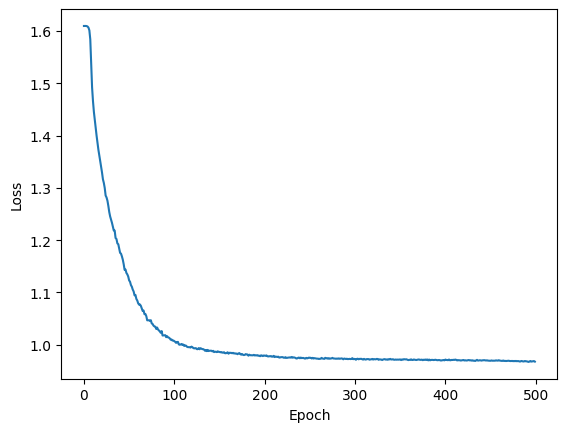

Test accuracy: 464.65247311827954
Accuracy: 0.40301075268817205
Precision: 0.4171409491321594
Recall: 0.40202587134164763
F1-score: 0.4081919994141082


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.51      0.55       495
           1       0.38      0.36      0.37       472
           2       0.24      0.26      0.25       449
           3       0.27      0.32      0.30       463
           4       0.61      0.56      0.59       446

    accuracy                           0.40      2325
   macro avg       0.42      0.40      0.41      2325
weighted avg       0.42      0.40      0.41      2325

                    0           1           2           3           4  \
precision    0.591549    0.375000    0.238193    0.271739    0.609223   
recall       0.509091    0.355932    0.258352    0.323974    0.562780   
f1-score     0.547231    0.365217    0.247863    0.295567    0.585082   
support    495.000000  472.000000  449.0000

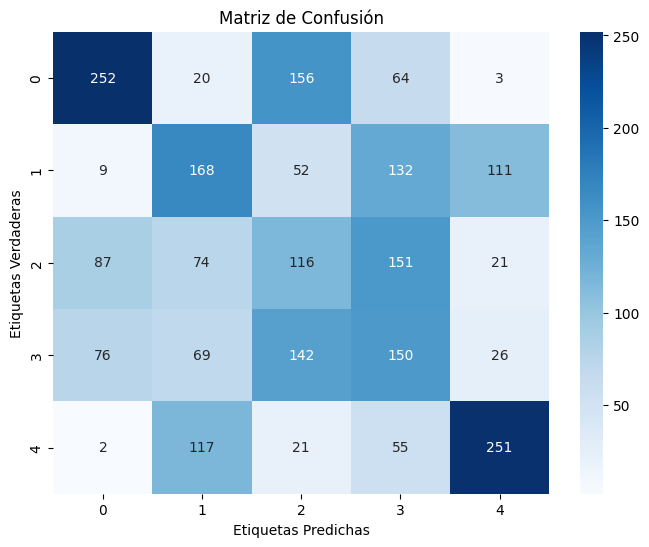

Diccionario guardado como JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Neural_network_classification/RRN_500_1e-05_0.1/resultados_500_1e-05_0.1.json


In [11]:
epocas = [100,300,500]
lr = [0.0001,0.00001]
test_label = [0.3,0.2,0.1]
#RNN_model(X, labels ,0.3,10,0.001)

for test in test_label:
    for epoca in epocas:
        for rang in lr:
                print(f"Procesando red con {epoca} epocas y {rang} de factor de aprendizaje y conjunto de entrenamiento {1-test}")
                RNN_model(X, labels ,test,epoca,rang)